In [ ]:
%pip install super-gradients
%pip install torch
%pip install supervision
%pip install roboflow
%pip install onemetric
%cd /content/drive/MyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 906.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.4 MB/s eta 0:00:00
[Errno 2] No such file or directory: '/content/drive/MyDrive'
/content


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="OZmt7veKofDCRjgyQ5XE")
project = rf.workspace("csilab").project("csilab-braintumor-detection")
dataset = project.version(3).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to CsiLab-BrainTumor-Detection-3 in yolov8:: 100%|██████████| 614/614 [00:00<00:00, 4726.54it/s]


In [ ]:
import torch
from super_gradients.training import Trainer

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 32
MAX_EPOCHS = 1000
CHECKPOINT_DIR = './checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

LOCATION = dataset.location
CLASSES = sorted(project.classes.keys())

dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}
print(dataset_params['classes'])


['Tumor']


In [ ]:
from super_gradients.training.dataloaders.dataloaders import (coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 12
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 12
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 12
    }
)

[2024-02-24 00:10:18] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 211/211 [00:00<00:00, 6695.05it/s]
[2024-02-24 00:10:18] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 60/60 [00:00<00:00, 6441.21it/s]
[2024-02-24 00:10:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 30/30 [00:00<00:00, 5797.51it/s]


In [ ]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2024-02-24 00:10:32] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=1,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

A reg_max argument is not needed for PPYoloE loss anymore. It is deprecated since SG 3.6.0 and will be removed in the SG 3.8.0.You can safely omit this argument as it is not used anymore and we infer it automatically from model's outputs


In [52]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2024-02-24 00:12:16] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240224_001216_865962`
[2024-02-24 00:12:16] INFO - sg_trainer.py - Checkpoints directory: ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962
[2024-02-24 00:12:16] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/console_Feb24_00_12_16.txt


[2024-02-24 00:12:22] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            211        (len(train_set))
    - Batch size per GPU:           32         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             32         (num_gpus * batch_size)
    - Effective Batch size:         32         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         6          (len(train_loader))
    - Gradient updates per epoch:   6          (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_M  (51.13M parameters, 51.13M optimized)
    - Learning Rates and Weight Decays:
      - default: (51.13M parameters). LR: 0.0005 (51.13M parameters) WD: 0.0, (72.21K parameters), WD: 0.0001, (51.06M parameters)

[2024-02-24 00:12:22] INFO - sg_trainer.py - Started training for 1

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.3178
│   ├── Ppyoloeloss/loss_iou = 0.6729
│   ├── Ppyoloeloss/loss_dfl = 0.7809
│   └── Ppyoloeloss/loss = 3.7715
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.4764
    ├── Ppyoloeloss/loss_iou = 0.5701
    ├── Ppyoloeloss/loss_dfl = 0.7527
    ├── Ppyoloeloss/loss = 3.7992
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0
    ├── F1@0.50 = 0.0
    └── Best_score_threshold = 0.0



Validating epoch 1: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]
[2024-02-24 00:12:46] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:12:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.07866313308477402


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.7862
│   │   ├── Epoch N-1      = 2.3178 (↘ -0.5315)
│   │   └── Best until now = 2.3178 (↘ -0.5315)
│   ├── Ppyoloeloss/loss_iou = 0.5876
│   │   ├── Epoch N-1      = 0.6729 (↘ -0.0853)
│   │   └── Best until now = 0.6729 (↘ -0.0853)
│   ├── Ppyoloeloss/loss_dfl = 0.7313
│   │   ├── Epoch N-1      = 0.7809 (↘ -0.0496)
│   │   └── Best until now = 0.7809 (↘ -0.0496)
│   └── Ppyoloeloss/loss = 3.1051
│       ├── Epoch N-1      = 3.7715 (↘ -0.6664)
│       └── Best until now = 3.7715 (↘ -0.6664)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8642
    │   ├── Epoch N-1      = 2.4764 (↘ -0.6122)
    │   └── Best until now = 2.4764 (↘ -0.6122)
    ├── Ppyoloeloss/loss_iou = 0.5627
    │   ├── Epoch N-1      = 0.5701 (↘ -0.0075)
    │   └── Best until now = 0.5701 (↘ -0.0075)
    ├── Ppyoloeloss/loss_dfl = 0.7489
    │   ├── Epoch N-1      = 0.7527 (↘ -0.0038)
    │   └── Best until now = 0.7527 (↘ -0.0038)
    ├── Ppyoloeloss/lo

Validating epoch 2: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2382
│   │   ├── Epoch N-1      = 1.7862 (↘ -0.548)
│   │   └── Best until now = 1.7862 (↘ -0.548)
│   ├── Ppyoloeloss/loss_iou = 0.5228
│   │   ├── Epoch N-1      = 0.5876 (↘ -0.0648)
│   │   └── Best until now = 0.5876 (↘ -0.0648)
│   ├── Ppyoloeloss/loss_dfl = 0.649
│   │   ├── Epoch N-1      = 0.7313 (↘ -0.0822)
│   │   └── Best until now = 0.7313 (↘ -0.0822)
│   └── Ppyoloeloss/loss = 2.41
│       ├── Epoch N-1      = 3.1051 (↘ -0.6951)
│       └── Best until now = 3.1051 (↘ -0.6951)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8778
    │   ├── Epoch N-1      = 1.8642 (↗ 0.0136)
    │   └── Best until now = 1.8642 (↗ 0.0136)
    ├── Ppyoloeloss/loss_iou = 1.1291
    │   ├── Epoch N-1      = 0.5627 (↗ 0.5664)
    │   └── Best until now = 0.5627 (↗ 0.5664)
    ├── Ppyoloeloss/loss_dfl = 1.3961
    │   ├── Epoch N-1      = 0.7489 (↗ 0.6472)
    │   └── Best until now = 0.7489 (↗ 0.6472)
    ├── Ppyoloeloss/loss = 4.403


Validating epoch 3: 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1481
│   │   ├── Epoch N-1      = 1.2382 (↘ -0.0901)
│   │   └── Best until now = 1.2382 (↘ -0.0901)
│   ├── Ppyoloeloss/loss_iou = 0.526
│   │   ├── Epoch N-1      = 0.5228 (↗ 0.0032)
│   │   └── Best until now = 0.5228 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.6594
│   │   ├── Epoch N-1      = 0.649  (↗ 0.0104)
│   │   └── Best until now = 0.649  (↗ 0.0104)
│   └── Ppyoloeloss/loss = 2.3335
│       ├── Epoch N-1      = 2.41   (↘ -0.0765)
│       └── Best until now = 2.41   (↘ -0.0765)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6354
    │   ├── Epoch N-1      = 1.8778 (↘ -1.2424)
    │   └── Best until now = 1.8642 (↘ -1.2288)
    ├── Ppyoloeloss/loss_iou = 0.9114
    │   ├── Epoch N-1      = 1.1291 (↘ -0.2177)
    │   └── Best until now = 0.5627 (↗ 0.3487)
    ├── Ppyoloeloss/loss_dfl = 1.2963
    │   ├── Epoch N-1      = 1.3961 (↘ -0.0998)
    │   └── Best until now = 0.7489 (↗ 0.5474)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 4: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0718
│   │   ├── Epoch N-1      = 1.1481 (↘ -0.0763)
│   │   └── Best until now = 1.1481 (↘ -0.0763)
│   ├── Ppyoloeloss/loss_iou = 0.4918
│   │   ├── Epoch N-1      = 0.526  (↘ -0.0342)
│   │   └── Best until now = 0.5228 (↘ -0.031)
│   ├── Ppyoloeloss/loss_dfl = 0.6235
│   │   ├── Epoch N-1      = 0.6594 (↘ -0.0359)
│   │   └── Best until now = 0.649  (↘ -0.0255)
│   └── Ppyoloeloss/loss = 2.1871
│       ├── Epoch N-1      = 2.3335 (↘ -0.1464)
│       └── Best until now = 2.3335 (↘ -0.1464)
└── Validation
    ├── Ppyoloeloss/loss_cls = 11.4192
    │   ├── Epoch N-1      = 0.6354 (↗ 10.7839)
    │   └── Best until now = 0.6354 (↗ 10.7839)
    ├── Ppyoloeloss/loss_iou = 1.126
    │   ├── Epoch N-1      = 0.9114 (↗ 0.2147)
    │   └── Best until now = 0.5627 (↗ 0.5633)
    ├── Ppyoloeloss/loss_dfl = 1.4539
    │   ├── Epoch N-1      = 1.2963 (↗ 0.1576)
    │   └── Best until now = 0.7489 (↗ 0.705)
    ├── Ppyoloeloss/loss = 1

Validating epoch 5: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0401
│   │   ├── Epoch N-1      = 1.0718 (↘ -0.0317)
│   │   └── Best until now = 1.0718 (↘ -0.0317)
│   ├── Ppyoloeloss/loss_iou = 0.4993
│   │   ├── Epoch N-1      = 0.4918 (↗ 0.0075)
│   │   └── Best until now = 0.4918 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.6358
│   │   ├── Epoch N-1      = 0.6235 (↗ 0.0123)
│   │   └── Best until now = 0.6235 (↗ 0.0123)
│   └── Ppyoloeloss/loss = 2.1752
│       ├── Epoch N-1      = 2.1871 (↘ -0.012)
│       └── Best until now = 2.1871 (↘ -0.012)
└── Validation
    ├── Ppyoloeloss/loss_cls = 160.865
    │   ├── Epoch N-1      = 11.4192 (↗ 149.4457)
    │   └── Best until now = 0.6354 (↗ 160.2296)
    ├── Ppyoloeloss/loss_iou = 1.6523
    │   ├── Epoch N-1      = 1.126  (↗ 0.5262)
    │   └── Best until now = 0.5627 (↗ 1.0896)
    ├── Ppyoloeloss/loss_dfl = 7.9309
    │   ├── Epoch N-1      = 1.4539 (↗ 6.477)
    │   └── Best until now = 0.7489 (↗ 7.182)
    ├── Ppyoloeloss/loss = 170

Validating epoch 6: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0362
│   │   ├── Epoch N-1      = 1.0401 (↘ -0.0038)
│   │   └── Best until now = 1.0401 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.4642
│   │   ├── Epoch N-1      = 0.4993 (↘ -0.0351)
│   │   └── Best until now = 0.4918 (↘ -0.0277)
│   ├── Ppyoloeloss/loss_dfl = 0.5952
│   │   ├── Epoch N-1      = 0.6358 (↘ -0.0406)
│   │   └── Best until now = 0.6235 (↘ -0.0283)
│   └── Ppyoloeloss/loss = 2.0956
│       ├── Epoch N-1      = 2.1752 (↘ -0.0795)
│       └── Best until now = 2.1752 (↘ -0.0795)
└── Validation
    ├── Ppyoloeloss/loss_cls = 88.5858
    │   ├── Epoch N-1      = 160.865 (↘ -72.2792)
    │   └── Best until now = 0.6354 (↗ 87.9504)
    ├── Ppyoloeloss/loss_iou = 1.1621
    │   ├── Epoch N-1      = 1.6523 (↘ -0.4902)
    │   └── Best until now = 0.5627 (↗ 0.5994)
    ├── Ppyoloeloss/loss_dfl = 1.5036
    │   ├── Epoch N-1      = 7.9309 (↘ -6.4273)
    │   └── Best until now = 0.7489 (↗ 0.7547)
    ├── Ppyoloeloss/l

Validating epoch 7: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
[2024-02-24 00:14:11] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:14:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.11489012837409973


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0242
│   │   ├── Epoch N-1      = 1.0362 (↘ -0.0121)
│   │   └── Best until now = 1.0362 (↘ -0.0121)
│   ├── Ppyoloeloss/loss_iou = 0.5016
│   │   ├── Epoch N-1      = 0.4642 (↗ 0.0374)
│   │   └── Best until now = 0.4642 (↗ 0.0374)
│   ├── Ppyoloeloss/loss_dfl = 0.6266
│   │   ├── Epoch N-1      = 0.5952 (↗ 0.0314)
│   │   └── Best until now = 0.5952 (↗ 0.0314)
│   └── Ppyoloeloss/loss = 2.1523
│       ├── Epoch N-1      = 2.0956 (↗ 0.0567)
│       └── Best until now = 2.0956 (↗ 0.0567)
└── Validation
    ├── Ppyoloeloss/loss_cls = 40.3628
    │   ├── Epoch N-1      = 88.5858 (↘ -48.223)
    │   └── Best until now = 0.6354 (↗ 39.7274)
    ├── Ppyoloeloss/loss_iou = 0.7526
    │   ├── Epoch N-1      = 1.1621 (↘ -0.4095)
    │   └── Best until now = 0.5627 (↗ 0.1899)
    ├── Ppyoloeloss/loss_dfl = 1.0013
    │   ├── Epoch N-1      = 1.5036 (↘ -0.5024)
    │   └── Best until now = 0.7489 (↗ 0.2524)
    ├── Ppyoloeloss/loss = 4

Validating epoch 8: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
[2024-02-24 00:14:28] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:14:28] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.30039092898368835


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9734
│   │   ├── Epoch N-1      = 1.0242 (↘ -0.0508)
│   │   └── Best until now = 1.0242 (↘ -0.0508)
│   ├── Ppyoloeloss/loss_iou = 0.4872
│   │   ├── Epoch N-1      = 0.5016 (↘ -0.0144)
│   │   └── Best until now = 0.4642 (↗ 0.023)
│   ├── Ppyoloeloss/loss_dfl = 0.5999
│   │   ├── Epoch N-1      = 0.6266 (↘ -0.0266)
│   │   └── Best until now = 0.5952 (↗ 0.0047)
│   └── Ppyoloeloss/loss = 2.0605
│       ├── Epoch N-1      = 2.1523 (↘ -0.0918)
│       └── Best until now = 2.0956 (↘ -0.0351)
└── Validation
    ├── Ppyoloeloss/loss_cls = 19.2921
    │   ├── Epoch N-1      = 40.3628 (↘ -21.0706)
    │   └── Best until now = 0.6354 (↗ 18.6568)
    ├── Ppyoloeloss/loss_iou = 0.553
    │   ├── Epoch N-1      = 0.7526 (↘ -0.1996)
    │   └── Best until now = 0.5627 (↘ -0.0097)
    ├── Ppyoloeloss/loss_dfl = 0.7717
    │   ├── Epoch N-1      = 1.0013 (↘ -0.2295)
    │   └── Best until now = 0.7489 (↗ 0.0228)
    ├── Ppyoloeloss/loss

Validating epoch 9: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
[2024-02-24 00:14:47] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:14:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6399781107902527


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9689
│   │   ├── Epoch N-1      = 0.9734 (↘ -0.0045)
│   │   └── Best until now = 0.9734 (↘ -0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.4819
│   │   ├── Epoch N-1      = 0.4872 (↘ -0.0054)
│   │   └── Best until now = 0.4642 (↗ 0.0177)
│   ├── Ppyoloeloss/loss_dfl = 0.6151
│   │   ├── Epoch N-1      = 0.5999 (↗ 0.0152)
│   │   └── Best until now = 0.5952 (↗ 0.0199)
│   └── Ppyoloeloss/loss = 2.0658
│       ├── Epoch N-1      = 2.0605 (↗ 0.0053)
│       └── Best until now = 2.0605 (↗ 0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 6.5752
    │   ├── Epoch N-1      = 19.2921 (↘ -12.7169)
    │   └── Best until now = 0.6354 (↗ 5.9398)
    ├── Ppyoloeloss/loss_iou = 0.4845
    │   ├── Epoch N-1      = 0.553  (↘ -0.0685)
    │   └── Best until now = 0.553  (↘ -0.0685)
    ├── Ppyoloeloss/loss_dfl = 0.6837
    │   ├── Epoch N-1      = 0.7717 (↘ -0.088)
    │   └── Best until now = 0.7489 (↘ -0.0652)
    ├── Ppyoloeloss/loss = 

Validating epoch 10: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
[2024-02-24 00:15:08] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:15:08] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6469273567199707


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9994
│   │   ├── Epoch N-1      = 0.9689 (↗ 0.0305)
│   │   └── Best until now = 0.9689 (↗ 0.0305)
│   ├── Ppyoloeloss/loss_iou = 0.4767
│   │   ├── Epoch N-1      = 0.4819 (↘ -0.0051)
│   │   └── Best until now = 0.4642 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.627
│   │   ├── Epoch N-1      = 0.6151 (↗ 0.0119)
│   │   └── Best until now = 0.5952 (↗ 0.0318)
│   └── Ppyoloeloss/loss = 2.1031
│       ├── Epoch N-1      = 2.0658 (↗ 0.0373)
│       └── Best until now = 2.0605 (↗ 0.0426)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.5183
    │   ├── Epoch N-1      = 6.5752 (↘ -3.0569)
    │   └── Best until now = 0.6354 (↗ 2.8829)
    ├── Ppyoloeloss/loss_iou = 0.4342
    │   ├── Epoch N-1      = 0.4845 (↘ -0.0504)
    │   └── Best until now = 0.4845 (↘ -0.0504)
    ├── Ppyoloeloss/loss_dfl = 0.626
    │   ├── Epoch N-1      = 0.6837 (↘ -0.0577)
    │   └── Best until now = 0.6837 (↘ -0.0577)
    ├── Ppyoloeloss/loss = 4.57

Validating epoch 11: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9848
│   │   ├── Epoch N-1      = 0.9994 (↘ -0.0146)
│   │   └── Best until now = 0.9689 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.479
│   │   ├── Epoch N-1      = 0.4767 (↗ 0.0022)
│   │   └── Best until now = 0.4642 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.6071
│   │   ├── Epoch N-1      = 0.627  (↘ -0.0199)
│   │   └── Best until now = 0.5952 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 2.0709
│       ├── Epoch N-1      = 2.1031 (↘ -0.0322)
│       └── Best until now = 2.0605 (↗ 0.0103)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.1734
    │   ├── Epoch N-1      = 3.5183 (↘ -0.3449)
    │   └── Best until now = 0.6354 (↗ 2.538)
    ├── Ppyoloeloss/loss_iou = 0.4348
    │   ├── Epoch N-1      = 0.4342 (↗ 0.0007)
    │   └── Best until now = 0.4342 (↗ 0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.6308
    │   ├── Epoch N-1      = 0.626  (↗ 0.0048)
    │   └── Best until now = 0.626  (↗ 0.0048)
    ├── Ppyoloeloss/loss = 4.239


Validating epoch 12: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
[2024-02-24 00:15:48] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:15:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7269821763038635


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9705
│   │   ├── Epoch N-1      = 0.9848 (↘ -0.0143)
│   │   └── Best until now = 0.9689 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.4791
│   │   ├── Epoch N-1      = 0.479  (↗ 0.0002)
│   │   └── Best until now = 0.4642 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.5846
│   │   ├── Epoch N-1      = 0.6071 (↘ -0.0224)
│   │   └── Best until now = 0.5952 (↘ -0.0106)
│   └── Ppyoloeloss/loss = 2.0343
│       ├── Epoch N-1      = 2.0709 (↘ -0.0366)
│       └── Best until now = 2.0605 (↘ -0.0263)
└── Validation
    ├── Ppyoloeloss/loss_cls = 4.8113
    │   ├── Epoch N-1      = 3.1734 (↗ 1.638)
    │   └── Best until now = 0.6354 (↗ 4.176)
    ├── Ppyoloeloss/loss_iou = 0.4281
    │   ├── Epoch N-1      = 0.4348 (↘ -0.0067)
    │   └── Best until now = 0.4342 (↘ -0.0061)
    ├── Ppyoloeloss/loss_dfl = 0.6285
    │   ├── Epoch N-1      = 0.6308 (↘ -0.0023)
    │   └── Best until now = 0.626  (↗ 0.0024)
    ├── Ppyoloeloss/loss = 5.8

Validating epoch 13: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9402
│   │   ├── Epoch N-1      = 0.9705 (↘ -0.0302)
│   │   └── Best until now = 0.9689 (↘ -0.0287)
│   ├── Ppyoloeloss/loss_iou = 0.4592
│   │   ├── Epoch N-1      = 0.4791 (↘ -0.02)
│   │   └── Best until now = 0.4642 (↘ -0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.584
│   │   ├── Epoch N-1      = 0.5846 (↘ -0.0006)
│   │   └── Best until now = 0.5846 (↘ -0.0006)
│   └── Ppyoloeloss/loss = 1.9834
│       ├── Epoch N-1      = 2.0343 (↘ -0.0508)
│       └── Best until now = 2.0343 (↘ -0.0508)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.8352
    │   ├── Epoch N-1      = 4.8113 (↘ -0.9761)
    │   └── Best until now = 0.6354 (↗ 3.1999)
    ├── Ppyoloeloss/loss_iou = 0.3908
    │   ├── Epoch N-1      = 0.4281 (↘ -0.0373)
    │   └── Best until now = 0.4281 (↘ -0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5933
    │   ├── Epoch N-1      = 0.6285 (↘ -0.0351)
    │   └── Best until now = 0.626  (↘ -0.0327)
    ├── Ppyoloeloss/loss =

Validating epoch 14: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]
[2024-02-24 00:16:27] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:16:27] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7289596199989319


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9432
│   │   ├── Epoch N-1      = 0.9402 (↗ 0.0029)
│   │   └── Best until now = 0.9402 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.4757
│   │   ├── Epoch N-1      = 0.4592 (↗ 0.0165)
│   │   └── Best until now = 0.4592 (↗ 0.0165)
│   ├── Ppyoloeloss/loss_dfl = 0.5908
│   │   ├── Epoch N-1      = 0.584  (↗ 0.0067)
│   │   └── Best until now = 0.584  (↗ 0.0067)
│   └── Ppyoloeloss/loss = 2.0096
│       ├── Epoch N-1      = 1.9834 (↗ 0.0262)
│       └── Best until now = 1.9834 (↗ 0.0262)
└── Validation
    ├── Ppyoloeloss/loss_cls = 3.1511
    │   ├── Epoch N-1      = 3.8352 (↘ -0.6841)
    │   └── Best until now = 0.6354 (↗ 2.5157)
    ├── Ppyoloeloss/loss_iou = 0.3907
    │   ├── Epoch N-1      = 0.3908 (↘ -1e-04)
    │   └── Best until now = 0.3908 (↘ -1e-04)
    ├── Ppyoloeloss/loss_dfl = 0.5773
    │   ├── Epoch N-1      = 0.5933 (↘ -0.0161)
    │   └── Best until now = 0.5933 (↘ -0.0161)
    ├── Ppyoloeloss/loss = 4.119

Validating epoch 15: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]
[2024-02-24 00:16:46] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:16:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7574642896652222


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9247
│   │   ├── Epoch N-1      = 0.9432 (↘ -0.0184)
│   │   └── Best until now = 0.9402 (↘ -0.0155)
│   ├── Ppyoloeloss/loss_iou = 0.4743
│   │   ├── Epoch N-1      = 0.4757 (↘ -0.0014)
│   │   └── Best until now = 0.4592 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.6005
│   │   ├── Epoch N-1      = 0.5908 (↗ 0.0098)
│   │   └── Best until now = 0.584  (↗ 0.0165)
│   └── Ppyoloeloss/loss = 1.9995
│       ├── Epoch N-1      = 2.0096 (↘ -0.0101)
│       └── Best until now = 1.9834 (↗ 0.0161)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.2338
    │   ├── Epoch N-1      = 3.1511 (↘ -0.9173)
    │   └── Best until now = 0.6354 (↗ 1.5985)
    ├── Ppyoloeloss/loss_iou = 0.3997
    │   ├── Epoch N-1      = 0.3907 (↗ 0.009)
    │   └── Best until now = 0.3907 (↗ 0.009)
    ├── Ppyoloeloss/loss_dfl = 0.5804
    │   ├── Epoch N-1      = 0.5773 (↗ 0.0031)
    │   └── Best until now = 0.5773 (↗ 0.0031)
    ├── Ppyoloeloss/loss = 3.213

Validating epoch 16: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9346
│   │   ├── Epoch N-1      = 0.9247 (↗ 0.0099)
│   │   └── Best until now = 0.9247 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_iou = 0.481
│   │   ├── Epoch N-1      = 0.4743 (↗ 0.0067)
│   │   └── Best until now = 0.4592 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_dfl = 0.607
│   │   ├── Epoch N-1      = 0.6005 (↗ 0.0065)
│   │   └── Best until now = 0.584  (↗ 0.023)
│   └── Ppyoloeloss/loss = 2.0226
│       ├── Epoch N-1      = 1.9995 (↗ 0.0231)
│       └── Best until now = 1.9834 (↗ 0.0392)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.1971
    │   ├── Epoch N-1      = 2.2338 (↘ -0.0367)
    │   └── Best until now = 0.6354 (↗ 1.5618)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.3997 (↗ 0.0089)
    │   └── Best until now = 0.3907 (↗ 0.0179)
    ├── Ppyoloeloss/loss_dfl = 0.5851
    │   ├── Epoch N-1      = 0.5804 (↗ 0.0048)
    │   └── Best until now = 0.5773 (↗ 0.0079)
    ├── Ppyoloeloss/loss = 3.1908
   

Validating epoch 17: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
[2024-02-24 00:17:24] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:17:24] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7804460525512695


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.952
│   │   ├── Epoch N-1      = 0.9346 (↗ 0.0174)
│   │   └── Best until now = 0.9247 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_iou = 0.494
│   │   ├── Epoch N-1      = 0.481  (↗ 0.013)
│   │   └── Best until now = 0.4592 (↗ 0.0348)
│   ├── Ppyoloeloss/loss_dfl = 0.6098
│   │   ├── Epoch N-1      = 0.607  (↗ 0.0028)
│   │   └── Best until now = 0.584  (↗ 0.0258)
│   └── Ppyoloeloss/loss = 2.0559
│       ├── Epoch N-1      = 2.0226 (↗ 0.0332)
│       └── Best until now = 1.9834 (↗ 0.0724)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7388
    │   ├── Epoch N-1      = 2.1971 (↘ -0.4583)
    │   └── Best until now = 0.6354 (↗ 1.1035)
    ├── Ppyoloeloss/loss_iou = 0.4031
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0055)
    │   └── Best until now = 0.3907 (↗ 0.0124)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.5851 (↘ -0.0108)
    │   └── Best until now = 0.5773 (↘ -0.0029)
    ├── Ppyoloeloss/loss = 2.7162


Validating epoch 18: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
[2024-02-24 00:17:41] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:17:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7950872778892517


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9459
│   │   ├── Epoch N-1      = 0.952  (↘ -0.0061)
│   │   └── Best until now = 0.9247 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.4799
│   │   ├── Epoch N-1      = 0.494  (↘ -0.0141)
│   │   └── Best until now = 0.4592 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_dfl = 0.606
│   │   ├── Epoch N-1      = 0.6098 (↘ -0.0039)
│   │   └── Best until now = 0.584  (↗ 0.022)
│   └── Ppyoloeloss/loss = 2.0318
│       ├── Epoch N-1      = 2.0559 (↘ -0.0241)
│       └── Best until now = 1.9834 (↗ 0.0484)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4082
    │   ├── Epoch N-1      = 1.7388 (↘ -0.3306)
    │   └── Best until now = 0.6354 (↗ 0.7729)
    ├── Ppyoloeloss/loss_iou = 0.3847
    │   ├── Epoch N-1      = 0.4031 (↘ -0.0184)
    │   └── Best until now = 0.3907 (↘ -0.006)
    ├── Ppyoloeloss/loss_dfl = 0.5514
    │   ├── Epoch N-1      = 0.5743 (↘ -0.0229)
    │   └── Best until now = 0.5743 (↘ -0.0229)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 19: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
[2024-02-24 00:17:58] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:17:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8515667915344238


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8963
│   │   ├── Epoch N-1      = 0.9459 (↘ -0.0495)
│   │   └── Best until now = 0.9247 (↘ -0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.4503
│   │   ├── Epoch N-1      = 0.4799 (↘ -0.0296)
│   │   └── Best until now = 0.4592 (↘ -0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.576
│   │   ├── Epoch N-1      = 0.606  (↘ -0.0299)
│   │   └── Best until now = 0.584  (↘ -0.008)
│   └── Ppyoloeloss/loss = 1.9227
│       ├── Epoch N-1      = 2.0318 (↘ -0.1091)
│       └── Best until now = 1.9834 (↘ -0.0607)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2395
    │   ├── Epoch N-1      = 1.4082 (↘ -0.1687)
    │   └── Best until now = 0.6354 (↗ 0.6041)
    ├── Ppyoloeloss/loss_iou = 0.378
    │   ├── Epoch N-1      = 0.3847 (↘ -0.0066)
    │   └── Best until now = 0.3847 (↘ -0.0066)
    ├── Ppyoloeloss/loss_dfl = 0.5535
    │   ├── Epoch N-1      = 0.5514 (↗ 0.0021)
    │   └── Best until now = 0.5514 (↗ 0.0021)
    ├── Ppyoloeloss/loss = 

Validating epoch 20: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9222
│   │   ├── Epoch N-1      = 0.8963 (↗ 0.0259)
│   │   └── Best until now = 0.8963 (↗ 0.0259)
│   ├── Ppyoloeloss/loss_iou = 0.481
│   │   ├── Epoch N-1      = 0.4503 (↗ 0.0307)
│   │   └── Best until now = 0.4503 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_dfl = 0.5986
│   │   ├── Epoch N-1      = 0.576  (↗ 0.0226)
│   │   └── Best until now = 0.576  (↗ 0.0226)
│   └── Ppyoloeloss/loss = 2.0019
│       ├── Epoch N-1      = 1.9227 (↗ 0.0792)
│       └── Best until now = 1.9227 (↗ 0.0792)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0919
    │   ├── Epoch N-1      = 1.2395 (↘ -0.1476)
    │   └── Best until now = 0.6354 (↗ 0.4565)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.378  (↗ 0.0235)
    │   └── Best until now = 0.378  (↗ 0.0235)
    ├── Ppyoloeloss/loss_dfl = 0.5834
    │   ├── Epoch N-1      = 0.5535 (↗ 0.0299)
    │   └── Best until now = 0.5514 (↗ 0.032)
    ├── Ppyoloeloss/loss = 2.0767
  

Validating epoch 21: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8928
│   │   ├── Epoch N-1      = 0.9222 (↘ -0.0294)
│   │   └── Best until now = 0.8963 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.4648
│   │   ├── Epoch N-1      = 0.481  (↘ -0.0162)
│   │   └── Best until now = 0.4503 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.5804
│   │   ├── Epoch N-1      = 0.5986 (↘ -0.0183)
│   │   └── Best until now = 0.576  (↗ 0.0043)
│   └── Ppyoloeloss/loss = 1.938
│       ├── Epoch N-1      = 2.0019 (↘ -0.0639)
│       └── Best until now = 1.9227 (↗ 0.0153)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9716
    │   ├── Epoch N-1      = 1.0919 (↘ -0.1203)
    │   └── Best until now = 0.6354 (↗ 0.3362)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4015 (↗ 0.018)
    │   └── Best until now = 0.378  (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5994
    │   ├── Epoch N-1      = 0.5834 (↗ 0.016)
    │   └── Best until now = 0.5514 (↗ 0.048)
    ├── Ppyoloeloss/loss = 1.9906

Validating epoch 22: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9132
│   │   ├── Epoch N-1      = 0.8928 (↗ 0.0204)
│   │   └── Best until now = 0.8928 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_iou = 0.4681
│   │   ├── Epoch N-1      = 0.4648 (↗ 0.0033)
│   │   └── Best until now = 0.4503 (↗ 0.0178)
│   ├── Ppyoloeloss/loss_dfl = 0.5804
│   │   ├── Epoch N-1      = 0.5804 (↗ 0.0)
│   │   └── Best until now = 0.576  (↗ 0.0044)
│   └── Ppyoloeloss/loss = 1.9617
│       ├── Epoch N-1      = 1.938  (↗ 0.0237)
│       └── Best until now = 1.9227 (↗ 0.039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0722
    │   ├── Epoch N-1      = 0.9716 (↗ 0.1006)
    │   └── Best until now = 0.6354 (↗ 0.4368)
    ├── Ppyoloeloss/loss_iou = 0.4357
    │   ├── Epoch N-1      = 0.4195 (↗ 0.0162)
    │   └── Best until now = 0.378  (↗ 0.0577)
    ├── Ppyoloeloss/loss_dfl = 0.6158
    │   ├── Epoch N-1      = 0.5994 (↗ 0.0164)
    │   └── Best until now = 0.5514 (↗ 0.0644)
    ├── Ppyoloeloss/loss = 2.1237
    │

Validating epoch 23: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]
[2024-02-24 00:19:17] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:19:17] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8957576751708984


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9
│   │   ├── Epoch N-1      = 0.9132 (↘ -0.0133)
│   │   └── Best until now = 0.8928 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.4522
│   │   ├── Epoch N-1      = 0.4681 (↘ -0.0159)
│   │   └── Best until now = 0.4503 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.5813
│   │   ├── Epoch N-1      = 0.5804 (↗ 0.001)
│   │   └── Best until now = 0.576  (↗ 0.0053)
│   └── Ppyoloeloss/loss = 1.9335
│       ├── Epoch N-1      = 1.9617 (↘ -0.0282)
│       └── Best until now = 1.9227 (↗ 0.0108)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0238
    │   ├── Epoch N-1      = 1.0722 (↘ -0.0484)
    │   └── Best until now = 0.6354 (↗ 0.3884)
    ├── Ppyoloeloss/loss_iou = 0.4196
    │   ├── Epoch N-1      = 0.4357 (↘ -0.0161)
    │   └── Best until now = 0.378  (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.6087
    │   ├── Epoch N-1      = 0.6158 (↘ -0.0071)
    │   └── Best until now = 0.5514 (↗ 0.0573)
    ├── Ppyoloeloss/loss = 2.0521

Validating epoch 24: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9065
│   │   ├── Epoch N-1      = 0.9    (↗ 0.0066)
│   │   └── Best until now = 0.8928 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.4588
│   │   ├── Epoch N-1      = 0.4522 (↗ 0.0066)
│   │   └── Best until now = 0.4503 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.5848
│   │   ├── Epoch N-1      = 0.5813 (↗ 0.0035)
│   │   └── Best until now = 0.576  (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.9502
│       ├── Epoch N-1      = 1.9335 (↗ 0.0166)
│       └── Best until now = 1.9227 (↗ 0.0274)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0701
    │   ├── Epoch N-1      = 1.0238 (↗ 0.0463)
    │   └── Best until now = 0.6354 (↗ 0.4347)
    ├── Ppyoloeloss/loss_iou = 0.4298
    │   ├── Epoch N-1      = 0.4196 (↗ 0.0103)
    │   └── Best until now = 0.378  (↗ 0.0518)
    ├── Ppyoloeloss/loss_dfl = 0.6153
    │   ├── Epoch N-1      = 0.6087 (↗ 0.0066)
    │   └── Best until now = 0.5514 (↗ 0.0639)
    ├── Ppyoloeloss/loss = 2.1152
 

Validating epoch 25: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
[2024-02-24 00:19:53] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:19:53] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9285125732421875


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8897
│   │   ├── Epoch N-1      = 0.9065 (↘ -0.0168)
│   │   └── Best until now = 0.8928 (↘ -0.0031)
│   ├── Ppyoloeloss/loss_iou = 0.4602
│   │   ├── Epoch N-1      = 0.4588 (↗ 0.0014)
│   │   └── Best until now = 0.4503 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.5782
│   │   ├── Epoch N-1      = 0.5848 (↘ -0.0067)
│   │   └── Best until now = 0.576  (↗ 0.0021)
│   └── Ppyoloeloss/loss = 1.9281
│       ├── Epoch N-1      = 1.9502 (↘ -0.0221)
│       └── Best until now = 1.9227 (↗ 0.0054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0103
    │   ├── Epoch N-1      = 1.0701 (↘ -0.0598)
    │   └── Best until now = 0.6354 (↗ 0.3749)
    ├── Ppyoloeloss/loss_iou = 0.4176
    │   ├── Epoch N-1      = 0.4298 (↘ -0.0122)
    │   └── Best until now = 0.378  (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5991
    │   ├── Epoch N-1      = 0.6153 (↘ -0.0161)
    │   └── Best until now = 0.5514 (↗ 0.0477)
    ├── Ppyoloeloss/loss = 2

Validating epoch 26: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8848
│   │   ├── Epoch N-1      = 0.8897 (↘ -0.0049)
│   │   └── Best until now = 0.8897 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.4469
│   │   ├── Epoch N-1      = 0.4602 (↘ -0.0133)
│   │   └── Best until now = 0.4503 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.5721
│   │   ├── Epoch N-1      = 0.5782 (↘ -0.006)
│   │   └── Best until now = 0.576  (↘ -0.0039)
│   └── Ppyoloeloss/loss = 1.9038
│       ├── Epoch N-1      = 1.9281 (↘ -0.0243)
│       └── Best until now = 1.9227 (↘ -0.0189)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1408
    │   ├── Epoch N-1      = 1.0103 (↗ 0.1305)
    │   └── Best until now = 0.6354 (↗ 0.5054)
    ├── Ppyoloeloss/loss_iou = 0.4204
    │   ├── Epoch N-1      = 0.4176 (↗ 0.0028)
    │   └── Best until now = 0.378  (↗ 0.0424)
    ├── Ppyoloeloss/loss_dfl = 0.597
    │   ├── Epoch N-1      = 0.5991 (↘ -0.0022)
    │   └── Best until now = 0.5514 (↗ 0.0456)
    ├── Ppyoloeloss/loss = 2

Validating epoch 27: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8782
│   │   ├── Epoch N-1      = 0.8848 (↘ -0.0066)
│   │   └── Best until now = 0.8848 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.4585
│   │   ├── Epoch N-1      = 0.4469 (↗ 0.0117)
│   │   └── Best until now = 0.4469 (↗ 0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.582
│   │   ├── Epoch N-1      = 0.5721 (↗ 0.0099)
│   │   └── Best until now = 0.5721 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.9187
│       ├── Epoch N-1      = 1.9038 (↗ 0.0149)
│       └── Best until now = 1.9038 (↗ 0.0149)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1976
    │   ├── Epoch N-1      = 1.1408 (↗ 0.0569)
    │   └── Best until now = 0.6354 (↗ 0.5623)
    ├── Ppyoloeloss/loss_iou = 0.4168
    │   ├── Epoch N-1      = 0.4204 (↘ -0.0036)
    │   └── Best until now = 0.378  (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.597
    │   ├── Epoch N-1      = 0.597  (↗ 0.0)
    │   └── Best until now = 0.5514 (↗ 0.0456)
    ├── Ppyoloeloss/loss = 2.2114
   

Validating epoch 28: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9046
│   │   ├── Epoch N-1      = 0.8782 (↗ 0.0264)
│   │   └── Best until now = 0.8782 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_iou = 0.4597
│   │   ├── Epoch N-1      = 0.4585 (↗ 0.0012)
│   │   └── Best until now = 0.4469 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_dfl = 0.5826
│   │   ├── Epoch N-1      = 0.582  (↗ 0.0005)
│   │   └── Best until now = 0.5721 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.9469
│       ├── Epoch N-1      = 1.9187 (↗ 0.0282)
│       └── Best until now = 1.9038 (↗ 0.0431)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.086
    │   ├── Epoch N-1      = 1.1976 (↘ -0.1117)
    │   └── Best until now = 0.6354 (↗ 0.4506)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4168 (↘ -0.0068)
    │   └── Best until now = 0.378  (↗ 0.0319)
    ├── Ppyoloeloss/loss_dfl = 0.5817
    │   ├── Epoch N-1      = 0.597  (↘ -0.0153)
    │   └── Best until now = 0.5514 (↗ 0.0303)
    ├── Ppyoloeloss/loss = 2.0776
 

Validating epoch 29: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8631
│   │   ├── Epoch N-1      = 0.9046 (↘ -0.0415)
│   │   └── Best until now = 0.8782 (↘ -0.0151)
│   ├── Ppyoloeloss/loss_iou = 0.4624
│   │   ├── Epoch N-1      = 0.4597 (↗ 0.0026)
│   │   └── Best until now = 0.4469 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.5657
│   │   ├── Epoch N-1      = 0.5826 (↘ -0.0169)
│   │   └── Best until now = 0.5721 (↘ -0.0064)
│   └── Ppyoloeloss/loss = 1.8911
│       ├── Epoch N-1      = 1.9469 (↘ -0.0558)
│       └── Best until now = 1.9038 (↘ -0.0127)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0272
    │   ├── Epoch N-1      = 1.086  (↘ -0.0587)
    │   └── Best until now = 0.6354 (↗ 0.3918)
    ├── Ppyoloeloss/loss_iou = 0.3963
    │   ├── Epoch N-1      = 0.41   (↘ -0.0137)
    │   └── Best until now = 0.378  (↗ 0.0183)
    ├── Ppyoloeloss/loss_dfl = 0.5644
    │   ├── Epoch N-1      = 0.5817 (↘ -0.0173)
    │   └── Best until now = 0.5514 (↗ 0.013)
    ├── Ppyoloeloss/loss = 

Validating epoch 30: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8721
│   │   ├── Epoch N-1      = 0.8631 (↗ 0.0091)
│   │   └── Best until now = 0.8631 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.4618
│   │   ├── Epoch N-1      = 0.4624 (↘ -0.0006)
│   │   └── Best until now = 0.4469 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.5822
│   │   ├── Epoch N-1      = 0.5657 (↗ 0.0165)
│   │   └── Best until now = 0.5657 (↗ 0.0165)
│   └── Ppyoloeloss/loss = 1.9162
│       ├── Epoch N-1      = 1.8911 (↗ 0.0251)
│       └── Best until now = 1.8911 (↗ 0.0251)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9835
    │   ├── Epoch N-1      = 1.0272 (↘ -0.0437)
    │   └── Best until now = 0.6354 (↗ 0.3481)
    ├── Ppyoloeloss/loss_iou = 0.4102
    │   ├── Epoch N-1      = 0.3963 (↗ 0.014)
    │   └── Best until now = 0.378  (↗ 0.0322)
    ├── Ppyoloeloss/loss_dfl = 0.5744
    │   ├── Epoch N-1      = 0.5644 (↗ 0.01)
    │   └── Best until now = 0.5514 (↗ 0.023)
    ├── Ppyoloeloss/loss = 1.9682
   

Validating epoch 31: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8633
│   │   ├── Epoch N-1      = 0.8721 (↘ -0.0089)
│   │   └── Best until now = 0.8631 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.423
│   │   ├── Epoch N-1      = 0.4618 (↘ -0.0388)
│   │   └── Best until now = 0.4469 (↘ -0.0238)
│   ├── Ppyoloeloss/loss_dfl = 0.5544
│   │   ├── Epoch N-1      = 0.5822 (↘ -0.0278)
│   │   └── Best until now = 0.5657 (↘ -0.0113)
│   └── Ppyoloeloss/loss = 1.8407
│       ├── Epoch N-1      = 1.9162 (↘ -0.0754)
│       └── Best until now = 1.8911 (↘ -0.0504)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9515
    │   ├── Epoch N-1      = 0.9835 (↘ -0.032)
    │   └── Best until now = 0.6354 (↗ 0.3161)
    ├── Ppyoloeloss/loss_iou = 0.398
    │   ├── Epoch N-1      = 0.4102 (↘ -0.0122)
    │   └── Best until now = 0.378  (↗ 0.02)
    ├── Ppyoloeloss/loss_dfl = 0.5649
    │   ├── Epoch N-1      = 0.5744 (↘ -0.0096)
    │   └── Best until now = 0.5514 (↗ 0.0134)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 32: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8346
│   │   ├── Epoch N-1      = 0.8633 (↘ -0.0286)
│   │   └── Best until now = 0.8631 (↘ -0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.4302
│   │   ├── Epoch N-1      = 0.423  (↗ 0.0072)
│   │   └── Best until now = 0.423  (↗ 0.0072)
│   ├── Ppyoloeloss/loss_dfl = 0.5418
│   │   ├── Epoch N-1      = 0.5544 (↘ -0.0126)
│   │   └── Best until now = 0.5544 (↘ -0.0126)
│   └── Ppyoloeloss/loss = 1.8066
│       ├── Epoch N-1      = 1.8407 (↘ -0.0341)
│       └── Best until now = 1.8407 (↘ -0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.873
    │   ├── Epoch N-1      = 0.9515 (↘ -0.0785)
    │   └── Best until now = 0.6354 (↗ 0.2376)
    ├── Ppyoloeloss/loss_iou = 0.3896
    │   ├── Epoch N-1      = 0.398  (↘ -0.0084)
    │   └── Best until now = 0.378  (↗ 0.0116)
    ├── Ppyoloeloss/loss_dfl = 0.5528
    │   ├── Epoch N-1      = 0.5649 (↘ -0.0121)
    │   └── Best until now = 0.5514 (↗ 0.0013)
    ├── Ppyoloeloss/loss = 

Validating epoch 33: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]
[2024-02-24 00:22:28] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:22:28] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9293501377105713


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8879
│   │   ├── Epoch N-1      = 0.8346 (↗ 0.0533)
│   │   └── Best until now = 0.8346 (↗ 0.0533)
│   ├── Ppyoloeloss/loss_iou = 0.4422
│   │   ├── Epoch N-1      = 0.4302 (↗ 0.012)
│   │   └── Best until now = 0.423  (↗ 0.0192)
│   ├── Ppyoloeloss/loss_dfl = 0.5718
│   │   ├── Epoch N-1      = 0.5418 (↗ 0.03)
│   │   └── Best until now = 0.5418 (↗ 0.03)
│   └── Ppyoloeloss/loss = 1.9019
│       ├── Epoch N-1      = 1.8066 (↗ 0.0953)
│       └── Best until now = 1.8066 (↗ 0.0953)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.771
    │   ├── Epoch N-1      = 0.873  (↘ -0.102)
    │   └── Best until now = 0.6354 (↗ 0.1356)
    ├── Ppyoloeloss/loss_iou = 0.3867
    │   ├── Epoch N-1      = 0.3896 (↘ -0.0029)
    │   └── Best until now = 0.378  (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.5447
    │   ├── Epoch N-1      = 0.5528 (↘ -0.0081)
    │   └── Best until now = 0.5514 (↘ -0.0067)
    ├── Ppyoloeloss/loss = 1.7024
    

Validating epoch 34: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8935
│   │   ├── Epoch N-1      = 0.8879 (↗ 0.0056)
│   │   └── Best until now = 0.8346 (↗ 0.0588)
│   ├── Ppyoloeloss/loss_iou = 0.4399
│   │   ├── Epoch N-1      = 0.4422 (↘ -0.0023)
│   │   └── Best until now = 0.423  (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.5674
│   │   ├── Epoch N-1      = 0.5718 (↘ -0.0043)
│   │   └── Best until now = 0.5418 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.9008
│       ├── Epoch N-1      = 1.9019 (↘ -0.0011)
│       └── Best until now = 1.8066 (↗ 0.0942)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8657
    │   ├── Epoch N-1      = 0.771  (↗ 0.0947)
    │   └── Best until now = 0.6354 (↗ 0.2303)
    ├── Ppyoloeloss/loss_iou = 0.3893
    │   ├── Epoch N-1      = 0.3867 (↗ 0.0026)
    │   └── Best until now = 0.378  (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 0.5533
    │   ├── Epoch N-1      = 0.5447 (↗ 0.0087)
    │   └── Best until now = 0.5447 (↗ 0.0087)
    ├── Ppyoloeloss/loss = 1.808

Validating epoch 35: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.836
│   │   ├── Epoch N-1      = 0.8935 (↘ -0.0574)
│   │   └── Best until now = 0.8346 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_iou = 0.4319
│   │   ├── Epoch N-1      = 0.4399 (↘ -0.008)
│   │   └── Best until now = 0.423  (↗ 0.0089)
│   ├── Ppyoloeloss/loss_dfl = 0.5406
│   │   ├── Epoch N-1      = 0.5674 (↘ -0.0268)
│   │   └── Best until now = 0.5418 (↘ -0.0012)
│   └── Ppyoloeloss/loss = 1.8085
│       ├── Epoch N-1      = 1.9008 (↘ -0.0923)
│       └── Best until now = 1.8066 (↗ 0.0019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0023
    │   ├── Epoch N-1      = 0.8657 (↗ 0.1367)
    │   └── Best until now = 0.6354 (↗ 0.367)
    ├── Ppyoloeloss/loss_iou = 0.3846
    │   ├── Epoch N-1      = 0.3893 (↘ -0.0048)
    │   └── Best until now = 0.378  (↗ 0.0066)
    ├── Ppyoloeloss/loss_dfl = 0.551
    │   ├── Epoch N-1      = 0.5533 (↘ -0.0023)
    │   └── Best until now = 0.5447 (↗ 0.0064)
    ├── Ppyoloeloss/loss = 1.938

Validating epoch 36: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8375
│   │   ├── Epoch N-1      = 0.836  (↗ 0.0015)
│   │   └── Best until now = 0.8346 (↗ 0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.4369
│   │   ├── Epoch N-1      = 0.4319 (↗ 0.005)
│   │   └── Best until now = 0.423  (↗ 0.0138)
│   ├── Ppyoloeloss/loss_dfl = 0.5509
│   │   ├── Epoch N-1      = 0.5406 (↗ 0.0103)
│   │   └── Best until now = 0.5406 (↗ 0.0103)
│   └── Ppyoloeloss/loss = 1.8253
│       ├── Epoch N-1      = 1.8085 (↗ 0.0168)
│       └── Best until now = 1.8066 (↗ 0.0187)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0006
    │   ├── Epoch N-1      = 1.0023 (↘ -0.0017)
    │   └── Best until now = 0.6354 (↗ 0.3652)
    ├── Ppyoloeloss/loss_iou = 0.3755
    │   ├── Epoch N-1      = 0.3846 (↘ -0.0091)
    │   └── Best until now = 0.378  (↘ -0.0025)
    ├── Ppyoloeloss/loss_dfl = 0.5491
    │   ├── Epoch N-1      = 0.551  (↘ -0.002)
    │   └── Best until now = 0.5447 (↗ 0.0044)
    ├── Ppyoloeloss/loss = 1.9252

Validating epoch 37: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8415
│   │   ├── Epoch N-1      = 0.8375 (↗ 0.004)
│   │   └── Best until now = 0.8346 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.4453
│   │   ├── Epoch N-1      = 0.4369 (↗ 0.0084)
│   │   └── Best until now = 0.423  (↗ 0.0222)
│   ├── Ppyoloeloss/loss_dfl = 0.5627
│   │   ├── Epoch N-1      = 0.5509 (↗ 0.0118)
│   │   └── Best until now = 0.5406 (↗ 0.0221)
│   └── Ppyoloeloss/loss = 1.8495
│       ├── Epoch N-1      = 1.8253 (↗ 0.0243)
│       └── Best until now = 1.8066 (↗ 0.0429)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9417
    │   ├── Epoch N-1      = 1.0006 (↘ -0.0589)
    │   └── Best until now = 0.6354 (↗ 0.3063)
    ├── Ppyoloeloss/loss_iou = 0.3723
    │   ├── Epoch N-1      = 0.3755 (↘ -0.0032)
    │   └── Best until now = 0.3755 (↘ -0.0032)
    ├── Ppyoloeloss/loss_dfl = 0.5466
    │   ├── Epoch N-1      = 0.5491 (↘ -0.0024)
    │   └── Best until now = 0.5447 (↗ 0.002)
    ├── Ppyoloeloss/loss = 1.8606

Validating epoch 38: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8578
│   │   ├── Epoch N-1      = 0.8415 (↗ 0.0162)
│   │   └── Best until now = 0.8346 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.4581
│   │   ├── Epoch N-1      = 0.4453 (↗ 0.0128)
│   │   └── Best until now = 0.423  (↗ 0.0351)
│   ├── Ppyoloeloss/loss_dfl = 0.5879
│   │   ├── Epoch N-1      = 0.5627 (↗ 0.0252)
│   │   └── Best until now = 0.5406 (↗ 0.0474)
│   └── Ppyoloeloss/loss = 1.9038
│       ├── Epoch N-1      = 1.8495 (↗ 0.0543)
│       └── Best until now = 1.8066 (↗ 0.0972)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9249
    │   ├── Epoch N-1      = 0.9417 (↘ -0.0168)
    │   └── Best until now = 0.6354 (↗ 0.2895)
    ├── Ppyoloeloss/loss_iou = 0.3801
    │   ├── Epoch N-1      = 0.3723 (↗ 0.0078)
    │   └── Best until now = 0.3723 (↗ 0.0078)
    ├── Ppyoloeloss/loss_dfl = 0.5502
    │   ├── Epoch N-1      = 0.5466 (↗ 0.0036)
    │   └── Best until now = 0.5447 (↗ 0.0055)
    ├── Ppyoloeloss/loss = 1.8551


Validating epoch 39: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8628
│   │   ├── Epoch N-1      = 0.8578 (↗ 0.005)
│   │   └── Best until now = 0.8346 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_iou = 0.4448
│   │   ├── Epoch N-1      = 0.4581 (↘ -0.0133)
│   │   └── Best until now = 0.423  (↗ 0.0218)
│   ├── Ppyoloeloss/loss_dfl = 0.5586
│   │   ├── Epoch N-1      = 0.5879 (↘ -0.0293)
│   │   └── Best until now = 0.5406 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.8663
│       ├── Epoch N-1      = 1.9038 (↘ -0.0375)
│       └── Best until now = 1.8066 (↗ 0.0597)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8686
    │   ├── Epoch N-1      = 0.9249 (↘ -0.0562)
    │   └── Best until now = 0.6354 (↗ 0.2332)
    ├── Ppyoloeloss/loss_iou = 0.3793
    │   ├── Epoch N-1      = 0.3801 (↘ -0.0008)
    │   └── Best until now = 0.3723 (↗ 0.007)
    ├── Ppyoloeloss/loss_dfl = 0.5597
    │   ├── Epoch N-1      = 0.5502 (↗ 0.0095)
    │   └── Best until now = 0.5447 (↗ 0.015)
    ├── Ppyoloeloss/loss = 1.8076

Validating epoch 40: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8528
│   │   ├── Epoch N-1      = 0.8628 (↘ -0.01)
│   │   └── Best until now = 0.8346 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_iou = 0.46
│   │   ├── Epoch N-1      = 0.4448 (↗ 0.0152)
│   │   └── Best until now = 0.423  (↗ 0.037)
│   ├── Ppyoloeloss/loss_dfl = 0.5726
│   │   ├── Epoch N-1      = 0.5586 (↗ 0.014)
│   │   └── Best until now = 0.5406 (↗ 0.0321)
│   └── Ppyoloeloss/loss = 1.8854
│       ├── Epoch N-1      = 1.8663 (↗ 0.0191)
│       └── Best until now = 1.8066 (↗ 0.0788)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7663
    │   ├── Epoch N-1      = 0.8686 (↘ -0.1023)
    │   └── Best until now = 0.6354 (↗ 0.1309)
    ├── Ppyoloeloss/loss_iou = 0.3897
    │   ├── Epoch N-1      = 0.3793 (↗ 0.0104)
    │   └── Best until now = 0.3723 (↗ 0.0174)
    ├── Ppyoloeloss/loss_dfl = 0.5581
    │   ├── Epoch N-1      = 0.5597 (↘ -0.0016)
    │   └── Best until now = 0.5447 (↗ 0.0134)
    ├── Ppyoloeloss/loss = 1.7141
    

Validating epoch 41: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8448
│   │   ├── Epoch N-1      = 0.8528 (↘ -0.008)
│   │   └── Best until now = 0.8346 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.4568
│   │   ├── Epoch N-1      = 0.46   (↘ -0.0032)
│   │   └── Best until now = 0.423  (↗ 0.0338)
│   ├── Ppyoloeloss/loss_dfl = 0.578
│   │   ├── Epoch N-1      = 0.5726 (↗ 0.0053)
│   │   └── Best until now = 0.5406 (↗ 0.0374)
│   └── Ppyoloeloss/loss = 1.8796
│       ├── Epoch N-1      = 1.8854 (↘ -0.0058)
│       └── Best until now = 1.8066 (↗ 0.073)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7069
    │   ├── Epoch N-1      = 0.7663 (↘ -0.0594)
    │   └── Best until now = 0.6354 (↗ 0.0715)
    ├── Ppyoloeloss/loss_iou = 0.3882
    │   ├── Epoch N-1      = 0.3897 (↘ -0.0015)
    │   └── Best until now = 0.3723 (↗ 0.0159)
    ├── Ppyoloeloss/loss_dfl = 0.5546
    │   ├── Epoch N-1      = 0.5581 (↘ -0.0034)
    │   └── Best until now = 0.5447 (↗ 0.0099)
    ├── Ppyoloeloss/loss = 1.649

Validating epoch 42: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8446
│   │   ├── Epoch N-1      = 0.8448 (↘ -0.0002)
│   │   └── Best until now = 0.8346 (↗ 0.01)
│   ├── Ppyoloeloss/loss_iou = 0.4447
│   │   ├── Epoch N-1      = 0.4568 (↘ -0.0121)
│   │   └── Best until now = 0.423  (↗ 0.0217)
│   ├── Ppyoloeloss/loss_dfl = 0.5646
│   │   ├── Epoch N-1      = 0.578  (↘ -0.0134)
│   │   └── Best until now = 0.5406 (↗ 0.024)
│   └── Ppyoloeloss/loss = 1.8539
│       ├── Epoch N-1      = 1.8796 (↘ -0.0257)
│       └── Best until now = 1.8066 (↗ 0.0473)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6866
    │   ├── Epoch N-1      = 0.7069 (↘ -0.0203)
    │   └── Best until now = 0.6354 (↗ 0.0512)
    ├── Ppyoloeloss/loss_iou = 0.3784
    │   ├── Epoch N-1      = 0.3882 (↘ -0.0097)
    │   └── Best until now = 0.3723 (↗ 0.0061)
    ├── Ppyoloeloss/loss_dfl = 0.5316
    │   ├── Epoch N-1      = 0.5546 (↘ -0.023)
    │   └── Best until now = 0.5447 (↘ -0.0131)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 43: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8505
│   │   ├── Epoch N-1      = 0.8446 (↗ 0.0058)
│   │   └── Best until now = 0.8346 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.4209
│   │   ├── Epoch N-1      = 0.4447 (↘ -0.0238)
│   │   └── Best until now = 0.423  (↘ -0.0021)
│   ├── Ppyoloeloss/loss_dfl = 0.5401
│   │   ├── Epoch N-1      = 0.5646 (↘ -0.0245)
│   │   └── Best until now = 0.5406 (↘ -0.0005)
│   └── Ppyoloeloss/loss = 1.8115
│       ├── Epoch N-1      = 1.8539 (↘ -0.0425)
│       └── Best until now = 1.8066 (↗ 0.0049)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7438
    │   ├── Epoch N-1      = 0.6866 (↗ 0.0572)
    │   └── Best until now = 0.6354 (↗ 0.1085)
    ├── Ppyoloeloss/loss_iou = 0.3899
    │   ├── Epoch N-1      = 0.3784 (↗ 0.0115)
    │   └── Best until now = 0.3723 (↗ 0.0176)
    ├── Ppyoloeloss/loss_dfl = 0.5397
    │   ├── Epoch N-1      = 0.5316 (↗ 0.008)
    │   └── Best until now = 0.5316 (↗ 0.008)
    ├── Ppyoloeloss/loss = 1.673

Validating epoch 44: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8973
│   │   ├── Epoch N-1      = 0.8505 (↗ 0.0468)
│   │   └── Best until now = 0.8346 (↗ 0.0627)
│   ├── Ppyoloeloss/loss_iou = 0.463
│   │   ├── Epoch N-1      = 0.4209 (↗ 0.0421)
│   │   └── Best until now = 0.4209 (↗ 0.0421)
│   ├── Ppyoloeloss/loss_dfl = 0.592
│   │   ├── Epoch N-1      = 0.5401 (↗ 0.0519)
│   │   └── Best until now = 0.5401 (↗ 0.0519)
│   └── Ppyoloeloss/loss = 1.9523
│       ├── Epoch N-1      = 1.8115 (↗ 0.1408)
│       └── Best until now = 1.8066 (↗ 0.1457)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8068
    │   ├── Epoch N-1      = 0.7438 (↗ 0.0629)
    │   └── Best until now = 0.6354 (↗ 0.1714)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.3899 (↗ 0.0066)
    │   └── Best until now = 0.3723 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.5633
    │   ├── Epoch N-1      = 0.5397 (↗ 0.0237)
    │   └── Best until now = 0.5316 (↗ 0.0317)
    ├── Ppyoloeloss/loss = 1.7666
   

Validating epoch 45: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8575
│   │   ├── Epoch N-1      = 0.8973 (↘ -0.0398)
│   │   └── Best until now = 0.8346 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_iou = 0.4447
│   │   ├── Epoch N-1      = 0.463  (↘ -0.0184)
│   │   └── Best until now = 0.4209 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_dfl = 0.5533
│   │   ├── Epoch N-1      = 0.592  (↘ -0.0387)
│   │   └── Best until now = 0.5401 (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.8555
│       ├── Epoch N-1      = 1.9523 (↘ -0.0968)
│       └── Best until now = 1.8066 (↗ 0.0489)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8626
    │   ├── Epoch N-1      = 0.8068 (↗ 0.0559)
    │   └── Best until now = 0.6354 (↗ 0.2273)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.3965 (↗ 0.005)
    │   └── Best until now = 0.3723 (↗ 0.0292)
    ├── Ppyoloeloss/loss_dfl = 0.5712
    │   ├── Epoch N-1      = 0.5633 (↗ 0.0078)
    │   └── Best until now = 0.5316 (↗ 0.0395)
    ├── Ppyoloeloss/loss = 1.835

Validating epoch 46: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8558
│   │   ├── Epoch N-1      = 0.8575 (↘ -0.0017)
│   │   └── Best until now = 0.8346 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_iou = 0.4367
│   │   ├── Epoch N-1      = 0.4447 (↘ -0.0079)
│   │   └── Best until now = 0.4209 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_dfl = 0.5471
│   │   ├── Epoch N-1      = 0.5533 (↘ -0.0062)
│   │   └── Best until now = 0.5401 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 1.8397
│       ├── Epoch N-1      = 1.8555 (↘ -0.0158)
│       └── Best until now = 1.8066 (↗ 0.0331)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8302
    │   ├── Epoch N-1      = 0.8626 (↘ -0.0324)
    │   └── Best until now = 0.6354 (↗ 0.1949)
    ├── Ppyoloeloss/loss_iou = 0.3892
    │   ├── Epoch N-1      = 0.4015 (↘ -0.0123)
    │   └── Best until now = 0.3723 (↗ 0.0169)
    ├── Ppyoloeloss/loss_dfl = 0.5548
    │   ├── Epoch N-1      = 0.5712 (↘ -0.0163)
    │   └── Best until now = 0.5316 (↗ 0.0232)
    ├── Ppyoloeloss/loss = 1

Validating epoch 47: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8458
│   │   ├── Epoch N-1      = 0.8558 (↘ -0.01)
│   │   └── Best until now = 0.8346 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_iou = 0.4373
│   │   ├── Epoch N-1      = 0.4367 (↗ 0.0006)
│   │   └── Best until now = 0.4209 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_dfl = 0.5576
│   │   ├── Epoch N-1      = 0.5471 (↗ 0.0104)
│   │   └── Best until now = 0.5401 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.8407
│       ├── Epoch N-1      = 1.8397 (↗ 0.001)
│       └── Best until now = 1.8066 (↗ 0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7762
    │   ├── Epoch N-1      = 0.8302 (↘ -0.0541)
    │   └── Best until now = 0.6354 (↗ 0.1408)
    ├── Ppyoloeloss/loss_iou = 0.4017
    │   ├── Epoch N-1      = 0.3892 (↗ 0.0125)
    │   └── Best until now = 0.3723 (↗ 0.0294)
    ├── Ppyoloeloss/loss_dfl = 0.5636
    │   ├── Epoch N-1      = 0.5548 (↗ 0.0088)
    │   └── Best until now = 0.5316 (↗ 0.032)
    ├── Ppyoloeloss/loss = 1.7415
   

Validating epoch 48: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8656
│   │   ├── Epoch N-1      = 0.8458 (↗ 0.0198)
│   │   └── Best until now = 0.8346 (↗ 0.031)
│   ├── Ppyoloeloss/loss_iou = 0.4555
│   │   ├── Epoch N-1      = 0.4373 (↗ 0.0182)
│   │   └── Best until now = 0.4209 (↗ 0.0346)
│   ├── Ppyoloeloss/loss_dfl = 0.586
│   │   ├── Epoch N-1      = 0.5576 (↗ 0.0284)
│   │   └── Best until now = 0.5401 (↗ 0.0459)
│   └── Ppyoloeloss/loss = 1.9071
│       ├── Epoch N-1      = 1.8407 (↗ 0.0664)
│       └── Best until now = 1.8066 (↗ 0.1005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.778
    │   ├── Epoch N-1      = 0.7762 (↗ 0.0018)
    │   └── Best until now = 0.6354 (↗ 0.1426)
    ├── Ppyoloeloss/loss_iou = 0.4214
    │   ├── Epoch N-1      = 0.4017 (↗ 0.0197)
    │   └── Best until now = 0.3723 (↗ 0.0491)
    ├── Ppyoloeloss/loss_dfl = 0.5858
    │   ├── Epoch N-1      = 0.5636 (↗ 0.0222)
    │   └── Best until now = 0.5316 (↗ 0.0542)
    ├── Ppyoloeloss/loss = 1.7852
    

Validating epoch 49: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8556
│   │   ├── Epoch N-1      = 0.8656 (↘ -0.01)
│   │   └── Best until now = 0.8346 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.4387
│   │   ├── Epoch N-1      = 0.4555 (↘ -0.0168)
│   │   └── Best until now = 0.4209 (↗ 0.0178)
│   ├── Ppyoloeloss/loss_dfl = 0.5667
│   │   ├── Epoch N-1      = 0.586  (↘ -0.0193)
│   │   └── Best until now = 0.5401 (↗ 0.0266)
│   └── Ppyoloeloss/loss = 1.861
│       ├── Epoch N-1      = 1.9071 (↘ -0.0461)
│       └── Best until now = 1.8066 (↗ 0.0544)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8551
    │   ├── Epoch N-1      = 0.778  (↗ 0.0771)
    │   └── Best until now = 0.6354 (↗ 0.2197)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4214 (↘ -0.0102)
    │   └── Best until now = 0.3723 (↗ 0.0389)
    ├── Ppyoloeloss/loss_dfl = 0.5725
    │   ├── Epoch N-1      = 0.5858 (↘ -0.0134)
    │   └── Best until now = 0.5316 (↗ 0.0408)
    ├── Ppyoloeloss/loss = 1.8387

Validating epoch 50: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 50
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8422
│   │   ├── Epoch N-1      = 0.8556 (↘ -0.0134)
│   │   └── Best until now = 0.8346 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_iou = 0.433
│   │   ├── Epoch N-1      = 0.4387 (↘ -0.0057)
│   │   └── Best until now = 0.4209 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.5651
│   │   ├── Epoch N-1      = 0.5667 (↘ -0.0015)
│   │   └── Best until now = 0.5401 (↗ 0.0251)
│   └── Ppyoloeloss/loss = 1.8404
│       ├── Epoch N-1      = 1.861  (↘ -0.0206)
│       └── Best until now = 1.8066 (↗ 0.0338)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8615
    │   ├── Epoch N-1      = 0.8551 (↗ 0.0065)
    │   └── Best until now = 0.6354 (↗ 0.2262)
    ├── Ppyoloeloss/loss_iou = 0.418
    │   ├── Epoch N-1      = 0.4112 (↗ 0.0069)
    │   └── Best until now = 0.3723 (↗ 0.0458)
    ├── Ppyoloeloss/loss_dfl = 0.5844
    │   ├── Epoch N-1      = 0.5725 (↗ 0.0119)
    │   └── Best until now = 0.5316 (↗ 0.0528)
    ├── Ppyoloeloss/loss = 1.864


Validating epoch 51: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 51
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8534
│   │   ├── Epoch N-1      = 0.8422 (↗ 0.0112)
│   │   └── Best until now = 0.8346 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.4386
│   │   ├── Epoch N-1      = 0.433  (↗ 0.0056)
│   │   └── Best until now = 0.4209 (↗ 0.0177)
│   ├── Ppyoloeloss/loss_dfl = 0.5678
│   │   ├── Epoch N-1      = 0.5651 (↗ 0.0027)
│   │   └── Best until now = 0.5401 (↗ 0.0278)
│   └── Ppyoloeloss/loss = 1.8598
│       ├── Epoch N-1      = 1.8404 (↗ 0.0194)
│       └── Best until now = 1.8066 (↗ 0.0532)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.821
    │   ├── Epoch N-1      = 0.8615 (↘ -0.0405)
    │   └── Best until now = 0.6354 (↗ 0.1857)
    ├── Ppyoloeloss/loss_iou = 0.4295
    │   ├── Epoch N-1      = 0.418  (↗ 0.0114)
    │   └── Best until now = 0.3723 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.5844 (↗ 0.0068)
    │   └── Best until now = 0.5316 (↗ 0.0596)
    ├── Ppyoloeloss/loss = 1.8417
 

Validating epoch 52: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 52
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8489
│   │   ├── Epoch N-1      = 0.8534 (↘ -0.0045)
│   │   └── Best until now = 0.8346 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_iou = 0.4315
│   │   ├── Epoch N-1      = 0.4386 (↘ -0.0071)
│   │   └── Best until now = 0.4209 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.5502
│   │   ├── Epoch N-1      = 0.5678 (↘ -0.0176)
│   │   └── Best until now = 0.5401 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.8307
│       ├── Epoch N-1      = 1.8598 (↘ -0.0292)
│       └── Best until now = 1.8066 (↗ 0.0241)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8614
    │   ├── Epoch N-1      = 0.821  (↗ 0.0403)
    │   └── Best until now = 0.6354 (↗ 0.226)
    ├── Ppyoloeloss/loss_iou = 0.4216
    │   ├── Epoch N-1      = 0.4295 (↘ -0.0079)
    │   └── Best until now = 0.3723 (↗ 0.0493)
    ├── Ppyoloeloss/loss_dfl = 0.5819
    │   ├── Epoch N-1      = 0.5912 (↘ -0.0093)
    │   └── Best until now = 0.5316 (↗ 0.0503)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 53: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 53
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8392
│   │   ├── Epoch N-1      = 0.8489 (↘ -0.0097)
│   │   └── Best until now = 0.8346 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.4267
│   │   ├── Epoch N-1      = 0.4315 (↘ -0.0049)
│   │   └── Best until now = 0.4209 (↗ 0.0057)
│   ├── Ppyoloeloss/loss_dfl = 0.5565
│   │   ├── Epoch N-1      = 0.5502 (↗ 0.0062)
│   │   └── Best until now = 0.5401 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.8223
│       ├── Epoch N-1      = 1.8307 (↘ -0.0084)
│       └── Best until now = 1.8066 (↗ 0.0157)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8023
    │   ├── Epoch N-1      = 0.8614 (↘ -0.0591)
    │   └── Best until now = 0.6354 (↗ 0.1669)
    ├── Ppyoloeloss/loss_iou = 0.4174
    │   ├── Epoch N-1      = 0.4216 (↘ -0.0042)
    │   └── Best until now = 0.3723 (↗ 0.0451)
    ├── Ppyoloeloss/loss_dfl = 0.573
    │   ├── Epoch N-1      = 0.5819 (↘ -0.0089)
    │   └── Best until now = 0.5316 (↗ 0.0414)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 54: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 54
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8251
│   │   ├── Epoch N-1      = 0.8392 (↘ -0.0141)
│   │   └── Best until now = 0.8346 (↘ -0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.4312
│   │   ├── Epoch N-1      = 0.4267 (↗ 0.0046)
│   │   └── Best until now = 0.4209 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.5584
│   │   ├── Epoch N-1      = 0.5565 (↗ 0.0019)
│   │   └── Best until now = 0.5401 (↗ 0.0183)
│   └── Ppyoloeloss/loss = 1.8146
│       ├── Epoch N-1      = 1.8223 (↘ -0.0077)
│       └── Best until now = 1.8066 (↗ 0.008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7889
    │   ├── Epoch N-1      = 0.8023 (↘ -0.0134)
    │   └── Best until now = 0.6354 (↗ 0.1535)
    ├── Ppyoloeloss/loss_iou = 0.4171
    │   ├── Epoch N-1      = 0.4174 (↘ -0.0003)
    │   └── Best until now = 0.3723 (↗ 0.0448)
    ├── Ppyoloeloss/loss_dfl = 0.5676
    │   ├── Epoch N-1      = 0.573  (↘ -0.0054)
    │   └── Best until now = 0.5316 (↗ 0.036)
    ├── Ppyoloeloss/loss = 1.77

Validating epoch 55: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 55
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8132
│   │   ├── Epoch N-1      = 0.8251 (↘ -0.0119)
│   │   └── Best until now = 0.8251 (↘ -0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.4283
│   │   ├── Epoch N-1      = 0.4312 (↘ -0.0029)
│   │   └── Best until now = 0.4209 (↗ 0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.5487
│   │   ├── Epoch N-1      = 0.5584 (↘ -0.0096)
│   │   └── Best until now = 0.5401 (↗ 0.0087)
│   └── Ppyoloeloss/loss = 1.7902
│       ├── Epoch N-1      = 1.8146 (↘ -0.0244)
│       └── Best until now = 1.8066 (↘ -0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7882
    │   ├── Epoch N-1      = 0.7889 (↘ -0.0007)
    │   └── Best until now = 0.6354 (↗ 0.1529)
    ├── Ppyoloeloss/loss_iou = 0.4217
    │   ├── Epoch N-1      = 0.4171 (↗ 0.0046)
    │   └── Best until now = 0.3723 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.575
    │   ├── Epoch N-1      = 0.5676 (↗ 0.0074)
    │   └── Best until now = 0.5316 (↗ 0.0434)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 56: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 56
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8047
│   │   ├── Epoch N-1      = 0.8132 (↘ -0.0085)
│   │   └── Best until now = 0.8132 (↘ -0.0085)
│   ├── Ppyoloeloss/loss_iou = 0.4134
│   │   ├── Epoch N-1      = 0.4283 (↘ -0.0149)
│   │   └── Best until now = 0.4209 (↘ -0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.5423
│   │   ├── Epoch N-1      = 0.5487 (↘ -0.0065)
│   │   └── Best until now = 0.5401 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.7604
│       ├── Epoch N-1      = 1.7902 (↘ -0.0299)
│       └── Best until now = 1.7902 (↘ -0.0299)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7294
    │   ├── Epoch N-1      = 0.7882 (↘ -0.0588)
    │   └── Best until now = 0.6354 (↗ 0.094)
    ├── Ppyoloeloss/loss_iou = 0.4136
    │   ├── Epoch N-1      = 0.4217 (↘ -0.0081)
    │   └── Best until now = 0.3723 (↗ 0.0414)
    ├── Ppyoloeloss/loss_dfl = 0.5679
    │   ├── Epoch N-1      = 0.575  (↘ -0.0071)
    │   └── Best until now = 0.5316 (↗ 0.0363)
    ├── Ppyoloeloss/loss =

Validating epoch 57: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 57
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8146
│   │   ├── Epoch N-1      = 0.8047 (↗ 0.0099)
│   │   └── Best until now = 0.8047 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_iou = 0.4221
│   │   ├── Epoch N-1      = 0.4134 (↗ 0.0086)
│   │   └── Best until now = 0.4134 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.5491
│   │   ├── Epoch N-1      = 0.5423 (↗ 0.0068)
│   │   └── Best until now = 0.5401 (↗ 0.009)
│   └── Ppyoloeloss/loss = 1.7857
│       ├── Epoch N-1      = 1.7604 (↗ 0.0254)
│       └── Best until now = 1.7604 (↗ 0.0254)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6971
    │   ├── Epoch N-1      = 0.7294 (↘ -0.0323)
    │   └── Best until now = 0.6354 (↗ 0.0617)
    ├── Ppyoloeloss/loss_iou = 0.4167
    │   ├── Epoch N-1      = 0.4136 (↗ 0.0031)
    │   └── Best until now = 0.3723 (↗ 0.0445)
    ├── Ppyoloeloss/loss_dfl = 0.5675
    │   ├── Epoch N-1      = 0.5679 (↘ -0.0004)
    │   └── Best until now = 0.5316 (↗ 0.0359)
    ├── Ppyoloeloss/loss = 1.6814


Validating epoch 58: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 58
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8636
│   │   ├── Epoch N-1      = 0.8146 (↗ 0.049)
│   │   └── Best until now = 0.8047 (↗ 0.0589)
│   ├── Ppyoloeloss/loss_iou = 0.4392
│   │   ├── Epoch N-1      = 0.4221 (↗ 0.0172)
│   │   └── Best until now = 0.4134 (↗ 0.0258)
│   ├── Ppyoloeloss/loss_dfl = 0.5678
│   │   ├── Epoch N-1      = 0.5491 (↗ 0.0187)
│   │   └── Best until now = 0.5401 (↗ 0.0278)
│   └── Ppyoloeloss/loss = 1.8706
│       ├── Epoch N-1      = 1.7857 (↗ 0.0849)
│       └── Best until now = 1.7604 (↗ 0.1103)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7734
    │   ├── Epoch N-1      = 0.6971 (↗ 0.0763)
    │   └── Best until now = 0.6354 (↗ 0.138)
    ├── Ppyoloeloss/loss_iou = 0.4274
    │   ├── Epoch N-1      = 0.4167 (↗ 0.0107)
    │   └── Best until now = 0.3723 (↗ 0.0551)
    ├── Ppyoloeloss/loss_dfl = 0.5768
    │   ├── Epoch N-1      = 0.5675 (↗ 0.0093)
    │   └── Best until now = 0.5316 (↗ 0.0452)
    ├── Ppyoloeloss/loss = 1.7776
   

Validating epoch 59: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 59
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8234
│   │   ├── Epoch N-1      = 0.8636 (↘ -0.0402)
│   │   └── Best until now = 0.8047 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_iou = 0.4158
│   │   ├── Epoch N-1      = 0.4392 (↘ -0.0234)
│   │   └── Best until now = 0.4134 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.5525
│   │   ├── Epoch N-1      = 0.5678 (↘ -0.0153)
│   │   └── Best until now = 0.5401 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.7917
│       ├── Epoch N-1      = 1.8706 (↘ -0.079)
│       └── Best until now = 1.7604 (↗ 0.0313)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8308
    │   ├── Epoch N-1      = 0.7734 (↗ 0.0574)
    │   └── Best until now = 0.6354 (↗ 0.1955)
    ├── Ppyoloeloss/loss_iou = 0.4306
    │   ├── Epoch N-1      = 0.4274 (↗ 0.0032)
    │   └── Best until now = 0.3723 (↗ 0.0584)
    ├── Ppyoloeloss/loss_dfl = 0.5862
    │   ├── Epoch N-1      = 0.5768 (↗ 0.0094)
    │   └── Best until now = 0.5316 (↗ 0.0546)
    ├── Ppyoloeloss/loss = 1.847

Validating epoch 60: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 60
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8432
│   │   ├── Epoch N-1      = 0.8234 (↗ 0.0198)
│   │   └── Best until now = 0.8047 (↗ 0.0385)
│   ├── Ppyoloeloss/loss_iou = 0.4437
│   │   ├── Epoch N-1      = 0.4158 (↗ 0.0279)
│   │   └── Best until now = 0.4134 (↗ 0.0303)
│   ├── Ppyoloeloss/loss_dfl = 0.5538
│   │   ├── Epoch N-1      = 0.5525 (↗ 0.0013)
│   │   └── Best until now = 0.5401 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.8407
│       ├── Epoch N-1      = 1.7917 (↗ 0.049)
│       └── Best until now = 1.7604 (↗ 0.0803)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.819
    │   ├── Epoch N-1      = 0.8308 (↘ -0.0118)
    │   └── Best until now = 0.6354 (↗ 0.1836)
    ├── Ppyoloeloss/loss_iou = 0.4048
    │   ├── Epoch N-1      = 0.4306 (↘ -0.0258)
    │   └── Best until now = 0.3723 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.5862 (↘ -0.0212)
    │   └── Best until now = 0.5316 (↗ 0.0333)
    ├── Ppyoloeloss/loss = 1.7888
 

Validating epoch 61: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 61
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8316
│   │   ├── Epoch N-1      = 0.8432 (↘ -0.0116)
│   │   └── Best until now = 0.8047 (↗ 0.0269)
│   ├── Ppyoloeloss/loss_iou = 0.4401
│   │   ├── Epoch N-1      = 0.4437 (↘ -0.0036)
│   │   └── Best until now = 0.4134 (↗ 0.0267)
│   ├── Ppyoloeloss/loss_dfl = 0.5488
│   │   ├── Epoch N-1      = 0.5538 (↘ -0.005)
│   │   └── Best until now = 0.5401 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.8205
│       ├── Epoch N-1      = 1.8407 (↘ -0.0202)
│       └── Best until now = 1.7604 (↗ 0.0601)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8285
    │   ├── Epoch N-1      = 0.819  (↗ 0.0095)
    │   └── Best until now = 0.6354 (↗ 0.1931)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4048 (↗ 0.0063)
    │   └── Best until now = 0.3723 (↗ 0.0389)
    ├── Ppyoloeloss/loss_dfl = 0.572
    │   ├── Epoch N-1      = 0.565  (↗ 0.007)
    │   └── Best until now = 0.5316 (↗ 0.0404)
    ├── Ppyoloeloss/loss = 1.8116


Validating epoch 62: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 62
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8274
│   │   ├── Epoch N-1      = 0.8316 (↘ -0.0042)
│   │   └── Best until now = 0.8047 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_iou = 0.427
│   │   ├── Epoch N-1      = 0.4401 (↘ -0.0131)
│   │   └── Best until now = 0.4134 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.5608
│   │   ├── Epoch N-1      = 0.5488 (↗ 0.012)
│   │   └── Best until now = 0.5401 (↗ 0.0208)
│   └── Ppyoloeloss/loss = 1.8152
│       ├── Epoch N-1      = 1.8205 (↘ -0.0053)
│       └── Best until now = 1.7604 (↗ 0.0549)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.764
    │   ├── Epoch N-1      = 0.8285 (↘ -0.0644)
    │   └── Best until now = 0.6354 (↗ 0.1286)
    ├── Ppyoloeloss/loss_iou = 0.3978
    │   ├── Epoch N-1      = 0.4112 (↘ -0.0134)
    │   └── Best until now = 0.3723 (↗ 0.0255)
    ├── Ppyoloeloss/loss_dfl = 0.5543
    │   ├── Epoch N-1      = 0.572  (↘ -0.0177)
    │   └── Best until now = 0.5316 (↗ 0.0227)
    ├── Ppyoloeloss/loss = 1.716

Validating epoch 63: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 63
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8236
│   │   ├── Epoch N-1      = 0.8274 (↘ -0.0038)
│   │   └── Best until now = 0.8047 (↗ 0.0189)
│   ├── Ppyoloeloss/loss_iou = 0.439
│   │   ├── Epoch N-1      = 0.427  (↗ 0.0119)
│   │   └── Best until now = 0.4134 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_dfl = 0.5707
│   │   ├── Epoch N-1      = 0.5608 (↗ 0.0099)
│   │   └── Best until now = 0.5401 (↗ 0.0307)
│   └── Ppyoloeloss/loss = 1.8333
│       ├── Epoch N-1      = 1.8152 (↗ 0.018)
│       └── Best until now = 1.7604 (↗ 0.0729)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7347
    │   ├── Epoch N-1      = 0.764  (↘ -0.0293)
    │   └── Best until now = 0.6354 (↗ 0.0993)
    ├── Ppyoloeloss/loss_iou = 0.4096
    │   ├── Epoch N-1      = 0.3978 (↗ 0.0119)
    │   └── Best until now = 0.3723 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.5635
    │   ├── Epoch N-1      = 0.5543 (↗ 0.0092)
    │   └── Best until now = 0.5316 (↗ 0.0319)
    ├── Ppyoloeloss/loss = 1.7079
 

Validating epoch 64: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 64
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8233
│   │   ├── Epoch N-1      = 0.8236 (↘ -0.0003)
│   │   └── Best until now = 0.8047 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.4278
│   │   ├── Epoch N-1      = 0.439  (↘ -0.0112)
│   │   └── Best until now = 0.4134 (↗ 0.0144)
│   ├── Ppyoloeloss/loss_dfl = 0.5415
│   │   ├── Epoch N-1      = 0.5707 (↘ -0.0292)
│   │   └── Best until now = 0.5401 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 1.7926
│       ├── Epoch N-1      = 1.8333 (↘ -0.0406)
│       └── Best until now = 1.7604 (↗ 0.0323)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7939
    │   ├── Epoch N-1      = 0.7347 (↗ 0.0592)
    │   └── Best until now = 0.6354 (↗ 0.1585)
    ├── Ppyoloeloss/loss_iou = 0.4472
    │   ├── Epoch N-1      = 0.4096 (↗ 0.0375)
    │   └── Best until now = 0.3723 (↗ 0.0749)
    ├── Ppyoloeloss/loss_dfl = 0.593
    │   ├── Epoch N-1      = 0.5635 (↗ 0.0295)
    │   └── Best until now = 0.5316 (↗ 0.0614)
    ├── Ppyoloeloss/loss = 1.834

Validating epoch 65: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 65
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8584
│   │   ├── Epoch N-1      = 0.8233 (↗ 0.035)
│   │   └── Best until now = 0.8047 (↗ 0.0537)
│   ├── Ppyoloeloss/loss_iou = 0.4273
│   │   ├── Epoch N-1      = 0.4278 (↘ -0.0005)
│   │   └── Best until now = 0.4134 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.5503
│   │   ├── Epoch N-1      = 0.5415 (↗ 0.0088)
│   │   └── Best until now = 0.5401 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.8359
│       ├── Epoch N-1      = 1.7926 (↗ 0.0433)
│       └── Best until now = 1.7604 (↗ 0.0755)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7751
    │   ├── Epoch N-1      = 0.7939 (↘ -0.0188)
    │   └── Best until now = 0.6354 (↗ 0.1397)
    ├── Ppyoloeloss/loss_iou = 0.4227
    │   ├── Epoch N-1      = 0.4472 (↘ -0.0245)
    │   └── Best until now = 0.3723 (↗ 0.0504)
    ├── Ppyoloeloss/loss_dfl = 0.5815
    │   ├── Epoch N-1      = 0.593  (↘ -0.0116)
    │   └── Best until now = 0.5316 (↗ 0.0498)
    ├── Ppyoloeloss/loss = 1.779

Validating epoch 66: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 66
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8502
│   │   ├── Epoch N-1      = 0.8584 (↘ -0.0081)
│   │   └── Best until now = 0.8047 (↗ 0.0455)
│   ├── Ppyoloeloss/loss_iou = 0.4343
│   │   ├── Epoch N-1      = 0.4273 (↗ 0.007)
│   │   └── Best until now = 0.4134 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_dfl = 0.5606
│   │   ├── Epoch N-1      = 0.5503 (↗ 0.0104)
│   │   └── Best until now = 0.5401 (↗ 0.0206)
│   └── Ppyoloeloss/loss = 1.8451
│       ├── Epoch N-1      = 1.8359 (↗ 0.0092)
│       └── Best until now = 1.7604 (↗ 0.0847)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7458
    │   ├── Epoch N-1      = 0.7751 (↘ -0.0292)
    │   └── Best until now = 0.6354 (↗ 0.1105)
    ├── Ppyoloeloss/loss_iou = 0.4099
    │   ├── Epoch N-1      = 0.4227 (↘ -0.0128)
    │   └── Best until now = 0.3723 (↗ 0.0376)
    ├── Ppyoloeloss/loss_dfl = 0.5671
    │   ├── Epoch N-1      = 0.5815 (↘ -0.0144)
    │   └── Best until now = 0.5316 (↗ 0.0355)
    ├── Ppyoloeloss/loss = 1.722

Validating epoch 67: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 67
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8498
│   │   ├── Epoch N-1      = 0.8502 (↘ -0.0004)
│   │   └── Best until now = 0.8047 (↗ 0.0451)
│   ├── Ppyoloeloss/loss_iou = 0.4273
│   │   ├── Epoch N-1      = 0.4343 (↘ -0.0069)
│   │   └── Best until now = 0.4134 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.5364
│   │   ├── Epoch N-1      = 0.5606 (↘ -0.0242)
│   │   └── Best until now = 0.5401 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 1.8135
│       ├── Epoch N-1      = 1.8451 (↘ -0.0316)
│       └── Best until now = 1.7604 (↗ 0.0532)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.744
    │   ├── Epoch N-1      = 0.7458 (↘ -0.0018)
    │   └── Best until now = 0.6354 (↗ 0.1086)
    ├── Ppyoloeloss/loss_iou = 0.4212
    │   ├── Epoch N-1      = 0.4099 (↗ 0.0113)
    │   └── Best until now = 0.3723 (↗ 0.0489)
    ├── Ppyoloeloss/loss_dfl = 0.5848
    │   ├── Epoch N-1      = 0.5671 (↗ 0.0177)
    │   └── Best until now = 0.5316 (↗ 0.0531)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 68: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 68
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8425
│   │   ├── Epoch N-1      = 0.8498 (↘ -0.0073)
│   │   └── Best until now = 0.8047 (↗ 0.0379)
│   ├── Ppyoloeloss/loss_iou = 0.4515
│   │   ├── Epoch N-1      = 0.4273 (↗ 0.0242)
│   │   └── Best until now = 0.4134 (↗ 0.0381)
│   ├── Ppyoloeloss/loss_dfl = 0.5737
│   │   ├── Epoch N-1      = 0.5364 (↗ 0.0373)
│   │   └── Best until now = 0.5364 (↗ 0.0373)
│   └── Ppyoloeloss/loss = 1.8678
│       ├── Epoch N-1      = 1.8135 (↗ 0.0543)
│       └── Best until now = 1.7604 (↗ 0.1075)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7508
    │   ├── Epoch N-1      = 0.744  (↗ 0.0068)
    │   └── Best until now = 0.6354 (↗ 0.1155)
    ├── Ppyoloeloss/loss_iou = 0.4189
    │   ├── Epoch N-1      = 0.4212 (↘ -0.0023)
    │   └── Best until now = 0.3723 (↗ 0.0466)
    ├── Ppyoloeloss/loss_dfl = 0.5772
    │   ├── Epoch N-1      = 0.5848 (↘ -0.0076)
    │   └── Best until now = 0.5316 (↗ 0.0456)
    ├── Ppyoloeloss/loss = 1.747

Validating epoch 69: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 69
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8088
│   │   ├── Epoch N-1      = 0.8425 (↘ -0.0337)
│   │   └── Best until now = 0.8047 (↗ 0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.4287
│   │   ├── Epoch N-1      = 0.4515 (↘ -0.0229)
│   │   └── Best until now = 0.4134 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.5578
│   │   ├── Epoch N-1      = 0.5737 (↘ -0.016)
│   │   └── Best until now = 0.5364 (↗ 0.0214)
│   └── Ppyoloeloss/loss = 1.7952
│       ├── Epoch N-1      = 1.8678 (↘ -0.0726)
│       └── Best until now = 1.7604 (↗ 0.0349)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7482
    │   ├── Epoch N-1      = 0.7508 (↘ -0.0027)
    │   └── Best until now = 0.6354 (↗ 0.1128)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4189 (↘ -0.0089)
    │   └── Best until now = 0.3723 (↗ 0.0377)
    ├── Ppyoloeloss/loss_dfl = 0.5685
    │   ├── Epoch N-1      = 0.5772 (↘ -0.0088)
    │   └── Best until now = 0.5316 (↗ 0.0368)
    ├── Ppyoloeloss/loss = 1.72

Validating epoch 70: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 70
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8197
│   │   ├── Epoch N-1      = 0.8088 (↗ 0.0109)
│   │   └── Best until now = 0.8047 (↗ 0.015)
│   ├── Ppyoloeloss/loss_iou = 0.4213
│   │   ├── Epoch N-1      = 0.4287 (↘ -0.0074)
│   │   └── Best until now = 0.4134 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_dfl = 0.5445
│   │   ├── Epoch N-1      = 0.5578 (↘ -0.0132)
│   │   └── Best until now = 0.5364 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.7855
│       ├── Epoch N-1      = 1.7952 (↘ -0.0097)
│       └── Best until now = 1.7604 (↗ 0.0251)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8132
    │   ├── Epoch N-1      = 0.7482 (↗ 0.0651)
    │   └── Best until now = 0.6354 (↗ 0.1779)
    ├── Ppyoloeloss/loss_iou = 0.415
    │   ├── Epoch N-1      = 0.41   (↗ 0.0051)
    │   └── Best until now = 0.3723 (↗ 0.0428)
    ├── Ppyoloeloss/loss_dfl = 0.574
    │   ├── Epoch N-1      = 0.5685 (↗ 0.0055)
    │   └── Best until now = 0.5316 (↗ 0.0423)
    ├── Ppyoloeloss/loss = 1.8022
 

Validating epoch 71: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 71
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8256
│   │   ├── Epoch N-1      = 0.8197 (↗ 0.0059)
│   │   └── Best until now = 0.8047 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.4215
│   │   ├── Epoch N-1      = 0.4213 (↗ 0.0002)
│   │   └── Best until now = 0.4134 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.5489
│   │   ├── Epoch N-1      = 0.5445 (↗ 0.0044)
│   │   └── Best until now = 0.5364 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.796
│       ├── Epoch N-1      = 1.7855 (↗ 0.0105)
│       └── Best until now = 1.7604 (↗ 0.0357)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8505
    │   ├── Epoch N-1      = 0.8132 (↗ 0.0372)
    │   └── Best until now = 0.6354 (↗ 0.2151)
    ├── Ppyoloeloss/loss_iou = 0.4162
    │   ├── Epoch N-1      = 0.415  (↗ 0.0012)
    │   └── Best until now = 0.3723 (↗ 0.044)
    ├── Ppyoloeloss/loss_dfl = 0.5813
    │   ├── Epoch N-1      = 0.574  (↗ 0.0074)
    │   └── Best until now = 0.5316 (↗ 0.0497)
    ├── Ppyoloeloss/loss = 1.8481
    

Validating epoch 72: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 72
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.813
│   │   ├── Epoch N-1      = 0.8256 (↘ -0.0126)
│   │   └── Best until now = 0.8047 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.4233
│   │   ├── Epoch N-1      = 0.4215 (↗ 0.0018)
│   │   └── Best until now = 0.4134 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.5386
│   │   ├── Epoch N-1      = 0.5489 (↘ -0.0103)
│   │   └── Best until now = 0.5364 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.7749
│       ├── Epoch N-1      = 1.796  (↘ -0.0212)
│       └── Best until now = 1.7604 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8347
    │   ├── Epoch N-1      = 0.8505 (↘ -0.0158)
    │   └── Best until now = 0.6354 (↗ 0.1993)
    ├── Ppyoloeloss/loss_iou = 0.411
    │   ├── Epoch N-1      = 0.4162 (↘ -0.0053)
    │   └── Best until now = 0.3723 (↗ 0.0387)
    ├── Ppyoloeloss/loss_dfl = 0.5804
    │   ├── Epoch N-1      = 0.5813 (↘ -0.0009)
    │   └── Best until now = 0.5316 (↗ 0.0488)
    ├── Ppyoloeloss/loss = 1.82

Validating epoch 73: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 73
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8222
│   │   ├── Epoch N-1      = 0.813  (↗ 0.0093)
│   │   └── Best until now = 0.8047 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_iou = 0.4316
│   │   ├── Epoch N-1      = 0.4233 (↗ 0.0083)
│   │   └── Best until now = 0.4134 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_dfl = 0.5397
│   │   ├── Epoch N-1      = 0.5386 (↗ 0.0011)
│   │   └── Best until now = 0.5364 (↗ 0.0033)
│   └── Ppyoloeloss/loss = 1.7935
│       ├── Epoch N-1      = 1.7749 (↗ 0.0186)
│       └── Best until now = 1.7604 (↗ 0.0331)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8134
    │   ├── Epoch N-1      = 0.8347 (↘ -0.0213)
    │   └── Best until now = 0.6354 (↗ 0.178)
    ├── Ppyoloeloss/loss_iou = 0.4197
    │   ├── Epoch N-1      = 0.411  (↗ 0.0087)
    │   └── Best until now = 0.3723 (↗ 0.0474)
    ├── Ppyoloeloss/loss_dfl = 0.5765
    │   ├── Epoch N-1      = 0.5804 (↘ -0.0039)
    │   └── Best until now = 0.5316 (↗ 0.0449)
    ├── Ppyoloeloss/loss = 1.8096


Validating epoch 74: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 74
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8153
│   │   ├── Epoch N-1      = 0.8222 (↘ -0.007)
│   │   └── Best until now = 0.8047 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.4209
│   │   ├── Epoch N-1      = 0.4316 (↘ -0.0107)
│   │   └── Best until now = 0.4134 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.5314
│   │   ├── Epoch N-1      = 0.5397 (↘ -0.0082)
│   │   └── Best until now = 0.5364 (↘ -0.0049)
│   └── Ppyoloeloss/loss = 1.7676
│       ├── Epoch N-1      = 1.7935 (↘ -0.0259)
│       └── Best until now = 1.7604 (↗ 0.0072)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8127
    │   ├── Epoch N-1      = 0.8134 (↘ -0.0007)
    │   └── Best until now = 0.6354 (↗ 0.1773)
    ├── Ppyoloeloss/loss_iou = 0.4072
    │   ├── Epoch N-1      = 0.4197 (↘ -0.0125)
    │   └── Best until now = 0.3723 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5666
    │   ├── Epoch N-1      = 0.5765 (↘ -0.0099)
    │   └── Best until now = 0.5316 (↗ 0.035)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 75: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 75
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7946
│   │   ├── Epoch N-1      = 0.8153 (↘ -0.0207)
│   │   └── Best until now = 0.8047 (↘ -0.0101)
│   ├── Ppyoloeloss/loss_iou = 0.4324
│   │   ├── Epoch N-1      = 0.4209 (↗ 0.0115)
│   │   └── Best until now = 0.4134 (↗ 0.019)
│   ├── Ppyoloeloss/loss_dfl = 0.5501
│   │   ├── Epoch N-1      = 0.5314 (↗ 0.0187)
│   │   └── Best until now = 0.5314 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.7771
│       ├── Epoch N-1      = 1.7676 (↗ 0.0095)
│       └── Best until now = 1.7604 (↗ 0.0167)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8985
    │   ├── Epoch N-1      = 0.8127 (↗ 0.0858)
    │   └── Best until now = 0.6354 (↗ 0.2631)
    ├── Ppyoloeloss/loss_iou = 0.4142
    │   ├── Epoch N-1      = 0.4072 (↗ 0.007)
    │   └── Best until now = 0.3723 (↗ 0.0419)
    ├── Ppyoloeloss/loss_dfl = 0.5654
    │   ├── Epoch N-1      = 0.5666 (↘ -0.0013)
    │   └── Best until now = 0.5316 (↗ 0.0337)
    ├── Ppyoloeloss/loss = 1.8781


Validating epoch 76: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 76
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8455
│   │   ├── Epoch N-1      = 0.7946 (↗ 0.0509)
│   │   └── Best until now = 0.7946 (↗ 0.0509)
│   ├── Ppyoloeloss/loss_iou = 0.4338
│   │   ├── Epoch N-1      = 0.4324 (↗ 0.0014)
│   │   └── Best until now = 0.4134 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.5457
│   │   ├── Epoch N-1      = 0.5501 (↘ -0.0044)
│   │   └── Best until now = 0.5314 (↗ 0.0142)
│   └── Ppyoloeloss/loss = 1.825
│       ├── Epoch N-1      = 1.7771 (↗ 0.0479)
│       └── Best until now = 1.7604 (↗ 0.0646)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9076
    │   ├── Epoch N-1      = 0.8985 (↗ 0.0091)
    │   └── Best until now = 0.6354 (↗ 0.2722)
    ├── Ppyoloeloss/loss_iou = 0.4011
    │   ├── Epoch N-1      = 0.4142 (↘ -0.0131)
    │   └── Best until now = 0.3723 (↗ 0.0288)
    ├── Ppyoloeloss/loss_dfl = 0.5563
    │   ├── Epoch N-1      = 0.5654 (↘ -0.0091)
    │   └── Best until now = 0.5316 (↗ 0.0247)
    ├── Ppyoloeloss/loss = 1.865


Validating epoch 77: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 77
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8065
│   │   ├── Epoch N-1      = 0.8455 (↘ -0.039)
│   │   └── Best until now = 0.7946 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_iou = 0.4387
│   │   ├── Epoch N-1      = 0.4338 (↗ 0.0049)
│   │   └── Best until now = 0.4134 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_dfl = 0.5468
│   │   ├── Epoch N-1      = 0.5457 (↗ 0.0011)
│   │   └── Best until now = 0.5314 (↗ 0.0153)
│   └── Ppyoloeloss/loss = 1.792
│       ├── Epoch N-1      = 1.825  (↘ -0.033)
│       └── Best until now = 1.7604 (↗ 0.0316)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8975
    │   ├── Epoch N-1      = 0.9076 (↘ -0.01)
    │   └── Best until now = 0.6354 (↗ 0.2622)
    ├── Ppyoloeloss/loss_iou = 0.4178
    │   ├── Epoch N-1      = 0.4011 (↗ 0.0167)
    │   └── Best until now = 0.3723 (↗ 0.0455)
    ├── Ppyoloeloss/loss_dfl = 0.5657
    │   ├── Epoch N-1      = 0.5563 (↗ 0.0094)
    │   └── Best until now = 0.5316 (↗ 0.0341)
    ├── Ppyoloeloss/loss = 1.881
    

Validating epoch 78: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 78
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7886
│   │   ├── Epoch N-1      = 0.8065 (↘ -0.0179)
│   │   └── Best until now = 0.7946 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.416
│   │   ├── Epoch N-1      = 0.4387 (↘ -0.0228)
│   │   └── Best until now = 0.4134 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.5524
│   │   ├── Epoch N-1      = 0.5468 (↗ 0.0056)
│   │   └── Best until now = 0.5314 (↗ 0.021)
│   └── Ppyoloeloss/loss = 1.757
│       ├── Epoch N-1      = 1.792  (↘ -0.035)
│       └── Best until now = 1.7604 (↘ -0.0034)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9436
    │   ├── Epoch N-1      = 0.8975 (↗ 0.046)
    │   └── Best until now = 0.6354 (↗ 0.3082)
    ├── Ppyoloeloss/loss_iou = 0.4123
    │   ├── Epoch N-1      = 0.4178 (↘ -0.0054)
    │   └── Best until now = 0.3723 (↗ 0.04)
    ├── Ppyoloeloss/loss_dfl = 0.5542
    │   ├── Epoch N-1      = 0.5657 (↘ -0.0115)
    │   └── Best until now = 0.5316 (↗ 0.0225)
    ├── Ppyoloeloss/loss = 1.91
   

Validating epoch 79: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 79
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7891
│   │   ├── Epoch N-1      = 0.7886 (↗ 0.0004)
│   │   └── Best until now = 0.7886 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.4206
│   │   ├── Epoch N-1      = 0.416  (↗ 0.0046)
│   │   └── Best until now = 0.4134 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.54
│   │   ├── Epoch N-1      = 0.5524 (↘ -0.0124)
│   │   └── Best until now = 0.5314 (↗ 0.0085)
│   └── Ppyoloeloss/loss = 1.7496
│       ├── Epoch N-1      = 1.757  (↘ -0.0074)
│       └── Best until now = 1.757  (↘ -0.0074)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9236
    │   ├── Epoch N-1      = 0.9436 (↘ -0.02)
    │   └── Best until now = 0.6354 (↗ 0.2882)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4123 (↘ -0.0103)
    │   └── Best until now = 0.3723 (↗ 0.0297)
    ├── Ppyoloeloss/loss_dfl = 0.5519
    │   ├── Epoch N-1      = 0.5542 (↘ -0.0023)
    │   └── Best until now = 0.5316 (↗ 0.0202)
    ├── Ppyoloeloss/loss = 1.8774


Validating epoch 80: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 80
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8081
│   │   ├── Epoch N-1      = 0.7891 (↗ 0.019)
│   │   └── Best until now = 0.7886 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_iou = 0.4359
│   │   ├── Epoch N-1      = 0.4206 (↗ 0.0153)
│   │   └── Best until now = 0.4134 (↗ 0.0225)
│   ├── Ppyoloeloss/loss_dfl = 0.5427
│   │   ├── Epoch N-1      = 0.54   (↗ 0.0027)
│   │   └── Best until now = 0.5314 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 1.7867
│       ├── Epoch N-1      = 1.7496 (↗ 0.0371)
│       └── Best until now = 1.7496 (↗ 0.0371)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8526
    │   ├── Epoch N-1      = 0.9236 (↘ -0.0709)
    │   └── Best until now = 0.6354 (↗ 0.2173)
    ├── Ppyoloeloss/loss_iou = 0.3869
    │   ├── Epoch N-1      = 0.402  (↘ -0.0151)
    │   └── Best until now = 0.3723 (↗ 0.0146)
    ├── Ppyoloeloss/loss_dfl = 0.5427
    │   ├── Epoch N-1      = 0.5519 (↘ -0.0092)
    │   └── Best until now = 0.5316 (↗ 0.0111)
    ├── Ppyoloeloss/loss = 1.7822

Validating epoch 81: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 81
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7905
│   │   ├── Epoch N-1      = 0.8081 (↘ -0.0176)
│   │   └── Best until now = 0.7886 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.4231
│   │   ├── Epoch N-1      = 0.4359 (↘ -0.0128)
│   │   └── Best until now = 0.4134 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.5324
│   │   ├── Epoch N-1      = 0.5427 (↘ -0.0103)
│   │   └── Best until now = 0.5314 (↗ 0.001)
│   └── Ppyoloeloss/loss = 1.746
│       ├── Epoch N-1      = 1.7867 (↘ -0.0407)
│       └── Best until now = 1.7496 (↘ -0.0036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7999
    │   ├── Epoch N-1      = 0.8526 (↘ -0.0528)
    │   └── Best until now = 0.6354 (↗ 0.1645)
    ├── Ppyoloeloss/loss_iou = 0.3962
    │   ├── Epoch N-1      = 0.3869 (↗ 0.0093)
    │   └── Best until now = 0.3723 (↗ 0.0239)
    ├── Ppyoloeloss/loss_dfl = 0.5475
    │   ├── Epoch N-1      = 0.5427 (↗ 0.0048)
    │   └── Best until now = 0.5316 (↗ 0.0159)
    ├── Ppyoloeloss/loss = 1.74

Validating epoch 82: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 82
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8012
│   │   ├── Epoch N-1      = 0.7905 (↗ 0.0108)
│   │   └── Best until now = 0.7886 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.4238
│   │   ├── Epoch N-1      = 0.4231 (↗ 0.0007)
│   │   └── Best until now = 0.4134 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.5413
│   │   ├── Epoch N-1      = 0.5324 (↗ 0.0089)
│   │   └── Best until now = 0.5314 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.7663
│       ├── Epoch N-1      = 1.746  (↗ 0.0204)
│       └── Best until now = 1.746  (↗ 0.0204)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7288
    │   ├── Epoch N-1      = 0.7999 (↘ -0.0711)
    │   └── Best until now = 0.6354 (↗ 0.0934)
    ├── Ppyoloeloss/loss_iou = 0.3927
    │   ├── Epoch N-1      = 0.3962 (↘ -0.0034)
    │   └── Best until now = 0.3723 (↗ 0.0205)
    ├── Ppyoloeloss/loss_dfl = 0.5492
    │   ├── Epoch N-1      = 0.5475 (↗ 0.0017)
    │   └── Best until now = 0.5316 (↗ 0.0176)
    ├── Ppyoloeloss/loss = 1.6707

Validating epoch 83: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 83
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8042
│   │   ├── Epoch N-1      = 0.8012 (↗ 0.0029)
│   │   └── Best until now = 0.7886 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_iou = 0.4165
│   │   ├── Epoch N-1      = 0.4238 (↘ -0.0073)
│   │   └── Best until now = 0.4134 (↗ 0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.5244
│   │   ├── Epoch N-1      = 0.5413 (↘ -0.0169)
│   │   └── Best until now = 0.5314 (↘ -0.007)
│   └── Ppyoloeloss/loss = 1.745
│       ├── Epoch N-1      = 1.7663 (↘ -0.0213)
│       └── Best until now = 1.746  (↘ -0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7077
    │   ├── Epoch N-1      = 0.7288 (↘ -0.0211)
    │   └── Best until now = 0.6354 (↗ 0.0723)
    ├── Ppyoloeloss/loss_iou = 0.392
    │   ├── Epoch N-1      = 0.3927 (↘ -0.0007)
    │   └── Best until now = 0.3723 (↗ 0.0198)
    ├── Ppyoloeloss/loss_dfl = 0.5481
    │   ├── Epoch N-1      = 0.5492 (↘ -0.0011)
    │   └── Best until now = 0.5316 (↗ 0.0165)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 84: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 84
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7904
│   │   ├── Epoch N-1      = 0.8042 (↘ -0.0138)
│   │   └── Best until now = 0.7886 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.4209
│   │   ├── Epoch N-1      = 0.4165 (↗ 0.0044)
│   │   └── Best until now = 0.4134 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.5356
│   │   ├── Epoch N-1      = 0.5244 (↗ 0.0112)
│   │   └── Best until now = 0.5244 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.7469
│       ├── Epoch N-1      = 1.745  (↗ 0.0019)
│       └── Best until now = 1.745  (↗ 0.0019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6898
    │   ├── Epoch N-1      = 0.7077 (↘ -0.0179)
    │   └── Best until now = 0.6354 (↗ 0.0544)
    ├── Ppyoloeloss/loss_iou = 0.3865
    │   ├── Epoch N-1      = 0.392  (↘ -0.0055)
    │   └── Best until now = 0.3723 (↗ 0.0142)
    ├── Ppyoloeloss/loss_dfl = 0.5439
    │   ├── Epoch N-1      = 0.5481 (↘ -0.0042)
    │   └── Best until now = 0.5316 (↗ 0.0123)
    ├── Ppyoloeloss/loss = 1.62

Validating epoch 85: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]
[2024-02-24 00:38:46] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:38:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9303574562072754


SUMMARY OF EPOCH 85
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7942
│   │   ├── Epoch N-1      = 0.7904 (↗ 0.0038)
│   │   └── Best until now = 0.7886 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_iou = 0.4261
│   │   ├── Epoch N-1      = 0.4209 (↗ 0.0052)
│   │   └── Best until now = 0.4134 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.5508
│   │   ├── Epoch N-1      = 0.5356 (↗ 0.0151)
│   │   └── Best until now = 0.5244 (↗ 0.0263)
│   └── Ppyoloeloss/loss = 1.771
│       ├── Epoch N-1      = 1.7469 (↗ 0.024)
│       └── Best until now = 1.745  (↗ 0.0259)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6753
    │   ├── Epoch N-1      = 0.6898 (↘ -0.0145)
    │   └── Best until now = 0.6354 (↗ 0.04)
    ├── Ppyoloeloss/loss_iou = 0.3911
    │   ├── Epoch N-1      = 0.3865 (↗ 0.0046)
    │   └── Best until now = 0.3723 (↗ 0.0188)
    ├── Ppyoloeloss/loss_dfl = 0.5496
    │   ├── Epoch N-1      = 0.5439 (↗ 0.0057)
    │   └── Best until now = 0.5316 (↗ 0.018)
    ├── Ppyoloeloss/loss = 1.616
    │ 

Validating epoch 86: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
[2024-02-24 00:39:06] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:39:06] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9501650929450989


SUMMARY OF EPOCH 86
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8326
│   │   ├── Epoch N-1      = 0.7942 (↗ 0.0385)
│   │   └── Best until now = 0.7886 (↗ 0.044)
│   ├── Ppyoloeloss/loss_iou = 0.4358
│   │   ├── Epoch N-1      = 0.4261 (↗ 0.0097)
│   │   └── Best until now = 0.4134 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_dfl = 0.553
│   │   ├── Epoch N-1      = 0.5508 (↗ 0.0023)
│   │   └── Best until now = 0.5244 (↗ 0.0286)
│   └── Ppyoloeloss/loss = 1.8214
│       ├── Epoch N-1      = 1.771  (↗ 0.0505)
│       └── Best until now = 1.745  (↗ 0.0764)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6846
    │   ├── Epoch N-1      = 0.6753 (↗ 0.0092)
    │   └── Best until now = 0.6354 (↗ 0.0492)
    ├── Ppyoloeloss/loss_iou = 0.4011
    │   ├── Epoch N-1      = 0.3911 (↗ 0.01)
    │   └── Best until now = 0.3723 (↗ 0.0288)
    ├── Ppyoloeloss/loss_dfl = 0.5657
    │   ├── Epoch N-1      = 0.5496 (↗ 0.0162)
    │   └── Best until now = 0.5316 (↗ 0.0341)
    ├── Ppyoloeloss/loss = 1.6514
    │

Validating epoch 87: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]
[2024-02-24 00:39:31] INFO - base_sg_logger.py - Checkpoint saved in ./checkpoints/csilab-braintumor-detection/RUN_20240224_001216_865962/ckpt_best.pth
[2024-02-24 00:39:31] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9603960514068604


SUMMARY OF EPOCH 87
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8054
│   │   ├── Epoch N-1      = 0.8326 (↘ -0.0272)
│   │   └── Best until now = 0.7886 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_iou = 0.443
│   │   ├── Epoch N-1      = 0.4358 (↗ 0.0072)
│   │   └── Best until now = 0.4134 (↗ 0.0296)
│   ├── Ppyoloeloss/loss_dfl = 0.5507
│   │   ├── Epoch N-1      = 0.553  (↘ -0.0023)
│   │   └── Best until now = 0.5244 (↗ 0.0263)
│   └── Ppyoloeloss/loss = 1.7991
│       ├── Epoch N-1      = 1.8214 (↘ -0.0223)
│       └── Best until now = 1.745  (↗ 0.0541)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6846
    │   ├── Epoch N-1      = 0.6846 (↗ 0.0)
    │   └── Best until now = 0.6354 (↗ 0.0492)
    ├── Ppyoloeloss/loss_iou = 0.3972
    │   ├── Epoch N-1      = 0.4011 (↘ -0.0039)
    │   └── Best until now = 0.3723 (↗ 0.0249)
    ├── Ppyoloeloss/loss_dfl = 0.56
    │   ├── Epoch N-1      = 0.5657 (↘ -0.0058)
    │   └── Best until now = 0.5316 (↗ 0.0283)
    ├── Ppyoloeloss/loss = 1.6418
  

Validating epoch 88: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 88
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8205
│   │   ├── Epoch N-1      = 0.8054 (↗ 0.0151)
│   │   └── Best until now = 0.7886 (↗ 0.0319)
│   ├── Ppyoloeloss/loss_iou = 0.4267
│   │   ├── Epoch N-1      = 0.443  (↘ -0.0163)
│   │   └── Best until now = 0.4134 (↗ 0.0133)
│   ├── Ppyoloeloss/loss_dfl = 0.5487
│   │   ├── Epoch N-1      = 0.5507 (↘ -0.002)
│   │   └── Best until now = 0.5244 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.7959
│       ├── Epoch N-1      = 1.7991 (↘ -0.0032)
│       └── Best until now = 1.745  (↗ 0.0509)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6869
    │   ├── Epoch N-1      = 0.6846 (↗ 0.0023)
    │   └── Best until now = 0.6354 (↗ 0.0516)
    ├── Ppyoloeloss/loss_iou = 0.3969
    │   ├── Epoch N-1      = 0.3972 (↘ -0.0003)
    │   └── Best until now = 0.3723 (↗ 0.0247)
    ├── Ppyoloeloss/loss_dfl = 0.5577
    │   ├── Epoch N-1      = 0.56   (↘ -0.0022)
    │   └── Best until now = 0.5316 (↗ 0.0261)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 89: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 89
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7919
│   │   ├── Epoch N-1      = 0.8205 (↘ -0.0285)
│   │   └── Best until now = 0.7886 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.4017
│   │   ├── Epoch N-1      = 0.4267 (↘ -0.025)
│   │   └── Best until now = 0.4134 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.5267
│   │   ├── Epoch N-1      = 0.5487 (↘ -0.022)
│   │   └── Best until now = 0.5244 (↗ 0.0023)
│   └── Ppyoloeloss/loss = 1.7204
│       ├── Epoch N-1      = 1.7959 (↘ -0.0756)
│       └── Best until now = 1.745  (↘ -0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.685
    │   ├── Epoch N-1      = 0.6869 (↘ -0.0019)
    │   └── Best until now = 0.6354 (↗ 0.0497)
    ├── Ppyoloeloss/loss_iou = 0.3972
    │   ├── Epoch N-1      = 0.3969 (↗ 0.0003)
    │   └── Best until now = 0.3723 (↗ 0.0249)
    ├── Ppyoloeloss/loss_dfl = 0.5585
    │   ├── Epoch N-1      = 0.5577 (↗ 0.0008)
    │   └── Best until now = 0.5316 (↗ 0.0269)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 90: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 90
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7862
│   │   ├── Epoch N-1      = 0.7919 (↘ -0.0057)
│   │   └── Best until now = 0.7886 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.4189
│   │   ├── Epoch N-1      = 0.4017 (↗ 0.0172)
│   │   └── Best until now = 0.4017 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_dfl = 0.5268
│   │   ├── Epoch N-1      = 0.5267 (↗ 1e-04)
│   │   └── Best until now = 0.5244 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.7319
│       ├── Epoch N-1      = 1.7204 (↗ 0.0116)
│       └── Best until now = 1.7204 (↗ 0.0116)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6804
    │   ├── Epoch N-1      = 0.685  (↘ -0.0046)
    │   └── Best until now = 0.6354 (↗ 0.0451)
    ├── Ppyoloeloss/loss_iou = 0.3978
    │   ├── Epoch N-1      = 0.3972 (↗ 0.0006)
    │   └── Best until now = 0.3723 (↗ 0.0255)
    ├── Ppyoloeloss/loss_dfl = 0.56
    │   ├── Epoch N-1      = 0.5585 (↗ 0.0014)
    │   └── Best until now = 0.5316 (↗ 0.0283)
    ├── Ppyoloeloss/loss = 1.6382
 

Validating epoch 91: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 91
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7783
│   │   ├── Epoch N-1      = 0.7862 (↘ -0.0079)
│   │   └── Best until now = 0.7862 (↘ -0.0079)
│   ├── Ppyoloeloss/loss_iou = 0.419
│   │   ├── Epoch N-1      = 0.4189 (↗ 1e-04)
│   │   └── Best until now = 0.4017 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.5425
│   │   ├── Epoch N-1      = 0.5268 (↗ 0.0157)
│   │   └── Best until now = 0.5244 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.7398
│       ├── Epoch N-1      = 1.7319 (↗ 0.0079)
│       └── Best until now = 1.7204 (↗ 0.0195)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7008
    │   ├── Epoch N-1      = 0.6804 (↗ 0.0203)
    │   └── Best until now = 0.6354 (↗ 0.0654)
    ├── Ppyoloeloss/loss_iou = 0.4059
    │   ├── Epoch N-1      = 0.3978 (↗ 0.0081)
    │   └── Best until now = 0.3723 (↗ 0.0336)
    ├── Ppyoloeloss/loss_dfl = 0.5763
    │   ├── Epoch N-1      = 0.56   (↗ 0.0163)
    │   └── Best until now = 0.5316 (↗ 0.0447)
    ├── Ppyoloeloss/loss = 1.6829
 

Validating epoch 92: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 92
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.814
│   │   ├── Epoch N-1      = 0.7783 (↗ 0.0357)
│   │   └── Best until now = 0.7783 (↗ 0.0357)
│   ├── Ppyoloeloss/loss_iou = 0.4155
│   │   ├── Epoch N-1      = 0.419  (↘ -0.0036)
│   │   └── Best until now = 0.4017 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_dfl = 0.5418
│   │   ├── Epoch N-1      = 0.5425 (↘ -0.0007)
│   │   └── Best until now = 0.5244 (↗ 0.0174)
│   └── Ppyoloeloss/loss = 1.7712
│       ├── Epoch N-1      = 1.7398 (↗ 0.0314)
│       └── Best until now = 1.7204 (↗ 0.0509)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7478
    │   ├── Epoch N-1      = 0.7008 (↗ 0.047)
    │   └── Best until now = 0.6354 (↗ 0.1124)
    ├── Ppyoloeloss/loss_iou = 0.4171
    │   ├── Epoch N-1      = 0.4059 (↗ 0.0112)
    │   └── Best until now = 0.3723 (↗ 0.0448)
    ├── Ppyoloeloss/loss_dfl = 0.5814
    │   ├── Epoch N-1      = 0.5763 (↗ 0.0051)
    │   └── Best until now = 0.5316 (↗ 0.0497)
    ├── Ppyoloeloss/loss = 1.7462
 

Validating epoch 93: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 93
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7781
│   │   ├── Epoch N-1      = 0.814  (↘ -0.0359)
│   │   └── Best until now = 0.7783 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.4106
│   │   ├── Epoch N-1      = 0.4155 (↘ -0.0049)
│   │   └── Best until now = 0.4017 (↗ 0.0089)
│   ├── Ppyoloeloss/loss_dfl = 0.5319
│   │   ├── Epoch N-1      = 0.5418 (↘ -0.0099)
│   │   └── Best until now = 0.5244 (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.7205
│       ├── Epoch N-1      = 1.7712 (↘ -0.0507)
│       └── Best until now = 1.7204 (↗ 0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.72
    │   ├── Epoch N-1      = 0.7478 (↘ -0.0277)
    │   └── Best until now = 0.6354 (↗ 0.0847)
    ├── Ppyoloeloss/loss_iou = 0.4118
    │   ├── Epoch N-1      = 0.4171 (↘ -0.0053)
    │   └── Best until now = 0.3723 (↗ 0.0395)
    ├── Ppyoloeloss/loss_dfl = 0.5739
    │   ├── Epoch N-1      = 0.5814 (↘ -0.0075)
    │   └── Best until now = 0.5316 (↗ 0.0422)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 94: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 94
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8001
│   │   ├── Epoch N-1      = 0.7781 (↗ 0.0221)
│   │   └── Best until now = 0.7781 (↗ 0.0221)
│   ├── Ppyoloeloss/loss_iou = 0.4424
│   │   ├── Epoch N-1      = 0.4106 (↗ 0.0318)
│   │   └── Best until now = 0.4017 (↗ 0.0406)
│   ├── Ppyoloeloss/loss_dfl = 0.5679
│   │   ├── Epoch N-1      = 0.5319 (↗ 0.036)
│   │   └── Best until now = 0.5244 (↗ 0.0435)
│   └── Ppyoloeloss/loss = 1.8104
│       ├── Epoch N-1      = 1.7205 (↗ 0.0899)
│       └── Best until now = 1.7204 (↗ 0.0901)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.704
    │   ├── Epoch N-1      = 0.72   (↘ -0.0161)
    │   └── Best until now = 0.6354 (↗ 0.0686)
    ├── Ppyoloeloss/loss_iou = 0.3948
    │   ├── Epoch N-1      = 0.4118 (↘ -0.017)
    │   └── Best until now = 0.3723 (↗ 0.0225)
    ├── Ppyoloeloss/loss_dfl = 0.56
    │   ├── Epoch N-1      = 0.5739 (↘ -0.0139)
    │   └── Best until now = 0.5316 (↗ 0.0284)
    ├── Ppyoloeloss/loss = 1.6588
   

Validating epoch 95: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 95
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7827
│   │   ├── Epoch N-1      = 0.8001 (↘ -0.0175)
│   │   └── Best until now = 0.7781 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.4277
│   │   ├── Epoch N-1      = 0.4424 (↘ -0.0147)
│   │   └── Best until now = 0.4017 (↗ 0.026)
│   ├── Ppyoloeloss/loss_dfl = 0.54
│   │   ├── Epoch N-1      = 0.5679 (↘ -0.0279)
│   │   └── Best until now = 0.5244 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.7504
│       ├── Epoch N-1      = 1.8104 (↘ -0.06)
│       └── Best until now = 1.7204 (↗ 0.03)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7066
    │   ├── Epoch N-1      = 0.704  (↗ 0.0027)
    │   └── Best until now = 0.6354 (↗ 0.0713)
    ├── Ppyoloeloss/loss_iou = 0.3914
    │   ├── Epoch N-1      = 0.3948 (↘ -0.0034)
    │   └── Best until now = 0.3723 (↗ 0.0191)
    ├── Ppyoloeloss/loss_dfl = 0.5599
    │   ├── Epoch N-1      = 0.56   (↘ -1e-04)
    │   └── Best until now = 0.5316 (↗ 0.0282)
    ├── Ppyoloeloss/loss = 1.6579
   

Validating epoch 96: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 96
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.794
│   │   ├── Epoch N-1      = 0.7827 (↗ 0.0113)
│   │   └── Best until now = 0.7781 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.4288
│   │   ├── Epoch N-1      = 0.4277 (↗ 0.0011)
│   │   └── Best until now = 0.4017 (↗ 0.0271)
│   ├── Ppyoloeloss/loss_dfl = 0.5413
│   │   ├── Epoch N-1      = 0.54   (↗ 0.0013)
│   │   └── Best until now = 0.5244 (↗ 0.0169)
│   └── Ppyoloeloss/loss = 1.764
│       ├── Epoch N-1      = 1.7504 (↗ 0.0137)
│       └── Best until now = 1.7204 (↗ 0.0437)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6915
    │   ├── Epoch N-1      = 0.7066 (↘ -0.0151)
    │   └── Best until now = 0.6354 (↗ 0.0561)
    ├── Ppyoloeloss/loss_iou = 0.3951
    │   ├── Epoch N-1      = 0.3914 (↗ 0.0037)
    │   └── Best until now = 0.3723 (↗ 0.0228)
    ├── Ppyoloeloss/loss_dfl = 0.5641
    │   ├── Epoch N-1      = 0.5599 (↗ 0.0042)
    │   └── Best until now = 0.5316 (↗ 0.0325)
    ├── Ppyoloeloss/loss = 1.6507
  

Validating epoch 97: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 97
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7559
│   │   ├── Epoch N-1      = 0.794  (↘ -0.0381)
│   │   └── Best until now = 0.7781 (↘ -0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.3976
│   │   ├── Epoch N-1      = 0.4288 (↘ -0.0312)
│   │   └── Best until now = 0.4017 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.5245
│   │   ├── Epoch N-1      = 0.5413 (↘ -0.0168)
│   │   └── Best until now = 0.5244 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.6779
│       ├── Epoch N-1      = 1.764  (↘ -0.0861)
│       └── Best until now = 1.7204 (↘ -0.0424)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7071
    │   ├── Epoch N-1      = 0.6915 (↗ 0.0156)
    │   └── Best until now = 0.6354 (↗ 0.0717)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3951 (↗ 0.004)
    │   └── Best until now = 0.3723 (↗ 0.0269)
    ├── Ppyoloeloss/loss_dfl = 0.5584
    │   ├── Epoch N-1      = 0.5641 (↘ -0.0057)
    │   └── Best until now = 0.5316 (↗ 0.0267)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 98: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 98
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7584
│   │   ├── Epoch N-1      = 0.7559 (↗ 0.0025)
│   │   └── Best until now = 0.7559 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.4223
│   │   ├── Epoch N-1      = 0.3976 (↗ 0.0247)
│   │   └── Best until now = 0.3976 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_dfl = 0.5418
│   │   ├── Epoch N-1      = 0.5245 (↗ 0.0173)
│   │   └── Best until now = 0.5244 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.7224
│       ├── Epoch N-1      = 1.6779 (↗ 0.0445)
│       └── Best until now = 1.6779 (↗ 0.0445)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6982
    │   ├── Epoch N-1      = 0.7071 (↘ -0.0089)
    │   └── Best until now = 0.6354 (↗ 0.0628)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.3991 (↗ 0.0117)
    │   └── Best until now = 0.3723 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.5645
    │   ├── Epoch N-1      = 0.5584 (↗ 0.0061)
    │   └── Best until now = 0.5316 (↗ 0.0328)
    ├── Ppyoloeloss/loss = 1.6735


Validating epoch 99: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 99
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7662
│   │   ├── Epoch N-1      = 0.7584 (↗ 0.0078)
│   │   └── Best until now = 0.7559 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.4259
│   │   ├── Epoch N-1      = 0.4223 (↗ 0.0037)
│   │   └── Best until now = 0.3976 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_dfl = 0.5427
│   │   ├── Epoch N-1      = 0.5418 (↗ 0.0009)
│   │   └── Best until now = 0.5244 (↗ 0.0183)
│   └── Ppyoloeloss/loss = 1.7349
│       ├── Epoch N-1      = 1.7224 (↗ 0.0124)
│       └── Best until now = 1.6779 (↗ 0.0569)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6668
    │   ├── Epoch N-1      = 0.6982 (↘ -0.0314)
    │   └── Best until now = 0.6354 (↗ 0.0314)
    ├── Ppyoloeloss/loss_iou = 0.4207
    │   ├── Epoch N-1      = 0.4108 (↗ 0.0099)
    │   └── Best until now = 0.3723 (↗ 0.0484)
    ├── Ppyoloeloss/loss_dfl = 0.5812
    │   ├── Epoch N-1      = 0.5645 (↗ 0.0167)
    │   └── Best until now = 0.5316 (↗ 0.0496)
    ├── Ppyoloeloss/loss = 1.6687


Validating epoch 100: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 100
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8007
│   │   ├── Epoch N-1      = 0.7662 (↗ 0.0345)
│   │   └── Best until now = 0.7559 (↗ 0.0448)
│   ├── Ppyoloeloss/loss_iou = 0.42
│   │   ├── Epoch N-1      = 0.4259 (↘ -0.0059)
│   │   └── Best until now = 0.3976 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_dfl = 0.5438
│   │   ├── Epoch N-1      = 0.5427 (↗ 0.0011)
│   │   └── Best until now = 0.5244 (↗ 0.0194)
│   └── Ppyoloeloss/loss = 1.7645
│       ├── Epoch N-1      = 1.7349 (↗ 0.0297)
│       └── Best until now = 1.6779 (↗ 0.0866)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6794
    │   ├── Epoch N-1      = 0.6668 (↗ 0.0126)
    │   └── Best until now = 0.6354 (↗ 0.044)
    ├── Ppyoloeloss/loss_iou = 0.403
    │   ├── Epoch N-1      = 0.4207 (↘ -0.0177)
    │   └── Best until now = 0.3723 (↗ 0.0307)
    ├── Ppyoloeloss/loss_dfl = 0.5683
    │   ├── Epoch N-1      = 0.5812 (↘ -0.0129)
    │   └── Best until now = 0.5316 (↗ 0.0367)
    ├── Ppyoloeloss/loss = 1.6507
 

Validating epoch 101: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 101
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7803
│   │   ├── Epoch N-1      = 0.8007 (↘ -0.0204)
│   │   └── Best until now = 0.7559 (↗ 0.0244)
│   ├── Ppyoloeloss/loss_iou = 0.4058
│   │   ├── Epoch N-1      = 0.42   (↘ -0.0142)
│   │   └── Best until now = 0.3976 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.5259
│   │   ├── Epoch N-1      = 0.5438 (↘ -0.0179)
│   │   └── Best until now = 0.5244 (↗ 0.0015)
│   └── Ppyoloeloss/loss = 1.7119
│       ├── Epoch N-1      = 1.7645 (↘ -0.0526)
│       └── Best until now = 1.6779 (↗ 0.034)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6952
    │   ├── Epoch N-1      = 0.6794 (↗ 0.0158)
    │   └── Best until now = 0.6354 (↗ 0.0599)
    ├── Ppyoloeloss/loss_iou = 0.3944
    │   ├── Epoch N-1      = 0.403  (↘ -0.0086)
    │   └── Best until now = 0.3723 (↗ 0.0221)
    ├── Ppyoloeloss/loss_dfl = 0.5588
    │   ├── Epoch N-1      = 0.5683 (↘ -0.0095)
    │   └── Best until now = 0.5316 (↗ 0.0272)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 102: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 102
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7911
│   │   ├── Epoch N-1      = 0.7803 (↗ 0.0108)
│   │   └── Best until now = 0.7559 (↗ 0.0352)
│   ├── Ppyoloeloss/loss_iou = 0.4102
│   │   ├── Epoch N-1      = 0.4058 (↗ 0.0044)
│   │   └── Best until now = 0.3976 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.5336
│   │   ├── Epoch N-1      = 0.5259 (↗ 0.0077)
│   │   └── Best until now = 0.5244 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.7349
│       ├── Epoch N-1      = 1.7119 (↗ 0.0229)
│       └── Best until now = 1.6779 (↗ 0.0569)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6862
    │   ├── Epoch N-1      = 0.6952 (↘ -0.009)
    │   └── Best until now = 0.6354 (↗ 0.0509)
    ├── Ppyoloeloss/loss_iou = 0.4083
    │   ├── Epoch N-1      = 0.3944 (↗ 0.0139)
    │   └── Best until now = 0.3723 (↗ 0.036)
    ├── Ppyoloeloss/loss_dfl = 0.5672
    │   ├── Epoch N-1      = 0.5588 (↗ 0.0084)
    │   └── Best until now = 0.5316 (↗ 0.0355)
    ├── Ppyoloeloss/loss = 1.6616
 

Validating epoch 103: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 103
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7668
│   │   ├── Epoch N-1      = 0.7911 (↘ -0.0242)
│   │   └── Best until now = 0.7559 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.3995
│   │   ├── Epoch N-1      = 0.4102 (↘ -0.0108)
│   │   └── Best until now = 0.3976 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.5213
│   │   ├── Epoch N-1      = 0.5336 (↘ -0.0123)
│   │   └── Best until now = 0.5244 (↘ -0.0031)
│   └── Ppyoloeloss/loss = 1.6876
│       ├── Epoch N-1      = 1.7349 (↘ -0.0473)
│       └── Best until now = 1.6779 (↗ 0.0097)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6744
    │   ├── Epoch N-1      = 0.6862 (↘ -0.0118)
    │   └── Best until now = 0.6354 (↗ 0.0391)
    ├── Ppyoloeloss/loss_iou = 0.4181
    │   ├── Epoch N-1      = 0.4083 (↗ 0.0099)
    │   └── Best until now = 0.3723 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.5695
    │   ├── Epoch N-1      = 0.5672 (↗ 0.0024)
    │   └── Best until now = 0.5316 (↗ 0.0379)
    ├── Ppyoloeloss/loss = 1

Validating epoch 104: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 104
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7733
│   │   ├── Epoch N-1      = 0.7668 (↗ 0.0064)
│   │   └── Best until now = 0.7559 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.4154
│   │   ├── Epoch N-1      = 0.3995 (↗ 0.016)
│   │   └── Best until now = 0.3976 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.5174
│   │   ├── Epoch N-1      = 0.5213 (↘ -0.0039)
│   │   └── Best until now = 0.5213 (↘ -0.0039)
│   └── Ppyoloeloss/loss = 1.7061
│       ├── Epoch N-1      = 1.6876 (↗ 0.0185)
│       └── Best until now = 1.6779 (↗ 0.0282)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6788
    │   ├── Epoch N-1      = 0.6744 (↗ 0.0043)
    │   └── Best until now = 0.6354 (↗ 0.0434)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4181 (↘ -0.0154)
    │   └── Best until now = 0.3723 (↗ 0.0304)
    ├── Ppyoloeloss/loss_dfl = 0.5476
    │   ├── Epoch N-1      = 0.5695 (↘ -0.022)
    │   └── Best until now = 0.5316 (↗ 0.016)
    ├── Ppyoloeloss/loss = 1.6291

Validating epoch 105: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 105
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7772
│   │   ├── Epoch N-1      = 0.7733 (↗ 0.0039)
│   │   └── Best until now = 0.7559 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_iou = 0.4014
│   │   ├── Epoch N-1      = 0.4154 (↘ -0.0141)
│   │   └── Best until now = 0.3976 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.5183
│   │   ├── Epoch N-1      = 0.5174 (↗ 0.0009)
│   │   └── Best until now = 0.5174 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.6969
│       ├── Epoch N-1      = 1.7061 (↘ -0.0092)
│       └── Best until now = 1.6779 (↗ 0.019)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7104
    │   ├── Epoch N-1      = 0.6788 (↗ 0.0316)
    │   └── Best until now = 0.6354 (↗ 0.0751)
    ├── Ppyoloeloss/loss_iou = 0.4068
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0041)
    │   └── Best until now = 0.3723 (↗ 0.0345)
    ├── Ppyoloeloss/loss_dfl = 0.5531
    │   ├── Epoch N-1      = 0.5476 (↗ 0.0055)
    │   └── Best until now = 0.5316 (↗ 0.0215)
    ├── Ppyoloeloss/loss = 1.6703

Validating epoch 106: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 106
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7896
│   │   ├── Epoch N-1      = 0.7772 (↗ 0.0124)
│   │   └── Best until now = 0.7559 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_iou = 0.4056
│   │   ├── Epoch N-1      = 0.4014 (↗ 0.0043)
│   │   └── Best until now = 0.3976 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.53
│   │   ├── Epoch N-1      = 0.5183 (↗ 0.0117)
│   │   └── Best until now = 0.5174 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.7253
│       ├── Epoch N-1      = 1.6969 (↗ 0.0284)
│       └── Best until now = 1.6779 (↗ 0.0474)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7034
    │   ├── Epoch N-1      = 0.7104 (↘ -0.007)
    │   └── Best until now = 0.6354 (↗ 0.068)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4068 (↘ -0.0063)
    │   └── Best until now = 0.3723 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5482
    │   ├── Epoch N-1      = 0.5531 (↘ -0.0049)
    │   └── Best until now = 0.5316 (↗ 0.0166)
    ├── Ppyoloeloss/loss = 1.6521
 

Validating epoch 107: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


SUMMARY OF EPOCH 107
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8018
│   │   ├── Epoch N-1      = 0.7896 (↗ 0.0122)
│   │   └── Best until now = 0.7559 (↗ 0.0459)
│   ├── Ppyoloeloss/loss_iou = 0.4197
│   │   ├── Epoch N-1      = 0.4056 (↗ 0.0141)
│   │   └── Best until now = 0.3976 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_dfl = 0.5414
│   │   ├── Epoch N-1      = 0.53   (↗ 0.0114)
│   │   └── Best until now = 0.5174 (↗ 0.024)
│   └── Ppyoloeloss/loss = 1.7629
│       ├── Epoch N-1      = 1.7253 (↗ 0.0376)
│       └── Best until now = 1.6779 (↗ 0.085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7047
    │   ├── Epoch N-1      = 0.7034 (↗ 0.0012)
    │   └── Best until now = 0.6354 (↗ 0.0693)
    ├── Ppyoloeloss/loss_iou = 0.4
    │   ├── Epoch N-1      = 0.4005 (↘ -0.0005)
    │   └── Best until now = 0.3723 (↗ 0.0277)
    ├── Ppyoloeloss/loss_dfl = 0.5449
    │   ├── Epoch N-1      = 0.5482 (↘ -0.0033)
    │   └── Best until now = 0.5316 (↗ 0.0132)
    ├── Ppyoloeloss/loss = 1.6495
   

Validating epoch 108: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 108
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7909
│   │   ├── Epoch N-1      = 0.8018 (↘ -0.0109)
│   │   └── Best until now = 0.7559 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.4164
│   │   ├── Epoch N-1      = 0.4197 (↘ -0.0034)
│   │   └── Best until now = 0.3976 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_dfl = 0.5322
│   │   ├── Epoch N-1      = 0.5414 (↘ -0.0092)
│   │   └── Best until now = 0.5174 (↗ 0.0148)
│   └── Ppyoloeloss/loss = 1.7394
│       ├── Epoch N-1      = 1.7629 (↘ -0.0235)
│       └── Best until now = 1.6779 (↗ 0.0615)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7232
    │   ├── Epoch N-1      = 0.7047 (↗ 0.0185)
    │   └── Best until now = 0.6354 (↗ 0.0878)
    ├── Ppyoloeloss/loss_iou = 0.3973
    │   ├── Epoch N-1      = 0.4    (↘ -0.0027)
    │   └── Best until now = 0.3723 (↗ 0.025)
    ├── Ppyoloeloss/loss_dfl = 0.5529
    │   ├── Epoch N-1      = 0.5449 (↗ 0.008)
    │   └── Best until now = 0.5316 (↗ 0.0213)
    ├── Ppyoloeloss/loss = 1.673

Validating epoch 109: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 109
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7729
│   │   ├── Epoch N-1      = 0.7909 (↘ -0.018)
│   │   └── Best until now = 0.7559 (↗ 0.017)
│   ├── Ppyoloeloss/loss_iou = 0.4058
│   │   ├── Epoch N-1      = 0.4164 (↘ -0.0106)
│   │   └── Best until now = 0.3976 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.5286
│   │   ├── Epoch N-1      = 0.5322 (↘ -0.0035)
│   │   └── Best until now = 0.5174 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.7072
│       ├── Epoch N-1      = 1.7394 (↘ -0.0322)
│       └── Best until now = 1.6779 (↗ 0.0293)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.747
    │   ├── Epoch N-1      = 0.7232 (↗ 0.0238)
    │   └── Best until now = 0.6354 (↗ 0.1116)
    ├── Ppyoloeloss/loss_iou = 0.4199
    │   ├── Epoch N-1      = 0.3973 (↗ 0.0226)
    │   └── Best until now = 0.3723 (↗ 0.0476)
    ├── Ppyoloeloss/loss_dfl = 0.5738
    │   ├── Epoch N-1      = 0.5529 (↗ 0.0209)
    │   └── Best until now = 0.5316 (↗ 0.0422)
    ├── Ppyoloeloss/loss = 1.7407

Validating epoch 110: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 110
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7724
│   │   ├── Epoch N-1      = 0.7729 (↘ -0.0004)
│   │   └── Best until now = 0.7559 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_iou = 0.4326
│   │   ├── Epoch N-1      = 0.4058 (↗ 0.0268)
│   │   └── Best until now = 0.3976 (↗ 0.035)
│   ├── Ppyoloeloss/loss_dfl = 0.5429
│   │   ├── Epoch N-1      = 0.5286 (↗ 0.0143)
│   │   └── Best until now = 0.5174 (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.748
│       ├── Epoch N-1      = 1.7072 (↗ 0.0407)
│       └── Best until now = 1.6779 (↗ 0.07)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7558
    │   ├── Epoch N-1      = 0.747  (↗ 0.0088)
    │   └── Best until now = 0.6354 (↗ 0.1205)
    ├── Ppyoloeloss/loss_iou = 0.4087
    │   ├── Epoch N-1      = 0.4199 (↘ -0.0112)
    │   └── Best until now = 0.3723 (↗ 0.0364)
    ├── Ppyoloeloss/loss_dfl = 0.5583
    │   ├── Epoch N-1      = 0.5738 (↘ -0.0155)
    │   └── Best until now = 0.5316 (↗ 0.0267)
    ├── Ppyoloeloss/loss = 1.7228
 

Validating epoch 111: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 111
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7601
│   │   ├── Epoch N-1      = 0.7724 (↘ -0.0124)
│   │   └── Best until now = 0.7559 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.3943
│   │   ├── Epoch N-1      = 0.4326 (↘ -0.0383)
│   │   └── Best until now = 0.3976 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.5196
│   │   ├── Epoch N-1      = 0.5429 (↘ -0.0233)
│   │   └── Best until now = 0.5174 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.674
│       ├── Epoch N-1      = 1.748  (↘ -0.074)
│       └── Best until now = 1.6779 (↘ -0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7156
    │   ├── Epoch N-1      = 0.7558 (↘ -0.0402)
    │   └── Best until now = 0.6354 (↗ 0.0802)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.4087 (↘ -0.0072)
    │   └── Best until now = 0.3723 (↗ 0.0292)
    ├── Ppyoloeloss/loss_dfl = 0.5514
    │   ├── Epoch N-1      = 0.5583 (↘ -0.0069)
    │   └── Best until now = 0.5316 (↗ 0.0198)
    ├── Ppyoloeloss/loss = 

Validating epoch 112: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 112
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7696
│   │   ├── Epoch N-1      = 0.7601 (↗ 0.0095)
│   │   └── Best until now = 0.7559 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.4142
│   │   ├── Epoch N-1      = 0.3943 (↗ 0.0199)
│   │   └── Best until now = 0.3943 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.5374
│   │   ├── Epoch N-1      = 0.5196 (↗ 0.0177)
│   │   └── Best until now = 0.5174 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.7212
│       ├── Epoch N-1      = 1.674  (↗ 0.0472)
│       └── Best until now = 1.674  (↗ 0.0472)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6998
    │   ├── Epoch N-1      = 0.7156 (↘ -0.0158)
    │   └── Best until now = 0.6354 (↗ 0.0644)
    ├── Ppyoloeloss/loss_iou = 0.412
    │   ├── Epoch N-1      = 0.4015 (↗ 0.0105)
    │   └── Best until now = 0.3723 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.559
    │   ├── Epoch N-1      = 0.5514 (↗ 0.0076)
    │   └── Best until now = 0.5316 (↗ 0.0274)
    ├── Ppyoloeloss/loss = 1.6707
   

Validating epoch 113: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 113
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7747
│   │   ├── Epoch N-1      = 0.7696 (↗ 0.0051)
│   │   └── Best until now = 0.7559 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.4071
│   │   ├── Epoch N-1      = 0.4142 (↘ -0.0071)
│   │   └── Best until now = 0.3943 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_dfl = 0.5281
│   │   ├── Epoch N-1      = 0.5374 (↘ -0.0093)
│   │   └── Best until now = 0.5174 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.7099
│       ├── Epoch N-1      = 1.7212 (↘ -0.0113)
│       └── Best until now = 1.674  (↗ 0.0359)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7234
    │   ├── Epoch N-1      = 0.6998 (↗ 0.0236)
    │   └── Best until now = 0.6354 (↗ 0.088)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.412  (↘ -0.0033)
    │   └── Best until now = 0.3723 (↗ 0.0363)
    ├── Ppyoloeloss/loss_dfl = 0.5651
    │   ├── Epoch N-1      = 0.559  (↗ 0.0062)
    │   └── Best until now = 0.5316 (↗ 0.0335)
    ├── Ppyoloeloss/loss = 1.69

Validating epoch 114: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 114
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7819
│   │   ├── Epoch N-1      = 0.7747 (↗ 0.0072)
│   │   └── Best until now = 0.7559 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.4126
│   │   ├── Epoch N-1      = 0.4071 (↗ 0.0055)
│   │   └── Best until now = 0.3943 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.5314
│   │   ├── Epoch N-1      = 0.5281 (↗ 0.0033)
│   │   └── Best until now = 0.5174 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.7259
│       ├── Epoch N-1      = 1.7099 (↗ 0.0161)
│       └── Best until now = 1.674  (↗ 0.0519)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7636
    │   ├── Epoch N-1      = 0.7234 (↗ 0.0402)
    │   └── Best until now = 0.6354 (↗ 0.1282)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4086 (↗ 0.0009)
    │   └── Best until now = 0.3723 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5704
    │   ├── Epoch N-1      = 0.5651 (↗ 0.0052)
    │   └── Best until now = 0.5316 (↗ 0.0388)
    ├── Ppyoloeloss/loss = 1.7435
  

Validating epoch 115: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 115
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7626
│   │   ├── Epoch N-1      = 0.7819 (↘ -0.0193)
│   │   └── Best until now = 0.7559 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_iou = 0.3941
│   │   ├── Epoch N-1      = 0.4126 (↘ -0.0185)
│   │   └── Best until now = 0.3943 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.5087
│   │   ├── Epoch N-1      = 0.5314 (↘ -0.0227)
│   │   └── Best until now = 0.5174 (↘ -0.0087)
│   └── Ppyoloeloss/loss = 1.6654
│       ├── Epoch N-1      = 1.7259 (↘ -0.0605)
│       └── Best until now = 1.674  (↘ -0.0086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7651
    │   ├── Epoch N-1      = 0.7636 (↗ 0.0015)
    │   └── Best until now = 0.6354 (↗ 0.1298)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.4095 (↘ -0.0082)
    │   └── Best until now = 0.3723 (↗ 0.0291)
    ├── Ppyoloeloss/loss_dfl = 0.5647
    │   ├── Epoch N-1      = 0.5704 (↘ -0.0057)
    │   └── Best until now = 0.5316 (↗ 0.0331)
    ├── Ppyoloeloss/loss 

Validating epoch 116: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 116
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7789
│   │   ├── Epoch N-1      = 0.7626 (↗ 0.0163)
│   │   └── Best until now = 0.7559 (↗ 0.023)
│   ├── Ppyoloeloss/loss_iou = 0.4028
│   │   ├── Epoch N-1      = 0.3941 (↗ 0.0088)
│   │   └── Best until now = 0.3941 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.533
│   │   ├── Epoch N-1      = 0.5087 (↗ 0.0243)
│   │   └── Best until now = 0.5087 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.7147
│       ├── Epoch N-1      = 1.6654 (↗ 0.0493)
│       └── Best until now = 1.6654 (↗ 0.0493)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7493
    │   ├── Epoch N-1      = 0.7651 (↘ -0.0159)
    │   └── Best until now = 0.6354 (↗ 0.1139)
    ├── Ppyoloeloss/loss_iou = 0.3993
    │   ├── Epoch N-1      = 0.4014 (↘ -0.0021)
    │   └── Best until now = 0.3723 (↗ 0.027)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5647 (↗ 0.0052)
    │   └── Best until now = 0.5316 (↗ 0.0383)
    ├── Ppyoloeloss/loss = 1.7186
   

Validating epoch 117: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 117
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7613
│   │   ├── Epoch N-1      = 0.7789 (↘ -0.0176)
│   │   └── Best until now = 0.7559 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_iou = 0.4011
│   │   ├── Epoch N-1      = 0.4028 (↘ -0.0017)
│   │   └── Best until now = 0.3941 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.5298
│   │   ├── Epoch N-1      = 0.533  (↘ -0.0032)
│   │   └── Best until now = 0.5087 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 1.6922
│       ├── Epoch N-1      = 1.7147 (↘ -0.0225)
│       └── Best until now = 1.6654 (↗ 0.0268)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7568
    │   ├── Epoch N-1      = 0.7493 (↗ 0.0076)
    │   └── Best until now = 0.6354 (↗ 0.1215)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.3993 (↗ 0.0058)
    │   └── Best until now = 0.3723 (↗ 0.0328)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.57   (↗ 0.0044)
    │   └── Best until now = 0.5316 (↗ 0.0427)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 118: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 118
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.773
│   │   ├── Epoch N-1      = 0.7613 (↗ 0.0117)
│   │   └── Best until now = 0.7559 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_iou = 0.412
│   │   ├── Epoch N-1      = 0.4011 (↗ 0.0108)
│   │   └── Best until now = 0.3941 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.5397
│   │   ├── Epoch N-1      = 0.5298 (↗ 0.0099)
│   │   └── Best until now = 0.5087 (↗ 0.031)
│   └── Ppyoloeloss/loss = 1.7246
│       ├── Epoch N-1      = 1.6922 (↗ 0.0325)
│       └── Best until now = 1.6654 (↗ 0.0592)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7586
    │   ├── Epoch N-1      = 0.7568 (↗ 0.0017)
    │   └── Best until now = 0.6354 (↗ 0.1232)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4051 (↘ -0.0046)
    │   └── Best until now = 0.3723 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5668
    │   ├── Epoch N-1      = 0.5743 (↘ -0.0075)
    │   └── Best until now = 0.5316 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.7258
 

Validating epoch 119: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 119
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7911
│   │   ├── Epoch N-1      = 0.773  (↗ 0.0182)
│   │   └── Best until now = 0.7559 (↗ 0.0353)
│   ├── Ppyoloeloss/loss_iou = 0.4196
│   │   ├── Epoch N-1      = 0.412  (↗ 0.0076)
│   │   └── Best until now = 0.3941 (↗ 0.0255)
│   ├── Ppyoloeloss/loss_dfl = 0.5323
│   │   ├── Epoch N-1      = 0.5397 (↘ -0.0074)
│   │   └── Best until now = 0.5087 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.743
│       ├── Epoch N-1      = 1.7246 (↗ 0.0184)
│       └── Best until now = 1.6654 (↗ 0.0776)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7722
    │   ├── Epoch N-1      = 0.7586 (↗ 0.0136)
    │   └── Best until now = 0.6354 (↗ 0.1368)
    ├── Ppyoloeloss/loss_iou = 0.4131
    │   ├── Epoch N-1      = 0.4005 (↗ 0.0127)
    │   └── Best until now = 0.3723 (↗ 0.0408)
    ├── Ppyoloeloss/loss_dfl = 0.5774
    │   ├── Epoch N-1      = 0.5668 (↗ 0.0106)
    │   └── Best until now = 0.5316 (↗ 0.0458)
    ├── Ppyoloeloss/loss = 1.7627


Validating epoch 120: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 120
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7982
│   │   ├── Epoch N-1      = 0.7911 (↗ 0.0071)
│   │   └── Best until now = 0.7559 (↗ 0.0423)
│   ├── Ppyoloeloss/loss_iou = 0.415
│   │   ├── Epoch N-1      = 0.4196 (↘ -0.0046)
│   │   └── Best until now = 0.3941 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.533
│   │   ├── Epoch N-1      = 0.5323 (↗ 0.0007)
│   │   └── Best until now = 0.5087 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.7462
│       ├── Epoch N-1      = 1.743  (↗ 0.0032)
│       └── Best until now = 1.6654 (↗ 0.0808)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7918
    │   ├── Epoch N-1      = 0.7722 (↗ 0.0196)
    │   └── Best until now = 0.6354 (↗ 0.1564)
    ├── Ppyoloeloss/loss_iou = 0.4117
    │   ├── Epoch N-1      = 0.4131 (↘ -0.0015)
    │   └── Best until now = 0.3723 (↗ 0.0394)
    ├── Ppyoloeloss/loss_dfl = 0.5759
    │   ├── Epoch N-1      = 0.5774 (↘ -0.0015)
    │   └── Best until now = 0.5316 (↗ 0.0443)
    ├── Ppyoloeloss/loss = 1.7793

Validating epoch 121: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 121
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7795
│   │   ├── Epoch N-1      = 0.7982 (↘ -0.0187)
│   │   └── Best until now = 0.7559 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_iou = 0.3935
│   │   ├── Epoch N-1      = 0.415  (↘ -0.0215)
│   │   └── Best until now = 0.3941 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.5232
│   │   ├── Epoch N-1      = 0.533  (↘ -0.0099)
│   │   └── Best until now = 0.5087 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.6962
│       ├── Epoch N-1      = 1.7462 (↘ -0.05)
│       └── Best until now = 1.6654 (↗ 0.0308)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7743
    │   ├── Epoch N-1      = 0.7918 (↘ -0.0175)
    │   └── Best until now = 0.6354 (↗ 0.1389)
    ├── Ppyoloeloss/loss_iou = 0.4109
    │   ├── Epoch N-1      = 0.4117 (↘ -0.0008)
    │   └── Best until now = 0.3723 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.568
    │   ├── Epoch N-1      = 0.5759 (↘ -0.0079)
    │   └── Best until now = 0.5316 (↗ 0.0363)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 122: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 122
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7688
│   │   ├── Epoch N-1      = 0.7795 (↘ -0.0108)
│   │   └── Best until now = 0.7559 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.4021
│   │   ├── Epoch N-1      = 0.3935 (↗ 0.0086)
│   │   └── Best until now = 0.3935 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.5162
│   │   ├── Epoch N-1      = 0.5232 (↘ -0.0069)
│   │   └── Best until now = 0.5087 (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.6871
│       ├── Epoch N-1      = 1.6962 (↘ -0.0091)
│       └── Best until now = 1.6654 (↗ 0.0217)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7349
    │   ├── Epoch N-1      = 0.7743 (↘ -0.0394)
    │   └── Best until now = 0.6354 (↗ 0.0996)
    ├── Ppyoloeloss/loss_iou = 0.408
    │   ├── Epoch N-1      = 0.4109 (↘ -0.0029)
    │   └── Best until now = 0.3723 (↗ 0.0357)
    ├── Ppyoloeloss/loss_dfl = 0.5695
    │   ├── Epoch N-1      = 0.568  (↗ 0.0015)
    │   └── Best until now = 0.5316 (↗ 0.0379)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 123: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 123
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.786
│   │   ├── Epoch N-1      = 0.7688 (↗ 0.0172)
│   │   └── Best until now = 0.7559 (↗ 0.0301)
│   ├── Ppyoloeloss/loss_iou = 0.4117
│   │   ├── Epoch N-1      = 0.4021 (↗ 0.0096)
│   │   └── Best until now = 0.3935 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_dfl = 0.5228
│   │   ├── Epoch N-1      = 0.5162 (↗ 0.0066)
│   │   └── Best until now = 0.5087 (↗ 0.0141)
│   └── Ppyoloeloss/loss = 1.7204
│       ├── Epoch N-1      = 1.6871 (↗ 0.0334)
│       └── Best until now = 1.6654 (↗ 0.055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7671
    │   ├── Epoch N-1      = 0.7349 (↗ 0.0322)
    │   └── Best until now = 0.6354 (↗ 0.1318)
    ├── Ppyoloeloss/loss_iou = 0.4323
    │   ├── Epoch N-1      = 0.408  (↗ 0.0243)
    │   └── Best until now = 0.3723 (↗ 0.0601)
    ├── Ppyoloeloss/loss_dfl = 0.5898
    │   ├── Epoch N-1      = 0.5695 (↗ 0.0203)
    │   └── Best until now = 0.5316 (↗ 0.0581)
    ├── Ppyoloeloss/loss = 1.7892
  

Validating epoch 124: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 124
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7928
│   │   ├── Epoch N-1      = 0.786  (↗ 0.0068)
│   │   └── Best until now = 0.7559 (↗ 0.0369)
│   ├── Ppyoloeloss/loss_iou = 0.4159
│   │   ├── Epoch N-1      = 0.4117 (↗ 0.0043)
│   │   └── Best until now = 0.3935 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_dfl = 0.5456
│   │   ├── Epoch N-1      = 0.5228 (↗ 0.0228)
│   │   └── Best until now = 0.5087 (↗ 0.0369)
│   └── Ppyoloeloss/loss = 1.7543
│       ├── Epoch N-1      = 1.7204 (↗ 0.0339)
│       └── Best until now = 1.6654 (↗ 0.0889)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8151
    │   ├── Epoch N-1      = 0.7671 (↗ 0.048)
    │   └── Best until now = 0.6354 (↗ 0.1797)
    ├── Ppyoloeloss/loss_iou = 0.4182
    │   ├── Epoch N-1      = 0.4323 (↘ -0.0142)
    │   └── Best until now = 0.3723 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.573
    │   ├── Epoch N-1      = 0.5898 (↘ -0.0167)
    │   └── Best until now = 0.5316 (↗ 0.0414)
    ├── Ppyoloeloss/loss = 1.8063


Validating epoch 125: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 125
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7615
│   │   ├── Epoch N-1      = 0.7928 (↘ -0.0313)
│   │   └── Best until now = 0.7559 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_iou = 0.3986
│   │   ├── Epoch N-1      = 0.4159 (↘ -0.0174)
│   │   └── Best until now = 0.3935 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.5152
│   │   ├── Epoch N-1      = 0.5456 (↘ -0.0304)
│   │   └── Best until now = 0.5087 (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.6753
│       ├── Epoch N-1      = 1.7543 (↘ -0.079)
│       └── Best until now = 1.6654 (↗ 0.0099)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8447
    │   ├── Epoch N-1      = 0.8151 (↗ 0.0296)
    │   └── Best until now = 0.6354 (↗ 0.2093)
    ├── Ppyoloeloss/loss_iou = 0.3967
    │   ├── Epoch N-1      = 0.4182 (↘ -0.0214)
    │   └── Best until now = 0.3723 (↗ 0.0244)
    ├── Ppyoloeloss/loss_dfl = 0.5556
    │   ├── Epoch N-1      = 0.573  (↘ -0.0175)
    │   └── Best until now = 0.5316 (↗ 0.0239)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 126: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 126
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.764
│   │   ├── Epoch N-1      = 0.7615 (↗ 0.0025)
│   │   └── Best until now = 0.7559 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.4279
│   │   ├── Epoch N-1      = 0.3986 (↗ 0.0294)
│   │   └── Best until now = 0.3935 (↗ 0.0344)
│   ├── Ppyoloeloss/loss_dfl = 0.5401
│   │   ├── Epoch N-1      = 0.5152 (↗ 0.0249)
│   │   └── Best until now = 0.5087 (↗ 0.0314)
│   └── Ppyoloeloss/loss = 1.7321
│       ├── Epoch N-1      = 1.6753 (↗ 0.0568)
│       └── Best until now = 1.6654 (↗ 0.0667)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8113
    │   ├── Epoch N-1      = 0.8447 (↘ -0.0334)
    │   └── Best until now = 0.6354 (↗ 0.1759)
    ├── Ppyoloeloss/loss_iou = 0.4067
    │   ├── Epoch N-1      = 0.3967 (↗ 0.0099)
    │   └── Best until now = 0.3723 (↗ 0.0344)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5556 (↗ 0.0144)
    │   └── Best until now = 0.5316 (↗ 0.0384)
    ├── Ppyoloeloss/loss = 1.7879
  

Validating epoch 127: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 127
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7831
│   │   ├── Epoch N-1      = 0.764  (↗ 0.0191)
│   │   └── Best until now = 0.7559 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_iou = 0.419
│   │   ├── Epoch N-1      = 0.4279 (↘ -0.0089)
│   │   └── Best until now = 0.3935 (↗ 0.0255)
│   ├── Ppyoloeloss/loss_dfl = 0.55
│   │   ├── Epoch N-1      = 0.5401 (↗ 0.0099)
│   │   └── Best until now = 0.5087 (↗ 0.0413)
│   └── Ppyoloeloss/loss = 1.7521
│       ├── Epoch N-1      = 1.7321 (↗ 0.02)
│       └── Best until now = 1.6654 (↗ 0.0867)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7632
    │   ├── Epoch N-1      = 0.8113 (↘ -0.0481)
    │   └── Best until now = 0.6354 (↗ 0.1278)
    ├── Ppyoloeloss/loss_iou = 0.4135
    │   ├── Epoch N-1      = 0.4067 (↗ 0.0069)
    │   └── Best until now = 0.3723 (↗ 0.0413)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.57   (↘ -0.005)
    │   └── Best until now = 0.5316 (↗ 0.0333)
    ├── Ppyoloeloss/loss = 1.7417
    

Validating epoch 128: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 128
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7547
│   │   ├── Epoch N-1      = 0.7831 (↘ -0.0284)
│   │   └── Best until now = 0.7559 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_iou = 0.4035
│   │   ├── Epoch N-1      = 0.419  (↘ -0.0155)
│   │   └── Best until now = 0.3935 (↗ 0.01)
│   ├── Ppyoloeloss/loss_dfl = 0.5146
│   │   ├── Epoch N-1      = 0.55   (↘ -0.0354)
│   │   └── Best until now = 0.5087 (↗ 0.0059)
│   └── Ppyoloeloss/loss = 1.6728
│       ├── Epoch N-1      = 1.7521 (↘ -0.0792)
│       └── Best until now = 1.6654 (↗ 0.0074)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7952
    │   ├── Epoch N-1      = 0.7632 (↗ 0.032)
    │   └── Best until now = 0.6354 (↗ 0.1599)
    ├── Ppyoloeloss/loss_iou = 0.4294
    │   ├── Epoch N-1      = 0.4135 (↗ 0.0159)
    │   └── Best until now = 0.3723 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.5752
    │   ├── Epoch N-1      = 0.565  (↗ 0.0103)
    │   └── Best until now = 0.5316 (↗ 0.0436)
    ├── Ppyoloeloss/loss = 1.799

Validating epoch 129: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 129
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7434
│   │   ├── Epoch N-1      = 0.7547 (↘ -0.0113)
│   │   └── Best until now = 0.7547 (↘ -0.0113)
│   ├── Ppyoloeloss/loss_iou = 0.3801
│   │   ├── Epoch N-1      = 0.4035 (↘ -0.0234)
│   │   └── Best until now = 0.3935 (↘ -0.0134)
│   ├── Ppyoloeloss/loss_dfl = 0.5077
│   │   ├── Epoch N-1      = 0.5146 (↘ -0.0069)
│   │   └── Best until now = 0.5087 (↘ -0.001)
│   └── Ppyoloeloss/loss = 1.6312
│       ├── Epoch N-1      = 1.6728 (↘ -0.0416)
│       └── Best until now = 1.6654 (↘ -0.0342)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8747
    │   ├── Epoch N-1      = 0.7952 (↗ 0.0795)
    │   └── Best until now = 0.6354 (↗ 0.2393)
    ├── Ppyoloeloss/loss_iou = 0.4305
    │   ├── Epoch N-1      = 0.4294 (↗ 0.0011)
    │   └── Best until now = 0.3723 (↗ 0.0583)
    ├── Ppyoloeloss/loss_dfl = 0.5833
    │   ├── Epoch N-1      = 0.5752 (↗ 0.0081)
    │   └── Best until now = 0.5316 (↗ 0.0517)
    ├── Ppyoloeloss/loss = 

Validating epoch 130: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 130
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7438
│   │   ├── Epoch N-1      = 0.7434 (↗ 0.0003)
│   │   └── Best until now = 0.7434 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_iou = 0.406
│   │   ├── Epoch N-1      = 0.3801 (↗ 0.0259)
│   │   └── Best until now = 0.3801 (↗ 0.0259)
│   ├── Ppyoloeloss/loss_dfl = 0.5293
│   │   ├── Epoch N-1      = 0.5077 (↗ 0.0216)
│   │   └── Best until now = 0.5077 (↗ 0.0216)
│   └── Ppyoloeloss/loss = 1.6791
│       ├── Epoch N-1      = 1.6312 (↗ 0.0479)
│       └── Best until now = 1.6312 (↗ 0.0479)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9254
    │   ├── Epoch N-1      = 0.8747 (↗ 0.0507)
    │   └── Best until now = 0.6354 (↗ 0.2901)
    ├── Ppyoloeloss/loss_iou = 0.4502
    │   ├── Epoch N-1      = 0.4305 (↗ 0.0196)
    │   └── Best until now = 0.3723 (↗ 0.0779)
    ├── Ppyoloeloss/loss_dfl = 0.6003
    │   ├── Epoch N-1      = 0.5833 (↗ 0.017)
    │   └── Best until now = 0.5316 (↗ 0.0687)
    ├── Ppyoloeloss/loss = 1.9759
  

Validating epoch 131: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 131
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7731
│   │   ├── Epoch N-1      = 0.7438 (↗ 0.0293)
│   │   └── Best until now = 0.7434 (↗ 0.0297)
│   ├── Ppyoloeloss/loss_iou = 0.4157
│   │   ├── Epoch N-1      = 0.406  (↗ 0.0097)
│   │   └── Best until now = 0.3801 (↗ 0.0357)
│   ├── Ppyoloeloss/loss_dfl = 0.5213
│   │   ├── Epoch N-1      = 0.5293 (↘ -0.008)
│   │   └── Best until now = 0.5077 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.7101
│       ├── Epoch N-1      = 1.6791 (↗ 0.031)
│       └── Best until now = 1.6312 (↗ 0.0789)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8214
    │   ├── Epoch N-1      = 0.9254 (↘ -0.104)
    │   └── Best until now = 0.6354 (↗ 0.186)
    ├── Ppyoloeloss/loss_iou = 0.4301
    │   ├── Epoch N-1      = 0.4502 (↘ -0.02)
    │   └── Best until now = 0.3723 (↗ 0.0579)
    ├── Ppyoloeloss/loss_dfl = 0.583
    │   ├── Epoch N-1      = 0.6003 (↘ -0.0173)
    │   └── Best until now = 0.5316 (↗ 0.0514)
    ├── Ppyoloeloss/loss = 1.8345
   

Validating epoch 132: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 132
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.787
│   │   ├── Epoch N-1      = 0.7731 (↗ 0.0139)
│   │   └── Best until now = 0.7434 (↗ 0.0435)
│   ├── Ppyoloeloss/loss_iou = 0.4112
│   │   ├── Epoch N-1      = 0.4157 (↘ -0.0046)
│   │   └── Best until now = 0.3801 (↗ 0.0311)
│   ├── Ppyoloeloss/loss_dfl = 0.5336
│   │   ├── Epoch N-1      = 0.5213 (↗ 0.0123)
│   │   └── Best until now = 0.5077 (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.7317
│       ├── Epoch N-1      = 1.7101 (↗ 0.0216)
│       └── Best until now = 1.6312 (↗ 0.1005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7129
    │   ├── Epoch N-1      = 0.8214 (↘ -0.1085)
    │   └── Best until now = 0.6354 (↗ 0.0775)
    ├── Ppyoloeloss/loss_iou = 0.4102
    │   ├── Epoch N-1      = 0.4301 (↘ -0.0199)
    │   └── Best until now = 0.3723 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.5572
    │   ├── Epoch N-1      = 0.583  (↘ -0.0258)
    │   └── Best until now = 0.5316 (↗ 0.0256)
    ├── Ppyoloeloss/loss = 1.68

Validating epoch 133: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 133
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7917
│   │   ├── Epoch N-1      = 0.787  (↗ 0.0048)
│   │   └── Best until now = 0.7434 (↗ 0.0483)
│   ├── Ppyoloeloss/loss_iou = 0.4062
│   │   ├── Epoch N-1      = 0.4112 (↘ -0.005)
│   │   └── Best until now = 0.3801 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_dfl = 0.5443
│   │   ├── Epoch N-1      = 0.5336 (↗ 0.0107)
│   │   └── Best until now = 0.5077 (↗ 0.0366)
│   └── Ppyoloeloss/loss = 1.7423
│       ├── Epoch N-1      = 1.7317 (↗ 0.0106)
│       └── Best until now = 1.6312 (↗ 0.1111)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6765
    │   ├── Epoch N-1      = 0.7129 (↘ -0.0364)
    │   └── Best until now = 0.6354 (↗ 0.0411)
    ├── Ppyoloeloss/loss_iou = 0.3988
    │   ├── Epoch N-1      = 0.4102 (↘ -0.0114)
    │   └── Best until now = 0.3723 (↗ 0.0265)
    ├── Ppyoloeloss/loss_dfl = 0.5563
    │   ├── Epoch N-1      = 0.5572 (↘ -0.0008)
    │   └── Best until now = 0.5316 (↗ 0.0247)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 134: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 134
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7598
│   │   ├── Epoch N-1      = 0.7917 (↘ -0.0319)
│   │   └── Best until now = 0.7434 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.3887
│   │   ├── Epoch N-1      = 0.4062 (↘ -0.0175)
│   │   └── Best until now = 0.3801 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.5141
│   │   ├── Epoch N-1      = 0.5443 (↘ -0.0302)
│   │   └── Best until now = 0.5077 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.6627
│       ├── Epoch N-1      = 1.7423 (↘ -0.0796)
│       └── Best until now = 1.6312 (↗ 0.0315)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6835
    │   ├── Epoch N-1      = 0.6765 (↗ 0.0071)
    │   └── Best until now = 0.6354 (↗ 0.0482)
    ├── Ppyoloeloss/loss_iou = 0.3886
    │   ├── Epoch N-1      = 0.3988 (↘ -0.0102)
    │   └── Best until now = 0.3723 (↗ 0.0163)
    ├── Ppyoloeloss/loss_dfl = 0.5432
    │   ├── Epoch N-1      = 0.5563 (↘ -0.0132)
    │   └── Best until now = 0.5316 (↗ 0.0115)
    ├── Ppyoloeloss/loss = 1

Validating epoch 135: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 135
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7725
│   │   ├── Epoch N-1      = 0.7598 (↗ 0.0127)
│   │   └── Best until now = 0.7434 (↗ 0.0291)
│   ├── Ppyoloeloss/loss_iou = 0.4049
│   │   ├── Epoch N-1      = 0.3887 (↗ 0.0162)
│   │   └── Best until now = 0.3801 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_dfl = 0.528
│   │   ├── Epoch N-1      = 0.5141 (↗ 0.0139)
│   │   └── Best until now = 0.5077 (↗ 0.0204)
│   └── Ppyoloeloss/loss = 1.7055
│       ├── Epoch N-1      = 1.6627 (↗ 0.0428)
│       └── Best until now = 1.6312 (↗ 0.0743)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6686
    │   ├── Epoch N-1      = 0.6835 (↘ -0.0149)
    │   └── Best until now = 0.6354 (↗ 0.0332)
    ├── Ppyoloeloss/loss_iou = 0.3862
    │   ├── Epoch N-1      = 0.3886 (↘ -0.0025)
    │   └── Best until now = 0.3723 (↗ 0.0139)
    ├── Ppyoloeloss/loss_dfl = 0.5393
    │   ├── Epoch N-1      = 0.5432 (↘ -0.0039)
    │   └── Best until now = 0.5316 (↗ 0.0076)
    ├── Ppyoloeloss/loss = 1.594

Validating epoch 136: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 136
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7464
│   │   ├── Epoch N-1      = 0.7725 (↘ -0.0261)
│   │   └── Best until now = 0.7434 (↗ 0.003)
│   ├── Ppyoloeloss/loss_iou = 0.4079
│   │   ├── Epoch N-1      = 0.4049 (↗ 0.003)
│   │   └── Best until now = 0.3801 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_dfl = 0.5279
│   │   ├── Epoch N-1      = 0.528  (↘ -0.0002)
│   │   └── Best until now = 0.5077 (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.6822
│       ├── Epoch N-1      = 1.7055 (↘ -0.0233)
│       └── Best until now = 1.6312 (↗ 0.051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6789
    │   ├── Epoch N-1      = 0.6686 (↗ 0.0103)
    │   └── Best until now = 0.6354 (↗ 0.0435)
    ├── Ppyoloeloss/loss_iou = 0.3934
    │   ├── Epoch N-1      = 0.3862 (↗ 0.0072)
    │   └── Best until now = 0.3723 (↗ 0.0211)
    ├── Ppyoloeloss/loss_dfl = 0.5547
    │   ├── Epoch N-1      = 0.5393 (↗ 0.0155)
    │   └── Best until now = 0.5316 (↗ 0.0231)
    ├── Ppyoloeloss/loss = 1.627
 

Validating epoch 137: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 137
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7415
│   │   ├── Epoch N-1      = 0.7464 (↘ -0.0049)
│   │   └── Best until now = 0.7434 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.3876
│   │   ├── Epoch N-1      = 0.4079 (↘ -0.0203)
│   │   └── Best until now = 0.3801 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.5069
│   │   ├── Epoch N-1      = 0.5279 (↘ -0.021)
│   │   └── Best until now = 0.5077 (↘ -0.0008)
│   └── Ppyoloeloss/loss = 1.6359
│       ├── Epoch N-1      = 1.6822 (↘ -0.0463)
│       └── Best until now = 1.6312 (↗ 0.0048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7271
    │   ├── Epoch N-1      = 0.6789 (↗ 0.0482)
    │   └── Best until now = 0.6354 (↗ 0.0918)
    ├── Ppyoloeloss/loss_iou = 0.3922
    │   ├── Epoch N-1      = 0.3934 (↘ -0.0012)
    │   └── Best until now = 0.3723 (↗ 0.0199)
    ├── Ppyoloeloss/loss_dfl = 0.5648
    │   ├── Epoch N-1      = 0.5547 (↗ 0.0101)
    │   └── Best until now = 0.5316 (↗ 0.0332)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 138: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 138
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.776
│   │   ├── Epoch N-1      = 0.7415 (↗ 0.0345)
│   │   └── Best until now = 0.7415 (↗ 0.0345)
│   ├── Ppyoloeloss/loss_iou = 0.3988
│   │   ├── Epoch N-1      = 0.3876 (↗ 0.0112)
│   │   └── Best until now = 0.3801 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_dfl = 0.5347
│   │   ├── Epoch N-1      = 0.5069 (↗ 0.0278)
│   │   └── Best until now = 0.5069 (↗ 0.0278)
│   └── Ppyoloeloss/loss = 1.7094
│       ├── Epoch N-1      = 1.6359 (↗ 0.0735)
│       └── Best until now = 1.6312 (↗ 0.0783)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7058
    │   ├── Epoch N-1      = 0.7271 (↘ -0.0213)
    │   └── Best until now = 0.6354 (↗ 0.0705)
    ├── Ppyoloeloss/loss_iou = 0.3913
    │   ├── Epoch N-1      = 0.3922 (↘ -0.0009)
    │   └── Best until now = 0.3723 (↗ 0.019)
    ├── Ppyoloeloss/loss_dfl = 0.5588
    │   ├── Epoch N-1      = 0.5648 (↘ -0.006)
    │   └── Best until now = 0.5316 (↗ 0.0272)
    ├── Ppyoloeloss/loss = 1.6559


Validating epoch 139: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 139
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7805
│   │   ├── Epoch N-1      = 0.776  (↗ 0.0045)
│   │   └── Best until now = 0.7415 (↗ 0.039)
│   ├── Ppyoloeloss/loss_iou = 0.4272
│   │   ├── Epoch N-1      = 0.3988 (↗ 0.0284)
│   │   └── Best until now = 0.3801 (↗ 0.0472)
│   ├── Ppyoloeloss/loss_dfl = 0.5359
│   │   ├── Epoch N-1      = 0.5347 (↗ 0.0012)
│   │   └── Best until now = 0.5069 (↗ 0.029)
│   └── Ppyoloeloss/loss = 1.7436
│       ├── Epoch N-1      = 1.7094 (↗ 0.0341)
│       └── Best until now = 1.6312 (↗ 0.1124)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6852
    │   ├── Epoch N-1      = 0.7058 (↘ -0.0207)
    │   └── Best until now = 0.6354 (↗ 0.0498)
    ├── Ppyoloeloss/loss_iou = 0.3873
    │   ├── Epoch N-1      = 0.3913 (↘ -0.004)
    │   └── Best until now = 0.3723 (↗ 0.015)
    ├── Ppyoloeloss/loss_dfl = 0.5455
    │   ├── Epoch N-1      = 0.5588 (↘ -0.0133)
    │   └── Best until now = 0.5316 (↗ 0.0139)
    ├── Ppyoloeloss/loss = 1.618
  

Validating epoch 140: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 140
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7753
│   │   ├── Epoch N-1      = 0.7805 (↘ -0.0051)
│   │   └── Best until now = 0.7415 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_iou = 0.4019
│   │   ├── Epoch N-1      = 0.4272 (↘ -0.0254)
│   │   └── Best until now = 0.3801 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_dfl = 0.5151
│   │   ├── Epoch N-1      = 0.5359 (↘ -0.0208)
│   │   └── Best until now = 0.5069 (↗ 0.0082)
│   └── Ppyoloeloss/loss = 1.6923
│       ├── Epoch N-1      = 1.7436 (↘ -0.0513)
│       └── Best until now = 1.6312 (↗ 0.0611)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.691
    │   ├── Epoch N-1      = 0.6852 (↗ 0.0058)
    │   └── Best until now = 0.6354 (↗ 0.0557)
    ├── Ppyoloeloss/loss_iou = 0.388
    │   ├── Epoch N-1      = 0.3873 (↗ 0.0007)
    │   └── Best until now = 0.3723 (↗ 0.0157)
    ├── Ppyoloeloss/loss_dfl = 0.5493
    │   ├── Epoch N-1      = 0.5455 (↗ 0.0038)
    │   └── Best until now = 0.5316 (↗ 0.0177)
    ├── Ppyoloeloss/loss = 1.628

Validating epoch 141: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 141
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7981
│   │   ├── Epoch N-1      = 0.7753 (↗ 0.0227)
│   │   └── Best until now = 0.7415 (↗ 0.0566)
│   ├── Ppyoloeloss/loss_iou = 0.4163
│   │   ├── Epoch N-1      = 0.4019 (↗ 0.0145)
│   │   └── Best until now = 0.3801 (↗ 0.0363)
│   ├── Ppyoloeloss/loss_dfl = 0.5347
│   │   ├── Epoch N-1      = 0.5151 (↗ 0.0197)
│   │   └── Best until now = 0.5069 (↗ 0.0279)
│   └── Ppyoloeloss/loss = 1.7491
│       ├── Epoch N-1      = 1.6923 (↗ 0.0569)
│       └── Best until now = 1.6312 (↗ 0.1179)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7537
    │   ├── Epoch N-1      = 0.691  (↗ 0.0627)
    │   └── Best until now = 0.6354 (↗ 0.1183)
    ├── Ppyoloeloss/loss_iou = 0.3966
    │   ├── Epoch N-1      = 0.388  (↗ 0.0086)
    │   └── Best until now = 0.3723 (↗ 0.0243)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5493 (↗ 0.0108)
    │   └── Best until now = 0.5316 (↗ 0.0285)
    ├── Ppyoloeloss/loss = 1.7103


Validating epoch 142: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 142
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7625
│   │   ├── Epoch N-1      = 0.7981 (↘ -0.0356)
│   │   └── Best until now = 0.7415 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.4021
│   │   ├── Epoch N-1      = 0.4163 (↘ -0.0143)
│   │   └── Best until now = 0.3801 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.5136
│   │   ├── Epoch N-1      = 0.5347 (↘ -0.0211)
│   │   └── Best until now = 0.5069 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.6782
│       ├── Epoch N-1      = 1.7491 (↘ -0.071)
│       └── Best until now = 1.6312 (↗ 0.047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8218
    │   ├── Epoch N-1      = 0.7537 (↗ 0.0681)
    │   └── Best until now = 0.6354 (↗ 0.1864)
    ├── Ppyoloeloss/loss_iou = 0.4054
    │   ├── Epoch N-1      = 0.3966 (↗ 0.0089)
    │   └── Best until now = 0.3723 (↗ 0.0331)
    ├── Ppyoloeloss/loss_dfl = 0.559
    │   ├── Epoch N-1      = 0.5601 (↘ -0.0011)
    │   └── Best until now = 0.5316 (↗ 0.0274)
    ├── Ppyoloeloss/loss = 1.7862


Validating epoch 143: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 143
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7498
│   │   ├── Epoch N-1      = 0.7625 (↘ -0.0127)
│   │   └── Best until now = 0.7415 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.3968
│   │   ├── Epoch N-1      = 0.4021 (↘ -0.0052)
│   │   └── Best until now = 0.3801 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_dfl = 0.5147
│   │   ├── Epoch N-1      = 0.5136 (↗ 0.0011)
│   │   └── Best until now = 0.5069 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.6613
│       ├── Epoch N-1      = 1.6782 (↘ -0.0169)
│       └── Best until now = 1.6312 (↗ 0.0301)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8257
    │   ├── Epoch N-1      = 0.8218 (↗ 0.0039)
    │   └── Best until now = 0.6354 (↗ 0.1903)
    ├── Ppyoloeloss/loss_iou = 0.4199
    │   ├── Epoch N-1      = 0.4054 (↗ 0.0145)
    │   └── Best until now = 0.3723 (↗ 0.0477)
    ├── Ppyoloeloss/loss_dfl = 0.5708
    │   ├── Epoch N-1      = 0.559  (↗ 0.0118)
    │   └── Best until now = 0.5316 (↗ 0.0392)
    ├── Ppyoloeloss/loss = 1.81

Validating epoch 144: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 144
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7567
│   │   ├── Epoch N-1      = 0.7498 (↗ 0.0069)
│   │   └── Best until now = 0.7415 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.4105
│   │   ├── Epoch N-1      = 0.3968 (↗ 0.0137)
│   │   └── Best until now = 0.3801 (↗ 0.0305)
│   ├── Ppyoloeloss/loss_dfl = 0.5472
│   │   ├── Epoch N-1      = 0.5147 (↗ 0.0325)
│   │   └── Best until now = 0.5069 (↗ 0.0403)
│   └── Ppyoloeloss/loss = 1.7144
│       ├── Epoch N-1      = 1.6613 (↗ 0.0531)
│       └── Best until now = 1.6312 (↗ 0.0833)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7481
    │   ├── Epoch N-1      = 0.8257 (↘ -0.0776)
    │   └── Best until now = 0.6354 (↗ 0.1127)
    ├── Ppyoloeloss/loss_iou = 0.4247
    │   ├── Epoch N-1      = 0.4199 (↗ 0.0048)
    │   └── Best until now = 0.3723 (↗ 0.0525)
    ├── Ppyoloeloss/loss_dfl = 0.5707
    │   ├── Epoch N-1      = 0.5708 (↘ -1e-04)
    │   └── Best until now = 0.5316 (↗ 0.0391)
    ├── Ppyoloeloss/loss = 1.7436

Validating epoch 145: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 145
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7341
│   │   ├── Epoch N-1      = 0.7567 (↘ -0.0226)
│   │   └── Best until now = 0.7415 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.3832
│   │   ├── Epoch N-1      = 0.4105 (↘ -0.0273)
│   │   └── Best until now = 0.3801 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.5066
│   │   ├── Epoch N-1      = 0.5472 (↘ -0.0406)
│   │   └── Best until now = 0.5069 (↘ -0.0003)
│   └── Ppyoloeloss/loss = 1.6239
│       ├── Epoch N-1      = 1.7144 (↘ -0.0906)
│       └── Best until now = 1.6312 (↘ -0.0073)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7145
    │   ├── Epoch N-1      = 0.7481 (↘ -0.0336)
    │   └── Best until now = 0.6354 (↗ 0.0791)
    ├── Ppyoloeloss/loss_iou = 0.4325
    │   ├── Epoch N-1      = 0.4247 (↗ 0.0078)
    │   └── Best until now = 0.3723 (↗ 0.0602)
    ├── Ppyoloeloss/loss_dfl = 0.5727
    │   ├── Epoch N-1      = 0.5707 (↗ 0.002)
    │   └── Best until now = 0.5316 (↗ 0.0411)
    ├── Ppyoloeloss/loss = 

Validating epoch 146: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 146
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7604
│   │   ├── Epoch N-1      = 0.7341 (↗ 0.0263)
│   │   └── Best until now = 0.7341 (↗ 0.0263)
│   ├── Ppyoloeloss/loss_iou = 0.4103
│   │   ├── Epoch N-1      = 0.3832 (↗ 0.0271)
│   │   └── Best until now = 0.3801 (↗ 0.0303)
│   ├── Ppyoloeloss/loss_dfl = 0.5176
│   │   ├── Epoch N-1      = 0.5066 (↗ 0.011)
│   │   └── Best until now = 0.5066 (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.6883
│       ├── Epoch N-1      = 1.6239 (↗ 0.0645)
│       └── Best until now = 1.6239 (↗ 0.0645)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7116
    │   ├── Epoch N-1      = 0.7145 (↘ -0.0029)
    │   └── Best until now = 0.6354 (↗ 0.0762)
    ├── Ppyoloeloss/loss_iou = 0.4356
    │   ├── Epoch N-1      = 0.4325 (↗ 0.0031)
    │   └── Best until now = 0.3723 (↗ 0.0633)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5727 (↗ 0.0089)
    │   └── Best until now = 0.5316 (↗ 0.05)
    ├── Ppyoloeloss/loss = 1.7288
   

Validating epoch 147: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 147
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7517
│   │   ├── Epoch N-1      = 0.7604 (↘ -0.0088)
│   │   └── Best until now = 0.7341 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_iou = 0.3988
│   │   ├── Epoch N-1      = 0.4103 (↘ -0.0115)
│   │   └── Best until now = 0.3801 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_dfl = 0.5108
│   │   ├── Epoch N-1      = 0.5176 (↘ -0.0068)
│   │   └── Best until now = 0.5066 (↗ 0.0042)
│   └── Ppyoloeloss/loss = 1.6613
│       ├── Epoch N-1      = 1.6883 (↘ -0.0271)
│       └── Best until now = 1.6239 (↗ 0.0374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7135
    │   ├── Epoch N-1      = 0.7116 (↗ 0.0019)
    │   └── Best until now = 0.6354 (↗ 0.0781)
    ├── Ppyoloeloss/loss_iou = 0.4322
    │   ├── Epoch N-1      = 0.4356 (↘ -0.0034)
    │   └── Best until now = 0.3723 (↗ 0.0599)
    ├── Ppyoloeloss/loss_dfl = 0.5836
    │   ├── Epoch N-1      = 0.5816 (↗ 0.002)
    │   └── Best until now = 0.5316 (↗ 0.0519)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 148: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 148
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7552
│   │   ├── Epoch N-1      = 0.7517 (↗ 0.0035)
│   │   └── Best until now = 0.7341 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.4029
│   │   ├── Epoch N-1      = 0.3988 (↗ 0.0041)
│   │   └── Best until now = 0.3801 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_dfl = 0.5201
│   │   ├── Epoch N-1      = 0.5108 (↗ 0.0093)
│   │   └── Best until now = 0.5066 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.6782
│       ├── Epoch N-1      = 1.6613 (↗ 0.0169)
│       └── Best until now = 1.6239 (↗ 0.0543)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.71
    │   ├── Epoch N-1      = 0.7135 (↘ -0.0035)
    │   └── Best until now = 0.6354 (↗ 0.0746)
    ├── Ppyoloeloss/loss_iou = 0.4358
    │   ├── Epoch N-1      = 0.4322 (↗ 0.0037)
    │   └── Best until now = 0.3723 (↗ 0.0636)
    ├── Ppyoloeloss/loss_dfl = 0.5837
    │   ├── Epoch N-1      = 0.5836 (↗ 0.0002)
    │   └── Best until now = 0.5316 (↗ 0.0521)
    ├── Ppyoloeloss/loss = 1.7296
 

Validating epoch 149: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 149
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7531
│   │   ├── Epoch N-1      = 0.7552 (↘ -0.0021)
│   │   └── Best until now = 0.7341 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.4
│   │   ├── Epoch N-1      = 0.4029 (↘ -0.0029)
│   │   └── Best until now = 0.3801 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.5174
│   │   ├── Epoch N-1      = 0.5201 (↘ -0.0028)
│   │   └── Best until now = 0.5066 (↗ 0.0108)
│   └── Ppyoloeloss/loss = 1.6704
│       ├── Epoch N-1      = 1.6782 (↘ -0.0078)
│       └── Best until now = 1.6239 (↗ 0.0465)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7143
    │   ├── Epoch N-1      = 0.71   (↗ 0.0043)
    │   └── Best until now = 0.6354 (↗ 0.0789)
    ├── Ppyoloeloss/loss_iou = 0.436
    │   ├── Epoch N-1      = 0.4358 (↗ 1e-04)
    │   └── Best until now = 0.3723 (↗ 0.0637)
    ├── Ppyoloeloss/loss_dfl = 0.588
    │   ├── Epoch N-1      = 0.5837 (↗ 0.0043)
    │   └── Best until now = 0.5316 (↗ 0.0564)
    ├── Ppyoloeloss/loss = 1.7383
   

Validating epoch 150: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 150
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.765
│   │   ├── Epoch N-1      = 0.7531 (↗ 0.0119)
│   │   └── Best until now = 0.7341 (↗ 0.0309)
│   ├── Ppyoloeloss/loss_iou = 0.4074
│   │   ├── Epoch N-1      = 0.4    (↗ 0.0074)
│   │   └── Best until now = 0.3801 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.525
│   │   ├── Epoch N-1      = 0.5174 (↗ 0.0077)
│   │   └── Best until now = 0.5066 (↗ 0.0185)
│   └── Ppyoloeloss/loss = 1.6974
│       ├── Epoch N-1      = 1.6704 (↗ 0.027)
│       └── Best until now = 1.6239 (↗ 0.0735)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7814
    │   ├── Epoch N-1      = 0.7143 (↗ 0.0671)
    │   └── Best until now = 0.6354 (↗ 0.146)
    ├── Ppyoloeloss/loss_iou = 0.4175
    │   ├── Epoch N-1      = 0.436  (↘ -0.0185)
    │   └── Best until now = 0.3723 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.5648
    │   ├── Epoch N-1      = 0.588  (↘ -0.0233)
    │   └── Best until now = 0.5316 (↗ 0.0331)
    ├── Ppyoloeloss/loss = 1.7636
  

Validating epoch 151: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 151
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7579
│   │   ├── Epoch N-1      = 0.765  (↘ -0.007)
│   │   └── Best until now = 0.7341 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.3974
│   │   ├── Epoch N-1      = 0.4074 (↘ -0.01)
│   │   └── Best until now = 0.3801 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_dfl = 0.5167
│   │   ├── Epoch N-1      = 0.525  (↘ -0.0084)
│   │   └── Best until now = 0.5066 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.6721
│       ├── Epoch N-1      = 1.6974 (↘ -0.0254)
│       └── Best until now = 1.6239 (↗ 0.0482)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8227
    │   ├── Epoch N-1      = 0.7814 (↗ 0.0413)
    │   └── Best until now = 0.6354 (↗ 0.1874)
    ├── Ppyoloeloss/loss_iou = 0.429
    │   ├── Epoch N-1      = 0.4175 (↗ 0.0115)
    │   └── Best until now = 0.3723 (↗ 0.0567)
    ├── Ppyoloeloss/loss_dfl = 0.5779
    │   ├── Epoch N-1      = 0.5648 (↗ 0.0132)
    │   └── Best until now = 0.5316 (↗ 0.0463)
    ├── Ppyoloeloss/loss = 1.8296


Validating epoch 152: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 152
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7435
│   │   ├── Epoch N-1      = 0.7579 (↘ -0.0145)
│   │   └── Best until now = 0.7341 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.3962
│   │   ├── Epoch N-1      = 0.3974 (↘ -0.0013)
│   │   └── Best until now = 0.3801 (↗ 0.0161)
│   ├── Ppyoloeloss/loss_dfl = 0.5075
│   │   ├── Epoch N-1      = 0.5167 (↘ -0.0092)
│   │   └── Best until now = 0.5066 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.6471
│       ├── Epoch N-1      = 1.6721 (↘ -0.0249)
│       └── Best until now = 1.6239 (↗ 0.0232)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7439
    │   ├── Epoch N-1      = 0.8227 (↘ -0.0789)
    │   └── Best until now = 0.6354 (↗ 0.1085)
    ├── Ppyoloeloss/loss_iou = 0.4026
    │   ├── Epoch N-1      = 0.429  (↘ -0.0264)
    │   └── Best until now = 0.3723 (↗ 0.0303)
    ├── Ppyoloeloss/loss_dfl = 0.5724
    │   ├── Epoch N-1      = 0.5779 (↘ -0.0055)
    │   └── Best until now = 0.5316 (↗ 0.0408)
    ├── Ppyoloeloss/loss = 

Validating epoch 153: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 153
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7675
│   │   ├── Epoch N-1      = 0.7435 (↗ 0.024)
│   │   └── Best until now = 0.7341 (↗ 0.0334)
│   ├── Ppyoloeloss/loss_iou = 0.3932
│   │   ├── Epoch N-1      = 0.3962 (↘ -0.003)
│   │   └── Best until now = 0.3801 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.5059
│   │   ├── Epoch N-1      = 0.5075 (↘ -0.0016)
│   │   └── Best until now = 0.5066 (↘ -0.0007)
│   └── Ppyoloeloss/loss = 1.6666
│       ├── Epoch N-1      = 1.6471 (↗ 0.0194)
│       └── Best until now = 1.6239 (↗ 0.0427)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8049
    │   ├── Epoch N-1      = 0.7439 (↗ 0.061)
    │   └── Best until now = 0.6354 (↗ 0.1695)
    ├── Ppyoloeloss/loss_iou = 0.4085
    │   ├── Epoch N-1      = 0.4026 (↗ 0.0059)
    │   └── Best until now = 0.3723 (↗ 0.0362)
    ├── Ppyoloeloss/loss_dfl = 0.5807
    │   ├── Epoch N-1      = 0.5724 (↗ 0.0082)
    │   └── Best until now = 0.5316 (↗ 0.049)
    ├── Ppyoloeloss/loss = 1.794
  

Validating epoch 154: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 154
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7425
│   │   ├── Epoch N-1      = 0.7675 (↘ -0.0249)
│   │   └── Best until now = 0.7341 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.4044
│   │   ├── Epoch N-1      = 0.3932 (↗ 0.0112)
│   │   └── Best until now = 0.3801 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_dfl = 0.5334
│   │   ├── Epoch N-1      = 0.5059 (↗ 0.0276)
│   │   └── Best until now = 0.5059 (↗ 0.0276)
│   └── Ppyoloeloss/loss = 1.6804
│       ├── Epoch N-1      = 1.6666 (↗ 0.0138)
│       └── Best until now = 1.6239 (↗ 0.0565)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9218
    │   ├── Epoch N-1      = 0.8049 (↗ 0.117)
    │   └── Best until now = 0.6354 (↗ 0.2865)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4085 (↘ -0.0027)
    │   └── Best until now = 0.3723 (↗ 0.0335)
    ├── Ppyoloeloss/loss_dfl = 0.5906
    │   ├── Epoch N-1      = 0.5807 (↗ 0.0099)
    │   └── Best until now = 0.5316 (↗ 0.059)
    ├── Ppyoloeloss/loss = 1.9182


Validating epoch 155: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 155
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7547
│   │   ├── Epoch N-1      = 0.7425 (↗ 0.0121)
│   │   └── Best until now = 0.7341 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_iou = 0.3884
│   │   ├── Epoch N-1      = 0.4044 (↘ -0.016)
│   │   └── Best until now = 0.3801 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_dfl = 0.5068
│   │   ├── Epoch N-1      = 0.5334 (↘ -0.0266)
│   │   └── Best until now = 0.5059 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.65
│       ├── Epoch N-1      = 1.6804 (↘ -0.0304)
│       └── Best until now = 1.6239 (↗ 0.0261)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9075
    │   ├── Epoch N-1      = 0.9218 (↘ -0.0143)
    │   └── Best until now = 0.6354 (↗ 0.2722)
    ├── Ppyoloeloss/loss_iou = 0.4115
    │   ├── Epoch N-1      = 0.4058 (↗ 0.0058)
    │   └── Best until now = 0.3723 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5871
    │   ├── Epoch N-1      = 0.5906 (↘ -0.0035)
    │   └── Best until now = 0.5316 (↗ 0.0555)
    ├── Ppyoloeloss/loss = 1.906

Validating epoch 156: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 156
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7537
│   │   ├── Epoch N-1      = 0.7547 (↘ -0.001)
│   │   └── Best until now = 0.7341 (↗ 0.0196)
│   ├── Ppyoloeloss/loss_iou = 0.4002
│   │   ├── Epoch N-1      = 0.3884 (↗ 0.0117)
│   │   └── Best until now = 0.3801 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.5171
│   │   ├── Epoch N-1      = 0.5068 (↗ 0.0103)
│   │   └── Best until now = 0.5059 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.6709
│       ├── Epoch N-1      = 1.65   (↗ 0.0209)
│       └── Best until now = 1.6239 (↗ 0.047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8522
    │   ├── Epoch N-1      = 0.9075 (↘ -0.0554)
    │   └── Best until now = 0.6354 (↗ 0.2168)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.4115 (↘ -0.0069)
    │   └── Best until now = 0.3723 (↗ 0.0323)
    ├── Ppyoloeloss/loss_dfl = 0.5721
    │   ├── Epoch N-1      = 0.5871 (↘ -0.015)
    │   └── Best until now = 0.5316 (↗ 0.0405)
    ├── Ppyoloeloss/loss = 1.8289

Validating epoch 157: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 157
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7668
│   │   ├── Epoch N-1      = 0.7537 (↗ 0.0132)
│   │   └── Best until now = 0.7341 (↗ 0.0327)
│   ├── Ppyoloeloss/loss_iou = 0.424
│   │   ├── Epoch N-1      = 0.4002 (↗ 0.0238)
│   │   └── Best until now = 0.3801 (↗ 0.0439)
│   ├── Ppyoloeloss/loss_dfl = 0.5216
│   │   ├── Epoch N-1      = 0.5171 (↗ 0.0045)
│   │   └── Best until now = 0.5059 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.7124
│       ├── Epoch N-1      = 1.6709 (↗ 0.0415)
│       └── Best until now = 1.6239 (↗ 0.0885)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8583
    │   ├── Epoch N-1      = 0.8522 (↗ 0.0061)
    │   └── Best until now = 0.6354 (↗ 0.2229)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4046 (↘ -1e-04)
    │   └── Best until now = 0.3723 (↗ 0.0322)
    ├── Ppyoloeloss/loss_dfl = 0.5684
    │   ├── Epoch N-1      = 0.5721 (↘ -0.0037)
    │   └── Best until now = 0.5316 (↗ 0.0368)
    ├── Ppyoloeloss/loss = 1.8312


Validating epoch 158: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 158
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7605
│   │   ├── Epoch N-1      = 0.7668 (↘ -0.0064)
│   │   └── Best until now = 0.7341 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_iou = 0.4133
│   │   ├── Epoch N-1      = 0.424  (↘ -0.0106)
│   │   └── Best until now = 0.3801 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_dfl = 0.5349
│   │   ├── Epoch N-1      = 0.5216 (↗ 0.0133)
│   │   └── Best until now = 0.5059 (↗ 0.029)
│   └── Ppyoloeloss/loss = 1.7087
│       ├── Epoch N-1      = 1.7124 (↘ -0.0037)
│       └── Best until now = 1.6239 (↗ 0.0848)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.772
    │   ├── Epoch N-1      = 0.8583 (↘ -0.0862)
    │   └── Best until now = 0.6354 (↗ 0.1367)
    ├── Ppyoloeloss/loss_iou = 0.3922
    │   ├── Epoch N-1      = 0.4045 (↘ -0.0123)
    │   └── Best until now = 0.3723 (↗ 0.0199)
    ├── Ppyoloeloss/loss_dfl = 0.5563
    │   ├── Epoch N-1      = 0.5684 (↘ -0.0121)
    │   └── Best until now = 0.5316 (↗ 0.0246)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 159: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 159
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7518
│   │   ├── Epoch N-1      = 0.7605 (↘ -0.0086)
│   │   └── Best until now = 0.7341 (↗ 0.0177)
│   ├── Ppyoloeloss/loss_iou = 0.3881
│   │   ├── Epoch N-1      = 0.4133 (↘ -0.0252)
│   │   └── Best until now = 0.3801 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.5184
│   │   ├── Epoch N-1      = 0.5349 (↘ -0.0165)
│   │   └── Best until now = 0.5059 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.6584
│       ├── Epoch N-1      = 1.7087 (↘ -0.0503)
│       └── Best until now = 1.6239 (↗ 0.0345)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7272
    │   ├── Epoch N-1      = 0.772  (↘ -0.0449)
    │   └── Best until now = 0.6354 (↗ 0.0918)
    ├── Ppyoloeloss/loss_iou = 0.3769
    │   ├── Epoch N-1      = 0.3922 (↘ -0.0153)
    │   └── Best until now = 0.3723 (↗ 0.0046)
    ├── Ppyoloeloss/loss_dfl = 0.5476
    │   ├── Epoch N-1      = 0.5563 (↘ -0.0087)
    │   └── Best until now = 0.5316 (↗ 0.0159)
    ├── Ppyoloeloss/loss = 

Validating epoch 160: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 160
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7368
│   │   ├── Epoch N-1      = 0.7518 (↘ -0.015)
│   │   └── Best until now = 0.7341 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_iou = 0.3971
│   │   ├── Epoch N-1      = 0.3881 (↗ 0.009)
│   │   └── Best until now = 0.3801 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.5146
│   │   ├── Epoch N-1      = 0.5184 (↘ -0.0038)
│   │   └── Best until now = 0.5059 (↗ 0.0087)
│   └── Ppyoloeloss/loss = 1.6486
│       ├── Epoch N-1      = 1.6584 (↘ -0.0098)
│       └── Best until now = 1.6239 (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7214
    │   ├── Epoch N-1      = 0.7272 (↘ -0.0058)
    │   └── Best until now = 0.6354 (↗ 0.086)
    ├── Ppyoloeloss/loss_iou = 0.3737
    │   ├── Epoch N-1      = 0.3769 (↘ -0.0032)
    │   └── Best until now = 0.3723 (↗ 0.0014)
    ├── Ppyoloeloss/loss_dfl = 0.5474
    │   ├── Epoch N-1      = 0.5476 (↘ -0.0002)
    │   └── Best until now = 0.5316 (↗ 0.0157)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 161: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 161
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.73
│   │   ├── Epoch N-1      = 0.7368 (↘ -0.0068)
│   │   └── Best until now = 0.7341 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.3956
│   │   ├── Epoch N-1      = 0.3971 (↘ -0.0015)
│   │   └── Best until now = 0.3801 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.5154
│   │   ├── Epoch N-1      = 0.5146 (↗ 0.0008)
│   │   └── Best until now = 0.5059 (↗ 0.0095)
│   └── Ppyoloeloss/loss = 1.641
│       ├── Epoch N-1      = 1.6486 (↘ -0.0076)
│       └── Best until now = 1.6239 (↗ 0.0171)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6992
    │   ├── Epoch N-1      = 0.7214 (↘ -0.0222)
    │   └── Best until now = 0.6354 (↗ 0.0638)
    ├── Ppyoloeloss/loss_iou = 0.3968
    │   ├── Epoch N-1      = 0.3737 (↗ 0.0231)
    │   └── Best until now = 0.3723 (↗ 0.0245)
    ├── Ppyoloeloss/loss_dfl = 0.5608
    │   ├── Epoch N-1      = 0.5474 (↗ 0.0134)
    │   └── Best until now = 0.5316 (↗ 0.0291)
    ├── Ppyoloeloss/loss = 1.656

Validating epoch 162: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


SUMMARY OF EPOCH 162
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7439
│   │   ├── Epoch N-1      = 0.73   (↗ 0.0139)
│   │   └── Best until now = 0.73   (↗ 0.0139)
│   ├── Ppyoloeloss/loss_iou = 0.4056
│   │   ├── Epoch N-1      = 0.3956 (↗ 0.01)
│   │   └── Best until now = 0.3801 (↗ 0.0255)
│   ├── Ppyoloeloss/loss_dfl = 0.5288
│   │   ├── Epoch N-1      = 0.5154 (↗ 0.0135)
│   │   └── Best until now = 0.5059 (↗ 0.023)
│   └── Ppyoloeloss/loss = 1.6783
│       ├── Epoch N-1      = 1.641  (↗ 0.0373)
│       └── Best until now = 1.6239 (↗ 0.0544)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6965
    │   ├── Epoch N-1      = 0.6992 (↘ -0.0027)
    │   └── Best until now = 0.6354 (↗ 0.0611)
    ├── Ppyoloeloss/loss_iou = 0.3918
    │   ├── Epoch N-1      = 0.3968 (↘ -0.005)
    │   └── Best until now = 0.3723 (↗ 0.0196)
    ├── Ppyoloeloss/loss_dfl = 0.5558
    │   ├── Epoch N-1      = 0.5608 (↘ -0.005)
    │   └── Best until now = 0.5316 (↗ 0.0241)
    ├── Ppyoloeloss/loss = 1.6441
  

Validating epoch 163: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 163
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.752
│   │   ├── Epoch N-1      = 0.7439 (↗ 0.0081)
│   │   └── Best until now = 0.73   (↗ 0.022)
│   ├── Ppyoloeloss/loss_iou = 0.3998
│   │   ├── Epoch N-1      = 0.4056 (↘ -0.0057)
│   │   └── Best until now = 0.3801 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.5265
│   │   ├── Epoch N-1      = 0.5288 (↘ -0.0023)
│   │   └── Best until now = 0.5059 (↗ 0.0206)
│   └── Ppyoloeloss/loss = 1.6784
│       ├── Epoch N-1      = 1.6783 (↗ 1e-04)
│       └── Best until now = 1.6239 (↗ 0.0545)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6992
    │   ├── Epoch N-1      = 0.6965 (↗ 0.0028)
    │   └── Best until now = 0.6354 (↗ 0.0639)
    ├── Ppyoloeloss/loss_iou = 0.4132
    │   ├── Epoch N-1      = 0.3918 (↗ 0.0214)
    │   └── Best until now = 0.3723 (↗ 0.0409)
    ├── Ppyoloeloss/loss_dfl = 0.5752
    │   ├── Epoch N-1      = 0.5558 (↗ 0.0194)
    │   └── Best until now = 0.5316 (↗ 0.0435)
    ├── Ppyoloeloss/loss = 1.6876
 

Validating epoch 164: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 164
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.738
│   │   ├── Epoch N-1      = 0.752  (↘ -0.014)
│   │   └── Best until now = 0.73   (↗ 0.008)
│   ├── Ppyoloeloss/loss_iou = 0.4052
│   │   ├── Epoch N-1      = 0.3998 (↗ 0.0054)
│   │   └── Best until now = 0.3801 (↗ 0.0252)
│   ├── Ppyoloeloss/loss_dfl = 0.5185
│   │   ├── Epoch N-1      = 0.5265 (↘ -0.008)
│   │   └── Best until now = 0.5059 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.6617
│       ├── Epoch N-1      = 1.6784 (↘ -0.0167)
│       └── Best until now = 1.6239 (↗ 0.0379)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.676
    │   ├── Epoch N-1      = 0.6992 (↘ -0.0232)
    │   └── Best until now = 0.6354 (↗ 0.0407)
    ├── Ppyoloeloss/loss_iou = 0.4101
    │   ├── Epoch N-1      = 0.4132 (↘ -0.0031)
    │   └── Best until now = 0.3723 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5775
    │   ├── Epoch N-1      = 0.5752 (↗ 0.0024)
    │   └── Best until now = 0.5316 (↗ 0.0459)
    ├── Ppyoloeloss/loss = 1.6637


Validating epoch 165: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 165
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7603
│   │   ├── Epoch N-1      = 0.738  (↗ 0.0223)
│   │   └── Best until now = 0.73   (↗ 0.0303)
│   ├── Ppyoloeloss/loss_iou = 0.4019
│   │   ├── Epoch N-1      = 0.4052 (↘ -0.0033)
│   │   └── Best until now = 0.3801 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_dfl = 0.5195
│   │   ├── Epoch N-1      = 0.5185 (↗ 0.001)
│   │   └── Best until now = 0.5059 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.6818
│       ├── Epoch N-1      = 1.6617 (↗ 0.02)
│       └── Best until now = 1.6239 (↗ 0.0579)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6725
    │   ├── Epoch N-1      = 0.676  (↘ -0.0035)
    │   └── Best until now = 0.6354 (↗ 0.0371)
    ├── Ppyoloeloss/loss_iou = 0.4072
    │   ├── Epoch N-1      = 0.4101 (↘ -0.003)
    │   └── Best until now = 0.3723 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5794
    │   ├── Epoch N-1      = 0.5775 (↗ 0.0019)
    │   └── Best until now = 0.5316 (↗ 0.0478)
    ├── Ppyoloeloss/loss = 1.6591
 

Validating epoch 166: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 166
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7402
│   │   ├── Epoch N-1      = 0.7603 (↘ -0.0201)
│   │   └── Best until now = 0.73   (↗ 0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.4072
│   │   ├── Epoch N-1      = 0.4019 (↗ 0.0053)
│   │   └── Best until now = 0.3801 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_dfl = 0.5378
│   │   ├── Epoch N-1      = 0.5195 (↗ 0.0183)
│   │   └── Best until now = 0.5059 (↗ 0.0319)
│   └── Ppyoloeloss/loss = 1.6852
│       ├── Epoch N-1      = 1.6818 (↗ 0.0035)
│       └── Best until now = 1.6239 (↗ 0.0613)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7026
    │   ├── Epoch N-1      = 0.6725 (↗ 0.03)
    │   └── Best until now = 0.6354 (↗ 0.0672)
    ├── Ppyoloeloss/loss_iou = 0.4099
    │   ├── Epoch N-1      = 0.4072 (↗ 0.0027)
    │   └── Best until now = 0.3723 (↗ 0.0376)
    ├── Ppyoloeloss/loss_dfl = 0.5803
    │   ├── Epoch N-1      = 0.5794 (↗ 0.0009)
    │   └── Best until now = 0.5316 (↗ 0.0487)
    ├── Ppyoloeloss/loss = 1.6928
 

Validating epoch 167: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 167
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7569
│   │   ├── Epoch N-1      = 0.7402 (↗ 0.0167)
│   │   └── Best until now = 0.73   (↗ 0.0269)
│   ├── Ppyoloeloss/loss_iou = 0.4169
│   │   ├── Epoch N-1      = 0.4072 (↗ 0.0097)
│   │   └── Best until now = 0.3801 (↗ 0.0369)
│   ├── Ppyoloeloss/loss_dfl = 0.5278
│   │   ├── Epoch N-1      = 0.5378 (↘ -0.01)
│   │   └── Best until now = 0.5059 (↗ 0.0219)
│   └── Ppyoloeloss/loss = 1.7017
│       ├── Epoch N-1      = 1.6852 (↗ 0.0164)
│       └── Best until now = 1.6239 (↗ 0.0778)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7339
    │   ├── Epoch N-1      = 0.7026 (↗ 0.0313)
    │   └── Best until now = 0.6354 (↗ 0.0985)
    ├── Ppyoloeloss/loss_iou = 0.4168
    │   ├── Epoch N-1      = 0.4099 (↗ 0.0069)
    │   └── Best until now = 0.3723 (↗ 0.0445)
    ├── Ppyoloeloss/loss_dfl = 0.5776
    │   ├── Epoch N-1      = 0.5803 (↘ -0.0028)
    │   └── Best until now = 0.5316 (↗ 0.046)
    ├── Ppyoloeloss/loss = 1.7283
 

Validating epoch 168: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 168
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7714
│   │   ├── Epoch N-1      = 0.7569 (↗ 0.0145)
│   │   └── Best until now = 0.73   (↗ 0.0414)
│   ├── Ppyoloeloss/loss_iou = 0.3909
│   │   ├── Epoch N-1      = 0.4169 (↘ -0.026)
│   │   └── Best until now = 0.3801 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.5103
│   │   ├── Epoch N-1      = 0.5278 (↘ -0.0175)
│   │   └── Best until now = 0.5059 (↗ 0.0044)
│   └── Ppyoloeloss/loss = 1.6726
│       ├── Epoch N-1      = 1.7017 (↘ -0.0291)
│       └── Best until now = 1.6239 (↗ 0.0487)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7405
    │   ├── Epoch N-1      = 0.7339 (↗ 0.0066)
    │   └── Best until now = 0.6354 (↗ 0.1051)
    ├── Ppyoloeloss/loss_iou = 0.4151
    │   ├── Epoch N-1      = 0.4168 (↘ -0.0017)
    │   └── Best until now = 0.3723 (↗ 0.0429)
    ├── Ppyoloeloss/loss_dfl = 0.577
    │   ├── Epoch N-1      = 0.5776 (↘ -0.0006)
    │   └── Best until now = 0.5316 (↗ 0.0454)
    ├── Ppyoloeloss/loss = 1.73

Validating epoch 169: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 169
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7501
│   │   ├── Epoch N-1      = 0.7714 (↘ -0.0213)
│   │   └── Best until now = 0.73   (↗ 0.02)
│   ├── Ppyoloeloss/loss_iou = 0.393
│   │   ├── Epoch N-1      = 0.3909 (↗ 0.0021)
│   │   └── Best until now = 0.3801 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_dfl = 0.5162
│   │   ├── Epoch N-1      = 0.5103 (↗ 0.0059)
│   │   └── Best until now = 0.5059 (↗ 0.0103)
│   └── Ppyoloeloss/loss = 1.6593
│       ├── Epoch N-1      = 1.6726 (↘ -0.0133)
│       └── Best until now = 1.6239 (↗ 0.0354)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7654
    │   ├── Epoch N-1      = 0.7405 (↗ 0.0249)
    │   └── Best until now = 0.6354 (↗ 0.13)
    ├── Ppyoloeloss/loss_iou = 0.4306
    │   ├── Epoch N-1      = 0.4151 (↗ 0.0155)
    │   └── Best until now = 0.3723 (↗ 0.0583)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.577  (↗ 0.0145)
    │   └── Best until now = 0.5316 (↗ 0.0599)
    ├── Ppyoloeloss/loss = 1.7875
   

Validating epoch 170: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 170
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7573
│   │   ├── Epoch N-1      = 0.7501 (↗ 0.0072)
│   │   └── Best until now = 0.73   (↗ 0.0272)
│   ├── Ppyoloeloss/loss_iou = 0.3892
│   │   ├── Epoch N-1      = 0.393  (↘ -0.0038)
│   │   └── Best until now = 0.3801 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.5121
│   │   ├── Epoch N-1      = 0.5162 (↘ -0.0041)
│   │   └── Best until now = 0.5059 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.6585
│       ├── Epoch N-1      = 1.6593 (↘ -0.0007)
│       └── Best until now = 1.6239 (↗ 0.0347)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7383
    │   ├── Epoch N-1      = 0.7654 (↘ -0.027)
    │   └── Best until now = 0.6354 (↗ 0.103)
    ├── Ppyoloeloss/loss_iou = 0.4267
    │   ├── Epoch N-1      = 0.4306 (↘ -0.004)
    │   └── Best until now = 0.3723 (↗ 0.0544)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5915 (↘ -0.0098)
    │   └── Best until now = 0.5316 (↗ 0.05)
    ├── Ppyoloeloss/loss = 1.7466

Validating epoch 171: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 171
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7015
│   │   ├── Epoch N-1      = 0.7573 (↘ -0.0557)
│   │   └── Best until now = 0.73   (↘ -0.0285)
│   ├── Ppyoloeloss/loss_iou = 0.3745
│   │   ├── Epoch N-1      = 0.3892 (↘ -0.0147)
│   │   └── Best until now = 0.3801 (↘ -0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.4879
│   │   ├── Epoch N-1      = 0.5121 (↘ -0.0241)
│   │   └── Best until now = 0.5059 (↘ -0.018)
│   └── Ppyoloeloss/loss = 1.564
│       ├── Epoch N-1      = 1.6585 (↘ -0.0946)
│       └── Best until now = 1.6239 (↘ -0.0599)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7086
    │   ├── Epoch N-1      = 0.7383 (↘ -0.0297)
    │   └── Best until now = 0.6354 (↗ 0.0732)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.4267 (↘ -0.0158)
    │   └── Best until now = 0.3723 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.5684
    │   ├── Epoch N-1      = 0.5816 (↘ -0.0133)
    │   └── Best until now = 0.5316 (↗ 0.0367)
    ├── Ppyoloeloss/loss 

Validating epoch 172: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 172
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7314
│   │   ├── Epoch N-1      = 0.7015 (↗ 0.0298)
│   │   └── Best until now = 0.7015 (↗ 0.0298)
│   ├── Ppyoloeloss/loss_iou = 0.4018
│   │   ├── Epoch N-1      = 0.3745 (↗ 0.0273)
│   │   └── Best until now = 0.3745 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.522
│   │   ├── Epoch N-1      = 0.4879 (↗ 0.0341)
│   │   └── Best until now = 0.4879 (↗ 0.0341)
│   └── Ppyoloeloss/loss = 1.6552
│       ├── Epoch N-1      = 1.564  (↗ 0.0912)
│       └── Best until now = 1.564  (↗ 0.0912)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7076
    │   ├── Epoch N-1      = 0.7086 (↘ -0.001)
    │   └── Best until now = 0.6354 (↗ 0.0722)
    ├── Ppyoloeloss/loss_iou = 0.4059
    │   ├── Epoch N-1      = 0.4108 (↘ -0.0049)
    │   └── Best until now = 0.3723 (↗ 0.0336)
    ├── Ppyoloeloss/loss_dfl = 0.5682
    │   ├── Epoch N-1      = 0.5684 (↘ -1e-04)
    │   └── Best until now = 0.5316 (↗ 0.0366)
    ├── Ppyoloeloss/loss = 1.6817


Validating epoch 173: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 173
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7245
│   │   ├── Epoch N-1      = 0.7314 (↘ -0.0069)
│   │   └── Best until now = 0.7015 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_iou = 0.3808
│   │   ├── Epoch N-1      = 0.4018 (↘ -0.021)
│   │   └── Best until now = 0.3745 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.5055
│   │   ├── Epoch N-1      = 0.522  (↘ -0.0165)
│   │   └── Best until now = 0.4879 (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.6108
│       ├── Epoch N-1      = 1.6552 (↘ -0.0444)
│       └── Best until now = 1.564  (↗ 0.0468)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7104
    │   ├── Epoch N-1      = 0.7076 (↗ 0.0028)
    │   └── Best until now = 0.6354 (↗ 0.075)
    ├── Ppyoloeloss/loss_iou = 0.3919
    │   ├── Epoch N-1      = 0.4059 (↘ -0.0141)
    │   └── Best until now = 0.3723 (↗ 0.0196)
    ├── Ppyoloeloss/loss_dfl = 0.5579
    │   ├── Epoch N-1      = 0.5682 (↘ -0.0103)
    │   └── Best until now = 0.5316 (↗ 0.0263)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 174: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 174
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7618
│   │   ├── Epoch N-1      = 0.7245 (↗ 0.0373)
│   │   └── Best until now = 0.7015 (↗ 0.0603)
│   ├── Ppyoloeloss/loss_iou = 0.4027
│   │   ├── Epoch N-1      = 0.3808 (↗ 0.022)
│   │   └── Best until now = 0.3745 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_dfl = 0.5257
│   │   ├── Epoch N-1      = 0.5055 (↗ 0.0202)
│   │   └── Best until now = 0.4879 (↗ 0.0378)
│   └── Ppyoloeloss/loss = 1.6902
│       ├── Epoch N-1      = 1.6108 (↗ 0.0795)
│       └── Best until now = 1.564  (↗ 0.1263)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7515
    │   ├── Epoch N-1      = 0.7104 (↗ 0.0411)
    │   └── Best until now = 0.6354 (↗ 0.1162)
    ├── Ppyoloeloss/loss_iou = 0.3998
    │   ├── Epoch N-1      = 0.3919 (↗ 0.0079)
    │   └── Best until now = 0.3723 (↗ 0.0275)
    ├── Ppyoloeloss/loss_dfl = 0.5689
    │   ├── Epoch N-1      = 0.5579 (↗ 0.011)
    │   └── Best until now = 0.5316 (↗ 0.0373)
    ├── Ppyoloeloss/loss = 1.7202
  

Validating epoch 175: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 175
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7254
│   │   ├── Epoch N-1      = 0.7618 (↘ -0.0364)
│   │   └── Best until now = 0.7015 (↗ 0.0239)
│   ├── Ppyoloeloss/loss_iou = 0.3826
│   │   ├── Epoch N-1      = 0.4027 (↘ -0.0201)
│   │   └── Best until now = 0.3745 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.4993
│   │   ├── Epoch N-1      = 0.5257 (↘ -0.0264)
│   │   └── Best until now = 0.4879 (↗ 0.0114)
│   └── Ppyoloeloss/loss = 1.6074
│       ├── Epoch N-1      = 1.6902 (↘ -0.0829)
│       └── Best until now = 1.564  (↗ 0.0434)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7916
    │   ├── Epoch N-1      = 0.7515 (↗ 0.0401)
    │   └── Best until now = 0.6354 (↗ 0.1562)
    ├── Ppyoloeloss/loss_iou = 0.3882
    │   ├── Epoch N-1      = 0.3998 (↘ -0.0116)
    │   └── Best until now = 0.3723 (↗ 0.0159)
    ├── Ppyoloeloss/loss_dfl = 0.5508
    │   ├── Epoch N-1      = 0.5689 (↘ -0.0181)
    │   └── Best until now = 0.5316 (↗ 0.0192)
    ├── Ppyoloeloss/loss = 1

Validating epoch 176: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 176
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7142
│   │   ├── Epoch N-1      = 0.7254 (↘ -0.0113)
│   │   └── Best until now = 0.7015 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.384
│   │   ├── Epoch N-1      = 0.3826 (↗ 0.0014)
│   │   └── Best until now = 0.3745 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.491
│   │   ├── Epoch N-1      = 0.4993 (↘ -0.0083)
│   │   └── Best until now = 0.4879 (↗ 0.0031)
│   └── Ppyoloeloss/loss = 1.5892
│       ├── Epoch N-1      = 1.6074 (↘ -0.0182)
│       └── Best until now = 1.564  (↗ 0.0252)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7548
    │   ├── Epoch N-1      = 0.7916 (↘ -0.0368)
    │   └── Best until now = 0.6354 (↗ 0.1194)
    ├── Ppyoloeloss/loss_iou = 0.3765
    │   ├── Epoch N-1      = 0.3882 (↘ -0.0117)
    │   └── Best until now = 0.3723 (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 0.5411
    │   ├── Epoch N-1      = 0.5508 (↘ -0.0097)
    │   └── Best until now = 0.5316 (↗ 0.0095)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 177: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 177
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7439
│   │   ├── Epoch N-1      = 0.7142 (↗ 0.0297)
│   │   └── Best until now = 0.7015 (↗ 0.0423)
│   ├── Ppyoloeloss/loss_iou = 0.4086
│   │   ├── Epoch N-1      = 0.384  (↗ 0.0246)
│   │   └── Best until now = 0.3745 (↗ 0.0341)
│   ├── Ppyoloeloss/loss_dfl = 0.5224
│   │   ├── Epoch N-1      = 0.491  (↗ 0.0314)
│   │   └── Best until now = 0.4879 (↗ 0.0345)
│   └── Ppyoloeloss/loss = 1.6748
│       ├── Epoch N-1      = 1.5892 (↗ 0.0857)
│       └── Best until now = 1.564  (↗ 0.1109)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7001
    │   ├── Epoch N-1      = 0.7548 (↘ -0.0547)
    │   └── Best until now = 0.6354 (↗ 0.0647)
    ├── Ppyoloeloss/loss_iou = 0.3941
    │   ├── Epoch N-1      = 0.3765 (↗ 0.0176)
    │   └── Best until now = 0.3723 (↗ 0.0218)
    ├── Ppyoloeloss/loss_dfl = 0.5454
    │   ├── Epoch N-1      = 0.5411 (↗ 0.0044)
    │   └── Best until now = 0.5316 (↗ 0.0138)
    ├── Ppyoloeloss/loss = 1.6396

Validating epoch 178: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 178
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7425
│   │   ├── Epoch N-1      = 0.7439 (↘ -0.0014)
│   │   └── Best until now = 0.7015 (↗ 0.0409)
│   ├── Ppyoloeloss/loss_iou = 0.3921
│   │   ├── Epoch N-1      = 0.4086 (↘ -0.0165)
│   │   └── Best until now = 0.3745 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.5201
│   │   ├── Epoch N-1      = 0.5224 (↘ -0.0023)
│   │   └── Best until now = 0.4879 (↗ 0.0322)
│   └── Ppyoloeloss/loss = 1.6547
│       ├── Epoch N-1      = 1.6748 (↘ -0.0202)
│       └── Best until now = 1.564  (↗ 0.0907)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6933
    │   ├── Epoch N-1      = 0.7001 (↘ -0.0068)
    │   └── Best until now = 0.6354 (↗ 0.058)
    ├── Ppyoloeloss/loss_iou = 0.4136
    │   ├── Epoch N-1      = 0.3941 (↗ 0.0195)
    │   └── Best until now = 0.3723 (↗ 0.0413)
    ├── Ppyoloeloss/loss_dfl = 0.5707
    │   ├── Epoch N-1      = 0.5454 (↗ 0.0252)
    │   └── Best until now = 0.5316 (↗ 0.039)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 179: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 179
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7266
│   │   ├── Epoch N-1      = 0.7425 (↘ -0.0159)
│   │   └── Best until now = 0.7015 (↗ 0.025)
│   ├── Ppyoloeloss/loss_iou = 0.3824
│   │   ├── Epoch N-1      = 0.3921 (↘ -0.0097)
│   │   └── Best until now = 0.3745 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_dfl = 0.4988
│   │   ├── Epoch N-1      = 0.5201 (↘ -0.0213)
│   │   └── Best until now = 0.4879 (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.6078
│       ├── Epoch N-1      = 1.6547 (↘ -0.0469)
│       └── Best until now = 1.564  (↗ 0.0438)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7059
    │   ├── Epoch N-1      = 0.6933 (↗ 0.0126)
    │   └── Best until now = 0.6354 (↗ 0.0705)
    ├── Ppyoloeloss/loss_iou = 0.4199
    │   ├── Epoch N-1      = 0.4136 (↗ 0.0062)
    │   └── Best until now = 0.3723 (↗ 0.0476)
    ├── Ppyoloeloss/loss_dfl = 0.5833
    │   ├── Epoch N-1      = 0.5707 (↗ 0.0127)
    │   └── Best until now = 0.5316 (↗ 0.0517)
    ├── Ppyoloeloss/loss = 1.70

Validating epoch 180: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 180
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7439
│   │   ├── Epoch N-1      = 0.7266 (↗ 0.0173)
│   │   └── Best until now = 0.7015 (↗ 0.0424)
│   ├── Ppyoloeloss/loss_iou = 0.386
│   │   ├── Epoch N-1      = 0.3824 (↗ 0.0036)
│   │   └── Best until now = 0.3745 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.5219
│   │   ├── Epoch N-1      = 0.4988 (↗ 0.023)
│   │   └── Best until now = 0.4879 (↗ 0.0339)
│   └── Ppyoloeloss/loss = 1.6518
│       ├── Epoch N-1      = 1.6078 (↗ 0.044)
│       └── Best until now = 1.564  (↗ 0.0878)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7299
    │   ├── Epoch N-1      = 0.7059 (↗ 0.024)
    │   └── Best until now = 0.6354 (↗ 0.0945)
    ├── Ppyoloeloss/loss_iou = 0.4297
    │   ├── Epoch N-1      = 0.4199 (↗ 0.0098)
    │   └── Best until now = 0.3723 (↗ 0.0574)
    ├── Ppyoloeloss/loss_dfl = 0.5967
    │   ├── Epoch N-1      = 0.5833 (↗ 0.0133)
    │   └── Best until now = 0.5316 (↗ 0.065)
    ├── Ppyoloeloss/loss = 1.7562
    │

Validating epoch 181: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 181
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7369
│   │   ├── Epoch N-1      = 0.7439 (↘ -0.007)
│   │   └── Best until now = 0.7015 (↗ 0.0354)
│   ├── Ppyoloeloss/loss_iou = 0.4085
│   │   ├── Epoch N-1      = 0.386  (↗ 0.0225)
│   │   └── Best until now = 0.3745 (↗ 0.034)
│   ├── Ppyoloeloss/loss_dfl = 0.5285
│   │   ├── Epoch N-1      = 0.5219 (↗ 0.0067)
│   │   └── Best until now = 0.4879 (↗ 0.0406)
│   └── Ppyoloeloss/loss = 1.674
│       ├── Epoch N-1      = 1.6518 (↗ 0.0222)
│       └── Best until now = 1.564  (↗ 0.11)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7531
    │   ├── Epoch N-1      = 0.7299 (↗ 0.0232)
    │   └── Best until now = 0.6354 (↗ 0.1177)
    ├── Ppyoloeloss/loss_iou = 0.4391
    │   ├── Epoch N-1      = 0.4297 (↗ 0.0095)
    │   └── Best until now = 0.3723 (↗ 0.0668)
    ├── Ppyoloeloss/loss_dfl = 0.6068
    │   ├── Epoch N-1      = 0.5967 (↗ 0.0101)
    │   └── Best until now = 0.5316 (↗ 0.0751)
    ├── Ppyoloeloss/loss = 1.799
    │

Validating epoch 182: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 182
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7314
│   │   ├── Epoch N-1      = 0.7369 (↘ -0.0055)
│   │   └── Best until now = 0.7015 (↗ 0.0299)
│   ├── Ppyoloeloss/loss_iou = 0.4022
│   │   ├── Epoch N-1      = 0.4085 (↘ -0.0063)
│   │   └── Best until now = 0.3745 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_dfl = 0.5305
│   │   ├── Epoch N-1      = 0.5285 (↗ 0.002)
│   │   └── Best until now = 0.4879 (↗ 0.0426)
│   └── Ppyoloeloss/loss = 1.6641
│       ├── Epoch N-1      = 1.674  (↘ -0.0098)
│       └── Best until now = 1.564  (↗ 0.1002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7639
    │   ├── Epoch N-1      = 0.7531 (↗ 0.0108)
    │   └── Best until now = 0.6354 (↗ 0.1285)
    ├── Ppyoloeloss/loss_iou = 0.4389
    │   ├── Epoch N-1      = 0.4391 (↘ -0.0002)
    │   └── Best until now = 0.3723 (↗ 0.0666)
    ├── Ppyoloeloss/loss_dfl = 0.6012
    │   ├── Epoch N-1      = 0.6068 (↘ -0.0056)
    │   └── Best until now = 0.5316 (↗ 0.0696)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 183: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 183
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7324
│   │   ├── Epoch N-1      = 0.7314 (↗ 0.001)
│   │   └── Best until now = 0.7015 (↗ 0.0309)
│   ├── Ppyoloeloss/loss_iou = 0.38
│   │   ├── Epoch N-1      = 0.4022 (↘ -0.0222)
│   │   └── Best until now = 0.3745 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.5055
│   │   ├── Epoch N-1      = 0.5305 (↘ -0.025)
│   │   └── Best until now = 0.4879 (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.6179
│       ├── Epoch N-1      = 1.6641 (↘ -0.0462)
│       └── Best until now = 1.564  (↗ 0.054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7571
    │   ├── Epoch N-1      = 0.7639 (↘ -0.0067)
    │   └── Best until now = 0.6354 (↗ 0.1218)
    ├── Ppyoloeloss/loss_iou = 0.4166
    │   ├── Epoch N-1      = 0.4389 (↘ -0.0223)
    │   └── Best until now = 0.3723 (↗ 0.0443)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.6012 (↘ -0.0269)
    │   └── Best until now = 0.5316 (↗ 0.0427)
    ├── Ppyoloeloss/loss = 1.7481

Validating epoch 184: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 184
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7234
│   │   ├── Epoch N-1      = 0.7324 (↘ -0.009)
│   │   └── Best until now = 0.7015 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_iou = 0.3788
│   │   ├── Epoch N-1      = 0.38   (↘ -0.0011)
│   │   └── Best until now = 0.3745 (↗ 0.0043)
│   ├── Ppyoloeloss/loss_dfl = 0.5138
│   │   ├── Epoch N-1      = 0.5055 (↗ 0.0082)
│   │   └── Best until now = 0.4879 (↗ 0.0258)
│   └── Ppyoloeloss/loss = 1.616
│       ├── Epoch N-1      = 1.6179 (↘ -0.0019)
│       └── Best until now = 1.564  (↗ 0.0521)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7186
    │   ├── Epoch N-1      = 0.7571 (↘ -0.0386)
    │   └── Best until now = 0.6354 (↗ 0.0832)
    ├── Ppyoloeloss/loss_iou = 0.3967
    │   ├── Epoch N-1      = 0.4166 (↘ -0.02)
    │   └── Best until now = 0.3723 (↗ 0.0244)
    ├── Ppyoloeloss/loss_dfl = 0.5498
    │   ├── Epoch N-1      = 0.5743 (↘ -0.0245)
    │   └── Best until now = 0.5316 (↗ 0.0182)
    ├── Ppyoloeloss/loss = 1.665

Validating epoch 185: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 185
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7457
│   │   ├── Epoch N-1      = 0.7234 (↗ 0.0223)
│   │   └── Best until now = 0.7015 (↗ 0.0442)
│   ├── Ppyoloeloss/loss_iou = 0.4013
│   │   ├── Epoch N-1      = 0.3788 (↗ 0.0224)
│   │   └── Best until now = 0.3745 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_dfl = 0.5222
│   │   ├── Epoch N-1      = 0.5138 (↗ 0.0084)
│   │   └── Best until now = 0.4879 (↗ 0.0343)
│   └── Ppyoloeloss/loss = 1.6692
│       ├── Epoch N-1      = 1.616  (↗ 0.0532)
│       └── Best until now = 1.564  (↗ 0.1052)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6963
    │   ├── Epoch N-1      = 0.7186 (↘ -0.0223)
    │   └── Best until now = 0.6354 (↗ 0.0609)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.3967 (↗ 0.0042)
    │   └── Best until now = 0.3723 (↗ 0.0286)
    ├── Ppyoloeloss/loss_dfl = 0.5563
    │   ├── Epoch N-1      = 0.5498 (↗ 0.0064)
    │   └── Best until now = 0.5316 (↗ 0.0246)
    ├── Ppyoloeloss/loss = 1.6534

Validating epoch 186: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 186
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7563
│   │   ├── Epoch N-1      = 0.7457 (↗ 0.0106)
│   │   └── Best until now = 0.7015 (↗ 0.0548)
│   ├── Ppyoloeloss/loss_iou = 0.386
│   │   ├── Epoch N-1      = 0.4013 (↘ -0.0153)
│   │   └── Best until now = 0.3745 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.52
│   │   ├── Epoch N-1      = 0.5222 (↘ -0.0022)
│   │   └── Best until now = 0.4879 (↗ 0.0321)
│   └── Ppyoloeloss/loss = 1.6623
│       ├── Epoch N-1      = 1.6692 (↘ -0.0069)
│       └── Best until now = 1.564  (↗ 0.0983)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7304
    │   ├── Epoch N-1      = 0.6963 (↗ 0.0341)
    │   └── Best until now = 0.6354 (↗ 0.095)
    ├── Ppyoloeloss/loss_iou = 0.3974
    │   ├── Epoch N-1      = 0.4009 (↘ -0.0035)
    │   └── Best until now = 0.3723 (↗ 0.0251)
    ├── Ppyoloeloss/loss_dfl = 0.555
    │   ├── Epoch N-1      = 0.5563 (↘ -0.0013)
    │   └── Best until now = 0.5316 (↗ 0.0233)
    ├── Ppyoloeloss/loss = 1.6827


Validating epoch 187: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 187
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7673
│   │   ├── Epoch N-1      = 0.7563 (↗ 0.011)
│   │   └── Best until now = 0.7015 (↗ 0.0657)
│   ├── Ppyoloeloss/loss_iou = 0.388
│   │   ├── Epoch N-1      = 0.386  (↗ 0.002)
│   │   └── Best until now = 0.3745 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.5233
│   │   ├── Epoch N-1      = 0.52   (↗ 0.0033)
│   │   └── Best until now = 0.4879 (↗ 0.0354)
│   └── Ppyoloeloss/loss = 1.6786
│       ├── Epoch N-1      = 1.6623 (↗ 0.0163)
│       └── Best until now = 1.564  (↗ 0.1146)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7996
    │   ├── Epoch N-1      = 0.7304 (↗ 0.0692)
    │   └── Best until now = 0.6354 (↗ 0.1642)
    ├── Ppyoloeloss/loss_iou = 0.4229
    │   ├── Epoch N-1      = 0.3974 (↗ 0.0255)
    │   └── Best until now = 0.3723 (↗ 0.0506)
    ├── Ppyoloeloss/loss_dfl = 0.5803
    │   ├── Epoch N-1      = 0.555  (↗ 0.0253)
    │   └── Best until now = 0.5316 (↗ 0.0487)
    ├── Ppyoloeloss/loss = 1.8027
   

Validating epoch 188: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 188
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7558
│   │   ├── Epoch N-1      = 0.7673 (↘ -0.0114)
│   │   └── Best until now = 0.7015 (↗ 0.0543)
│   ├── Ppyoloeloss/loss_iou = 0.401
│   │   ├── Epoch N-1      = 0.388  (↗ 0.013)
│   │   └── Best until now = 0.3745 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_dfl = 0.5181
│   │   ├── Epoch N-1      = 0.5233 (↘ -0.0052)
│   │   └── Best until now = 0.4879 (↗ 0.0302)
│   └── Ppyoloeloss/loss = 1.675
│       ├── Epoch N-1      = 1.6786 (↘ -0.0036)
│       └── Best until now = 1.564  (↗ 0.111)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8379
    │   ├── Epoch N-1      = 0.7996 (↗ 0.0383)
    │   └── Best until now = 0.6354 (↗ 0.2025)
    ├── Ppyoloeloss/loss_iou = 0.4215
    │   ├── Epoch N-1      = 0.4229 (↘ -0.0014)
    │   └── Best until now = 0.3723 (↗ 0.0492)
    ├── Ppyoloeloss/loss_dfl = 0.5781
    │   ├── Epoch N-1      = 0.5803 (↘ -0.0022)
    │   └── Best until now = 0.5316 (↗ 0.0465)
    ├── Ppyoloeloss/loss = 1.8375

Validating epoch 189: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 189
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7437
│   │   ├── Epoch N-1      = 0.7558 (↘ -0.0122)
│   │   └── Best until now = 0.7015 (↗ 0.0421)
│   ├── Ppyoloeloss/loss_iou = 0.4018
│   │   ├── Epoch N-1      = 0.401  (↗ 0.0008)
│   │   └── Best until now = 0.3745 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.5301
│   │   ├── Epoch N-1      = 0.5181 (↗ 0.012)
│   │   └── Best until now = 0.4879 (↗ 0.0422)
│   └── Ppyoloeloss/loss = 1.6756
│       ├── Epoch N-1      = 1.675  (↗ 0.0006)
│       └── Best until now = 1.564  (↗ 0.1116)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7406
    │   ├── Epoch N-1      = 0.8379 (↘ -0.0973)
    │   └── Best until now = 0.6354 (↗ 0.1052)
    ├── Ppyoloeloss/loss_iou = 0.4157
    │   ├── Epoch N-1      = 0.4215 (↘ -0.0058)
    │   └── Best until now = 0.3723 (↗ 0.0434)
    ├── Ppyoloeloss/loss_dfl = 0.5715
    │   ├── Epoch N-1      = 0.5781 (↘ -0.0066)
    │   └── Best until now = 0.5316 (↗ 0.0399)
    ├── Ppyoloeloss/loss = 1.72

Validating epoch 190: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 190
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7275
│   │   ├── Epoch N-1      = 0.7437 (↘ -0.0162)
│   │   └── Best until now = 0.7015 (↗ 0.0259)
│   ├── Ppyoloeloss/loss_iou = 0.3915
│   │   ├── Epoch N-1      = 0.4018 (↘ -0.0103)
│   │   └── Best until now = 0.3745 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.5151
│   │   ├── Epoch N-1      = 0.5301 (↘ -0.015)
│   │   └── Best until now = 0.4879 (↗ 0.0271)
│   └── Ppyoloeloss/loss = 1.634
│       ├── Epoch N-1      = 1.6756 (↘ -0.0415)
│       └── Best until now = 1.564  (↗ 0.0701)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6998
    │   ├── Epoch N-1      = 0.7406 (↘ -0.0408)
    │   └── Best until now = 0.6354 (↗ 0.0645)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.4157 (↘ -0.012)
    │   └── Best until now = 0.3723 (↗ 0.0313)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.5715 (↘ -0.0065)
    │   └── Best until now = 0.5316 (↗ 0.0334)
    ├── Ppyoloeloss/loss = 1.668

Validating epoch 191: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 191
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7239
│   │   ├── Epoch N-1      = 0.7275 (↘ -0.0036)
│   │   └── Best until now = 0.7015 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.3911
│   │   ├── Epoch N-1      = 0.3915 (↘ -0.0004)
│   │   └── Best until now = 0.3745 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_dfl = 0.5084
│   │   ├── Epoch N-1      = 0.5151 (↘ -0.0066)
│   │   └── Best until now = 0.4879 (↗ 0.0205)
│   └── Ppyoloeloss/loss = 1.6234
│       ├── Epoch N-1      = 1.634  (↘ -0.0107)
│       └── Best until now = 1.564  (↗ 0.0594)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7137
    │   ├── Epoch N-1      = 0.6998 (↗ 0.0139)
    │   └── Best until now = 0.6354 (↗ 0.0784)
    ├── Ppyoloeloss/loss_iou = 0.3951
    │   ├── Epoch N-1      = 0.4036 (↘ -0.0085)
    │   └── Best until now = 0.3723 (↗ 0.0228)
    ├── Ppyoloeloss/loss_dfl = 0.5618
    │   ├── Epoch N-1      = 0.565  (↘ -0.0032)
    │   └── Best until now = 0.5316 (↗ 0.0302)
    ├── Ppyoloeloss/loss = 1

Validating epoch 192: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 192
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7241
│   │   ├── Epoch N-1      = 0.7239 (↗ 0.0003)
│   │   └── Best until now = 0.7015 (↗ 0.0226)
│   ├── Ppyoloeloss/loss_iou = 0.3757
│   │   ├── Epoch N-1      = 0.3911 (↘ -0.0154)
│   │   └── Best until now = 0.3745 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.4996
│   │   ├── Epoch N-1      = 0.5084 (↘ -0.0088)
│   │   └── Best until now = 0.4879 (↗ 0.0117)
│   └── Ppyoloeloss/loss = 1.5994
│       ├── Epoch N-1      = 1.6234 (↘ -0.024)
│       └── Best until now = 1.564  (↗ 0.0354)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7322
    │   ├── Epoch N-1      = 0.7137 (↗ 0.0185)
    │   └── Best until now = 0.6354 (↗ 0.0968)
    ├── Ppyoloeloss/loss_iou = 0.4106
    │   ├── Epoch N-1      = 0.3951 (↗ 0.0155)
    │   └── Best until now = 0.3723 (↗ 0.0383)
    ├── Ppyoloeloss/loss_dfl = 0.5677
    │   ├── Epoch N-1      = 0.5618 (↗ 0.0059)
    │   └── Best until now = 0.5316 (↗ 0.0361)
    ├── Ppyoloeloss/loss = 1.710

Validating epoch 193: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 193
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7421
│   │   ├── Epoch N-1      = 0.7241 (↗ 0.018)
│   │   └── Best until now = 0.7015 (↗ 0.0406)
│   ├── Ppyoloeloss/loss_iou = 0.383
│   │   ├── Epoch N-1      = 0.3757 (↗ 0.0073)
│   │   └── Best until now = 0.3745 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.5163
│   │   ├── Epoch N-1      = 0.4996 (↗ 0.0167)
│   │   └── Best until now = 0.4879 (↗ 0.0284)
│   └── Ppyoloeloss/loss = 1.6414
│       ├── Epoch N-1      = 1.5994 (↗ 0.042)
│       └── Best until now = 1.564  (↗ 0.0775)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7374
    │   ├── Epoch N-1      = 0.7322 (↗ 0.0052)
    │   └── Best until now = 0.6354 (↗ 0.102)
    ├── Ppyoloeloss/loss_iou = 0.4222
    │   ├── Epoch N-1      = 0.4106 (↗ 0.0116)
    │   └── Best until now = 0.3723 (↗ 0.0499)
    ├── Ppyoloeloss/loss_dfl = 0.5765
    │   ├── Epoch N-1      = 0.5677 (↗ 0.0088)
    │   └── Best until now = 0.5316 (↗ 0.0449)
    ├── Ppyoloeloss/loss = 1.7361
    

Validating epoch 194: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 194
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7234
│   │   ├── Epoch N-1      = 0.7421 (↘ -0.0187)
│   │   └── Best until now = 0.7015 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_iou = 0.3855
│   │   ├── Epoch N-1      = 0.383  (↗ 0.0025)
│   │   └── Best until now = 0.3745 (↗ 0.011)
│   ├── Ppyoloeloss/loss_dfl = 0.513
│   │   ├── Epoch N-1      = 0.5163 (↘ -0.0033)
│   │   └── Best until now = 0.4879 (↗ 0.0251)
│   └── Ppyoloeloss/loss = 1.6219
│       ├── Epoch N-1      = 1.6414 (↘ -0.0195)
│       └── Best until now = 1.564  (↗ 0.0579)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7804
    │   ├── Epoch N-1      = 0.7374 (↗ 0.043)
    │   └── Best until now = 0.6354 (↗ 0.145)
    ├── Ppyoloeloss/loss_iou = 0.411
    │   ├── Epoch N-1      = 0.4222 (↘ -0.0112)
    │   └── Best until now = 0.3723 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.5733
    │   ├── Epoch N-1      = 0.5765 (↘ -0.0032)
    │   └── Best until now = 0.5316 (↗ 0.0417)
    ├── Ppyoloeloss/loss = 1.7648


Validating epoch 195: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 195
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7388
│   │   ├── Epoch N-1      = 0.7234 (↗ 0.0154)
│   │   └── Best until now = 0.7015 (↗ 0.0372)
│   ├── Ppyoloeloss/loss_iou = 0.3988
│   │   ├── Epoch N-1      = 0.3855 (↗ 0.0133)
│   │   └── Best until now = 0.3745 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_dfl = 0.5157
│   │   ├── Epoch N-1      = 0.513  (↗ 0.0027)
│   │   └── Best until now = 0.4879 (↗ 0.0278)
│   └── Ppyoloeloss/loss = 1.6533
│       ├── Epoch N-1      = 1.6219 (↗ 0.0314)
│       └── Best until now = 1.564  (↗ 0.0894)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.709
    │   ├── Epoch N-1      = 0.7804 (↘ -0.0714)
    │   └── Best until now = 0.6354 (↗ 0.0736)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.411  (↘ -0.0116)
    │   └── Best until now = 0.3723 (↗ 0.0272)
    ├── Ppyoloeloss/loss_dfl = 0.5549
    │   ├── Epoch N-1      = 0.5733 (↘ -0.0185)
    │   └── Best until now = 0.5316 (↗ 0.0232)
    ├── Ppyoloeloss/loss = 1.663

Validating epoch 196: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 196
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7281
│   │   ├── Epoch N-1      = 0.7388 (↘ -0.0107)
│   │   └── Best until now = 0.7015 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.3816
│   │   ├── Epoch N-1      = 0.3988 (↘ -0.0172)
│   │   └── Best until now = 0.3745 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.5088
│   │   ├── Epoch N-1      = 0.5157 (↘ -0.007)
│   │   └── Best until now = 0.4879 (↗ 0.0208)
│   └── Ppyoloeloss/loss = 1.6185
│       ├── Epoch N-1      = 1.6533 (↘ -0.0349)
│       └── Best until now = 1.564  (↗ 0.0545)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6735
    │   ├── Epoch N-1      = 0.709  (↘ -0.0355)
    │   └── Best until now = 0.6354 (↗ 0.0381)
    ├── Ppyoloeloss/loss_iou = 0.3888
    │   ├── Epoch N-1      = 0.3995 (↘ -0.0107)
    │   └── Best until now = 0.3723 (↗ 0.0165)
    ├── Ppyoloeloss/loss_dfl = 0.5485
    │   ├── Epoch N-1      = 0.5549 (↘ -0.0064)
    │   └── Best until now = 0.5316 (↗ 0.0169)
    ├── Ppyoloeloss/loss = 1

Validating epoch 197: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 197
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7381
│   │   ├── Epoch N-1      = 0.7281 (↗ 0.01)
│   │   └── Best until now = 0.7015 (↗ 0.0366)
│   ├── Ppyoloeloss/loss_iou = 0.3879
│   │   ├── Epoch N-1      = 0.3816 (↗ 0.0063)
│   │   └── Best until now = 0.3745 (↗ 0.0134)
│   ├── Ppyoloeloss/loss_dfl = 0.5169
│   │   ├── Epoch N-1      = 0.5088 (↗ 0.0081)
│   │   └── Best until now = 0.4879 (↗ 0.0289)
│   └── Ppyoloeloss/loss = 1.6429
│       ├── Epoch N-1      = 1.6185 (↗ 0.0244)
│       └── Best until now = 1.564  (↗ 0.0789)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6887
    │   ├── Epoch N-1      = 0.6735 (↗ 0.0153)
    │   └── Best until now = 0.6354 (↗ 0.0534)
    ├── Ppyoloeloss/loss_iou = 0.3807
    │   ├── Epoch N-1      = 0.3888 (↘ -0.0081)
    │   └── Best until now = 0.3723 (↗ 0.0084)
    ├── Ppyoloeloss/loss_dfl = 0.5419
    │   ├── Epoch N-1      = 0.5485 (↘ -0.0066)
    │   └── Best until now = 0.5316 (↗ 0.0103)
    ├── Ppyoloeloss/loss = 1.6113


Validating epoch 198: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 198
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7363
│   │   ├── Epoch N-1      = 0.7381 (↘ -0.0018)
│   │   └── Best until now = 0.7015 (↗ 0.0348)
│   ├── Ppyoloeloss/loss_iou = 0.3912
│   │   ├── Epoch N-1      = 0.3879 (↗ 0.0033)
│   │   └── Best until now = 0.3745 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.5201
│   │   ├── Epoch N-1      = 0.5169 (↗ 0.0033)
│   │   └── Best until now = 0.4879 (↗ 0.0322)
│   └── Ppyoloeloss/loss = 1.6476
│       ├── Epoch N-1      = 1.6429 (↗ 0.0048)
│       └── Best until now = 1.564  (↗ 0.0837)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6679
    │   ├── Epoch N-1      = 0.6887 (↘ -0.0208)
    │   └── Best until now = 0.6354 (↗ 0.0326)
    ├── Ppyoloeloss/loss_iou = 0.3957
    │   ├── Epoch N-1      = 0.3807 (↗ 0.015)
    │   └── Best until now = 0.3723 (↗ 0.0234)
    ├── Ppyoloeloss/loss_dfl = 0.5474
    │   ├── Epoch N-1      = 0.5419 (↗ 0.0054)
    │   └── Best until now = 0.5316 (↗ 0.0157)
    ├── Ppyoloeloss/loss = 1.611


Validating epoch 199: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 199
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7105
│   │   ├── Epoch N-1      = 0.7363 (↘ -0.0259)
│   │   └── Best until now = 0.7015 (↗ 0.0089)
│   ├── Ppyoloeloss/loss_iou = 0.3819
│   │   ├── Epoch N-1      = 0.3912 (↘ -0.0092)
│   │   └── Best until now = 0.3745 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.5008
│   │   ├── Epoch N-1      = 0.5201 (↘ -0.0193)
│   │   └── Best until now = 0.4879 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.5932
│       ├── Epoch N-1      = 1.6476 (↘ -0.0544)
│       └── Best until now = 1.564  (↗ 0.0293)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6722
    │   ├── Epoch N-1      = 0.6679 (↗ 0.0042)
    │   └── Best until now = 0.6354 (↗ 0.0368)
    ├── Ppyoloeloss/loss_iou = 0.3964
    │   ├── Epoch N-1      = 0.3957 (↗ 0.0007)
    │   └── Best until now = 0.3723 (↗ 0.0241)
    ├── Ppyoloeloss/loss_dfl = 0.5481
    │   ├── Epoch N-1      = 0.5474 (↗ 0.0007)
    │   └── Best until now = 0.5316 (↗ 0.0165)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 200: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 200
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7247
│   │   ├── Epoch N-1      = 0.7105 (↗ 0.0143)
│   │   └── Best until now = 0.7015 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.3855
│   │   ├── Epoch N-1      = 0.3819 (↗ 0.0035)
│   │   └── Best until now = 0.3745 (↗ 0.011)
│   ├── Ppyoloeloss/loss_dfl = 0.5099
│   │   ├── Epoch N-1      = 0.5008 (↗ 0.0091)
│   │   └── Best until now = 0.4879 (↗ 0.022)
│   └── Ppyoloeloss/loss = 1.6201
│       ├── Epoch N-1      = 1.5932 (↗ 0.0269)
│       └── Best until now = 1.564  (↗ 0.0562)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6962
    │   ├── Epoch N-1      = 0.6722 (↗ 0.024)
    │   └── Best until now = 0.6354 (↗ 0.0609)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.3964 (↗ 0.0023)
    │   └── Best until now = 0.3723 (↗ 0.0264)
    ├── Ppyoloeloss/loss_dfl = 0.5568
    │   ├── Epoch N-1      = 0.5481 (↗ 0.0087)
    │   └── Best until now = 0.5316 (↗ 0.0252)
    ├── Ppyoloeloss/loss = 1.6517
   

Validating epoch 201: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 201
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.754
│   │   ├── Epoch N-1      = 0.7247 (↗ 0.0293)
│   │   └── Best until now = 0.7015 (↗ 0.0525)
│   ├── Ppyoloeloss/loss_iou = 0.3949
│   │   ├── Epoch N-1      = 0.3855 (↗ 0.0094)
│   │   └── Best until now = 0.3745 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.5186
│   │   ├── Epoch N-1      = 0.5099 (↗ 0.0087)
│   │   └── Best until now = 0.4879 (↗ 0.0307)
│   └── Ppyoloeloss/loss = 1.6675
│       ├── Epoch N-1      = 1.6201 (↗ 0.0474)
│       └── Best until now = 1.564  (↗ 0.1036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6778
    │   ├── Epoch N-1      = 0.6962 (↘ -0.0184)
    │   └── Best until now = 0.6354 (↗ 0.0424)
    ├── Ppyoloeloss/loss_iou = 0.3971
    │   ├── Epoch N-1      = 0.3987 (↘ -0.0015)
    │   └── Best until now = 0.3723 (↗ 0.0248)
    ├── Ppyoloeloss/loss_dfl = 0.562
    │   ├── Epoch N-1      = 0.5568 (↗ 0.0052)
    │   └── Best until now = 0.5316 (↗ 0.0304)
    ├── Ppyoloeloss/loss = 1.637
 

Validating epoch 202: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 202
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7424
│   │   ├── Epoch N-1      = 0.754  (↘ -0.0116)
│   │   └── Best until now = 0.7015 (↗ 0.0409)
│   ├── Ppyoloeloss/loss_iou = 0.3946
│   │   ├── Epoch N-1      = 0.3949 (↘ -0.0003)
│   │   └── Best until now = 0.3745 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.5059
│   │   ├── Epoch N-1      = 0.5186 (↘ -0.0127)
│   │   └── Best until now = 0.4879 (↗ 0.018)
│   └── Ppyoloeloss/loss = 1.6429
│       ├── Epoch N-1      = 1.6675 (↘ -0.0246)
│       └── Best until now = 1.564  (↗ 0.079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6643
    │   ├── Epoch N-1      = 0.6778 (↘ -0.0135)
    │   └── Best until now = 0.6354 (↗ 0.0289)
    ├── Ppyoloeloss/loss_iou = 0.39
    │   ├── Epoch N-1      = 0.3971 (↘ -0.0071)
    │   └── Best until now = 0.3723 (↗ 0.0177)
    ├── Ppyoloeloss/loss_dfl = 0.5524
    │   ├── Epoch N-1      = 0.562  (↘ -0.0096)
    │   └── Best until now = 0.5316 (↗ 0.0208)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 203: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 203
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7137
│   │   ├── Epoch N-1      = 0.7424 (↘ -0.0287)
│   │   └── Best until now = 0.7015 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_iou = 0.3783
│   │   ├── Epoch N-1      = 0.3946 (↘ -0.0162)
│   │   └── Best until now = 0.3745 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.4967
│   │   ├── Epoch N-1      = 0.5059 (↘ -0.0093)
│   │   └── Best until now = 0.4879 (↗ 0.0087)
│   └── Ppyoloeloss/loss = 1.5887
│       ├── Epoch N-1      = 1.6429 (↘ -0.0542)
│       └── Best until now = 1.564  (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6798
    │   ├── Epoch N-1      = 0.6643 (↗ 0.0155)
    │   └── Best until now = 0.6354 (↗ 0.0444)
    ├── Ppyoloeloss/loss_iou = 0.3917
    │   ├── Epoch N-1      = 0.39   (↗ 0.0017)
    │   └── Best until now = 0.3723 (↗ 0.0194)
    ├── Ppyoloeloss/loss_dfl = 0.551
    │   ├── Epoch N-1      = 0.5524 (↘ -0.0015)
    │   └── Best until now = 0.5316 (↗ 0.0194)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 204: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 204
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7153
│   │   ├── Epoch N-1      = 0.7137 (↗ 0.0016)
│   │   └── Best until now = 0.7015 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.398
│   │   ├── Epoch N-1      = 0.3783 (↗ 0.0196)
│   │   └── Best until now = 0.3745 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.5115
│   │   ├── Epoch N-1      = 0.4967 (↗ 0.0148)
│   │   └── Best until now = 0.4879 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.6247
│       ├── Epoch N-1      = 1.5887 (↗ 0.0361)
│       └── Best until now = 1.564  (↗ 0.0608)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6943
    │   ├── Epoch N-1      = 0.6798 (↗ 0.0145)
    │   └── Best until now = 0.6354 (↗ 0.059)
    ├── Ppyoloeloss/loss_iou = 0.4035
    │   ├── Epoch N-1      = 0.3917 (↗ 0.0118)
    │   └── Best until now = 0.3723 (↗ 0.0313)
    ├── Ppyoloeloss/loss_dfl = 0.5619
    │   ├── Epoch N-1      = 0.551  (↗ 0.0109)
    │   └── Best until now = 0.5316 (↗ 0.0303)
    ├── Ppyoloeloss/loss = 1.6598
  

Validating epoch 205: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


SUMMARY OF EPOCH 205
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7294
│   │   ├── Epoch N-1      = 0.7153 (↗ 0.0141)
│   │   └── Best until now = 0.7015 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.3898
│   │   ├── Epoch N-1      = 0.398  (↘ -0.0082)
│   │   └── Best until now = 0.3745 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_dfl = 0.5088
│   │   ├── Epoch N-1      = 0.5115 (↘ -0.0027)
│   │   └── Best until now = 0.4879 (↗ 0.0209)
│   └── Ppyoloeloss/loss = 1.628
│       ├── Epoch N-1      = 1.6247 (↗ 0.0032)
│       └── Best until now = 1.564  (↗ 0.064)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7158
    │   ├── Epoch N-1      = 0.6943 (↗ 0.0214)
    │   └── Best until now = 0.6354 (↗ 0.0804)
    ├── Ppyoloeloss/loss_iou = 0.4174
    │   ├── Epoch N-1      = 0.4035 (↗ 0.0139)
    │   └── Best until now = 0.3723 (↗ 0.0451)
    ├── Ppyoloeloss/loss_dfl = 0.5794
    │   ├── Epoch N-1      = 0.5619 (↗ 0.0175)
    │   └── Best until now = 0.5316 (↗ 0.0478)
    ├── Ppyoloeloss/loss = 1.7126


Validating epoch 206: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 206
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7548
│   │   ├── Epoch N-1      = 0.7294 (↗ 0.0254)
│   │   └── Best until now = 0.7015 (↗ 0.0533)
│   ├── Ppyoloeloss/loss_iou = 0.3818
│   │   ├── Epoch N-1      = 0.3898 (↘ -0.008)
│   │   └── Best until now = 0.3745 (↗ 0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.5188
│   │   ├── Epoch N-1      = 0.5088 (↗ 0.01)
│   │   └── Best until now = 0.4879 (↗ 0.0309)
│   └── Ppyoloeloss/loss = 1.6555
│       ├── Epoch N-1      = 1.628  (↗ 0.0275)
│       └── Best until now = 1.564  (↗ 0.0915)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7017
    │   ├── Epoch N-1      = 0.7158 (↘ -0.0141)
    │   └── Best until now = 0.6354 (↗ 0.0663)
    ├── Ppyoloeloss/loss_iou = 0.422
    │   ├── Epoch N-1      = 0.4174 (↗ 0.0046)
    │   └── Best until now = 0.3723 (↗ 0.0498)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.5794 (↗ 0.0074)
    │   └── Best until now = 0.5316 (↗ 0.0551)
    ├── Ppyoloeloss/loss = 1.7105
  

Validating epoch 207: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 207
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7419
│   │   ├── Epoch N-1      = 0.7548 (↘ -0.0129)
│   │   └── Best until now = 0.7015 (↗ 0.0404)
│   ├── Ppyoloeloss/loss_iou = 0.3806
│   │   ├── Epoch N-1      = 0.3818 (↘ -0.0012)
│   │   └── Best until now = 0.3745 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.5115
│   │   ├── Epoch N-1      = 0.5188 (↘ -0.0074)
│   │   └── Best until now = 0.4879 (↗ 0.0235)
│   └── Ppyoloeloss/loss = 1.634
│       ├── Epoch N-1      = 1.6555 (↘ -0.0215)
│       └── Best until now = 1.564  (↗ 0.07)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7201
    │   ├── Epoch N-1      = 0.7017 (↗ 0.0184)
    │   └── Best until now = 0.6354 (↗ 0.0848)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.422  (↘ -0.0185)
    │   └── Best until now = 0.3723 (↗ 0.0313)
    ├── Ppyoloeloss/loss_dfl = 0.5639
    │   ├── Epoch N-1      = 0.5868 (↘ -0.0229)
    │   └── Best until now = 0.5316 (↗ 0.0322)
    ├── Ppyoloeloss/loss = 1.68

Validating epoch 208: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 208
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7219
│   │   ├── Epoch N-1      = 0.7419 (↘ -0.02)
│   │   └── Best until now = 0.7015 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_iou = 0.3948
│   │   ├── Epoch N-1      = 0.3806 (↗ 0.0142)
│   │   └── Best until now = 0.3745 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_dfl = 0.5134
│   │   ├── Epoch N-1      = 0.5115 (↗ 0.002)
│   │   └── Best until now = 0.4879 (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.6301
│       ├── Epoch N-1      = 1.634  (↘ -0.0039)
│       └── Best until now = 1.564  (↗ 0.0661)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6922
    │   ├── Epoch N-1      = 0.7201 (↘ -0.028)
    │   └── Best until now = 0.6354 (↗ 0.0568)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.4036 (↘ -0.0078)
    │   └── Best until now = 0.3723 (↗ 0.0235)
    ├── Ppyoloeloss/loss_dfl = 0.5557
    │   ├── Epoch N-1      = 0.5639 (↘ -0.0082)
    │   └── Best until now = 0.5316 (↗ 0.0241)
    ├── Ppyoloeloss/loss = 1.6437

Validating epoch 209: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 209
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7482
│   │   ├── Epoch N-1      = 0.7219 (↗ 0.0264)
│   │   └── Best until now = 0.7015 (↗ 0.0467)
│   ├── Ppyoloeloss/loss_iou = 0.3945
│   │   ├── Epoch N-1      = 0.3948 (↘ -0.0002)
│   │   └── Best until now = 0.3745 (↗ 0.02)
│   ├── Ppyoloeloss/loss_dfl = 0.5133
│   │   ├── Epoch N-1      = 0.5134 (↘ -1e-04)
│   │   └── Best until now = 0.4879 (↗ 0.0254)
│   └── Ppyoloeloss/loss = 1.6561
│       ├── Epoch N-1      = 1.6301 (↗ 0.0261)
│       └── Best until now = 1.564  (↗ 0.0922)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6685
    │   ├── Epoch N-1      = 0.6922 (↘ -0.0237)
    │   └── Best until now = 0.6354 (↗ 0.0331)
    ├── Ppyoloeloss/loss_iou = 0.3956
    │   ├── Epoch N-1      = 0.3958 (↘ -0.0002)
    │   └── Best until now = 0.3723 (↗ 0.0233)
    ├── Ppyoloeloss/loss_dfl = 0.5553
    │   ├── Epoch N-1      = 0.5557 (↘ -0.0003)
    │   └── Best until now = 0.5316 (↗ 0.0237)
    ├── Ppyoloeloss/loss = 1.619

Validating epoch 210: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 210
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7152
│   │   ├── Epoch N-1      = 0.7482 (↘ -0.033)
│   │   └── Best until now = 0.7015 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.3712
│   │   ├── Epoch N-1      = 0.3945 (↘ -0.0233)
│   │   └── Best until now = 0.3745 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.4883
│   │   ├── Epoch N-1      = 0.5133 (↘ -0.0251)
│   │   └── Best until now = 0.4879 (↗ 0.0004)
│   └── Ppyoloeloss/loss = 1.5747
│       ├── Epoch N-1      = 1.6561 (↘ -0.0814)
│       └── Best until now = 1.564  (↗ 0.0108)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6585
    │   ├── Epoch N-1      = 0.6685 (↘ -0.01)
    │   └── Best until now = 0.6354 (↗ 0.0231)
    ├── Ppyoloeloss/loss_iou = 0.391
    │   ├── Epoch N-1      = 0.3956 (↘ -0.0045)
    │   └── Best until now = 0.3723 (↗ 0.0187)
    ├── Ppyoloeloss/loss_dfl = 0.5466
    │   ├── Epoch N-1      = 0.5553 (↘ -0.0088)
    │   └── Best until now = 0.5316 (↗ 0.0149)
    ├── Ppyoloeloss/loss = 1.5

Validating epoch 211: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 211
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7377
│   │   ├── Epoch N-1      = 0.7152 (↗ 0.0225)
│   │   └── Best until now = 0.7015 (↗ 0.0362)
│   ├── Ppyoloeloss/loss_iou = 0.3985
│   │   ├── Epoch N-1      = 0.3712 (↗ 0.0273)
│   │   └── Best until now = 0.3712 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.5208
│   │   ├── Epoch N-1      = 0.4883 (↗ 0.0325)
│   │   └── Best until now = 0.4879 (↗ 0.0328)
│   └── Ppyoloeloss/loss = 1.657
│       ├── Epoch N-1      = 1.5747 (↗ 0.0822)
│       └── Best until now = 1.564  (↗ 0.093)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6721
    │   ├── Epoch N-1      = 0.6585 (↗ 0.0136)
    │   └── Best until now = 0.6354 (↗ 0.0367)
    ├── Ppyoloeloss/loss_iou = 0.3877
    │   ├── Epoch N-1      = 0.391  (↘ -0.0033)
    │   └── Best until now = 0.3723 (↗ 0.0155)
    ├── Ppyoloeloss/loss_dfl = 0.5466
    │   ├── Epoch N-1      = 0.5466 (↗ 1e-04)
    │   └── Best until now = 0.5316 (↗ 0.015)
    ├── Ppyoloeloss/loss = 1.6064
   

Validating epoch 212: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 212
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7126
│   │   ├── Epoch N-1      = 0.7377 (↘ -0.0252)
│   │   └── Best until now = 0.7015 (↗ 0.011)
│   ├── Ppyoloeloss/loss_iou = 0.3841
│   │   ├── Epoch N-1      = 0.3985 (↘ -0.0144)
│   │   └── Best until now = 0.3712 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_dfl = 0.5121
│   │   ├── Epoch N-1      = 0.5208 (↘ -0.0086)
│   │   └── Best until now = 0.4879 (↗ 0.0242)
│   └── Ppyoloeloss/loss = 1.6088
│       ├── Epoch N-1      = 1.657  (↘ -0.0482)
│       └── Best until now = 1.564  (↗ 0.0449)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.685
    │   ├── Epoch N-1      = 0.6721 (↗ 0.013)
    │   └── Best until now = 0.6354 (↗ 0.0497)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.3877 (↗ 0.0137)
    │   └── Best until now = 0.3723 (↗ 0.0292)
    ├── Ppyoloeloss/loss_dfl = 0.562
    │   ├── Epoch N-1      = 0.5466 (↗ 0.0154)
    │   └── Best until now = 0.5316 (↗ 0.0303)
    ├── Ppyoloeloss/loss = 1.6484


Validating epoch 213: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 213
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7048
│   │   ├── Epoch N-1      = 0.7126 (↘ -0.0078)
│   │   └── Best until now = 0.7015 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.3834
│   │   ├── Epoch N-1      = 0.3841 (↘ -0.0007)
│   │   └── Best until now = 0.3712 (↗ 0.0122)
│   ├── Ppyoloeloss/loss_dfl = 0.5046
│   │   ├── Epoch N-1      = 0.5121 (↘ -0.0075)
│   │   └── Best until now = 0.4879 (↗ 0.0167)
│   └── Ppyoloeloss/loss = 1.5928
│       ├── Epoch N-1      = 1.6088 (↘ -0.016)
│       └── Best until now = 1.564  (↗ 0.0288)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6939
    │   ├── Epoch N-1      = 0.685  (↗ 0.0089)
    │   └── Best until now = 0.6354 (↗ 0.0585)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4014 (↗ 0.008)
    │   └── Best until now = 0.3723 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.5644
    │   ├── Epoch N-1      = 0.562  (↗ 0.0024)
    │   └── Best until now = 0.5316 (↗ 0.0328)
    ├── Ppyoloeloss/loss = 1.667

Validating epoch 214: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 214
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7151
│   │   ├── Epoch N-1      = 0.7048 (↗ 0.0103)
│   │   └── Best until now = 0.7015 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_iou = 0.3705
│   │   ├── Epoch N-1      = 0.3834 (↘ -0.0128)
│   │   └── Best until now = 0.3712 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.4865
│   │   ├── Epoch N-1      = 0.5046 (↘ -0.0181)
│   │   └── Best until now = 0.4879 (↘ -0.0014)
│   └── Ppyoloeloss/loss = 1.5722
│       ├── Epoch N-1      = 1.5928 (↘ -0.0206)
│       └── Best until now = 1.564  (↗ 0.0082)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6818
    │   ├── Epoch N-1      = 0.6939 (↘ -0.0121)
    │   └── Best until now = 0.6354 (↗ 0.0464)
    ├── Ppyoloeloss/loss_iou = 0.4018
    │   ├── Epoch N-1      = 0.4095 (↘ -0.0076)
    │   └── Best until now = 0.3723 (↗ 0.0295)
    ├── Ppyoloeloss/loss_dfl = 0.5463
    │   ├── Epoch N-1      = 0.5644 (↘ -0.0181)
    │   └── Best until now = 0.5316 (↗ 0.0147)
    ├── Ppyoloeloss/loss =

Validating epoch 215: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 215
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7163
│   │   ├── Epoch N-1      = 0.7151 (↗ 0.0012)
│   │   └── Best until now = 0.7015 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_iou = 0.3918
│   │   ├── Epoch N-1      = 0.3705 (↗ 0.0212)
│   │   └── Best until now = 0.3705 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_dfl = 0.5076
│   │   ├── Epoch N-1      = 0.4865 (↗ 0.0211)
│   │   └── Best until now = 0.4865 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 1.6157
│       ├── Epoch N-1      = 1.5722 (↗ 0.0436)
│       └── Best until now = 1.564  (↗ 0.0518)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7076
    │   ├── Epoch N-1      = 0.6818 (↗ 0.0258)
    │   └── Best until now = 0.6354 (↗ 0.0722)
    ├── Ppyoloeloss/loss_iou = 0.3939
    │   ├── Epoch N-1      = 0.4018 (↘ -0.0079)
    │   └── Best until now = 0.3723 (↗ 0.0216)
    ├── Ppyoloeloss/loss_dfl = 0.5467
    │   ├── Epoch N-1      = 0.5463 (↗ 0.0004)
    │   └── Best until now = 0.5316 (↗ 0.0151)
    ├── Ppyoloeloss/loss = 1.6482

Validating epoch 216: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 216
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7328
│   │   ├── Epoch N-1      = 0.7163 (↗ 0.0165)
│   │   └── Best until now = 0.7015 (↗ 0.0312)
│   ├── Ppyoloeloss/loss_iou = 0.3964
│   │   ├── Epoch N-1      = 0.3918 (↗ 0.0046)
│   │   └── Best until now = 0.3705 (↗ 0.0258)
│   ├── Ppyoloeloss/loss_dfl = 0.5186
│   │   ├── Epoch N-1      = 0.5076 (↗ 0.0109)
│   │   └── Best until now = 0.4865 (↗ 0.0321)
│   └── Ppyoloeloss/loss = 1.6477
│       ├── Epoch N-1      = 1.6157 (↗ 0.032)
│       └── Best until now = 1.564  (↗ 0.0838)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7158
    │   ├── Epoch N-1      = 0.7076 (↗ 0.0082)
    │   └── Best until now = 0.6354 (↗ 0.0804)
    ├── Ppyoloeloss/loss_iou = 0.3905
    │   ├── Epoch N-1      = 0.3939 (↘ -0.0035)
    │   └── Best until now = 0.3723 (↗ 0.0182)
    ├── Ppyoloeloss/loss_dfl = 0.5531
    │   ├── Epoch N-1      = 0.5467 (↗ 0.0064)
    │   └── Best until now = 0.5316 (↗ 0.0215)
    ├── Ppyoloeloss/loss = 1.6593


Validating epoch 217: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 217
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7022
│   │   ├── Epoch N-1      = 0.7328 (↘ -0.0306)
│   │   └── Best until now = 0.7015 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.3768
│   │   ├── Epoch N-1      = 0.3964 (↘ -0.0195)
│   │   └── Best until now = 0.3705 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.4981
│   │   ├── Epoch N-1      = 0.5186 (↘ -0.0205)
│   │   └── Best until now = 0.4865 (↗ 0.0115)
│   └── Ppyoloeloss/loss = 1.5771
│       ├── Epoch N-1      = 1.6477 (↘ -0.0706)
│       └── Best until now = 1.564  (↗ 0.0132)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7522
    │   ├── Epoch N-1      = 0.7158 (↗ 0.0364)
    │   └── Best until now = 0.6354 (↗ 0.1168)
    ├── Ppyoloeloss/loss_iou = 0.3993
    │   ├── Epoch N-1      = 0.3905 (↗ 0.0088)
    │   └── Best until now = 0.3723 (↗ 0.027)
    ├── Ppyoloeloss/loss_dfl = 0.5641
    │   ├── Epoch N-1      = 0.5531 (↗ 0.011)
    │   └── Best until now = 0.5316 (↗ 0.0325)
    ├── Ppyoloeloss/loss = 1.715

Validating epoch 218: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 218
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.719
│   │   ├── Epoch N-1      = 0.7022 (↗ 0.0168)
│   │   └── Best until now = 0.7015 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_iou = 0.3892
│   │   ├── Epoch N-1      = 0.3768 (↗ 0.0124)
│   │   └── Best until now = 0.3705 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_dfl = 0.5098
│   │   ├── Epoch N-1      = 0.4981 (↗ 0.0117)
│   │   └── Best until now = 0.4865 (↗ 0.0232)
│   └── Ppyoloeloss/loss = 1.618
│       ├── Epoch N-1      = 1.5771 (↗ 0.0409)
│       └── Best until now = 1.564  (↗ 0.054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7418
    │   ├── Epoch N-1      = 0.7522 (↘ -0.0104)
    │   └── Best until now = 0.6354 (↗ 0.1064)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.3993 (↘ -0.0006)
    │   └── Best until now = 0.3723 (↗ 0.0264)
    ├── Ppyoloeloss/loss_dfl = 0.5571
    │   ├── Epoch N-1      = 0.5641 (↘ -0.007)
    │   └── Best until now = 0.5316 (↗ 0.0255)
    ├── Ppyoloeloss/loss = 1.6976
 

Validating epoch 219: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 219
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7112
│   │   ├── Epoch N-1      = 0.719  (↘ -0.0078)
│   │   └── Best until now = 0.7015 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_iou = 0.3898
│   │   ├── Epoch N-1      = 0.3892 (↗ 0.0006)
│   │   └── Best until now = 0.3705 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_dfl = 0.5066
│   │   ├── Epoch N-1      = 0.5098 (↘ -0.0032)
│   │   └── Best until now = 0.4865 (↗ 0.0201)
│   └── Ppyoloeloss/loss = 1.6076
│       ├── Epoch N-1      = 1.618  (↘ -0.0104)
│       └── Best until now = 1.564  (↗ 0.0437)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7196
    │   ├── Epoch N-1      = 0.7418 (↘ -0.0222)
    │   └── Best until now = 0.6354 (↗ 0.0842)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.3987 (↘ -0.0022)
    │   └── Best until now = 0.3723 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.553
    │   ├── Epoch N-1      = 0.5571 (↘ -0.0041)
    │   └── Best until now = 0.5316 (↗ 0.0214)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 220: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 220
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7035
│   │   ├── Epoch N-1      = 0.7112 (↘ -0.0077)
│   │   └── Best until now = 0.7015 (↗ 0.002)
│   ├── Ppyoloeloss/loss_iou = 0.3816
│   │   ├── Epoch N-1      = 0.3898 (↘ -0.0082)
│   │   └── Best until now = 0.3705 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.5037
│   │   ├── Epoch N-1      = 0.5066 (↘ -0.0029)
│   │   └── Best until now = 0.4865 (↗ 0.0172)
│   └── Ppyoloeloss/loss = 1.5889
│       ├── Epoch N-1      = 1.6076 (↘ -0.0187)
│       └── Best until now = 1.564  (↗ 0.0249)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7169
    │   ├── Epoch N-1      = 0.7196 (↘ -0.0026)
    │   └── Best until now = 0.6354 (↗ 0.0816)
    ├── Ppyoloeloss/loss_iou = 0.394
    │   ├── Epoch N-1      = 0.3965 (↘ -0.0025)
    │   └── Best until now = 0.3723 (↗ 0.0218)
    ├── Ppyoloeloss/loss_dfl = 0.5557
    │   ├── Epoch N-1      = 0.553  (↗ 0.0026)
    │   └── Best until now = 0.5316 (↗ 0.024)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 221: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 221
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.739
│   │   ├── Epoch N-1      = 0.7035 (↗ 0.0355)
│   │   └── Best until now = 0.7015 (↗ 0.0375)
│   ├── Ppyoloeloss/loss_iou = 0.3851
│   │   ├── Epoch N-1      = 0.3816 (↗ 0.0035)
│   │   └── Best until now = 0.3705 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.5122
│   │   ├── Epoch N-1      = 0.5037 (↗ 0.0084)
│   │   └── Best until now = 0.4865 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.6363
│       ├── Epoch N-1      = 1.5889 (↗ 0.0474)
│       └── Best until now = 1.564  (↗ 0.0723)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6857
    │   ├── Epoch N-1      = 0.7169 (↘ -0.0313)
    │   └── Best until now = 0.6354 (↗ 0.0503)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.394  (↗ 0.008)
    │   └── Best until now = 0.3723 (↗ 0.0297)
    ├── Ppyoloeloss/loss_dfl = 0.5515
    │   ├── Epoch N-1      = 0.5557 (↘ -0.0042)
    │   └── Best until now = 0.5316 (↗ 0.0199)
    ├── Ppyoloeloss/loss = 1.6392
 

Validating epoch 222: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 222
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7273
│   │   ├── Epoch N-1      = 0.739  (↘ -0.0117)
│   │   └── Best until now = 0.7015 (↗ 0.0258)
│   ├── Ppyoloeloss/loss_iou = 0.3698
│   │   ├── Epoch N-1      = 0.3851 (↘ -0.0153)
│   │   └── Best until now = 0.3705 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.5009
│   │   ├── Epoch N-1      = 0.5122 (↘ -0.0112)
│   │   └── Best until now = 0.4865 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.598
│       ├── Epoch N-1      = 1.6363 (↘ -0.0382)
│       └── Best until now = 1.564  (↗ 0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6661
    │   ├── Epoch N-1      = 0.6857 (↘ -0.0195)
    │   └── Best until now = 0.6354 (↗ 0.0308)
    ├── Ppyoloeloss/loss_iou = 0.3932
    │   ├── Epoch N-1      = 0.402  (↘ -0.0088)
    │   └── Best until now = 0.3723 (↗ 0.021)
    ├── Ppyoloeloss/loss_dfl = 0.5416
    │   ├── Epoch N-1      = 0.5515 (↘ -0.0099)
    │   └── Best until now = 0.5316 (↗ 0.01)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 223: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 223
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7198
│   │   ├── Epoch N-1      = 0.7273 (↘ -0.0075)
│   │   └── Best until now = 0.7015 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_iou = 0.3913
│   │   ├── Epoch N-1      = 0.3698 (↗ 0.0215)
│   │   └── Best until now = 0.3698 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_dfl = 0.517
│   │   ├── Epoch N-1      = 0.5009 (↗ 0.0161)
│   │   └── Best until now = 0.4865 (↗ 0.0305)
│   └── Ppyoloeloss/loss = 1.6282
│       ├── Epoch N-1      = 1.598  (↗ 0.0301)
│       └── Best until now = 1.564  (↗ 0.0642)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6803
    │   ├── Epoch N-1      = 0.6661 (↗ 0.0142)
    │   └── Best until now = 0.6354 (↗ 0.0449)
    ├── Ppyoloeloss/loss_iou = 0.3796
    │   ├── Epoch N-1      = 0.3932 (↘ -0.0137)
    │   └── Best until now = 0.3723 (↗ 0.0073)
    ├── Ppyoloeloss/loss_dfl = 0.5325
    │   ├── Epoch N-1      = 0.5416 (↘ -0.0091)
    │   └── Best until now = 0.5316 (↗ 0.0009)
    ├── Ppyoloeloss/loss = 1.592

Validating epoch 224: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 224
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7181
│   │   ├── Epoch N-1      = 0.7198 (↘ -0.0018)
│   │   └── Best until now = 0.7015 (↗ 0.0165)
│   ├── Ppyoloeloss/loss_iou = 0.3833
│   │   ├── Epoch N-1      = 0.3913 (↘ -0.008)
│   │   └── Best until now = 0.3698 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.492
│   │   ├── Epoch N-1      = 0.517  (↘ -0.025)
│   │   └── Best until now = 0.4865 (↗ 0.0055)
│   └── Ppyoloeloss/loss = 1.5934
│       ├── Epoch N-1      = 1.6282 (↘ -0.0348)
│       └── Best until now = 1.564  (↗ 0.0294)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6822
    │   ├── Epoch N-1      = 0.6803 (↗ 0.0019)
    │   └── Best until now = 0.6354 (↗ 0.0468)
    ├── Ppyoloeloss/loss_iou = 0.3817
    │   ├── Epoch N-1      = 0.3796 (↗ 0.0021)
    │   └── Best until now = 0.3723 (↗ 0.0094)
    ├── Ppyoloeloss/loss_dfl = 0.5306
    │   ├── Epoch N-1      = 0.5325 (↘ -0.0019)
    │   └── Best until now = 0.5316 (↘ -0.0011)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 225: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 225
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7317
│   │   ├── Epoch N-1      = 0.7181 (↗ 0.0136)
│   │   └── Best until now = 0.7015 (↗ 0.0302)
│   ├── Ppyoloeloss/loss_iou = 0.3937
│   │   ├── Epoch N-1      = 0.3833 (↗ 0.0104)
│   │   └── Best until now = 0.3698 (↗ 0.0239)
│   ├── Ppyoloeloss/loss_dfl = 0.5061
│   │   ├── Epoch N-1      = 0.492  (↗ 0.0141)
│   │   └── Best until now = 0.4865 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.6315
│       ├── Epoch N-1      = 1.5934 (↗ 0.0381)
│       └── Best until now = 1.564  (↗ 0.0675)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6635
    │   ├── Epoch N-1      = 0.6822 (↘ -0.0187)
    │   └── Best until now = 0.6354 (↗ 0.0281)
    ├── Ppyoloeloss/loss_iou = 0.3654
    │   ├── Epoch N-1      = 0.3817 (↘ -0.0163)
    │   └── Best until now = 0.3723 (↘ -0.0069)
    ├── Ppyoloeloss/loss_dfl = 0.5154
    │   ├── Epoch N-1      = 0.5306 (↘ -0.0152)
    │   └── Best until now = 0.5306 (↘ -0.0152)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 226: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 226
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7168
│   │   ├── Epoch N-1      = 0.7317 (↘ -0.0149)
│   │   └── Best until now = 0.7015 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.3805
│   │   ├── Epoch N-1      = 0.3937 (↘ -0.0132)
│   │   └── Best until now = 0.3698 (↗ 0.0107)
│   ├── Ppyoloeloss/loss_dfl = 0.4957
│   │   ├── Epoch N-1      = 0.5061 (↘ -0.0104)
│   │   └── Best until now = 0.4865 (↗ 0.0091)
│   └── Ppyoloeloss/loss = 1.593
│       ├── Epoch N-1      = 1.6315 (↘ -0.0385)
│       └── Best until now = 1.564  (↗ 0.029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6822
    │   ├── Epoch N-1      = 0.6635 (↗ 0.0187)
    │   └── Best until now = 0.6354 (↗ 0.0468)
    ├── Ppyoloeloss/loss_iou = 0.3687
    │   ├── Epoch N-1      = 0.3654 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0033)
    ├── Ppyoloeloss/loss_dfl = 0.518
    │   ├── Epoch N-1      = 0.5154 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0026)
    ├── Ppyoloeloss/loss = 1.5688

Validating epoch 227: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 227
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7162
│   │   ├── Epoch N-1      = 0.7168 (↘ -0.0006)
│   │   └── Best until now = 0.7015 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.3857
│   │   ├── Epoch N-1      = 0.3805 (↗ 0.0052)
│   │   └── Best until now = 0.3698 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.5099
│   │   ├── Epoch N-1      = 0.4957 (↗ 0.0142)
│   │   └── Best until now = 0.4865 (↗ 0.0234)
│   └── Ppyoloeloss/loss = 1.6117
│       ├── Epoch N-1      = 1.593  (↗ 0.0187)
│       └── Best until now = 1.564  (↗ 0.0478)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6801
    │   ├── Epoch N-1      = 0.6822 (↘ -0.0021)
    │   └── Best until now = 0.6354 (↗ 0.0447)
    ├── Ppyoloeloss/loss_iou = 0.3798
    │   ├── Epoch N-1      = 0.3687 (↗ 0.0111)
    │   └── Best until now = 0.3654 (↗ 0.0143)
    ├── Ppyoloeloss/loss_dfl = 0.5319
    │   ├── Epoch N-1      = 0.518  (↗ 0.0139)
    │   └── Best until now = 0.5154 (↗ 0.0165)
    ├── Ppyoloeloss/loss = 1.591

Validating epoch 228: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 228
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6888
│   │   ├── Epoch N-1      = 0.7162 (↘ -0.0273)
│   │   └── Best until now = 0.7015 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.3653
│   │   ├── Epoch N-1      = 0.3857 (↘ -0.0204)
│   │   └── Best until now = 0.3698 (↘ -0.0045)
│   ├── Ppyoloeloss/loss_dfl = 0.4831
│   │   ├── Epoch N-1      = 0.5099 (↘ -0.0267)
│   │   └── Best until now = 0.4865 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 1.5373
│       ├── Epoch N-1      = 1.6117 (↘ -0.0745)
│       └── Best until now = 1.564  (↘ -0.0267)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6772
    │   ├── Epoch N-1      = 0.6801 (↘ -0.0029)
    │   └── Best until now = 0.6354 (↗ 0.0419)
    ├── Ppyoloeloss/loss_iou = 0.3708
    │   ├── Epoch N-1      = 0.3798 (↘ -0.0089)
    │   └── Best until now = 0.3654 (↗ 0.0054)
    ├── Ppyoloeloss/loss_dfl = 0.5279
    │   ├── Epoch N-1      = 0.5319 (↘ -0.004)
    │   └── Best until now = 0.5154 (↗ 0.0125)
    ├── Ppyoloeloss/loss

Validating epoch 229: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 229
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7038
│   │   ├── Epoch N-1      = 0.6888 (↗ 0.015)
│   │   └── Best until now = 0.6888 (↗ 0.015)
│   ├── Ppyoloeloss/loss_iou = 0.38
│   │   ├── Epoch N-1      = 0.3653 (↗ 0.0148)
│   │   └── Best until now = 0.3653 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.5029
│   │   ├── Epoch N-1      = 0.4831 (↗ 0.0197)
│   │   └── Best until now = 0.4831 (↗ 0.0197)
│   └── Ppyoloeloss/loss = 1.5867
│       ├── Epoch N-1      = 1.5373 (↗ 0.0495)
│       └── Best until now = 1.5373 (↗ 0.0495)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7131
    │   ├── Epoch N-1      = 0.6772 (↗ 0.0358)
    │   └── Best until now = 0.6354 (↗ 0.0777)
    ├── Ppyoloeloss/loss_iou = 0.3882
    │   ├── Epoch N-1      = 0.3708 (↗ 0.0173)
    │   └── Best until now = 0.3654 (↗ 0.0227)
    ├── Ppyoloeloss/loss_dfl = 0.549
    │   ├── Epoch N-1      = 0.5279 (↗ 0.0211)
    │   └── Best until now = 0.5154 (↗ 0.0336)
    ├── Ppyoloeloss/loss = 1.6502
    │

Validating epoch 230: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 230
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6918
│   │   ├── Epoch N-1      = 0.7038 (↘ -0.012)
│   │   └── Best until now = 0.6888 (↗ 0.003)
│   ├── Ppyoloeloss/loss_iou = 0.3795
│   │   ├── Epoch N-1      = 0.38   (↘ -0.0005)
│   │   └── Best until now = 0.3653 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.5017
│   │   ├── Epoch N-1      = 0.5029 (↘ -0.0012)
│   │   └── Best until now = 0.4831 (↗ 0.0185)
│   └── Ppyoloeloss/loss = 1.573
│       ├── Epoch N-1      = 1.5867 (↘ -0.0137)
│       └── Best until now = 1.5373 (↗ 0.0357)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7567
    │   ├── Epoch N-1      = 0.7131 (↗ 0.0436)
    │   └── Best until now = 0.6354 (↗ 0.1213)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.3882 (↗ 0.0141)
    │   └── Best until now = 0.3654 (↗ 0.0368)
    ├── Ppyoloeloss/loss_dfl = 0.5731
    │   ├── Epoch N-1      = 0.549  (↗ 0.0241)
    │   └── Best until now = 0.5154 (↗ 0.0577)
    ├── Ppyoloeloss/loss = 1.732


Validating epoch 231: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 231
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7013
│   │   ├── Epoch N-1      = 0.6918 (↗ 0.0095)
│   │   └── Best until now = 0.6888 (↗ 0.0124)
│   ├── Ppyoloeloss/loss_iou = 0.3672
│   │   ├── Epoch N-1      = 0.3795 (↘ -0.0123)
│   │   └── Best until now = 0.3653 (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.4985
│   │   ├── Epoch N-1      = 0.5017 (↘ -0.0032)
│   │   └── Best until now = 0.4831 (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.567
│       ├── Epoch N-1      = 1.573  (↘ -0.006)
│       └── Best until now = 1.5373 (↗ 0.0298)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7603
    │   ├── Epoch N-1      = 0.7567 (↗ 0.0036)
    │   └── Best until now = 0.6354 (↗ 0.1249)
    ├── Ppyoloeloss/loss_iou = 0.4142
    │   ├── Epoch N-1      = 0.4023 (↗ 0.012)
    │   └── Best until now = 0.3654 (↗ 0.0488)
    ├── Ppyoloeloss/loss_dfl = 0.591
    │   ├── Epoch N-1      = 0.5731 (↗ 0.018)
    │   └── Best until now = 0.5154 (↗ 0.0756)
    ├── Ppyoloeloss/loss = 1.7656
   

Validating epoch 232: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 232
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7183
│   │   ├── Epoch N-1      = 0.7013 (↗ 0.017)
│   │   └── Best until now = 0.6888 (↗ 0.0294)
│   ├── Ppyoloeloss/loss_iou = 0.3866
│   │   ├── Epoch N-1      = 0.3672 (↗ 0.0194)
│   │   └── Best until now = 0.3653 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_dfl = 0.5099
│   │   ├── Epoch N-1      = 0.4985 (↗ 0.0114)
│   │   └── Best until now = 0.4831 (↗ 0.0267)
│   └── Ppyoloeloss/loss = 1.6147
│       ├── Epoch N-1      = 1.567  (↗ 0.0477)
│       └── Best until now = 1.5373 (↗ 0.0775)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7524
    │   ├── Epoch N-1      = 0.7603 (↘ -0.0079)
    │   └── Best until now = 0.6354 (↗ 0.117)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4142 (↘ -0.0123)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5861
    │   ├── Epoch N-1      = 0.591  (↘ -0.0049)
    │   └── Best until now = 0.5154 (↗ 0.0707)
    ├── Ppyoloeloss/loss = 1.7405


Validating epoch 233: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 233
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6828
│   │   ├── Epoch N-1      = 0.7183 (↘ -0.0355)
│   │   └── Best until now = 0.6888 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_iou = 0.3757
│   │   ├── Epoch N-1      = 0.3866 (↘ -0.0109)
│   │   └── Best until now = 0.3653 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_dfl = 0.4935
│   │   ├── Epoch N-1      = 0.5099 (↘ -0.0164)
│   │   └── Best until now = 0.4831 (↗ 0.0103)
│   └── Ppyoloeloss/loss = 1.5519
│       ├── Epoch N-1      = 1.6147 (↘ -0.0628)
│       └── Best until now = 1.5373 (↗ 0.0146)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7103
    │   ├── Epoch N-1      = 0.7524 (↘ -0.0421)
    │   └── Best until now = 0.6354 (↗ 0.075)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.402  (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0381)
    ├── Ppyoloeloss/loss_dfl = 0.5775
    │   ├── Epoch N-1      = 0.5861 (↘ -0.0087)
    │   └── Best until now = 0.5154 (↗ 0.0621)
    ├── Ppyoloeloss/loss = 1

Validating epoch 234: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 234
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7027
│   │   ├── Epoch N-1      = 0.6828 (↗ 0.0199)
│   │   └── Best until now = 0.6828 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.3661
│   │   ├── Epoch N-1      = 0.3757 (↘ -0.0096)
│   │   └── Best until now = 0.3653 (↗ 0.0008)
│   ├── Ppyoloeloss/loss_dfl = 0.5007
│   │   ├── Epoch N-1      = 0.4935 (↗ 0.0072)
│   │   └── Best until now = 0.4831 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.5694
│       ├── Epoch N-1      = 1.5519 (↗ 0.0175)
│       └── Best until now = 1.5373 (↗ 0.0321)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6985
    │   ├── Epoch N-1      = 0.7103 (↘ -0.0118)
    │   └── Best until now = 0.6354 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.3923
    │   ├── Epoch N-1      = 0.4036 (↘ -0.0112)
    │   └── Best until now = 0.3654 (↗ 0.0269)
    ├── Ppyoloeloss/loss_dfl = 0.5535
    │   ├── Epoch N-1      = 0.5775 (↘ -0.0239)
    │   └── Best until now = 0.5154 (↗ 0.0381)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 235: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 235
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6984
│   │   ├── Epoch N-1      = 0.7027 (↘ -0.0042)
│   │   └── Best until now = 0.6828 (↗ 0.0157)
│   ├── Ppyoloeloss/loss_iou = 0.3636
│   │   ├── Epoch N-1      = 0.3661 (↘ -0.0024)
│   │   └── Best until now = 0.3653 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4986
│   │   ├── Epoch N-1      = 0.5007 (↘ -0.0021)
│   │   └── Best until now = 0.4831 (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.5606
│       ├── Epoch N-1      = 1.5694 (↘ -0.0088)
│       └── Best until now = 1.5373 (↗ 0.0233)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7238
    │   ├── Epoch N-1      = 0.6985 (↗ 0.0253)
    │   └── Best until now = 0.6354 (↗ 0.0884)
    ├── Ppyoloeloss/loss_iou = 0.3894
    │   ├── Epoch N-1      = 0.3923 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.024)
    ├── Ppyoloeloss/loss_dfl = 0.5459
    │   ├── Epoch N-1      = 0.5535 (↘ -0.0076)
    │   └── Best until now = 0.5154 (↗ 0.0305)
    ├── Ppyoloeloss/loss = 1

Validating epoch 236: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 236
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7038
│   │   ├── Epoch N-1      = 0.6984 (↗ 0.0054)
│   │   └── Best until now = 0.6828 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.3775
│   │   ├── Epoch N-1      = 0.3636 (↗ 0.0139)
│   │   └── Best until now = 0.3636 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.5075
│   │   ├── Epoch N-1      = 0.4986 (↗ 0.009)
│   │   └── Best until now = 0.4831 (↗ 0.0244)
│   └── Ppyoloeloss/loss = 1.5888
│       ├── Epoch N-1      = 1.5606 (↗ 0.0282)
│       └── Best until now = 1.5373 (↗ 0.0515)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7251
    │   ├── Epoch N-1      = 0.7238 (↗ 0.0013)
    │   └── Best until now = 0.6354 (↗ 0.0897)
    ├── Ppyoloeloss/loss_iou = 0.3878
    │   ├── Epoch N-1      = 0.3894 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0224)
    ├── Ppyoloeloss/loss_dfl = 0.5522
    │   ├── Epoch N-1      = 0.5459 (↗ 0.0063)
    │   └── Best until now = 0.5154 (↗ 0.0368)
    ├── Ppyoloeloss/loss = 1.6651
 

Validating epoch 237: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 237
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7303
│   │   ├── Epoch N-1      = 0.7038 (↗ 0.0265)
│   │   └── Best until now = 0.6828 (↗ 0.0475)
│   ├── Ppyoloeloss/loss_iou = 0.3953
│   │   ├── Epoch N-1      = 0.3775 (↗ 0.0178)
│   │   └── Best until now = 0.3636 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_dfl = 0.5124
│   │   ├── Epoch N-1      = 0.5075 (↗ 0.0049)
│   │   └── Best until now = 0.4831 (↗ 0.0293)
│   └── Ppyoloeloss/loss = 1.638
│       ├── Epoch N-1      = 1.5888 (↗ 0.0492)
│       └── Best until now = 1.5373 (↗ 0.1008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7687
    │   ├── Epoch N-1      = 0.7251 (↗ 0.0436)
    │   └── Best until now = 0.6354 (↗ 0.1333)
    ├── Ppyoloeloss/loss_iou = 0.4047
    │   ├── Epoch N-1      = 0.3878 (↗ 0.0169)
    │   └── Best until now = 0.3654 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5634
    │   ├── Epoch N-1      = 0.5522 (↗ 0.0112)
    │   └── Best until now = 0.5154 (↗ 0.048)
    ├── Ppyoloeloss/loss = 1.7368
  

Validating epoch 238: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 238
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7246
│   │   ├── Epoch N-1      = 0.7303 (↘ -0.0057)
│   │   └── Best until now = 0.6828 (↗ 0.0418)
│   ├── Ppyoloeloss/loss_iou = 0.3788
│   │   ├── Epoch N-1      = 0.3953 (↘ -0.0165)
│   │   └── Best until now = 0.3636 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.4966
│   │   ├── Epoch N-1      = 0.5124 (↘ -0.0158)
│   │   └── Best until now = 0.4831 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.5999
│       ├── Epoch N-1      = 1.638  (↘ -0.0381)
│       └── Best until now = 1.5373 (↗ 0.0627)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7575
    │   ├── Epoch N-1      = 0.7687 (↘ -0.0112)
    │   └── Best until now = 0.6354 (↗ 0.1222)
    ├── Ppyoloeloss/loss_iou = 0.3998
    │   ├── Epoch N-1      = 0.4047 (↘ -0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0344)
    ├── Ppyoloeloss/loss_dfl = 0.5583
    │   ├── Epoch N-1      = 0.5634 (↘ -0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0429)
    ├── Ppyoloeloss/loss = 

Validating epoch 239: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 239
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7172
│   │   ├── Epoch N-1      = 0.7246 (↘ -0.0074)
│   │   └── Best until now = 0.6828 (↗ 0.0344)
│   ├── Ppyoloeloss/loss_iou = 0.3913
│   │   ├── Epoch N-1      = 0.3788 (↗ 0.0125)
│   │   └── Best until now = 0.3636 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_dfl = 0.5081
│   │   ├── Epoch N-1      = 0.4966 (↗ 0.0115)
│   │   └── Best until now = 0.4831 (↗ 0.0249)
│   └── Ppyoloeloss/loss = 1.6166
│       ├── Epoch N-1      = 1.5999 (↗ 0.0166)
│       └── Best until now = 1.5373 (↗ 0.0793)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7234
    │   ├── Epoch N-1      = 0.7575 (↘ -0.0341)
    │   └── Best until now = 0.6354 (↗ 0.0881)
    ├── Ppyoloeloss/loss_iou = 0.396
    │   ├── Epoch N-1      = 0.3998 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0306)
    ├── Ppyoloeloss/loss_dfl = 0.5568
    │   ├── Epoch N-1      = 0.5583 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0414)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 240: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 240
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.729
│   │   ├── Epoch N-1      = 0.7172 (↗ 0.0118)
│   │   └── Best until now = 0.6828 (↗ 0.0463)
│   ├── Ppyoloeloss/loss_iou = 0.3754
│   │   ├── Epoch N-1      = 0.3913 (↘ -0.0159)
│   │   └── Best until now = 0.3636 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.4883
│   │   ├── Epoch N-1      = 0.5081 (↘ -0.0197)
│   │   └── Best until now = 0.4831 (↗ 0.0052)
│   └── Ppyoloeloss/loss = 1.5928
│       ├── Epoch N-1      = 1.6166 (↘ -0.0238)
│       └── Best until now = 1.5373 (↗ 0.0555)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6923
    │   ├── Epoch N-1      = 0.7234 (↘ -0.0311)
    │   └── Best until now = 0.6354 (↗ 0.0569)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.396  (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0341)
    ├── Ppyoloeloss/loss_dfl = 0.5541
    │   ├── Epoch N-1      = 0.5568 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0387)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 241: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 241
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7202
│   │   ├── Epoch N-1      = 0.729  (↘ -0.0088)
│   │   └── Best until now = 0.6828 (↗ 0.0374)
│   ├── Ppyoloeloss/loss_iou = 0.3905
│   │   ├── Epoch N-1      = 0.3754 (↗ 0.0151)
│   │   └── Best until now = 0.3636 (↗ 0.0269)
│   ├── Ppyoloeloss/loss_dfl = 0.4959
│   │   ├── Epoch N-1      = 0.4883 (↗ 0.0075)
│   │   └── Best until now = 0.4831 (↗ 0.0127)
│   └── Ppyoloeloss/loss = 1.6066
│       ├── Epoch N-1      = 1.5928 (↗ 0.0138)
│       └── Best until now = 1.5373 (↗ 0.0693)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6834
    │   ├── Epoch N-1      = 0.6923 (↘ -0.0089)
    │   └── Best until now = 0.6354 (↗ 0.048)
    ├── Ppyoloeloss/loss_iou = 0.4126
    │   ├── Epoch N-1      = 0.3995 (↗ 0.0131)
    │   └── Best until now = 0.3654 (↗ 0.0472)
    ├── Ppyoloeloss/loss_dfl = 0.5554
    │   ├── Epoch N-1      = 0.5541 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.04)
    ├── Ppyoloeloss/loss = 1.6514
 

Validating epoch 242: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 242
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6931
│   │   ├── Epoch N-1      = 0.7202 (↘ -0.0271)
│   │   └── Best until now = 0.6828 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.374
│   │   ├── Epoch N-1      = 0.3905 (↘ -0.0165)
│   │   └── Best until now = 0.3636 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_dfl = 0.4993
│   │   ├── Epoch N-1      = 0.4959 (↗ 0.0035)
│   │   └── Best until now = 0.4831 (↗ 0.0162)
│   └── Ppyoloeloss/loss = 1.5665
│       ├── Epoch N-1      = 1.6066 (↘ -0.0401)
│       └── Best until now = 1.5373 (↗ 0.0292)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6927
    │   ├── Epoch N-1      = 0.6834 (↗ 0.0093)
    │   └── Best until now = 0.6354 (↗ 0.0573)
    ├── Ppyoloeloss/loss_iou = 0.4147
    │   ├── Epoch N-1      = 0.4126 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0493)
    ├── Ppyoloeloss/loss_dfl = 0.5615
    │   ├── Epoch N-1      = 0.5554 (↗ 0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0461)
    ├── Ppyoloeloss/loss = 1.668

Validating epoch 243: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 243
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7136
│   │   ├── Epoch N-1      = 0.6931 (↗ 0.0205)
│   │   └── Best until now = 0.6828 (↗ 0.0308)
│   ├── Ppyoloeloss/loss_iou = 0.3698
│   │   ├── Epoch N-1      = 0.374  (↘ -0.0043)
│   │   └── Best until now = 0.3636 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4822
│   │   ├── Epoch N-1      = 0.4993 (↘ -0.0171)
│   │   └── Best until now = 0.4831 (↘ -0.0009)
│   └── Ppyoloeloss/loss = 1.5656
│       ├── Epoch N-1      = 1.5665 (↘ -0.0009)
│       └── Best until now = 1.5373 (↗ 0.0283)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7366
    │   ├── Epoch N-1      = 0.6927 (↗ 0.0439)
    │   └── Best until now = 0.6354 (↗ 0.1012)
    ├── Ppyoloeloss/loss_iou = 0.4133
    │   ├── Epoch N-1      = 0.4147 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0479)
    ├── Ppyoloeloss/loss_dfl = 0.5636
    │   ├── Epoch N-1      = 0.5615 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0482)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 244: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 244
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7407
│   │   ├── Epoch N-1      = 0.7136 (↗ 0.0271)
│   │   └── Best until now = 0.6828 (↗ 0.0579)
│   ├── Ppyoloeloss/loss_iou = 0.3837
│   │   ├── Epoch N-1      = 0.3698 (↗ 0.014)
│   │   └── Best until now = 0.3636 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.5051
│   │   ├── Epoch N-1      = 0.4822 (↗ 0.0229)
│   │   └── Best until now = 0.4822 (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.6295
│       ├── Epoch N-1      = 1.5656 (↗ 0.0639)
│       └── Best until now = 1.5373 (↗ 0.0923)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7275
    │   ├── Epoch N-1      = 0.7366 (↘ -0.0091)
    │   └── Best until now = 0.6354 (↗ 0.0922)
    ├── Ppyoloeloss/loss_iou = 0.4022
    │   ├── Epoch N-1      = 0.4133 (↘ -0.0111)
    │   └── Best until now = 0.3654 (↗ 0.0368)
    ├── Ppyoloeloss/loss_dfl = 0.5481
    │   ├── Epoch N-1      = 0.5636 (↘ -0.0155)
    │   └── Best until now = 0.5154 (↗ 0.0327)
    ├── Ppyoloeloss/loss = 1.677

Validating epoch 245: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 245
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7246
│   │   ├── Epoch N-1      = 0.7407 (↘ -0.016)
│   │   └── Best until now = 0.6828 (↗ 0.0419)
│   ├── Ppyoloeloss/loss_iou = 0.3759
│   │   ├── Epoch N-1      = 0.3837 (↘ -0.0078)
│   │   └── Best until now = 0.3636 (↗ 0.0123)
│   ├── Ppyoloeloss/loss_dfl = 0.487
│   │   ├── Epoch N-1      = 0.5051 (↘ -0.0182)
│   │   └── Best until now = 0.4822 (↗ 0.0048)
│   └── Ppyoloeloss/loss = 1.5876
│       ├── Epoch N-1      = 1.6295 (↘ -0.042)
│       └── Best until now = 1.5373 (↗ 0.0503)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7287
    │   ├── Epoch N-1      = 0.7275 (↗ 0.0012)
    │   └── Best until now = 0.6354 (↗ 0.0933)
    ├── Ppyoloeloss/loss_iou = 0.3931
    │   ├── Epoch N-1      = 0.4022 (↘ -0.0092)
    │   └── Best until now = 0.3654 (↗ 0.0276)
    ├── Ppyoloeloss/loss_dfl = 0.5472
    │   ├── Epoch N-1      = 0.5481 (↘ -0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0318)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 246: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 246
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7232
│   │   ├── Epoch N-1      = 0.7246 (↘ -0.0015)
│   │   └── Best until now = 0.6828 (↗ 0.0404)
│   ├── Ppyoloeloss/loss_iou = 0.368
│   │   ├── Epoch N-1      = 0.3759 (↘ -0.0079)
│   │   └── Best until now = 0.3636 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.4864
│   │   ├── Epoch N-1      = 0.487  (↘ -0.0006)
│   │   └── Best until now = 0.4822 (↗ 0.0042)
│   └── Ppyoloeloss/loss = 1.5776
│       ├── Epoch N-1      = 1.5876 (↘ -0.0099)
│       └── Best until now = 1.5373 (↗ 0.0404)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6895
    │   ├── Epoch N-1      = 0.7287 (↘ -0.0392)
    │   └── Best until now = 0.6354 (↗ 0.0541)
    ├── Ppyoloeloss/loss_iou = 0.3762
    │   ├── Epoch N-1      = 0.3931 (↘ -0.0169)
    │   └── Best until now = 0.3654 (↗ 0.0108)
    ├── Ppyoloeloss/loss_dfl = 0.5357
    │   ├── Epoch N-1      = 0.5472 (↘ -0.0115)
    │   └── Best until now = 0.5154 (↗ 0.0203)
    ├── Ppyoloeloss/loss = 1

Validating epoch 247: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 247
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.698
│   │   ├── Epoch N-1      = 0.7232 (↘ -0.0251)
│   │   └── Best until now = 0.6828 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.3794
│   │   ├── Epoch N-1      = 0.368  (↗ 0.0114)
│   │   └── Best until now = 0.3636 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_dfl = 0.4915
│   │   ├── Epoch N-1      = 0.4864 (↗ 0.0051)
│   │   └── Best until now = 0.4822 (↗ 0.0093)
│   └── Ppyoloeloss/loss = 1.569
│       ├── Epoch N-1      = 1.5776 (↘ -0.0086)
│       └── Best until now = 1.5373 (↗ 0.0317)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6792
    │   ├── Epoch N-1      = 0.6895 (↘ -0.0103)
    │   └── Best until now = 0.6354 (↗ 0.0438)
    ├── Ppyoloeloss/loss_iou = 0.3818
    │   ├── Epoch N-1      = 0.3762 (↗ 0.0056)
    │   └── Best until now = 0.3654 (↗ 0.0164)
    ├── Ppyoloeloss/loss_dfl = 0.5411
    │   ├── Epoch N-1      = 0.5357 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0257)
    ├── Ppyoloeloss/loss = 1.6021

Validating epoch 248: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 248
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6894
│   │   ├── Epoch N-1      = 0.698  (↘ -0.0087)
│   │   └── Best until now = 0.6828 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.3781
│   │   ├── Epoch N-1      = 0.3794 (↘ -0.0013)
│   │   └── Best until now = 0.3636 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.4921
│   │   ├── Epoch N-1      = 0.4915 (↗ 0.0006)
│   │   └── Best until now = 0.4822 (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.5596
│       ├── Epoch N-1      = 1.569  (↘ -0.0094)
│       └── Best until now = 1.5373 (↗ 0.0223)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6643
    │   ├── Epoch N-1      = 0.6792 (↘ -0.0149)
    │   └── Best until now = 0.6354 (↗ 0.0289)
    ├── Ppyoloeloss/loss_iou = 0.3861
    │   ├── Epoch N-1      = 0.3818 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0207)
    ├── Ppyoloeloss/loss_dfl = 0.5431
    │   ├── Epoch N-1      = 0.5411 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.0277)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 249: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 249
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6919
│   │   ├── Epoch N-1      = 0.6894 (↗ 0.0025)
│   │   └── Best until now = 0.6828 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.3712
│   │   ├── Epoch N-1      = 0.3781 (↘ -0.0069)
│   │   └── Best until now = 0.3636 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.4777
│   │   ├── Epoch N-1      = 0.4921 (↘ -0.0144)
│   │   └── Best until now = 0.4822 (↘ -0.0045)
│   └── Ppyoloeloss/loss = 1.5408
│       ├── Epoch N-1      = 1.5596 (↘ -0.0188)
│       └── Best until now = 1.5373 (↗ 0.0036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6728
    │   ├── Epoch N-1      = 0.6643 (↗ 0.0085)
    │   └── Best until now = 0.6354 (↗ 0.0374)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.3861 (↗ 0.0162)
    │   └── Best until now = 0.3654 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.5634
    │   ├── Epoch N-1      = 0.5431 (↗ 0.0203)
    │   └── Best until now = 0.5154 (↗ 0.048)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 250: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 250
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6695
│   │   ├── Epoch N-1      = 0.6919 (↘ -0.0223)
│   │   └── Best until now = 0.6828 (↘ -0.0132)
│   ├── Ppyoloeloss/loss_iou = 0.3652
│   │   ├── Epoch N-1      = 0.3712 (↘ -0.006)
│   │   └── Best until now = 0.3636 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4897
│   │   ├── Epoch N-1      = 0.4777 (↗ 0.0119)
│   │   └── Best until now = 0.4777 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 1.5245
│       ├── Epoch N-1      = 1.5408 (↘ -0.0164)
│       └── Best until now = 1.5373 (↘ -0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6635
    │   ├── Epoch N-1      = 0.6728 (↘ -0.0093)
    │   └── Best until now = 0.6354 (↗ 0.0282)
    ├── Ppyoloeloss/loss_iou = 0.4102
    │   ├── Epoch N-1      = 0.4023 (↗ 0.0079)
    │   └── Best until now = 0.3654 (↗ 0.0448)
    ├── Ppyoloeloss/loss_dfl = 0.5684
    │   ├── Epoch N-1      = 0.5634 (↗ 0.005)
    │   └── Best until now = 0.5154 (↗ 0.053)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 251: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 251
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7246
│   │   ├── Epoch N-1      = 0.6695 (↗ 0.0551)
│   │   └── Best until now = 0.6695 (↗ 0.0551)
│   ├── Ppyoloeloss/loss_iou = 0.3675
│   │   ├── Epoch N-1      = 0.3652 (↗ 0.0023)
│   │   └── Best until now = 0.3636 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.4842
│   │   ├── Epoch N-1      = 0.4897 (↘ -0.0055)
│   │   └── Best until now = 0.4777 (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.5763
│       ├── Epoch N-1      = 1.5245 (↗ 0.0519)
│       └── Best until now = 1.5245 (↗ 0.0519)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6812
    │   ├── Epoch N-1      = 0.6635 (↗ 0.0177)
    │   └── Best until now = 0.6354 (↗ 0.0459)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4102 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0465)
    ├── Ppyoloeloss/loss_dfl = 0.5714
    │   ├── Epoch N-1      = 0.5684 (↗ 0.003)
    │   └── Best until now = 0.5154 (↗ 0.056)
    ├── Ppyoloeloss/loss = 1.6645
 

Validating epoch 252: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 252
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7131
│   │   ├── Epoch N-1      = 0.7246 (↘ -0.0115)
│   │   └── Best until now = 0.6695 (↗ 0.0436)
│   ├── Ppyoloeloss/loss_iou = 0.3671
│   │   ├── Epoch N-1      = 0.3675 (↘ -0.0004)
│   │   └── Best until now = 0.3636 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.4893
│   │   ├── Epoch N-1      = 0.4842 (↗ 0.0051)
│   │   └── Best until now = 0.4777 (↗ 0.0116)
│   └── Ppyoloeloss/loss = 1.5695
│       ├── Epoch N-1      = 1.5763 (↘ -0.0068)
│       └── Best until now = 1.5245 (↗ 0.0451)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6913
    │   ├── Epoch N-1      = 0.6812 (↗ 0.0101)
    │   └── Best until now = 0.6354 (↗ 0.056)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4119 (↘ -0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5608
    │   ├── Epoch N-1      = 0.5714 (↘ -0.0105)
    │   └── Best until now = 0.5154 (↗ 0.0454)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 253: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 253
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7119
│   │   ├── Epoch N-1      = 0.7131 (↘ -0.0012)
│   │   └── Best until now = 0.6695 (↗ 0.0424)
│   ├── Ppyoloeloss/loss_iou = 0.3873
│   │   ├── Epoch N-1      = 0.3671 (↗ 0.0202)
│   │   └── Best until now = 0.3636 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_dfl = 0.4947
│   │   ├── Epoch N-1      = 0.4893 (↗ 0.0054)
│   │   └── Best until now = 0.4777 (↗ 0.0169)
│   └── Ppyoloeloss/loss = 1.5939
│       ├── Epoch N-1      = 1.5695 (↗ 0.0244)
│       └── Best until now = 1.5245 (↗ 0.0694)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6814
    │   ├── Epoch N-1      = 0.6913 (↘ -0.01)
    │   └── Best until now = 0.6354 (↗ 0.046)
    ├── Ppyoloeloss/loss_iou = 0.424
    │   ├── Epoch N-1      = 0.4069 (↗ 0.017)
    │   └── Best until now = 0.3654 (↗ 0.0585)
    ├── Ppyoloeloss/loss_dfl = 0.5795
    │   ├── Epoch N-1      = 0.5608 (↗ 0.0187)
    │   └── Best until now = 0.5154 (↗ 0.0641)
    ├── Ppyoloeloss/loss = 1.6848
   

Validating epoch 254: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 254
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7025
│   │   ├── Epoch N-1      = 0.7119 (↘ -0.0094)
│   │   └── Best until now = 0.6695 (↗ 0.0329)
│   ├── Ppyoloeloss/loss_iou = 0.3875
│   │   ├── Epoch N-1      = 0.3873 (↗ 0.0002)
│   │   └── Best until now = 0.3636 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_dfl = 0.5103
│   │   ├── Epoch N-1      = 0.4947 (↗ 0.0156)
│   │   └── Best until now = 0.4777 (↗ 0.0325)
│   └── Ppyoloeloss/loss = 1.6002
│       ├── Epoch N-1      = 1.5939 (↗ 0.0063)
│       └── Best until now = 1.5245 (↗ 0.0757)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7064
    │   ├── Epoch N-1      = 0.6814 (↗ 0.025)
    │   └── Best until now = 0.6354 (↗ 0.071)
    ├── Ppyoloeloss/loss_iou = 0.4273
    │   ├── Epoch N-1      = 0.424  (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0619)
    ├── Ppyoloeloss/loss_dfl = 0.5813
    │   ├── Epoch N-1      = 0.5795 (↗ 0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0659)
    ├── Ppyoloeloss/loss = 1.715
  

Validating epoch 255: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 255
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7137
│   │   ├── Epoch N-1      = 0.7025 (↗ 0.0112)
│   │   └── Best until now = 0.6695 (↗ 0.0441)
│   ├── Ppyoloeloss/loss_iou = 0.3722
│   │   ├── Epoch N-1      = 0.3875 (↘ -0.0152)
│   │   └── Best until now = 0.3636 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.4882
│   │   ├── Epoch N-1      = 0.5103 (↘ -0.0221)
│   │   └── Best until now = 0.4777 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.574
│       ├── Epoch N-1      = 1.6002 (↘ -0.0262)
│       └── Best until now = 1.5245 (↗ 0.0496)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7284
    │   ├── Epoch N-1      = 0.7064 (↗ 0.022)
    │   └── Best until now = 0.6354 (↗ 0.093)
    ├── Ppyoloeloss/loss_iou = 0.4313
    │   ├── Epoch N-1      = 0.4273 (↗ 0.004)
    │   └── Best until now = 0.3654 (↗ 0.0659)
    ├── Ppyoloeloss/loss_dfl = 0.5798
    │   ├── Epoch N-1      = 0.5813 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0644)
    ├── Ppyoloeloss/loss = 1.7396


Validating epoch 256: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 256
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7074
│   │   ├── Epoch N-1      = 0.7137 (↘ -0.0063)
│   │   └── Best until now = 0.6695 (↗ 0.0378)
│   ├── Ppyoloeloss/loss_iou = 0.3717
│   │   ├── Epoch N-1      = 0.3722 (↘ -0.0006)
│   │   └── Best until now = 0.3636 (↗ 0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.4918
│   │   ├── Epoch N-1      = 0.4882 (↗ 0.0037)
│   │   └── Best until now = 0.4777 (↗ 0.0141)
│   └── Ppyoloeloss/loss = 1.5709
│       ├── Epoch N-1      = 1.574  (↘ -0.0032)
│       └── Best until now = 1.5245 (↗ 0.0464)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7136
    │   ├── Epoch N-1      = 0.7284 (↘ -0.0148)
    │   └── Best until now = 0.6354 (↗ 0.0782)
    ├── Ppyoloeloss/loss_iou = 0.4316
    │   ├── Epoch N-1      = 0.4313 (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0662)
    ├── Ppyoloeloss/loss_dfl = 0.5748
    │   ├── Epoch N-1      = 0.5798 (↘ -0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0594)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 257: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 257
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6917
│   │   ├── Epoch N-1      = 0.7074 (↘ -0.0157)
│   │   └── Best until now = 0.6695 (↗ 0.0221)
│   ├── Ppyoloeloss/loss_iou = 0.3661
│   │   ├── Epoch N-1      = 0.3717 (↘ -0.0056)
│   │   └── Best until now = 0.3636 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.4809
│   │   ├── Epoch N-1      = 0.4918 (↘ -0.011)
│   │   └── Best until now = 0.4777 (↗ 0.0031)
│   └── Ppyoloeloss/loss = 1.5386
│       ├── Epoch N-1      = 1.5709 (↘ -0.0322)
│       └── Best until now = 1.5245 (↗ 0.0142)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6798
    │   ├── Epoch N-1      = 0.7136 (↘ -0.0338)
    │   └── Best until now = 0.6354 (↗ 0.0444)
    ├── Ppyoloeloss/loss_iou = 0.4127
    │   ├── Epoch N-1      = 0.4316 (↘ -0.0189)
    │   └── Best until now = 0.3654 (↗ 0.0473)
    ├── Ppyoloeloss/loss_dfl = 0.5555
    │   ├── Epoch N-1      = 0.5748 (↘ -0.0192)
    │   └── Best until now = 0.5154 (↗ 0.0401)
    ├── Ppyoloeloss/loss = 1

Validating epoch 258: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 258
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7019
│   │   ├── Epoch N-1      = 0.6917 (↗ 0.0102)
│   │   └── Best until now = 0.6695 (↗ 0.0323)
│   ├── Ppyoloeloss/loss_iou = 0.3771
│   │   ├── Epoch N-1      = 0.3661 (↗ 0.011)
│   │   └── Best until now = 0.3636 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.4941
│   │   ├── Epoch N-1      = 0.4809 (↗ 0.0132)
│   │   └── Best until now = 0.4777 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.5731
│       ├── Epoch N-1      = 1.5386 (↗ 0.0345)
│       └── Best until now = 1.5245 (↗ 0.0486)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6573
    │   ├── Epoch N-1      = 0.6798 (↘ -0.0225)
    │   └── Best until now = 0.6354 (↗ 0.0219)
    ├── Ppyoloeloss/loss_iou = 0.4113
    │   ├── Epoch N-1      = 0.4127 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.5564
    │   ├── Epoch N-1      = 0.5555 (↗ 0.0009)
    │   └── Best until now = 0.5154 (↗ 0.041)
    ├── Ppyoloeloss/loss = 1.625
 

Validating epoch 259: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 259
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7189
│   │   ├── Epoch N-1      = 0.7019 (↗ 0.017)
│   │   └── Best until now = 0.6695 (↗ 0.0493)
│   ├── Ppyoloeloss/loss_iou = 0.3653
│   │   ├── Epoch N-1      = 0.3771 (↘ -0.0118)
│   │   └── Best until now = 0.3636 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4865
│   │   ├── Epoch N-1      = 0.4941 (↘ -0.0076)
│   │   └── Best until now = 0.4777 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.5707
│       ├── Epoch N-1      = 1.5731 (↘ -0.0024)
│       └── Best until now = 1.5245 (↗ 0.0462)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6558
    │   ├── Epoch N-1      = 0.6573 (↘ -0.0015)
    │   └── Best until now = 0.6354 (↗ 0.0204)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4113 (↘ -0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5561
    │   ├── Epoch N-1      = 0.5564 (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0407)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 260: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 260
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7046
│   │   ├── Epoch N-1      = 0.7189 (↘ -0.0143)
│   │   └── Best until now = 0.6695 (↗ 0.0351)
│   ├── Ppyoloeloss/loss_iou = 0.3842
│   │   ├── Epoch N-1      = 0.3653 (↗ 0.0189)
│   │   └── Best until now = 0.3636 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.5108
│   │   ├── Epoch N-1      = 0.4865 (↗ 0.0242)
│   │   └── Best until now = 0.4777 (↗ 0.033)
│   └── Ppyoloeloss/loss = 1.5995
│       ├── Epoch N-1      = 1.5707 (↗ 0.0289)
│       └── Best until now = 1.5245 (↗ 0.0751)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6754
    │   ├── Epoch N-1      = 0.6558 (↗ 0.0196)
    │   └── Best until now = 0.6354 (↗ 0.04)
    ├── Ppyoloeloss/loss_iou = 0.4233
    │   ├── Epoch N-1      = 0.4069 (↗ 0.0164)
    │   └── Best until now = 0.3654 (↗ 0.0579)
    ├── Ppyoloeloss/loss_dfl = 0.5741
    │   ├── Epoch N-1      = 0.5561 (↗ 0.0179)
    │   └── Best until now = 0.5154 (↗ 0.0587)
    ├── Ppyoloeloss/loss = 1.6728
  

Validating epoch 261: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 261
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7227
│   │   ├── Epoch N-1      = 0.7046 (↗ 0.0181)
│   │   └── Best until now = 0.6695 (↗ 0.0531)
│   ├── Ppyoloeloss/loss_iou = 0.3757
│   │   ├── Epoch N-1      = 0.3842 (↘ -0.0084)
│   │   └── Best until now = 0.3636 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.4907
│   │   ├── Epoch N-1      = 0.5108 (↘ -0.0201)
│   │   └── Best until now = 0.4777 (↗ 0.013)
│   └── Ppyoloeloss/loss = 1.5891
│       ├── Epoch N-1      = 1.5995 (↘ -0.0104)
│       └── Best until now = 1.5245 (↗ 0.0646)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6784
    │   ├── Epoch N-1      = 0.6754 (↗ 0.0031)
    │   └── Best until now = 0.6354 (↗ 0.0431)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4233 (↘ -0.0206)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5559
    │   ├── Epoch N-1      = 0.5741 (↘ -0.0182)
    │   └── Best until now = 0.5154 (↗ 0.0405)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 262: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 262
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6919
│   │   ├── Epoch N-1      = 0.7227 (↘ -0.0308)
│   │   └── Best until now = 0.6695 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_iou = 0.3784
│   │   ├── Epoch N-1      = 0.3757 (↗ 0.0027)
│   │   └── Best until now = 0.3636 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.4968
│   │   ├── Epoch N-1      = 0.4907 (↗ 0.0061)
│   │   └── Best until now = 0.4777 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.5671
│       ├── Epoch N-1      = 1.5891 (↘ -0.022)
│       └── Best until now = 1.5245 (↗ 0.0427)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6859
    │   ├── Epoch N-1      = 0.6784 (↗ 0.0075)
    │   └── Best until now = 0.6354 (↗ 0.0505)
    ├── Ppyoloeloss/loss_iou = 0.3994
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0034)
    │   └── Best until now = 0.3654 (↗ 0.034)
    ├── Ppyoloeloss/loss_dfl = 0.5486
    │   ├── Epoch N-1      = 0.5559 (↘ -0.0073)
    │   └── Best until now = 0.5154 (↗ 0.0332)
    ├── Ppyoloeloss/loss = 1.633

Validating epoch 263: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 263
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7054
│   │   ├── Epoch N-1      = 0.6919 (↗ 0.0135)
│   │   └── Best until now = 0.6695 (↗ 0.0358)
│   ├── Ppyoloeloss/loss_iou = 0.3811
│   │   ├── Epoch N-1      = 0.3784 (↗ 0.0027)
│   │   └── Best until now = 0.3636 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_dfl = 0.4923
│   │   ├── Epoch N-1      = 0.4968 (↘ -0.0045)
│   │   └── Best until now = 0.4777 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.5787
│       ├── Epoch N-1      = 1.5671 (↗ 0.0116)
│       └── Best until now = 1.5245 (↗ 0.0543)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.687
    │   ├── Epoch N-1      = 0.6859 (↗ 0.0011)
    │   └── Best until now = 0.6354 (↗ 0.0516)
    ├── Ppyoloeloss/loss_iou = 0.3977
    │   ├── Epoch N-1      = 0.3994 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0323)
    ├── Ppyoloeloss/loss_dfl = 0.5484
    │   ├── Epoch N-1      = 0.5486 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.033)
    ├── Ppyoloeloss/loss = 1.6331

Validating epoch 264: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 264
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6942
│   │   ├── Epoch N-1      = 0.7054 (↘ -0.0111)
│   │   └── Best until now = 0.6695 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_iou = 0.368
│   │   ├── Epoch N-1      = 0.3811 (↘ -0.0131)
│   │   └── Best until now = 0.3636 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.4912
│   │   ├── Epoch N-1      = 0.4923 (↘ -0.0011)
│   │   └── Best until now = 0.4777 (↗ 0.0135)
│   └── Ppyoloeloss/loss = 1.5535
│       ├── Epoch N-1      = 1.5787 (↘ -0.0253)
│       └── Best until now = 1.5245 (↗ 0.029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6824
    │   ├── Epoch N-1      = 0.687  (↘ -0.0046)
    │   └── Best until now = 0.6354 (↗ 0.047)
    ├── Ppyoloeloss/loss_iou = 0.3944
    │   ├── Epoch N-1      = 0.3977 (↘ -0.0033)
    │   └── Best until now = 0.3654 (↗ 0.029)
    ├── Ppyoloeloss/loss_dfl = 0.5543
    │   ├── Epoch N-1      = 0.5484 (↗ 0.0059)
    │   └── Best until now = 0.5154 (↗ 0.0389)
    ├── Ppyoloeloss/loss = 1.631

Validating epoch 265: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 265
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6842
│   │   ├── Epoch N-1      = 0.6942 (↘ -0.01)
│   │   └── Best until now = 0.6695 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_iou = 0.3737
│   │   ├── Epoch N-1      = 0.368  (↗ 0.0057)
│   │   └── Best until now = 0.3636 (↗ 0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.5079
│   │   ├── Epoch N-1      = 0.4912 (↗ 0.0167)
│   │   └── Best until now = 0.4777 (↗ 0.0302)
│   └── Ppyoloeloss/loss = 1.5658
│       ├── Epoch N-1      = 1.5535 (↗ 0.0123)
│       └── Best until now = 1.5245 (↗ 0.0413)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7113
    │   ├── Epoch N-1      = 0.6824 (↗ 0.0289)
    │   └── Best until now = 0.6354 (↗ 0.0759)
    ├── Ppyoloeloss/loss_iou = 0.3979
    │   ├── Epoch N-1      = 0.3944 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.5602
    │   ├── Epoch N-1      = 0.5543 (↗ 0.006)
    │   └── Best until now = 0.5154 (↗ 0.0448)
    ├── Ppyoloeloss/loss = 1.6694
  

Validating epoch 266: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 266
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7031
│   │   ├── Epoch N-1      = 0.6842 (↗ 0.0189)
│   │   └── Best until now = 0.6695 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_iou = 0.3667
│   │   ├── Epoch N-1      = 0.3737 (↘ -0.007)
│   │   └── Best until now = 0.3636 (↗ 0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.4865
│   │   ├── Epoch N-1      = 0.5079 (↘ -0.0214)
│   │   └── Best until now = 0.4777 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.5563
│       ├── Epoch N-1      = 1.5658 (↘ -0.0095)
│       └── Best until now = 1.5245 (↗ 0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.674
    │   ├── Epoch N-1      = 0.7113 (↘ -0.0373)
    │   └── Best until now = 0.6354 (↗ 0.0386)
    ├── Ppyoloeloss/loss_iou = 0.3935
    │   ├── Epoch N-1      = 0.3979 (↘ -0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0281)
    ├── Ppyoloeloss/loss_dfl = 0.5645
    │   ├── Epoch N-1      = 0.5602 (↗ 0.0042)
    │   └── Best until now = 0.5154 (↗ 0.0491)
    ├── Ppyoloeloss/loss = 1.632

Validating epoch 267: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 267
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7006
│   │   ├── Epoch N-1      = 0.7031 (↘ -0.0025)
│   │   └── Best until now = 0.6695 (↗ 0.0311)
│   ├── Ppyoloeloss/loss_iou = 0.3745
│   │   ├── Epoch N-1      = 0.3667 (↗ 0.0078)
│   │   └── Best until now = 0.3636 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.5013
│   │   ├── Epoch N-1      = 0.4865 (↗ 0.0147)
│   │   └── Best until now = 0.4777 (↗ 0.0235)
│   └── Ppyoloeloss/loss = 1.5763
│       ├── Epoch N-1      = 1.5563 (↗ 0.0201)
│       └── Best until now = 1.5245 (↗ 0.0519)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.691
    │   ├── Epoch N-1      = 0.674  (↗ 0.017)
    │   └── Best until now = 0.6354 (↗ 0.0556)
    ├── Ppyoloeloss/loss_iou = 0.406
    │   ├── Epoch N-1      = 0.3935 (↗ 0.0125)
    │   └── Best until now = 0.3654 (↗ 0.0406)
    ├── Ppyoloeloss/loss_dfl = 0.5703
    │   ├── Epoch N-1      = 0.5645 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0549)
    ├── Ppyoloeloss/loss = 1.6673
  

Validating epoch 268: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 268
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6866
│   │   ├── Epoch N-1      = 0.7006 (↘ -0.014)
│   │   └── Best until now = 0.6695 (↗ 0.017)
│   ├── Ppyoloeloss/loss_iou = 0.362
│   │   ├── Epoch N-1      = 0.3745 (↘ -0.0125)
│   │   └── Best until now = 0.3636 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.484
│   │   ├── Epoch N-1      = 0.5013 (↘ -0.0173)
│   │   └── Best until now = 0.4777 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.5325
│       ├── Epoch N-1      = 1.5763 (↘ -0.0438)
│       └── Best until now = 1.5245 (↗ 0.0081)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7394
    │   ├── Epoch N-1      = 0.691  (↗ 0.0484)
    │   └── Best until now = 0.6354 (↗ 0.104)
    ├── Ppyoloeloss/loss_iou = 0.4136
    │   ├── Epoch N-1      = 0.406  (↗ 0.0076)
    │   └── Best until now = 0.3654 (↗ 0.0482)
    ├── Ppyoloeloss/loss_dfl = 0.5722
    │   ├── Epoch N-1      = 0.5703 (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0568)
    ├── Ppyoloeloss/loss = 1.7251


Validating epoch 269: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 269
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6864
│   │   ├── Epoch N-1      = 0.6866 (↘ -0.0002)
│   │   └── Best until now = 0.6695 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_iou = 0.3633
│   │   ├── Epoch N-1      = 0.362  (↗ 0.0013)
│   │   └── Best until now = 0.362  (↗ 0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.4895
│   │   ├── Epoch N-1      = 0.484  (↗ 0.0055)
│   │   └── Best until now = 0.4777 (↗ 0.0118)
│   └── Ppyoloeloss/loss = 1.5392
│       ├── Epoch N-1      = 1.5325 (↗ 0.0066)
│       └── Best until now = 1.5245 (↗ 0.0147)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7307
    │   ├── Epoch N-1      = 0.7394 (↘ -0.0087)
    │   └── Best until now = 0.6354 (↗ 0.0954)
    ├── Ppyoloeloss/loss_iou = 0.4174
    │   ├── Epoch N-1      = 0.4136 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0519)
    ├── Ppyoloeloss/loss_dfl = 0.576
    │   ├── Epoch N-1      = 0.5722 (↗ 0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0606)
    ├── Ppyoloeloss/loss = 1.7241

Validating epoch 270: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 270
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6883
│   │   ├── Epoch N-1      = 0.6864 (↗ 0.002)
│   │   └── Best until now = 0.6695 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.3625
│   │   ├── Epoch N-1      = 0.3633 (↘ -0.0008)
│   │   └── Best until now = 0.362  (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.4842
│   │   ├── Epoch N-1      = 0.4895 (↘ -0.0053)
│   │   └── Best until now = 0.4777 (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.535
│       ├── Epoch N-1      = 1.5392 (↘ -0.0041)
│       └── Best until now = 1.5245 (↗ 0.0106)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7272
    │   ├── Epoch N-1      = 0.7307 (↘ -0.0035)
    │   └── Best until now = 0.6354 (↗ 0.0919)
    ├── Ppyoloeloss/loss_iou = 0.4104
    │   ├── Epoch N-1      = 0.4174 (↘ -0.0069)
    │   └── Best until now = 0.3654 (↗ 0.045)
    ├── Ppyoloeloss/loss_dfl = 0.5702
    │   ├── Epoch N-1      = 0.576  (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0548)
    ├── Ppyoloeloss/loss = 1.70

Validating epoch 271: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 271
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7261
│   │   ├── Epoch N-1      = 0.6883 (↗ 0.0378)
│   │   └── Best until now = 0.6695 (↗ 0.0566)
│   ├── Ppyoloeloss/loss_iou = 0.3949
│   │   ├── Epoch N-1      = 0.3625 (↗ 0.0324)
│   │   └── Best until now = 0.362  (↗ 0.0329)
│   ├── Ppyoloeloss/loss_dfl = 0.5172
│   │   ├── Epoch N-1      = 0.4842 (↗ 0.0329)
│   │   └── Best until now = 0.4777 (↗ 0.0394)
│   └── Ppyoloeloss/loss = 1.6382
│       ├── Epoch N-1      = 1.535  (↗ 0.1032)
│       └── Best until now = 1.5245 (↗ 0.1137)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.721
    │   ├── Epoch N-1      = 0.7272 (↘ -0.0062)
    │   └── Best until now = 0.6354 (↗ 0.0856)
    ├── Ppyoloeloss/loss_iou = 0.3928
    │   ├── Epoch N-1      = 0.4104 (↘ -0.0176)
    │   └── Best until now = 0.3654 (↗ 0.0274)
    ├── Ppyoloeloss/loss_dfl = 0.559
    │   ├── Epoch N-1      = 0.5702 (↘ -0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0436)
    ├── Ppyoloeloss/loss = 1.6728

Validating epoch 272: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 272
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6976
│   │   ├── Epoch N-1      = 0.7261 (↘ -0.0285)
│   │   └── Best until now = 0.6695 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_iou = 0.3595
│   │   ├── Epoch N-1      = 0.3949 (↘ -0.0354)
│   │   └── Best until now = 0.362  (↘ -0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.4899
│   │   ├── Epoch N-1      = 0.5172 (↘ -0.0273)
│   │   └── Best until now = 0.4777 (↗ 0.0121)
│   └── Ppyoloeloss/loss = 1.547
│       ├── Epoch N-1      = 1.6382 (↘ -0.0912)
│       └── Best until now = 1.5245 (↗ 0.0225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7328
    │   ├── Epoch N-1      = 0.721  (↗ 0.0118)
    │   └── Best until now = 0.6354 (↗ 0.0975)
    ├── Ppyoloeloss/loss_iou = 0.3983
    │   ├── Epoch N-1      = 0.3928 (↗ 0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0329)
    ├── Ppyoloeloss/loss_dfl = 0.5552
    │   ├── Epoch N-1      = 0.559  (↘ -0.0039)
    │   └── Best until now = 0.5154 (↗ 0.0398)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 273: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 273
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7137
│   │   ├── Epoch N-1      = 0.6976 (↗ 0.016)
│   │   └── Best until now = 0.6695 (↗ 0.0441)
│   ├── Ppyoloeloss/loss_iou = 0.3736
│   │   ├── Epoch N-1      = 0.3595 (↗ 0.0141)
│   │   └── Best until now = 0.3595 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_dfl = 0.4847
│   │   ├── Epoch N-1      = 0.4899 (↘ -0.0052)
│   │   └── Best until now = 0.4777 (↗ 0.007)
│   └── Ppyoloeloss/loss = 1.572
│       ├── Epoch N-1      = 1.547  (↗ 0.025)
│       └── Best until now = 1.5245 (↗ 0.0475)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7369
    │   ├── Epoch N-1      = 0.7328 (↗ 0.004)
    │   └── Best until now = 0.6354 (↗ 0.1015)
    ├── Ppyoloeloss/loss_iou = 0.3862
    │   ├── Epoch N-1      = 0.3983 (↘ -0.0122)
    │   └── Best until now = 0.3654 (↗ 0.0208)
    ├── Ppyoloeloss/loss_dfl = 0.5481
    │   ├── Epoch N-1      = 0.5552 (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0327)
    ├── Ppyoloeloss/loss = 1.6711
  

Validating epoch 274: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 274
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6927
│   │   ├── Epoch N-1      = 0.7137 (↘ -0.0209)
│   │   └── Best until now = 0.6695 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.3642
│   │   ├── Epoch N-1      = 0.3736 (↘ -0.0094)
│   │   └── Best until now = 0.3595 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.485
│   │   ├── Epoch N-1      = 0.4847 (↗ 0.0003)
│   │   └── Best until now = 0.4777 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.5419
│       ├── Epoch N-1      = 1.572  (↘ -0.03)
│       └── Best until now = 1.5245 (↗ 0.0175)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7036
    │   ├── Epoch N-1      = 0.7369 (↘ -0.0333)
    │   └── Best until now = 0.6354 (↗ 0.0682)
    ├── Ppyoloeloss/loss_iou = 0.3897
    │   ├── Epoch N-1      = 0.3862 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0243)
    ├── Ppyoloeloss/loss_dfl = 0.5498
    │   ├── Epoch N-1      = 0.5481 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0344)
    ├── Ppyoloeloss/loss = 1.6431

Validating epoch 275: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 275
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.705
│   │   ├── Epoch N-1      = 0.6927 (↗ 0.0122)
│   │   └── Best until now = 0.6695 (↗ 0.0355)
│   ├── Ppyoloeloss/loss_iou = 0.383
│   │   ├── Epoch N-1      = 0.3642 (↗ 0.0188)
│   │   └── Best until now = 0.3595 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.4921
│   │   ├── Epoch N-1      = 0.485  (↗ 0.0071)
│   │   └── Best until now = 0.4777 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.5801
│       ├── Epoch N-1      = 1.5419 (↗ 0.0382)
│       └── Best until now = 1.5245 (↗ 0.0557)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6869
    │   ├── Epoch N-1      = 0.7036 (↘ -0.0166)
    │   └── Best until now = 0.6354 (↗ 0.0516)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3897 (↗ 0.0094)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5512
    │   ├── Epoch N-1      = 0.5498 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0358)
    ├── Ppyoloeloss/loss = 1.6373
 

Validating epoch 276: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 276
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6924
│   │   ├── Epoch N-1      = 0.705  (↘ -0.0126)
│   │   └── Best until now = 0.6695 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_iou = 0.3593
│   │   ├── Epoch N-1      = 0.383  (↘ -0.0237)
│   │   └── Best until now = 0.3595 (↘ -0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.4851
│   │   ├── Epoch N-1      = 0.4921 (↘ -0.007)
│   │   └── Best until now = 0.4777 (↗ 0.0074)
│   └── Ppyoloeloss/loss = 1.5368
│       ├── Epoch N-1      = 1.5801 (↘ -0.0433)
│       └── Best until now = 1.5245 (↗ 0.0123)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6678
    │   ├── Epoch N-1      = 0.6869 (↘ -0.0191)
    │   └── Best until now = 0.6354 (↗ 0.0325)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.3991 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0341)
    ├── Ppyoloeloss/loss_dfl = 0.5517
    │   ├── Epoch N-1      = 0.5512 (↗ 0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0363)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 277: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 277
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6915
│   │   ├── Epoch N-1      = 0.6924 (↘ -0.0009)
│   │   └── Best until now = 0.6695 (↗ 0.022)
│   ├── Ppyoloeloss/loss_iou = 0.3561
│   │   ├── Epoch N-1      = 0.3593 (↘ -0.0032)
│   │   └── Best until now = 0.3593 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.4713
│   │   ├── Epoch N-1      = 0.4851 (↘ -0.0138)
│   │   └── Best until now = 0.4777 (↘ -0.0065)
│   └── Ppyoloeloss/loss = 1.5189
│       ├── Epoch N-1      = 1.5368 (↘ -0.0179)
│       └── Best until now = 1.5245 (↘ -0.0056)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.655
    │   ├── Epoch N-1      = 0.6678 (↘ -0.0128)
    │   └── Best until now = 0.6354 (↗ 0.0196)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.3995 (↗ 0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0355)
    ├── Ppyoloeloss/loss_dfl = 0.5528
    │   ├── Epoch N-1      = 0.5517 (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0374)
    ├── Ppyoloeloss/loss = 1

Validating epoch 278: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 278
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7205
│   │   ├── Epoch N-1      = 0.6915 (↗ 0.029)
│   │   └── Best until now = 0.6695 (↗ 0.0509)
│   ├── Ppyoloeloss/loss_iou = 0.391
│   │   ├── Epoch N-1      = 0.3561 (↗ 0.0349)
│   │   └── Best until now = 0.3561 (↗ 0.0349)
│   ├── Ppyoloeloss/loss_dfl = 0.5112
│   │   ├── Epoch N-1      = 0.4713 (↗ 0.0399)
│   │   └── Best until now = 0.4713 (↗ 0.0399)
│   └── Ppyoloeloss/loss = 1.6227
│       ├── Epoch N-1      = 1.5189 (↗ 0.1038)
│       └── Best until now = 1.5189 (↗ 0.1038)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.669
    │   ├── Epoch N-1      = 0.655  (↗ 0.014)
    │   └── Best until now = 0.6354 (↗ 0.0337)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4009 (↗ 0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5506
    │   ├── Epoch N-1      = 0.5528 (↘ -0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.6223
   

Validating epoch 279: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 279
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7066
│   │   ├── Epoch N-1      = 0.7205 (↘ -0.0139)
│   │   └── Best until now = 0.6695 (↗ 0.0371)
│   ├── Ppyoloeloss/loss_iou = 0.3557
│   │   ├── Epoch N-1      = 0.391  (↘ -0.0353)
│   │   └── Best until now = 0.3561 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.4811
│   │   ├── Epoch N-1      = 0.5112 (↘ -0.0301)
│   │   └── Best until now = 0.4713 (↗ 0.0098)
│   └── Ppyoloeloss/loss = 1.5434
│       ├── Epoch N-1      = 1.6227 (↘ -0.0793)
│       └── Best until now = 1.5189 (↗ 0.0245)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6675
    │   ├── Epoch N-1      = 0.669  (↘ -0.0015)
    │   └── Best until now = 0.6354 (↗ 0.0322)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0069)
    │   └── Best until now = 0.3654 (↗ 0.0304)
    ├── Ppyoloeloss/loss_dfl = 0.5422
    │   ├── Epoch N-1      = 0.5506 (↘ -0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0268)
    ├── Ppyoloeloss/loss =

Validating epoch 280: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 280
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6957
│   │   ├── Epoch N-1      = 0.7066 (↘ -0.0109)
│   │   └── Best until now = 0.6695 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_iou = 0.3564
│   │   ├── Epoch N-1      = 0.3557 (↗ 0.0007)
│   │   └── Best until now = 0.3557 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.4823
│   │   ├── Epoch N-1      = 0.4811 (↗ 0.0012)
│   │   └── Best until now = 0.4713 (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.5344
│       ├── Epoch N-1      = 1.5434 (↘ -0.009)
│       └── Best until now = 1.5189 (↗ 0.0155)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7258
    │   ├── Epoch N-1      = 0.6675 (↗ 0.0583)
    │   └── Best until now = 0.6354 (↗ 0.0905)
    ├── Ppyoloeloss/loss_iou = 0.4
    │   ├── Epoch N-1      = 0.3958 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0346)
    ├── Ppyoloeloss/loss_dfl = 0.5532
    │   ├── Epoch N-1      = 0.5422 (↗ 0.011)
    │   └── Best until now = 0.5154 (↗ 0.0378)
    ├── Ppyoloeloss/loss = 1.6791
    

Validating epoch 281: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 281
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6783
│   │   ├── Epoch N-1      = 0.6957 (↘ -0.0174)
│   │   └── Best until now = 0.6695 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_iou = 0.3558
│   │   ├── Epoch N-1      = 0.3564 (↘ -0.0006)
│   │   └── Best until now = 0.3557 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.4803
│   │   ├── Epoch N-1      = 0.4823 (↘ -0.002)
│   │   └── Best until now = 0.4713 (↗ 0.009)
│   └── Ppyoloeloss/loss = 1.5144
│       ├── Epoch N-1      = 1.5344 (↘ -0.02)
│       └── Best until now = 1.5189 (↘ -0.0045)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7589
    │   ├── Epoch N-1      = 0.7258 (↗ 0.0331)
    │   └── Best until now = 0.6354 (↗ 0.1236)
    ├── Ppyoloeloss/loss_iou = 0.4132
    │   ├── Epoch N-1      = 0.4    (↗ 0.0132)
    │   └── Best until now = 0.3654 (↗ 0.0478)
    ├── Ppyoloeloss/loss_dfl = 0.5591
    │   ├── Epoch N-1      = 0.5532 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0437)
    ├── Ppyoloeloss/loss = 1.7313


Validating epoch 282: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 282
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6978
│   │   ├── Epoch N-1      = 0.6783 (↗ 0.0195)
│   │   └── Best until now = 0.6695 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_iou = 0.3561
│   │   ├── Epoch N-1      = 0.3558 (↗ 0.0003)
│   │   └── Best until now = 0.3557 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.4851
│   │   ├── Epoch N-1      = 0.4803 (↗ 0.0048)
│   │   └── Best until now = 0.4713 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.539
│       ├── Epoch N-1      = 1.5144 (↗ 0.0247)
│       └── Best until now = 1.5144 (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7207
    │   ├── Epoch N-1      = 0.7589 (↘ -0.0382)
    │   └── Best until now = 0.6354 (↗ 0.0854)
    ├── Ppyoloeloss/loss_iou = 0.4231
    │   ├── Epoch N-1      = 0.4132 (↗ 0.0099)
    │   └── Best until now = 0.3654 (↗ 0.0577)
    ├── Ppyoloeloss/loss_dfl = 0.5731
    │   ├── Epoch N-1      = 0.5591 (↗ 0.014)
    │   └── Best until now = 0.5154 (↗ 0.0577)
    ├── Ppyoloeloss/loss = 1.7169
 

Validating epoch 283: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 283
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6742
│   │   ├── Epoch N-1      = 0.6978 (↘ -0.0236)
│   │   └── Best until now = 0.6695 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_iou = 0.3558
│   │   ├── Epoch N-1      = 0.3561 (↘ -0.0004)
│   │   └── Best until now = 0.3557 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.4664
│   │   ├── Epoch N-1      = 0.4851 (↘ -0.0187)
│   │   └── Best until now = 0.4713 (↘ -0.0049)
│   └── Ppyoloeloss/loss = 1.4964
│       ├── Epoch N-1      = 1.539  (↘ -0.0426)
│       └── Best until now = 1.5144 (↘ -0.0179)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6857
    │   ├── Epoch N-1      = 0.7207 (↘ -0.035)
    │   └── Best until now = 0.6354 (↗ 0.0504)
    ├── Ppyoloeloss/loss_iou = 0.4169
    │   ├── Epoch N-1      = 0.4231 (↘ -0.0062)
    │   └── Best until now = 0.3654 (↗ 0.0515)
    ├── Ppyoloeloss/loss_dfl = 0.5778
    │   ├── Epoch N-1      = 0.5731 (↗ 0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0624)
    ├── Ppyoloeloss/loss = 1

Validating epoch 284: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 284
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6878
│   │   ├── Epoch N-1      = 0.6742 (↗ 0.0135)
│   │   └── Best until now = 0.6695 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.3569
│   │   ├── Epoch N-1      = 0.3558 (↗ 0.0011)
│   │   └── Best until now = 0.3557 (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 0.4765
│   │   ├── Epoch N-1      = 0.4664 (↗ 0.0101)
│   │   └── Best until now = 0.4664 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.5212
│       ├── Epoch N-1      = 1.4964 (↗ 0.0248)
│       └── Best until now = 1.4964 (↗ 0.0248)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6917
    │   ├── Epoch N-1      = 0.6857 (↗ 0.0059)
    │   └── Best until now = 0.6354 (↗ 0.0563)
    ├── Ppyoloeloss/loss_iou = 0.4141
    │   ├── Epoch N-1      = 0.4169 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0487)
    ├── Ppyoloeloss/loss_dfl = 0.5763
    │   ├── Epoch N-1      = 0.5778 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0609)
    ├── Ppyoloeloss/loss = 1.682

Validating epoch 285: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 285
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6881
│   │   ├── Epoch N-1      = 0.6878 (↗ 0.0003)
│   │   └── Best until now = 0.6695 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_iou = 0.3651
│   │   ├── Epoch N-1      = 0.3569 (↗ 0.0082)
│   │   └── Best until now = 0.3557 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_dfl = 0.4838
│   │   ├── Epoch N-1      = 0.4765 (↗ 0.0073)
│   │   └── Best until now = 0.4664 (↗ 0.0174)
│   └── Ppyoloeloss/loss = 1.5369
│       ├── Epoch N-1      = 1.5212 (↗ 0.0157)
│       └── Best until now = 1.4964 (↗ 0.0405)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6855
    │   ├── Epoch N-1      = 0.6917 (↘ -0.0061)
    │   └── Best until now = 0.6354 (↗ 0.0502)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4141 (↘ -0.0088)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5611
    │   ├── Epoch N-1      = 0.5763 (↘ -0.0152)
    │   └── Best until now = 0.5154 (↗ 0.0457)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 286: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 286
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6842
│   │   ├── Epoch N-1      = 0.6881 (↘ -0.0039)
│   │   └── Best until now = 0.6695 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.3618
│   │   ├── Epoch N-1      = 0.3651 (↘ -0.0033)
│   │   └── Best until now = 0.3557 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4808
│   │   ├── Epoch N-1      = 0.4838 (↘ -0.003)
│   │   └── Best until now = 0.4664 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.5268
│       ├── Epoch N-1      = 1.5369 (↘ -0.0101)
│       └── Best until now = 1.4964 (↗ 0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6619
    │   ├── Epoch N-1      = 0.6855 (↘ -0.0236)
    │   └── Best until now = 0.6354 (↗ 0.0265)
    ├── Ppyoloeloss/loss_iou = 0.388
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0173)
    │   └── Best until now = 0.3654 (↗ 0.0226)
    ├── Ppyoloeloss/loss_dfl = 0.5431
    │   ├── Epoch N-1      = 0.5611 (↘ -0.0179)
    │   └── Best until now = 0.5154 (↗ 0.0277)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 287: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 287
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7007
│   │   ├── Epoch N-1      = 0.6842 (↗ 0.0165)
│   │   └── Best until now = 0.6695 (↗ 0.0312)
│   ├── Ppyoloeloss/loss_iou = 0.3624
│   │   ├── Epoch N-1      = 0.3618 (↗ 0.0006)
│   │   └── Best until now = 0.3557 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_dfl = 0.493
│   │   ├── Epoch N-1      = 0.4808 (↗ 0.0122)
│   │   └── Best until now = 0.4664 (↗ 0.0266)
│   └── Ppyoloeloss/loss = 1.5561
│       ├── Epoch N-1      = 1.5268 (↗ 0.0293)
│       └── Best until now = 1.4964 (↗ 0.0597)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6496
    │   ├── Epoch N-1      = 0.6619 (↘ -0.0123)
    │   └── Best until now = 0.6354 (↗ 0.0142)
    ├── Ppyoloeloss/loss_iou = 0.3936
    │   ├── Epoch N-1      = 0.388  (↗ 0.0056)
    │   └── Best until now = 0.3654 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5566
    │   ├── Epoch N-1      = 0.5431 (↗ 0.0135)
    │   └── Best until now = 0.5154 (↗ 0.0412)
    ├── Ppyoloeloss/loss = 1.5998


Validating epoch 288: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 288
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7331
│   │   ├── Epoch N-1      = 0.7007 (↗ 0.0324)
│   │   └── Best until now = 0.6695 (↗ 0.0635)
│   ├── Ppyoloeloss/loss_iou = 0.3706
│   │   ├── Epoch N-1      = 0.3624 (↗ 0.0082)
│   │   └── Best until now = 0.3557 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.4903
│   │   ├── Epoch N-1      = 0.493  (↘ -0.0027)
│   │   └── Best until now = 0.4664 (↗ 0.0239)
│   └── Ppyoloeloss/loss = 1.5939
│       ├── Epoch N-1      = 1.5561 (↗ 0.0378)
│       └── Best until now = 1.4964 (↗ 0.0975)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6146
    │   ├── Epoch N-1      = 0.6496 (↘ -0.035)
    │   └── Best until now = 0.6354 (↘ -0.0208)
    ├── Ppyoloeloss/loss_iou = 0.411
    │   ├── Epoch N-1      = 0.3936 (↗ 0.0174)
    │   └── Best until now = 0.3654 (↗ 0.0456)
    ├── Ppyoloeloss/loss_dfl = 0.5673
    │   ├── Epoch N-1      = 0.5566 (↗ 0.0107)
    │   └── Best until now = 0.5154 (↗ 0.0519)
    ├── Ppyoloeloss/loss = 1.5929

Validating epoch 289: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 289
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.706
│   │   ├── Epoch N-1      = 0.7331 (↘ -0.0271)
│   │   └── Best until now = 0.6695 (↗ 0.0364)
│   ├── Ppyoloeloss/loss_iou = 0.3632
│   │   ├── Epoch N-1      = 0.3706 (↘ -0.0074)
│   │   └── Best until now = 0.3557 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.4875
│   │   ├── Epoch N-1      = 0.4903 (↘ -0.0028)
│   │   └── Best until now = 0.4664 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 1.5567
│       ├── Epoch N-1      = 1.5939 (↘ -0.0372)
│       └── Best until now = 1.4964 (↗ 0.0603)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6205
    │   ├── Epoch N-1      = 0.6146 (↗ 0.0059)
    │   └── Best until now = 0.6146 (↗ 0.0059)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.411  (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0493)
    ├── Ppyoloeloss/loss_dfl = 0.5801
    │   ├── Epoch N-1      = 0.5673 (↗ 0.0128)
    │   └── Best until now = 0.5154 (↗ 0.0647)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 290: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 290
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6811
│   │   ├── Epoch N-1      = 0.706  (↘ -0.0249)
│   │   └── Best until now = 0.6695 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_iou = 0.359
│   │   ├── Epoch N-1      = 0.3632 (↘ -0.0042)
│   │   └── Best until now = 0.3557 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.4782
│   │   ├── Epoch N-1      = 0.4875 (↘ -0.0093)
│   │   └── Best until now = 0.4664 (↗ 0.0118)
│   └── Ppyoloeloss/loss = 1.5183
│       ├── Epoch N-1      = 1.5567 (↘ -0.0384)
│       └── Best until now = 1.4964 (↗ 0.0219)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6235
    │   ├── Epoch N-1      = 0.6205 (↗ 0.0031)
    │   └── Best until now = 0.6146 (↗ 0.009)
    ├── Ppyoloeloss/loss_iou = 0.4135
    │   ├── Epoch N-1      = 0.4148 (↘ -0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0481)
    ├── Ppyoloeloss/loss_dfl = 0.5854
    │   ├── Epoch N-1      = 0.5801 (↗ 0.0053)
    │   └── Best until now = 0.5154 (↗ 0.07)
    ├── Ppyoloeloss/loss = 1.6225

Validating epoch 291: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 291
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6897
│   │   ├── Epoch N-1      = 0.6811 (↗ 0.0086)
│   │   └── Best until now = 0.6695 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_iou = 0.3581
│   │   ├── Epoch N-1      = 0.359  (↘ -0.0009)
│   │   └── Best until now = 0.3557 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.4819
│   │   ├── Epoch N-1      = 0.4782 (↗ 0.0037)
│   │   └── Best until now = 0.4664 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.5297
│       ├── Epoch N-1      = 1.5183 (↗ 0.0114)
│       └── Best until now = 1.4964 (↗ 0.0333)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6398
    │   ├── Epoch N-1      = 0.6235 (↗ 0.0162)
    │   └── Best until now = 0.6146 (↗ 0.0252)
    ├── Ppyoloeloss/loss_iou = 0.4166
    │   ├── Epoch N-1      = 0.4135 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0512)
    ├── Ppyoloeloss/loss_dfl = 0.5967
    │   ├── Epoch N-1      = 0.5854 (↗ 0.0113)
    │   └── Best until now = 0.5154 (↗ 0.0813)
    ├── Ppyoloeloss/loss = 1.6531

Validating epoch 292: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 292
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6986
│   │   ├── Epoch N-1      = 0.6897 (↗ 0.0089)
│   │   └── Best until now = 0.6695 (↗ 0.029)
│   ├── Ppyoloeloss/loss_iou = 0.3792
│   │   ├── Epoch N-1      = 0.3581 (↗ 0.0211)
│   │   └── Best until now = 0.3557 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.506
│   │   ├── Epoch N-1      = 0.4819 (↗ 0.024)
│   │   └── Best until now = 0.4664 (↗ 0.0396)
│   └── Ppyoloeloss/loss = 1.5837
│       ├── Epoch N-1      = 1.5297 (↗ 0.054)
│       └── Best until now = 1.4964 (↗ 0.0873)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6818
    │   ├── Epoch N-1      = 0.6398 (↗ 0.0421)
    │   └── Best until now = 0.6146 (↗ 0.0673)
    ├── Ppyoloeloss/loss_iou = 0.438
    │   ├── Epoch N-1      = 0.4166 (↗ 0.0214)
    │   └── Best until now = 0.3654 (↗ 0.0726)
    ├── Ppyoloeloss/loss_dfl = 0.6185
    │   ├── Epoch N-1      = 0.5967 (↗ 0.0218)
    │   └── Best until now = 0.5154 (↗ 0.1031)
    ├── Ppyoloeloss/loss = 1.7384
    │

Validating epoch 293: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 293
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6938
│   │   ├── Epoch N-1      = 0.6986 (↘ -0.0047)
│   │   └── Best until now = 0.6695 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_iou = 0.3534
│   │   ├── Epoch N-1      = 0.3792 (↘ -0.0258)
│   │   └── Best until now = 0.3557 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.4841
│   │   ├── Epoch N-1      = 0.506  (↘ -0.0219)
│   │   └── Best until now = 0.4664 (↗ 0.0177)
│   └── Ppyoloeloss/loss = 1.5313
│       ├── Epoch N-1      = 1.5837 (↘ -0.0524)
│       └── Best until now = 1.4964 (↗ 0.0349)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7293
    │   ├── Epoch N-1      = 0.6818 (↗ 0.0475)
    │   └── Best until now = 0.6146 (↗ 0.1148)
    ├── Ppyoloeloss/loss_iou = 0.4323
    │   ├── Epoch N-1      = 0.438  (↘ -0.0057)
    │   └── Best until now = 0.3654 (↗ 0.0669)
    ├── Ppyoloeloss/loss_dfl = 0.6049
    │   ├── Epoch N-1      = 0.6185 (↘ -0.0136)
    │   └── Best until now = 0.5154 (↗ 0.0895)
    ├── Ppyoloeloss/loss = 

Validating epoch 294: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 294
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7066
│   │   ├── Epoch N-1      = 0.6938 (↗ 0.0128)
│   │   └── Best until now = 0.6695 (↗ 0.0371)
│   ├── Ppyoloeloss/loss_iou = 0.3657
│   │   ├── Epoch N-1      = 0.3534 (↗ 0.0123)
│   │   └── Best until now = 0.3534 (↗ 0.0123)
│   ├── Ppyoloeloss/loss_dfl = 0.4915
│   │   ├── Epoch N-1      = 0.4841 (↗ 0.0074)
│   │   └── Best until now = 0.4664 (↗ 0.0251)
│   └── Ppyoloeloss/loss = 1.5638
│       ├── Epoch N-1      = 1.5313 (↗ 0.0325)
│       └── Best until now = 1.4964 (↗ 0.0674)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7392
    │   ├── Epoch N-1      = 0.7293 (↗ 0.0098)
    │   └── Best until now = 0.6146 (↗ 0.1246)
    ├── Ppyoloeloss/loss_iou = 0.4109
    │   ├── Epoch N-1      = 0.4323 (↘ -0.0214)
    │   └── Best until now = 0.3654 (↗ 0.0455)
    ├── Ppyoloeloss/loss_dfl = 0.5838
    │   ├── Epoch N-1      = 0.6049 (↘ -0.0211)
    │   └── Best until now = 0.5154 (↗ 0.0684)
    ├── Ppyoloeloss/loss = 1.734

Validating epoch 295: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 295
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6789
│   │   ├── Epoch N-1      = 0.7066 (↘ -0.0277)
│   │   └── Best until now = 0.6695 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.3565
│   │   ├── Epoch N-1      = 0.3657 (↘ -0.0092)
│   │   └── Best until now = 0.3534 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.4815
│   │   ├── Epoch N-1      = 0.4915 (↘ -0.01)
│   │   └── Best until now = 0.4664 (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.5169
│       ├── Epoch N-1      = 1.5638 (↘ -0.0469)
│       └── Best until now = 1.4964 (↗ 0.0205)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7299
    │   ├── Epoch N-1      = 0.7392 (↘ -0.0093)
    │   └── Best until now = 0.6146 (↗ 0.1153)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4109 (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.5782
    │   ├── Epoch N-1      = 0.5838 (↘ -0.0056)
    │   └── Best until now = 0.5154 (↗ 0.0628)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 296: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 296
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6954
│   │   ├── Epoch N-1      = 0.6789 (↗ 0.0165)
│   │   └── Best until now = 0.6695 (↗ 0.0259)
│   ├── Ppyoloeloss/loss_iou = 0.3717
│   │   ├── Epoch N-1      = 0.3565 (↗ 0.0152)
│   │   └── Best until now = 0.3534 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.506
│   │   ├── Epoch N-1      = 0.4815 (↗ 0.0245)
│   │   └── Best until now = 0.4664 (↗ 0.0396)
│   └── Ppyoloeloss/loss = 1.5732
│       ├── Epoch N-1      = 1.5169 (↗ 0.0563)
│       └── Best until now = 1.4964 (↗ 0.0767)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6908
    │   ├── Epoch N-1      = 0.7299 (↘ -0.0391)
    │   └── Best until now = 0.6146 (↗ 0.0763)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.4091 (↘ -0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0381)
    ├── Ppyoloeloss/loss_dfl = 0.5734
    │   ├── Epoch N-1      = 0.5782 (↘ -0.0048)
    │   └── Best until now = 0.5154 (↗ 0.058)
    ├── Ppyoloeloss/loss = 1.6678

Validating epoch 297: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 297
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.687
│   │   ├── Epoch N-1      = 0.6954 (↘ -0.0084)
│   │   └── Best until now = 0.6695 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_iou = 0.3584
│   │   ├── Epoch N-1      = 0.3717 (↘ -0.0134)
│   │   └── Best until now = 0.3534 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_dfl = 0.4815
│   │   ├── Epoch N-1      = 0.506  (↘ -0.0245)
│   │   └── Best until now = 0.4664 (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.5269
│       ├── Epoch N-1      = 1.5732 (↘ -0.0463)
│       └── Best until now = 1.4964 (↗ 0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6806
    │   ├── Epoch N-1      = 0.6908 (↘ -0.0102)
    │   └── Best until now = 0.6146 (↗ 0.0661)
    ├── Ppyoloeloss/loss_iou = 0.4085
    │   ├── Epoch N-1      = 0.4036 (↗ 0.005)
    │   └── Best until now = 0.3654 (↗ 0.0431)
    ├── Ppyoloeloss/loss_dfl = 0.5728
    │   ├── Epoch N-1      = 0.5734 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0574)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 298: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 298
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.683
│   │   ├── Epoch N-1      = 0.687  (↘ -0.004)
│   │   └── Best until now = 0.6695 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_iou = 0.3632
│   │   ├── Epoch N-1      = 0.3584 (↗ 0.0048)
│   │   └── Best until now = 0.3534 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.489
│   │   ├── Epoch N-1      = 0.4815 (↗ 0.0075)
│   │   └── Best until now = 0.4664 (↗ 0.0226)
│   └── Ppyoloeloss/loss = 1.5352
│       ├── Epoch N-1      = 1.5269 (↗ 0.0084)
│       └── Best until now = 1.4964 (↗ 0.0388)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6754
    │   ├── Epoch N-1      = 0.6806 (↘ -0.0052)
    │   └── Best until now = 0.6146 (↗ 0.0609)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4085 (↘ -0.0081)
    │   └── Best until now = 0.3654 (↗ 0.0351)
    ├── Ppyoloeloss/loss_dfl = 0.5629
    │   ├── Epoch N-1      = 0.5728 (↘ -0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0475)
    ├── Ppyoloeloss/loss = 1.6388

Validating epoch 299: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 299
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6983
│   │   ├── Epoch N-1      = 0.683  (↗ 0.0153)
│   │   └── Best until now = 0.6695 (↗ 0.0288)
│   ├── Ppyoloeloss/loss_iou = 0.357
│   │   ├── Epoch N-1      = 0.3632 (↘ -0.0061)
│   │   └── Best until now = 0.3534 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.4844
│   │   ├── Epoch N-1      = 0.489  (↘ -0.0046)
│   │   └── Best until now = 0.4664 (↗ 0.018)
│   └── Ppyoloeloss/loss = 1.5397
│       ├── Epoch N-1      = 1.5352 (↗ 0.0045)
│       └── Best until now = 1.4964 (↗ 0.0433)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6809
    │   ├── Epoch N-1      = 0.6754 (↗ 0.0055)
    │   └── Best until now = 0.6146 (↗ 0.0663)
    ├── Ppyoloeloss/loss_iou = 0.4089
    │   ├── Epoch N-1      = 0.4005 (↗ 0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0435)
    ├── Ppyoloeloss/loss_dfl = 0.5702
    │   ├── Epoch N-1      = 0.5629 (↗ 0.0074)
    │   └── Best until now = 0.5154 (↗ 0.0548)
    ├── Ppyoloeloss/loss = 1.66
  

Validating epoch 300: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 300
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6867
│   │   ├── Epoch N-1      = 0.6983 (↘ -0.0116)
│   │   └── Best until now = 0.6695 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.3653
│   │   ├── Epoch N-1      = 0.357  (↗ 0.0082)
│   │   └── Best until now = 0.3534 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.4851
│   │   ├── Epoch N-1      = 0.4844 (↗ 0.0007)
│   │   └── Best until now = 0.4664 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.537
│       ├── Epoch N-1      = 1.5397 (↘ -0.0027)
│       └── Best until now = 1.4964 (↗ 0.0406)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6785
    │   ├── Epoch N-1      = 0.6809 (↘ -0.0024)
    │   └── Best until now = 0.6146 (↗ 0.064)
    ├── Ppyoloeloss/loss_iou = 0.4161
    │   ├── Epoch N-1      = 0.4089 (↗ 0.0072)
    │   └── Best until now = 0.3654 (↗ 0.0507)
    ├── Ppyoloeloss/loss_dfl = 0.5796
    │   ├── Epoch N-1      = 0.5702 (↗ 0.0094)
    │   └── Best until now = 0.5154 (↗ 0.0642)
    ├── Ppyoloeloss/loss = 1.6742

Validating epoch 301: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 301
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6978
│   │   ├── Epoch N-1      = 0.6867 (↗ 0.011)
│   │   └── Best until now = 0.6695 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_iou = 0.3592
│   │   ├── Epoch N-1      = 0.3653 (↘ -0.006)
│   │   └── Best until now = 0.3534 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4721
│   │   ├── Epoch N-1      = 0.4851 (↘ -0.013)
│   │   └── Best until now = 0.4664 (↗ 0.0057)
│   └── Ppyoloeloss/loss = 1.5291
│       ├── Epoch N-1      = 1.537  (↘ -0.008)
│       └── Best until now = 1.4964 (↗ 0.0326)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6877
    │   ├── Epoch N-1      = 0.6785 (↗ 0.0092)
    │   └── Best until now = 0.6146 (↗ 0.0731)
    ├── Ppyoloeloss/loss_iou = 0.4181
    │   ├── Epoch N-1      = 0.4161 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0527)
    ├── Ppyoloeloss/loss_dfl = 0.5837
    │   ├── Epoch N-1      = 0.5796 (↗ 0.0041)
    │   └── Best until now = 0.5154 (↗ 0.0683)
    ├── Ppyoloeloss/loss = 1.6895
 

Validating epoch 302: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 302
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6659
│   │   ├── Epoch N-1      = 0.6978 (↘ -0.0319)
│   │   └── Best until now = 0.6695 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_iou = 0.3544
│   │   ├── Epoch N-1      = 0.3592 (↘ -0.0048)
│   │   └── Best until now = 0.3534 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.4681
│   │   ├── Epoch N-1      = 0.4721 (↘ -0.004)
│   │   └── Best until now = 0.4664 (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.4883
│       ├── Epoch N-1      = 1.5291 (↘ -0.0408)
│       └── Best until now = 1.4964 (↘ -0.0081)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7078
    │   ├── Epoch N-1      = 0.6877 (↗ 0.0201)
    │   └── Best until now = 0.6146 (↗ 0.0932)
    ├── Ppyoloeloss/loss_iou = 0.4088
    │   ├── Epoch N-1      = 0.4181 (↘ -0.0093)
    │   └── Best until now = 0.3654 (↗ 0.0434)
    ├── Ppyoloeloss/loss_dfl = 0.5719
    │   ├── Epoch N-1      = 0.5837 (↘ -0.0118)
    │   └── Best until now = 0.5154 (↗ 0.0565)
    ├── Ppyoloeloss/loss = 1

Validating epoch 303: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 303
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6661
│   │   ├── Epoch N-1      = 0.6659 (↗ 0.0002)
│   │   └── Best until now = 0.6659 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_iou = 0.3619
│   │   ├── Epoch N-1      = 0.3544 (↗ 0.0075)
│   │   └── Best until now = 0.3534 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.4746
│   │   ├── Epoch N-1      = 0.4681 (↗ 0.0065)
│   │   └── Best until now = 0.4664 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.5025
│       ├── Epoch N-1      = 1.4883 (↗ 0.0142)
│       └── Best until now = 1.4883 (↗ 0.0142)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7075
    │   ├── Epoch N-1      = 0.7078 (↘ -0.0003)
    │   └── Best until now = 0.6146 (↗ 0.0929)
    ├── Ppyoloeloss/loss_iou = 0.4078
    │   ├── Epoch N-1      = 0.4088 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0424)
    ├── Ppyoloeloss/loss_dfl = 0.576
    │   ├── Epoch N-1      = 0.5719 (↗ 0.0041)
    │   └── Best until now = 0.5154 (↗ 0.0606)
    ├── Ppyoloeloss/loss = 1.6913


Validating epoch 304: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 304
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6845
│   │   ├── Epoch N-1      = 0.6661 (↗ 0.0184)
│   │   └── Best until now = 0.6659 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.359
│   │   ├── Epoch N-1      = 0.3619 (↘ -0.0029)
│   │   └── Best until now = 0.3534 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.4858
│   │   ├── Epoch N-1      = 0.4746 (↗ 0.0113)
│   │   └── Best until now = 0.4664 (↗ 0.0194)
│   └── Ppyoloeloss/loss = 1.5293
│       ├── Epoch N-1      = 1.5025 (↗ 0.0268)
│       └── Best until now = 1.4883 (↗ 0.041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6674
    │   ├── Epoch N-1      = 0.7075 (↘ -0.04)
    │   └── Best until now = 0.6146 (↗ 0.0529)
    ├── Ppyoloeloss/loss_iou = 0.3968
    │   ├── Epoch N-1      = 0.4078 (↘ -0.0111)
    │   └── Best until now = 0.3654 (↗ 0.0314)
    ├── Ppyoloeloss/loss_dfl = 0.5633
    │   ├── Epoch N-1      = 0.576  (↘ -0.0127)
    │   └── Best until now = 0.5154 (↗ 0.0479)
    ├── Ppyoloeloss/loss = 1.6275


Validating epoch 305: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 305
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6712
│   │   ├── Epoch N-1      = 0.6845 (↘ -0.0133)
│   │   └── Best until now = 0.6659 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_iou = 0.3561
│   │   ├── Epoch N-1      = 0.359  (↘ -0.0029)
│   │   └── Best until now = 0.3534 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.4901
│   │   ├── Epoch N-1      = 0.4858 (↗ 0.0043)
│   │   └── Best until now = 0.4664 (↗ 0.0237)
│   └── Ppyoloeloss/loss = 1.5174
│       ├── Epoch N-1      = 1.5293 (↘ -0.0119)
│       └── Best until now = 1.4883 (↗ 0.0291)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6765
    │   ├── Epoch N-1      = 0.6674 (↗ 0.009)
    │   └── Best until now = 0.6146 (↗ 0.0619)
    ├── Ppyoloeloss/loss_iou = 0.414
    │   ├── Epoch N-1      = 0.3968 (↗ 0.0172)
    │   └── Best until now = 0.3654 (↗ 0.0486)
    ├── Ppyoloeloss/loss_dfl = 0.5739
    │   ├── Epoch N-1      = 0.5633 (↗ 0.0107)
    │   └── Best until now = 0.5154 (↗ 0.0585)
    ├── Ppyoloeloss/loss = 1.6644

Validating epoch 306: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 306
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.68
│   │   ├── Epoch N-1      = 0.6712 (↗ 0.0088)
│   │   └── Best until now = 0.6659 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_iou = 0.363
│   │   ├── Epoch N-1      = 0.3561 (↗ 0.0069)
│   │   └── Best until now = 0.3534 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.4716
│   │   ├── Epoch N-1      = 0.4901 (↘ -0.0185)
│   │   └── Best until now = 0.4664 (↗ 0.0052)
│   └── Ppyoloeloss/loss = 1.5146
│       ├── Epoch N-1      = 1.5174 (↘ -0.0029)
│       └── Best until now = 1.4883 (↗ 0.0262)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6708
    │   ├── Epoch N-1      = 0.6765 (↘ -0.0056)
    │   └── Best until now = 0.6146 (↗ 0.0563)
    ├── Ppyoloeloss/loss_iou = 0.409
    │   ├── Epoch N-1      = 0.414  (↘ -0.005)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.5702
    │   ├── Epoch N-1      = 0.5739 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0548)
    ├── Ppyoloeloss/loss = 1.65
  

Validating epoch 307: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 307
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6996
│   │   ├── Epoch N-1      = 0.68   (↗ 0.0197)
│   │   └── Best until now = 0.6659 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_iou = 0.3708
│   │   ├── Epoch N-1      = 0.363  (↗ 0.0078)
│   │   └── Best until now = 0.3534 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_dfl = 0.4858
│   │   ├── Epoch N-1      = 0.4716 (↗ 0.0142)
│   │   └── Best until now = 0.4664 (↗ 0.0193)
│   └── Ppyoloeloss/loss = 1.5562
│       ├── Epoch N-1      = 1.5146 (↗ 0.0416)
│       └── Best until now = 1.4883 (↗ 0.0679)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6594
    │   ├── Epoch N-1      = 0.6708 (↘ -0.0114)
    │   └── Best until now = 0.6146 (↗ 0.0448)
    ├── Ppyoloeloss/loss_iou = 0.4096
    │   ├── Epoch N-1      = 0.409  (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0442)
    ├── Ppyoloeloss/loss_dfl = 0.5703
    │   ├── Epoch N-1      = 0.5702 (↗ 1e-04)
    │   └── Best until now = 0.5154 (↗ 0.0549)
    ├── Ppyoloeloss/loss = 1.6393


Validating epoch 308: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 308
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6881
│   │   ├── Epoch N-1      = 0.6996 (↘ -0.0115)
│   │   └── Best until now = 0.6659 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.3578
│   │   ├── Epoch N-1      = 0.3708 (↘ -0.013)
│   │   └── Best until now = 0.3534 (↗ 0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.4773
│   │   ├── Epoch N-1      = 0.4858 (↘ -0.0085)
│   │   └── Best until now = 0.4664 (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.5232
│       ├── Epoch N-1      = 1.5562 (↘ -0.033)
│       └── Best until now = 1.4883 (↗ 0.0349)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6773
    │   ├── Epoch N-1      = 0.6594 (↗ 0.018)
    │   └── Best until now = 0.6146 (↗ 0.0628)
    ├── Ppyoloeloss/loss_iou = 0.4127
    │   ├── Epoch N-1      = 0.4096 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0473)
    ├── Ppyoloeloss/loss_dfl = 0.5729
    │   ├── Epoch N-1      = 0.5703 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0575)
    ├── Ppyoloeloss/loss = 1.663


Validating epoch 309: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 309
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6934
│   │   ├── Epoch N-1      = 0.6881 (↗ 0.0052)
│   │   └── Best until now = 0.6659 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_iou = 0.3592
│   │   ├── Epoch N-1      = 0.3578 (↗ 0.0014)
│   │   └── Best until now = 0.3534 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4819
│   │   ├── Epoch N-1      = 0.4773 (↗ 0.0046)
│   │   └── Best until now = 0.4664 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.5345
│       ├── Epoch N-1      = 1.5232 (↗ 0.0113)
│       └── Best until now = 1.4883 (↗ 0.0461)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6588
    │   ├── Epoch N-1      = 0.6773 (↘ -0.0186)
    │   └── Best until now = 0.6146 (↗ 0.0442)
    ├── Ppyoloeloss/loss_iou = 0.4103
    │   ├── Epoch N-1      = 0.4127 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0449)
    ├── Ppyoloeloss/loss_dfl = 0.5742
    │   ├── Epoch N-1      = 0.5729 (↗ 0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0588)
    ├── Ppyoloeloss/loss = 1.643

Validating epoch 310: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 310
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6631
│   │   ├── Epoch N-1      = 0.6934 (↘ -0.0303)
│   │   └── Best until now = 0.6659 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_iou = 0.3605
│   │   ├── Epoch N-1      = 0.3592 (↗ 0.0013)
│   │   └── Best until now = 0.3534 (↗ 0.007)
│   ├── Ppyoloeloss/loss_dfl = 0.4814
│   │   ├── Epoch N-1      = 0.4819 (↘ -0.0005)
│   │   └── Best until now = 0.4664 (↗ 0.015)
│   └── Ppyoloeloss/loss = 1.5049
│       ├── Epoch N-1      = 1.5345 (↘ -0.0295)
│       └── Best until now = 1.4883 (↗ 0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6709
    │   ├── Epoch N-1      = 0.6588 (↗ 0.0121)
    │   └── Best until now = 0.6146 (↗ 0.0563)
    ├── Ppyoloeloss/loss_iou = 0.4067
    │   ├── Epoch N-1      = 0.4103 (↘ -0.0036)
    │   └── Best until now = 0.3654 (↗ 0.0413)
    ├── Ppyoloeloss/loss_dfl = 0.5709
    │   ├── Epoch N-1      = 0.5742 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0555)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 311: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 311
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.656
│   │   ├── Epoch N-1      = 0.6631 (↘ -0.0071)
│   │   └── Best until now = 0.6631 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_iou = 0.3496
│   │   ├── Epoch N-1      = 0.3605 (↘ -0.0109)
│   │   └── Best until now = 0.3534 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.4692
│   │   ├── Epoch N-1      = 0.4814 (↘ -0.0121)
│   │   └── Best until now = 0.4664 (↗ 0.0028)
│   └── Ppyoloeloss/loss = 1.4749
│       ├── Epoch N-1      = 1.5049 (↘ -0.0301)
│       └── Best until now = 1.4883 (↘ -0.0134)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6908
    │   ├── Epoch N-1      = 0.6709 (↗ 0.0199)
    │   └── Best until now = 0.6146 (↗ 0.0762)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4067 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.564
    │   ├── Epoch N-1      = 0.5709 (↘ -0.0069)
    │   └── Best until now = 0.5154 (↗ 0.0486)
    ├── Ppyoloeloss/loss = 

Validating epoch 312: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 312
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6676
│   │   ├── Epoch N-1      = 0.656  (↗ 0.0115)
│   │   └── Best until now = 0.656  (↗ 0.0115)
│   ├── Ppyoloeloss/loss_iou = 0.3353
│   │   ├── Epoch N-1      = 0.3496 (↘ -0.0143)
│   │   └── Best until now = 0.3496 (↘ -0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.4591
│   │   ├── Epoch N-1      = 0.4692 (↘ -0.0101)
│   │   └── Best until now = 0.4664 (↘ -0.0073)
│   └── Ppyoloeloss/loss = 1.462
│       ├── Epoch N-1      = 1.4749 (↘ -0.0129)
│       └── Best until now = 1.4749 (↘ -0.0129)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6867
    │   ├── Epoch N-1      = 0.6908 (↘ -0.0041)
    │   └── Best until now = 0.6146 (↗ 0.0721)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.4039 (↘ -0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0341)
    ├── Ppyoloeloss/loss_dfl = 0.5643
    │   ├── Epoch N-1      = 0.564  (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0489)
    ├── Ppyoloeloss/loss = 

Validating epoch 313: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 313
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6989
│   │   ├── Epoch N-1      = 0.6676 (↗ 0.0314)
│   │   └── Best until now = 0.656  (↗ 0.0429)
│   ├── Ppyoloeloss/loss_iou = 0.3571
│   │   ├── Epoch N-1      = 0.3353 (↗ 0.0218)
│   │   └── Best until now = 0.3353 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_dfl = 0.4898
│   │   ├── Epoch N-1      = 0.4591 (↗ 0.0307)
│   │   └── Best until now = 0.4591 (↗ 0.0307)
│   └── Ppyoloeloss/loss = 1.5459
│       ├── Epoch N-1      = 1.462  (↗ 0.0839)
│       └── Best until now = 1.462  (↗ 0.0839)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7163
    │   ├── Epoch N-1      = 0.6867 (↗ 0.0296)
    │   └── Best until now = 0.6146 (↗ 0.1017)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.3995 (↗ 0.0056)
    │   └── Best until now = 0.3654 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.5769
    │   ├── Epoch N-1      = 0.5643 (↗ 0.0126)
    │   └── Best until now = 0.5154 (↗ 0.0615)
    ├── Ppyoloeloss/loss = 1.6982


Validating epoch 314: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 314
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6901
│   │   ├── Epoch N-1      = 0.6989 (↘ -0.0089)
│   │   └── Best until now = 0.656  (↗ 0.034)
│   ├── Ppyoloeloss/loss_iou = 0.3651
│   │   ├── Epoch N-1      = 0.3571 (↗ 0.008)
│   │   └── Best until now = 0.3353 (↗ 0.0298)
│   ├── Ppyoloeloss/loss_dfl = 0.4884
│   │   ├── Epoch N-1      = 0.4898 (↘ -0.0015)
│   │   └── Best until now = 0.4591 (↗ 0.0293)
│   └── Ppyoloeloss/loss = 1.5435
│       ├── Epoch N-1      = 1.5459 (↘ -0.0024)
│       └── Best until now = 1.462  (↗ 0.0816)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7207
    │   ├── Epoch N-1      = 0.7163 (↗ 0.0044)
    │   └── Best until now = 0.6146 (↗ 0.1061)
    ├── Ppyoloeloss/loss_iou = 0.4128
    │   ├── Epoch N-1      = 0.4051 (↗ 0.0077)
    │   └── Best until now = 0.3654 (↗ 0.0474)
    ├── Ppyoloeloss/loss_dfl = 0.5809
    │   ├── Epoch N-1      = 0.5769 (↗ 0.004)
    │   └── Best until now = 0.5154 (↗ 0.0655)
    ├── Ppyoloeloss/loss = 1.7143


Validating epoch 315: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 315
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6783
│   │   ├── Epoch N-1      = 0.6901 (↘ -0.0118)
│   │   └── Best until now = 0.656  (↗ 0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.3366
│   │   ├── Epoch N-1      = 0.3651 (↘ -0.0285)
│   │   └── Best until now = 0.3353 (↗ 0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.4777
│   │   ├── Epoch N-1      = 0.4884 (↘ -0.0107)
│   │   └── Best until now = 0.4591 (↗ 0.0186)
│   └── Ppyoloeloss/loss = 1.4926
│       ├── Epoch N-1      = 1.5435 (↘ -0.0509)
│       └── Best until now = 1.462  (↗ 0.0306)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6936
    │   ├── Epoch N-1      = 0.7207 (↘ -0.027)
    │   └── Best until now = 0.6146 (↗ 0.0791)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.4128 (↘ -0.0096)
    │   └── Best until now = 0.3654 (↗ 0.0377)
    ├── Ppyoloeloss/loss_dfl = 0.5751
    │   ├── Epoch N-1      = 0.5809 (↘ -0.0057)
    │   └── Best until now = 0.5154 (↗ 0.0597)
    ├── Ppyoloeloss/loss = 1

Validating epoch 316: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 316
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6937
│   │   ├── Epoch N-1      = 0.6783 (↗ 0.0154)
│   │   └── Best until now = 0.656  (↗ 0.0377)
│   ├── Ppyoloeloss/loss_iou = 0.3651
│   │   ├── Epoch N-1      = 0.3366 (↗ 0.0285)
│   │   └── Best until now = 0.3353 (↗ 0.0298)
│   ├── Ppyoloeloss/loss_dfl = 0.5025
│   │   ├── Epoch N-1      = 0.4777 (↗ 0.0248)
│   │   └── Best until now = 0.4591 (↗ 0.0434)
│   └── Ppyoloeloss/loss = 1.5613
│       ├── Epoch N-1      = 1.4926 (↗ 0.0687)
│       └── Best until now = 1.462  (↗ 0.0993)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6852
    │   ├── Epoch N-1      = 0.6936 (↘ -0.0084)
    │   └── Best until now = 0.6146 (↗ 0.0707)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.575
    │   ├── Epoch N-1      = 0.5751 (↘ -1e-04)
    │   └── Best until now = 0.5154 (↗ 0.0596)
    ├── Ppyoloeloss/loss = 1.6642


Validating epoch 317: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 317
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6749
│   │   ├── Epoch N-1      = 0.6937 (↘ -0.0188)
│   │   └── Best until now = 0.656  (↗ 0.0189)
│   ├── Ppyoloeloss/loss_iou = 0.3562
│   │   ├── Epoch N-1      = 0.3651 (↘ -0.009)
│   │   └── Best until now = 0.3353 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.4836
│   │   ├── Epoch N-1      = 0.5025 (↘ -0.0189)
│   │   └── Best until now = 0.4591 (↗ 0.0244)
│   └── Ppyoloeloss/loss = 1.5147
│       ├── Epoch N-1      = 1.5613 (↘ -0.0467)
│       └── Best until now = 1.462  (↗ 0.0527)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7212
    │   ├── Epoch N-1      = 0.6852 (↗ 0.036)
    │   └── Best until now = 0.6146 (↗ 0.1067)
    ├── Ppyoloeloss/loss_iou = 0.4248
    │   ├── Epoch N-1      = 0.4039 (↗ 0.0209)
    │   └── Best until now = 0.3654 (↗ 0.0594)
    ├── Ppyoloeloss/loss_dfl = 0.5929
    │   ├── Epoch N-1      = 0.575  (↗ 0.0179)
    │   └── Best until now = 0.5154 (↗ 0.0775)
    ├── Ppyoloeloss/loss = 1.739

Validating epoch 318: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 318
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.685
│   │   ├── Epoch N-1      = 0.6749 (↗ 0.0101)
│   │   └── Best until now = 0.656  (↗ 0.029)
│   ├── Ppyoloeloss/loss_iou = 0.378
│   │   ├── Epoch N-1      = 0.3562 (↗ 0.0218)
│   │   └── Best until now = 0.3353 (↗ 0.0427)
│   ├── Ppyoloeloss/loss_dfl = 0.5057
│   │   ├── Epoch N-1      = 0.4836 (↗ 0.0222)
│   │   └── Best until now = 0.4591 (↗ 0.0466)
│   └── Ppyoloeloss/loss = 1.5687
│       ├── Epoch N-1      = 1.5147 (↗ 0.0541)
│       └── Best until now = 1.462  (↗ 0.1067)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6998
    │   ├── Epoch N-1      = 0.7212 (↘ -0.0214)
    │   └── Best until now = 0.6146 (↗ 0.0852)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.4248 (↘ -0.0114)
    │   └── Best until now = 0.3654 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.5768
    │   ├── Epoch N-1      = 0.5929 (↘ -0.0162)
    │   └── Best until now = 0.5154 (↗ 0.0614)
    ├── Ppyoloeloss/loss = 1.69
   

Validating epoch 319: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 319
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7041
│   │   ├── Epoch N-1      = 0.685  (↗ 0.0191)
│   │   └── Best until now = 0.656  (↗ 0.0481)
│   ├── Ppyoloeloss/loss_iou = 0.3631
│   │   ├── Epoch N-1      = 0.378  (↘ -0.0148)
│   │   └── Best until now = 0.3353 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_dfl = 0.4948
│   │   ├── Epoch N-1      = 0.5057 (↘ -0.011)
│   │   └── Best until now = 0.4591 (↗ 0.0356)
│   └── Ppyoloeloss/loss = 1.562
│       ├── Epoch N-1      = 1.5687 (↘ -0.0067)
│       └── Best until now = 1.462  (↗ 0.1)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7054
    │   ├── Epoch N-1      = 0.6998 (↗ 0.0056)
    │   └── Best until now = 0.6146 (↗ 0.0909)
    ├── Ppyoloeloss/loss_iou = 0.4196
    │   ├── Epoch N-1      = 0.4134 (↗ 0.0062)
    │   └── Best until now = 0.3654 (↗ 0.0542)
    ├── Ppyoloeloss/loss_dfl = 0.5805
    │   ├── Epoch N-1      = 0.5768 (↗ 0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0651)
    ├── Ppyoloeloss/loss = 1.7056
  

Validating epoch 320: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 320
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6666
│   │   ├── Epoch N-1      = 0.7041 (↘ -0.0375)
│   │   └── Best until now = 0.656  (↗ 0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.3533
│   │   ├── Epoch N-1      = 0.3631 (↘ -0.0098)
│   │   └── Best until now = 0.3353 (↗ 0.018)
│   ├── Ppyoloeloss/loss_dfl = 0.4752
│   │   ├── Epoch N-1      = 0.4948 (↘ -0.0195)
│   │   └── Best until now = 0.4591 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.4952
│       ├── Epoch N-1      = 1.562  (↘ -0.0669)
│       └── Best until now = 1.462  (↗ 0.0332)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.693
    │   ├── Epoch N-1      = 0.7054 (↘ -0.0124)
    │   └── Best until now = 0.6146 (↗ 0.0784)
    ├── Ppyoloeloss/loss_iou = 0.4151
    │   ├── Epoch N-1      = 0.4196 (↘ -0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0497)
    ├── Ppyoloeloss/loss_dfl = 0.5758
    │   ├── Epoch N-1      = 0.5805 (↘ -0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0604)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 321: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 321
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6799
│   │   ├── Epoch N-1      = 0.6666 (↗ 0.0133)
│   │   └── Best until now = 0.656  (↗ 0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.3597
│   │   ├── Epoch N-1      = 0.3533 (↗ 0.0063)
│   │   └── Best until now = 0.3353 (↗ 0.0244)
│   ├── Ppyoloeloss/loss_dfl = 0.4833
│   │   ├── Epoch N-1      = 0.4752 (↗ 0.0081)
│   │   └── Best until now = 0.4591 (↗ 0.0242)
│   └── Ppyoloeloss/loss = 1.5228
│       ├── Epoch N-1      = 1.4952 (↗ 0.0277)
│       └── Best until now = 1.462  (↗ 0.0608)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6509
    │   ├── Epoch N-1      = 0.693  (↘ -0.042)
    │   └── Best until now = 0.6146 (↗ 0.0364)
    ├── Ppyoloeloss/loss_iou = 0.4066
    │   ├── Epoch N-1      = 0.4151 (↘ -0.0085)
    │   └── Best until now = 0.3654 (↗ 0.0412)
    ├── Ppyoloeloss/loss_dfl = 0.5657
    │   ├── Epoch N-1      = 0.5758 (↘ -0.0101)
    │   └── Best until now = 0.5154 (↗ 0.0503)
    ├── Ppyoloeloss/loss = 1.623

Validating epoch 322: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 322
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6759
│   │   ├── Epoch N-1      = 0.6799 (↘ -0.004)
│   │   └── Best until now = 0.656  (↗ 0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.3705
│   │   ├── Epoch N-1      = 0.3597 (↗ 0.0108)
│   │   └── Best until now = 0.3353 (↗ 0.0352)
│   ├── Ppyoloeloss/loss_dfl = 0.4873
│   │   ├── Epoch N-1      = 0.4833 (↗ 0.004)
│   │   └── Best until now = 0.4591 (↗ 0.0282)
│   └── Ppyoloeloss/loss = 1.5337
│       ├── Epoch N-1      = 1.5228 (↗ 0.0108)
│       └── Best until now = 1.462  (↗ 0.0717)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6307
    │   ├── Epoch N-1      = 0.6509 (↘ -0.0202)
    │   └── Best until now = 0.6146 (↗ 0.0162)
    ├── Ppyoloeloss/loss_iou = 0.3993
    │   ├── Epoch N-1      = 0.4066 (↘ -0.0074)
    │   └── Best until now = 0.3654 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 0.5646
    │   ├── Epoch N-1      = 0.5657 (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0492)
    ├── Ppyoloeloss/loss = 1.594

Validating epoch 323: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 323
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7021
│   │   ├── Epoch N-1      = 0.6759 (↗ 0.0262)
│   │   └── Best until now = 0.656  (↗ 0.046)
│   ├── Ppyoloeloss/loss_iou = 0.3448
│   │   ├── Epoch N-1      = 0.3705 (↘ -0.0256)
│   │   └── Best until now = 0.3353 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.4747
│   │   ├── Epoch N-1      = 0.4873 (↘ -0.0126)
│   │   └── Best until now = 0.4591 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.5216
│       ├── Epoch N-1      = 1.5337 (↘ -0.0121)
│       └── Best until now = 1.462  (↗ 0.0596)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6488
    │   ├── Epoch N-1      = 0.6307 (↗ 0.0181)
    │   └── Best until now = 0.6146 (↗ 0.0342)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.3993 (↗ 0.0065)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5755
    │   ├── Epoch N-1      = 0.5646 (↗ 0.0109)
    │   └── Best until now = 0.5154 (↗ 0.0601)
    ├── Ppyoloeloss/loss = 1.630

Validating epoch 324: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 324
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6947
│   │   ├── Epoch N-1      = 0.7021 (↘ -0.0073)
│   │   └── Best until now = 0.656  (↗ 0.0387)
│   ├── Ppyoloeloss/loss_iou = 0.3357
│   │   ├── Epoch N-1      = 0.3448 (↘ -0.0091)
│   │   └── Best until now = 0.3353 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.4683
│   │   ├── Epoch N-1      = 0.4747 (↘ -0.0064)
│   │   └── Best until now = 0.4591 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.4987
│       ├── Epoch N-1      = 1.5216 (↘ -0.0228)
│       └── Best until now = 1.462  (↗ 0.0368)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6779
    │   ├── Epoch N-1      = 0.6488 (↗ 0.0291)
    │   └── Best until now = 0.6146 (↗ 0.0633)
    ├── Ppyoloeloss/loss_iou = 0.4183
    │   ├── Epoch N-1      = 0.4058 (↗ 0.0126)
    │   └── Best until now = 0.3654 (↗ 0.0529)
    ├── Ppyoloeloss/loss_dfl = 0.5807
    │   ├── Epoch N-1      = 0.5755 (↗ 0.0052)
    │   └── Best until now = 0.5154 (↗ 0.0653)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 325: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 325
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6671
│   │   ├── Epoch N-1      = 0.6947 (↘ -0.0276)
│   │   └── Best until now = 0.656  (↗ 0.0111)
│   ├── Ppyoloeloss/loss_iou = 0.3502
│   │   ├── Epoch N-1      = 0.3357 (↗ 0.0145)
│   │   └── Best until now = 0.3353 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.4716
│   │   ├── Epoch N-1      = 0.4683 (↗ 0.0034)
│   │   └── Best until now = 0.4591 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.4889
│       ├── Epoch N-1      = 1.4987 (↘ -0.0098)
│       └── Best until now = 1.462  (↗ 0.0269)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6875
    │   ├── Epoch N-1      = 0.6779 (↗ 0.0097)
    │   └── Best until now = 0.6146 (↗ 0.073)
    ├── Ppyoloeloss/loss_iou = 0.4143
    │   ├── Epoch N-1      = 0.4183 (↘ -0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0488)
    ├── Ppyoloeloss/loss_dfl = 0.574
    │   ├── Epoch N-1      = 0.5807 (↘ -0.0067)
    │   └── Best until now = 0.5154 (↗ 0.0586)
    ├── Ppyoloeloss/loss = 1.675

Validating epoch 326: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 326
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6763
│   │   ├── Epoch N-1      = 0.6671 (↗ 0.0092)
│   │   └── Best until now = 0.656  (↗ 0.0202)
│   ├── Ppyoloeloss/loss_iou = 0.3445
│   │   ├── Epoch N-1      = 0.3502 (↘ -0.0056)
│   │   └── Best until now = 0.3353 (↗ 0.0093)
│   ├── Ppyoloeloss/loss_dfl = 0.4668
│   │   ├── Epoch N-1      = 0.4716 (↘ -0.0048)
│   │   └── Best until now = 0.4591 (↗ 0.0077)
│   └── Ppyoloeloss/loss = 1.4876
│       ├── Epoch N-1      = 1.4889 (↘ -0.0013)
│       └── Best until now = 1.462  (↗ 0.0256)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.679
    │   ├── Epoch N-1      = 0.6875 (↘ -0.0086)
    │   └── Best until now = 0.6146 (↗ 0.0644)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4143 (↘ -0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.5676
    │   ├── Epoch N-1      = 0.574  (↘ -0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0522)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 327: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 327
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6746
│   │   ├── Epoch N-1      = 0.6763 (↘ -0.0017)
│   │   └── Best until now = 0.656  (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.3538
│   │   ├── Epoch N-1      = 0.3445 (↗ 0.0092)
│   │   └── Best until now = 0.3353 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.4706
│   │   ├── Epoch N-1      = 0.4668 (↗ 0.0038)
│   │   └── Best until now = 0.4591 (↗ 0.0115)
│   └── Ppyoloeloss/loss = 1.499
│       ├── Epoch N-1      = 1.4876 (↗ 0.0114)
│       └── Best until now = 1.462  (↗ 0.037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6254
    │   ├── Epoch N-1      = 0.679  (↘ -0.0536)
    │   └── Best until now = 0.6146 (↗ 0.0108)
    ├── Ppyoloeloss/loss_iou = 0.4071
    │   ├── Epoch N-1      = 0.4058 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.5574
    │   ├── Epoch N-1      = 0.5676 (↘ -0.0102)
    │   └── Best until now = 0.5154 (↗ 0.042)
    ├── Ppyoloeloss/loss = 1.5899


Validating epoch 328: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 328
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6691
│   │   ├── Epoch N-1      = 0.6746 (↘ -0.0055)
│   │   └── Best until now = 0.656  (↗ 0.0131)
│   ├── Ppyoloeloss/loss_iou = 0.3462
│   │   ├── Epoch N-1      = 0.3538 (↘ -0.0075)
│   │   └── Best until now = 0.3353 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.4755
│   │   ├── Epoch N-1      = 0.4706 (↗ 0.0049)
│   │   └── Best until now = 0.4591 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.4909
│       ├── Epoch N-1      = 1.499  (↘ -0.0081)
│       └── Best until now = 1.462  (↗ 0.0289)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6165
    │   ├── Epoch N-1      = 0.6254 (↘ -0.0089)
    │   └── Best until now = 0.6146 (↗ 0.0019)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.4071 (↘ -0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5597
    │   ├── Epoch N-1      = 0.5574 (↗ 0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0443)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 329: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 329
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7012
│   │   ├── Epoch N-1      = 0.6691 (↗ 0.032)
│   │   └── Best until now = 0.656  (↗ 0.0451)
│   ├── Ppyoloeloss/loss_iou = 0.3646
│   │   ├── Epoch N-1      = 0.3462 (↗ 0.0184)
│   │   └── Best until now = 0.3353 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_dfl = 0.4947
│   │   ├── Epoch N-1      = 0.4755 (↗ 0.0192)
│   │   └── Best until now = 0.4591 (↗ 0.0356)
│   └── Ppyoloeloss/loss = 1.5604
│       ├── Epoch N-1      = 1.4909 (↗ 0.0695)
│       └── Best until now = 1.462  (↗ 0.0984)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6422
    │   ├── Epoch N-1      = 0.6165 (↗ 0.0257)
    │   └── Best until now = 0.6146 (↗ 0.0276)
    ├── Ppyoloeloss/loss_iou = 0.4141
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0109)
    │   └── Best until now = 0.3654 (↗ 0.0486)
    ├── Ppyoloeloss/loss_dfl = 0.5623
    │   ├── Epoch N-1      = 0.5597 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0469)
    ├── Ppyoloeloss/loss = 1.6186
 

Validating epoch 330: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 330
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6494
│   │   ├── Epoch N-1      = 0.7012 (↘ -0.0517)
│   │   └── Best until now = 0.656  (↘ -0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.3466
│   │   ├── Epoch N-1      = 0.3646 (↘ -0.0179)
│   │   └── Best until now = 0.3353 (↗ 0.0114)
│   ├── Ppyoloeloss/loss_dfl = 0.4761
│   │   ├── Epoch N-1      = 0.4947 (↘ -0.0186)
│   │   └── Best until now = 0.4591 (↗ 0.017)
│   └── Ppyoloeloss/loss = 1.4721
│       ├── Epoch N-1      = 1.5604 (↘ -0.0883)
│       └── Best until now = 1.462  (↗ 0.0101)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6525
    │   ├── Epoch N-1      = 0.6422 (↗ 0.0103)
    │   └── Best until now = 0.6146 (↗ 0.038)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4141 (↘ -0.012)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5602
    │   ├── Epoch N-1      = 0.5623 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0448)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 331: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 331
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6586
│   │   ├── Epoch N-1      = 0.6494 (↗ 0.0092)
│   │   └── Best until now = 0.6494 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.3537
│   │   ├── Epoch N-1      = 0.3466 (↗ 0.007)
│   │   └── Best until now = 0.3353 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_dfl = 0.4774
│   │   ├── Epoch N-1      = 0.4761 (↗ 0.0013)
│   │   └── Best until now = 0.4591 (↗ 0.0183)
│   └── Ppyoloeloss/loss = 1.4896
│       ├── Epoch N-1      = 1.4721 (↗ 0.0175)
│       └── Best until now = 1.462  (↗ 0.0276)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6698
    │   ├── Epoch N-1      = 0.6525 (↗ 0.0172)
    │   └── Best until now = 0.6146 (↗ 0.0552)
    ├── Ppyoloeloss/loss_iou = 0.4209
    │   ├── Epoch N-1      = 0.402  (↗ 0.0189)
    │   └── Best until now = 0.3654 (↗ 0.0555)
    ├── Ppyoloeloss/loss_dfl = 0.575
    │   ├── Epoch N-1      = 0.5602 (↗ 0.0148)
    │   └── Best until now = 0.5154 (↗ 0.0596)
    ├── Ppyoloeloss/loss = 1.6657
  

Validating epoch 332: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 332
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6624
│   │   ├── Epoch N-1      = 0.6586 (↗ 0.0038)
│   │   └── Best until now = 0.6494 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.3451
│   │   ├── Epoch N-1      = 0.3537 (↘ -0.0086)
│   │   └── Best until now = 0.3353 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.4817
│   │   ├── Epoch N-1      = 0.4774 (↗ 0.0043)
│   │   └── Best until now = 0.4591 (↗ 0.0225)
│   └── Ppyoloeloss/loss = 1.4891
│       ├── Epoch N-1      = 1.4896 (↘ -0.0005)
│       └── Best until now = 1.462  (↗ 0.0271)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6655
    │   ├── Epoch N-1      = 0.6698 (↘ -0.0043)
    │   └── Best until now = 0.6146 (↗ 0.0509)
    ├── Ppyoloeloss/loss_iou = 0.4044
    │   ├── Epoch N-1      = 0.4209 (↘ -0.0165)
    │   └── Best until now = 0.3654 (↗ 0.039)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.575  (↘ -0.01)
    │   └── Best until now = 0.5154 (↗ 0.0496)
    ├── Ppyoloeloss/loss = 1.6349

Validating epoch 333: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 333
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6807
│   │   ├── Epoch N-1      = 0.6624 (↗ 0.0184)
│   │   └── Best until now = 0.6494 (↗ 0.0313)
│   ├── Ppyoloeloss/loss_iou = 0.3717
│   │   ├── Epoch N-1      = 0.3451 (↗ 0.0267)
│   │   └── Best until now = 0.3353 (↗ 0.0364)
│   ├── Ppyoloeloss/loss_dfl = 0.4986
│   │   ├── Epoch N-1      = 0.4817 (↗ 0.0169)
│   │   └── Best until now = 0.4591 (↗ 0.0395)
│   └── Ppyoloeloss/loss = 1.551
│       ├── Epoch N-1      = 1.4891 (↗ 0.0619)
│       └── Best until now = 1.462  (↗ 0.089)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7297
    │   ├── Epoch N-1      = 0.6655 (↗ 0.0642)
    │   └── Best until now = 0.6146 (↗ 0.1151)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4044 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.566
    │   ├── Epoch N-1      = 0.565  (↗ 0.001)
    │   └── Best until now = 0.5154 (↗ 0.0506)
    ├── Ppyoloeloss/loss = 1.699
    │

Validating epoch 334: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 334
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6772
│   │   ├── Epoch N-1      = 0.6807 (↘ -0.0035)
│   │   └── Best until now = 0.6494 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.3565
│   │   ├── Epoch N-1      = 0.3717 (↘ -0.0152)
│   │   └── Best until now = 0.3353 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_dfl = 0.4851
│   │   ├── Epoch N-1      = 0.4986 (↘ -0.0135)
│   │   └── Best until now = 0.4591 (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.5188
│       ├── Epoch N-1      = 1.551  (↘ -0.0322)
│       └── Best until now = 1.462  (↗ 0.0568)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7539
    │   ├── Epoch N-1      = 0.7297 (↗ 0.0242)
    │   └── Best until now = 0.6146 (↗ 0.1393)
    ├── Ppyoloeloss/loss_iou = 0.389
    │   ├── Epoch N-1      = 0.4033 (↘ -0.0144)
    │   └── Best until now = 0.3654 (↗ 0.0236)
    ├── Ppyoloeloss/loss_dfl = 0.5493
    │   ├── Epoch N-1      = 0.566  (↘ -0.0167)
    │   └── Best until now = 0.5154 (↗ 0.0339)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 335: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 335
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6767
│   │   ├── Epoch N-1      = 0.6772 (↘ -0.0005)
│   │   └── Best until now = 0.6494 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_iou = 0.3433
│   │   ├── Epoch N-1      = 0.3565 (↘ -0.0133)
│   │   └── Best until now = 0.3353 (↗ 0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.4658
│   │   ├── Epoch N-1      = 0.4851 (↘ -0.0192)
│   │   └── Best until now = 0.4591 (↗ 0.0067)
│   └── Ppyoloeloss/loss = 1.4858
│       ├── Epoch N-1      = 1.5188 (↘ -0.033)
│       └── Best until now = 1.462  (↗ 0.0238)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7407
    │   ├── Epoch N-1      = 0.7539 (↘ -0.0132)
    │   └── Best until now = 0.6146 (↗ 0.1261)
    ├── Ppyoloeloss/loss_iou = 0.3909
    │   ├── Epoch N-1      = 0.389  (↗ 0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0255)
    ├── Ppyoloeloss/loss_dfl = 0.5448
    │   ├── Epoch N-1      = 0.5493 (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0294)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 336: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 336
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6813
│   │   ├── Epoch N-1      = 0.6767 (↗ 0.0046)
│   │   └── Best until now = 0.6494 (↗ 0.0319)
│   ├── Ppyoloeloss/loss_iou = 0.351
│   │   ├── Epoch N-1      = 0.3433 (↗ 0.0077)
│   │   └── Best until now = 0.3353 (↗ 0.0157)
│   ├── Ppyoloeloss/loss_dfl = 0.4735
│   │   ├── Epoch N-1      = 0.4658 (↗ 0.0076)
│   │   └── Best until now = 0.4591 (↗ 0.0143)
│   └── Ppyoloeloss/loss = 1.5058
│       ├── Epoch N-1      = 1.4858 (↗ 0.02)
│       └── Best until now = 1.462  (↗ 0.0438)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6661
    │   ├── Epoch N-1      = 0.7407 (↘ -0.0746)
    │   └── Best until now = 0.6146 (↗ 0.0515)
    ├── Ppyoloeloss/loss_iou = 0.3895
    │   ├── Epoch N-1      = 0.3909 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0241)
    ├── Ppyoloeloss/loss_dfl = 0.538
    │   ├── Epoch N-1      = 0.5448 (↘ -0.0067)
    │   └── Best until now = 0.5154 (↗ 0.0226)
    ├── Ppyoloeloss/loss = 1.5936
 

Validating epoch 337: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 337
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6971
│   │   ├── Epoch N-1      = 0.6813 (↗ 0.0158)
│   │   └── Best until now = 0.6494 (↗ 0.0477)
│   ├── Ppyoloeloss/loss_iou = 0.3757
│   │   ├── Epoch N-1      = 0.351  (↗ 0.0246)
│   │   └── Best until now = 0.3353 (↗ 0.0404)
│   ├── Ppyoloeloss/loss_dfl = 0.4953
│   │   ├── Epoch N-1      = 0.4735 (↗ 0.0218)
│   │   └── Best until now = 0.4591 (↗ 0.0361)
│   └── Ppyoloeloss/loss = 1.568
│       ├── Epoch N-1      = 1.5058 (↗ 0.0622)
│       └── Best until now = 1.462  (↗ 0.106)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6518
    │   ├── Epoch N-1      = 0.6661 (↘ -0.0142)
    │   └── Best until now = 0.6146 (↗ 0.0373)
    ├── Ppyoloeloss/loss_iou = 0.3931
    │   ├── Epoch N-1      = 0.3895 (↗ 0.0036)
    │   └── Best until now = 0.3654 (↗ 0.0277)
    ├── Ppyoloeloss/loss_dfl = 0.548
    │   ├── Epoch N-1      = 0.538  (↗ 0.01)
    │   └── Best until now = 0.5154 (↗ 0.0326)
    ├── Ppyoloeloss/loss = 1.5929
    

Validating epoch 338: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 338
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6725
│   │   ├── Epoch N-1      = 0.6971 (↘ -0.0246)
│   │   └── Best until now = 0.6494 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.3538
│   │   ├── Epoch N-1      = 0.3757 (↘ -0.0219)
│   │   └── Best until now = 0.3353 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.4713
│   │   ├── Epoch N-1      = 0.4953 (↘ -0.024)
│   │   └── Best until now = 0.4591 (↗ 0.0122)
│   └── Ppyoloeloss/loss = 1.4976
│       ├── Epoch N-1      = 1.568  (↘ -0.0704)
│       └── Best until now = 1.462  (↗ 0.0356)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6535
    │   ├── Epoch N-1      = 0.6518 (↗ 0.0016)
    │   └── Best until now = 0.6146 (↗ 0.0389)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.3931 (↗ 0.0101)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5615
    │   ├── Epoch N-1      = 0.548  (↗ 0.0135)
    │   └── Best until now = 0.5154 (↗ 0.0461)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 339: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 339
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6413
│   │   ├── Epoch N-1      = 0.6725 (↘ -0.0312)
│   │   └── Best until now = 0.6494 (↘ -0.0081)
│   ├── Ppyoloeloss/loss_iou = 0.3408
│   │   ├── Epoch N-1      = 0.3538 (↘ -0.013)
│   │   └── Best until now = 0.3353 (↗ 0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.4622
│   │   ├── Epoch N-1      = 0.4713 (↘ -0.0091)
│   │   └── Best until now = 0.4591 (↗ 0.003)
│   └── Ppyoloeloss/loss = 1.4442
│       ├── Epoch N-1      = 1.4976 (↘ -0.0533)
│       └── Best until now = 1.462  (↘ -0.0178)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6555
    │   ├── Epoch N-1      = 0.6535 (↗ 0.002)
    │   └── Best until now = 0.6146 (↗ 0.041)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.5689
    │   ├── Epoch N-1      = 0.5615 (↗ 0.0075)
    │   └── Best until now = 0.5154 (↗ 0.0535)
    ├── Ppyoloeloss/loss = 1.630

Validating epoch 340: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 340
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7025
│   │   ├── Epoch N-1      = 0.6413 (↗ 0.0612)
│   │   └── Best until now = 0.6413 (↗ 0.0612)
│   ├── Ppyoloeloss/loss_iou = 0.3653
│   │   ├── Epoch N-1      = 0.3408 (↗ 0.0245)
│   │   └── Best until now = 0.3353 (↗ 0.03)
│   ├── Ppyoloeloss/loss_dfl = 0.4772
│   │   ├── Epoch N-1      = 0.4622 (↗ 0.0151)
│   │   └── Best until now = 0.4591 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.545
│       ├── Epoch N-1      = 1.4442 (↗ 0.1008)
│       └── Best until now = 1.4442 (↗ 0.1008)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6543
    │   ├── Epoch N-1      = 0.6555 (↘ -0.0013)
    │   └── Best until now = 0.6146 (↗ 0.0397)
    ├── Ppyoloeloss/loss_iou = 0.4083
    │   ├── Epoch N-1      = 0.4058 (↗ 0.0025)
    │   └── Best until now = 0.3654 (↗ 0.0429)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5689 (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0546)
    ├── Ppyoloeloss/loss = 1.6326
    

Validating epoch 341: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 341
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6992
│   │   ├── Epoch N-1      = 0.7025 (↘ -0.0033)
│   │   └── Best until now = 0.6413 (↗ 0.0579)
│   ├── Ppyoloeloss/loss_iou = 0.3745
│   │   ├── Epoch N-1      = 0.3653 (↗ 0.0092)
│   │   └── Best until now = 0.3353 (↗ 0.0392)
│   ├── Ppyoloeloss/loss_dfl = 0.4965
│   │   ├── Epoch N-1      = 0.4772 (↗ 0.0193)
│   │   └── Best until now = 0.4591 (↗ 0.0374)
│   └── Ppyoloeloss/loss = 1.5702
│       ├── Epoch N-1      = 1.545  (↗ 0.0252)
│       └── Best until now = 1.4442 (↗ 0.126)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6378
    │   ├── Epoch N-1      = 0.6543 (↘ -0.0165)
    │   └── Best until now = 0.6146 (↗ 0.0232)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.4083 (↘ -0.0069)
    │   └── Best until now = 0.3654 (↗ 0.036)
    ├── Ppyoloeloss/loss_dfl = 0.5576
    │   ├── Epoch N-1      = 0.57   (↘ -0.0124)
    │   └── Best until now = 0.5154 (↗ 0.0422)
    ├── Ppyoloeloss/loss = 1.596

Validating epoch 342: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 342
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6804
│   │   ├── Epoch N-1      = 0.6992 (↘ -0.0188)
│   │   └── Best until now = 0.6413 (↗ 0.039)
│   ├── Ppyoloeloss/loss_iou = 0.3432
│   │   ├── Epoch N-1      = 0.3745 (↘ -0.0312)
│   │   └── Best until now = 0.3353 (↗ 0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.4638
│   │   ├── Epoch N-1      = 0.4965 (↘ -0.0327)
│   │   └── Best until now = 0.4591 (↗ 0.0047)
│   └── Ppyoloeloss/loss = 1.4874
│       ├── Epoch N-1      = 1.5702 (↘ -0.0828)
│       └── Best until now = 1.4442 (↗ 0.0432)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.6378 (↗ 0.0132)
    │   └── Best until now = 0.6146 (↗ 0.0364)
    ├── Ppyoloeloss/loss_iou = 0.3955
    │   ├── Epoch N-1      = 0.4014 (↘ -0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0301)
    ├── Ppyoloeloss/loss_dfl = 0.5503
    │   ├── Epoch N-1      = 0.5576 (↘ -0.0073)
    │   └── Best until now = 0.5154 (↗ 0.0349)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 343: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 343
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6919
│   │   ├── Epoch N-1      = 0.6804 (↗ 0.0115)
│   │   └── Best until now = 0.6413 (↗ 0.0506)
│   ├── Ppyoloeloss/loss_iou = 0.3432
│   │   ├── Epoch N-1      = 0.3432 (↘ -1e-04)
│   │   └── Best until now = 0.3353 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_dfl = 0.4664
│   │   ├── Epoch N-1      = 0.4638 (↗ 0.0027)
│   │   └── Best until now = 0.4591 (↗ 0.0073)
│   └── Ppyoloeloss/loss = 1.5015
│       ├── Epoch N-1      = 1.4874 (↗ 0.0141)
│       └── Best until now = 1.4442 (↗ 0.0572)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6602
    │   ├── Epoch N-1      = 0.651  (↗ 0.0092)
    │   └── Best until now = 0.6146 (↗ 0.0457)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.3955 (↗ 0.0141)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.5555
    │   ├── Epoch N-1      = 0.5503 (↗ 0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0401)
    ├── Ppyoloeloss/loss = 1.6252


Validating epoch 344: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 344
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6878
│   │   ├── Epoch N-1      = 0.6919 (↘ -0.0041)
│   │   └── Best until now = 0.6413 (↗ 0.0465)
│   ├── Ppyoloeloss/loss_iou = 0.3615
│   │   ├── Epoch N-1      = 0.3432 (↗ 0.0184)
│   │   └── Best until now = 0.3353 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_dfl = 0.4936
│   │   ├── Epoch N-1      = 0.4664 (↗ 0.0271)
│   │   └── Best until now = 0.4591 (↗ 0.0345)
│   └── Ppyoloeloss/loss = 1.5429
│       ├── Epoch N-1      = 1.5015 (↗ 0.0414)
│       └── Best until now = 1.4442 (↗ 0.0987)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6573
    │   ├── Epoch N-1      = 0.6602 (↘ -0.0029)
    │   └── Best until now = 0.6146 (↗ 0.0427)
    ├── Ppyoloeloss/loss_iou = 0.4094
    │   ├── Epoch N-1      = 0.4095 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.044)
    ├── Ppyoloeloss/loss_dfl = 0.5508
    │   ├── Epoch N-1      = 0.5555 (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0354)
    ├── Ppyoloeloss/loss = 1.617

Validating epoch 345: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 345
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6553
│   │   ├── Epoch N-1      = 0.6878 (↘ -0.0325)
│   │   └── Best until now = 0.6413 (↗ 0.014)
│   ├── Ppyoloeloss/loss_iou = 0.3395
│   │   ├── Epoch N-1      = 0.3615 (↘ -0.0221)
│   │   └── Best until now = 0.3353 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.4588
│   │   ├── Epoch N-1      = 0.4936 (↘ -0.0348)
│   │   └── Best until now = 0.4591 (↘ -0.0003)
│   └── Ppyoloeloss/loss = 1.4536
│       ├── Epoch N-1      = 1.5429 (↘ -0.0893)
│       └── Best until now = 1.4442 (↗ 0.0093)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.649
    │   ├── Epoch N-1      = 0.6573 (↘ -0.0083)
    │   └── Best until now = 0.6146 (↗ 0.0345)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4094 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.5471
    │   ├── Epoch N-1      = 0.5508 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0317)
    ├── Ppyoloeloss/loss = 1

Validating epoch 346: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 346
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6697
│   │   ├── Epoch N-1      = 0.6553 (↗ 0.0144)
│   │   └── Best until now = 0.6413 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.3527
│   │   ├── Epoch N-1      = 0.3395 (↗ 0.0133)
│   │   └── Best until now = 0.3353 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_dfl = 0.4646
│   │   ├── Epoch N-1      = 0.4588 (↗ 0.0058)
│   │   └── Best until now = 0.4588 (↗ 0.0058)
│   └── Ppyoloeloss/loss = 1.487
│       ├── Epoch N-1      = 1.4536 (↗ 0.0335)
│       └── Best until now = 1.4442 (↗ 0.0428)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6372
    │   ├── Epoch N-1      = 0.649  (↘ -0.0118)
    │   └── Best until now = 0.6146 (↗ 0.0226)
    ├── Ppyoloeloss/loss_iou = 0.4084
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.043)
    ├── Ppyoloeloss/loss_dfl = 0.549
    │   ├── Epoch N-1      = 0.5471 (↗ 0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0336)
    ├── Ppyoloeloss/loss = 1.5946
 

Validating epoch 347: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 347
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6483
│   │   ├── Epoch N-1      = 0.6697 (↘ -0.0214)
│   │   └── Best until now = 0.6413 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.3261
│   │   ├── Epoch N-1      = 0.3527 (↘ -0.0266)
│   │   └── Best until now = 0.3353 (↘ -0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.4554
│   │   ├── Epoch N-1      = 0.4646 (↘ -0.0092)
│   │   └── Best until now = 0.4588 (↘ -0.0034)
│   └── Ppyoloeloss/loss = 1.4298
│       ├── Epoch N-1      = 1.487  (↘ -0.0573)
│       └── Best until now = 1.4442 (↘ -0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6767
    │   ├── Epoch N-1      = 0.6372 (↗ 0.0395)
    │   └── Best until now = 0.6146 (↗ 0.0622)
    ├── Ppyoloeloss/loss_iou = 0.4118
    │   ├── Epoch N-1      = 0.4084 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0463)
    ├── Ppyoloeloss/loss_dfl = 0.5542
    │   ├── Epoch N-1      = 0.549  (↗ 0.0052)
    │   └── Best until now = 0.5154 (↗ 0.0388)
    ├── Ppyoloeloss/loss = 

Validating epoch 348: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 348
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6482
│   │   ├── Epoch N-1      = 0.6483 (↘ -0.0)
│   │   └── Best until now = 0.6413 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.3276
│   │   ├── Epoch N-1      = 0.3261 (↗ 0.0015)
│   │   └── Best until now = 0.3261 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_dfl = 0.459
│   │   ├── Epoch N-1      = 0.4554 (↗ 0.0037)
│   │   └── Best until now = 0.4554 (↗ 0.0037)
│   └── Ppyoloeloss/loss = 1.4348
│       ├── Epoch N-1      = 1.4298 (↗ 0.0051)
│       └── Best until now = 1.4298 (↗ 0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7339
    │   ├── Epoch N-1      = 0.6767 (↗ 0.0572)
    │   └── Best until now = 0.6146 (↗ 0.1194)
    ├── Ppyoloeloss/loss_iou = 0.4143
    │   ├── Epoch N-1      = 0.4118 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0489)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5542 (↗ 0.0059)
    │   └── Best until now = 0.5154 (↗ 0.0447)
    ├── Ppyoloeloss/loss = 1.7083
   

Validating epoch 349: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 349
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6745
│   │   ├── Epoch N-1      = 0.6482 (↗ 0.0263)
│   │   └── Best until now = 0.6413 (↗ 0.0332)
│   ├── Ppyoloeloss/loss_iou = 0.3493
│   │   ├── Epoch N-1      = 0.3276 (↗ 0.0217)
│   │   └── Best until now = 0.3261 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_dfl = 0.475
│   │   ├── Epoch N-1      = 0.459  (↗ 0.016)
│   │   └── Best until now = 0.4554 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.4988
│       ├── Epoch N-1      = 1.4348 (↗ 0.064)
│       └── Best until now = 1.4298 (↗ 0.0691)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7521
    │   ├── Epoch N-1      = 0.7339 (↗ 0.0181)
    │   └── Best until now = 0.6146 (↗ 0.1375)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.4143 (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.5641
    │   ├── Epoch N-1      = 0.5601 (↗ 0.004)
    │   └── Best until now = 0.5154 (↗ 0.0487)
    ├── Ppyoloeloss/loss = 1.7296
    

Validating epoch 350: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 350
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6691
│   │   ├── Epoch N-1      = 0.6745 (↘ -0.0055)
│   │   └── Best until now = 0.6413 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.343
│   │   ├── Epoch N-1      = 0.3493 (↘ -0.0063)
│   │   └── Best until now = 0.3261 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.4665
│   │   ├── Epoch N-1      = 0.475  (↘ -0.0085)
│   │   └── Best until now = 0.4554 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.4786
│       ├── Epoch N-1      = 1.4988 (↘ -0.0202)
│       └── Best until now = 1.4298 (↗ 0.0489)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7709
    │   ├── Epoch N-1      = 0.7521 (↗ 0.0189)
    │   └── Best until now = 0.6146 (↗ 0.1564)
    ├── Ppyoloeloss/loss_iou = 0.4185
    │   ├── Epoch N-1      = 0.4134 (↗ 0.0051)
    │   └── Best until now = 0.3654 (↗ 0.0531)
    ├── Ppyoloeloss/loss_dfl = 0.5658
    │   ├── Epoch N-1      = 0.5641 (↗ 0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0504)
    ├── Ppyoloeloss/loss = 1.75

Validating epoch 351: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 351
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6566
│   │   ├── Epoch N-1      = 0.6691 (↘ -0.0125)
│   │   └── Best until now = 0.6413 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.3435
│   │   ├── Epoch N-1      = 0.343  (↗ 0.0005)
│   │   └── Best until now = 0.3261 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_dfl = 0.4623
│   │   ├── Epoch N-1      = 0.4665 (↘ -0.0042)
│   │   └── Best until now = 0.4554 (↗ 0.0069)
│   └── Ppyoloeloss/loss = 1.4624
│       ├── Epoch N-1      = 1.4786 (↘ -0.0162)
│       └── Best until now = 1.4298 (↗ 0.0327)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7206
    │   ├── Epoch N-1      = 0.7709 (↘ -0.0504)
    │   └── Best until now = 0.6146 (↗ 0.106)
    ├── Ppyoloeloss/loss_iou = 0.419
    │   ├── Epoch N-1      = 0.4185 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0536)
    ├── Ppyoloeloss/loss_dfl = 0.5701
    │   ├── Epoch N-1      = 0.5658 (↗ 0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0547)
    ├── Ppyoloeloss/loss = 1.709

Validating epoch 352: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 352
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6454
│   │   ├── Epoch N-1      = 0.6566 (↘ -0.0112)
│   │   └── Best until now = 0.6413 (↗ 0.004)
│   ├── Ppyoloeloss/loss_iou = 0.3497
│   │   ├── Epoch N-1      = 0.3435 (↗ 0.0062)
│   │   └── Best until now = 0.3261 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.4758
│   │   ├── Epoch N-1      = 0.4623 (↗ 0.0134)
│   │   └── Best until now = 0.4554 (↗ 0.0204)
│   └── Ppyoloeloss/loss = 1.4709
│       ├── Epoch N-1      = 1.4624 (↗ 0.0084)
│       └── Best until now = 1.4298 (↗ 0.0411)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6939
    │   ├── Epoch N-1      = 0.7206 (↘ -0.0267)
    │   └── Best until now = 0.6146 (↗ 0.0793)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.419  (↘ -0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.5632
    │   ├── Epoch N-1      = 0.5701 (↘ -0.0069)
    │   └── Best until now = 0.5154 (↗ 0.0478)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 353: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 353
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6449
│   │   ├── Epoch N-1      = 0.6454 (↘ -0.0005)
│   │   └── Best until now = 0.6413 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_iou = 0.3363
│   │   ├── Epoch N-1      = 0.3497 (↘ -0.0135)
│   │   └── Best until now = 0.3261 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_dfl = 0.4591
│   │   ├── Epoch N-1      = 0.4758 (↘ -0.0167)
│   │   └── Best until now = 0.4554 (↗ 0.0037)
│   └── Ppyoloeloss/loss = 1.4403
│       ├── Epoch N-1      = 1.4709 (↘ -0.0306)
│       └── Best until now = 1.4298 (↗ 0.0105)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6745
    │   ├── Epoch N-1      = 0.6939 (↘ -0.0194)
    │   └── Best until now = 0.6146 (↗ 0.0599)
    ├── Ppyoloeloss/loss_iou = 0.4109
    │   ├── Epoch N-1      = 0.4148 (↘ -0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0455)
    ├── Ppyoloeloss/loss_dfl = 0.5578
    │   ├── Epoch N-1      = 0.5632 (↘ -0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0424)
    ├── Ppyoloeloss/loss = 

Validating epoch 354: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 354
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6654
│   │   ├── Epoch N-1      = 0.6449 (↗ 0.0205)
│   │   └── Best until now = 0.6413 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_iou = 0.3668
│   │   ├── Epoch N-1      = 0.3363 (↗ 0.0305)
│   │   └── Best until now = 0.3261 (↗ 0.0407)
│   ├── Ppyoloeloss/loss_dfl = 0.4958
│   │   ├── Epoch N-1      = 0.4591 (↗ 0.0367)
│   │   └── Best until now = 0.4554 (↗ 0.0404)
│   └── Ppyoloeloss/loss = 1.528
│       ├── Epoch N-1      = 1.4403 (↗ 0.0877)
│       └── Best until now = 1.4298 (↗ 0.0982)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6777
    │   ├── Epoch N-1      = 0.6745 (↗ 0.0032)
    │   └── Best until now = 0.6146 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.4067
    │   ├── Epoch N-1      = 0.4109 (↘ -0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0413)
    ├── Ppyoloeloss/loss_dfl = 0.5538
    │   ├── Epoch N-1      = 0.5578 (↘ -0.004)
    │   └── Best until now = 0.5154 (↗ 0.0384)
    ├── Ppyoloeloss/loss = 1.6382


Validating epoch 355: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 355
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6633
│   │   ├── Epoch N-1      = 0.6654 (↘ -0.0022)
│   │   └── Best until now = 0.6413 (↗ 0.022)
│   ├── Ppyoloeloss/loss_iou = 0.3372
│   │   ├── Epoch N-1      = 0.3668 (↘ -0.0295)
│   │   └── Best until now = 0.3261 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.4788
│   │   ├── Epoch N-1      = 0.4958 (↘ -0.017)
│   │   └── Best until now = 0.4554 (↗ 0.0234)
│   └── Ppyoloeloss/loss = 1.4793
│       ├── Epoch N-1      = 1.528  (↘ -0.0487)
│       └── Best until now = 1.4298 (↗ 0.0496)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6923
    │   ├── Epoch N-1      = 0.6777 (↗ 0.0146)
    │   └── Best until now = 0.6146 (↗ 0.0777)
    ├── Ppyoloeloss/loss_iou = 0.4066
    │   ├── Epoch N-1      = 0.4067 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0412)
    ├── Ppyoloeloss/loss_dfl = 0.5616
    │   ├── Epoch N-1      = 0.5538 (↗ 0.0078)
    │   └── Best until now = 0.5154 (↗ 0.0462)
    ├── Ppyoloeloss/loss = 1.660

Validating epoch 356: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 356
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6872
│   │   ├── Epoch N-1      = 0.6633 (↗ 0.024)
│   │   └── Best until now = 0.6413 (↗ 0.0459)
│   ├── Ppyoloeloss/loss_iou = 0.3389
│   │   ├── Epoch N-1      = 0.3372 (↗ 0.0017)
│   │   └── Best until now = 0.3261 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_dfl = 0.4707
│   │   ├── Epoch N-1      = 0.4788 (↘ -0.0081)
│   │   └── Best until now = 0.4554 (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.4969
│       ├── Epoch N-1      = 1.4793 (↗ 0.0176)
│       └── Best until now = 1.4298 (↗ 0.0671)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7118
    │   ├── Epoch N-1      = 0.6923 (↗ 0.0196)
    │   └── Best until now = 0.6146 (↗ 0.0973)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4066 (↗ 0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.5635
    │   ├── Epoch N-1      = 0.5616 (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0481)
    ├── Ppyoloeloss/loss = 1.6849


Validating epoch 357: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 357
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.657
│   │   ├── Epoch N-1      = 0.6872 (↘ -0.0303)
│   │   └── Best until now = 0.6413 (↗ 0.0157)
│   ├── Ppyoloeloss/loss_iou = 0.3287
│   │   ├── Epoch N-1      = 0.3389 (↘ -0.0103)
│   │   └── Best until now = 0.3261 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.4642
│   │   ├── Epoch N-1      = 0.4707 (↘ -0.0065)
│   │   └── Best until now = 0.4554 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.4498
│       ├── Epoch N-1      = 1.4969 (↘ -0.0471)
│       └── Best until now = 1.4298 (↗ 0.0201)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.714
    │   ├── Epoch N-1      = 0.7118 (↗ 0.0022)
    │   └── Best until now = 0.6146 (↗ 0.0995)
    ├── Ppyoloeloss/loss_iou = 0.4085
    │   ├── Epoch N-1      = 0.4095 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0431)
    ├── Ppyoloeloss/loss_dfl = 0.5657
    │   ├── Epoch N-1      = 0.5635 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0503)
    ├── Ppyoloeloss/loss = 1.688

Validating epoch 358: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 358
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6595
│   │   ├── Epoch N-1      = 0.657  (↗ 0.0026)
│   │   └── Best until now = 0.6413 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.3649
│   │   ├── Epoch N-1      = 0.3287 (↗ 0.0363)
│   │   └── Best until now = 0.3261 (↗ 0.0388)
│   ├── Ppyoloeloss/loss_dfl = 0.495
│   │   ├── Epoch N-1      = 0.4642 (↗ 0.0308)
│   │   └── Best until now = 0.4554 (↗ 0.0396)
│   └── Ppyoloeloss/loss = 1.5194
│       ├── Epoch N-1      = 1.4498 (↗ 0.0696)
│       └── Best until now = 1.4298 (↗ 0.0897)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7099
    │   ├── Epoch N-1      = 0.714  (↘ -0.0041)
    │   └── Best until now = 0.6146 (↗ 0.0954)
    ├── Ppyoloeloss/loss_iou = 0.4004
    │   ├── Epoch N-1      = 0.4085 (↘ -0.0081)
    │   └── Best until now = 0.3654 (↗ 0.035)
    ├── Ppyoloeloss/loss_dfl = 0.5719
    │   ├── Epoch N-1      = 0.5657 (↗ 0.0062)
    │   └── Best until now = 0.5154 (↗ 0.0565)
    ├── Ppyoloeloss/loss = 1.6822


Validating epoch 359: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 359
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6493
│   │   ├── Epoch N-1      = 0.6595 (↘ -0.0103)
│   │   └── Best until now = 0.6413 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_iou = 0.3417
│   │   ├── Epoch N-1      = 0.3649 (↘ -0.0232)
│   │   └── Best until now = 0.3261 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.4691
│   │   ├── Epoch N-1      = 0.495  (↘ -0.0259)
│   │   └── Best until now = 0.4554 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.4601
│       ├── Epoch N-1      = 1.5194 (↘ -0.0594)
│       └── Best until now = 1.4298 (↗ 0.0303)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7113
    │   ├── Epoch N-1      = 0.7099 (↗ 0.0014)
    │   └── Best until now = 0.6146 (↗ 0.0967)
    ├── Ppyoloeloss/loss_iou = 0.3901
    │   ├── Epoch N-1      = 0.4004 (↘ -0.0103)
    │   └── Best until now = 0.3654 (↗ 0.0247)
    ├── Ppyoloeloss/loss_dfl = 0.562
    │   ├── Epoch N-1      = 0.5719 (↘ -0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0466)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 360: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 360
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6886
│   │   ├── Epoch N-1      = 0.6493 (↗ 0.0394)
│   │   └── Best until now = 0.6413 (↗ 0.0473)
│   ├── Ppyoloeloss/loss_iou = 0.3545
│   │   ├── Epoch N-1      = 0.3417 (↗ 0.0128)
│   │   └── Best until now = 0.3261 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_dfl = 0.4743
│   │   ├── Epoch N-1      = 0.4691 (↗ 0.0052)
│   │   └── Best until now = 0.4554 (↗ 0.0189)
│   └── Ppyoloeloss/loss = 1.5174
│       ├── Epoch N-1      = 1.4601 (↗ 0.0574)
│       └── Best until now = 1.4298 (↗ 0.0877)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6959
    │   ├── Epoch N-1      = 0.7113 (↘ -0.0154)
    │   └── Best until now = 0.6146 (↗ 0.0813)
    ├── Ppyoloeloss/loss_iou = 0.4078
    │   ├── Epoch N-1      = 0.3901 (↗ 0.0177)
    │   └── Best until now = 0.3654 (↗ 0.0423)
    ├── Ppyoloeloss/loss_dfl = 0.5781
    │   ├── Epoch N-1      = 0.562  (↗ 0.0161)
    │   └── Best until now = 0.5154 (↗ 0.0627)
    ├── Ppyoloeloss/loss = 1.6818

Validating epoch 361: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


SUMMARY OF EPOCH 361
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6752
│   │   ├── Epoch N-1      = 0.6886 (↘ -0.0134)
│   │   └── Best until now = 0.6413 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_iou = 0.3493
│   │   ├── Epoch N-1      = 0.3545 (↘ -0.0052)
│   │   └── Best until now = 0.3261 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_dfl = 0.4731
│   │   ├── Epoch N-1      = 0.4743 (↘ -0.0011)
│   │   └── Best until now = 0.4554 (↗ 0.0178)
│   └── Ppyoloeloss/loss = 1.4977
│       ├── Epoch N-1      = 1.5174 (↘ -0.0198)
│       └── Best until now = 1.4298 (↗ 0.0679)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7188
    │   ├── Epoch N-1      = 0.6959 (↗ 0.0229)
    │   └── Best until now = 0.6146 (↗ 0.1042)
    ├── Ppyoloeloss/loss_iou = 0.4235
    │   ├── Epoch N-1      = 0.4078 (↗ 0.0157)
    │   └── Best until now = 0.3654 (↗ 0.0581)
    ├── Ppyoloeloss/loss_dfl = 0.5814
    │   ├── Epoch N-1      = 0.5781 (↗ 0.0033)
    │   └── Best until now = 0.5154 (↗ 0.066)
    ├── Ppyoloeloss/loss = 1.72

Validating epoch 362: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 362
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6762
│   │   ├── Epoch N-1      = 0.6752 (↗ 0.001)
│   │   └── Best until now = 0.6413 (↗ 0.0348)
│   ├── Ppyoloeloss/loss_iou = 0.36
│   │   ├── Epoch N-1      = 0.3493 (↗ 0.0106)
│   │   └── Best until now = 0.3261 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_dfl = 0.4821
│   │   ├── Epoch N-1      = 0.4731 (↗ 0.009)
│   │   └── Best until now = 0.4554 (↗ 0.0267)
│   └── Ppyoloeloss/loss = 1.5182
│       ├── Epoch N-1      = 1.4977 (↗ 0.0205)
│       └── Best until now = 1.4298 (↗ 0.0885)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6832
    │   ├── Epoch N-1      = 0.7188 (↘ -0.0355)
    │   └── Best until now = 0.6146 (↗ 0.0687)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4235 (↘ -0.0135)
    │   └── Best until now = 0.3654 (↗ 0.0446)
    ├── Ppyoloeloss/loss_dfl = 0.5672
    │   ├── Epoch N-1      = 0.5814 (↘ -0.0142)
    │   └── Best until now = 0.5154 (↗ 0.0518)
    ├── Ppyoloeloss/loss = 1.6604
   

Validating epoch 363: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 363
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6557
│   │   ├── Epoch N-1      = 0.6762 (↘ -0.0204)
│   │   └── Best until now = 0.6413 (↗ 0.0144)
│   ├── Ppyoloeloss/loss_iou = 0.3441
│   │   ├── Epoch N-1      = 0.36   (↘ -0.0159)
│   │   └── Best until now = 0.3261 (↗ 0.018)
│   ├── Ppyoloeloss/loss_dfl = 0.4633
│   │   ├── Epoch N-1      = 0.4821 (↘ -0.0188)
│   │   └── Best until now = 0.4554 (↗ 0.0079)
│   └── Ppyoloeloss/loss = 1.4631
│       ├── Epoch N-1      = 1.5182 (↘ -0.0552)
│       └── Best until now = 1.4298 (↗ 0.0333)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6991
    │   ├── Epoch N-1      = 0.6832 (↗ 0.0159)
    │   └── Best until now = 0.6146 (↗ 0.0846)
    ├── Ppyoloeloss/loss_iou = 0.3967
    │   ├── Epoch N-1      = 0.41   (↘ -0.0133)
    │   └── Best until now = 0.3654 (↗ 0.0313)
    ├── Ppyoloeloss/loss_dfl = 0.5467
    │   ├── Epoch N-1      = 0.5672 (↘ -0.0205)
    │   └── Best until now = 0.5154 (↗ 0.0313)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 364: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 364
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6501
│   │   ├── Epoch N-1      = 0.6557 (↘ -0.0056)
│   │   └── Best until now = 0.6413 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.3367
│   │   ├── Epoch N-1      = 0.3441 (↘ -0.0074)
│   │   └── Best until now = 0.3261 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.468
│   │   ├── Epoch N-1      = 0.4633 (↗ 0.0047)
│   │   └── Best until now = 0.4554 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.4548
│       ├── Epoch N-1      = 1.4631 (↘ -0.0083)
│       └── Best until now = 1.4298 (↗ 0.025)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6983
    │   ├── Epoch N-1      = 0.6991 (↘ -0.0009)
    │   └── Best until now = 0.6146 (↗ 0.0837)
    ├── Ppyoloeloss/loss_iou = 0.387
    │   ├── Epoch N-1      = 0.3967 (↘ -0.0096)
    │   └── Best until now = 0.3654 (↗ 0.0216)
    ├── Ppyoloeloss/loss_dfl = 0.5347
    │   ├── Epoch N-1      = 0.5467 (↘ -0.012)
    │   └── Best until now = 0.5154 (↗ 0.0193)
    ├── Ppyoloeloss/loss = 1.62


Validating epoch 365: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 365
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6647
│   │   ├── Epoch N-1      = 0.6501 (↗ 0.0146)
│   │   └── Best until now = 0.6413 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_iou = 0.3388
│   │   ├── Epoch N-1      = 0.3367 (↗ 0.0021)
│   │   └── Best until now = 0.3261 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4666
│   │   ├── Epoch N-1      = 0.468  (↘ -0.0014)
│   │   └── Best until now = 0.4554 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.47
│       ├── Epoch N-1      = 1.4548 (↗ 0.0153)
│       └── Best until now = 1.4298 (↗ 0.0403)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6973
    │   ├── Epoch N-1      = 0.6983 (↘ -0.001)
    │   └── Best until now = 0.6146 (↗ 0.0827)
    ├── Ppyoloeloss/loss_iou = 0.3923
    │   ├── Epoch N-1      = 0.387  (↗ 0.0053)
    │   └── Best until now = 0.3654 (↗ 0.0269)
    ├── Ppyoloeloss/loss_dfl = 0.545
    │   ├── Epoch N-1      = 0.5347 (↗ 0.0103)
    │   └── Best until now = 0.5154 (↗ 0.0296)
    ├── Ppyoloeloss/loss = 1.6346
  

Validating epoch 366: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 366
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6706
│   │   ├── Epoch N-1      = 0.6647 (↗ 0.006)
│   │   └── Best until now = 0.6413 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.3434
│   │   ├── Epoch N-1      = 0.3388 (↗ 0.0046)
│   │   └── Best until now = 0.3261 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.4838
│   │   ├── Epoch N-1      = 0.4666 (↗ 0.0172)
│   │   └── Best until now = 0.4554 (↗ 0.0284)
│   └── Ppyoloeloss/loss = 1.4978
│       ├── Epoch N-1      = 1.47   (↗ 0.0278)
│       └── Best until now = 1.4298 (↗ 0.0681)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6895
    │   ├── Epoch N-1      = 0.6973 (↘ -0.0078)
    │   └── Best until now = 0.6146 (↗ 0.075)
    ├── Ppyoloeloss/loss_iou = 0.3978
    │   ├── Epoch N-1      = 0.3923 (↗ 0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0323)
    ├── Ppyoloeloss/loss_dfl = 0.5541
    │   ├── Epoch N-1      = 0.545  (↗ 0.0091)
    │   └── Best until now = 0.5154 (↗ 0.0387)
    ├── Ppyoloeloss/loss = 1.6414
 

Validating epoch 367: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 367
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6718
│   │   ├── Epoch N-1      = 0.6706 (↗ 0.0011)
│   │   └── Best until now = 0.6413 (↗ 0.0305)
│   ├── Ppyoloeloss/loss_iou = 0.3514
│   │   ├── Epoch N-1      = 0.3434 (↗ 0.008)
│   │   └── Best until now = 0.3261 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_dfl = 0.4682
│   │   ├── Epoch N-1      = 0.4838 (↘ -0.0155)
│   │   └── Best until now = 0.4554 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.4914
│       ├── Epoch N-1      = 1.4978 (↘ -0.0064)
│       └── Best until now = 1.4298 (↗ 0.0617)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6828
    │   ├── Epoch N-1      = 0.6895 (↘ -0.0067)
    │   └── Best until now = 0.6146 (↗ 0.0683)
    ├── Ppyoloeloss/loss_iou = 0.3951
    │   ├── Epoch N-1      = 0.3978 (↘ -0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0297)
    ├── Ppyoloeloss/loss_dfl = 0.5456
    │   ├── Epoch N-1      = 0.5541 (↘ -0.0085)
    │   └── Best until now = 0.5154 (↗ 0.0302)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 368: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 368
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.662
│   │   ├── Epoch N-1      = 0.6718 (↘ -0.0098)
│   │   └── Best until now = 0.6413 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_iou = 0.3462
│   │   ├── Epoch N-1      = 0.3514 (↘ -0.0052)
│   │   └── Best until now = 0.3261 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4744
│   │   ├── Epoch N-1      = 0.4682 (↗ 0.0061)
│   │   └── Best until now = 0.4554 (↗ 0.019)
│   └── Ppyoloeloss/loss = 1.4826
│       ├── Epoch N-1      = 1.4914 (↘ -0.0089)
│       └── Best until now = 1.4298 (↗ 0.0528)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6795
    │   ├── Epoch N-1      = 0.6828 (↘ -0.0033)
    │   └── Best until now = 0.6146 (↗ 0.065)
    ├── Ppyoloeloss/loss_iou = 0.3986
    │   ├── Epoch N-1      = 0.3951 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0332)
    ├── Ppyoloeloss/loss_dfl = 0.5473
    │   ├── Epoch N-1      = 0.5456 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0319)
    ├── Ppyoloeloss/loss = 1.6255

Validating epoch 369: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 369
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6823
│   │   ├── Epoch N-1      = 0.662  (↗ 0.0203)
│   │   └── Best until now = 0.6413 (↗ 0.041)
│   ├── Ppyoloeloss/loss_iou = 0.3534
│   │   ├── Epoch N-1      = 0.3462 (↗ 0.0072)
│   │   └── Best until now = 0.3261 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.4745
│   │   ├── Epoch N-1      = 0.4744 (↗ 0.0002)
│   │   └── Best until now = 0.4554 (↗ 0.0192)
│   └── Ppyoloeloss/loss = 1.5103
│       ├── Epoch N-1      = 1.4826 (↗ 0.0277)
│       └── Best until now = 1.4298 (↗ 0.0805)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.705
    │   ├── Epoch N-1      = 0.6795 (↗ 0.0254)
    │   └── Best until now = 0.6146 (↗ 0.0904)
    ├── Ppyoloeloss/loss_iou = 0.4013
    │   ├── Epoch N-1      = 0.3986 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.5502
    │   ├── Epoch N-1      = 0.5473 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0348)
    ├── Ppyoloeloss/loss = 1.6564
  

Validating epoch 370: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 370
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6843
│   │   ├── Epoch N-1      = 0.6823 (↗ 0.0019)
│   │   └── Best until now = 0.6413 (↗ 0.0429)
│   ├── Ppyoloeloss/loss_iou = 0.3561
│   │   ├── Epoch N-1      = 0.3534 (↗ 0.0027)
│   │   └── Best until now = 0.3261 (↗ 0.03)
│   ├── Ppyoloeloss/loss_dfl = 0.4845
│   │   ├── Epoch N-1      = 0.4745 (↗ 0.0099)
│   │   └── Best until now = 0.4554 (↗ 0.0291)
│   └── Ppyoloeloss/loss = 1.5249
│       ├── Epoch N-1      = 1.5103 (↗ 0.0146)
│       └── Best until now = 1.4298 (↗ 0.0951)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.689
    │   ├── Epoch N-1      = 0.705  (↘ -0.016)
    │   └── Best until now = 0.6146 (↗ 0.0744)
    ├── Ppyoloeloss/loss_iou = 0.4018
    │   ├── Epoch N-1      = 0.4013 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0364)
    ├── Ppyoloeloss/loss_dfl = 0.5567
    │   ├── Epoch N-1      = 0.5502 (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0413)
    ├── Ppyoloeloss/loss = 1.6475
   

Validating epoch 371: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 371
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6397
│   │   ├── Epoch N-1      = 0.6843 (↘ -0.0445)
│   │   └── Best until now = 0.6413 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.3446
│   │   ├── Epoch N-1      = 0.3561 (↘ -0.0115)
│   │   └── Best until now = 0.3261 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.4678
│   │   ├── Epoch N-1      = 0.4845 (↘ -0.0167)
│   │   └── Best until now = 0.4554 (↗ 0.0124)
│   └── Ppyoloeloss/loss = 1.4522
│       ├── Epoch N-1      = 1.5249 (↘ -0.0727)
│       └── Best until now = 1.4298 (↗ 0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6705
    │   ├── Epoch N-1      = 0.689  (↘ -0.0185)
    │   └── Best until now = 0.6146 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.3957
    │   ├── Epoch N-1      = 0.4018 (↘ -0.0061)
    │   └── Best until now = 0.3654 (↗ 0.0303)
    ├── Ppyoloeloss/loss_dfl = 0.5588
    │   ├── Epoch N-1      = 0.5567 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0434)
    ├── Ppyoloeloss/loss = 

Validating epoch 372: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 372
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6356
│   │   ├── Epoch N-1      = 0.6397 (↘ -0.0041)
│   │   └── Best until now = 0.6397 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.3335
│   │   ├── Epoch N-1      = 0.3446 (↘ -0.0111)
│   │   └── Best until now = 0.3261 (↗ 0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.4726
│   │   ├── Epoch N-1      = 0.4678 (↗ 0.0048)
│   │   └── Best until now = 0.4554 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.4418
│       ├── Epoch N-1      = 1.4522 (↘ -0.0103)
│       └── Best until now = 1.4298 (↗ 0.012)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6672
    │   ├── Epoch N-1      = 0.6705 (↘ -0.0033)
    │   └── Best until now = 0.6146 (↗ 0.0526)
    ├── Ppyoloeloss/loss_iou = 0.4017
    │   ├── Epoch N-1      = 0.3957 (↗ 0.006)
    │   └── Best until now = 0.3654 (↗ 0.0363)
    ├── Ppyoloeloss/loss_dfl = 0.5698
    │   ├── Epoch N-1      = 0.5588 (↗ 0.011)
    │   └── Best until now = 0.5154 (↗ 0.0544)
    ├── Ppyoloeloss/loss = 1.638

Validating epoch 373: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 373
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.666
│   │   ├── Epoch N-1      = 0.6356 (↗ 0.0304)
│   │   └── Best until now = 0.6356 (↗ 0.0304)
│   ├── Ppyoloeloss/loss_iou = 0.3515
│   │   ├── Epoch N-1      = 0.3335 (↗ 0.018)
│   │   └── Best until now = 0.3261 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_dfl = 0.4811
│   │   ├── Epoch N-1      = 0.4726 (↗ 0.0085)
│   │   └── Best until now = 0.4554 (↗ 0.0257)
│   └── Ppyoloeloss/loss = 1.4987
│       ├── Epoch N-1      = 1.4418 (↗ 0.0569)
│       └── Best until now = 1.4298 (↗ 0.0689)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6544
    │   ├── Epoch N-1      = 0.6672 (↘ -0.0128)
    │   └── Best until now = 0.6146 (↗ 0.0398)
    ├── Ppyoloeloss/loss_iou = 0.401
    │   ├── Epoch N-1      = 0.4017 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0356)
    ├── Ppyoloeloss/loss_dfl = 0.5734
    │   ├── Epoch N-1      = 0.5698 (↗ 0.0036)
    │   └── Best until now = 0.5154 (↗ 0.058)
    ├── Ppyoloeloss/loss = 1.6287
  

Validating epoch 374: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 374
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6474
│   │   ├── Epoch N-1      = 0.666  (↘ -0.0186)
│   │   └── Best until now = 0.6356 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.3446
│   │   ├── Epoch N-1      = 0.3515 (↘ -0.0069)
│   │   └── Best until now = 0.3261 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.4799
│   │   ├── Epoch N-1      = 0.4811 (↘ -0.0012)
│   │   └── Best until now = 0.4554 (↗ 0.0245)
│   └── Ppyoloeloss/loss = 1.472
│       ├── Epoch N-1      = 1.4987 (↘ -0.0267)
│       └── Best until now = 1.4298 (↗ 0.0422)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6321
    │   ├── Epoch N-1      = 0.6544 (↘ -0.0222)
    │   └── Best until now = 0.6146 (↗ 0.0176)
    ├── Ppyoloeloss/loss_iou = 0.3982
    │   ├── Epoch N-1      = 0.401  (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0328)
    ├── Ppyoloeloss/loss_dfl = 0.5742
    │   ├── Epoch N-1      = 0.5734 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0588)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 375: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 375
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6782
│   │   ├── Epoch N-1      = 0.6474 (↗ 0.0307)
│   │   └── Best until now = 0.6356 (↗ 0.0425)
│   ├── Ppyoloeloss/loss_iou = 0.3467
│   │   ├── Epoch N-1      = 0.3446 (↗ 0.0021)
│   │   └── Best until now = 0.3261 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_dfl = 0.4831
│   │   ├── Epoch N-1      = 0.4799 (↗ 0.0032)
│   │   └── Best until now = 0.4554 (↗ 0.0277)
│   └── Ppyoloeloss/loss = 1.5079
│       ├── Epoch N-1      = 1.472  (↗ 0.036)
│       └── Best until now = 1.4298 (↗ 0.0782)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6275
    │   ├── Epoch N-1      = 0.6321 (↘ -0.0047)
    │   └── Best until now = 0.6146 (↗ 0.0129)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.3982 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5813
    │   ├── Epoch N-1      = 0.5742 (↗ 0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0659)
    ├── Ppyoloeloss/loss = 1.6108
 

Validating epoch 376: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 376
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6755
│   │   ├── Epoch N-1      = 0.6782 (↘ -0.0027)
│   │   └── Best until now = 0.6356 (↗ 0.0399)
│   ├── Ppyoloeloss/loss_iou = 0.3238
│   │   ├── Epoch N-1      = 0.3467 (↘ -0.0229)
│   │   └── Best until now = 0.3261 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.4588
│   │   ├── Epoch N-1      = 0.4831 (↘ -0.0243)
│   │   └── Best until now = 0.4554 (↗ 0.0034)
│   └── Ppyoloeloss/loss = 1.4581
│       ├── Epoch N-1      = 1.5079 (↘ -0.0499)
│       └── Best until now = 1.4298 (↗ 0.0283)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6204
    │   ├── Epoch N-1      = 0.6275 (↘ -0.0071)
    │   └── Best until now = 0.6146 (↗ 0.0058)
    ├── Ppyoloeloss/loss_iou = 0.4035
    │   ├── Epoch N-1      = 0.402  (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0381)
    ├── Ppyoloeloss/loss_dfl = 0.5792
    │   ├── Epoch N-1      = 0.5813 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0638)
    ├── Ppyoloeloss/loss = 

Validating epoch 377: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 377
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6831
│   │   ├── Epoch N-1      = 0.6755 (↗ 0.0076)
│   │   └── Best until now = 0.6356 (↗ 0.0475)
│   ├── Ppyoloeloss/loss_iou = 0.3364
│   │   ├── Epoch N-1      = 0.3238 (↗ 0.0127)
│   │   └── Best until now = 0.3238 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.47
│   │   ├── Epoch N-1      = 0.4588 (↗ 0.0112)
│   │   └── Best until now = 0.4554 (↗ 0.0146)
│   └── Ppyoloeloss/loss = 1.4895
│       ├── Epoch N-1      = 1.4581 (↗ 0.0315)
│       └── Best until now = 1.4298 (↗ 0.0598)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6399
    │   ├── Epoch N-1      = 0.6204 (↗ 0.0195)
    │   └── Best until now = 0.6146 (↗ 0.0253)
    ├── Ppyoloeloss/loss_iou = 0.4038
    │   ├── Epoch N-1      = 0.4035 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0384)
    ├── Ppyoloeloss/loss_dfl = 0.5832
    │   ├── Epoch N-1      = 0.5792 (↗ 0.004)
    │   └── Best until now = 0.5154 (↗ 0.0678)
    ├── Ppyoloeloss/loss = 1.6269
   

Validating epoch 378: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 378
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6685
│   │   ├── Epoch N-1      = 0.6831 (↘ -0.0147)
│   │   └── Best until now = 0.6356 (↗ 0.0328)
│   ├── Ppyoloeloss/loss_iou = 0.3413
│   │   ├── Epoch N-1      = 0.3364 (↗ 0.0048)
│   │   └── Best until now = 0.3238 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_dfl = 0.4658
│   │   ├── Epoch N-1      = 0.47   (↘ -0.0042)
│   │   └── Best until now = 0.4554 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.4755
│       ├── Epoch N-1      = 1.4895 (↘ -0.014)
│       └── Best until now = 1.4298 (↗ 0.0458)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6497
    │   ├── Epoch N-1      = 0.6399 (↗ 0.0099)
    │   └── Best until now = 0.6146 (↗ 0.0352)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4038 (↗ 0.0087)
    │   └── Best until now = 0.3654 (↗ 0.0471)
    ├── Ppyoloeloss/loss_dfl = 0.5899
    │   ├── Epoch N-1      = 0.5832 (↗ 0.0067)
    │   └── Best until now = 0.5154 (↗ 0.0745)
    ├── Ppyoloeloss/loss = 1.652

Validating epoch 379: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 379
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6349
│   │   ├── Epoch N-1      = 0.6685 (↘ -0.0335)
│   │   └── Best until now = 0.6356 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.3316
│   │   ├── Epoch N-1      = 0.3413 (↘ -0.0097)
│   │   └── Best until now = 0.3238 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4583
│   │   ├── Epoch N-1      = 0.4658 (↘ -0.0075)
│   │   └── Best until now = 0.4554 (↗ 0.003)
│   └── Ppyoloeloss/loss = 1.4248
│       ├── Epoch N-1      = 1.4755 (↘ -0.0507)
│       └── Best until now = 1.4298 (↘ -0.0049)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6546
    │   ├── Epoch N-1      = 0.6497 (↗ 0.0048)
    │   └── Best until now = 0.6146 (↗ 0.04)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4125 (↘ -0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5813
    │   ├── Epoch N-1      = 0.5899 (↘ -0.0086)
    │   └── Best until now = 0.5154 (↗ 0.0659)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 380: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 380
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6833
│   │   ├── Epoch N-1      = 0.6349 (↗ 0.0483)
│   │   └── Best until now = 0.6349 (↗ 0.0483)
│   ├── Ppyoloeloss/loss_iou = 0.3464
│   │   ├── Epoch N-1      = 0.3316 (↗ 0.0148)
│   │   └── Best until now = 0.3238 (↗ 0.0226)
│   ├── Ppyoloeloss/loss_dfl = 0.4745
│   │   ├── Epoch N-1      = 0.4583 (↗ 0.0161)
│   │   └── Best until now = 0.4554 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.5041
│       ├── Epoch N-1      = 1.4248 (↗ 0.0793)
│       └── Best until now = 1.4248 (↗ 0.0793)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6751
    │   ├── Epoch N-1      = 0.6546 (↗ 0.0205)
    │   └── Best until now = 0.6146 (↗ 0.0605)
    ├── Ppyoloeloss/loss_iou = 0.3975
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0078)
    │   └── Best until now = 0.3654 (↗ 0.0321)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5813 (↘ -0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0546)
    ├── Ppyoloeloss/loss = 1.6426


Validating epoch 381: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 381
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6904
│   │   ├── Epoch N-1      = 0.6833 (↗ 0.0071)
│   │   └── Best until now = 0.6349 (↗ 0.0554)
│   ├── Ppyoloeloss/loss_iou = 0.3458
│   │   ├── Epoch N-1      = 0.3464 (↘ -0.0006)
│   │   └── Best until now = 0.3238 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.4643
│   │   ├── Epoch N-1      = 0.4745 (↘ -0.0102)
│   │   └── Best until now = 0.4554 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.5005
│       ├── Epoch N-1      = 1.5041 (↘ -0.0037)
│       └── Best until now = 1.4248 (↗ 0.0756)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7212
    │   ├── Epoch N-1      = 0.6751 (↗ 0.0461)
    │   └── Best until now = 0.6146 (↗ 0.1066)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3975 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5729
    │   ├── Epoch N-1      = 0.57   (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0575)
    ├── Ppyoloeloss/loss = 1.693

Validating epoch 382: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 382
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6527
│   │   ├── Epoch N-1      = 0.6904 (↘ -0.0377)
│   │   └── Best until now = 0.6349 (↗ 0.0177)
│   ├── Ppyoloeloss/loss_iou = 0.3348
│   │   ├── Epoch N-1      = 0.3458 (↘ -0.0109)
│   │   └── Best until now = 0.3238 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.4681
│   │   ├── Epoch N-1      = 0.4643 (↗ 0.0038)
│   │   └── Best until now = 0.4554 (↗ 0.0128)
│   └── Ppyoloeloss/loss = 1.4556
│       ├── Epoch N-1      = 1.5005 (↘ -0.0448)
│       └── Best until now = 1.4248 (↗ 0.0308)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7033
    │   ├── Epoch N-1      = 0.7212 (↘ -0.0179)
    │   └── Best until now = 0.6146 (↗ 0.0887)
    ├── Ppyoloeloss/loss_iou = 0.3837
    │   ├── Epoch N-1      = 0.3991 (↘ -0.0154)
    │   └── Best until now = 0.3654 (↗ 0.0182)
    ├── Ppyoloeloss/loss_dfl = 0.5658
    │   ├── Epoch N-1      = 0.5729 (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0504)
    ├── Ppyoloeloss/loss = 1

Validating epoch 383: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 383
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6731
│   │   ├── Epoch N-1      = 0.6527 (↗ 0.0204)
│   │   └── Best until now = 0.6349 (↗ 0.0382)
│   ├── Ppyoloeloss/loss_iou = 0.3451
│   │   ├── Epoch N-1      = 0.3348 (↗ 0.0103)
│   │   └── Best until now = 0.3238 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_dfl = 0.4756
│   │   ├── Epoch N-1      = 0.4681 (↗ 0.0075)
│   │   └── Best until now = 0.4554 (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.4938
│       ├── Epoch N-1      = 1.4556 (↗ 0.0382)
│       └── Best until now = 1.4248 (↗ 0.069)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6676
    │   ├── Epoch N-1      = 0.7033 (↘ -0.0357)
    │   └── Best until now = 0.6146 (↗ 0.0531)
    ├── Ppyoloeloss/loss_iou = 0.3974
    │   ├── Epoch N-1      = 0.3837 (↗ 0.0137)
    │   └── Best until now = 0.3654 (↗ 0.032)
    ├── Ppyoloeloss/loss_dfl = 0.5685
    │   ├── Epoch N-1      = 0.5658 (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0531)
    ├── Ppyoloeloss/loss = 1.6336
 

Validating epoch 384: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 384
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6567
│   │   ├── Epoch N-1      = 0.6731 (↘ -0.0164)
│   │   └── Best until now = 0.6349 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_iou = 0.3469
│   │   ├── Epoch N-1      = 0.3451 (↗ 0.0018)
│   │   └── Best until now = 0.3238 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_dfl = 0.4645
│   │   ├── Epoch N-1      = 0.4756 (↘ -0.0111)
│   │   └── Best until now = 0.4554 (↗ 0.0091)
│   └── Ppyoloeloss/loss = 1.4682
│       ├── Epoch N-1      = 1.4938 (↘ -0.0257)
│       └── Best until now = 1.4248 (↗ 0.0433)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.665
    │   ├── Epoch N-1      = 0.6676 (↘ -0.0027)
    │   └── Best until now = 0.6146 (↗ 0.0504)
    ├── Ppyoloeloss/loss_iou = 0.3908
    │   ├── Epoch N-1      = 0.3974 (↘ -0.0066)
    │   └── Best until now = 0.3654 (↗ 0.0254)
    ├── Ppyoloeloss/loss_dfl = 0.5701
    │   ├── Epoch N-1      = 0.5685 (↗ 0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0547)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 385: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 385
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6741
│   │   ├── Epoch N-1      = 0.6567 (↗ 0.0174)
│   │   └── Best until now = 0.6349 (↗ 0.0392)
│   ├── Ppyoloeloss/loss_iou = 0.3505
│   │   ├── Epoch N-1      = 0.3469 (↗ 0.0035)
│   │   └── Best until now = 0.3238 (↗ 0.0267)
│   ├── Ppyoloeloss/loss_dfl = 0.4763
│   │   ├── Epoch N-1      = 0.4645 (↗ 0.0117)
│   │   └── Best until now = 0.4554 (↗ 0.0209)
│   └── Ppyoloeloss/loss = 1.5009
│       ├── Epoch N-1      = 1.4682 (↗ 0.0327)
│       └── Best until now = 1.4248 (↗ 0.076)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6642
    │   ├── Epoch N-1      = 0.665  (↘ -0.0008)
    │   └── Best until now = 0.6146 (↗ 0.0496)
    ├── Ppyoloeloss/loss_iou = 0.4024
    │   ├── Epoch N-1      = 0.3908 (↗ 0.0115)
    │   └── Best until now = 0.3654 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.573
    │   ├── Epoch N-1      = 0.5701 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0576)
    ├── Ppyoloeloss/loss = 1.6396
 

Validating epoch 386: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 386
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6345
│   │   ├── Epoch N-1      = 0.6741 (↘ -0.0396)
│   │   └── Best until now = 0.6349 (↘ -0.0004)
│   ├── Ppyoloeloss/loss_iou = 0.3337
│   │   ├── Epoch N-1      = 0.3505 (↘ -0.0168)
│   │   └── Best until now = 0.3238 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.4568
│   │   ├── Epoch N-1      = 0.4763 (↘ -0.0194)
│   │   └── Best until now = 0.4554 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 1.425
│       ├── Epoch N-1      = 1.5009 (↘ -0.0758)
│       └── Best until now = 1.4248 (↗ 0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6737
    │   ├── Epoch N-1      = 0.6642 (↗ 0.0095)
    │   └── Best until now = 0.6146 (↗ 0.0592)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4024 (↗ 0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5706
    │   ├── Epoch N-1      = 0.573  (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0552)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 387: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 387
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6303
│   │   ├── Epoch N-1      = 0.6345 (↘ -0.0042)
│   │   └── Best until now = 0.6345 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.3266
│   │   ├── Epoch N-1      = 0.3337 (↘ -0.0071)
│   │   └── Best until now = 0.3238 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.4581
│   │   ├── Epoch N-1      = 0.4568 (↗ 0.0013)
│   │   └── Best until now = 0.4554 (↗ 0.0028)
│   └── Ppyoloeloss/loss = 1.415
│       ├── Epoch N-1      = 1.425  (↘ -0.01)
│       └── Best until now = 1.4248 (↘ -0.0098)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6628
    │   ├── Epoch N-1      = 0.6737 (↘ -0.0109)
    │   └── Best until now = 0.6146 (↗ 0.0483)
    ├── Ppyoloeloss/loss_iou = 0.4203
    │   ├── Epoch N-1      = 0.4069 (↗ 0.0134)
    │   └── Best until now = 0.3654 (↗ 0.0549)
    ├── Ppyoloeloss/loss_dfl = 0.5829
    │   ├── Epoch N-1      = 0.5706 (↗ 0.0123)
    │   └── Best until now = 0.5154 (↗ 0.0675)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 388: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 388
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6565
│   │   ├── Epoch N-1      = 0.6303 (↗ 0.0262)
│   │   └── Best until now = 0.6303 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_iou = 0.3467
│   │   ├── Epoch N-1      = 0.3266 (↗ 0.0201)
│   │   └── Best until now = 0.3238 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_dfl = 0.4745
│   │   ├── Epoch N-1      = 0.4581 (↗ 0.0164)
│   │   └── Best until now = 0.4554 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.4777
│       ├── Epoch N-1      = 1.415  (↗ 0.0627)
│       └── Best until now = 1.415  (↗ 0.0627)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6457
    │   ├── Epoch N-1      = 0.6628 (↘ -0.0171)
    │   └── Best until now = 0.6146 (↗ 0.0312)
    ├── Ppyoloeloss/loss_iou = 0.429
    │   ├── Epoch N-1      = 0.4203 (↗ 0.0087)
    │   └── Best until now = 0.3654 (↗ 0.0636)
    ├── Ppyoloeloss/loss_dfl = 0.5918
    │   ├── Epoch N-1      = 0.5829 (↗ 0.0089)
    │   └── Best until now = 0.5154 (↗ 0.0764)
    ├── Ppyoloeloss/loss = 1.6665


Validating epoch 389: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 389
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6704
│   │   ├── Epoch N-1      = 0.6565 (↗ 0.0139)
│   │   └── Best until now = 0.6303 (↗ 0.0401)
│   ├── Ppyoloeloss/loss_iou = 0.3401
│   │   ├── Epoch N-1      = 0.3467 (↘ -0.0066)
│   │   └── Best until now = 0.3238 (↗ 0.0163)
│   ├── Ppyoloeloss/loss_dfl = 0.4639
│   │   ├── Epoch N-1      = 0.4745 (↘ -0.0106)
│   │   └── Best until now = 0.4554 (↗ 0.0085)
│   └── Ppyoloeloss/loss = 1.4744
│       ├── Epoch N-1      = 1.4777 (↘ -0.0034)
│       └── Best until now = 1.415  (↗ 0.0593)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6657
    │   ├── Epoch N-1      = 0.6457 (↗ 0.02)
    │   └── Best until now = 0.6146 (↗ 0.0512)
    ├── Ppyoloeloss/loss_iou = 0.4267
    │   ├── Epoch N-1      = 0.429  (↘ -0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0613)
    ├── Ppyoloeloss/loss_dfl = 0.5884
    │   ├── Epoch N-1      = 0.5918 (↘ -0.0034)
    │   └── Best until now = 0.5154 (↗ 0.073)
    ├── Ppyoloeloss/loss = 1.680

Validating epoch 390: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 390
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6816
│   │   ├── Epoch N-1      = 0.6704 (↗ 0.0112)
│   │   └── Best until now = 0.6303 (↗ 0.0513)
│   ├── Ppyoloeloss/loss_iou = 0.3349
│   │   ├── Epoch N-1      = 0.3401 (↘ -0.0051)
│   │   └── Best until now = 0.3238 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_dfl = 0.4693
│   │   ├── Epoch N-1      = 0.4639 (↗ 0.0054)
│   │   └── Best until now = 0.4554 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.4859
│       ├── Epoch N-1      = 1.4744 (↗ 0.0115)
│       └── Best until now = 1.415  (↗ 0.0709)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6752
    │   ├── Epoch N-1      = 0.6657 (↗ 0.0095)
    │   └── Best until now = 0.6146 (↗ 0.0607)
    ├── Ppyoloeloss/loss_iou = 0.4246
    │   ├── Epoch N-1      = 0.4267 (↘ -0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0592)
    ├── Ppyoloeloss/loss_dfl = 0.58
    │   ├── Epoch N-1      = 0.5884 (↘ -0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0646)
    ├── Ppyoloeloss/loss = 1.6798

Validating epoch 391: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 391
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6594
│   │   ├── Epoch N-1      = 0.6816 (↘ -0.0223)
│   │   └── Best until now = 0.6303 (↗ 0.0291)
│   ├── Ppyoloeloss/loss_iou = 0.3374
│   │   ├── Epoch N-1      = 0.3349 (↗ 0.0025)
│   │   └── Best until now = 0.3238 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_dfl = 0.4666
│   │   ├── Epoch N-1      = 0.4693 (↘ -0.0027)
│   │   └── Best until now = 0.4554 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.4634
│       ├── Epoch N-1      = 1.4859 (↘ -0.0225)
│       └── Best until now = 1.415  (↗ 0.0484)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6938
    │   ├── Epoch N-1      = 0.6752 (↗ 0.0186)
    │   └── Best until now = 0.6146 (↗ 0.0792)
    ├── Ppyoloeloss/loss_iou = 0.4242
    │   ├── Epoch N-1      = 0.4246 (↘ -0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0588)
    ├── Ppyoloeloss/loss_dfl = 0.5789
    │   ├── Epoch N-1      = 0.58   (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0635)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 392: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 392
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6554
│   │   ├── Epoch N-1      = 0.6594 (↘ -0.004)
│   │   └── Best until now = 0.6303 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_iou = 0.3374
│   │   ├── Epoch N-1      = 0.3374 (↘ -1e-04)
│   │   └── Best until now = 0.3238 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4524
│   │   ├── Epoch N-1      = 0.4666 (↘ -0.0142)
│   │   └── Best until now = 0.4554 (↘ -0.003)
│   └── Ppyoloeloss/loss = 1.4451
│       ├── Epoch N-1      = 1.4634 (↘ -0.0183)
│       └── Best until now = 1.415  (↗ 0.0301)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7044
    │   ├── Epoch N-1      = 0.6938 (↗ 0.0107)
    │   └── Best until now = 0.6146 (↗ 0.0899)
    ├── Ppyoloeloss/loss_iou = 0.4323
    │   ├── Epoch N-1      = 0.4242 (↗ 0.0082)
    │   └── Best until now = 0.3654 (↗ 0.0669)
    ├── Ppyoloeloss/loss_dfl = 0.591
    │   ├── Epoch N-1      = 0.5789 (↗ 0.0121)
    │   └── Best until now = 0.5154 (↗ 0.0756)
    ├── Ppyoloeloss/loss = 1.7277

Validating epoch 393: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 393
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6493
│   │   ├── Epoch N-1      = 0.6554 (↘ -0.006)
│   │   └── Best until now = 0.6303 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.3471
│   │   ├── Epoch N-1      = 0.3374 (↗ 0.0098)
│   │   └── Best until now = 0.3238 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_dfl = 0.469
│   │   ├── Epoch N-1      = 0.4524 (↗ 0.0165)
│   │   └── Best until now = 0.4524 (↗ 0.0165)
│   └── Ppyoloeloss/loss = 1.4654
│       ├── Epoch N-1      = 1.4451 (↗ 0.0203)
│       └── Best until now = 1.415  (↗ 0.0504)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7161
    │   ├── Epoch N-1      = 0.7044 (↗ 0.0117)
    │   └── Best until now = 0.6146 (↗ 0.1015)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.4323 (↘ -0.0175)
    │   └── Best until now = 0.3654 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.5746
    │   ├── Epoch N-1      = 0.591  (↘ -0.0164)
    │   └── Best until now = 0.5154 (↗ 0.0592)
    ├── Ppyoloeloss/loss = 1.7055


Validating epoch 394: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 394
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6451
│   │   ├── Epoch N-1      = 0.6493 (↘ -0.0042)
│   │   └── Best until now = 0.6303 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_iou = 0.3273
│   │   ├── Epoch N-1      = 0.3471 (↘ -0.0198)
│   │   └── Best until now = 0.3238 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.4676
│   │   ├── Epoch N-1      = 0.469  (↘ -0.0014)
│   │   └── Best until now = 0.4524 (↗ 0.0152)
│   └── Ppyoloeloss/loss = 1.44
│       ├── Epoch N-1      = 1.4654 (↘ -0.0254)
│       └── Best until now = 1.415  (↗ 0.025)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6959
    │   ├── Epoch N-1      = 0.7161 (↘ -0.0202)
    │   └── Best until now = 0.6146 (↗ 0.0813)
    ├── Ppyoloeloss/loss_iou = 0.4098
    │   ├── Epoch N-1      = 0.4148 (↘ -0.005)
    │   └── Best until now = 0.3654 (↗ 0.0444)
    ├── Ppyoloeloss/loss_dfl = 0.5738
    │   ├── Epoch N-1      = 0.5746 (↘ -0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0584)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 395: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 395
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6629
│   │   ├── Epoch N-1      = 0.6451 (↗ 0.0178)
│   │   └── Best until now = 0.6303 (↗ 0.0326)
│   ├── Ppyoloeloss/loss_iou = 0.3307
│   │   ├── Epoch N-1      = 0.3273 (↗ 0.0034)
│   │   └── Best until now = 0.3238 (↗ 0.007)
│   ├── Ppyoloeloss/loss_dfl = 0.4605
│   │   ├── Epoch N-1      = 0.4676 (↘ -0.0071)
│   │   └── Best until now = 0.4524 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.4542
│       ├── Epoch N-1      = 1.44   (↗ 0.0142)
│       └── Best until now = 1.415  (↗ 0.0392)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7166
    │   ├── Epoch N-1      = 0.6959 (↗ 0.0207)
    │   └── Best until now = 0.6146 (↗ 0.102)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4098 (↗ 0.0097)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.5721
    │   ├── Epoch N-1      = 0.5738 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0567)
    ├── Ppyoloeloss/loss = 1.7082


Validating epoch 396: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 396
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6596
│   │   ├── Epoch N-1      = 0.6629 (↘ -0.0033)
│   │   └── Best until now = 0.6303 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.3472
│   │   ├── Epoch N-1      = 0.3307 (↗ 0.0165)
│   │   └── Best until now = 0.3238 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.4685
│   │   ├── Epoch N-1      = 0.4605 (↗ 0.0079)
│   │   └── Best until now = 0.4524 (↗ 0.016)
│   └── Ppyoloeloss/loss = 1.4754
│       ├── Epoch N-1      = 1.4542 (↗ 0.0212)
│       └── Best until now = 1.415  (↗ 0.0603)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6669
    │   ├── Epoch N-1      = 0.7166 (↘ -0.0496)
    │   └── Best until now = 0.6146 (↗ 0.0524)
    ├── Ppyoloeloss/loss_iou = 0.4165
    │   ├── Epoch N-1      = 0.4195 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0511)
    ├── Ppyoloeloss/loss_dfl = 0.5765
    │   ├── Epoch N-1      = 0.5721 (↗ 0.0045)
    │   └── Best until now = 0.5154 (↗ 0.0611)
    ├── Ppyoloeloss/loss = 1.66
 

Validating epoch 397: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 397
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6909
│   │   ├── Epoch N-1      = 0.6596 (↗ 0.0312)
│   │   └── Best until now = 0.6303 (↗ 0.0606)
│   ├── Ppyoloeloss/loss_iou = 0.3488
│   │   ├── Epoch N-1      = 0.3472 (↗ 0.0015)
│   │   └── Best until now = 0.3238 (↗ 0.025)
│   ├── Ppyoloeloss/loss_dfl = 0.4829
│   │   ├── Epoch N-1      = 0.4685 (↗ 0.0145)
│   │   └── Best until now = 0.4524 (↗ 0.0305)
│   └── Ppyoloeloss/loss = 1.5225
│       ├── Epoch N-1      = 1.4754 (↗ 0.0472)
│       └── Best until now = 1.415  (↗ 0.1075)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6681
    │   ├── Epoch N-1      = 0.6669 (↗ 0.0012)
    │   └── Best until now = 0.6146 (↗ 0.0535)
    ├── Ppyoloeloss/loss_iou = 0.4065
    │   ├── Epoch N-1      = 0.4165 (↘ -0.01)
    │   └── Best until now = 0.3654 (↗ 0.0411)
    ├── Ppyoloeloss/loss_dfl = 0.56
    │   ├── Epoch N-1      = 0.5765 (↘ -0.0165)
    │   └── Best until now = 0.5154 (↗ 0.0446)
    ├── Ppyoloeloss/loss = 1.6346
   

Validating epoch 398: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 398
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6482
│   │   ├── Epoch N-1      = 0.6909 (↘ -0.0427)
│   │   └── Best until now = 0.6303 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_iou = 0.3264
│   │   ├── Epoch N-1      = 0.3488 (↘ -0.0223)
│   │   └── Best until now = 0.3238 (↗ 0.0026)
│   ├── Ppyoloeloss/loss_dfl = 0.4598
│   │   ├── Epoch N-1      = 0.4829 (↘ -0.0231)
│   │   └── Best until now = 0.4524 (↗ 0.0074)
│   └── Ppyoloeloss/loss = 1.4344
│       ├── Epoch N-1      = 1.5225 (↘ -0.0882)
│       └── Best until now = 1.415  (↗ 0.0193)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6959
    │   ├── Epoch N-1      = 0.6681 (↗ 0.0278)
    │   └── Best until now = 0.6146 (↗ 0.0813)
    ├── Ppyoloeloss/loss_iou = 0.4001
    │   ├── Epoch N-1      = 0.4065 (↘ -0.0064)
    │   └── Best until now = 0.3654 (↗ 0.0347)
    ├── Ppyoloeloss/loss_dfl = 0.5516
    │   ├── Epoch N-1      = 0.56   (↘ -0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0362)
    ├── Ppyoloeloss/loss = 1

Validating epoch 399: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 399
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6525
│   │   ├── Epoch N-1      = 0.6482 (↗ 0.0043)
│   │   └── Best until now = 0.6303 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.3463
│   │   ├── Epoch N-1      = 0.3264 (↗ 0.0199)
│   │   └── Best until now = 0.3238 (↗ 0.0226)
│   ├── Ppyoloeloss/loss_dfl = 0.4757
│   │   ├── Epoch N-1      = 0.4598 (↗ 0.0159)
│   │   └── Best until now = 0.4524 (↗ 0.0233)
│   └── Ppyoloeloss/loss = 1.4746
│       ├── Epoch N-1      = 1.4344 (↗ 0.0402)
│       └── Best until now = 1.415  (↗ 0.0595)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7199
    │   ├── Epoch N-1      = 0.6959 (↗ 0.024)
    │   └── Best until now = 0.6146 (↗ 0.1053)
    ├── Ppyoloeloss/loss_iou = 0.3992
    │   ├── Epoch N-1      = 0.4001 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5552
    │   ├── Epoch N-1      = 0.5516 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0398)
    ├── Ppyoloeloss/loss = 1.6743
 

Validating epoch 400: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 400
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6811
│   │   ├── Epoch N-1      = 0.6525 (↗ 0.0286)
│   │   └── Best until now = 0.6303 (↗ 0.0508)
│   ├── Ppyoloeloss/loss_iou = 0.339
│   │   ├── Epoch N-1      = 0.3463 (↘ -0.0073)
│   │   └── Best until now = 0.3238 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_dfl = 0.476
│   │   ├── Epoch N-1      = 0.4757 (↗ 0.0003)
│   │   └── Best until now = 0.4524 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.4962
│       ├── Epoch N-1      = 1.4746 (↗ 0.0216)
│       └── Best until now = 1.415  (↗ 0.0812)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7015
    │   ├── Epoch N-1      = 0.7199 (↘ -0.0184)
    │   └── Best until now = 0.6146 (↗ 0.0869)
    ├── Ppyoloeloss/loss_iou = 0.3895
    │   ├── Epoch N-1      = 0.3992 (↘ -0.0097)
    │   └── Best until now = 0.3654 (↗ 0.024)
    ├── Ppyoloeloss/loss_dfl = 0.5429
    │   ├── Epoch N-1      = 0.5552 (↘ -0.0123)
    │   └── Best until now = 0.5154 (↗ 0.0275)
    ├── Ppyoloeloss/loss = 1.6339

Validating epoch 401: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 401
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6543
│   │   ├── Epoch N-1      = 0.6811 (↘ -0.0268)
│   │   └── Best until now = 0.6303 (↗ 0.024)
│   ├── Ppyoloeloss/loss_iou = 0.3307
│   │   ├── Epoch N-1      = 0.339  (↘ -0.0084)
│   │   └── Best until now = 0.3238 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.4622
│   │   ├── Epoch N-1      = 0.476  (↘ -0.0138)
│   │   └── Best until now = 0.4524 (↗ 0.0098)
│   └── Ppyoloeloss/loss = 1.4472
│       ├── Epoch N-1      = 1.4962 (↘ -0.049)
│       └── Best until now = 1.415  (↗ 0.0321)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6818
    │   ├── Epoch N-1      = 0.7015 (↘ -0.0197)
    │   └── Best until now = 0.6146 (↗ 0.0672)
    ├── Ppyoloeloss/loss_iou = 0.3954
    │   ├── Epoch N-1      = 0.3895 (↗ 0.0059)
    │   └── Best until now = 0.3654 (↗ 0.03)
    ├── Ppyoloeloss/loss_dfl = 0.551
    │   ├── Epoch N-1      = 0.5429 (↗ 0.0081)
    │   └── Best until now = 0.5154 (↗ 0.0356)
    ├── Ppyoloeloss/loss = 1.6282


Validating epoch 402: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 402
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6649
│   │   ├── Epoch N-1      = 0.6543 (↗ 0.0106)
│   │   └── Best until now = 0.6303 (↗ 0.0346)
│   ├── Ppyoloeloss/loss_iou = 0.3385
│   │   ├── Epoch N-1      = 0.3307 (↗ 0.0078)
│   │   └── Best until now = 0.3238 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_dfl = 0.4618
│   │   ├── Epoch N-1      = 0.4622 (↘ -0.0004)
│   │   └── Best until now = 0.4524 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.4652
│       ├── Epoch N-1      = 1.4472 (↗ 0.018)
│       └── Best until now = 1.415  (↗ 0.0502)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6547
    │   ├── Epoch N-1      = 0.6818 (↘ -0.0271)
    │   └── Best until now = 0.6146 (↗ 0.0401)
    ├── Ppyoloeloss/loss_iou = 0.3801
    │   ├── Epoch N-1      = 0.3954 (↘ -0.0153)
    │   └── Best until now = 0.3654 (↗ 0.0146)
    ├── Ppyoloeloss/loss_dfl = 0.548
    │   ├── Epoch N-1      = 0.551  (↘ -0.003)
    │   └── Best until now = 0.5154 (↗ 0.0326)
    ├── Ppyoloeloss/loss = 1.5827

Validating epoch 403: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 403
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6782
│   │   ├── Epoch N-1      = 0.6649 (↗ 0.0134)
│   │   └── Best until now = 0.6303 (↗ 0.0479)
│   ├── Ppyoloeloss/loss_iou = 0.3326
│   │   ├── Epoch N-1      = 0.3385 (↘ -0.0059)
│   │   └── Best until now = 0.3238 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.4548
│   │   ├── Epoch N-1      = 0.4618 (↘ -0.007)
│   │   └── Best until now = 0.4524 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.4657
│       ├── Epoch N-1      = 1.4652 (↗ 0.0005)
│       └── Best until now = 1.415  (↗ 0.0506)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6632
    │   ├── Epoch N-1      = 0.6547 (↗ 0.0085)
    │   └── Best until now = 0.6146 (↗ 0.0486)
    ├── Ppyoloeloss/loss_iou = 0.3825
    │   ├── Epoch N-1      = 0.3801 (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.017)
    ├── Ppyoloeloss/loss_dfl = 0.5495
    │   ├── Epoch N-1      = 0.548  (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0341)
    ├── Ppyoloeloss/loss = 1.5952


Validating epoch 404: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 404
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6679
│   │   ├── Epoch N-1      = 0.6782 (↘ -0.0104)
│   │   └── Best until now = 0.6303 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_iou = 0.3331
│   │   ├── Epoch N-1      = 0.3326 (↗ 0.0005)
│   │   └── Best until now = 0.3238 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_dfl = 0.4547
│   │   ├── Epoch N-1      = 0.4548 (↘ -1e-04)
│   │   └── Best until now = 0.4524 (↗ 0.0023)
│   └── Ppyoloeloss/loss = 1.4557
│       ├── Epoch N-1      = 1.4657 (↘ -0.01)
│       └── Best until now = 1.415  (↗ 0.0407)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6464
    │   ├── Epoch N-1      = 0.6632 (↘ -0.0168)
    │   └── Best until now = 0.6146 (↗ 0.0319)
    ├── Ppyoloeloss/loss_iou = 0.3733
    │   ├── Epoch N-1      = 0.3825 (↘ -0.0091)
    │   └── Best until now = 0.3654 (↗ 0.0079)
    ├── Ppyoloeloss/loss_dfl = 0.5455
    │   ├── Epoch N-1      = 0.5495 (↘ -0.0041)
    │   └── Best until now = 0.5154 (↗ 0.0301)
    ├── Ppyoloeloss/loss = 1.56

Validating epoch 405: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 405
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6318
│   │   ├── Epoch N-1      = 0.6679 (↘ -0.0361)
│   │   └── Best until now = 0.6303 (↗ 0.0015)
│   ├── Ppyoloeloss/loss_iou = 0.3154
│   │   ├── Epoch N-1      = 0.3331 (↘ -0.0177)
│   │   └── Best until now = 0.3238 (↘ -0.0083)
│   ├── Ppyoloeloss/loss_dfl = 0.4467
│   │   ├── Epoch N-1      = 0.4547 (↘ -0.008)
│   │   └── Best until now = 0.4524 (↘ -0.0058)
│   └── Ppyoloeloss/loss = 1.3939
│       ├── Epoch N-1      = 1.4557 (↘ -0.0618)
│       └── Best until now = 1.415  (↘ -0.0211)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6572
    │   ├── Epoch N-1      = 0.6464 (↗ 0.0107)
    │   └── Best until now = 0.6146 (↗ 0.0426)
    ├── Ppyoloeloss/loss_iou = 0.3939
    │   ├── Epoch N-1      = 0.3733 (↗ 0.0205)
    │   └── Best until now = 0.3654 (↗ 0.0284)
    ├── Ppyoloeloss/loss_dfl = 0.5585
    │   ├── Epoch N-1      = 0.5455 (↗ 0.013)
    │   └── Best until now = 0.5154 (↗ 0.0431)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 406: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 406
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6848
│   │   ├── Epoch N-1      = 0.6318 (↗ 0.053)
│   │   └── Best until now = 0.6303 (↗ 0.0545)
│   ├── Ppyoloeloss/loss_iou = 0.3257
│   │   ├── Epoch N-1      = 0.3154 (↗ 0.0103)
│   │   └── Best until now = 0.3154 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.4523
│   │   ├── Epoch N-1      = 0.4467 (↗ 0.0057)
│   │   └── Best until now = 0.4467 (↗ 0.0057)
│   └── Ppyoloeloss/loss = 1.4629
│       ├── Epoch N-1      = 1.3939 (↗ 0.069)
│       └── Best until now = 1.3939 (↗ 0.069)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6817
    │   ├── Epoch N-1      = 0.6572 (↗ 0.0245)
    │   └── Best until now = 0.6146 (↗ 0.0671)
    ├── Ppyoloeloss/loss_iou = 0.4062
    │   ├── Epoch N-1      = 0.3939 (↗ 0.0123)
    │   └── Best until now = 0.3654 (↗ 0.0407)
    ├── Ppyoloeloss/loss_dfl = 0.5699
    │   ├── Epoch N-1      = 0.5585 (↗ 0.0114)
    │   └── Best until now = 0.5154 (↗ 0.0545)
    ├── Ppyoloeloss/loss = 1.6578
   

Validating epoch 407: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 407
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6805
│   │   ├── Epoch N-1      = 0.6848 (↘ -0.0043)
│   │   └── Best until now = 0.6303 (↗ 0.0502)
│   ├── Ppyoloeloss/loss_iou = 0.3369
│   │   ├── Epoch N-1      = 0.3257 (↗ 0.0112)
│   │   └── Best until now = 0.3154 (↗ 0.0214)
│   ├── Ppyoloeloss/loss_dfl = 0.4709
│   │   ├── Epoch N-1      = 0.4523 (↗ 0.0186)
│   │   └── Best until now = 0.4467 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.4883
│       ├── Epoch N-1      = 1.4629 (↗ 0.0254)
│       └── Best until now = 1.3939 (↗ 0.0944)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.677
    │   ├── Epoch N-1      = 0.6817 (↘ -0.0047)
    │   └── Best until now = 0.6146 (↗ 0.0624)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4062 (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5688
    │   ├── Epoch N-1      = 0.5699 (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0534)
    ├── Ppyoloeloss/loss = 1.650

Validating epoch 408: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 408
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6369
│   │   ├── Epoch N-1      = 0.6805 (↘ -0.0436)
│   │   └── Best until now = 0.6303 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.3272
│   │   ├── Epoch N-1      = 0.3369 (↘ -0.0097)
│   │   └── Best until now = 0.3154 (↗ 0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.4541
│   │   ├── Epoch N-1      = 0.4709 (↘ -0.0168)
│   │   └── Best until now = 0.4467 (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.4181
│       ├── Epoch N-1      = 1.4883 (↘ -0.0701)
│       └── Best until now = 1.3939 (↗ 0.0243)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6753
    │   ├── Epoch N-1      = 0.677  (↘ -0.0017)
    │   └── Best until now = 0.6146 (↗ 0.0607)
    ├── Ppyoloeloss/loss_iou = 0.4085
    │   ├── Epoch N-1      = 0.405  (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0431)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.5688 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0589)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 409: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 409
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6533
│   │   ├── Epoch N-1      = 0.6369 (↗ 0.0164)
│   │   └── Best until now = 0.6303 (↗ 0.023)
│   ├── Ppyoloeloss/loss_iou = 0.3276
│   │   ├── Epoch N-1      = 0.3272 (↗ 0.0004)
│   │   └── Best until now = 0.3154 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.4563
│   │   ├── Epoch N-1      = 0.4541 (↗ 0.0022)
│   │   └── Best until now = 0.4467 (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.4372
│       ├── Epoch N-1      = 1.4181 (↗ 0.0191)
│       └── Best until now = 1.3939 (↗ 0.0433)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6659
    │   ├── Epoch N-1      = 0.6753 (↘ -0.0093)
    │   └── Best until now = 0.6146 (↗ 0.0514)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.4085 (↗ 0.0063)
    │   └── Best until now = 0.3654 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.5855
    │   ├── Epoch N-1      = 0.5743 (↗ 0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0701)
    ├── Ppyoloeloss/loss = 1.6663


Validating epoch 410: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 410
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6543
│   │   ├── Epoch N-1      = 0.6533 (↗ 0.001)
│   │   └── Best until now = 0.6303 (↗ 0.024)
│   ├── Ppyoloeloss/loss_iou = 0.3403
│   │   ├── Epoch N-1      = 0.3276 (↗ 0.0127)
│   │   └── Best until now = 0.3154 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_dfl = 0.4686
│   │   ├── Epoch N-1      = 0.4563 (↗ 0.0123)
│   │   └── Best until now = 0.4467 (↗ 0.022)
│   └── Ppyoloeloss/loss = 1.4632
│       ├── Epoch N-1      = 1.4372 (↗ 0.026)
│       └── Best until now = 1.3939 (↗ 0.0693)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6605
    │   ├── Epoch N-1      = 0.6659 (↘ -0.0054)
    │   └── Best until now = 0.6146 (↗ 0.046)
    ├── Ppyoloeloss/loss_iou = 0.4303
    │   ├── Epoch N-1      = 0.4148 (↗ 0.0155)
    │   └── Best until now = 0.3654 (↗ 0.0649)
    ├── Ppyoloeloss/loss_dfl = 0.5969
    │   ├── Epoch N-1      = 0.5855 (↗ 0.0114)
    │   └── Best until now = 0.5154 (↗ 0.0815)
    ├── Ppyoloeloss/loss = 1.6878
    

Validating epoch 411: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 411
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6366
│   │   ├── Epoch N-1      = 0.6543 (↘ -0.0177)
│   │   └── Best until now = 0.6303 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.3206
│   │   ├── Epoch N-1      = 0.3403 (↘ -0.0197)
│   │   └── Best until now = 0.3154 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.4616
│   │   ├── Epoch N-1      = 0.4686 (↘ -0.007)
│   │   └── Best until now = 0.4467 (↗ 0.015)
│   └── Ppyoloeloss/loss = 1.4188
│       ├── Epoch N-1      = 1.4632 (↘ -0.0444)
│       └── Best until now = 1.3939 (↗ 0.0249)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6414
    │   ├── Epoch N-1      = 0.6605 (↘ -0.0191)
    │   └── Best until now = 0.6146 (↗ 0.0268)
    ├── Ppyoloeloss/loss_iou = 0.4173
    │   ├── Epoch N-1      = 0.4303 (↘ -0.0131)
    │   └── Best until now = 0.3654 (↗ 0.0518)
    ├── Ppyoloeloss/loss_dfl = 0.5963
    │   ├── Epoch N-1      = 0.5969 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0809)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 412: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 412
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6285
│   │   ├── Epoch N-1      = 0.6366 (↘ -0.0081)
│   │   └── Best until now = 0.6303 (↘ -0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.3438
│   │   ├── Epoch N-1      = 0.3206 (↗ 0.0232)
│   │   └── Best until now = 0.3154 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_dfl = 0.4735
│   │   ├── Epoch N-1      = 0.4616 (↗ 0.0119)
│   │   └── Best until now = 0.4467 (↗ 0.0269)
│   └── Ppyoloeloss/loss = 1.4458
│       ├── Epoch N-1      = 1.4188 (↗ 0.027)
│       └── Best until now = 1.3939 (↗ 0.0519)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6445
    │   ├── Epoch N-1      = 0.6414 (↗ 0.0031)
    │   └── Best until now = 0.6146 (↗ 0.03)
    ├── Ppyoloeloss/loss_iou = 0.4162
    │   ├── Epoch N-1      = 0.4173 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0508)
    ├── Ppyoloeloss/loss_dfl = 0.5914
    │   ├── Epoch N-1      = 0.5963 (↘ -0.0049)
    │   └── Best until now = 0.5154 (↗ 0.076)
    ├── Ppyoloeloss/loss = 1.6522
 

Validating epoch 413: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 413
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6435
│   │   ├── Epoch N-1      = 0.6285 (↗ 0.015)
│   │   └── Best until now = 0.6285 (↗ 0.015)
│   ├── Ppyoloeloss/loss_iou = 0.3188
│   │   ├── Epoch N-1      = 0.3438 (↘ -0.0249)
│   │   └── Best until now = 0.3154 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.4524
│   │   ├── Epoch N-1      = 0.4735 (↘ -0.0211)
│   │   └── Best until now = 0.4467 (↗ 0.0058)
│   └── Ppyoloeloss/loss = 1.4148
│       ├── Epoch N-1      = 1.4458 (↘ -0.031)
│       └── Best until now = 1.3939 (↗ 0.0209)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6425
    │   ├── Epoch N-1      = 0.6445 (↘ -0.002)
    │   └── Best until now = 0.6146 (↗ 0.0279)
    ├── Ppyoloeloss/loss_iou = 0.4034
    │   ├── Epoch N-1      = 0.4162 (↘ -0.0128)
    │   └── Best until now = 0.3654 (↗ 0.038)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.5914 (↘ -0.0171)
    │   └── Best until now = 0.5154 (↗ 0.0589)
    ├── Ppyoloeloss/loss = 1.6203

Validating epoch 414: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 414
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.667
│   │   ├── Epoch N-1      = 0.6435 (↗ 0.0234)
│   │   └── Best until now = 0.6285 (↗ 0.0385)
│   ├── Ppyoloeloss/loss_iou = 0.3494
│   │   ├── Epoch N-1      = 0.3188 (↗ 0.0306)
│   │   └── Best until now = 0.3154 (↗ 0.034)
│   ├── Ppyoloeloss/loss_dfl = 0.4892
│   │   ├── Epoch N-1      = 0.4524 (↗ 0.0368)
│   │   └── Best until now = 0.4467 (↗ 0.0426)
│   └── Ppyoloeloss/loss = 1.5057
│       ├── Epoch N-1      = 1.4148 (↗ 0.0909)
│       └── Best until now = 1.3939 (↗ 0.1118)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6713
    │   ├── Epoch N-1      = 0.6425 (↗ 0.0289)
    │   └── Best until now = 0.6146 (↗ 0.0568)
    ├── Ppyoloeloss/loss_iou = 0.4061
    │   ├── Epoch N-1      = 0.4034 (↗ 0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0407)
    ├── Ppyoloeloss/loss_dfl = 0.5692
    │   ├── Epoch N-1      = 0.5743 (↘ -0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0538)
    ├── Ppyoloeloss/loss = 1.6467
 

Validating epoch 415: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 415
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6085
│   │   ├── Epoch N-1      = 0.667  (↘ -0.0585)
│   │   └── Best until now = 0.6285 (↘ -0.02)
│   ├── Ppyoloeloss/loss_iou = 0.3213
│   │   ├── Epoch N-1      = 0.3494 (↘ -0.0282)
│   │   └── Best until now = 0.3154 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.4631
│   │   ├── Epoch N-1      = 0.4892 (↘ -0.0262)
│   │   └── Best until now = 0.4467 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.3929
│       ├── Epoch N-1      = 1.5057 (↘ -0.1128)
│       └── Best until now = 1.3939 (↘ -0.001)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6978
    │   ├── Epoch N-1      = 0.6713 (↗ 0.0264)
    │   └── Best until now = 0.6146 (↗ 0.0832)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.4061 (↘ -0.0053)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5652
    │   ├── Epoch N-1      = 0.5692 (↘ -0.0041)
    │   └── Best until now = 0.5154 (↗ 0.0497)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 416: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 416
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6284
│   │   ├── Epoch N-1      = 0.6085 (↗ 0.0199)
│   │   └── Best until now = 0.6085 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.3269
│   │   ├── Epoch N-1      = 0.3213 (↗ 0.0056)
│   │   └── Best until now = 0.3154 (↗ 0.0114)
│   ├── Ppyoloeloss/loss_dfl = 0.4607
│   │   ├── Epoch N-1      = 0.4631 (↘ -0.0024)
│   │   └── Best until now = 0.4467 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.416
│       ├── Epoch N-1      = 1.3929 (↗ 0.0231)
│       └── Best until now = 1.3929 (↗ 0.0231)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.672
    │   ├── Epoch N-1      = 0.6978 (↘ -0.0257)
    │   └── Best until now = 0.6146 (↗ 0.0575)
    ├── Ppyoloeloss/loss_iou = 0.3994
    │   ├── Epoch N-1      = 0.4009 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.034)
    ├── Ppyoloeloss/loss_dfl = 0.5601
    │   ├── Epoch N-1      = 0.5652 (↘ -0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0447)
    ├── Ppyoloeloss/loss = 1.6315


Validating epoch 417: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 417
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6429
│   │   ├── Epoch N-1      = 0.6284 (↗ 0.0144)
│   │   └── Best until now = 0.6085 (↗ 0.0344)
│   ├── Ppyoloeloss/loss_iou = 0.3458
│   │   ├── Epoch N-1      = 0.3269 (↗ 0.019)
│   │   └── Best until now = 0.3154 (↗ 0.0304)
│   ├── Ppyoloeloss/loss_dfl = 0.4774
│   │   ├── Epoch N-1      = 0.4607 (↗ 0.0168)
│   │   └── Best until now = 0.4467 (↗ 0.0308)
│   └── Ppyoloeloss/loss = 1.4661
│       ├── Epoch N-1      = 1.416  (↗ 0.0502)
│       └── Best until now = 1.3929 (↗ 0.0733)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6556
    │   ├── Epoch N-1      = 0.672  (↘ -0.0164)
    │   └── Best until now = 0.6146 (↗ 0.041)
    ├── Ppyoloeloss/loss_iou = 0.3936
    │   ├── Epoch N-1      = 0.3994 (↘ -0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5501
    │   ├── Epoch N-1      = 0.5601 (↘ -0.01)
    │   └── Best until now = 0.5154 (↗ 0.0347)
    ├── Ppyoloeloss/loss = 1.5992
 

Validating epoch 418: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 418
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6487
│   │   ├── Epoch N-1      = 0.6429 (↗ 0.0059)
│   │   └── Best until now = 0.6085 (↗ 0.0402)
│   ├── Ppyoloeloss/loss_iou = 0.3405
│   │   ├── Epoch N-1      = 0.3458 (↘ -0.0054)
│   │   └── Best until now = 0.3154 (↗ 0.025)
│   ├── Ppyoloeloss/loss_dfl = 0.4741
│   │   ├── Epoch N-1      = 0.4774 (↘ -0.0033)
│   │   └── Best until now = 0.4467 (↗ 0.0274)
│   └── Ppyoloeloss/loss = 1.4633
│       ├── Epoch N-1      = 1.4661 (↘ -0.0029)
│       └── Best until now = 1.3929 (↗ 0.0704)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.664
    │   ├── Epoch N-1      = 0.6556 (↗ 0.0085)
    │   └── Best until now = 0.6146 (↗ 0.0495)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.3936 (↗ 0.011)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5631
    │   ├── Epoch N-1      = 0.5501 (↗ 0.013)
    │   └── Best until now = 0.5154 (↗ 0.0477)
    ├── Ppyoloeloss/loss = 1.6316
 

Validating epoch 419: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 419
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6471
│   │   ├── Epoch N-1      = 0.6487 (↘ -0.0016)
│   │   └── Best until now = 0.6085 (↗ 0.0386)
│   ├── Ppyoloeloss/loss_iou = 0.325
│   │   ├── Epoch N-1      = 0.3405 (↘ -0.0154)
│   │   └── Best until now = 0.3154 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.4577
│   │   ├── Epoch N-1      = 0.4741 (↘ -0.0164)
│   │   └── Best until now = 0.4467 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.4298
│       ├── Epoch N-1      = 1.4633 (↘ -0.0334)
│       └── Best until now = 1.3929 (↗ 0.037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6691
    │   ├── Epoch N-1      = 0.664  (↗ 0.0051)
    │   └── Best until now = 0.6146 (↗ 0.0546)
    ├── Ppyoloeloss/loss_iou = 0.4149
    │   ├── Epoch N-1      = 0.4045 (↗ 0.0104)
    │   └── Best until now = 0.3654 (↗ 0.0495)
    ├── Ppyoloeloss/loss_dfl = 0.5719
    │   ├── Epoch N-1      = 0.5631 (↗ 0.0088)
    │   └── Best until now = 0.5154 (↗ 0.0565)
    ├── Ppyoloeloss/loss = 1.656

Validating epoch 420: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 420
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6526
│   │   ├── Epoch N-1      = 0.6471 (↗ 0.0055)
│   │   └── Best until now = 0.6085 (↗ 0.0441)
│   ├── Ppyoloeloss/loss_iou = 0.3217
│   │   ├── Epoch N-1      = 0.325  (↘ -0.0034)
│   │   └── Best until now = 0.3154 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.4487
│   │   ├── Epoch N-1      = 0.4577 (↘ -0.009)
│   │   └── Best until now = 0.4467 (↗ 0.002)
│   └── Ppyoloeloss/loss = 1.423
│       ├── Epoch N-1      = 1.4298 (↘ -0.0069)
│       └── Best until now = 1.3929 (↗ 0.0301)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6809
    │   ├── Epoch N-1      = 0.6691 (↗ 0.0118)
    │   └── Best until now = 0.6146 (↗ 0.0663)
    ├── Ppyoloeloss/loss_iou = 0.4227
    │   ├── Epoch N-1      = 0.4149 (↗ 0.0078)
    │   └── Best until now = 0.3654 (↗ 0.0573)
    ├── Ppyoloeloss/loss_dfl = 0.5797
    │   ├── Epoch N-1      = 0.5719 (↗ 0.0077)
    │   └── Best until now = 0.5154 (↗ 0.0643)
    ├── Ppyoloeloss/loss = 1.6833


Validating epoch 421: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 421
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6265
│   │   ├── Epoch N-1      = 0.6526 (↘ -0.0261)
│   │   └── Best until now = 0.6085 (↗ 0.018)
│   ├── Ppyoloeloss/loss_iou = 0.3273
│   │   ├── Epoch N-1      = 0.3217 (↗ 0.0056)
│   │   └── Best until now = 0.3154 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_dfl = 0.4492
│   │   ├── Epoch N-1      = 0.4487 (↗ 0.0005)
│   │   └── Best until now = 0.4467 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 1.403
│       ├── Epoch N-1      = 1.423  (↘ -0.02)
│       └── Best until now = 1.3929 (↗ 0.0101)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6647
    │   ├── Epoch N-1      = 0.6809 (↘ -0.0161)
    │   └── Best until now = 0.6146 (↗ 0.0502)
    ├── Ppyoloeloss/loss_iou = 0.4286
    │   ├── Epoch N-1      = 0.4227 (↗ 0.0058)
    │   └── Best until now = 0.3654 (↗ 0.0631)
    ├── Ppyoloeloss/loss_dfl = 0.5911
    │   ├── Epoch N-1      = 0.5797 (↗ 0.0115)
    │   └── Best until now = 0.5154 (↗ 0.0757)
    ├── Ppyoloeloss/loss = 1.6844
 

Validating epoch 422: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 422
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6489
│   │   ├── Epoch N-1      = 0.6265 (↗ 0.0224)
│   │   └── Best until now = 0.6085 (↗ 0.0404)
│   ├── Ppyoloeloss/loss_iou = 0.3344
│   │   ├── Epoch N-1      = 0.3273 (↗ 0.0071)
│   │   └── Best until now = 0.3154 (↗ 0.0189)
│   ├── Ppyoloeloss/loss_dfl = 0.4571
│   │   ├── Epoch N-1      = 0.4492 (↗ 0.0079)
│   │   └── Best until now = 0.4467 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.4404
│       ├── Epoch N-1      = 1.403  (↗ 0.0374)
│       └── Best until now = 1.3929 (↗ 0.0475)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6537
    │   ├── Epoch N-1      = 0.6647 (↘ -0.011)
    │   └── Best until now = 0.6146 (↗ 0.0392)
    ├── Ppyoloeloss/loss_iou = 0.4157
    │   ├── Epoch N-1      = 0.4286 (↘ -0.0129)
    │   └── Best until now = 0.3654 (↗ 0.0502)
    ├── Ppyoloeloss/loss_dfl = 0.5887
    │   ├── Epoch N-1      = 0.5911 (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0733)
    ├── Ppyoloeloss/loss = 1.658

Validating epoch 423: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 423
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6548
│   │   ├── Epoch N-1      = 0.6489 (↗ 0.0059)
│   │   └── Best until now = 0.6085 (↗ 0.0463)
│   ├── Ppyoloeloss/loss_iou = 0.3487
│   │   ├── Epoch N-1      = 0.3344 (↗ 0.0143)
│   │   └── Best until now = 0.3154 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_dfl = 0.4838
│   │   ├── Epoch N-1      = 0.4571 (↗ 0.0268)
│   │   └── Best until now = 0.4467 (↗ 0.0372)
│   └── Ppyoloeloss/loss = 1.4873
│       ├── Epoch N-1      = 1.4404 (↗ 0.047)
│       └── Best until now = 1.3929 (↗ 0.0945)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6711
    │   ├── Epoch N-1      = 0.6537 (↗ 0.0174)
    │   └── Best until now = 0.6146 (↗ 0.0565)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4157 (↘ -0.0037)
    │   └── Best until now = 0.3654 (↗ 0.0465)
    ├── Ppyoloeloss/loss_dfl = 0.5889
    │   ├── Epoch N-1      = 0.5887 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0735)
    ├── Ppyoloeloss/loss = 1.6719


Validating epoch 424: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 424
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6288
│   │   ├── Epoch N-1      = 0.6548 (↘ -0.026)
│   │   └── Best until now = 0.6085 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_iou = 0.3238
│   │   ├── Epoch N-1      = 0.3487 (↘ -0.0249)
│   │   └── Best until now = 0.3154 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_dfl = 0.451
│   │   ├── Epoch N-1      = 0.4838 (↘ -0.0329)
│   │   └── Best until now = 0.4467 (↗ 0.0043)
│   └── Ppyoloeloss/loss = 1.4036
│       ├── Epoch N-1      = 1.4873 (↘ -0.0838)
│       └── Best until now = 1.3929 (↗ 0.0107)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6793
    │   ├── Epoch N-1      = 0.6711 (↗ 0.0082)
    │   └── Best until now = 0.6146 (↗ 0.0647)
    ├── Ppyoloeloss/loss_iou = 0.3912
    │   ├── Epoch N-1      = 0.4119 (↘ -0.0207)
    │   └── Best until now = 0.3654 (↗ 0.0258)
    ├── Ppyoloeloss/loss_dfl = 0.5705
    │   ├── Epoch N-1      = 0.5889 (↘ -0.0184)
    │   └── Best until now = 0.5154 (↗ 0.0551)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 425: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 425
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.624
│   │   ├── Epoch N-1      = 0.6288 (↘ -0.0048)
│   │   └── Best until now = 0.6085 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_iou = 0.3259
│   │   ├── Epoch N-1      = 0.3238 (↗ 0.0021)
│   │   └── Best until now = 0.3154 (↗ 0.0105)
│   ├── Ppyoloeloss/loss_dfl = 0.46
│   │   ├── Epoch N-1      = 0.451  (↗ 0.009)
│   │   └── Best until now = 0.4467 (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.4098
│       ├── Epoch N-1      = 1.4036 (↗ 0.0063)
│       └── Best until now = 1.3929 (↗ 0.017)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7007
    │   ├── Epoch N-1      = 0.6793 (↗ 0.0214)
    │   └── Best until now = 0.6146 (↗ 0.0862)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.3912 (↗ 0.0046)
    │   └── Best until now = 0.3654 (↗ 0.0304)
    ├── Ppyoloeloss/loss_dfl = 0.5633
    │   ├── Epoch N-1      = 0.5705 (↘ -0.0072)
    │   └── Best until now = 0.5154 (↗ 0.0479)
    ├── Ppyoloeloss/loss = 1.6599
   

Validating epoch 426: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 426
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6481
│   │   ├── Epoch N-1      = 0.624  (↗ 0.0241)
│   │   └── Best until now = 0.6085 (↗ 0.0396)
│   ├── Ppyoloeloss/loss_iou = 0.3334
│   │   ├── Epoch N-1      = 0.3259 (↗ 0.0075)
│   │   └── Best until now = 0.3154 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4643
│   │   ├── Epoch N-1      = 0.46   (↗ 0.0044)
│   │   └── Best until now = 0.4467 (↗ 0.0177)
│   └── Ppyoloeloss/loss = 1.4458
│       ├── Epoch N-1      = 1.4098 (↗ 0.036)
│       └── Best until now = 1.3929 (↗ 0.0529)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6921
    │   ├── Epoch N-1      = 0.7007 (↘ -0.0086)
    │   └── Best until now = 0.6146 (↗ 0.0775)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.3958 (↗ 0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0333)
    ├── Ppyoloeloss/loss_dfl = 0.5639
    │   ├── Epoch N-1      = 0.5633 (↗ 0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0485)
    ├── Ppyoloeloss/loss = 1.6547


Validating epoch 427: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 427
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6547
│   │   ├── Epoch N-1      = 0.6481 (↗ 0.0066)
│   │   └── Best until now = 0.6085 (↗ 0.0462)
│   ├── Ppyoloeloss/loss_iou = 0.3547
│   │   ├── Epoch N-1      = 0.3334 (↗ 0.0213)
│   │   └── Best until now = 0.3154 (↗ 0.0393)
│   ├── Ppyoloeloss/loss_dfl = 0.4781
│   │   ├── Epoch N-1      = 0.4643 (↗ 0.0138)
│   │   └── Best until now = 0.4467 (↗ 0.0315)
│   └── Ppyoloeloss/loss = 1.4875
│       ├── Epoch N-1      = 1.4458 (↗ 0.0417)
│       └── Best until now = 1.3929 (↗ 0.0946)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6699
    │   ├── Epoch N-1      = 0.6921 (↘ -0.0221)
    │   └── Best until now = 0.6146 (↗ 0.0554)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.3987 (↗ 0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.569
    │   ├── Epoch N-1      = 0.5639 (↗ 0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0536)
    ├── Ppyoloeloss/loss = 1.6422


Validating epoch 428: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 428
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6336
│   │   ├── Epoch N-1      = 0.6547 (↘ -0.0211)
│   │   └── Best until now = 0.6085 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_iou = 0.3294
│   │   ├── Epoch N-1      = 0.3547 (↘ -0.0253)
│   │   └── Best until now = 0.3154 (↗ 0.014)
│   ├── Ppyoloeloss/loss_dfl = 0.4541
│   │   ├── Epoch N-1      = 0.4781 (↘ -0.0241)
│   │   └── Best until now = 0.4467 (↗ 0.0074)
│   └── Ppyoloeloss/loss = 1.4171
│       ├── Epoch N-1      = 1.4875 (↘ -0.0704)
│       └── Best until now = 1.3929 (↗ 0.0242)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6417
    │   ├── Epoch N-1      = 0.6699 (↘ -0.0282)
    │   └── Best until now = 0.6146 (↗ 0.0272)
    ├── Ppyoloeloss/loss_iou = 0.399
    │   ├── Epoch N-1      = 0.4032 (↘ -0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0336)
    ├── Ppyoloeloss/loss_dfl = 0.564
    │   ├── Epoch N-1      = 0.569  (↘ -0.005)
    │   └── Best until now = 0.5154 (↗ 0.0486)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 429: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 429
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.637
│   │   ├── Epoch N-1      = 0.6336 (↗ 0.0034)
│   │   └── Best until now = 0.6085 (↗ 0.0285)
│   ├── Ppyoloeloss/loss_iou = 0.3205
│   │   ├── Epoch N-1      = 0.3294 (↘ -0.009)
│   │   └── Best until now = 0.3154 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.4695
│   │   ├── Epoch N-1      = 0.4541 (↗ 0.0154)
│   │   └── Best until now = 0.4467 (↗ 0.0228)
│   └── Ppyoloeloss/loss = 1.427
│       ├── Epoch N-1      = 1.4171 (↗ 0.0099)
│       └── Best until now = 1.3929 (↗ 0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6385
    │   ├── Epoch N-1      = 0.6417 (↘ -0.0032)
    │   └── Best until now = 0.6146 (↗ 0.0239)
    ├── Ppyoloeloss/loss_iou = 0.3942
    │   ├── Epoch N-1      = 0.399  (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0288)
    ├── Ppyoloeloss/loss_dfl = 0.5553
    │   ├── Epoch N-1      = 0.564  (↘ -0.0087)
    │   └── Best until now = 0.5154 (↗ 0.0399)
    ├── Ppyoloeloss/loss = 1.5881


Validating epoch 430: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 430
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6322
│   │   ├── Epoch N-1      = 0.637  (↘ -0.0048)
│   │   └── Best until now = 0.6085 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_iou = 0.3334
│   │   ├── Epoch N-1      = 0.3205 (↗ 0.0129)
│   │   └── Best until now = 0.3154 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4689
│   │   ├── Epoch N-1      = 0.4695 (↘ -0.0006)
│   │   └── Best until now = 0.4467 (↗ 0.0222)
│   └── Ppyoloeloss/loss = 1.4344
│       ├── Epoch N-1      = 1.427  (↗ 0.0074)
│       └── Best until now = 1.3929 (↗ 0.0416)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6368
    │   ├── Epoch N-1      = 0.6385 (↘ -0.0017)
    │   └── Best until now = 0.6146 (↗ 0.0222)
    ├── Ppyoloeloss/loss_iou = 0.3984
    │   ├── Epoch N-1      = 0.3942 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.033)
    ├── Ppyoloeloss/loss_dfl = 0.5663
    │   ├── Epoch N-1      = 0.5553 (↗ 0.0109)
    │   └── Best until now = 0.5154 (↗ 0.0509)
    ├── Ppyoloeloss/loss = 1.601

Validating epoch 431: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 431
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6242
│   │   ├── Epoch N-1      = 0.6322 (↘ -0.008)
│   │   └── Best until now = 0.6085 (↗ 0.0157)
│   ├── Ppyoloeloss/loss_iou = 0.3272
│   │   ├── Epoch N-1      = 0.3334 (↘ -0.0061)
│   │   └── Best until now = 0.3154 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.4603
│   │   ├── Epoch N-1      = 0.4689 (↘ -0.0086)
│   │   └── Best until now = 0.4467 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.4117
│       ├── Epoch N-1      = 1.4344 (↘ -0.0228)
│       └── Best until now = 1.3929 (↗ 0.0188)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6342
    │   ├── Epoch N-1      = 0.6368 (↘ -0.0025)
    │   └── Best until now = 0.6146 (↗ 0.0197)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.3984 (↗ 0.0047)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5721
    │   ├── Epoch N-1      = 0.5663 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0567)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 432: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 432
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6492
│   │   ├── Epoch N-1      = 0.6242 (↗ 0.025)
│   │   └── Best until now = 0.6085 (↗ 0.0407)
│   ├── Ppyoloeloss/loss_iou = 0.3294
│   │   ├── Epoch N-1      = 0.3272 (↗ 0.0022)
│   │   └── Best until now = 0.3154 (↗ 0.014)
│   ├── Ppyoloeloss/loss_dfl = 0.4627
│   │   ├── Epoch N-1      = 0.4603 (↗ 0.0024)
│   │   └── Best until now = 0.4467 (↗ 0.016)
│   └── Ppyoloeloss/loss = 1.4413
│       ├── Epoch N-1      = 1.4117 (↗ 0.0296)
│       └── Best until now = 1.3929 (↗ 0.0484)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6426
    │   ├── Epoch N-1      = 0.6342 (↗ 0.0084)
    │   └── Best until now = 0.6146 (↗ 0.028)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4032 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5717
    │   ├── Epoch N-1      = 0.5721 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0563)
    ├── Ppyoloeloss/loss = 1.6176
    

Validating epoch 433: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 433
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6392
│   │   ├── Epoch N-1      = 0.6492 (↘ -0.01)
│   │   └── Best until now = 0.6085 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_iou = 0.3354
│   │   ├── Epoch N-1      = 0.3294 (↗ 0.006)
│   │   └── Best until now = 0.3154 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.4631
│   │   ├── Epoch N-1      = 0.4627 (↗ 0.0004)
│   │   └── Best until now = 0.4467 (↗ 0.0164)
│   └── Ppyoloeloss/loss = 1.4376
│       ├── Epoch N-1      = 1.4413 (↘ -0.0037)
│       └── Best until now = 1.3929 (↗ 0.0447)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6549
    │   ├── Epoch N-1      = 0.6426 (↗ 0.0123)
    │   └── Best until now = 0.6146 (↗ 0.0403)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4033 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.5748
    │   ├── Epoch N-1      = 0.5717 (↗ 0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0594)
    ├── Ppyoloeloss/loss = 1.6336
 

Validating epoch 434: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 434
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6624
│   │   ├── Epoch N-1      = 0.6392 (↗ 0.0232)
│   │   └── Best until now = 0.6085 (↗ 0.0539)
│   ├── Ppyoloeloss/loss_iou = 0.3304
│   │   ├── Epoch N-1      = 0.3354 (↘ -0.0049)
│   │   └── Best until now = 0.3154 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4488
│   │   ├── Epoch N-1      = 0.4631 (↘ -0.0142)
│   │   └── Best until now = 0.4467 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.4416
│       ├── Epoch N-1      = 1.4376 (↗ 0.004)
│       └── Best until now = 1.3929 (↗ 0.0488)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6776
    │   ├── Epoch N-1      = 0.6549 (↗ 0.0227)
    │   └── Best until now = 0.6146 (↗ 0.063)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4039 (↗ 0.0156)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.5945
    │   ├── Epoch N-1      = 0.5748 (↗ 0.0197)
    │   └── Best until now = 0.5154 (↗ 0.0791)
    ├── Ppyoloeloss/loss = 1.6916
 

Validating epoch 435: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 435
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6498
│   │   ├── Epoch N-1      = 0.6624 (↘ -0.0125)
│   │   └── Best until now = 0.6085 (↗ 0.0413)
│   ├── Ppyoloeloss/loss_iou = 0.3339
│   │   ├── Epoch N-1      = 0.3304 (↗ 0.0035)
│   │   └── Best until now = 0.3154 (↗ 0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.4559
│   │   ├── Epoch N-1      = 0.4488 (↗ 0.007)
│   │   └── Best until now = 0.4467 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.4396
│       ├── Epoch N-1      = 1.4416 (↘ -0.002)
│       └── Best until now = 1.3929 (↗ 0.0468)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6848
    │   ├── Epoch N-1      = 0.6776 (↗ 0.0072)
    │   └── Best until now = 0.6146 (↗ 0.0703)
    ├── Ppyoloeloss/loss_iou = 0.4116
    │   ├── Epoch N-1      = 0.4195 (↘ -0.0079)
    │   └── Best until now = 0.3654 (↗ 0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.5788
    │   ├── Epoch N-1      = 0.5945 (↘ -0.0157)
    │   └── Best until now = 0.5154 (↗ 0.0634)
    ├── Ppyoloeloss/loss = 1.675

Validating epoch 436: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 436
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6462
│   │   ├── Epoch N-1      = 0.6498 (↘ -0.0036)
│   │   └── Best until now = 0.6085 (↗ 0.0377)
│   ├── Ppyoloeloss/loss_iou = 0.3257
│   │   ├── Epoch N-1      = 0.3339 (↘ -0.0082)
│   │   └── Best until now = 0.3154 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_dfl = 0.4581
│   │   ├── Epoch N-1      = 0.4559 (↗ 0.0023)
│   │   └── Best until now = 0.4467 (↗ 0.0115)
│   └── Ppyoloeloss/loss = 1.4301
│       ├── Epoch N-1      = 1.4396 (↘ -0.0096)
│       └── Best until now = 1.3929 (↗ 0.0372)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7093
    │   ├── Epoch N-1      = 0.6848 (↗ 0.0245)
    │   └── Best until now = 0.6146 (↗ 0.0947)
    ├── Ppyoloeloss/loss_iou = 0.4165
    │   ├── Epoch N-1      = 0.4116 (↗ 0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0511)
    ├── Ppyoloeloss/loss_dfl = 0.5931
    │   ├── Epoch N-1      = 0.5788 (↗ 0.0143)
    │   └── Best until now = 0.5154 (↗ 0.0777)
    ├── Ppyoloeloss/loss = 1.71

Validating epoch 437: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 437
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6506
│   │   ├── Epoch N-1      = 0.6462 (↗ 0.0043)
│   │   └── Best until now = 0.6085 (↗ 0.0421)
│   ├── Ppyoloeloss/loss_iou = 0.3204
│   │   ├── Epoch N-1      = 0.3257 (↘ -0.0053)
│   │   └── Best until now = 0.3154 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_dfl = 0.4579
│   │   ├── Epoch N-1      = 0.4581 (↘ -0.0002)
│   │   └── Best until now = 0.4467 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 1.4288
│       ├── Epoch N-1      = 1.4301 (↘ -0.0012)
│       └── Best until now = 1.3929 (↗ 0.036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6804
    │   ├── Epoch N-1      = 0.7093 (↘ -0.0289)
    │   └── Best until now = 0.6146 (↗ 0.0659)
    ├── Ppyoloeloss/loss_iou = 0.4098
    │   ├── Epoch N-1      = 0.4165 (↘ -0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0444)
    ├── Ppyoloeloss/loss_dfl = 0.5805
    │   ├── Epoch N-1      = 0.5931 (↘ -0.0127)
    │   └── Best until now = 0.5154 (↗ 0.0651)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 438: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 438
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6761
│   │   ├── Epoch N-1      = 0.6506 (↗ 0.0256)
│   │   └── Best until now = 0.6085 (↗ 0.0676)
│   ├── Ppyoloeloss/loss_iou = 0.3476
│   │   ├── Epoch N-1      = 0.3204 (↗ 0.0272)
│   │   └── Best until now = 0.3154 (↗ 0.0322)
│   ├── Ppyoloeloss/loss_dfl = 0.488
│   │   ├── Epoch N-1      = 0.4579 (↗ 0.03)
│   │   └── Best until now = 0.4467 (↗ 0.0413)
│   └── Ppyoloeloss/loss = 1.5117
│       ├── Epoch N-1      = 1.4288 (↗ 0.0828)
│       └── Best until now = 1.3929 (↗ 0.1188)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6585
    │   ├── Epoch N-1      = 0.6804 (↘ -0.0219)
    │   └── Best until now = 0.6146 (↗ 0.044)
    ├── Ppyoloeloss/loss_iou = 0.3969
    │   ├── Epoch N-1      = 0.4098 (↘ -0.0129)
    │   └── Best until now = 0.3654 (↗ 0.0315)
    ├── Ppyoloeloss/loss_dfl = 0.5642
    │   ├── Epoch N-1      = 0.5805 (↘ -0.0163)
    │   └── Best until now = 0.5154 (↗ 0.0488)
    ├── Ppyoloeloss/loss = 1.6196
 

Validating epoch 439: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 439
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6446
│   │   ├── Epoch N-1      = 0.6761 (↘ -0.0315)
│   │   └── Best until now = 0.6085 (↗ 0.0361)
│   ├── Ppyoloeloss/loss_iou = 0.3227
│   │   ├── Epoch N-1      = 0.3476 (↘ -0.0249)
│   │   └── Best until now = 0.3154 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_dfl = 0.4621
│   │   ├── Epoch N-1      = 0.488  (↘ -0.0258)
│   │   └── Best until now = 0.4467 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.4294
│       ├── Epoch N-1      = 1.5117 (↘ -0.0822)
│       └── Best until now = 1.3929 (↗ 0.0366)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6672
    │   ├── Epoch N-1      = 0.6585 (↗ 0.0087)
    │   └── Best until now = 0.6146 (↗ 0.0526)
    ├── Ppyoloeloss/loss_iou = 0.3985
    │   ├── Epoch N-1      = 0.3969 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0331)
    ├── Ppyoloeloss/loss_dfl = 0.5737
    │   ├── Epoch N-1      = 0.5642 (↗ 0.0095)
    │   └── Best until now = 0.5154 (↗ 0.0583)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 440: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 440
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6188
│   │   ├── Epoch N-1      = 0.6446 (↘ -0.0258)
│   │   └── Best until now = 0.6085 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.3274
│   │   ├── Epoch N-1      = 0.3227 (↗ 0.0046)
│   │   └── Best until now = 0.3154 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_dfl = 0.4625
│   │   ├── Epoch N-1      = 0.4621 (↗ 0.0003)
│   │   └── Best until now = 0.4467 (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.4087
│       ├── Epoch N-1      = 1.4294 (↘ -0.0208)
│       └── Best until now = 1.3929 (↗ 0.0158)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6675
    │   ├── Epoch N-1      = 0.6672 (↗ 0.0003)
    │   └── Best until now = 0.6146 (↗ 0.0529)
    ├── Ppyoloeloss/loss_iou = 0.3964
    │   ├── Epoch N-1      = 0.3985 (↘ -0.0021)
    │   └── Best until now = 0.3654 (↗ 0.031)
    ├── Ppyoloeloss/loss_dfl = 0.5767
    │   ├── Epoch N-1      = 0.5737 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0613)
    ├── Ppyoloeloss/loss = 1.640

Validating epoch 441: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 441
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6552
│   │   ├── Epoch N-1      = 0.6188 (↗ 0.0364)
│   │   └── Best until now = 0.6085 (↗ 0.0467)
│   ├── Ppyoloeloss/loss_iou = 0.3305
│   │   ├── Epoch N-1      = 0.3274 (↗ 0.0031)
│   │   └── Best until now = 0.3154 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4606
│   │   ├── Epoch N-1      = 0.4625 (↘ -0.0019)
│   │   └── Best until now = 0.4467 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.4463
│       ├── Epoch N-1      = 1.4087 (↗ 0.0376)
│       └── Best until now = 1.3929 (↗ 0.0534)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6643
    │   ├── Epoch N-1      = 0.6675 (↘ -0.0032)
    │   └── Best until now = 0.6146 (↗ 0.0497)
    ├── Ppyoloeloss/loss_iou = 0.4055
    │   ├── Epoch N-1      = 0.3964 (↗ 0.0091)
    │   └── Best until now = 0.3654 (↗ 0.0401)
    ├── Ppyoloeloss/loss_dfl = 0.5792
    │   ├── Epoch N-1      = 0.5767 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0638)
    ├── Ppyoloeloss/loss = 1.649


Validating epoch 442: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 442
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6597
│   │   ├── Epoch N-1      = 0.6552 (↗ 0.0045)
│   │   └── Best until now = 0.6085 (↗ 0.0512)
│   ├── Ppyoloeloss/loss_iou = 0.3463
│   │   ├── Epoch N-1      = 0.3305 (↗ 0.0159)
│   │   └── Best until now = 0.3154 (↗ 0.0309)
│   ├── Ppyoloeloss/loss_dfl = 0.4731
│   │   ├── Epoch N-1      = 0.4606 (↗ 0.0125)
│   │   └── Best until now = 0.4467 (↗ 0.0264)
│   └── Ppyoloeloss/loss = 1.4791
│       ├── Epoch N-1      = 1.4463 (↗ 0.0328)
│       └── Best until now = 1.3929 (↗ 0.0862)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.664
    │   ├── Epoch N-1      = 0.6643 (↘ -0.0003)
    │   └── Best until now = 0.6146 (↗ 0.0494)
    ├── Ppyoloeloss/loss_iou = 0.4025
    │   ├── Epoch N-1      = 0.4055 (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.037)
    ├── Ppyoloeloss/loss_dfl = 0.5817
    │   ├── Epoch N-1      = 0.5792 (↗ 0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0663)
    ├── Ppyoloeloss/loss = 1.6481


Validating epoch 443: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 443
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6411
│   │   ├── Epoch N-1      = 0.6597 (↘ -0.0187)
│   │   └── Best until now = 0.6085 (↗ 0.0326)
│   ├── Ppyoloeloss/loss_iou = 0.3302
│   │   ├── Epoch N-1      = 0.3463 (↘ -0.0161)
│   │   └── Best until now = 0.3154 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.4519
│   │   ├── Epoch N-1      = 0.4731 (↘ -0.0211)
│   │   └── Best until now = 0.4467 (↗ 0.0053)
│   └── Ppyoloeloss/loss = 1.4232
│       ├── Epoch N-1      = 1.4791 (↘ -0.0559)
│       └── Best until now = 1.3929 (↗ 0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6544
    │   ├── Epoch N-1      = 0.664  (↘ -0.0096)
    │   └── Best until now = 0.6146 (↗ 0.0398)
    ├── Ppyoloeloss/loss_iou = 0.409
    │   ├── Epoch N-1      = 0.4025 (↗ 0.0066)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.5834
    │   ├── Epoch N-1      = 0.5817 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.068)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 444: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 444
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6542
│   │   ├── Epoch N-1      = 0.6411 (↗ 0.0131)
│   │   └── Best until now = 0.6085 (↗ 0.0457)
│   ├── Ppyoloeloss/loss_iou = 0.327
│   │   ├── Epoch N-1      = 0.3302 (↘ -0.0032)
│   │   └── Best until now = 0.3154 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_dfl = 0.4604
│   │   ├── Epoch N-1      = 0.4519 (↗ 0.0085)
│   │   └── Best until now = 0.4467 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.4416
│       ├── Epoch N-1      = 1.4232 (↗ 0.0184)
│       └── Best until now = 1.3929 (↗ 0.0488)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6267
    │   ├── Epoch N-1      = 0.6544 (↘ -0.0277)
    │   └── Best until now = 0.6146 (↗ 0.0121)
    ├── Ppyoloeloss/loss_iou = 0.4072
    │   ├── Epoch N-1      = 0.409  (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0418)
    ├── Ppyoloeloss/loss_dfl = 0.5794
    │   ├── Epoch N-1      = 0.5834 (↘ -0.004)
    │   └── Best until now = 0.5154 (↗ 0.064)
    ├── Ppyoloeloss/loss = 1.6132

Validating epoch 445: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 445
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6447
│   │   ├── Epoch N-1      = 0.6542 (↘ -0.0095)
│   │   └── Best until now = 0.6085 (↗ 0.0362)
│   ├── Ppyoloeloss/loss_iou = 0.3284
│   │   ├── Epoch N-1      = 0.327  (↗ 0.0014)
│   │   └── Best until now = 0.3154 (↗ 0.013)
│   ├── Ppyoloeloss/loss_dfl = 0.469
│   │   ├── Epoch N-1      = 0.4604 (↗ 0.0086)
│   │   └── Best until now = 0.4467 (↗ 0.0223)
│   └── Ppyoloeloss/loss = 1.4421
│       ├── Epoch N-1      = 1.4416 (↗ 0.0005)
│       └── Best until now = 1.3929 (↗ 0.0493)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6386
    │   ├── Epoch N-1      = 0.6267 (↗ 0.012)
    │   └── Best until now = 0.6146 (↗ 0.0241)
    ├── Ppyoloeloss/loss_iou = 0.4278
    │   ├── Epoch N-1      = 0.4072 (↗ 0.0206)
    │   └── Best until now = 0.3654 (↗ 0.0624)
    ├── Ppyoloeloss/loss_dfl = 0.5906
    │   ├── Epoch N-1      = 0.5794 (↗ 0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0752)
    ├── Ppyoloeloss/loss = 1.6571
  

Validating epoch 446: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 446
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6346
│   │   ├── Epoch N-1      = 0.6447 (↘ -0.0102)
│   │   └── Best until now = 0.6085 (↗ 0.0261)
│   ├── Ppyoloeloss/loss_iou = 0.3202
│   │   ├── Epoch N-1      = 0.3284 (↘ -0.0082)
│   │   └── Best until now = 0.3154 (↗ 0.0048)
│   ├── Ppyoloeloss/loss_dfl = 0.4599
│   │   ├── Epoch N-1      = 0.469  (↘ -0.0091)
│   │   └── Best until now = 0.4467 (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.4148
│       ├── Epoch N-1      = 1.4421 (↘ -0.0274)
│       └── Best until now = 1.3929 (↗ 0.0219)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6208
    │   ├── Epoch N-1      = 0.6386 (↘ -0.0178)
    │   └── Best until now = 0.6146 (↗ 0.0063)
    ├── Ppyoloeloss/loss_iou = 0.4337
    │   ├── Epoch N-1      = 0.4278 (↗ 0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0683)
    ├── Ppyoloeloss/loss_dfl = 0.5986
    │   ├── Epoch N-1      = 0.5906 (↗ 0.008)
    │   └── Best until now = 0.5154 (↗ 0.0832)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 447: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 447
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.645
│   │   ├── Epoch N-1      = 0.6346 (↗ 0.0104)
│   │   └── Best until now = 0.6085 (↗ 0.0365)
│   ├── Ppyoloeloss/loss_iou = 0.3352
│   │   ├── Epoch N-1      = 0.3202 (↗ 0.015)
│   │   └── Best until now = 0.3154 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.4617
│   │   ├── Epoch N-1      = 0.4599 (↗ 0.0018)
│   │   └── Best until now = 0.4467 (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.442
│       ├── Epoch N-1      = 1.4148 (↗ 0.0272)
│       └── Best until now = 1.3929 (↗ 0.0491)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6173
    │   ├── Epoch N-1      = 0.6208 (↘ -0.0035)
    │   └── Best until now = 0.6146 (↗ 0.0027)
    ├── Ppyoloeloss/loss_iou = 0.4388
    │   ├── Epoch N-1      = 0.4337 (↗ 0.0051)
    │   └── Best until now = 0.3654 (↗ 0.0734)
    ├── Ppyoloeloss/loss_dfl = 0.6
    │   ├── Epoch N-1      = 0.5986 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0846)
    ├── Ppyoloeloss/loss = 1.656
    │ 

Validating epoch 448: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 448
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6549
│   │   ├── Epoch N-1      = 0.645  (↗ 0.0098)
│   │   └── Best until now = 0.6085 (↗ 0.0464)
│   ├── Ppyoloeloss/loss_iou = 0.3245
│   │   ├── Epoch N-1      = 0.3352 (↘ -0.0107)
│   │   └── Best until now = 0.3154 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_dfl = 0.4567
│   │   ├── Epoch N-1      = 0.4617 (↘ -0.0051)
│   │   └── Best until now = 0.4467 (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.4361
│       ├── Epoch N-1      = 1.442  (↘ -0.0059)
│       └── Best until now = 1.3929 (↗ 0.0432)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6561
    │   ├── Epoch N-1      = 0.6173 (↗ 0.0388)
    │   └── Best until now = 0.6146 (↗ 0.0416)
    ├── Ppyoloeloss/loss_iou = 0.4266
    │   ├── Epoch N-1      = 0.4388 (↘ -0.0122)
    │   └── Best until now = 0.3654 (↗ 0.0612)
    ├── Ppyoloeloss/loss_dfl = 0.5892
    │   ├── Epoch N-1      = 0.6    (↘ -0.0108)
    │   └── Best until now = 0.5154 (↗ 0.0738)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 449: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 449
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6477
│   │   ├── Epoch N-1      = 0.6549 (↘ -0.0072)
│   │   └── Best until now = 0.6085 (↗ 0.0392)
│   ├── Ppyoloeloss/loss_iou = 0.3185
│   │   ├── Epoch N-1      = 0.3245 (↘ -0.006)
│   │   └── Best until now = 0.3154 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.4596
│   │   ├── Epoch N-1      = 0.4567 (↗ 0.0029)
│   │   └── Best until now = 0.4467 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.4258
│       ├── Epoch N-1      = 1.4361 (↘ -0.0103)
│       └── Best until now = 1.3929 (↗ 0.0329)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6704
    │   ├── Epoch N-1      = 0.6561 (↗ 0.0143)
    │   └── Best until now = 0.6146 (↗ 0.0558)
    ├── Ppyoloeloss/loss_iou = 0.4193
    │   ├── Epoch N-1      = 0.4266 (↘ -0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0539)
    ├── Ppyoloeloss/loss_dfl = 0.5746
    │   ├── Epoch N-1      = 0.5892 (↘ -0.0146)
    │   └── Best until now = 0.5154 (↗ 0.0592)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 450: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 450
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6489
│   │   ├── Epoch N-1      = 0.6477 (↗ 0.0012)
│   │   └── Best until now = 0.6085 (↗ 0.0404)
│   ├── Ppyoloeloss/loss_iou = 0.3186
│   │   ├── Epoch N-1      = 0.3185 (↗ 1e-04)
│   │   └── Best until now = 0.3154 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.4508
│   │   ├── Epoch N-1      = 0.4596 (↘ -0.0088)
│   │   └── Best until now = 0.4467 (↗ 0.0041)
│   └── Ppyoloeloss/loss = 1.4183
│       ├── Epoch N-1      = 1.4258 (↘ -0.0075)
│       └── Best until now = 1.3929 (↗ 0.0254)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6493
    │   ├── Epoch N-1      = 0.6704 (↘ -0.0211)
    │   └── Best until now = 0.6146 (↗ 0.0347)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4193 (↘ -0.0143)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5711
    │   ├── Epoch N-1      = 0.5746 (↘ -0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0557)
    ├── Ppyoloeloss/loss = 1.62

Validating epoch 451: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 451
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6504
│   │   ├── Epoch N-1      = 0.6489 (↗ 0.0015)
│   │   └── Best until now = 0.6085 (↗ 0.0419)
│   ├── Ppyoloeloss/loss_iou = 0.3371
│   │   ├── Epoch N-1      = 0.3186 (↗ 0.0184)
│   │   └── Best until now = 0.3154 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.4568
│   │   ├── Epoch N-1      = 0.4508 (↗ 0.006)
│   │   └── Best until now = 0.4467 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.4442
│       ├── Epoch N-1      = 1.4183 (↗ 0.0259)
│       └── Best until now = 1.3929 (↗ 0.0514)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6277
    │   ├── Epoch N-1      = 0.6493 (↘ -0.0216)
    │   └── Best until now = 0.6146 (↗ 0.0132)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.405  (↗ 0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.5765
    │   ├── Epoch N-1      = 0.5711 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0611)
    ├── Ppyoloeloss/loss = 1.6134


Validating epoch 452: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 452
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6318
│   │   ├── Epoch N-1      = 0.6504 (↘ -0.0186)
│   │   └── Best until now = 0.6085 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_iou = 0.3089
│   │   ├── Epoch N-1      = 0.3371 (↘ -0.0281)
│   │   └── Best until now = 0.3154 (↘ -0.0065)
│   ├── Ppyoloeloss/loss_dfl = 0.4482
│   │   ├── Epoch N-1      = 0.4568 (↘ -0.0085)
│   │   └── Best until now = 0.4467 (↗ 0.0016)
│   └── Ppyoloeloss/loss = 1.389
│       ├── Epoch N-1      = 1.4442 (↘ -0.0553)
│       └── Best until now = 1.3929 (↘ -0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.652
    │   ├── Epoch N-1      = 0.6277 (↗ 0.0243)
    │   └── Best until now = 0.6146 (↗ 0.0375)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4091 (↗ 0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0464)
    ├── Ppyoloeloss/loss_dfl = 0.5733
    │   ├── Epoch N-1      = 0.5765 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0579)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 453: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 453
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.651
│   │   ├── Epoch N-1      = 0.6318 (↗ 0.0191)
│   │   └── Best until now = 0.6085 (↗ 0.0425)
│   ├── Ppyoloeloss/loss_iou = 0.3339
│   │   ├── Epoch N-1      = 0.3089 (↗ 0.025)
│   │   └── Best until now = 0.3089 (↗ 0.025)
│   ├── Ppyoloeloss/loss_dfl = 0.4618
│   │   ├── Epoch N-1      = 0.4482 (↗ 0.0136)
│   │   └── Best until now = 0.4467 (↗ 0.0152)
│   └── Ppyoloeloss/loss = 1.4467
│       ├── Epoch N-1      = 1.389  (↗ 0.0577)
│       └── Best until now = 1.389  (↗ 0.0577)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6564
    │   ├── Epoch N-1      = 0.652  (↗ 0.0043)
    │   └── Best until now = 0.6146 (↗ 0.0418)
    ├── Ppyoloeloss/loss_iou = 0.4126
    │   ├── Epoch N-1      = 0.4119 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0472)
    ├── Ppyoloeloss/loss_dfl = 0.5747
    │   ├── Epoch N-1      = 0.5733 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0593)
    ├── Ppyoloeloss/loss = 1.6437
   

Validating epoch 454: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 454
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6425
│   │   ├── Epoch N-1      = 0.651  (↘ -0.0085)
│   │   └── Best until now = 0.6085 (↗ 0.034)
│   ├── Ppyoloeloss/loss_iou = 0.319
│   │   ├── Epoch N-1      = 0.3339 (↘ -0.0149)
│   │   └── Best until now = 0.3089 (↗ 0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.4505
│   │   ├── Epoch N-1      = 0.4618 (↘ -0.0114)
│   │   └── Best until now = 0.4467 (↗ 0.0038)
│   └── Ppyoloeloss/loss = 1.412
│       ├── Epoch N-1      = 1.4467 (↘ -0.0347)
│       └── Best until now = 1.389  (↗ 0.023)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6393
    │   ├── Epoch N-1      = 0.6564 (↘ -0.0171)
    │   └── Best until now = 0.6146 (↗ 0.0247)
    ├── Ppyoloeloss/loss_iou = 0.4029
    │   ├── Epoch N-1      = 0.4126 (↘ -0.0097)
    │   └── Best until now = 0.3654 (↗ 0.0375)
    ├── Ppyoloeloss/loss_dfl = 0.5726
    │   ├── Epoch N-1      = 0.5747 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0572)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 455: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 455
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6465
│   │   ├── Epoch N-1      = 0.6425 (↗ 0.004)
│   │   └── Best until now = 0.6085 (↗ 0.038)
│   ├── Ppyoloeloss/loss_iou = 0.3164
│   │   ├── Epoch N-1      = 0.319  (↘ -0.0026)
│   │   └── Best until now = 0.3089 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.4594
│   │   ├── Epoch N-1      = 0.4505 (↗ 0.009)
│   │   └── Best until now = 0.4467 (↗ 0.0128)
│   └── Ppyoloeloss/loss = 1.4223
│       ├── Epoch N-1      = 1.412  (↗ 0.0104)
│       └── Best until now = 1.389  (↗ 0.0334)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6274
    │   ├── Epoch N-1      = 0.6393 (↘ -0.0119)
    │   └── Best until now = 0.6146 (↗ 0.0128)
    ├── Ppyoloeloss/loss_iou = 0.3955
    │   ├── Epoch N-1      = 0.4029 (↘ -0.0074)
    │   └── Best until now = 0.3654 (↗ 0.0301)
    ├── Ppyoloeloss/loss_dfl = 0.5688
    │   ├── Epoch N-1      = 0.5726 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0534)
    ├── Ppyoloeloss/loss = 1.5917

Validating epoch 456: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 456
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6369
│   │   ├── Epoch N-1      = 0.6465 (↘ -0.0096)
│   │   └── Best until now = 0.6085 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.3424
│   │   ├── Epoch N-1      = 0.3164 (↗ 0.026)
│   │   └── Best until now = 0.3089 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_dfl = 0.4724
│   │   ├── Epoch N-1      = 0.4594 (↗ 0.0129)
│   │   └── Best until now = 0.4467 (↗ 0.0257)
│   └── Ppyoloeloss/loss = 1.4517
│       ├── Epoch N-1      = 1.4223 (↗ 0.0294)
│       └── Best until now = 1.389  (↗ 0.0627)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6209
    │   ├── Epoch N-1      = 0.6274 (↘ -0.0065)
    │   └── Best until now = 0.6146 (↗ 0.0064)
    ├── Ppyoloeloss/loss_iou = 0.388
    │   ├── Epoch N-1      = 0.3955 (↘ -0.0075)
    │   └── Best until now = 0.3654 (↗ 0.0226)
    ├── Ppyoloeloss/loss_dfl = 0.5528
    │   ├── Epoch N-1      = 0.5688 (↘ -0.0161)
    │   └── Best until now = 0.5154 (↗ 0.0374)
    ├── Ppyoloeloss/loss = 1.561

Validating epoch 457: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 457
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6435
│   │   ├── Epoch N-1      = 0.6369 (↗ 0.0066)
│   │   └── Best until now = 0.6085 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.3139
│   │   ├── Epoch N-1      = 0.3424 (↘ -0.0285)
│   │   └── Best until now = 0.3089 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.4442
│   │   ├── Epoch N-1      = 0.4724 (↘ -0.0282)
│   │   └── Best until now = 0.4467 (↘ -0.0025)
│   └── Ppyoloeloss/loss = 1.4016
│       ├── Epoch N-1      = 1.4517 (↘ -0.0501)
│       └── Best until now = 1.389  (↗ 0.0127)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.62
    │   ├── Epoch N-1      = 0.6209 (↘ -0.0009)
    │   └── Best until now = 0.6146 (↗ 0.0055)
    ├── Ppyoloeloss/loss_iou = 0.3877
    │   ├── Epoch N-1      = 0.388  (↘ -0.0003)
    │   └── Best until now = 0.3654 (↗ 0.0223)
    ├── Ppyoloeloss/loss_dfl = 0.554
    │   ├── Epoch N-1      = 0.5528 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0386)
    ├── Ppyoloeloss/loss = 1.5618

Validating epoch 458: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 458
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6383
│   │   ├── Epoch N-1      = 0.6435 (↘ -0.0051)
│   │   └── Best until now = 0.6085 (↗ 0.0298)
│   ├── Ppyoloeloss/loss_iou = 0.3126
│   │   ├── Epoch N-1      = 0.3139 (↘ -0.0014)
│   │   └── Best until now = 0.3089 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.4479
│   │   ├── Epoch N-1      = 0.4442 (↗ 0.0037)
│   │   └── Best until now = 0.4442 (↗ 0.0037)
│   └── Ppyoloeloss/loss = 1.3988
│       ├── Epoch N-1      = 1.4016 (↘ -0.0028)
│       └── Best until now = 1.389  (↗ 0.0098)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.626
    │   ├── Epoch N-1      = 0.62   (↗ 0.006)
    │   └── Best until now = 0.6146 (↗ 0.0115)
    ├── Ppyoloeloss/loss_iou = 0.389
    │   ├── Epoch N-1      = 0.3877 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0236)
    ├── Ppyoloeloss/loss_dfl = 0.5605
    │   ├── Epoch N-1      = 0.554  (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0451)
    ├── Ppyoloeloss/loss = 1.5755


Validating epoch 459: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 459
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6442
│   │   ├── Epoch N-1      = 0.6383 (↗ 0.0059)
│   │   └── Best until now = 0.6085 (↗ 0.0357)
│   ├── Ppyoloeloss/loss_iou = 0.333
│   │   ├── Epoch N-1      = 0.3126 (↗ 0.0205)
│   │   └── Best until now = 0.3089 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_dfl = 0.4686
│   │   ├── Epoch N-1      = 0.4479 (↗ 0.0207)
│   │   └── Best until now = 0.4442 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.4458
│       ├── Epoch N-1      = 1.3988 (↗ 0.047)
│       └── Best until now = 1.389  (↗ 0.0569)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6262
    │   ├── Epoch N-1      = 0.626  (↗ 0.0002)
    │   └── Best until now = 0.6146 (↗ 0.0117)
    ├── Ppyoloeloss/loss_iou = 0.3777
    │   ├── Epoch N-1      = 0.389  (↘ -0.0114)
    │   └── Best until now = 0.3654 (↗ 0.0123)
    ├── Ppyoloeloss/loss_dfl = 0.5512
    │   ├── Epoch N-1      = 0.5605 (↘ -0.0093)
    │   └── Best until now = 0.5154 (↗ 0.0358)
    ├── Ppyoloeloss/loss = 1.5551


Validating epoch 460: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 460
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6574
│   │   ├── Epoch N-1      = 0.6442 (↗ 0.0131)
│   │   └── Best until now = 0.6085 (↗ 0.0489)
│   ├── Ppyoloeloss/loss_iou = 0.3367
│   │   ├── Epoch N-1      = 0.333  (↗ 0.0037)
│   │   └── Best until now = 0.3089 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_dfl = 0.464
│   │   ├── Epoch N-1      = 0.4686 (↘ -0.0045)
│   │   └── Best until now = 0.4442 (↗ 0.0198)
│   └── Ppyoloeloss/loss = 1.4581
│       ├── Epoch N-1      = 1.4458 (↗ 0.0123)
│       └── Best until now = 1.389  (↗ 0.0692)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6507
    │   ├── Epoch N-1      = 0.6262 (↗ 0.0245)
    │   └── Best until now = 0.6146 (↗ 0.0362)
    ├── Ppyoloeloss/loss_iou = 0.3865
    │   ├── Epoch N-1      = 0.3777 (↗ 0.0088)
    │   └── Best until now = 0.3654 (↗ 0.0211)
    ├── Ppyoloeloss/loss_dfl = 0.5517
    │   ├── Epoch N-1      = 0.5512 (↗ 0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0363)
    ├── Ppyoloeloss/loss = 1.589
 

Validating epoch 461: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 461
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6331
│   │   ├── Epoch N-1      = 0.6574 (↘ -0.0243)
│   │   └── Best until now = 0.6085 (↗ 0.0246)
│   ├── Ppyoloeloss/loss_iou = 0.3273
│   │   ├── Epoch N-1      = 0.3367 (↘ -0.0095)
│   │   └── Best until now = 0.3089 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.4623
│   │   ├── Epoch N-1      = 0.464  (↘ -0.0017)
│   │   └── Best until now = 0.4442 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.4226
│       ├── Epoch N-1      = 1.4581 (↘ -0.0355)
│       └── Best until now = 1.389  (↗ 0.0337)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6669
    │   ├── Epoch N-1      = 0.6507 (↗ 0.0161)
    │   └── Best until now = 0.6146 (↗ 0.0523)
    ├── Ppyoloeloss/loss_iou = 0.3913
    │   ├── Epoch N-1      = 0.3865 (↗ 0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0259)
    ├── Ppyoloeloss/loss_dfl = 0.5532
    │   ├── Epoch N-1      = 0.5517 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0378)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 462: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 462
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6261
│   │   ├── Epoch N-1      = 0.6331 (↘ -0.007)
│   │   └── Best until now = 0.6085 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_iou = 0.3198
│   │   ├── Epoch N-1      = 0.3273 (↘ -0.0075)
│   │   └── Best until now = 0.3089 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.4424
│   │   ├── Epoch N-1      = 0.4623 (↘ -0.0199)
│   │   └── Best until now = 0.4442 (↘ -0.0018)
│   └── Ppyoloeloss/loss = 1.3882
│       ├── Epoch N-1      = 1.4226 (↘ -0.0344)
│       └── Best until now = 1.389  (↘ -0.0007)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.649
    │   ├── Epoch N-1      = 0.6669 (↘ -0.0179)
    │   └── Best until now = 0.6146 (↗ 0.0344)
    ├── Ppyoloeloss/loss_iou = 0.3907
    │   ├── Epoch N-1      = 0.3913 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0253)
    ├── Ppyoloeloss/loss_dfl = 0.5492
    │   ├── Epoch N-1      = 0.5532 (↘ -0.004)
    │   └── Best until now = 0.5154 (↗ 0.0338)
    ├── Ppyoloeloss/loss = 1

Validating epoch 463: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 463
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6316
│   │   ├── Epoch N-1      = 0.6261 (↗ 0.0055)
│   │   └── Best until now = 0.6085 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.3197
│   │   ├── Epoch N-1      = 0.3198 (↘ -0.0)
│   │   └── Best until now = 0.3089 (↗ 0.0108)
│   ├── Ppyoloeloss/loss_dfl = 0.4541
│   │   ├── Epoch N-1      = 0.4424 (↗ 0.0117)
│   │   └── Best until now = 0.4424 (↗ 0.0117)
│   └── Ppyoloeloss/loss = 1.4055
│       ├── Epoch N-1      = 1.3882 (↗ 0.0173)
│       └── Best until now = 1.3882 (↗ 0.0173)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.652
    │   ├── Epoch N-1      = 0.649  (↗ 0.0031)
    │   └── Best until now = 0.6146 (↗ 0.0375)
    ├── Ppyoloeloss/loss_iou = 0.3766
    │   ├── Epoch N-1      = 0.3907 (↘ -0.0141)
    │   └── Best until now = 0.3654 (↗ 0.0112)
    ├── Ppyoloeloss/loss_dfl = 0.5412
    │   ├── Epoch N-1      = 0.5492 (↘ -0.0081)
    │   └── Best until now = 0.5154 (↗ 0.0258)
    ├── Ppyoloeloss/loss = 1.5698
 

Validating epoch 464: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 464
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6333
│   │   ├── Epoch N-1      = 0.6316 (↗ 0.0017)
│   │   └── Best until now = 0.6085 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_iou = 0.3142
│   │   ├── Epoch N-1      = 0.3197 (↘ -0.0056)
│   │   └── Best until now = 0.3089 (↗ 0.0052)
│   ├── Ppyoloeloss/loss_dfl = 0.4353
│   │   ├── Epoch N-1      = 0.4541 (↘ -0.0188)
│   │   └── Best until now = 0.4424 (↘ -0.0071)
│   └── Ppyoloeloss/loss = 1.3828
│       ├── Epoch N-1      = 1.4055 (↘ -0.0227)
│       └── Best until now = 1.3882 (↘ -0.0054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6704
    │   ├── Epoch N-1      = 0.652  (↗ 0.0184)
    │   └── Best until now = 0.6146 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.3814
    │   ├── Epoch N-1      = 0.3766 (↗ 0.0047)
    │   └── Best until now = 0.3654 (↗ 0.0159)
    ├── Ppyoloeloss/loss_dfl = 0.5506
    │   ├── Epoch N-1      = 0.5412 (↗ 0.0094)
    │   └── Best until now = 0.5154 (↗ 0.0352)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 465: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 465
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6493
│   │   ├── Epoch N-1      = 0.6333 (↗ 0.016)
│   │   └── Best until now = 0.6085 (↗ 0.0408)
│   ├── Ppyoloeloss/loss_iou = 0.3332
│   │   ├── Epoch N-1      = 0.3142 (↗ 0.0191)
│   │   └── Best until now = 0.3089 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_dfl = 0.4646
│   │   ├── Epoch N-1      = 0.4353 (↗ 0.0293)
│   │   └── Best until now = 0.4353 (↗ 0.0293)
│   └── Ppyoloeloss/loss = 1.4472
│       ├── Epoch N-1      = 1.3828 (↗ 0.0644)
│       └── Best until now = 1.3828 (↗ 0.0644)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.673
    │   ├── Epoch N-1      = 0.6704 (↗ 0.0026)
    │   └── Best until now = 0.6146 (↗ 0.0584)
    ├── Ppyoloeloss/loss_iou = 0.3839
    │   ├── Epoch N-1      = 0.3814 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0185)
    ├── Ppyoloeloss/loss_dfl = 0.5583
    │   ├── Epoch N-1      = 0.5506 (↗ 0.0077)
    │   └── Best until now = 0.5154 (↗ 0.0429)
    ├── Ppyoloeloss/loss = 1.6153
  

Validating epoch 466: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 466
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6044
│   │   ├── Epoch N-1      = 0.6493 (↘ -0.0449)
│   │   └── Best until now = 0.6085 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_iou = 0.3057
│   │   ├── Epoch N-1      = 0.3332 (↘ -0.0275)
│   │   └── Best until now = 0.3089 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_dfl = 0.4362
│   │   ├── Epoch N-1      = 0.4646 (↘ -0.0284)
│   │   └── Best until now = 0.4353 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.3463
│       ├── Epoch N-1      = 1.4472 (↘ -0.1009)
│       └── Best until now = 1.3828 (↘ -0.0365)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6722
    │   ├── Epoch N-1      = 0.673  (↘ -0.0008)
    │   └── Best until now = 0.6146 (↗ 0.0576)
    ├── Ppyoloeloss/loss_iou = 0.3896
    │   ├── Epoch N-1      = 0.3839 (↗ 0.0057)
    │   └── Best until now = 0.3654 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.5663
    │   ├── Epoch N-1      = 0.5583 (↗ 0.0079)
    │   └── Best until now = 0.5154 (↗ 0.0509)
    ├── Ppyoloeloss/loss =

Validating epoch 467: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 467
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6315
│   │   ├── Epoch N-1      = 0.6044 (↗ 0.0272)
│   │   └── Best until now = 0.6044 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_iou = 0.3212
│   │   ├── Epoch N-1      = 0.3057 (↗ 0.0155)
│   │   └── Best until now = 0.3057 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4535
│   │   ├── Epoch N-1      = 0.4362 (↗ 0.0172)
│   │   └── Best until now = 0.4353 (↗ 0.0181)
│   └── Ppyoloeloss/loss = 1.4062
│       ├── Epoch N-1      = 1.3463 (↗ 0.0599)
│       └── Best until now = 1.3463 (↗ 0.0599)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6862
    │   ├── Epoch N-1      = 0.6722 (↗ 0.014)
    │   └── Best until now = 0.6146 (↗ 0.0716)
    ├── Ppyoloeloss/loss_iou = 0.3912
    │   ├── Epoch N-1      = 0.3896 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0258)
    ├── Ppyoloeloss/loss_dfl = 0.5613
    │   ├── Epoch N-1      = 0.5663 (↘ -0.005)
    │   └── Best until now = 0.5154 (↗ 0.0459)
    ├── Ppyoloeloss/loss = 1.6386
 

Validating epoch 468: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 468
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6478
│   │   ├── Epoch N-1      = 0.6315 (↗ 0.0163)
│   │   └── Best until now = 0.6044 (↗ 0.0435)
│   ├── Ppyoloeloss/loss_iou = 0.3207
│   │   ├── Epoch N-1      = 0.3212 (↘ -0.0005)
│   │   └── Best until now = 0.3057 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4533
│   │   ├── Epoch N-1      = 0.4535 (↘ -1e-04)
│   │   └── Best until now = 0.4353 (↗ 0.018)
│   └── Ppyoloeloss/loss = 1.4218
│       ├── Epoch N-1      = 1.4062 (↗ 0.0157)
│       └── Best until now = 1.3463 (↗ 0.0756)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6673
    │   ├── Epoch N-1      = 0.6862 (↘ -0.0188)
    │   └── Best until now = 0.6146 (↗ 0.0527)
    ├── Ppyoloeloss/loss_iou = 0.3939
    │   ├── Epoch N-1      = 0.3912 (↗ 0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0285)
    ├── Ppyoloeloss/loss_dfl = 0.5607
    │   ├── Epoch N-1      = 0.5613 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0453)
    ├── Ppyoloeloss/loss = 1.6219

Validating epoch 469: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 469
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6544
│   │   ├── Epoch N-1      = 0.6478 (↗ 0.0066)
│   │   └── Best until now = 0.6044 (↗ 0.05)
│   ├── Ppyoloeloss/loss_iou = 0.3236
│   │   ├── Epoch N-1      = 0.3207 (↗ 0.0029)
│   │   └── Best until now = 0.3057 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4601
│   │   ├── Epoch N-1      = 0.4533 (↗ 0.0068)
│   │   └── Best until now = 0.4353 (↗ 0.0247)
│   └── Ppyoloeloss/loss = 1.438
│       ├── Epoch N-1      = 1.4218 (↗ 0.0162)
│       └── Best until now = 1.3463 (↗ 0.0918)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6704
    │   ├── Epoch N-1      = 0.6673 (↗ 0.0031)
    │   └── Best until now = 0.6146 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.401
    │   ├── Epoch N-1      = 0.3939 (↗ 0.0072)
    │   └── Best until now = 0.3654 (↗ 0.0356)
    ├── Ppyoloeloss/loss_dfl = 0.5718
    │   ├── Epoch N-1      = 0.5607 (↗ 0.0111)
    │   └── Best until now = 0.5154 (↗ 0.0564)
    ├── Ppyoloeloss/loss = 1.6433
    

Validating epoch 470: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 470
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6383
│   │   ├── Epoch N-1      = 0.6544 (↘ -0.0161)
│   │   └── Best until now = 0.6044 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_iou = 0.3225
│   │   ├── Epoch N-1      = 0.3236 (↘ -0.0011)
│   │   └── Best until now = 0.3057 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.4554
│   │   ├── Epoch N-1      = 0.4601 (↘ -0.0047)
│   │   └── Best until now = 0.4353 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.4161
│       ├── Epoch N-1      = 1.438  (↘ -0.0219)
│       └── Best until now = 1.3463 (↗ 0.0698)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6858
    │   ├── Epoch N-1      = 0.6704 (↗ 0.0154)
    │   └── Best until now = 0.6146 (↗ 0.0712)
    ├── Ppyoloeloss/loss_iou = 0.4016
    │   ├── Epoch N-1      = 0.401  (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0361)
    ├── Ppyoloeloss/loss_dfl = 0.5776
    │   ├── Epoch N-1      = 0.5718 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0622)
    ├── Ppyoloeloss/loss = 1.665

Validating epoch 471: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 471
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6361
│   │   ├── Epoch N-1      = 0.6383 (↘ -0.0022)
│   │   └── Best until now = 0.6044 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_iou = 0.3214
│   │   ├── Epoch N-1      = 0.3225 (↘ -0.0011)
│   │   └── Best until now = 0.3057 (↗ 0.0157)
│   ├── Ppyoloeloss/loss_dfl = 0.4666
│   │   ├── Epoch N-1      = 0.4554 (↗ 0.0112)
│   │   └── Best until now = 0.4353 (↗ 0.0313)
│   └── Ppyoloeloss/loss = 1.4241
│       ├── Epoch N-1      = 1.4161 (↗ 0.008)
│       └── Best until now = 1.3463 (↗ 0.0778)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6807
    │   ├── Epoch N-1      = 0.6858 (↘ -0.0051)
    │   └── Best until now = 0.6146 (↗ 0.0661)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4016 (↗ 0.0037)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.5847
    │   ├── Epoch N-1      = 0.5776 (↗ 0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0693)
    ├── Ppyoloeloss/loss = 1.670

Validating epoch 472: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 472
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6459
│   │   ├── Epoch N-1      = 0.6361 (↗ 0.0098)
│   │   └── Best until now = 0.6044 (↗ 0.0416)
│   ├── Ppyoloeloss/loss_iou = 0.3228
│   │   ├── Epoch N-1      = 0.3214 (↗ 0.0014)
│   │   └── Best until now = 0.3057 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.4613
│   │   ├── Epoch N-1      = 0.4666 (↘ -0.0053)
│   │   └── Best until now = 0.4353 (↗ 0.026)
│   └── Ppyoloeloss/loss = 1.43
│       ├── Epoch N-1      = 1.4241 (↗ 0.006)
│       └── Best until now = 1.3463 (↗ 0.0838)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6746
    │   ├── Epoch N-1      = 0.6807 (↘ -0.0061)
    │   └── Best until now = 0.6146 (↗ 0.06)
    ├── Ppyoloeloss/loss_iou = 0.4008
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5774
    │   ├── Epoch N-1      = 0.5847 (↘ -0.0073)
    │   └── Best until now = 0.5154 (↗ 0.062)
    ├── Ppyoloeloss/loss = 1.6529
   

Validating epoch 473: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 473
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6527
│   │   ├── Epoch N-1      = 0.6459 (↗ 0.0068)
│   │   └── Best until now = 0.6044 (↗ 0.0483)
│   ├── Ppyoloeloss/loss_iou = 0.3427
│   │   ├── Epoch N-1      = 0.3228 (↗ 0.0199)
│   │   └── Best until now = 0.3057 (↗ 0.037)
│   ├── Ppyoloeloss/loss_dfl = 0.4727
│   │   ├── Epoch N-1      = 0.4613 (↗ 0.0114)
│   │   └── Best until now = 0.4353 (↗ 0.0374)
│   └── Ppyoloeloss/loss = 1.4681
│       ├── Epoch N-1      = 1.43   (↗ 0.038)
│       └── Best until now = 1.3463 (↗ 0.1218)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6856
    │   ├── Epoch N-1      = 0.6746 (↗ 0.011)
    │   └── Best until now = 0.6146 (↗ 0.0711)
    ├── Ppyoloeloss/loss_iou = 0.3906
    │   ├── Epoch N-1      = 0.4008 (↘ -0.0102)
    │   └── Best until now = 0.3654 (↗ 0.0252)
    ├── Ppyoloeloss/loss_dfl = 0.5613
    │   ├── Epoch N-1      = 0.5774 (↘ -0.0162)
    │   └── Best until now = 0.5154 (↗ 0.0459)
    ├── Ppyoloeloss/loss = 1.6375
 

Validating epoch 474: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 474
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6394
│   │   ├── Epoch N-1      = 0.6527 (↘ -0.0133)
│   │   └── Best until now = 0.6044 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.3246
│   │   ├── Epoch N-1      = 0.3427 (↘ -0.0181)
│   │   └── Best until now = 0.3057 (↗ 0.0189)
│   ├── Ppyoloeloss/loss_dfl = 0.4515
│   │   ├── Epoch N-1      = 0.4727 (↘ -0.0212)
│   │   └── Best until now = 0.4353 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.4154
│       ├── Epoch N-1      = 1.4681 (↘ -0.0527)
│       └── Best until now = 1.3463 (↗ 0.0691)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6966
    │   ├── Epoch N-1      = 0.6856 (↗ 0.011)
    │   └── Best until now = 0.6146 (↗ 0.0821)
    ├── Ppyoloeloss/loss_iou = 0.3874
    │   ├── Epoch N-1      = 0.3906 (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.022)
    ├── Ppyoloeloss/loss_dfl = 0.5526
    │   ├── Epoch N-1      = 0.5613 (↘ -0.0086)
    │   └── Best until now = 0.5154 (↗ 0.0372)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 475: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 475
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.627
│   │   ├── Epoch N-1      = 0.6394 (↘ -0.0124)
│   │   └── Best until now = 0.6044 (↗ 0.0226)
│   ├── Ppyoloeloss/loss_iou = 0.3096
│   │   ├── Epoch N-1      = 0.3246 (↘ -0.015)
│   │   └── Best until now = 0.3057 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.4426
│   │   ├── Epoch N-1      = 0.4515 (↘ -0.0088)
│   │   └── Best until now = 0.4353 (↗ 0.0073)
│   └── Ppyoloeloss/loss = 1.3792
│       ├── Epoch N-1      = 1.4154 (↘ -0.0362)
│       └── Best until now = 1.3463 (↗ 0.033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6982
    │   ├── Epoch N-1      = 0.6966 (↗ 0.0016)
    │   └── Best until now = 0.6146 (↗ 0.0837)
    ├── Ppyoloeloss/loss_iou = 0.3894
    │   ├── Epoch N-1      = 0.3874 (↗ 0.002)
    │   └── Best until now = 0.3654 (↗ 0.024)
    ├── Ppyoloeloss/loss_dfl = 0.5581
    │   ├── Epoch N-1      = 0.5526 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0427)
    ├── Ppyoloeloss/loss = 1.6457
 

Validating epoch 476: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 476
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6019
│   │   ├── Epoch N-1      = 0.627  (↘ -0.0251)
│   │   └── Best until now = 0.6044 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.3028
│   │   ├── Epoch N-1      = 0.3096 (↘ -0.0068)
│   │   └── Best until now = 0.3057 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.4387
│   │   ├── Epoch N-1      = 0.4426 (↘ -0.0039)
│   │   └── Best until now = 0.4353 (↗ 0.0034)
│   └── Ppyoloeloss/loss = 1.3434
│       ├── Epoch N-1      = 1.3792 (↘ -0.0358)
│       └── Best until now = 1.3463 (↘ -0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6669
    │   ├── Epoch N-1      = 0.6982 (↘ -0.0314)
    │   └── Best until now = 0.6146 (↗ 0.0523)
    ├── Ppyoloeloss/loss_iou = 0.3928
    │   ├── Epoch N-1      = 0.3894 (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0274)
    ├── Ppyoloeloss/loss_dfl = 0.567
    │   ├── Epoch N-1      = 0.5581 (↗ 0.0089)
    │   └── Best until now = 0.5154 (↗ 0.0516)
    ├── Ppyoloeloss/loss = 

Validating epoch 477: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 477
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6217
│   │   ├── Epoch N-1      = 0.6019 (↗ 0.0198)
│   │   └── Best until now = 0.6019 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_iou = 0.3158
│   │   ├── Epoch N-1      = 0.3028 (↗ 0.013)
│   │   └── Best until now = 0.3028 (↗ 0.013)
│   ├── Ppyoloeloss/loss_dfl = 0.4539
│   │   ├── Epoch N-1      = 0.4387 (↗ 0.0151)
│   │   └── Best until now = 0.4353 (↗ 0.0185)
│   └── Ppyoloeloss/loss = 1.3913
│       ├── Epoch N-1      = 1.3434 (↗ 0.0479)
│       └── Best until now = 1.3434 (↗ 0.0479)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6671
    │   ├── Epoch N-1      = 0.6669 (↗ 0.0002)
    │   └── Best until now = 0.6146 (↗ 0.0525)
    ├── Ppyoloeloss/loss_iou = 0.3997
    │   ├── Epoch N-1      = 0.3928 (↗ 0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0343)
    ├── Ppyoloeloss/loss_dfl = 0.5756
    │   ├── Epoch N-1      = 0.567  (↗ 0.0085)
    │   └── Best until now = 0.5154 (↗ 0.0602)
    ├── Ppyoloeloss/loss = 1.6423
  

Validating epoch 478: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 478
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6027
│   │   ├── Epoch N-1      = 0.6217 (↘ -0.0189)
│   │   └── Best until now = 0.6019 (↗ 0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.3244
│   │   ├── Epoch N-1      = 0.3158 (↗ 0.0087)
│   │   └── Best until now = 0.3028 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.4492
│   │   ├── Epoch N-1      = 0.4539 (↘ -0.0047)
│   │   └── Best until now = 0.4353 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.3763
│       ├── Epoch N-1      = 1.3913 (↘ -0.015)
│       └── Best until now = 1.3434 (↗ 0.0329)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6681
    │   ├── Epoch N-1      = 0.6671 (↗ 0.001)
    │   └── Best until now = 0.6146 (↗ 0.0536)
    ├── Ppyoloeloss/loss_iou = 0.3988
    │   ├── Epoch N-1      = 0.3997 (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0334)
    ├── Ppyoloeloss/loss_dfl = 0.5737
    │   ├── Epoch N-1      = 0.5756 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0583)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 479: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 479
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6584
│   │   ├── Epoch N-1      = 0.6027 (↗ 0.0556)
│   │   └── Best until now = 0.6019 (↗ 0.0565)
│   ├── Ppyoloeloss/loss_iou = 0.327
│   │   ├── Epoch N-1      = 0.3244 (↗ 0.0025)
│   │   └── Best until now = 0.3028 (↗ 0.0242)
│   ├── Ppyoloeloss/loss_dfl = 0.4653
│   │   ├── Epoch N-1      = 0.4492 (↗ 0.0161)
│   │   └── Best until now = 0.4353 (↗ 0.03)
│   └── Ppyoloeloss/loss = 1.4507
│       ├── Epoch N-1      = 1.3763 (↗ 0.0743)
│       └── Best until now = 1.3434 (↗ 0.1073)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6626
    │   ├── Epoch N-1      = 0.6681 (↘ -0.0055)
    │   └── Best until now = 0.6146 (↗ 0.0481)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.3988 (↗ 0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5699
    │   ├── Epoch N-1      = 0.5737 (↘ -0.0039)
    │   └── Best until now = 0.5154 (↗ 0.0545)
    ├── Ppyoloeloss/loss = 1.6358
 

Validating epoch 480: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 480
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6513
│   │   ├── Epoch N-1      = 0.6584 (↘ -0.0071)
│   │   └── Best until now = 0.6019 (↗ 0.0494)
│   ├── Ppyoloeloss/loss_iou = 0.3281
│   │   ├── Epoch N-1      = 0.327  (↗ 0.0011)
│   │   └── Best until now = 0.3028 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_dfl = 0.4691
│   │   ├── Epoch N-1      = 0.4653 (↗ 0.0038)
│   │   └── Best until now = 0.4353 (↗ 0.0338)
│   └── Ppyoloeloss/loss = 1.4485
│       ├── Epoch N-1      = 1.4507 (↘ -0.0022)
│       └── Best until now = 1.3434 (↗ 0.1051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6848
    │   ├── Epoch N-1      = 0.6626 (↗ 0.0221)
    │   └── Best until now = 0.6146 (↗ 0.0702)
    ├── Ppyoloeloss/loss_iou = 0.3966
    │   ├── Epoch N-1      = 0.4033 (↘ -0.0066)
    │   └── Best until now = 0.3654 (↗ 0.0312)
    ├── Ppyoloeloss/loss_dfl = 0.5661
    │   ├── Epoch N-1      = 0.5699 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0507)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 481: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 481
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6357
│   │   ├── Epoch N-1      = 0.6513 (↘ -0.0156)
│   │   └── Best until now = 0.6019 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_iou = 0.3125
│   │   ├── Epoch N-1      = 0.3281 (↘ -0.0156)
│   │   └── Best until now = 0.3028 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.4537
│   │   ├── Epoch N-1      = 0.4691 (↘ -0.0154)
│   │   └── Best until now = 0.4353 (↗ 0.0184)
│   └── Ppyoloeloss/loss = 1.4019
│       ├── Epoch N-1      = 1.4485 (↘ -0.0466)
│       └── Best until now = 1.3434 (↗ 0.0585)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6839
    │   ├── Epoch N-1      = 0.6848 (↘ -0.0008)
    │   └── Best until now = 0.6146 (↗ 0.0694)
    ├── Ppyoloeloss/loss_iou = 0.3853
    │   ├── Epoch N-1      = 0.3966 (↘ -0.0114)
    │   └── Best until now = 0.3654 (↗ 0.0199)
    ├── Ppyoloeloss/loss_dfl = 0.5552
    │   ├── Epoch N-1      = 0.5661 (↘ -0.0109)
    │   └── Best until now = 0.5154 (↗ 0.0398)
    ├── Ppyoloeloss/loss = 

Validating epoch 482: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 482
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6266
│   │   ├── Epoch N-1      = 0.6357 (↘ -0.0091)
│   │   └── Best until now = 0.6019 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_iou = 0.3192
│   │   ├── Epoch N-1      = 0.3125 (↗ 0.0067)
│   │   └── Best until now = 0.3028 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_dfl = 0.4491
│   │   ├── Epoch N-1      = 0.4537 (↘ -0.0046)
│   │   └── Best until now = 0.4353 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.3949
│       ├── Epoch N-1      = 1.4019 (↘ -0.007)
│       └── Best until now = 1.3434 (↗ 0.0515)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6895
    │   ├── Epoch N-1      = 0.6839 (↗ 0.0055)
    │   └── Best until now = 0.6146 (↗ 0.0749)
    ├── Ppyoloeloss/loss_iou = 0.3892
    │   ├── Epoch N-1      = 0.3853 (↗ 0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0237)
    ├── Ppyoloeloss/loss_dfl = 0.5544
    │   ├── Epoch N-1      = 0.5552 (↘ -0.0008)
    │   └── Best until now = 0.5154 (↗ 0.039)
    ├── Ppyoloeloss/loss = 1.633

Validating epoch 483: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 483
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6302
│   │   ├── Epoch N-1      = 0.6266 (↗ 0.0036)
│   │   └── Best until now = 0.6019 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_iou = 0.3319
│   │   ├── Epoch N-1      = 0.3192 (↗ 0.0127)
│   │   └── Best until now = 0.3028 (↗ 0.0291)
│   ├── Ppyoloeloss/loss_dfl = 0.4577
│   │   ├── Epoch N-1      = 0.4491 (↗ 0.0085)
│   │   └── Best until now = 0.4353 (↗ 0.0223)
│   └── Ppyoloeloss/loss = 1.4198
│       ├── Epoch N-1      = 1.3949 (↗ 0.0249)
│       └── Best until now = 1.3434 (↗ 0.0763)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6762
    │   ├── Epoch N-1      = 0.6895 (↘ -0.0132)
    │   └── Best until now = 0.6146 (↗ 0.0617)
    ├── Ppyoloeloss/loss_iou = 0.3916
    │   ├── Epoch N-1      = 0.3892 (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0261)
    ├── Ppyoloeloss/loss_dfl = 0.5555
    │   ├── Epoch N-1      = 0.5544 (↗ 0.001)
    │   └── Best until now = 0.5154 (↗ 0.0401)
    ├── Ppyoloeloss/loss = 1.6233


Validating epoch 484: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 484
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6222
│   │   ├── Epoch N-1      = 0.6302 (↘ -0.008)
│   │   └── Best until now = 0.6019 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_iou = 0.3102
│   │   ├── Epoch N-1      = 0.3319 (↘ -0.0217)
│   │   └── Best until now = 0.3028 (↗ 0.0074)
│   ├── Ppyoloeloss/loss_dfl = 0.4351
│   │   ├── Epoch N-1      = 0.4577 (↘ -0.0226)
│   │   └── Best until now = 0.4353 (↘ -0.0002)
│   └── Ppyoloeloss/loss = 1.3675
│       ├── Epoch N-1      = 1.4198 (↘ -0.0523)
│       └── Best until now = 1.3434 (↗ 0.0241)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6612
    │   ├── Epoch N-1      = 0.6762 (↘ -0.015)
    │   └── Best until now = 0.6146 (↗ 0.0467)
    ├── Ppyoloeloss/loss_iou = 0.3964
    │   ├── Epoch N-1      = 0.3916 (↗ 0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0309)
    ├── Ppyoloeloss/loss_dfl = 0.5548
    │   ├── Epoch N-1      = 0.5555 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0394)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 485: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 485
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6252
│   │   ├── Epoch N-1      = 0.6222 (↗ 0.003)
│   │   └── Best until now = 0.6019 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_iou = 0.3141
│   │   ├── Epoch N-1      = 0.3102 (↗ 0.004)
│   │   └── Best until now = 0.3028 (↗ 0.0113)
│   ├── Ppyoloeloss/loss_dfl = 0.4507
│   │   ├── Epoch N-1      = 0.4351 (↗ 0.0156)
│   │   └── Best until now = 0.4351 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.3901
│       ├── Epoch N-1      = 1.3675 (↗ 0.0227)
│       └── Best until now = 1.3434 (↗ 0.0467)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6544
    │   ├── Epoch N-1      = 0.6612 (↘ -0.0068)
    │   └── Best until now = 0.6146 (↗ 0.0398)
    ├── Ppyoloeloss/loss_iou = 0.3988
    │   ├── Epoch N-1      = 0.3964 (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0334)
    ├── Ppyoloeloss/loss_dfl = 0.5599
    │   ├── Epoch N-1      = 0.5548 (↗ 0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0445)
    ├── Ppyoloeloss/loss = 1.6131
 

Validating epoch 486: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 486
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6241
│   │   ├── Epoch N-1      = 0.6252 (↘ -0.0011)
│   │   └── Best until now = 0.6019 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.3116
│   │   ├── Epoch N-1      = 0.3141 (↘ -0.0026)
│   │   └── Best until now = 0.3028 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.4418
│   │   ├── Epoch N-1      = 0.4507 (↘ -0.0089)
│   │   └── Best until now = 0.4351 (↗ 0.0067)
│   └── Ppyoloeloss/loss = 1.3775
│       ├── Epoch N-1      = 1.3901 (↘ -0.0126)
│       └── Best until now = 1.3434 (↗ 0.0341)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6581
    │   ├── Epoch N-1      = 0.6544 (↗ 0.0037)
    │   └── Best until now = 0.6146 (↗ 0.0435)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.3988 (↗ 0.0089)
    │   └── Best until now = 0.3654 (↗ 0.0423)
    ├── Ppyoloeloss/loss_dfl = 0.5665
    │   ├── Epoch N-1      = 0.5599 (↗ 0.0066)
    │   └── Best until now = 0.5154 (↗ 0.0511)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 487: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 487
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6211
│   │   ├── Epoch N-1      = 0.6241 (↘ -0.003)
│   │   └── Best until now = 0.6019 (↗ 0.0192)
│   ├── Ppyoloeloss/loss_iou = 0.3229
│   │   ├── Epoch N-1      = 0.3116 (↗ 0.0113)
│   │   └── Best until now = 0.3028 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4589
│   │   ├── Epoch N-1      = 0.4418 (↗ 0.0171)
│   │   └── Best until now = 0.4351 (↗ 0.0238)
│   └── Ppyoloeloss/loss = 1.4028
│       ├── Epoch N-1      = 1.3775 (↗ 0.0253)
│       └── Best until now = 1.3434 (↗ 0.0594)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6463
    │   ├── Epoch N-1      = 0.6581 (↘ -0.0118)
    │   └── Best until now = 0.6146 (↗ 0.0317)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.4077 (↘ -0.0111)
    │   └── Best until now = 0.3654 (↗ 0.0311)
    ├── Ppyoloeloss/loss_dfl = 0.5528
    │   ├── Epoch N-1      = 0.5665 (↘ -0.0137)
    │   └── Best until now = 0.5154 (↗ 0.0374)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 488: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 488
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6417
│   │   ├── Epoch N-1      = 0.6211 (↗ 0.0206)
│   │   └── Best until now = 0.6019 (↗ 0.0398)
│   ├── Ppyoloeloss/loss_iou = 0.3096
│   │   ├── Epoch N-1      = 0.3229 (↘ -0.0133)
│   │   └── Best until now = 0.3028 (↗ 0.0068)
│   ├── Ppyoloeloss/loss_dfl = 0.4485
│   │   ├── Epoch N-1      = 0.4589 (↘ -0.0103)
│   │   └── Best until now = 0.4351 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.3998
│       ├── Epoch N-1      = 1.4028 (↘ -0.003)
│       └── Best until now = 1.3434 (↗ 0.0564)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6334
    │   ├── Epoch N-1      = 0.6463 (↘ -0.0129)
    │   └── Best until now = 0.6146 (↗ 0.0188)
    ├── Ppyoloeloss/loss_iou = 0.39
    │   ├── Epoch N-1      = 0.3965 (↘ -0.0065)
    │   └── Best until now = 0.3654 (↗ 0.0246)
    ├── Ppyoloeloss/loss_dfl = 0.5465
    │   ├── Epoch N-1      = 0.5528 (↘ -0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0311)
    ├── Ppyoloeloss/loss = 1.56

Validating epoch 489: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 489
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6356
│   │   ├── Epoch N-1      = 0.6417 (↘ -0.006)
│   │   └── Best until now = 0.6019 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_iou = 0.3112
│   │   ├── Epoch N-1      = 0.3096 (↗ 0.0017)
│   │   └── Best until now = 0.3028 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_dfl = 0.4371
│   │   ├── Epoch N-1      = 0.4485 (↘ -0.0114)
│   │   └── Best until now = 0.4351 (↗ 0.002)
│   └── Ppyoloeloss/loss = 1.384
│       ├── Epoch N-1      = 1.3998 (↘ -0.0158)
│       └── Best until now = 1.3434 (↗ 0.0406)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.6334 (↗ 0.0176)
    │   └── Best until now = 0.6146 (↗ 0.0365)
    ├── Ppyoloeloss/loss_iou = 0.384
    │   ├── Epoch N-1      = 0.39   (↘ -0.0061)
    │   └── Best until now = 0.3654 (↗ 0.0185)
    ├── Ppyoloeloss/loss_dfl = 0.5466
    │   ├── Epoch N-1      = 0.5465 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0312)
    ├── Ppyoloeloss/loss = 1.5816
 

Validating epoch 490: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


SUMMARY OF EPOCH 490
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6252
│   │   ├── Epoch N-1      = 0.6356 (↘ -0.0105)
│   │   └── Best until now = 0.6019 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_iou = 0.3187
│   │   ├── Epoch N-1      = 0.3112 (↗ 0.0075)
│   │   └── Best until now = 0.3028 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.45
│   │   ├── Epoch N-1      = 0.4371 (↗ 0.0129)
│   │   └── Best until now = 0.4351 (↗ 0.0149)
│   └── Ppyoloeloss/loss = 1.3939
│       ├── Epoch N-1      = 1.384  (↗ 0.0099)
│       └── Best until now = 1.3434 (↗ 0.0505)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6695
    │   ├── Epoch N-1      = 0.651  (↗ 0.0185)
    │   └── Best until now = 0.6146 (↗ 0.055)
    ├── Ppyoloeloss/loss_iou = 0.3926
    │   ├── Epoch N-1      = 0.384  (↗ 0.0087)
    │   └── Best until now = 0.3654 (↗ 0.0272)
    ├── Ppyoloeloss/loss_dfl = 0.5643
    │   ├── Epoch N-1      = 0.5466 (↗ 0.0177)
    │   └── Best until now = 0.5154 (↗ 0.0489)
    ├── Ppyoloeloss/loss = 1.6265
  

Validating epoch 491: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 491
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6353
│   │   ├── Epoch N-1      = 0.6252 (↗ 0.0101)
│   │   └── Best until now = 0.6019 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_iou = 0.3197
│   │   ├── Epoch N-1      = 0.3187 (↗ 0.001)
│   │   └── Best until now = 0.3028 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.4452
│   │   ├── Epoch N-1      = 0.45   (↘ -0.0048)
│   │   └── Best until now = 0.4351 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.4002
│       ├── Epoch N-1      = 1.3939 (↗ 0.0063)
│       └── Best until now = 1.3434 (↗ 0.0568)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6572
    │   ├── Epoch N-1      = 0.6695 (↘ -0.0123)
    │   └── Best until now = 0.6146 (↗ 0.0426)
    ├── Ppyoloeloss/loss_iou = 0.3874
    │   ├── Epoch N-1      = 0.3926 (↘ -0.0052)
    │   └── Best until now = 0.3654 (↗ 0.022)
    ├── Ppyoloeloss/loss_dfl = 0.5532
    │   ├── Epoch N-1      = 0.5643 (↘ -0.0111)
    │   └── Best until now = 0.5154 (↗ 0.0378)
    ├── Ppyoloeloss/loss = 1.597

Validating epoch 492: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 492
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.623
│   │   ├── Epoch N-1      = 0.6353 (↘ -0.0123)
│   │   └── Best until now = 0.6019 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_iou = 0.3184
│   │   ├── Epoch N-1      = 0.3197 (↘ -0.0013)
│   │   └── Best until now = 0.3028 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.4452
│   │   ├── Epoch N-1      = 0.4452 (↘ -0.0)
│   │   └── Best until now = 0.4351 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.3865
│       ├── Epoch N-1      = 1.4002 (↘ -0.0136)
│       └── Best until now = 1.3434 (↗ 0.0431)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6669
    │   ├── Epoch N-1      = 0.6572 (↗ 0.0097)
    │   └── Best until now = 0.6146 (↗ 0.0523)
    ├── Ppyoloeloss/loss_iou = 0.389
    │   ├── Epoch N-1      = 0.3874 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0236)
    ├── Ppyoloeloss/loss_dfl = 0.5546
    │   ├── Epoch N-1      = 0.5532 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0392)
    ├── Ppyoloeloss/loss = 1.6104
 

Validating epoch 493: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 493
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6554
│   │   ├── Epoch N-1      = 0.623  (↗ 0.0324)
│   │   └── Best until now = 0.6019 (↗ 0.0535)
│   ├── Ppyoloeloss/loss_iou = 0.3229
│   │   ├── Epoch N-1      = 0.3184 (↗ 0.0045)
│   │   └── Best until now = 0.3028 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4631
│   │   ├── Epoch N-1      = 0.4452 (↗ 0.0179)
│   │   └── Best until now = 0.4351 (↗ 0.028)
│   └── Ppyoloeloss/loss = 1.4414
│       ├── Epoch N-1      = 1.3865 (↗ 0.0549)
│       └── Best until now = 1.3434 (↗ 0.098)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6863
    │   ├── Epoch N-1      = 0.6669 (↗ 0.0194)
    │   └── Best until now = 0.6146 (↗ 0.0717)
    ├── Ppyoloeloss/loss_iou = 0.4074
    │   ├── Epoch N-1      = 0.389  (↗ 0.0184)
    │   └── Best until now = 0.3654 (↗ 0.0419)
    ├── Ppyoloeloss/loss_dfl = 0.5706
    │   ├── Epoch N-1      = 0.5546 (↗ 0.016)
    │   └── Best until now = 0.5154 (↗ 0.0552)
    ├── Ppyoloeloss/loss = 1.6642
   

Validating epoch 494: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 494
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6072
│   │   ├── Epoch N-1      = 0.6554 (↘ -0.0482)
│   │   └── Best until now = 0.6019 (↗ 0.0054)
│   ├── Ppyoloeloss/loss_iou = 0.3095
│   │   ├── Epoch N-1      = 0.3229 (↘ -0.0134)
│   │   └── Best until now = 0.3028 (↗ 0.0067)
│   ├── Ppyoloeloss/loss_dfl = 0.4424
│   │   ├── Epoch N-1      = 0.4631 (↘ -0.0207)
│   │   └── Best until now = 0.4351 (↗ 0.0073)
│   └── Ppyoloeloss/loss = 1.3592
│       ├── Epoch N-1      = 1.4414 (↘ -0.0823)
│       └── Best until now = 1.3434 (↗ 0.0158)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6737
    │   ├── Epoch N-1      = 0.6863 (↘ -0.0125)
    │   └── Best until now = 0.6146 (↗ 0.0592)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4074 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5715
    │   ├── Epoch N-1      = 0.5706 (↗ 0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0561)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 495: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 495
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6352
│   │   ├── Epoch N-1      = 0.6072 (↗ 0.028)
│   │   └── Best until now = 0.6019 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_iou = 0.3145
│   │   ├── Epoch N-1      = 0.3095 (↗ 0.005)
│   │   └── Best until now = 0.3028 (↗ 0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.434
│   │   ├── Epoch N-1      = 0.4424 (↘ -0.0085)
│   │   └── Best until now = 0.4351 (↘ -0.0011)
│   └── Ppyoloeloss/loss = 1.3836
│       ├── Epoch N-1      = 1.3592 (↗ 0.0245)
│       └── Best until now = 1.3434 (↗ 0.0402)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6584
    │   ├── Epoch N-1      = 0.6737 (↘ -0.0153)
    │   └── Best until now = 0.6146 (↗ 0.0438)
    ├── Ppyoloeloss/loss_iou = 0.3924
    │   ├── Epoch N-1      = 0.405  (↘ -0.0126)
    │   └── Best until now = 0.3654 (↗ 0.027)
    ├── Ppyoloeloss/loss_dfl = 0.5695
    │   ├── Epoch N-1      = 0.5715 (↘ -0.002)
    │   └── Best until now = 0.5154 (↗ 0.0541)
    ├── Ppyoloeloss/loss = 1.6203


Validating epoch 496: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 496
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6308
│   │   ├── Epoch N-1      = 0.6352 (↘ -0.0044)
│   │   └── Best until now = 0.6019 (↗ 0.029)
│   ├── Ppyoloeloss/loss_iou = 0.3182
│   │   ├── Epoch N-1      = 0.3145 (↗ 0.0038)
│   │   └── Best until now = 0.3028 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_dfl = 0.4583
│   │   ├── Epoch N-1      = 0.434  (↗ 0.0243)
│   │   └── Best until now = 0.434  (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.4074
│       ├── Epoch N-1      = 1.3836 (↗ 0.0237)
│       └── Best until now = 1.3434 (↗ 0.064)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.657
    │   ├── Epoch N-1      = 0.6584 (↘ -0.0014)
    │   └── Best until now = 0.6146 (↗ 0.0424)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.3924 (↗ 0.009)
    │   └── Best until now = 0.3654 (↗ 0.036)
    ├── Ppyoloeloss/loss_dfl = 0.5801
    │   ├── Epoch N-1      = 0.5695 (↗ 0.0106)
    │   └── Best until now = 0.5154 (↗ 0.0647)
    ├── Ppyoloeloss/loss = 1.6385
   

Validating epoch 497: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 497
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6269
│   │   ├── Epoch N-1      = 0.6308 (↘ -0.0039)
│   │   └── Best until now = 0.6019 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_iou = 0.33
│   │   ├── Epoch N-1      = 0.3182 (↗ 0.0118)
│   │   └── Best until now = 0.3028 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_dfl = 0.4696
│   │   ├── Epoch N-1      = 0.4583 (↗ 0.0113)
│   │   └── Best until now = 0.434  (↗ 0.0356)
│   └── Ppyoloeloss/loss = 1.4265
│       ├── Epoch N-1      = 1.4074 (↗ 0.0191)
│       └── Best until now = 1.3434 (↗ 0.0831)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6423
    │   ├── Epoch N-1      = 0.657  (↘ -0.0147)
    │   └── Best until now = 0.6146 (↗ 0.0278)
    ├── Ppyoloeloss/loss_iou = 0.3989
    │   ├── Epoch N-1      = 0.4014 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0335)
    ├── Ppyoloeloss/loss_dfl = 0.5758
    │   ├── Epoch N-1      = 0.5801 (↘ -0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0604)
    ├── Ppyoloeloss/loss = 1.617

Validating epoch 498: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 498
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6332
│   │   ├── Epoch N-1      = 0.6269 (↗ 0.0063)
│   │   └── Best until now = 0.6019 (↗ 0.0313)
│   ├── Ppyoloeloss/loss_iou = 0.33
│   │   ├── Epoch N-1      = 0.33   (↗ 0.0)
│   │   └── Best until now = 0.3028 (↗ 0.0272)
│   ├── Ppyoloeloss/loss_dfl = 0.4669
│   │   ├── Epoch N-1      = 0.4696 (↘ -0.0027)
│   │   └── Best until now = 0.434  (↗ 0.0329)
│   └── Ppyoloeloss/loss = 1.4301
│       ├── Epoch N-1      = 1.4265 (↗ 0.0035)
│       └── Best until now = 1.3434 (↗ 0.0867)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.652
    │   ├── Epoch N-1      = 0.6423 (↗ 0.0096)
    │   └── Best until now = 0.6146 (↗ 0.0374)
    ├── Ppyoloeloss/loss_iou = 0.4206
    │   ├── Epoch N-1      = 0.3989 (↗ 0.0216)
    │   └── Best until now = 0.3654 (↗ 0.0551)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.5758 (↗ 0.0154)
    │   └── Best until now = 0.5154 (↗ 0.0758)
    ├── Ppyoloeloss/loss = 1.6637
    │

Validating epoch 499: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 499
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6173
│   │   ├── Epoch N-1      = 0.6332 (↘ -0.0159)
│   │   └── Best until now = 0.6019 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.3237
│   │   ├── Epoch N-1      = 0.33   (↘ -0.0063)
│   │   └── Best until now = 0.3028 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.4598
│   │   ├── Epoch N-1      = 0.4669 (↘ -0.007)
│   │   └── Best until now = 0.434  (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.4008
│       ├── Epoch N-1      = 1.4301 (↘ -0.0292)
│       └── Best until now = 1.3434 (↗ 0.0574)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6628
    │   ├── Epoch N-1      = 0.652  (↗ 0.0109)
    │   └── Best until now = 0.6146 (↗ 0.0483)
    ├── Ppyoloeloss/loss_iou = 0.4239
    │   ├── Epoch N-1      = 0.4206 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0585)
    ├── Ppyoloeloss/loss_dfl = 0.5957
    │   ├── Epoch N-1      = 0.5912 (↗ 0.0045)
    │   └── Best until now = 0.5154 (↗ 0.0803)
    ├── Ppyoloeloss/loss = 1.68

Validating epoch 500: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 500
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6191
│   │   ├── Epoch N-1      = 0.6173 (↗ 0.0018)
│   │   └── Best until now = 0.6019 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_iou = 0.3076
│   │   ├── Epoch N-1      = 0.3237 (↘ -0.0162)
│   │   └── Best until now = 0.3028 (↗ 0.0048)
│   ├── Ppyoloeloss/loss_dfl = 0.439
│   │   ├── Epoch N-1      = 0.4598 (↘ -0.0209)
│   │   └── Best until now = 0.434  (↗ 0.005)
│   └── Ppyoloeloss/loss = 1.3656
│       ├── Epoch N-1      = 1.4008 (↘ -0.0352)
│       └── Best until now = 1.3434 (↗ 0.0222)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6585
    │   ├── Epoch N-1      = 0.6628 (↘ -0.0044)
    │   └── Best until now = 0.6146 (↗ 0.0439)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4239 (↘ -0.0144)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.5789
    │   ├── Epoch N-1      = 0.5957 (↘ -0.0168)
    │   └── Best until now = 0.5154 (↗ 0.0635)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 501: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 501
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6494
│   │   ├── Epoch N-1      = 0.6191 (↗ 0.0303)
│   │   └── Best until now = 0.6019 (↗ 0.0475)
│   ├── Ppyoloeloss/loss_iou = 0.311
│   │   ├── Epoch N-1      = 0.3076 (↗ 0.0034)
│   │   └── Best until now = 0.3028 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.462
│   │   ├── Epoch N-1      = 0.439  (↗ 0.0231)
│   │   └── Best until now = 0.434  (↗ 0.0281)
│   └── Ppyoloeloss/loss = 1.4224
│       ├── Epoch N-1      = 1.3656 (↗ 0.0568)
│       └── Best until now = 1.3434 (↗ 0.079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6737
    │   ├── Epoch N-1      = 0.6585 (↗ 0.0152)
    │   └── Best until now = 0.6146 (↗ 0.0592)
    ├── Ppyoloeloss/loss_iou = 0.4124
    │   ├── Epoch N-1      = 0.4095 (↗ 0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0469)
    ├── Ppyoloeloss/loss_dfl = 0.5834
    │   ├── Epoch N-1      = 0.5789 (↗ 0.0045)
    │   └── Best until now = 0.5154 (↗ 0.068)
    ├── Ppyoloeloss/loss = 1.6695
    

Validating epoch 502: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 502
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6296
│   │   ├── Epoch N-1      = 0.6494 (↘ -0.0198)
│   │   └── Best until now = 0.6019 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_iou = 0.3204
│   │   ├── Epoch N-1      = 0.311  (↗ 0.0095)
│   │   └── Best until now = 0.3028 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.4569
│   │   ├── Epoch N-1      = 0.462  (↘ -0.0052)
│   │   └── Best until now = 0.434  (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.4069
│       ├── Epoch N-1      = 1.4224 (↘ -0.0155)
│       └── Best until now = 1.3434 (↗ 0.0635)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6752
    │   ├── Epoch N-1      = 0.6737 (↗ 0.0014)
    │   └── Best until now = 0.6146 (↗ 0.0606)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4124 (↘ -0.007)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5815
    │   ├── Epoch N-1      = 0.5834 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0661)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 503: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 503
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.648
│   │   ├── Epoch N-1      = 0.6296 (↗ 0.0184)
│   │   └── Best until now = 0.6019 (↗ 0.0461)
│   ├── Ppyoloeloss/loss_iou = 0.3164
│   │   ├── Epoch N-1      = 0.3204 (↘ -0.0041)
│   │   └── Best until now = 0.3028 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4437
│   │   ├── Epoch N-1      = 0.4569 (↘ -0.0132)
│   │   └── Best until now = 0.434  (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.4081
│       ├── Epoch N-1      = 1.4069 (↗ 0.0012)
│       └── Best until now = 1.3434 (↗ 0.0647)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.665
    │   ├── Epoch N-1      = 0.6752 (↘ -0.0102)
    │   └── Best until now = 0.6146 (↗ 0.0504)
    ├── Ppyoloeloss/loss_iou = 0.4008
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5672
    │   ├── Epoch N-1      = 0.5815 (↘ -0.0144)
    │   └── Best until now = 0.5154 (↗ 0.0518)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 504: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 504
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6293
│   │   ├── Epoch N-1      = 0.648  (↘ -0.0187)
│   │   └── Best until now = 0.6019 (↗ 0.0274)
│   ├── Ppyoloeloss/loss_iou = 0.3164
│   │   ├── Epoch N-1      = 0.3164 (↘ -0.0)
│   │   └── Best until now = 0.3028 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4517
│   │   ├── Epoch N-1      = 0.4437 (↗ 0.008)
│   │   └── Best until now = 0.434  (↗ 0.0177)
│   └── Ppyoloeloss/loss = 1.3973
│       ├── Epoch N-1      = 1.4081 (↘ -0.0108)
│       └── Best until now = 1.3434 (↗ 0.0539)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6295
    │   ├── Epoch N-1      = 0.665  (↘ -0.0355)
    │   └── Best until now = 0.6146 (↗ 0.0149)
    ├── Ppyoloeloss/loss_iou = 0.4043
    │   ├── Epoch N-1      = 0.4008 (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.5648
    │   ├── Epoch N-1      = 0.5672 (↘ -0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0494)
    ├── Ppyoloeloss/loss = 1.5986

Validating epoch 505: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 505
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6461
│   │   ├── Epoch N-1      = 0.6293 (↗ 0.0168)
│   │   └── Best until now = 0.6019 (↗ 0.0442)
│   ├── Ppyoloeloss/loss_iou = 0.3319
│   │   ├── Epoch N-1      = 0.3164 (↗ 0.0155)
│   │   └── Best until now = 0.3028 (↗ 0.0291)
│   ├── Ppyoloeloss/loss_dfl = 0.4642
│   │   ├── Epoch N-1      = 0.4517 (↗ 0.0125)
│   │   └── Best until now = 0.434  (↗ 0.0302)
│   └── Ppyoloeloss/loss = 1.4421
│       ├── Epoch N-1      = 1.3973 (↗ 0.0448)
│       └── Best until now = 1.3434 (↗ 0.0987)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6309
    │   ├── Epoch N-1      = 0.6295 (↗ 0.0014)
    │   └── Best until now = 0.6146 (↗ 0.0164)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.4043 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5704
    │   ├── Epoch N-1      = 0.5648 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.055)
    ├── Ppyoloeloss/loss = 1.6045
 

Validating epoch 506: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 506
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6271
│   │   ├── Epoch N-1      = 0.6461 (↘ -0.019)
│   │   └── Best until now = 0.6019 (↗ 0.0252)
│   ├── Ppyoloeloss/loss_iou = 0.3207
│   │   ├── Epoch N-1      = 0.3319 (↘ -0.0112)
│   │   └── Best until now = 0.3028 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4497
│   │   ├── Epoch N-1      = 0.4642 (↘ -0.0144)
│   │   └── Best until now = 0.434  (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.3975
│       ├── Epoch N-1      = 1.4421 (↘ -0.0446)
│       └── Best until now = 1.3434 (↗ 0.0541)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6505
    │   ├── Epoch N-1      = 0.6309 (↗ 0.0196)
    │   └── Best until now = 0.6146 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.4067
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0413)
    ├── Ppyoloeloss/loss_dfl = 0.5785
    │   ├── Epoch N-1      = 0.5704 (↗ 0.0081)
    │   └── Best until now = 0.5154 (↗ 0.0631)
    ├── Ppyoloeloss/loss = 1.635

Validating epoch 507: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 507
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6511
│   │   ├── Epoch N-1      = 0.6271 (↗ 0.024)
│   │   └── Best until now = 0.6019 (↗ 0.0492)
│   ├── Ppyoloeloss/loss_iou = 0.3281
│   │   ├── Epoch N-1      = 0.3207 (↗ 0.0073)
│   │   └── Best until now = 0.3028 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_dfl = 0.4592
│   │   ├── Epoch N-1      = 0.4497 (↗ 0.0094)
│   │   └── Best until now = 0.434  (↗ 0.0252)
│   └── Ppyoloeloss/loss = 1.4383
│       ├── Epoch N-1      = 1.3975 (↗ 0.0408)
│       └── Best until now = 1.3434 (↗ 0.0949)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6506
    │   ├── Epoch N-1      = 0.6505 (↗ 1e-04)
    │   └── Best until now = 0.6146 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.4067 (↘ -0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.5768
    │   ├── Epoch N-1      = 0.5785 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0614)
    ├── Ppyoloeloss/loss = 1.6297
 

Validating epoch 508: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 508
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6303
│   │   ├── Epoch N-1      = 0.6511 (↘ -0.0208)
│   │   └── Best until now = 0.6019 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.3086
│   │   ├── Epoch N-1      = 0.3281 (↘ -0.0194)
│   │   └── Best until now = 0.3028 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4552
│   │   ├── Epoch N-1      = 0.4592 (↘ -0.004)
│   │   └── Best until now = 0.434  (↗ 0.0213)
│   └── Ppyoloeloss/loss = 1.3941
│       ├── Epoch N-1      = 1.4383 (↘ -0.0442)
│       └── Best until now = 1.3434 (↗ 0.0507)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6654
    │   ├── Epoch N-1      = 0.6506 (↗ 0.0148)
    │   └── Best until now = 0.6146 (↗ 0.0509)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.4023 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0377)
    ├── Ppyoloeloss/loss_dfl = 0.58
    │   ├── Epoch N-1      = 0.5768 (↗ 0.0032)
    │   └── Best until now = 0.5154 (↗ 0.0646)
    ├── Ppyoloeloss/loss = 1.6485

Validating epoch 509: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 509
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6241
│   │   ├── Epoch N-1      = 0.6303 (↘ -0.0062)
│   │   └── Best until now = 0.6019 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_iou = 0.3005
│   │   ├── Epoch N-1      = 0.3086 (↘ -0.0081)
│   │   └── Best until now = 0.3028 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.4381
│   │   ├── Epoch N-1      = 0.4552 (↘ -0.0171)
│   │   └── Best until now = 0.434  (↗ 0.0041)
│   └── Ppyoloeloss/loss = 1.3627
│       ├── Epoch N-1      = 1.3941 (↘ -0.0314)
│       └── Best until now = 1.3434 (↗ 0.0193)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6653
    │   ├── Epoch N-1      = 0.6654 (↘ -1e-04)
    │   └── Best until now = 0.6146 (↗ 0.0507)
    ├── Ppyoloeloss/loss_iou = 0.4048
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0394)
    ├── Ppyoloeloss/loss_dfl = 0.582
    │   ├── Epoch N-1      = 0.58   (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0666)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 510: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 510
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6282
│   │   ├── Epoch N-1      = 0.6241 (↗ 0.0041)
│   │   └── Best until now = 0.6019 (↗ 0.0263)
│   ├── Ppyoloeloss/loss_iou = 0.3176
│   │   ├── Epoch N-1      = 0.3005 (↗ 0.0171)
│   │   └── Best until now = 0.3005 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.4594
│   │   ├── Epoch N-1      = 0.4381 (↗ 0.0213)
│   │   └── Best until now = 0.434  (↗ 0.0254)
│   └── Ppyoloeloss/loss = 1.4052
│       ├── Epoch N-1      = 1.3627 (↗ 0.0425)
│       └── Best until now = 1.3434 (↗ 0.0618)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6631
    │   ├── Epoch N-1      = 0.6653 (↘ -0.0022)
    │   └── Best until now = 0.6146 (↗ 0.0486)
    ├── Ppyoloeloss/loss_iou = 0.4085
    │   ├── Epoch N-1      = 0.4048 (↗ 0.0037)
    │   └── Best until now = 0.3654 (↗ 0.043)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.582  (↗ 0.0092)
    │   └── Best until now = 0.5154 (↗ 0.0758)
    ├── Ppyoloeloss/loss = 1.6628


Validating epoch 511: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 511
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.634
│   │   ├── Epoch N-1      = 0.6282 (↗ 0.0058)
│   │   └── Best until now = 0.6019 (↗ 0.0321)
│   ├── Ppyoloeloss/loss_iou = 0.3312
│   │   ├── Epoch N-1      = 0.3176 (↗ 0.0135)
│   │   └── Best until now = 0.3005 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_dfl = 0.4673
│   │   ├── Epoch N-1      = 0.4594 (↗ 0.008)
│   │   └── Best until now = 0.434  (↗ 0.0334)
│   └── Ppyoloeloss/loss = 1.4325
│       ├── Epoch N-1      = 1.4052 (↗ 0.0273)
│       └── Best until now = 1.3434 (↗ 0.0891)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6737
    │   ├── Epoch N-1      = 0.6631 (↗ 0.0105)
    │   └── Best until now = 0.6146 (↗ 0.0591)
    ├── Ppyoloeloss/loss_iou = 0.4104
    │   ├── Epoch N-1      = 0.4085 (↗ 0.002)
    │   └── Best until now = 0.3654 (↗ 0.045)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.5912 (↗ 0.0067)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.682
    │

Validating epoch 512: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 512
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6477
│   │   ├── Epoch N-1      = 0.634  (↗ 0.0137)
│   │   └── Best until now = 0.6019 (↗ 0.0458)
│   ├── Ppyoloeloss/loss_iou = 0.328
│   │   ├── Epoch N-1      = 0.3312 (↘ -0.0032)
│   │   └── Best until now = 0.3005 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_dfl = 0.473
│   │   ├── Epoch N-1      = 0.4673 (↗ 0.0056)
│   │   └── Best until now = 0.434  (↗ 0.039)
│   └── Ppyoloeloss/loss = 1.4487
│       ├── Epoch N-1      = 1.4325 (↗ 0.0161)
│       └── Best until now = 1.3434 (↗ 0.1053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6745
    │   ├── Epoch N-1      = 0.6737 (↗ 0.0008)
    │   └── Best until now = 0.6146 (↗ 0.0599)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4104 (↗ 0.0025)
    │   └── Best until now = 0.3654 (↗ 0.0475)
    ├── Ppyoloeloss/loss_dfl = 0.5948
    │   ├── Epoch N-1      = 0.5979 (↘ -0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0794)
    ├── Ppyoloeloss/loss = 1.6822
 

Validating epoch 513: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 513
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6186
│   │   ├── Epoch N-1      = 0.6477 (↘ -0.029)
│   │   └── Best until now = 0.6019 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_iou = 0.3078
│   │   ├── Epoch N-1      = 0.328  (↘ -0.0202)
│   │   └── Best until now = 0.3005 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_dfl = 0.4513
│   │   ├── Epoch N-1      = 0.473  (↘ -0.0217)
│   │   └── Best until now = 0.434  (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.3777
│       ├── Epoch N-1      = 1.4487 (↘ -0.0709)
│       └── Best until now = 1.3434 (↗ 0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6717
    │   ├── Epoch N-1      = 0.6745 (↘ -0.0027)
    │   └── Best until now = 0.6146 (↗ 0.0572)
    ├── Ppyoloeloss/loss_iou = 0.4145
    │   ├── Epoch N-1      = 0.4129 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0491)
    ├── Ppyoloeloss/loss_dfl = 0.5924
    │   ├── Epoch N-1      = 0.5948 (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.077)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 514: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 514
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6278
│   │   ├── Epoch N-1      = 0.6186 (↗ 0.0092)
│   │   └── Best until now = 0.6019 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.3136
│   │   ├── Epoch N-1      = 0.3078 (↗ 0.0058)
│   │   └── Best until now = 0.3005 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.44
│   │   ├── Epoch N-1      = 0.4513 (↘ -0.0113)
│   │   └── Best until now = 0.434  (↗ 0.006)
│   └── Ppyoloeloss/loss = 1.3814
│       ├── Epoch N-1      = 1.3777 (↗ 0.0036)
│       └── Best until now = 1.3434 (↗ 0.038)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6452
    │   ├── Epoch N-1      = 0.6717 (↘ -0.0265)
    │   └── Best until now = 0.6146 (↗ 0.0307)
    ├── Ppyoloeloss/loss_iou = 0.4103
    │   ├── Epoch N-1      = 0.4145 (↘ -0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0449)
    ├── Ppyoloeloss/loss_dfl = 0.5864
    │   ├── Epoch N-1      = 0.5924 (↘ -0.006)
    │   └── Best until now = 0.5154 (↗ 0.071)
    ├── Ppyoloeloss/loss = 1.6419
   

Validating epoch 515: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 515
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6377
│   │   ├── Epoch N-1      = 0.6278 (↗ 0.0099)
│   │   └── Best until now = 0.6019 (↗ 0.0358)
│   ├── Ppyoloeloss/loss_iou = 0.3266
│   │   ├── Epoch N-1      = 0.3136 (↗ 0.013)
│   │   └── Best until now = 0.3005 (↗ 0.0261)
│   ├── Ppyoloeloss/loss_dfl = 0.4567
│   │   ├── Epoch N-1      = 0.44   (↗ 0.0167)
│   │   └── Best until now = 0.434  (↗ 0.0227)
│   └── Ppyoloeloss/loss = 1.421
│       ├── Epoch N-1      = 1.3814 (↗ 0.0396)
│       └── Best until now = 1.3434 (↗ 0.0776)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6389
    │   ├── Epoch N-1      = 0.6452 (↘ -0.0064)
    │   └── Best until now = 0.6146 (↗ 0.0243)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.4103 (↘ -0.0083)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5744
    │   ├── Epoch N-1      = 0.5864 (↘ -0.012)
    │   └── Best until now = 0.5154 (↗ 0.059)
    ├── Ppyoloeloss/loss = 1.6153
 

Validating epoch 516: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 516
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6191
│   │   ├── Epoch N-1      = 0.6377 (↘ -0.0187)
│   │   └── Best until now = 0.6019 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.3067
│   │   ├── Epoch N-1      = 0.3266 (↘ -0.0199)
│   │   └── Best until now = 0.3005 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.4447
│   │   ├── Epoch N-1      = 0.4567 (↘ -0.012)
│   │   └── Best until now = 0.434  (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.3704
│       ├── Epoch N-1      = 1.421  (↘ -0.0506)
│       └── Best until now = 1.3434 (↗ 0.027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6332
    │   ├── Epoch N-1      = 0.6389 (↘ -0.0057)
    │   └── Best until now = 0.6146 (↗ 0.0186)
    ├── Ppyoloeloss/loss_iou = 0.3948
    │   ├── Epoch N-1      = 0.4021 (↘ -0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0293)
    ├── Ppyoloeloss/loss_dfl = 0.5615
    │   ├── Epoch N-1      = 0.5744 (↘ -0.0128)
    │   └── Best until now = 0.5154 (↗ 0.0461)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 517: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 517
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6417
│   │   ├── Epoch N-1      = 0.6191 (↗ 0.0226)
│   │   └── Best until now = 0.6019 (↗ 0.0398)
│   ├── Ppyoloeloss/loss_iou = 0.3184
│   │   ├── Epoch N-1      = 0.3067 (↗ 0.0117)
│   │   └── Best until now = 0.3005 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4667
│   │   ├── Epoch N-1      = 0.4447 (↗ 0.022)
│   │   └── Best until now = 0.434  (↗ 0.0327)
│   └── Ppyoloeloss/loss = 1.4267
│       ├── Epoch N-1      = 1.3704 (↗ 0.0563)
│       └── Best until now = 1.3434 (↗ 0.0833)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6401
    │   ├── Epoch N-1      = 0.6332 (↗ 0.0069)
    │   └── Best until now = 0.6146 (↗ 0.0255)
    ├── Ppyoloeloss/loss_iou = 0.3863
    │   ├── Epoch N-1      = 0.3948 (↘ -0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0209)
    ├── Ppyoloeloss/loss_dfl = 0.5538
    │   ├── Epoch N-1      = 0.5615 (↘ -0.0077)
    │   └── Best until now = 0.5154 (↗ 0.0384)
    ├── Ppyoloeloss/loss = 1.5802

Validating epoch 518: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 518
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6515
│   │   ├── Epoch N-1      = 0.6417 (↗ 0.0099)
│   │   └── Best until now = 0.6019 (↗ 0.0497)
│   ├── Ppyoloeloss/loss_iou = 0.32
│   │   ├── Epoch N-1      = 0.3184 (↗ 0.0017)
│   │   └── Best until now = 0.3005 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_dfl = 0.4594
│   │   ├── Epoch N-1      = 0.4667 (↘ -0.0072)
│   │   └── Best until now = 0.434  (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.431
│       ├── Epoch N-1      = 1.4267 (↗ 0.0043)
│       └── Best until now = 1.3434 (↗ 0.0876)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6385
    │   ├── Epoch N-1      = 0.6401 (↘ -0.0016)
    │   └── Best until now = 0.6146 (↗ 0.024)
    ├── Ppyoloeloss/loss_iou = 0.3954
    │   ├── Epoch N-1      = 0.3863 (↗ 0.0091)
    │   └── Best until now = 0.3654 (↗ 0.03)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.5538 (↗ 0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0496)
    ├── Ppyoloeloss/loss = 1.5989
    │

Validating epoch 519: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 519
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6344
│   │   ├── Epoch N-1      = 0.6515 (↘ -0.0171)
│   │   └── Best until now = 0.6019 (↗ 0.0326)
│   ├── Ppyoloeloss/loss_iou = 0.3052
│   │   ├── Epoch N-1      = 0.32   (↘ -0.0148)
│   │   └── Best until now = 0.3005 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.4355
│   │   ├── Epoch N-1      = 0.4594 (↘ -0.0239)
│   │   └── Best until now = 0.434  (↗ 0.0015)
│   └── Ppyoloeloss/loss = 1.3752
│       ├── Epoch N-1      = 1.431  (↘ -0.0558)
│       └── Best until now = 1.3434 (↗ 0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6528
    │   ├── Epoch N-1      = 0.6385 (↗ 0.0142)
    │   └── Best until now = 0.6146 (↗ 0.0382)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.3954 (↗ 0.0067)
    │   └── Best until now = 0.3654 (↗ 0.0367)
    ├── Ppyoloeloss/loss_dfl = 0.5787
    │   ├── Epoch N-1      = 0.565  (↗ 0.0137)
    │   └── Best until now = 0.5154 (↗ 0.0633)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 520: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 520
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6243
│   │   ├── Epoch N-1      = 0.6344 (↘ -0.0101)
│   │   └── Best until now = 0.6019 (↗ 0.0225)
│   ├── Ppyoloeloss/loss_iou = 0.3133
│   │   ├── Epoch N-1      = 0.3052 (↗ 0.0081)
│   │   └── Best until now = 0.3005 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_dfl = 0.445
│   │   ├── Epoch N-1      = 0.4355 (↗ 0.0095)
│   │   └── Best until now = 0.434  (↗ 0.011)
│   └── Ppyoloeloss/loss = 1.3826
│       ├── Epoch N-1      = 1.3752 (↗ 0.0074)
│       └── Best until now = 1.3434 (↗ 0.0392)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6502
    │   ├── Epoch N-1      = 0.6528 (↘ -0.0026)
    │   └── Best until now = 0.6146 (↗ 0.0356)
    ├── Ppyoloeloss/loss_iou = 0.4076
    │   ├── Epoch N-1      = 0.4021 (↗ 0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0422)
    ├── Ppyoloeloss/loss_dfl = 0.5936
    │   ├── Epoch N-1      = 0.5787 (↗ 0.0149)
    │   └── Best until now = 0.5154 (↗ 0.0782)
    ├── Ppyoloeloss/loss = 1.6514


Validating epoch 521: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 521
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6221
│   │   ├── Epoch N-1      = 0.6243 (↘ -0.0022)
│   │   └── Best until now = 0.6019 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_iou = 0.3131
│   │   ├── Epoch N-1      = 0.3133 (↘ -0.0002)
│   │   └── Best until now = 0.3005 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.4528
│   │   ├── Epoch N-1      = 0.445  (↗ 0.0078)
│   │   └── Best until now = 0.434  (↗ 0.0188)
│   └── Ppyoloeloss/loss = 1.388
│       ├── Epoch N-1      = 1.3826 (↗ 0.0054)
│       └── Best until now = 1.3434 (↗ 0.0446)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6697
    │   ├── Epoch N-1      = 0.6502 (↗ 0.0195)
    │   └── Best until now = 0.6146 (↗ 0.0551)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4076 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.5929
    │   ├── Epoch N-1      = 0.5936 (↘ -0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0775)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 522: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 522
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6151
│   │   ├── Epoch N-1      = 0.6221 (↘ -0.007)
│   │   └── Best until now = 0.6019 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_iou = 0.3083
│   │   ├── Epoch N-1      = 0.3131 (↘ -0.0048)
│   │   └── Best until now = 0.3005 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4589
│   │   ├── Epoch N-1      = 0.4528 (↗ 0.0062)
│   │   └── Best until now = 0.434  (↗ 0.0249)
│   └── Ppyoloeloss/loss = 1.3823
│       ├── Epoch N-1      = 1.388  (↘ -0.0057)
│       └── Best until now = 1.3434 (↗ 0.0389)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6883
    │   ├── Epoch N-1      = 0.6697 (↗ 0.0186)
    │   └── Best until now = 0.6146 (↗ 0.0737)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0384)
    ├── Ppyoloeloss/loss_dfl = 0.5937
    │   ├── Epoch N-1      = 0.5929 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0783)
    ├── Ppyoloeloss/loss = 1.68

Validating epoch 523: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 523
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6193
│   │   ├── Epoch N-1      = 0.6151 (↗ 0.0042)
│   │   └── Best until now = 0.6019 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.3175
│   │   ├── Epoch N-1      = 0.3083 (↗ 0.0092)
│   │   └── Best until now = 0.3005 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.4519
│   │   ├── Epoch N-1      = 0.4589 (↘ -0.007)
│   │   └── Best until now = 0.434  (↗ 0.0179)
│   └── Ppyoloeloss/loss = 1.3887
│       ├── Epoch N-1      = 1.3823 (↗ 0.0064)
│       └── Best until now = 1.3434 (↗ 0.0453)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6522
    │   ├── Epoch N-1      = 0.6883 (↘ -0.0361)
    │   └── Best until now = 0.6146 (↗ 0.0376)
    ├── Ppyoloeloss/loss_iou = 0.4029
    │   ├── Epoch N-1      = 0.4039 (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0375)
    ├── Ppyoloeloss/loss_dfl = 0.5884
    │   ├── Epoch N-1      = 0.5937 (↘ -0.0053)
    │   └── Best until now = 0.5154 (↗ 0.073)
    ├── Ppyoloeloss/loss = 1.6436

Validating epoch 524: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 524
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6263
│   │   ├── Epoch N-1      = 0.6193 (↗ 0.0071)
│   │   └── Best until now = 0.6019 (↗ 0.0245)
│   ├── Ppyoloeloss/loss_iou = 0.3147
│   │   ├── Epoch N-1      = 0.3175 (↘ -0.0029)
│   │   └── Best until now = 0.3005 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_dfl = 0.4506
│   │   ├── Epoch N-1      = 0.4519 (↘ -0.0013)
│   │   └── Best until now = 0.434  (↗ 0.0167)
│   └── Ppyoloeloss/loss = 1.3916
│       ├── Epoch N-1      = 1.3887 (↗ 0.0029)
│       └── Best until now = 1.3434 (↗ 0.0482)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6532
    │   ├── Epoch N-1      = 0.6522 (↗ 0.001)
    │   └── Best until now = 0.6146 (↗ 0.0386)
    ├── Ppyoloeloss/loss_iou = 0.411
    │   ├── Epoch N-1      = 0.4029 (↗ 0.008)
    │   └── Best until now = 0.3654 (↗ 0.0455)
    ├── Ppyoloeloss/loss_dfl = 0.5948
    │   ├── Epoch N-1      = 0.5884 (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0794)
    ├── Ppyoloeloss/loss = 1.6589
 

Validating epoch 525: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 525
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.625
│   │   ├── Epoch N-1      = 0.6263 (↘ -0.0013)
│   │   └── Best until now = 0.6019 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.3055
│   │   ├── Epoch N-1      = 0.3147 (↘ -0.0092)
│   │   └── Best until now = 0.3005 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.4415
│   │   ├── Epoch N-1      = 0.4506 (↘ -0.0091)
│   │   └── Best until now = 0.434  (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.3719
│       ├── Epoch N-1      = 1.3916 (↘ -0.0197)
│       └── Best until now = 1.3434 (↗ 0.0285)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6787
    │   ├── Epoch N-1      = 0.6532 (↗ 0.0255)
    │   └── Best until now = 0.6146 (↗ 0.0641)
    ├── Ppyoloeloss/loss_iou = 0.4234
    │   ├── Epoch N-1      = 0.411  (↗ 0.0124)
    │   └── Best until now = 0.3654 (↗ 0.0579)
    ├── Ppyoloeloss/loss_dfl = 0.5987
    │   ├── Epoch N-1      = 0.5948 (↗ 0.0039)
    │   └── Best until now = 0.5154 (↗ 0.0833)
    ├── Ppyoloeloss/loss = 1.700

Validating epoch 526: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 526
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6331
│   │   ├── Epoch N-1      = 0.625  (↗ 0.0081)
│   │   └── Best until now = 0.6019 (↗ 0.0312)
│   ├── Ppyoloeloss/loss_iou = 0.3098
│   │   ├── Epoch N-1      = 0.3055 (↗ 0.0043)
│   │   └── Best until now = 0.3005 (↗ 0.0093)
│   ├── Ppyoloeloss/loss_dfl = 0.4422
│   │   ├── Epoch N-1      = 0.4415 (↗ 0.0007)
│   │   └── Best until now = 0.434  (↗ 0.0082)
│   └── Ppyoloeloss/loss = 1.385
│       ├── Epoch N-1      = 1.3719 (↗ 0.0131)
│       └── Best until now = 1.3434 (↗ 0.0416)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7037
    │   ├── Epoch N-1      = 0.6787 (↗ 0.0251)
    │   └── Best until now = 0.6146 (↗ 0.0892)
    ├── Ppyoloeloss/loss_iou = 0.4252
    │   ├── Epoch N-1      = 0.4234 (↗ 0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0598)
    ├── Ppyoloeloss/loss_dfl = 0.6066
    │   ├── Epoch N-1      = 0.5987 (↗ 0.0079)
    │   └── Best until now = 0.5154 (↗ 0.0912)
    ├── Ppyoloeloss/loss = 1.7355
 

Validating epoch 527: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 527
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6189
│   │   ├── Epoch N-1      = 0.6331 (↘ -0.0141)
│   │   └── Best until now = 0.6019 (↗ 0.017)
│   ├── Ppyoloeloss/loss_iou = 0.3044
│   │   ├── Epoch N-1      = 0.3098 (↘ -0.0053)
│   │   └── Best until now = 0.3005 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.4473
│   │   ├── Epoch N-1      = 0.4422 (↗ 0.0051)
│   │   └── Best until now = 0.434  (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.3706
│       ├── Epoch N-1      = 1.385  (↘ -0.0144)
│       └── Best until now = 1.3434 (↗ 0.0272)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7058
    │   ├── Epoch N-1      = 0.7037 (↗ 0.0021)
    │   └── Best until now = 0.6146 (↗ 0.0912)
    ├── Ppyoloeloss/loss_iou = 0.4331
    │   ├── Epoch N-1      = 0.4252 (↗ 0.0079)
    │   └── Best until now = 0.3654 (↗ 0.0677)
    ├── Ppyoloeloss/loss_dfl = 0.6146
    │   ├── Epoch N-1      = 0.6066 (↗ 0.008)
    │   └── Best until now = 0.5154 (↗ 0.0992)
    ├── Ppyoloeloss/loss = 1.7535

Validating epoch 528: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 528
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6177
│   │   ├── Epoch N-1      = 0.6189 (↘ -0.0012)
│   │   └── Best until now = 0.6019 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.2985
│   │   ├── Epoch N-1      = 0.3044 (↘ -0.0059)
│   │   └── Best until now = 0.3005 (↘ -0.002)
│   ├── Ppyoloeloss/loss_dfl = 0.4423
│   │   ├── Epoch N-1      = 0.4473 (↘ -0.005)
│   │   └── Best until now = 0.434  (↗ 0.0083)
│   └── Ppyoloeloss/loss = 1.3585
│       ├── Epoch N-1      = 1.3706 (↘ -0.0121)
│       └── Best until now = 1.3434 (↗ 0.0151)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6993
    │   ├── Epoch N-1      = 0.7058 (↘ -0.0065)
    │   └── Best until now = 0.6146 (↗ 0.0847)
    ├── Ppyoloeloss/loss_iou = 0.4159
    │   ├── Epoch N-1      = 0.4331 (↘ -0.0172)
    │   └── Best until now = 0.3654 (↗ 0.0505)
    ├── Ppyoloeloss/loss_dfl = 0.5964
    │   ├── Epoch N-1      = 0.6146 (↘ -0.0182)
    │   └── Best until now = 0.5154 (↗ 0.081)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 529: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 529
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6082
│   │   ├── Epoch N-1      = 0.6177 (↘ -0.0095)
│   │   └── Best until now = 0.6019 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_iou = 0.2963
│   │   ├── Epoch N-1      = 0.2985 (↘ -0.0022)
│   │   └── Best until now = 0.2985 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.4429
│   │   ├── Epoch N-1      = 0.4423 (↗ 0.0006)
│   │   └── Best until now = 0.434  (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.3474
│       ├── Epoch N-1      = 1.3585 (↘ -0.0111)
│       └── Best until now = 1.3434 (↗ 0.004)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7125
    │   ├── Epoch N-1      = 0.6993 (↗ 0.0132)
    │   └── Best until now = 0.6146 (↗ 0.0979)
    ├── Ppyoloeloss/loss_iou = 0.4042
    │   ├── Epoch N-1      = 0.4159 (↘ -0.0117)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.5777
    │   ├── Epoch N-1      = 0.5964 (↘ -0.0187)
    │   └── Best until now = 0.5154 (↗ 0.0623)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 530: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 530
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6467
│   │   ├── Epoch N-1      = 0.6082 (↗ 0.0385)
│   │   └── Best until now = 0.6019 (↗ 0.0448)
│   ├── Ppyoloeloss/loss_iou = 0.3171
│   │   ├── Epoch N-1      = 0.2963 (↗ 0.0208)
│   │   └── Best until now = 0.2963 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_dfl = 0.4538
│   │   ├── Epoch N-1      = 0.4429 (↗ 0.0109)
│   │   └── Best until now = 0.434  (↗ 0.0198)
│   └── Ppyoloeloss/loss = 1.4176
│       ├── Epoch N-1      = 1.3474 (↗ 0.0703)
│       └── Best until now = 1.3434 (↗ 0.0742)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6719
    │   ├── Epoch N-1      = 0.7125 (↘ -0.0406)
    │   └── Best until now = 0.6146 (↗ 0.0574)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.4042 (↘ -0.0077)
    │   └── Best until now = 0.3654 (↗ 0.0311)
    ├── Ppyoloeloss/loss_dfl = 0.569
    │   ├── Epoch N-1      = 0.5777 (↘ -0.0087)
    │   └── Best until now = 0.5154 (↗ 0.0536)
    ├── Ppyoloeloss/loss = 1.637

Validating epoch 531: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 531
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6212
│   │   ├── Epoch N-1      = 0.6467 (↘ -0.0255)
│   │   └── Best until now = 0.6019 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_iou = 0.3164
│   │   ├── Epoch N-1      = 0.3171 (↘ -0.0007)
│   │   └── Best until now = 0.2963 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4477
│   │   ├── Epoch N-1      = 0.4538 (↘ -0.0061)
│   │   └── Best until now = 0.434  (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.3853
│       ├── Epoch N-1      = 1.4176 (↘ -0.0323)
│       └── Best until now = 1.3434 (↗ 0.0419)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.69
    │   ├── Epoch N-1      = 0.6719 (↗ 0.0181)
    │   └── Best until now = 0.6146 (↗ 0.0755)
    ├── Ppyoloeloss/loss_iou = 0.3951
    │   ├── Epoch N-1      = 0.3965 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0297)
    ├── Ppyoloeloss/loss_dfl = 0.5672
    │   ├── Epoch N-1      = 0.569  (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0518)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 532: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 532
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6418
│   │   ├── Epoch N-1      = 0.6212 (↗ 0.0206)
│   │   └── Best until now = 0.6019 (↗ 0.0399)
│   ├── Ppyoloeloss/loss_iou = 0.319
│   │   ├── Epoch N-1      = 0.3164 (↗ 0.0025)
│   │   └── Best until now = 0.2963 (↗ 0.0226)
│   ├── Ppyoloeloss/loss_dfl = 0.4574
│   │   ├── Epoch N-1      = 0.4477 (↗ 0.0097)
│   │   └── Best until now = 0.434  (↗ 0.0235)
│   └── Ppyoloeloss/loss = 1.4182
│       ├── Epoch N-1      = 1.3853 (↗ 0.0329)
│       └── Best until now = 1.3434 (↗ 0.0748)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6931
    │   ├── Epoch N-1      = 0.69   (↗ 0.003)
    │   └── Best until now = 0.6146 (↗ 0.0785)
    ├── Ppyoloeloss/loss_iou = 0.3912
    │   ├── Epoch N-1      = 0.3951 (↘ -0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0258)
    ├── Ppyoloeloss/loss_dfl = 0.5632
    │   ├── Epoch N-1      = 0.5672 (↘ -0.004)
    │   └── Best until now = 0.5154 (↗ 0.0478)
    ├── Ppyoloeloss/loss = 1.6475
 

Validating epoch 533: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 533
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6106
│   │   ├── Epoch N-1      = 0.6418 (↘ -0.0312)
│   │   └── Best until now = 0.6019 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_iou = 0.3025
│   │   ├── Epoch N-1      = 0.319  (↘ -0.0164)
│   │   └── Best until now = 0.2963 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.4361
│   │   ├── Epoch N-1      = 0.4574 (↘ -0.0213)
│   │   └── Best until now = 0.434  (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.3493
│       ├── Epoch N-1      = 1.4182 (↘ -0.0689)
│       └── Best until now = 1.3434 (↗ 0.0059)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6806
    │   ├── Epoch N-1      = 0.6931 (↘ -0.0125)
    │   └── Best until now = 0.6146 (↗ 0.0661)
    ├── Ppyoloeloss/loss_iou = 0.3992
    │   ├── Epoch N-1      = 0.3912 (↗ 0.008)
    │   └── Best until now = 0.3654 (↗ 0.0338)
    ├── Ppyoloeloss/loss_dfl = 0.5703
    │   ├── Epoch N-1      = 0.5632 (↗ 0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0549)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 534: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 534
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6183
│   │   ├── Epoch N-1      = 0.6106 (↗ 0.0077)
│   │   └── Best until now = 0.6019 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.2935
│   │   ├── Epoch N-1      = 0.3025 (↘ -0.0091)
│   │   └── Best until now = 0.2963 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_dfl = 0.4357
│   │   ├── Epoch N-1      = 0.4361 (↘ -0.0004)
│   │   └── Best until now = 0.434  (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.3475
│       ├── Epoch N-1      = 1.3493 (↘ -0.0018)
│       └── Best until now = 1.3434 (↗ 0.0041)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6853
    │   ├── Epoch N-1      = 0.6806 (↗ 0.0047)
    │   └── Best until now = 0.6146 (↗ 0.0707)
    ├── Ppyoloeloss/loss_iou = 0.3874
    │   ├── Epoch N-1      = 0.3992 (↘ -0.0118)
    │   └── Best until now = 0.3654 (↗ 0.022)
    ├── Ppyoloeloss/loss_dfl = 0.5647
    │   ├── Epoch N-1      = 0.5703 (↘ -0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0493)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 535: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 535
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6139
│   │   ├── Epoch N-1      = 0.6183 (↘ -0.0044)
│   │   └── Best until now = 0.6019 (↗ 0.012)
│   ├── Ppyoloeloss/loss_iou = 0.3031
│   │   ├── Epoch N-1      = 0.2935 (↗ 0.0096)
│   │   └── Best until now = 0.2935 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.4416
│   │   ├── Epoch N-1      = 0.4357 (↗ 0.0059)
│   │   └── Best until now = 0.434  (↗ 0.0076)
│   └── Ppyoloeloss/loss = 1.3586
│       ├── Epoch N-1      = 1.3475 (↗ 0.0111)
│       └── Best until now = 1.3434 (↗ 0.0152)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6601
    │   ├── Epoch N-1      = 0.6853 (↘ -0.0252)
    │   └── Best until now = 0.6146 (↗ 0.0455)
    ├── Ppyoloeloss/loss_iou = 0.3846
    │   ├── Epoch N-1      = 0.3874 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0192)
    ├── Ppyoloeloss/loss_dfl = 0.5644
    │   ├── Epoch N-1      = 0.5647 (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.049)
    ├── Ppyoloeloss/loss = 1.609

Validating epoch 536: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 536
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6286
│   │   ├── Epoch N-1      = 0.6139 (↗ 0.0147)
│   │   └── Best until now = 0.6019 (↗ 0.0267)
│   ├── Ppyoloeloss/loss_iou = 0.2985
│   │   ├── Epoch N-1      = 0.3031 (↘ -0.0045)
│   │   └── Best until now = 0.2935 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.4412
│   │   ├── Epoch N-1      = 0.4416 (↘ -0.0005)
│   │   └── Best until now = 0.434  (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.3683
│       ├── Epoch N-1      = 1.3586 (↗ 0.0097)
│       └── Best until now = 1.3434 (↗ 0.0249)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6514
    │   ├── Epoch N-1      = 0.6601 (↘ -0.0087)
    │   └── Best until now = 0.6146 (↗ 0.0368)
    ├── Ppyoloeloss/loss_iou = 0.3896
    │   ├── Epoch N-1      = 0.3846 (↗ 0.005)
    │   └── Best until now = 0.3654 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.5743
    │   ├── Epoch N-1      = 0.5644 (↗ 0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0589)
    ├── Ppyoloeloss/loss = 1.615

Validating epoch 537: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 537
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6163
│   │   ├── Epoch N-1      = 0.6286 (↘ -0.0122)
│   │   └── Best until now = 0.6019 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_iou = 0.3077
│   │   ├── Epoch N-1      = 0.2985 (↗ 0.0092)
│   │   └── Best until now = 0.2935 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.441
│   │   ├── Epoch N-1      = 0.4412 (↘ -0.0002)
│   │   └── Best until now = 0.434  (↗ 0.007)
│   └── Ppyoloeloss/loss = 1.365
│       ├── Epoch N-1      = 1.3683 (↘ -0.0032)
│       └── Best until now = 1.3434 (↗ 0.0216)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6649
    │   ├── Epoch N-1      = 0.6514 (↗ 0.0135)
    │   └── Best until now = 0.6146 (↗ 0.0503)
    ├── Ppyoloeloss/loss_iou = 0.4057
    │   ├── Epoch N-1      = 0.3896 (↗ 0.016)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5937
    │   ├── Epoch N-1      = 0.5743 (↗ 0.0194)
    │   └── Best until now = 0.5154 (↗ 0.0783)
    ├── Ppyoloeloss/loss = 1.6643
 

Validating epoch 538: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 538
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6029
│   │   ├── Epoch N-1      = 0.6163 (↘ -0.0135)
│   │   └── Best until now = 0.6019 (↗ 0.001)
│   ├── Ppyoloeloss/loss_iou = 0.3204
│   │   ├── Epoch N-1      = 0.3077 (↗ 0.0126)
│   │   └── Best until now = 0.2935 (↗ 0.0269)
│   ├── Ppyoloeloss/loss_dfl = 0.461
│   │   ├── Epoch N-1      = 0.441  (↗ 0.02)
│   │   └── Best until now = 0.434  (↗ 0.027)
│   └── Ppyoloeloss/loss = 1.3842
│       ├── Epoch N-1      = 1.365  (↗ 0.0192)
│       └── Best until now = 1.3434 (↗ 0.0408)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6576
    │   ├── Epoch N-1      = 0.6649 (↘ -0.0073)
    │   └── Best until now = 0.6146 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.4057 (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.5937 (↘ -0.0069)
    │   └── Best until now = 0.5154 (↗ 0.0714)
    ├── Ppyoloeloss/loss = 1.649
   

Validating epoch 539: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 539
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6051
│   │   ├── Epoch N-1      = 0.6029 (↗ 0.0022)
│   │   └── Best until now = 0.6019 (↗ 0.0032)
│   ├── Ppyoloeloss/loss_iou = 0.3049
│   │   ├── Epoch N-1      = 0.3204 (↘ -0.0155)
│   │   └── Best until now = 0.2935 (↗ 0.0114)
│   ├── Ppyoloeloss/loss_dfl = 0.446
│   │   ├── Epoch N-1      = 0.461  (↘ -0.015)
│   │   └── Best until now = 0.434  (↗ 0.012)
│   └── Ppyoloeloss/loss = 1.3559
│       ├── Epoch N-1      = 1.3842 (↘ -0.0283)
│       └── Best until now = 1.3434 (↗ 0.0125)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6553
    │   ├── Epoch N-1      = 0.6576 (↘ -0.0023)
    │   └── Best until now = 0.6146 (↗ 0.0407)
    ├── Ppyoloeloss/loss_iou = 0.4089
    │   ├── Epoch N-1      = 0.4046 (↗ 0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0435)
    ├── Ppyoloeloss/loss_dfl = 0.596
    │   ├── Epoch N-1      = 0.5868 (↗ 0.0091)
    │   └── Best until now = 0.5154 (↗ 0.0806)
    ├── Ppyoloeloss/loss = 1.6602


Validating epoch 540: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 540
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6113
│   │   ├── Epoch N-1      = 0.6051 (↗ 0.0062)
│   │   └── Best until now = 0.6019 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.3145
│   │   ├── Epoch N-1      = 0.3049 (↗ 0.0097)
│   │   └── Best until now = 0.2935 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_dfl = 0.4581
│   │   ├── Epoch N-1      = 0.446  (↗ 0.0121)
│   │   └── Best until now = 0.434  (↗ 0.0241)
│   └── Ppyoloeloss/loss = 1.3839
│       ├── Epoch N-1      = 1.3559 (↗ 0.028)
│       └── Best until now = 1.3434 (↗ 0.0405)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6546
    │   ├── Epoch N-1      = 0.6553 (↘ -0.0007)
    │   └── Best until now = 0.6146 (↗ 0.0401)
    ├── Ppyoloeloss/loss_iou = 0.3969
    │   ├── Epoch N-1      = 0.4089 (↘ -0.012)
    │   └── Best until now = 0.3654 (↗ 0.0315)
    ├── Ppyoloeloss/loss_dfl = 0.5844
    │   ├── Epoch N-1      = 0.596  (↘ -0.0116)
    │   └── Best until now = 0.5154 (↗ 0.069)
    ├── Ppyoloeloss/loss = 1.636
 

Validating epoch 541: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 541
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6197
│   │   ├── Epoch N-1      = 0.6113 (↗ 0.0084)
│   │   └── Best until now = 0.6019 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_iou = 0.3013
│   │   ├── Epoch N-1      = 0.3145 (↘ -0.0133)
│   │   └── Best until now = 0.2935 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4516
│   │   ├── Epoch N-1      = 0.4581 (↘ -0.0065)
│   │   └── Best until now = 0.434  (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.3726
│       ├── Epoch N-1      = 1.3839 (↘ -0.0113)
│       └── Best until now = 1.3434 (↗ 0.0292)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6509
    │   ├── Epoch N-1      = 0.6546 (↘ -0.0037)
    │   └── Best until now = 0.6146 (↗ 0.0364)
    ├── Ppyoloeloss/loss_iou = 0.4008
    │   ├── Epoch N-1      = 0.3969 (↗ 0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5874
    │   ├── Epoch N-1      = 0.5844 (↗ 0.003)
    │   └── Best until now = 0.5154 (↗ 0.072)
    ├── Ppyoloeloss/loss = 1.639

Validating epoch 542: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 542
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6396
│   │   ├── Epoch N-1      = 0.6197 (↗ 0.0199)
│   │   └── Best until now = 0.6019 (↗ 0.0378)
│   ├── Ppyoloeloss/loss_iou = 0.3177
│   │   ├── Epoch N-1      = 0.3013 (↗ 0.0164)
│   │   └── Best until now = 0.2935 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_dfl = 0.462
│   │   ├── Epoch N-1      = 0.4516 (↗ 0.0104)
│   │   └── Best until now = 0.434  (↗ 0.028)
│   └── Ppyoloeloss/loss = 1.4193
│       ├── Epoch N-1      = 1.3726 (↗ 0.0467)
│       └── Best until now = 1.3434 (↗ 0.0759)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6592
    │   ├── Epoch N-1      = 0.6509 (↗ 0.0083)
    │   └── Best until now = 0.6146 (↗ 0.0447)
    ├── Ppyoloeloss/loss_iou = 0.4026
    │   ├── Epoch N-1      = 0.4008 (↗ 0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.5871
    │   ├── Epoch N-1      = 0.5874 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 1.6489
 

Validating epoch 543: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 543
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.627
│   │   ├── Epoch N-1      = 0.6396 (↘ -0.0126)
│   │   └── Best until now = 0.6019 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_iou = 0.2996
│   │   ├── Epoch N-1      = 0.3177 (↘ -0.0181)
│   │   └── Best until now = 0.2935 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_dfl = 0.4439
│   │   ├── Epoch N-1      = 0.462  (↘ -0.0181)
│   │   └── Best until now = 0.434  (↗ 0.0099)
│   └── Ppyoloeloss/loss = 1.3705
│       ├── Epoch N-1      = 1.4193 (↘ -0.0488)
│       └── Best until now = 1.3434 (↗ 0.0271)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6746
    │   ├── Epoch N-1      = 0.6592 (↗ 0.0154)
    │   └── Best until now = 0.6146 (↗ 0.06)
    ├── Ppyoloeloss/loss_iou = 0.4044
    │   ├── Epoch N-1      = 0.4026 (↗ 0.0018)
    │   └── Best until now = 0.3654 (↗ 0.039)
    ├── Ppyoloeloss/loss_dfl = 0.5774
    │   ├── Epoch N-1      = 0.5871 (↘ -0.0096)
    │   └── Best until now = 0.5154 (↗ 0.062)
    ├── Ppyoloeloss/loss = 1.6564


Validating epoch 544: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 544
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6147
│   │   ├── Epoch N-1      = 0.627  (↘ -0.0123)
│   │   └── Best until now = 0.6019 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.3012
│   │   ├── Epoch N-1      = 0.2996 (↗ 0.0016)
│   │   └── Best until now = 0.2935 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_dfl = 0.4343
│   │   ├── Epoch N-1      = 0.4439 (↘ -0.0096)
│   │   └── Best until now = 0.434  (↗ 0.0003)
│   └── Ppyoloeloss/loss = 1.3502
│       ├── Epoch N-1      = 1.3705 (↘ -0.0203)
│       └── Best until now = 1.3434 (↗ 0.0068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7353
    │   ├── Epoch N-1      = 0.6746 (↗ 0.0607)
    │   └── Best until now = 0.6146 (↗ 0.1207)
    ├── Ppyoloeloss/loss_iou = 0.4267
    │   ├── Epoch N-1      = 0.4044 (↗ 0.0223)
    │   └── Best until now = 0.3654 (↗ 0.0613)
    ├── Ppyoloeloss/loss_dfl = 0.5884
    │   ├── Epoch N-1      = 0.5774 (↗ 0.011)
    │   └── Best until now = 0.5154 (↗ 0.073)
    ├── Ppyoloeloss/loss = 1.7504

Validating epoch 545: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 545
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6128
│   │   ├── Epoch N-1      = 0.6147 (↘ -0.0019)
│   │   └── Best until now = 0.6019 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_iou = 0.316
│   │   ├── Epoch N-1      = 0.3012 (↗ 0.0148)
│   │   └── Best until now = 0.2935 (↗ 0.0225)
│   ├── Ppyoloeloss/loss_dfl = 0.4553
│   │   ├── Epoch N-1      = 0.4343 (↗ 0.021)
│   │   └── Best until now = 0.434  (↗ 0.0213)
│   └── Ppyoloeloss/loss = 1.3841
│       ├── Epoch N-1      = 1.3502 (↗ 0.0339)
│       └── Best until now = 1.3434 (↗ 0.0407)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7293
    │   ├── Epoch N-1      = 0.7353 (↘ -0.006)
    │   └── Best until now = 0.6146 (↗ 0.1147)
    ├── Ppyoloeloss/loss_iou = 0.4241
    │   ├── Epoch N-1      = 0.4267 (↘ -0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0587)
    ├── Ppyoloeloss/loss_dfl = 0.5871
    │   ├── Epoch N-1      = 0.5884 (↘ -0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0717)
    ├── Ppyoloeloss/loss = 1.7404

Validating epoch 546: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 546
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6236
│   │   ├── Epoch N-1      = 0.6128 (↗ 0.0108)
│   │   └── Best until now = 0.6019 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_iou = 0.303
│   │   ├── Epoch N-1      = 0.316  (↘ -0.013)
│   │   └── Best until now = 0.2935 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.4434
│   │   ├── Epoch N-1      = 0.4553 (↘ -0.0119)
│   │   └── Best until now = 0.434  (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.37
│       ├── Epoch N-1      = 1.3841 (↘ -0.0141)
│       └── Best until now = 1.3434 (↗ 0.0266)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7068
    │   ├── Epoch N-1      = 0.7293 (↘ -0.0225)
    │   └── Best until now = 0.6146 (↗ 0.0922)
    ├── Ppyoloeloss/loss_iou = 0.4253
    │   ├── Epoch N-1      = 0.4241 (↗ 0.0012)
    │   └── Best until now = 0.3654 (↗ 0.0598)
    ├── Ppyoloeloss/loss_dfl = 0.5906
    │   ├── Epoch N-1      = 0.5871 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0752)
    ├── Ppyoloeloss/loss = 1.7226


Validating epoch 547: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 547
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6092
│   │   ├── Epoch N-1      = 0.6236 (↘ -0.0144)
│   │   └── Best until now = 0.6019 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_iou = 0.301
│   │   ├── Epoch N-1      = 0.303  (↘ -0.002)
│   │   └── Best until now = 0.2935 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.4342
│   │   ├── Epoch N-1      = 0.4434 (↘ -0.0092)
│   │   └── Best until now = 0.434  (↗ 0.0002)
│   └── Ppyoloeloss/loss = 1.3444
│       ├── Epoch N-1      = 1.37   (↘ -0.0256)
│       └── Best until now = 1.3434 (↗ 0.001)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.694
    │   ├── Epoch N-1      = 0.7068 (↘ -0.0128)
    │   └── Best until now = 0.6146 (↗ 0.0794)
    ├── Ppyoloeloss/loss_iou = 0.416
    │   ├── Epoch N-1      = 0.4253 (↘ -0.0093)
    │   └── Best until now = 0.3654 (↗ 0.0506)
    ├── Ppyoloeloss/loss_dfl = 0.5879
    │   ├── Epoch N-1      = 0.5906 (↘ -0.0027)
    │   └── Best until now = 0.5154 (↗ 0.0725)
    ├── Ppyoloeloss/loss = 1.697

Validating epoch 548: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 548
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6024
│   │   ├── Epoch N-1      = 0.6092 (↘ -0.0068)
│   │   └── Best until now = 0.6019 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.2953
│   │   ├── Epoch N-1      = 0.301  (↘ -0.0057)
│   │   └── Best until now = 0.2935 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.4369
│   │   ├── Epoch N-1      = 0.4342 (↗ 0.0027)
│   │   └── Best until now = 0.434  (↗ 0.0029)
│   └── Ppyoloeloss/loss = 1.3345
│       ├── Epoch N-1      = 1.3444 (↘ -0.0099)
│       └── Best until now = 1.3434 (↘ -0.0089)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6984
    │   ├── Epoch N-1      = 0.694  (↗ 0.0044)
    │   └── Best until now = 0.6146 (↗ 0.0838)
    ├── Ppyoloeloss/loss_iou = 0.4153
    │   ├── Epoch N-1      = 0.416  (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0499)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.5879 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0761)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 549: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 549
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6226
│   │   ├── Epoch N-1      = 0.6024 (↗ 0.0202)
│   │   └── Best until now = 0.6019 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_iou = 0.309
│   │   ├── Epoch N-1      = 0.2953 (↗ 0.0138)
│   │   └── Best until now = 0.2935 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_dfl = 0.443
│   │   ├── Epoch N-1      = 0.4369 (↗ 0.0061)
│   │   └── Best until now = 0.434  (↗ 0.0091)
│   └── Ppyoloeloss/loss = 1.3746
│       ├── Epoch N-1      = 1.3345 (↗ 0.0401)
│       └── Best until now = 1.3345 (↗ 0.0401)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7014
    │   ├── Epoch N-1      = 0.6984 (↗ 0.003)
    │   └── Best until now = 0.6146 (↗ 0.0868)
    ├── Ppyoloeloss/loss_iou = 0.4159
    │   ├── Epoch N-1      = 0.4153 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0505)
    ├── Ppyoloeloss/loss_dfl = 0.5913
    │   ├── Epoch N-1      = 0.5915 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0759)
    ├── Ppyoloeloss/loss = 1.7086
  

Validating epoch 550: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 550
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6109
│   │   ├── Epoch N-1      = 0.6226 (↘ -0.0116)
│   │   └── Best until now = 0.6019 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.2894
│   │   ├── Epoch N-1      = 0.309  (↘ -0.0197)
│   │   └── Best until now = 0.2935 (↘ -0.0041)
│   ├── Ppyoloeloss/loss_dfl = 0.4344
│   │   ├── Epoch N-1      = 0.443  (↘ -0.0086)
│   │   └── Best until now = 0.434  (↗ 0.0004)
│   └── Ppyoloeloss/loss = 1.3347
│       ├── Epoch N-1      = 1.3746 (↘ -0.0399)
│       └── Best until now = 1.3345 (↗ 0.0002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6811
    │   ├── Epoch N-1      = 0.7014 (↘ -0.0202)
    │   └── Best until now = 0.6146 (↗ 0.0666)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4159 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0475)
    ├── Ppyoloeloss/loss_dfl = 0.589
    │   ├── Epoch N-1      = 0.5913 (↘ -0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0736)
    ├── Ppyoloeloss/loss = 1

Validating epoch 551: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 551
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5976
│   │   ├── Epoch N-1      = 0.6109 (↘ -0.0133)
│   │   └── Best until now = 0.6019 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.2866
│   │   ├── Epoch N-1      = 0.2894 (↘ -0.0028)
│   │   └── Best until now = 0.2894 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.4263
│   │   ├── Epoch N-1      = 0.4344 (↘ -0.0081)
│   │   └── Best until now = 0.434  (↘ -0.0077)
│   └── Ppyoloeloss/loss = 1.3106
│       ├── Epoch N-1      = 1.3347 (↘ -0.0242)
│       └── Best until now = 1.3345 (↘ -0.024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6713
    │   ├── Epoch N-1      = 0.6811 (↘ -0.0098)
    │   └── Best until now = 0.6146 (↗ 0.0567)
    ├── Ppyoloeloss/loss_iou = 0.4084
    │   ├── Epoch N-1      = 0.4129 (↘ -0.0045)
    │   └── Best until now = 0.3654 (↗ 0.043)
    ├── Ppyoloeloss/loss_dfl = 0.5806
    │   ├── Epoch N-1      = 0.589  (↘ -0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0652)
    ├── Ppyoloeloss/loss 

Validating epoch 552: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 552
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6055
│   │   ├── Epoch N-1      = 0.5976 (↗ 0.0079)
│   │   └── Best until now = 0.5976 (↗ 0.0079)
│   ├── Ppyoloeloss/loss_iou = 0.2913
│   │   ├── Epoch N-1      = 0.2866 (↗ 0.0046)
│   │   └── Best until now = 0.2866 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.4253
│   │   ├── Epoch N-1      = 0.4263 (↘ -0.001)
│   │   └── Best until now = 0.4263 (↘ -0.001)
│   └── Ppyoloeloss/loss = 1.322
│       ├── Epoch N-1      = 1.3106 (↗ 0.0115)
│       └── Best until now = 1.3106 (↗ 0.0115)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6824
    │   ├── Epoch N-1      = 0.6713 (↗ 0.0111)
    │   └── Best until now = 0.6146 (↗ 0.0678)
    ├── Ppyoloeloss/loss_iou = 0.4155
    │   ├── Epoch N-1      = 0.4084 (↗ 0.007)
    │   └── Best until now = 0.3654 (↗ 0.0501)
    ├── Ppyoloeloss/loss_dfl = 0.6028
    │   ├── Epoch N-1      = 0.5806 (↗ 0.0221)
    │   └── Best until now = 0.5154 (↗ 0.0874)
    ├── Ppyoloeloss/loss = 1.7006
  

Validating epoch 553: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 553
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6129
│   │   ├── Epoch N-1      = 0.6055 (↗ 0.0074)
│   │   └── Best until now = 0.5976 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.3065
│   │   ├── Epoch N-1      = 0.2913 (↗ 0.0152)
│   │   └── Best until now = 0.2866 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.4414
│   │   ├── Epoch N-1      = 0.4253 (↗ 0.0161)
│   │   └── Best until now = 0.4253 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.3607
│       ├── Epoch N-1      = 1.322  (↗ 0.0387)
│       └── Best until now = 1.3106 (↗ 0.0502)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6745
    │   ├── Epoch N-1      = 0.6824 (↘ -0.0079)
    │   └── Best until now = 0.6146 (↗ 0.0599)
    ├── Ppyoloeloss/loss_iou = 0.4231
    │   ├── Epoch N-1      = 0.4155 (↗ 0.0077)
    │   └── Best until now = 0.3654 (↗ 0.0577)
    ├── Ppyoloeloss/loss_dfl = 0.6092
    │   ├── Epoch N-1      = 0.6028 (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0938)
    ├── Ppyoloeloss/loss = 1.7068

Validating epoch 554: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 554
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6361
│   │   ├── Epoch N-1      = 0.6129 (↗ 0.0232)
│   │   └── Best until now = 0.5976 (↗ 0.0384)
│   ├── Ppyoloeloss/loss_iou = 0.3167
│   │   ├── Epoch N-1      = 0.3065 (↗ 0.0103)
│   │   └── Best until now = 0.2866 (↗ 0.0301)
│   ├── Ppyoloeloss/loss_dfl = 0.4607
│   │   ├── Epoch N-1      = 0.4414 (↗ 0.0193)
│   │   └── Best until now = 0.4253 (↗ 0.0354)
│   └── Ppyoloeloss/loss = 1.4135
│       ├── Epoch N-1      = 1.3607 (↗ 0.0528)
│       └── Best until now = 1.3106 (↗ 0.103)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6607
    │   ├── Epoch N-1      = 0.6745 (↘ -0.0138)
    │   └── Best until now = 0.6146 (↗ 0.0461)
    ├── Ppyoloeloss/loss_iou = 0.4316
    │   ├── Epoch N-1      = 0.4231 (↗ 0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0661)
    ├── Ppyoloeloss/loss_dfl = 0.6134
    │   ├── Epoch N-1      = 0.6092 (↗ 0.0043)
    │   └── Best until now = 0.5154 (↗ 0.098)
    ├── Ppyoloeloss/loss = 1.7057
 

Validating epoch 555: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 555
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6102
│   │   ├── Epoch N-1      = 0.6361 (↘ -0.0258)
│   │   └── Best until now = 0.5976 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.2912
│   │   ├── Epoch N-1      = 0.3167 (↘ -0.0255)
│   │   └── Best until now = 0.2866 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.4337
│   │   ├── Epoch N-1      = 0.4607 (↘ -0.027)
│   │   └── Best until now = 0.4253 (↗ 0.0084)
│   └── Ppyoloeloss/loss = 1.3352
│       ├── Epoch N-1      = 1.4135 (↘ -0.0783)
│       └── Best until now = 1.3106 (↗ 0.0246)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.664
    │   ├── Epoch N-1      = 0.6607 (↗ 0.0033)
    │   └── Best until now = 0.6146 (↗ 0.0495)
    ├── Ppyoloeloss/loss_iou = 0.4176
    │   ├── Epoch N-1      = 0.4316 (↘ -0.014)
    │   └── Best until now = 0.3654 (↗ 0.0522)
    ├── Ppyoloeloss/loss_dfl = 0.5968
    │   ├── Epoch N-1      = 0.6134 (↘ -0.0167)
    │   └── Best until now = 0.5154 (↗ 0.0814)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 556: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 556
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6203
│   │   ├── Epoch N-1      = 0.6102 (↗ 0.0101)
│   │   └── Best until now = 0.5976 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_iou = 0.3095
│   │   ├── Epoch N-1      = 0.2912 (↗ 0.0182)
│   │   └── Best until now = 0.2866 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_dfl = 0.453
│   │   ├── Epoch N-1      = 0.4337 (↗ 0.0193)
│   │   └── Best until now = 0.4253 (↗ 0.0278)
│   └── Ppyoloeloss/loss = 1.3828
│       ├── Epoch N-1      = 1.3352 (↗ 0.0476)
│       └── Best until now = 1.3106 (↗ 0.0723)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6474
    │   ├── Epoch N-1      = 0.664  (↘ -0.0166)
    │   └── Best until now = 0.6146 (↗ 0.0328)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4176 (↘ -0.0064)
    │   └── Best until now = 0.3654 (↗ 0.0458)
    ├── Ppyoloeloss/loss_dfl = 0.5899
    │   ├── Epoch N-1      = 0.5968 (↘ -0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0745)
    ├── Ppyoloeloss/loss = 1.648

Validating epoch 557: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 557
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.597
│   │   ├── Epoch N-1      = 0.6203 (↘ -0.0233)
│   │   └── Best until now = 0.5976 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_iou = 0.3004
│   │   ├── Epoch N-1      = 0.3095 (↘ -0.009)
│   │   └── Best until now = 0.2866 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_dfl = 0.4379
│   │   ├── Epoch N-1      = 0.453  (↘ -0.0152)
│   │   └── Best until now = 0.4253 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.3353
│       ├── Epoch N-1      = 1.3828 (↘ -0.0475)
│       └── Best until now = 1.3106 (↗ 0.0248)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6459
    │   ├── Epoch N-1      = 0.6474 (↘ -0.0014)
    │   └── Best until now = 0.6146 (↗ 0.0314)
    ├── Ppyoloeloss/loss_iou = 0.3971
    │   ├── Epoch N-1      = 0.4112 (↘ -0.0141)
    │   └── Best until now = 0.3654 (↗ 0.0317)
    ├── Ppyoloeloss/loss_dfl = 0.5737
    │   ├── Epoch N-1      = 0.5899 (↘ -0.0163)
    │   └── Best until now = 0.5154 (↗ 0.0583)
    ├── Ppyoloeloss/loss = 1

Validating epoch 558: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 558
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6054
│   │   ├── Epoch N-1      = 0.597  (↗ 0.0084)
│   │   └── Best until now = 0.597  (↗ 0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.2985
│   │   ├── Epoch N-1      = 0.3004 (↘ -0.0019)
│   │   └── Best until now = 0.2866 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_dfl = 0.4307
│   │   ├── Epoch N-1      = 0.4379 (↘ -0.0072)
│   │   └── Best until now = 0.4253 (↗ 0.0054)
│   └── Ppyoloeloss/loss = 1.3346
│       ├── Epoch N-1      = 1.3353 (↘ -0.0007)
│       └── Best until now = 1.3106 (↗ 0.0241)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6201
    │   ├── Epoch N-1      = 0.6459 (↘ -0.0259)
    │   └── Best until now = 0.6146 (↗ 0.0055)
    ├── Ppyoloeloss/loss_iou = 0.3952
    │   ├── Epoch N-1      = 0.3971 (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0298)
    ├── Ppyoloeloss/loss_dfl = 0.5709
    │   ├── Epoch N-1      = 0.5737 (↘ -0.0027)
    │   └── Best until now = 0.5154 (↗ 0.0555)
    ├── Ppyoloeloss/loss = 1

Validating epoch 559: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 559
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5934
│   │   ├── Epoch N-1      = 0.6054 (↘ -0.012)
│   │   └── Best until now = 0.597  (↘ -0.0037)
│   ├── Ppyoloeloss/loss_iou = 0.2936
│   │   ├── Epoch N-1      = 0.2985 (↘ -0.005)
│   │   └── Best until now = 0.2866 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.4225
│   │   ├── Epoch N-1      = 0.4307 (↘ -0.0082)
│   │   └── Best until now = 0.4253 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 1.3095
│       ├── Epoch N-1      = 1.3346 (↘ -0.0252)
│       └── Best until now = 1.3106 (↘ -0.0011)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6293
    │   ├── Epoch N-1      = 0.6201 (↗ 0.0093)
    │   └── Best until now = 0.6146 (↗ 0.0148)
    ├── Ppyoloeloss/loss_iou = 0.3976
    │   ├── Epoch N-1      = 0.3952 (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0322)
    ├── Ppyoloeloss/loss_dfl = 0.5821
    │   ├── Epoch N-1      = 0.5709 (↗ 0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0667)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 560: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 560
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5979
│   │   ├── Epoch N-1      = 0.5934 (↗ 0.0045)
│   │   └── Best until now = 0.5934 (↗ 0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.3084
│   │   ├── Epoch N-1      = 0.2936 (↗ 0.0148)
│   │   └── Best until now = 0.2866 (↗ 0.0217)
│   ├── Ppyoloeloss/loss_dfl = 0.4439
│   │   ├── Epoch N-1      = 0.4225 (↗ 0.0214)
│   │   └── Best until now = 0.4225 (↗ 0.0214)
│   └── Ppyoloeloss/loss = 1.3501
│       ├── Epoch N-1      = 1.3095 (↗ 0.0407)
│       └── Best until now = 1.3095 (↗ 0.0407)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6334
    │   ├── Epoch N-1      = 0.6293 (↗ 0.0041)
    │   └── Best until now = 0.6146 (↗ 0.0188)
    ├── Ppyoloeloss/loss_iou = 0.409
    │   ├── Epoch N-1      = 0.3976 (↗ 0.0114)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.6018
    │   ├── Epoch N-1      = 0.5821 (↗ 0.0197)
    │   └── Best until now = 0.5154 (↗ 0.0864)
    ├── Ppyoloeloss/loss = 1.6442
 

Validating epoch 561: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 561
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6113
│   │   ├── Epoch N-1      = 0.5979 (↗ 0.0135)
│   │   └── Best until now = 0.5934 (↗ 0.018)
│   ├── Ppyoloeloss/loss_iou = 0.3065
│   │   ├── Epoch N-1      = 0.3084 (↘ -0.0019)
│   │   └── Best until now = 0.2866 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.4459
│   │   ├── Epoch N-1      = 0.4439 (↗ 0.002)
│   │   └── Best until now = 0.4225 (↗ 0.0234)
│   └── Ppyoloeloss/loss = 1.3637
│       ├── Epoch N-1      = 1.3501 (↗ 0.0136)
│       └── Best until now = 1.3095 (↗ 0.0543)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6435
    │   ├── Epoch N-1      = 0.6334 (↗ 0.0101)
    │   └── Best until now = 0.6146 (↗ 0.029)
    ├── Ppyoloeloss/loss_iou = 0.4084
    │   ├── Epoch N-1      = 0.409  (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.043)
    ├── Ppyoloeloss/loss_dfl = 0.6013
    │   ├── Epoch N-1      = 0.6018 (↘ -0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0859)
    ├── Ppyoloeloss/loss = 1.6532
 

Validating epoch 562: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 562
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6095
│   │   ├── Epoch N-1      = 0.6113 (↘ -0.0019)
│   │   └── Best until now = 0.5934 (↗ 0.0161)
│   ├── Ppyoloeloss/loss_iou = 0.3021
│   │   ├── Epoch N-1      = 0.3065 (↘ -0.0044)
│   │   └── Best until now = 0.2866 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4444
│   │   ├── Epoch N-1      = 0.4459 (↘ -0.0016)
│   │   └── Best until now = 0.4225 (↗ 0.0219)
│   └── Ppyoloeloss/loss = 1.3559
│       ├── Epoch N-1      = 1.3637 (↘ -0.0078)
│       └── Best until now = 1.3095 (↗ 0.0465)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6493
    │   ├── Epoch N-1      = 0.6435 (↗ 0.0058)
    │   └── Best until now = 0.6146 (↗ 0.0347)
    ├── Ppyoloeloss/loss_iou = 0.418
    │   ├── Epoch N-1      = 0.4084 (↗ 0.0096)
    │   └── Best until now = 0.3654 (↗ 0.0526)
    ├── Ppyoloeloss/loss_dfl = 0.6093
    │   ├── Epoch N-1      = 0.6013 (↗ 0.008)
    │   └── Best until now = 0.5154 (↗ 0.0939)
    ├── Ppyoloeloss/loss = 1.676

Validating epoch 563: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 563
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6286
│   │   ├── Epoch N-1      = 0.6095 (↗ 0.0192)
│   │   └── Best until now = 0.5934 (↗ 0.0352)
│   ├── Ppyoloeloss/loss_iou = 0.3075
│   │   ├── Epoch N-1      = 0.3021 (↗ 0.0054)
│   │   └── Best until now = 0.2866 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.443
│   │   ├── Epoch N-1      = 0.4444 (↘ -0.0014)
│   │   └── Best until now = 0.4225 (↗ 0.0205)
│   └── Ppyoloeloss/loss = 1.3791
│       ├── Epoch N-1      = 1.3559 (↗ 0.0232)
│       └── Best until now = 1.3095 (↗ 0.0696)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6575
    │   ├── Epoch N-1      = 0.6493 (↗ 0.0082)
    │   └── Best until now = 0.6146 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.418  (↘ -0.0046)
    │   └── Best until now = 0.3654 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.604
    │   ├── Epoch N-1      = 0.6093 (↘ -0.0053)
    │   └── Best until now = 0.5154 (↗ 0.0886)
    ├── Ppyoloeloss/loss = 1.6749
 

Validating epoch 564: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 564
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6092
│   │   ├── Epoch N-1      = 0.6286 (↘ -0.0195)
│   │   └── Best until now = 0.5934 (↗ 0.0158)
│   ├── Ppyoloeloss/loss_iou = 0.2924
│   │   ├── Epoch N-1      = 0.3075 (↘ -0.0151)
│   │   └── Best until now = 0.2866 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4414
│   │   ├── Epoch N-1      = 0.443  (↘ -0.0016)
│   │   └── Best until now = 0.4225 (↗ 0.0188)
│   └── Ppyoloeloss/loss = 1.3429
│       ├── Epoch N-1      = 1.3791 (↘ -0.0362)
│       └── Best until now = 1.3095 (↗ 0.0334)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6349
    │   ├── Epoch N-1      = 0.6575 (↘ -0.0226)
    │   └── Best until now = 0.6146 (↗ 0.0204)
    ├── Ppyoloeloss/loss_iou = 0.4144
    │   ├── Epoch N-1      = 0.4134 (↗ 0.001)
    │   └── Best until now = 0.3654 (↗ 0.049)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.604  (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0828)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 565: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 565
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6401
│   │   ├── Epoch N-1      = 0.6092 (↗ 0.031)
│   │   └── Best until now = 0.5934 (↗ 0.0468)
│   ├── Ppyoloeloss/loss_iou = 0.313
│   │   ├── Epoch N-1      = 0.2924 (↗ 0.0206)
│   │   └── Best until now = 0.2866 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_dfl = 0.4536
│   │   ├── Epoch N-1      = 0.4414 (↗ 0.0122)
│   │   └── Best until now = 0.4225 (↗ 0.0311)
│   └── Ppyoloeloss/loss = 1.4067
│       ├── Epoch N-1      = 1.3429 (↗ 0.0638)
│       └── Best until now = 1.3095 (↗ 0.0973)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6489
    │   ├── Epoch N-1      = 0.6349 (↗ 0.014)
    │   └── Best until now = 0.6146 (↗ 0.0343)
    ├── Ppyoloeloss/loss_iou = 0.4102
    │   ├── Epoch N-1      = 0.4144 (↘ -0.0043)
    │   └── Best until now = 0.3654 (↗ 0.0448)
    ├── Ppyoloeloss/loss_dfl = 0.5829
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0153)
    │   └── Best until now = 0.5154 (↗ 0.0675)
    ├── Ppyoloeloss/loss = 1.642
  

Validating epoch 566: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 566
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.598
│   │   ├── Epoch N-1      = 0.6401 (↘ -0.0421)
│   │   └── Best until now = 0.5934 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.2919
│   │   ├── Epoch N-1      = 0.313  (↘ -0.0211)
│   │   └── Best until now = 0.2866 (↗ 0.0053)
│   ├── Ppyoloeloss/loss_dfl = 0.4359
│   │   ├── Epoch N-1      = 0.4536 (↘ -0.0177)
│   │   └── Best until now = 0.4225 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.3259
│       ├── Epoch N-1      = 1.4067 (↘ -0.0809)
│       └── Best until now = 1.3095 (↗ 0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6433
    │   ├── Epoch N-1      = 0.6489 (↘ -0.0056)
    │   └── Best until now = 0.6146 (↗ 0.0287)
    ├── Ppyoloeloss/loss_iou = 0.4064
    │   ├── Epoch N-1      = 0.4102 (↘ -0.0037)
    │   └── Best until now = 0.3654 (↗ 0.041)
    ├── Ppyoloeloss/loss_dfl = 0.5797
    │   ├── Epoch N-1      = 0.5829 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0643)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 567: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 567
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6194
│   │   ├── Epoch N-1      = 0.598  (↗ 0.0214)
│   │   └── Best until now = 0.5934 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.3131
│   │   ├── Epoch N-1      = 0.2919 (↗ 0.0211)
│   │   └── Best until now = 0.2866 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_dfl = 0.448
│   │   ├── Epoch N-1      = 0.4359 (↗ 0.0121)
│   │   └── Best until now = 0.4225 (↗ 0.0255)
│   └── Ppyoloeloss/loss = 1.3805
│       ├── Epoch N-1      = 1.3259 (↗ 0.0546)
│       └── Best until now = 1.3095 (↗ 0.071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6442
    │   ├── Epoch N-1      = 0.6433 (↗ 0.0009)
    │   └── Best until now = 0.6146 (↗ 0.0296)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.4064 (↗ 0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.5923
    │   ├── Epoch N-1      = 0.5797 (↗ 0.0126)
    │   └── Best until now = 0.5154 (↗ 0.0769)
    ├── Ppyoloeloss/loss = 1.6513
   

Validating epoch 568: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 568
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6075
│   │   ├── Epoch N-1      = 0.6194 (↘ -0.0119)
│   │   └── Best until now = 0.5934 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_iou = 0.3075
│   │   ├── Epoch N-1      = 0.3131 (↘ -0.0055)
│   │   └── Best until now = 0.2866 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.4498
│   │   ├── Epoch N-1      = 0.448  (↗ 0.0018)
│   │   └── Best until now = 0.4225 (↗ 0.0273)
│   └── Ppyoloeloss/loss = 1.3648
│       ├── Epoch N-1      = 1.3805 (↘ -0.0157)
│       └── Best until now = 1.3095 (↗ 0.0554)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6402
    │   ├── Epoch N-1      = 0.6442 (↘ -0.004)
    │   └── Best until now = 0.6146 (↗ 0.0257)
    ├── Ppyoloeloss/loss_iou = 0.4106
    │   ├── Epoch N-1      = 0.4148 (↘ -0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.593
    │   ├── Epoch N-1      = 0.5923 (↗ 0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0776)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 569: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 569
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6087
│   │   ├── Epoch N-1      = 0.6075 (↗ 0.0012)
│   │   └── Best until now = 0.5934 (↗ 0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.3071
│   │   ├── Epoch N-1      = 0.3075 (↘ -0.0004)
│   │   └── Best until now = 0.2866 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.4401
│   │   ├── Epoch N-1      = 0.4498 (↘ -0.0097)
│   │   └── Best until now = 0.4225 (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.3559
│       ├── Epoch N-1      = 1.3648 (↘ -0.0089)
│       └── Best until now = 1.3095 (↗ 0.0465)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.637
    │   ├── Epoch N-1      = 0.6402 (↘ -0.0032)
    │   └── Best until now = 0.6146 (↗ 0.0225)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4106 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0414)
    ├── Ppyoloeloss/loss_dfl = 0.5811
    │   ├── Epoch N-1      = 0.593  (↘ -0.0118)
    │   └── Best until now = 0.5154 (↗ 0.0657)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 570: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 570
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6061
│   │   ├── Epoch N-1      = 0.6087 (↘ -0.0025)
│   │   └── Best until now = 0.5934 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.3028
│   │   ├── Epoch N-1      = 0.3071 (↘ -0.0044)
│   │   └── Best until now = 0.2866 (↗ 0.0161)
│   ├── Ppyoloeloss/loss_dfl = 0.4353
│   │   ├── Epoch N-1      = 0.4401 (↘ -0.0048)
│   │   └── Best until now = 0.4225 (↗ 0.0128)
│   └── Ppyoloeloss/loss = 1.3442
│       ├── Epoch N-1      = 1.3559 (↘ -0.0118)
│       └── Best until now = 1.3095 (↗ 0.0347)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6554
    │   ├── Epoch N-1      = 0.637  (↗ 0.0184)
    │   └── Best until now = 0.6146 (↗ 0.0409)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4069 (↗ 0.006)
    │   └── Best until now = 0.3654 (↗ 0.0475)
    ├── Ppyoloeloss/loss_dfl = 0.5889
    │   ├── Epoch N-1      = 0.5811 (↗ 0.0078)
    │   └── Best until now = 0.5154 (↗ 0.0735)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 571: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 571
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5923
│   │   ├── Epoch N-1      = 0.6061 (↘ -0.0138)
│   │   └── Best until now = 0.5934 (↘ -0.001)
│   ├── Ppyoloeloss/loss_iou = 0.2979
│   │   ├── Epoch N-1      = 0.3028 (↘ -0.0048)
│   │   └── Best until now = 0.2866 (↗ 0.0113)
│   ├── Ppyoloeloss/loss_dfl = 0.4259
│   │   ├── Epoch N-1      = 0.4353 (↘ -0.0094)
│   │   └── Best until now = 0.4225 (↗ 0.0033)
│   └── Ppyoloeloss/loss = 1.3161
│       ├── Epoch N-1      = 1.3442 (↘ -0.0281)
│       └── Best until now = 1.3095 (↗ 0.0066)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.63
    │   ├── Epoch N-1      = 0.6554 (↘ -0.0254)
    │   └── Best until now = 0.6146 (↗ 0.0155)
    ├── Ppyoloeloss/loss_iou = 0.4173
    │   ├── Epoch N-1      = 0.4129 (↗ 0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0519)
    ├── Ppyoloeloss/loss_dfl = 0.5956
    │   ├── Epoch N-1      = 0.5889 (↗ 0.0067)
    │   └── Best until now = 0.5154 (↗ 0.0802)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 572: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 572
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6059
│   │   ├── Epoch N-1      = 0.5923 (↗ 0.0136)
│   │   └── Best until now = 0.5923 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_iou = 0.3064
│   │   ├── Epoch N-1      = 0.2979 (↗ 0.0085)
│   │   └── Best until now = 0.2866 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_dfl = 0.4426
│   │   ├── Epoch N-1      = 0.4259 (↗ 0.0167)
│   │   └── Best until now = 0.4225 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.3549
│       ├── Epoch N-1      = 1.3161 (↗ 0.0388)
│       └── Best until now = 1.3095 (↗ 0.0454)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6268
    │   ├── Epoch N-1      = 0.63   (↘ -0.0032)
    │   └── Best until now = 0.6146 (↗ 0.0122)
    ├── Ppyoloeloss/loss_iou = 0.4164
    │   ├── Epoch N-1      = 0.4173 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0509)
    ├── Ppyoloeloss/loss_dfl = 0.5947
    │   ├── Epoch N-1      = 0.5956 (↘ -0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0793)
    ├── Ppyoloeloss/loss = 1.6379


Validating epoch 573: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 573
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5914
│   │   ├── Epoch N-1      = 0.6059 (↘ -0.0145)
│   │   └── Best until now = 0.5923 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.2953
│   │   ├── Epoch N-1      = 0.3064 (↘ -0.0111)
│   │   └── Best until now = 0.2866 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.4305
│   │   ├── Epoch N-1      = 0.4426 (↘ -0.0121)
│   │   └── Best until now = 0.4225 (↗ 0.008)
│   └── Ppyoloeloss/loss = 1.3172
│       ├── Epoch N-1      = 1.3549 (↘ -0.0377)
│       └── Best until now = 1.3095 (↗ 0.0078)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6207
    │   ├── Epoch N-1      = 0.6268 (↘ -0.0061)
    │   └── Best until now = 0.6146 (↗ 0.0061)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4164 (↗ 0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.5928
    │   ├── Epoch N-1      = 0.5947 (↘ -0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0774)
    ├── Ppyoloeloss/loss = 1

Validating epoch 574: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 574
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.601
│   │   ├── Epoch N-1      = 0.5914 (↗ 0.0095)
│   │   └── Best until now = 0.5914 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_iou = 0.3049
│   │   ├── Epoch N-1      = 0.2953 (↗ 0.0096)
│   │   └── Best until now = 0.2866 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.4291
│   │   ├── Epoch N-1      = 0.4305 (↘ -0.0013)
│   │   └── Best until now = 0.4225 (↗ 0.0066)
│   └── Ppyoloeloss/loss = 1.335
│       ├── Epoch N-1      = 1.3172 (↗ 0.0178)
│       └── Best until now = 1.3095 (↗ 0.0256)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6162
    │   ├── Epoch N-1      = 0.6207 (↘ -0.0045)
    │   └── Best until now = 0.6146 (↗ 0.0016)
    ├── Ppyoloeloss/loss_iou = 0.4239
    │   ├── Epoch N-1      = 0.4195 (↗ 0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0585)
    ├── Ppyoloeloss/loss_dfl = 0.5867
    │   ├── Epoch N-1      = 0.5928 (↘ -0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0713)
    ├── Ppyoloeloss/loss = 1.6268

Validating epoch 575: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 575
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5747
│   │   ├── Epoch N-1      = 0.601  (↘ -0.0263)
│   │   └── Best until now = 0.5914 (↘ -0.0167)
│   ├── Ppyoloeloss/loss_iou = 0.2952
│   │   ├── Epoch N-1      = 0.3049 (↘ -0.0097)
│   │   └── Best until now = 0.2866 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.4329
│   │   ├── Epoch N-1      = 0.4291 (↗ 0.0037)
│   │   └── Best until now = 0.4225 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.3028
│       ├── Epoch N-1      = 1.335  (↘ -0.0322)
│       └── Best until now = 1.3095 (↘ -0.0067)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6093
    │   ├── Epoch N-1      = 0.6162 (↘ -0.0069)
    │   └── Best until now = 0.6146 (↘ -0.0052)
    ├── Ppyoloeloss/loss_iou = 0.4169
    │   ├── Epoch N-1      = 0.4239 (↘ -0.007)
    │   └── Best until now = 0.3654 (↗ 0.0515)
    ├── Ppyoloeloss/loss_dfl = 0.5797
    │   ├── Epoch N-1      = 0.5867 (↘ -0.007)
    │   └── Best until now = 0.5154 (↗ 0.0643)
    ├── Ppyoloeloss/loss = 

Validating epoch 576: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 576
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6302
│   │   ├── Epoch N-1      = 0.5747 (↗ 0.0555)
│   │   └── Best until now = 0.5747 (↗ 0.0555)
│   ├── Ppyoloeloss/loss_iou = 0.3117
│   │   ├── Epoch N-1      = 0.2952 (↗ 0.0165)
│   │   └── Best until now = 0.2866 (↗ 0.0251)
│   ├── Ppyoloeloss/loss_dfl = 0.44
│   │   ├── Epoch N-1      = 0.4329 (↗ 0.0071)
│   │   └── Best until now = 0.4225 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.3819
│       ├── Epoch N-1      = 1.3028 (↗ 0.0791)
│       └── Best until now = 1.3028 (↗ 0.0791)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6271
    │   ├── Epoch N-1      = 0.6093 (↗ 0.0178)
    │   └── Best until now = 0.6093 (↗ 0.0178)
    ├── Ppyoloeloss/loss_iou = 0.4048
    │   ├── Epoch N-1      = 0.4169 (↘ -0.0121)
    │   └── Best until now = 0.3654 (↗ 0.0394)
    ├── Ppyoloeloss/loss_dfl = 0.5623
    │   ├── Epoch N-1      = 0.5797 (↘ -0.0174)
    │   └── Best until now = 0.5154 (↗ 0.0469)
    ├── Ppyoloeloss/loss = 1.5942


Validating epoch 577: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 577
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6231
│   │   ├── Epoch N-1      = 0.6302 (↘ -0.0071)
│   │   └── Best until now = 0.5747 (↗ 0.0485)
│   ├── Ppyoloeloss/loss_iou = 0.3115
│   │   ├── Epoch N-1      = 0.3117 (↘ -0.0002)
│   │   └── Best until now = 0.2866 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_dfl = 0.4455
│   │   ├── Epoch N-1      = 0.44   (↗ 0.0055)
│   │   └── Best until now = 0.4225 (↗ 0.023)
│   └── Ppyoloeloss/loss = 1.3801
│       ├── Epoch N-1      = 1.3819 (↘ -0.0018)
│       └── Best until now = 1.3028 (↗ 0.0773)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6388
    │   ├── Epoch N-1      = 0.6271 (↗ 0.0117)
    │   └── Best until now = 0.6093 (↗ 0.0295)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4048 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.5626
    │   ├── Epoch N-1      = 0.5623 (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0472)
    ├── Ppyoloeloss/loss = 1.608

Validating epoch 578: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 578
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5983
│   │   ├── Epoch N-1      = 0.6231 (↘ -0.0248)
│   │   └── Best until now = 0.5747 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_iou = 0.2951
│   │   ├── Epoch N-1      = 0.3115 (↘ -0.0163)
│   │   └── Best until now = 0.2866 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.4265
│   │   ├── Epoch N-1      = 0.4455 (↘ -0.019)
│   │   └── Best until now = 0.4225 (↗ 0.004)
│   └── Ppyoloeloss/loss = 1.3199
│       ├── Epoch N-1      = 1.3801 (↘ -0.0602)
│       └── Best until now = 1.3028 (↗ 0.0171)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6362
    │   ├── Epoch N-1      = 0.6388 (↘ -0.0026)
    │   └── Best until now = 0.6093 (↗ 0.0269)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4069 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.571
    │   ├── Epoch N-1      = 0.5626 (↗ 0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0556)
    ├── Ppyoloeloss/loss = 1.615

Validating epoch 579: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 579
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5919
│   │   ├── Epoch N-1      = 0.5983 (↘ -0.0065)
│   │   └── Best until now = 0.5747 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.2922
│   │   ├── Epoch N-1      = 0.2951 (↘ -0.0029)
│   │   └── Best until now = 0.2866 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.4254
│   │   ├── Epoch N-1      = 0.4265 (↘ -0.0011)
│   │   └── Best until now = 0.4225 (↗ 0.0028)
│   └── Ppyoloeloss/loss = 1.3095
│       ├── Epoch N-1      = 1.3199 (↘ -0.0105)
│       └── Best until now = 1.3028 (↗ 0.0067)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6398
    │   ├── Epoch N-1      = 0.6362 (↗ 0.0036)
    │   └── Best until now = 0.6093 (↗ 0.0305)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.5735
    │   ├── Epoch N-1      = 0.571  (↗ 0.0025)
    │   └── Best until now = 0.5154 (↗ 0.0581)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 580: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 580
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5894
│   │   ├── Epoch N-1      = 0.5919 (↘ -0.0025)
│   │   └── Best until now = 0.5747 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_iou = 0.3016
│   │   ├── Epoch N-1      = 0.2922 (↗ 0.0094)
│   │   └── Best until now = 0.2866 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4436
│   │   ├── Epoch N-1      = 0.4254 (↗ 0.0183)
│   │   └── Best until now = 0.4225 (↗ 0.0211)
│   └── Ppyoloeloss/loss = 1.3346
│       ├── Epoch N-1      = 1.3095 (↗ 0.0252)
│       └── Best until now = 1.3028 (↗ 0.0318)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6453
    │   ├── Epoch N-1      = 0.6398 (↗ 0.0055)
    │   └── Best until now = 0.6093 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.4034
    │   ├── Epoch N-1      = 0.4051 (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.5753
    │   ├── Epoch N-1      = 0.5735 (↗ 0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0599)
    ├── Ppyoloeloss/loss = 1.624
 

Validating epoch 581: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 581
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6138
│   │   ├── Epoch N-1      = 0.5894 (↗ 0.0244)
│   │   └── Best until now = 0.5747 (↗ 0.0391)
│   ├── Ppyoloeloss/loss_iou = 0.3004
│   │   ├── Epoch N-1      = 0.3016 (↘ -0.0012)
│   │   └── Best until now = 0.2866 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_dfl = 0.4297
│   │   ├── Epoch N-1      = 0.4436 (↘ -0.0139)
│   │   └── Best until now = 0.4225 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.3439
│       ├── Epoch N-1      = 1.3346 (↗ 0.0093)
│       └── Best until now = 1.3028 (↗ 0.0411)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6304
    │   ├── Epoch N-1      = 0.6453 (↘ -0.0149)
    │   └── Best until now = 0.6093 (↗ 0.021)
    ├── Ppyoloeloss/loss_iou = 0.4006
    │   ├── Epoch N-1      = 0.4034 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0351)
    ├── Ppyoloeloss/loss_dfl = 0.5742
    │   ├── Epoch N-1      = 0.5753 (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0588)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 582: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 582
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6197
│   │   ├── Epoch N-1      = 0.6138 (↗ 0.0059)
│   │   └── Best until now = 0.5747 (↗ 0.045)
│   ├── Ppyoloeloss/loss_iou = 0.2966
│   │   ├── Epoch N-1      = 0.3004 (↘ -0.0038)
│   │   └── Best until now = 0.2866 (↗ 0.01)
│   ├── Ppyoloeloss/loss_dfl = 0.4372
│   │   ├── Epoch N-1      = 0.4297 (↗ 0.0075)
│   │   └── Best until now = 0.4225 (↗ 0.0147)
│   └── Ppyoloeloss/loss = 1.3535
│       ├── Epoch N-1      = 1.3439 (↗ 0.0096)
│       └── Best until now = 1.3028 (↗ 0.0507)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.629
    │   ├── Epoch N-1      = 0.6304 (↘ -0.0014)
    │   └── Best until now = 0.6093 (↗ 0.0197)
    ├── Ppyoloeloss/loss_iou = 0.3974
    │   ├── Epoch N-1      = 0.4006 (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.032)
    ├── Ppyoloeloss/loss_dfl = 0.5745
    │   ├── Epoch N-1      = 0.5742 (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0591)
    ├── Ppyoloeloss/loss = 1.6009
  

Validating epoch 583: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 583
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5978
│   │   ├── Epoch N-1      = 0.6197 (↘ -0.0219)
│   │   └── Best until now = 0.5747 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.2962
│   │   ├── Epoch N-1      = 0.2966 (↘ -0.0004)
│   │   └── Best until now = 0.2866 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.4394
│   │   ├── Epoch N-1      = 0.4372 (↗ 0.0022)
│   │   └── Best until now = 0.4225 (↗ 0.0169)
│   └── Ppyoloeloss/loss = 1.3334
│       ├── Epoch N-1      = 1.3535 (↘ -0.0201)
│       └── Best until now = 1.3028 (↗ 0.0306)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6389
    │   ├── Epoch N-1      = 0.629  (↗ 0.01)
    │   └── Best until now = 0.6093 (↗ 0.0296)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.3974 (↗ 0.0053)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5802
    │   ├── Epoch N-1      = 0.5745 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0648)
    ├── Ppyoloeloss/loss = 1.6219

Validating epoch 584: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 584
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5956
│   │   ├── Epoch N-1      = 0.5978 (↘ -0.0022)
│   │   └── Best until now = 0.5747 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_iou = 0.2837
│   │   ├── Epoch N-1      = 0.2962 (↘ -0.0125)
│   │   └── Best until now = 0.2866 (↘ -0.003)
│   ├── Ppyoloeloss/loss_dfl = 0.4148
│   │   ├── Epoch N-1      = 0.4394 (↘ -0.0246)
│   │   └── Best until now = 0.4225 (↘ -0.0077)
│   └── Ppyoloeloss/loss = 1.294
│       ├── Epoch N-1      = 1.3334 (↘ -0.0394)
│       └── Best until now = 1.3028 (↘ -0.0088)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6472
    │   ├── Epoch N-1      = 0.6389 (↗ 0.0082)
    │   └── Best until now = 0.6093 (↗ 0.0378)
    ├── Ppyoloeloss/loss_iou = 0.3988
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0334)
    ├── Ppyoloeloss/loss_dfl = 0.5777
    │   ├── Epoch N-1      = 0.5802 (↘ -0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0623)
    ├── Ppyoloeloss/loss = 

Validating epoch 585: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 585
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5935
│   │   ├── Epoch N-1      = 0.5956 (↘ -0.002)
│   │   └── Best until now = 0.5747 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.2824
│   │   ├── Epoch N-1      = 0.2837 (↘ -0.0013)
│   │   └── Best until now = 0.2837 (↘ -0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.4237
│   │   ├── Epoch N-1      = 0.4148 (↗ 0.0088)
│   │   └── Best until now = 0.4148 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.2995
│       ├── Epoch N-1      = 1.294  (↗ 0.0055)
│       └── Best until now = 1.294  (↗ 0.0055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6501
    │   ├── Epoch N-1      = 0.6472 (↗ 0.0029)
    │   └── Best until now = 0.6093 (↗ 0.0408)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3988 (↗ 0.0003)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5754
    │   ├── Epoch N-1      = 0.5777 (↘ -0.0022)
    │   └── Best until now = 0.5154 (↗ 0.06)
    ├── Ppyoloeloss/loss = 1.6246

Validating epoch 586: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 586
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6007
│   │   ├── Epoch N-1      = 0.5935 (↗ 0.0072)
│   │   └── Best until now = 0.5747 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.3004
│   │   ├── Epoch N-1      = 0.2824 (↗ 0.018)
│   │   └── Best until now = 0.2824 (↗ 0.018)
│   ├── Ppyoloeloss/loss_dfl = 0.4397
│   │   ├── Epoch N-1      = 0.4237 (↗ 0.016)
│   │   └── Best until now = 0.4148 (↗ 0.0248)
│   └── Ppyoloeloss/loss = 1.3407
│       ├── Epoch N-1      = 1.2995 (↗ 0.0411)
│       └── Best until now = 1.294  (↗ 0.0466)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6393
    │   ├── Epoch N-1      = 0.6501 (↘ -0.0108)
    │   └── Best until now = 0.6093 (↗ 0.0299)
    ├── Ppyoloeloss/loss_iou = 0.4078
    │   ├── Epoch N-1      = 0.3991 (↗ 0.0087)
    │   └── Best until now = 0.3654 (↗ 0.0424)
    ├── Ppyoloeloss/loss_dfl = 0.5826
    │   ├── Epoch N-1      = 0.5754 (↗ 0.0072)
    │   └── Best until now = 0.5154 (↗ 0.0672)
    ├── Ppyoloeloss/loss = 1.6297
   

Validating epoch 587: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 587
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6287
│   │   ├── Epoch N-1      = 0.6007 (↗ 0.028)
│   │   └── Best until now = 0.5747 (↗ 0.054)
│   ├── Ppyoloeloss/loss_iou = 0.3117
│   │   ├── Epoch N-1      = 0.3004 (↗ 0.0113)
│   │   └── Best until now = 0.2824 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_dfl = 0.4443
│   │   ├── Epoch N-1      = 0.4397 (↗ 0.0047)
│   │   └── Best until now = 0.4148 (↗ 0.0295)
│   └── Ppyoloeloss/loss = 1.3847
│       ├── Epoch N-1      = 1.3407 (↗ 0.044)
│       └── Best until now = 1.294  (↗ 0.0907)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6335
    │   ├── Epoch N-1      = 0.6393 (↘ -0.0058)
    │   └── Best until now = 0.6093 (↗ 0.0242)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4078 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.5826
    │   ├── Epoch N-1      = 0.5826 (↗ 0.0)
    │   └── Best until now = 0.5154 (↗ 0.0672)
    ├── Ppyoloeloss/loss = 1.6247
    │

Validating epoch 588: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 588
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6236
│   │   ├── Epoch N-1      = 0.6287 (↘ -0.0051)
│   │   └── Best until now = 0.5747 (↗ 0.0489)
│   ├── Ppyoloeloss/loss_iou = 0.3081
│   │   ├── Epoch N-1      = 0.3117 (↘ -0.0036)
│   │   └── Best until now = 0.2824 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_dfl = 0.4377
│   │   ├── Epoch N-1      = 0.4443 (↘ -0.0066)
│   │   └── Best until now = 0.4148 (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.3694
│       ├── Epoch N-1      = 1.3847 (↘ -0.0153)
│       └── Best until now = 1.294  (↗ 0.0753)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6508
    │   ├── Epoch N-1      = 0.6335 (↗ 0.0173)
    │   └── Best until now = 0.6093 (↗ 0.0415)
    ├── Ppyoloeloss/loss_iou = 0.4068
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0414)
    ├── Ppyoloeloss/loss_dfl = 0.5753
    │   ├── Epoch N-1      = 0.5826 (↘ -0.0074)
    │   └── Best until now = 0.5154 (↗ 0.0599)
    ├── Ppyoloeloss/loss = 1

Validating epoch 589: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 589
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5947
│   │   ├── Epoch N-1      = 0.6236 (↘ -0.0289)
│   │   └── Best until now = 0.5747 (↗ 0.02)
│   ├── Ppyoloeloss/loss_iou = 0.2819
│   │   ├── Epoch N-1      = 0.3081 (↘ -0.0262)
│   │   └── Best until now = 0.2824 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 0.4268
│   │   ├── Epoch N-1      = 0.4377 (↘ -0.0109)
│   │   └── Best until now = 0.4148 (↗ 0.012)
│   └── Ppyoloeloss/loss = 1.3034
│       ├── Epoch N-1      = 1.3694 (↘ -0.0659)
│       └── Best until now = 1.294  (↗ 0.0094)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6564
    │   ├── Epoch N-1      = 0.6508 (↗ 0.0056)
    │   └── Best until now = 0.6093 (↗ 0.0471)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4068 (↗ 0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.583
    │   ├── Epoch N-1      = 0.5753 (↗ 0.0078)
    │   └── Best until now = 0.5154 (↗ 0.0676)
    ├── Ppyoloeloss/loss = 1.649


Validating epoch 590: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 590
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6039
│   │   ├── Epoch N-1      = 0.5947 (↗ 0.0093)
│   │   └── Best until now = 0.5747 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.3103
│   │   ├── Epoch N-1      = 0.2819 (↗ 0.0283)
│   │   └── Best until now = 0.2819 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_dfl = 0.4571
│   │   ├── Epoch N-1      = 0.4268 (↗ 0.0302)
│   │   └── Best until now = 0.4148 (↗ 0.0422)
│   └── Ppyoloeloss/loss = 1.3713
│       ├── Epoch N-1      = 1.3034 (↗ 0.0679)
│       └── Best until now = 1.294  (↗ 0.0772)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6581
    │   ├── Epoch N-1      = 0.6564 (↗ 0.0017)
    │   └── Best until now = 0.6093 (↗ 0.0488)
    ├── Ppyoloeloss/loss_iou = 0.425
    │   ├── Epoch N-1      = 0.4095 (↗ 0.0154)
    │   └── Best until now = 0.3654 (↗ 0.0596)
    ├── Ppyoloeloss/loss_dfl = 0.6003
    │   ├── Epoch N-1      = 0.583  (↗ 0.0172)
    │   └── Best until now = 0.5154 (↗ 0.0849)
    ├── Ppyoloeloss/loss = 1.6833
 

Validating epoch 591: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 591
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5962
│   │   ├── Epoch N-1      = 0.6039 (↘ -0.0077)
│   │   └── Best until now = 0.5747 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_iou = 0.3005
│   │   ├── Epoch N-1      = 0.3103 (↘ -0.0097)
│   │   └── Best until now = 0.2819 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_dfl = 0.4309
│   │   ├── Epoch N-1      = 0.4571 (↘ -0.0261)
│   │   └── Best until now = 0.4148 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.3277
│       ├── Epoch N-1      = 1.3713 (↘ -0.0436)
│       └── Best until now = 1.294  (↗ 0.0337)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6481
    │   ├── Epoch N-1      = 0.6581 (↘ -0.01)
    │   └── Best until now = 0.6093 (↗ 0.0388)
    ├── Ppyoloeloss/loss_iou = 0.4274
    │   ├── Epoch N-1      = 0.425  (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.062)
    ├── Ppyoloeloss/loss_dfl = 0.6013
    │   ├── Epoch N-1      = 0.6003 (↗ 0.001)
    │   └── Best until now = 0.5154 (↗ 0.0859)
    ├── Ppyoloeloss/loss = 1.6768

Validating epoch 592: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 592
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6064
│   │   ├── Epoch N-1      = 0.5962 (↗ 0.0102)
│   │   └── Best until now = 0.5747 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_iou = 0.3016
│   │   ├── Epoch N-1      = 0.3005 (↗ 0.0011)
│   │   └── Best until now = 0.2819 (↗ 0.0197)
│   ├── Ppyoloeloss/loss_dfl = 0.4367
│   │   ├── Epoch N-1      = 0.4309 (↗ 0.0057)
│   │   └── Best until now = 0.4148 (↗ 0.0218)
│   └── Ppyoloeloss/loss = 1.3447
│       ├── Epoch N-1      = 1.3277 (↗ 0.017)
│       └── Best until now = 1.294  (↗ 0.0506)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.6481 (↗ 0.0029)
    │   └── Best until now = 0.6093 (↗ 0.0417)
    ├── Ppyoloeloss/loss_iou = 0.4227
    │   ├── Epoch N-1      = 0.4274 (↘ -0.0047)
    │   └── Best until now = 0.3654 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.5955
    │   ├── Epoch N-1      = 0.6013 (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0801)
    ├── Ppyoloeloss/loss = 1.6692


Validating epoch 593: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 593
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6094
│   │   ├── Epoch N-1      = 0.6064 (↗ 0.003)
│   │   └── Best until now = 0.5747 (↗ 0.0347)
│   ├── Ppyoloeloss/loss_iou = 0.3043
│   │   ├── Epoch N-1      = 0.3016 (↗ 0.0027)
│   │   └── Best until now = 0.2819 (↗ 0.0224)
│   ├── Ppyoloeloss/loss_dfl = 0.4522
│   │   ├── Epoch N-1      = 0.4367 (↗ 0.0156)
│   │   └── Best until now = 0.4148 (↗ 0.0374)
│   └── Ppyoloeloss/loss = 1.366
│       ├── Epoch N-1      = 1.3447 (↗ 0.0213)
│       └── Best until now = 1.294  (↗ 0.0719)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6626
    │   ├── Epoch N-1      = 0.651  (↗ 0.0116)
    │   └── Best until now = 0.6093 (↗ 0.0533)
    ├── Ppyoloeloss/loss_iou = 0.4109
    │   ├── Epoch N-1      = 0.4227 (↘ -0.0118)
    │   └── Best until now = 0.3654 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.5825
    │   ├── Epoch N-1      = 0.5955 (↘ -0.013)
    │   └── Best until now = 0.5154 (↗ 0.0671)
    ├── Ppyoloeloss/loss = 1.656
  

Validating epoch 594: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 594
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5874
│   │   ├── Epoch N-1      = 0.6094 (↘ -0.022)
│   │   └── Best until now = 0.5747 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_iou = 0.2785
│   │   ├── Epoch N-1      = 0.3043 (↘ -0.0258)
│   │   └── Best until now = 0.2819 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.4196
│   │   ├── Epoch N-1      = 0.4522 (↘ -0.0326)
│   │   └── Best until now = 0.4148 (↗ 0.0048)
│   └── Ppyoloeloss/loss = 1.2855
│       ├── Epoch N-1      = 1.366  (↘ -0.0805)
│       └── Best until now = 1.294  (↘ -0.0086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6556
    │   ├── Epoch N-1      = 0.6626 (↘ -0.007)
    │   └── Best until now = 0.6093 (↗ 0.0463)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4109 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.5845
    │   ├── Epoch N-1      = 0.5825 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.0691)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 595: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 595
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5977
│   │   ├── Epoch N-1      = 0.5874 (↗ 0.0102)
│   │   └── Best until now = 0.5747 (↗ 0.023)
│   ├── Ppyoloeloss/loss_iou = 0.2863
│   │   ├── Epoch N-1      = 0.2785 (↗ 0.0078)
│   │   └── Best until now = 0.2785 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4296
│   │   ├── Epoch N-1      = 0.4196 (↗ 0.01)
│   │   └── Best until now = 0.4148 (↗ 0.0148)
│   └── Ppyoloeloss/loss = 1.3136
│       ├── Epoch N-1      = 1.2855 (↗ 0.0281)
│       └── Best until now = 1.2855 (↗ 0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6688
    │   ├── Epoch N-1      = 0.6556 (↗ 0.0132)
    │   └── Best until now = 0.6093 (↗ 0.0595)
    ├── Ppyoloeloss/loss_iou = 0.4128
    │   ├── Epoch N-1      = 0.4095 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0473)
    ├── Ppyoloeloss/loss_dfl = 0.5918
    │   ├── Epoch N-1      = 0.5845 (↗ 0.0072)
    │   └── Best until now = 0.5154 (↗ 0.0764)
    ├── Ppyoloeloss/loss = 1.6734
   

Validating epoch 596: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 596
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5817
│   │   ├── Epoch N-1      = 0.5977 (↘ -0.016)
│   │   └── Best until now = 0.5747 (↗ 0.007)
│   ├── Ppyoloeloss/loss_iou = 0.2832
│   │   ├── Epoch N-1      = 0.2863 (↘ -0.0031)
│   │   └── Best until now = 0.2785 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.4176
│   │   ├── Epoch N-1      = 0.4296 (↘ -0.0121)
│   │   └── Best until now = 0.4148 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 1.2825
│       ├── Epoch N-1      = 1.3136 (↘ -0.0311)
│       └── Best until now = 1.2855 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.679
    │   ├── Epoch N-1      = 0.6688 (↗ 0.0102)
    │   └── Best until now = 0.6093 (↗ 0.0697)
    ├── Ppyoloeloss/loss_iou = 0.4172
    │   ├── Epoch N-1      = 0.4128 (↗ 0.0044)
    │   └── Best until now = 0.3654 (↗ 0.0517)
    ├── Ppyoloeloss/loss_dfl = 0.5981
    │   ├── Epoch N-1      = 0.5918 (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0827)
    ├── Ppyoloeloss/loss = 1.6943

Validating epoch 597: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 597
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5798
│   │   ├── Epoch N-1      = 0.5817 (↘ -0.0019)
│   │   └── Best until now = 0.5747 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_iou = 0.2916
│   │   ├── Epoch N-1      = 0.2832 (↗ 0.0085)
│   │   └── Best until now = 0.2785 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.437
│   │   ├── Epoch N-1      = 0.4176 (↗ 0.0195)
│   │   └── Best until now = 0.4148 (↗ 0.0222)
│   └── Ppyoloeloss/loss = 1.3085
│       ├── Epoch N-1      = 1.2825 (↗ 0.026)
│       └── Best until now = 1.2825 (↗ 0.026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6964
    │   ├── Epoch N-1      = 0.679  (↗ 0.0173)
    │   └── Best until now = 0.6093 (↗ 0.0871)
    ├── Ppyoloeloss/loss_iou = 0.4137
    │   ├── Epoch N-1      = 0.4172 (↘ -0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0483)
    ├── Ppyoloeloss/loss_dfl = 0.5921
    │   ├── Epoch N-1      = 0.5981 (↘ -0.006)
    │   └── Best until now = 0.5154 (↗ 0.0767)
    ├── Ppyoloeloss/loss = 1.7022
 

Validating epoch 598: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 598
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5921
│   │   ├── Epoch N-1      = 0.5798 (↗ 0.0123)
│   │   └── Best until now = 0.5747 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.2813
│   │   ├── Epoch N-1      = 0.2916 (↘ -0.0104)
│   │   └── Best until now = 0.2785 (↗ 0.0028)
│   ├── Ppyoloeloss/loss_dfl = 0.415
│   │   ├── Epoch N-1      = 0.437  (↘ -0.0221)
│   │   └── Best until now = 0.4148 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.2884
│       ├── Epoch N-1      = 1.3085 (↘ -0.0202)
│       └── Best until now = 1.2825 (↗ 0.0059)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6987
    │   ├── Epoch N-1      = 0.6964 (↗ 0.0023)
    │   └── Best until now = 0.6093 (↗ 0.0894)
    ├── Ppyoloeloss/loss_iou = 0.412
    │   ├── Epoch N-1      = 0.4137 (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0465)
    ├── Ppyoloeloss/loss_dfl = 0.585
    │   ├── Epoch N-1      = 0.5921 (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0696)
    ├── Ppyoloeloss/loss = 1.6957

Validating epoch 599: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


SUMMARY OF EPOCH 599
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5921
│   │   ├── Epoch N-1      = 0.5921 (↗ 0.0)
│   │   └── Best until now = 0.5747 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.2929
│   │   ├── Epoch N-1      = 0.2813 (↗ 0.0116)
│   │   └── Best until now = 0.2785 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.4378
│   │   ├── Epoch N-1      = 0.415  (↗ 0.0229)
│   │   └── Best until now = 0.4148 (↗ 0.023)
│   └── Ppyoloeloss/loss = 1.3229
│       ├── Epoch N-1      = 1.2884 (↗ 0.0345)
│       └── Best until now = 1.2825 (↗ 0.0404)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6753
    │   ├── Epoch N-1      = 0.6987 (↘ -0.0233)
    │   └── Best until now = 0.6093 (↗ 0.066)
    ├── Ppyoloeloss/loss_iou = 0.3983
    │   ├── Epoch N-1      = 0.412  (↘ -0.0137)
    │   └── Best until now = 0.3654 (↗ 0.0329)
    ├── Ppyoloeloss/loss_dfl = 0.5668
    │   ├── Epoch N-1      = 0.585  (↘ -0.0182)
    │   └── Best until now = 0.5154 (↗ 0.0514)
    ├── Ppyoloeloss/loss = 1.6404
  

Validating epoch 600: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 600
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6015
│   │   ├── Epoch N-1      = 0.5921 (↗ 0.0094)
│   │   └── Best until now = 0.5747 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_iou = 0.2897
│   │   ├── Epoch N-1      = 0.2929 (↘ -0.0032)
│   │   └── Best until now = 0.2785 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_dfl = 0.4176
│   │   ├── Epoch N-1      = 0.4378 (↘ -0.0203)
│   │   └── Best until now = 0.4148 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 1.3088
│       ├── Epoch N-1      = 1.3229 (↘ -0.0141)
│       └── Best until now = 1.2825 (↗ 0.0263)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6592
    │   ├── Epoch N-1      = 0.6753 (↘ -0.0161)
    │   └── Best until now = 0.6093 (↗ 0.0499)
    ├── Ppyoloeloss/loss_iou = 0.3976
    │   ├── Epoch N-1      = 0.3983 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0322)
    ├── Ppyoloeloss/loss_dfl = 0.5649
    │   ├── Epoch N-1      = 0.5668 (↘ -0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0495)
    ├── Ppyoloeloss/loss = 1

Validating epoch 601: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 601
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.586
│   │   ├── Epoch N-1      = 0.6015 (↘ -0.0155)
│   │   └── Best until now = 0.5747 (↗ 0.0113)
│   ├── Ppyoloeloss/loss_iou = 0.2997
│   │   ├── Epoch N-1      = 0.2897 (↗ 0.01)
│   │   └── Best until now = 0.2785 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_dfl = 0.4409
│   │   ├── Epoch N-1      = 0.4176 (↗ 0.0233)
│   │   └── Best until now = 0.4148 (↗ 0.026)
│   └── Ppyoloeloss/loss = 1.3266
│       ├── Epoch N-1      = 1.3088 (↗ 0.0178)
│       └── Best until now = 1.2825 (↗ 0.0442)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6584
    │   ├── Epoch N-1      = 0.6592 (↘ -0.0008)
    │   └── Best until now = 0.6093 (↗ 0.0491)
    ├── Ppyoloeloss/loss_iou = 0.387
    │   ├── Epoch N-1      = 0.3976 (↘ -0.0106)
    │   └── Best until now = 0.3654 (↗ 0.0216)
    ├── Ppyoloeloss/loss_dfl = 0.5584
    │   ├── Epoch N-1      = 0.5649 (↘ -0.0065)
    │   └── Best until now = 0.5154 (↗ 0.043)
    ├── Ppyoloeloss/loss = 1.6038
  

Validating epoch 602: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 602
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.601
│   │   ├── Epoch N-1      = 0.586  (↗ 0.015)
│   │   └── Best until now = 0.5747 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_iou = 0.2937
│   │   ├── Epoch N-1      = 0.2997 (↘ -0.006)
│   │   └── Best until now = 0.2785 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.4212
│   │   ├── Epoch N-1      = 0.4409 (↘ -0.0197)
│   │   └── Best until now = 0.4148 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.3159
│       ├── Epoch N-1      = 1.3266 (↘ -0.0107)
│       └── Best until now = 1.2825 (↗ 0.0335)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.688
    │   ├── Epoch N-1      = 0.6584 (↗ 0.0296)
    │   └── Best until now = 0.6093 (↗ 0.0787)
    ├── Ppyoloeloss/loss_iou = 0.3872
    │   ├── Epoch N-1      = 0.387  (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0218)
    ├── Ppyoloeloss/loss_dfl = 0.555
    │   ├── Epoch N-1      = 0.5584 (↘ -0.0034)
    │   └── Best until now = 0.5154 (↗ 0.0396)
    ├── Ppyoloeloss/loss = 1.6302
 

Validating epoch 603: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 603
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5614
│   │   ├── Epoch N-1      = 0.601  (↘ -0.0397)
│   │   └── Best until now = 0.5747 (↘ -0.0133)
│   ├── Ppyoloeloss/loss_iou = 0.2728
│   │   ├── Epoch N-1      = 0.2937 (↘ -0.0209)
│   │   └── Best until now = 0.2785 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_dfl = 0.4114
│   │   ├── Epoch N-1      = 0.4212 (↘ -0.0098)
│   │   └── Best until now = 0.4148 (↘ -0.0035)
│   └── Ppyoloeloss/loss = 1.2455
│       ├── Epoch N-1      = 1.3159 (↘ -0.0704)
│       └── Best until now = 1.2825 (↘ -0.037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6676
    │   ├── Epoch N-1      = 0.688  (↘ -0.0204)
    │   └── Best until now = 0.6093 (↗ 0.0583)
    ├── Ppyoloeloss/loss_iou = 0.3805
    │   ├── Epoch N-1      = 0.3872 (↘ -0.0067)
    │   └── Best until now = 0.3654 (↗ 0.0151)
    ├── Ppyoloeloss/loss_dfl = 0.5475
    │   ├── Epoch N-1      = 0.555  (↘ -0.0075)
    │   └── Best until now = 0.5154 (↗ 0.0321)
    ├── Ppyoloeloss/loss

Validating epoch 604: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


SUMMARY OF EPOCH 604
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6126
│   │   ├── Epoch N-1      = 0.5614 (↗ 0.0512)
│   │   └── Best until now = 0.5614 (↗ 0.0512)
│   ├── Ppyoloeloss/loss_iou = 0.2962
│   │   ├── Epoch N-1      = 0.2728 (↗ 0.0235)
│   │   └── Best until now = 0.2728 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.4329
│   │   ├── Epoch N-1      = 0.4114 (↗ 0.0215)
│   │   └── Best until now = 0.4114 (↗ 0.0215)
│   └── Ppyoloeloss/loss = 1.3417
│       ├── Epoch N-1      = 1.2455 (↗ 0.0962)
│       └── Best until now = 1.2455 (↗ 0.0962)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6589
    │   ├── Epoch N-1      = 0.6676 (↘ -0.0087)
    │   └── Best until now = 0.6093 (↗ 0.0495)
    ├── Ppyoloeloss/loss_iou = 0.3862
    │   ├── Epoch N-1      = 0.3805 (↗ 0.0057)
    │   └── Best until now = 0.3654 (↗ 0.0208)
    ├── Ppyoloeloss/loss_dfl = 0.5536
    │   ├── Epoch N-1      = 0.5475 (↗ 0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0382)
    ├── Ppyoloeloss/loss = 1.5986

Validating epoch 605: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 605
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6005
│   │   ├── Epoch N-1      = 0.6126 (↘ -0.0121)
│   │   └── Best until now = 0.5614 (↗ 0.0391)
│   ├── Ppyoloeloss/loss_iou = 0.3072
│   │   ├── Epoch N-1      = 0.2962 (↗ 0.011)
│   │   └── Best until now = 0.2728 (↗ 0.0345)
│   ├── Ppyoloeloss/loss_dfl = 0.4467
│   │   ├── Epoch N-1      = 0.4329 (↗ 0.0139)
│   │   └── Best until now = 0.4114 (↗ 0.0354)
│   └── Ppyoloeloss/loss = 1.3545
│       ├── Epoch N-1      = 1.3417 (↗ 0.0128)
│       └── Best until now = 1.2455 (↗ 0.109)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6488
    │   ├── Epoch N-1      = 0.6589 (↘ -0.0101)
    │   └── Best until now = 0.6093 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.3935
    │   ├── Epoch N-1      = 0.3862 (↗ 0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0281)
    ├── Ppyoloeloss/loss_dfl = 0.5645
    │   ├── Epoch N-1      = 0.5536 (↗ 0.0109)
    │   └── Best until now = 0.5154 (↗ 0.0491)
    ├── Ppyoloeloss/loss = 1.6068


Validating epoch 606: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 606
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5847
│   │   ├── Epoch N-1      = 0.6005 (↘ -0.0157)
│   │   └── Best until now = 0.5614 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_iou = 0.2874
│   │   ├── Epoch N-1      = 0.3072 (↘ -0.0199)
│   │   └── Best until now = 0.2728 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_dfl = 0.436
│   │   ├── Epoch N-1      = 0.4467 (↘ -0.0107)
│   │   └── Best until now = 0.4114 (↗ 0.0246)
│   └── Ppyoloeloss/loss = 1.3081
│       ├── Epoch N-1      = 1.3545 (↘ -0.0464)
│       └── Best until now = 1.2455 (↗ 0.0626)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6591
    │   ├── Epoch N-1      = 0.6488 (↗ 0.0104)
    │   └── Best until now = 0.6093 (↗ 0.0498)
    ├── Ppyoloeloss/loss_iou = 0.3954
    │   ├── Epoch N-1      = 0.3935 (↗ 0.0019)
    │   └── Best until now = 0.3654 (↗ 0.03)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5645 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0546)
    ├── Ppyoloeloss/loss = 1.6245
 

Validating epoch 607: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 607
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6014
│   │   ├── Epoch N-1      = 0.5847 (↗ 0.0166)
│   │   └── Best until now = 0.5614 (↗ 0.04)
│   ├── Ppyoloeloss/loss_iou = 0.3039
│   │   ├── Epoch N-1      = 0.2874 (↗ 0.0165)
│   │   └── Best until now = 0.2728 (↗ 0.0311)
│   ├── Ppyoloeloss/loss_dfl = 0.439
│   │   ├── Epoch N-1      = 0.436  (↗ 0.003)
│   │   └── Best until now = 0.4114 (↗ 0.0276)
│   └── Ppyoloeloss/loss = 1.3442
│       ├── Epoch N-1      = 1.3081 (↗ 0.0361)
│       └── Best until now = 1.2455 (↗ 0.0987)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6884
    │   ├── Epoch N-1      = 0.6591 (↗ 0.0293)
    │   └── Best until now = 0.6093 (↗ 0.0791)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.3954 (↗ 0.0091)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5774
    │   ├── Epoch N-1      = 0.57   (↗ 0.0074)
    │   └── Best until now = 0.5154 (↗ 0.062)
    ├── Ppyoloeloss/loss = 1.6704
    │

Validating epoch 608: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 608
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5983
│   │   ├── Epoch N-1      = 0.6014 (↘ -0.003)
│   │   └── Best until now = 0.5614 (↗ 0.037)
│   ├── Ppyoloeloss/loss_iou = 0.2689
│   │   ├── Epoch N-1      = 0.3039 (↘ -0.0349)
│   │   └── Best until now = 0.2728 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.413
│   │   ├── Epoch N-1      = 0.439  (↘ -0.0259)
│   │   └── Best until now = 0.4114 (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.2803
│       ├── Epoch N-1      = 1.3442 (↘ -0.0639)
│       └── Best until now = 1.2455 (↗ 0.0348)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.686
    │   ├── Epoch N-1      = 0.6884 (↘ -0.0025)
    │   └── Best until now = 0.6093 (↗ 0.0766)
    ├── Ppyoloeloss/loss_iou = 0.4072
    │   ├── Epoch N-1      = 0.4045 (↗ 0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.5798
    │   ├── Epoch N-1      = 0.5774 (↗ 0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0644)
    ├── Ppyoloeloss/loss = 1.672

Validating epoch 609: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 609
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5879
│   │   ├── Epoch N-1      = 0.5983 (↘ -0.0104)
│   │   └── Best until now = 0.5614 (↗ 0.0266)
│   ├── Ppyoloeloss/loss_iou = 0.2828
│   │   ├── Epoch N-1      = 0.2689 (↗ 0.0139)
│   │   └── Best until now = 0.2689 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.4249
│   │   ├── Epoch N-1      = 0.413  (↗ 0.0118)
│   │   └── Best until now = 0.4114 (↗ 0.0135)
│   └── Ppyoloeloss/loss = 1.2956
│       ├── Epoch N-1      = 1.2803 (↗ 0.0153)
│       └── Best until now = 1.2455 (↗ 0.0501)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6642
    │   ├── Epoch N-1      = 0.686  (↘ -0.0217)
    │   └── Best until now = 0.6093 (↗ 0.0549)
    ├── Ppyoloeloss/loss_iou = 0.4037
    │   ├── Epoch N-1      = 0.4072 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0383)
    ├── Ppyoloeloss/loss_dfl = 0.5737
    │   ├── Epoch N-1      = 0.5798 (↘ -0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0583)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 610: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 610
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5589
│   │   ├── Epoch N-1      = 0.5879 (↘ -0.0291)
│   │   └── Best until now = 0.5614 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.2816
│   │   ├── Epoch N-1      = 0.2828 (↘ -0.0012)
│   │   └── Best until now = 0.2689 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4195
│   │   ├── Epoch N-1      = 0.4249 (↘ -0.0054)
│   │   └── Best until now = 0.4114 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.2599
│       ├── Epoch N-1      = 1.2956 (↘ -0.0357)
│       └── Best until now = 1.2455 (↗ 0.0145)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6704
    │   ├── Epoch N-1      = 0.6642 (↗ 0.0062)
    │   └── Best until now = 0.6093 (↗ 0.0611)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.4037 (↘ -0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5752
    │   ├── Epoch N-1      = 0.5737 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0598)
    ├── Ppyoloeloss/loss = 1

Validating epoch 611: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 611
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5764
│   │   ├── Epoch N-1      = 0.5589 (↗ 0.0175)
│   │   └── Best until now = 0.5589 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_iou = 0.2825
│   │   ├── Epoch N-1      = 0.2816 (↗ 0.0009)
│   │   └── Best until now = 0.2689 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4298
│   │   ├── Epoch N-1      = 0.4195 (↗ 0.0104)
│   │   └── Best until now = 0.4114 (↗ 0.0185)
│   └── Ppyoloeloss/loss = 1.2887
│       ├── Epoch N-1      = 1.2599 (↗ 0.0288)
│       └── Best until now = 1.2455 (↗ 0.0432)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6563
    │   ├── Epoch N-1      = 0.6704 (↘ -0.0141)
    │   └── Best until now = 0.6093 (↗ 0.047)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4003 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5772
    │   ├── Epoch N-1      = 0.5752 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.0618)
    ├── Ppyoloeloss/loss = 1.6356
  

Validating epoch 612: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 612
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5696
│   │   ├── Epoch N-1      = 0.5764 (↘ -0.0068)
│   │   └── Best until now = 0.5589 (↗ 0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.2804
│   │   ├── Epoch N-1      = 0.2825 (↘ -0.0022)
│   │   └── Best until now = 0.2689 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_dfl = 0.4203
│   │   ├── Epoch N-1      = 0.4298 (↘ -0.0096)
│   │   └── Best until now = 0.4114 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.2702
│       ├── Epoch N-1      = 1.2887 (↘ -0.0185)
│       └── Best until now = 1.2455 (↗ 0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6642
    │   ├── Epoch N-1      = 0.6563 (↗ 0.0078)
    │   └── Best until now = 0.6093 (↗ 0.0548)
    ├── Ppyoloeloss/loss_iou = 0.4098
    │   ├── Epoch N-1      = 0.402  (↗ 0.0078)
    │   └── Best until now = 0.3654 (↗ 0.0443)
    ├── Ppyoloeloss/loss_dfl = 0.5804
    │   ├── Epoch N-1      = 0.5772 (↗ 0.0032)
    │   └── Best until now = 0.5154 (↗ 0.065)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 613: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 613
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6041
│   │   ├── Epoch N-1      = 0.5696 (↗ 0.0345)
│   │   └── Best until now = 0.5589 (↗ 0.0453)
│   ├── Ppyoloeloss/loss_iou = 0.302
│   │   ├── Epoch N-1      = 0.2804 (↗ 0.0217)
│   │   └── Best until now = 0.2689 (↗ 0.0331)
│   ├── Ppyoloeloss/loss_dfl = 0.438
│   │   ├── Epoch N-1      = 0.4203 (↗ 0.0177)
│   │   └── Best until now = 0.4114 (↗ 0.0266)
│   └── Ppyoloeloss/loss = 1.3441
│       ├── Epoch N-1      = 1.2702 (↗ 0.0739)
│       └── Best until now = 1.2455 (↗ 0.0986)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6596
    │   ├── Epoch N-1      = 0.6642 (↘ -0.0046)
    │   └── Best until now = 0.6093 (↗ 0.0502)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4098 (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0458)
    ├── Ppyoloeloss/loss_dfl = 0.5803
    │   ├── Epoch N-1      = 0.5804 (↘ -1e-04)
    │   └── Best until now = 0.5154 (↗ 0.0649)
    ├── Ppyoloeloss/loss = 1.6511
 

Validating epoch 614: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 614
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5976
│   │   ├── Epoch N-1      = 0.6041 (↘ -0.0065)
│   │   └── Best until now = 0.5589 (↗ 0.0388)
│   ├── Ppyoloeloss/loss_iou = 0.3114
│   │   ├── Epoch N-1      = 0.302  (↗ 0.0093)
│   │   └── Best until now = 0.2689 (↗ 0.0424)
│   ├── Ppyoloeloss/loss_dfl = 0.4443
│   │   ├── Epoch N-1      = 0.438  (↗ 0.0063)
│   │   └── Best until now = 0.4114 (↗ 0.033)
│   └── Ppyoloeloss/loss = 1.3533
│       ├── Epoch N-1      = 1.3441 (↗ 0.0092)
│       └── Best until now = 1.2455 (↗ 0.1078)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6787
    │   ├── Epoch N-1      = 0.6596 (↗ 0.0191)
    │   └── Best until now = 0.6093 (↗ 0.0694)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4112 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0471)
    ├── Ppyoloeloss/loss_dfl = 0.5776
    │   ├── Epoch N-1      = 0.5803 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0622)
    ├── Ppyoloeloss/loss = 1.6688

Validating epoch 615: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 615
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6066
│   │   ├── Epoch N-1      = 0.5976 (↗ 0.009)
│   │   └── Best until now = 0.5589 (↗ 0.0477)
│   ├── Ppyoloeloss/loss_iou = 0.2952
│   │   ├── Epoch N-1      = 0.3114 (↘ -0.0162)
│   │   └── Best until now = 0.2689 (↗ 0.0263)
│   ├── Ppyoloeloss/loss_dfl = 0.4437
│   │   ├── Epoch N-1      = 0.4443 (↘ -0.0006)
│   │   └── Best until now = 0.4114 (↗ 0.0324)
│   └── Ppyoloeloss/loss = 1.3455
│       ├── Epoch N-1      = 1.3533 (↘ -0.0078)
│       └── Best until now = 1.2455 (↗ 0.1)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6836
    │   ├── Epoch N-1      = 0.6787 (↗ 0.0049)
    │   └── Best until now = 0.6093 (↗ 0.0743)
    ├── Ppyoloeloss/loss_iou = 0.4126
    │   ├── Epoch N-1      = 0.4125 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0472)
    ├── Ppyoloeloss/loss_dfl = 0.5708
    │   ├── Epoch N-1      = 0.5776 (↘ -0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0554)
    ├── Ppyoloeloss/loss = 1.667
  

Validating epoch 616: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 616
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5657
│   │   ├── Epoch N-1      = 0.6066 (↘ -0.0409)
│   │   └── Best until now = 0.5589 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.2732
│   │   ├── Epoch N-1      = 0.2952 (↘ -0.022)
│   │   └── Best until now = 0.2689 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.4194
│   │   ├── Epoch N-1      = 0.4437 (↘ -0.0243)
│   │   └── Best until now = 0.4114 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.2583
│       ├── Epoch N-1      = 1.3455 (↘ -0.0872)
│       └── Best until now = 1.2455 (↗ 0.0128)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6523
    │   ├── Epoch N-1      = 0.6836 (↘ -0.0313)
    │   └── Best until now = 0.6093 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.4081
    │   ├── Epoch N-1      = 0.4126 (↘ -0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0427)
    ├── Ppyoloeloss/loss_dfl = 0.5625
    │   ├── Epoch N-1      = 0.5708 (↘ -0.0083)
    │   └── Best until now = 0.5154 (↗ 0.0471)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 617: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 617
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5767
│   │   ├── Epoch N-1      = 0.5657 (↗ 0.011)
│   │   └── Best until now = 0.5589 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_iou = 0.2929
│   │   ├── Epoch N-1      = 0.2732 (↗ 0.0198)
│   │   └── Best until now = 0.2689 (↗ 0.024)
│   ├── Ppyoloeloss/loss_dfl = 0.4272
│   │   ├── Epoch N-1      = 0.4194 (↗ 0.0078)
│   │   └── Best until now = 0.4114 (↗ 0.0159)
│   └── Ppyoloeloss/loss = 1.2969
│       ├── Epoch N-1      = 1.2583 (↗ 0.0386)
│       └── Best until now = 1.2455 (↗ 0.0515)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6507
    │   ├── Epoch N-1      = 0.6523 (↘ -0.0016)
    │   └── Best until now = 0.6093 (↗ 0.0414)
    ├── Ppyoloeloss/loss_iou = 0.3982
    │   ├── Epoch N-1      = 0.4081 (↘ -0.0099)
    │   └── Best until now = 0.3654 (↗ 0.0328)
    ├── Ppyoloeloss/loss_dfl = 0.5591
    │   ├── Epoch N-1      = 0.5625 (↘ -0.0034)
    │   └── Best until now = 0.5154 (↗ 0.0437)
    ├── Ppyoloeloss/loss = 1.608


Validating epoch 618: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 618
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5695
│   │   ├── Epoch N-1      = 0.5767 (↘ -0.0073)
│   │   └── Best until now = 0.5589 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.2828
│   │   ├── Epoch N-1      = 0.2929 (↘ -0.0101)
│   │   └── Best until now = 0.2689 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.4287
│   │   ├── Epoch N-1      = 0.4272 (↗ 0.0014)
│   │   └── Best until now = 0.4114 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.2809
│       ├── Epoch N-1      = 1.2969 (↘ -0.016)
│       └── Best until now = 1.2455 (↗ 0.0355)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.656
    │   ├── Epoch N-1      = 0.6507 (↗ 0.0053)
    │   └── Best until now = 0.6093 (↗ 0.0466)
    ├── Ppyoloeloss/loss_iou = 0.4052
    │   ├── Epoch N-1      = 0.3982 (↗ 0.007)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.569
    │   ├── Epoch N-1      = 0.5591 (↗ 0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0536)
    ├── Ppyoloeloss/loss = 1.6302
 

Validating epoch 619: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 619
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5928
│   │   ├── Epoch N-1      = 0.5695 (↗ 0.0234)
│   │   └── Best until now = 0.5589 (↗ 0.034)
│   ├── Ppyoloeloss/loss_iou = 0.2988
│   │   ├── Epoch N-1      = 0.2828 (↗ 0.016)
│   │   └── Best until now = 0.2689 (↗ 0.0299)
│   ├── Ppyoloeloss/loss_dfl = 0.4321
│   │   ├── Epoch N-1      = 0.4287 (↗ 0.0034)
│   │   └── Best until now = 0.4114 (↗ 0.0207)
│   └── Ppyoloeloss/loss = 1.3237
│       ├── Epoch N-1      = 1.2809 (↗ 0.0428)
│       └── Best until now = 1.2455 (↗ 0.0783)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6672
    │   ├── Epoch N-1      = 0.656  (↗ 0.0112)
    │   └── Best until now = 0.6093 (↗ 0.0579)
    ├── Ppyoloeloss/loss_iou = 0.4059
    │   ├── Epoch N-1      = 0.4052 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.5721
    │   ├── Epoch N-1      = 0.569  (↗ 0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0567)
    ├── Ppyoloeloss/loss = 1.6452
  

Validating epoch 620: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 620
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5782
│   │   ├── Epoch N-1      = 0.5928 (↘ -0.0146)
│   │   └── Best until now = 0.5589 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.295
│   │   ├── Epoch N-1      = 0.2988 (↘ -0.0038)
│   │   └── Best until now = 0.2689 (↗ 0.0261)
│   ├── Ppyoloeloss/loss_dfl = 0.4385
│   │   ├── Epoch N-1      = 0.4321 (↗ 0.0064)
│   │   └── Best until now = 0.4114 (↗ 0.0272)
│   └── Ppyoloeloss/loss = 1.3118
│       ├── Epoch N-1      = 1.3237 (↘ -0.012)
│       └── Best until now = 1.2455 (↗ 0.0663)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6537
    │   ├── Epoch N-1      = 0.6672 (↘ -0.0135)
    │   └── Best until now = 0.6093 (↗ 0.0444)
    ├── Ppyoloeloss/loss_iou = 0.416
    │   ├── Epoch N-1      = 0.4059 (↗ 0.0102)
    │   └── Best until now = 0.3654 (↗ 0.0506)
    ├── Ppyoloeloss/loss_dfl = 0.587
    │   ├── Epoch N-1      = 0.5721 (↗ 0.0148)
    │   └── Best until now = 0.5154 (↗ 0.0716)
    ├── Ppyoloeloss/loss = 1.6567


Validating epoch 621: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 621
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5871
│   │   ├── Epoch N-1      = 0.5782 (↗ 0.0089)
│   │   └── Best until now = 0.5589 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_iou = 0.2824
│   │   ├── Epoch N-1      = 0.295  (↘ -0.0126)
│   │   └── Best until now = 0.2689 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.418
│   │   ├── Epoch N-1      = 0.4385 (↘ -0.0205)
│   │   └── Best until now = 0.4114 (↗ 0.0067)
│   └── Ppyoloeloss/loss = 1.2875
│       ├── Epoch N-1      = 1.3118 (↘ -0.0243)
│       └── Best until now = 1.2455 (↗ 0.042)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6736
    │   ├── Epoch N-1      = 0.6537 (↗ 0.0198)
    │   └── Best until now = 0.6093 (↗ 0.0642)
    ├── Ppyoloeloss/loss_iou = 0.4131
    │   ├── Epoch N-1      = 0.416  (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0477)
    ├── Ppyoloeloss/loss_dfl = 0.5908
    │   ├── Epoch N-1      = 0.587  (↗ 0.0039)
    │   └── Best until now = 0.5154 (↗ 0.0754)
    ├── Ppyoloeloss/loss = 1.677

Validating epoch 622: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 622
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5817
│   │   ├── Epoch N-1      = 0.5871 (↘ -0.0054)
│   │   └── Best until now = 0.5589 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_iou = 0.2903
│   │   ├── Epoch N-1      = 0.2824 (↗ 0.0079)
│   │   └── Best until now = 0.2689 (↗ 0.0214)
│   ├── Ppyoloeloss/loss_dfl = 0.4233
│   │   ├── Epoch N-1      = 0.418  (↗ 0.0053)
│   │   └── Best until now = 0.4114 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 1.2953
│       ├── Epoch N-1      = 1.2875 (↗ 0.0078)
│       └── Best until now = 1.2455 (↗ 0.0498)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6557
    │   ├── Epoch N-1      = 0.6736 (↘ -0.0179)
    │   └── Best until now = 0.6093 (↗ 0.0464)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4131 (↘ -0.0078)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5805
    │   ├── Epoch N-1      = 0.5908 (↘ -0.0104)
    │   └── Best until now = 0.5154 (↗ 0.0651)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 623: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 623
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6167
│   │   ├── Epoch N-1      = 0.5817 (↗ 0.035)
│   │   └── Best until now = 0.5589 (↗ 0.0579)
│   ├── Ppyoloeloss/loss_iou = 0.3084
│   │   ├── Epoch N-1      = 0.2903 (↗ 0.0182)
│   │   └── Best until now = 0.2689 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_dfl = 0.4428
│   │   ├── Epoch N-1      = 0.4233 (↗ 0.0195)
│   │   └── Best until now = 0.4114 (↗ 0.0315)
│   └── Ppyoloeloss/loss = 1.368
│       ├── Epoch N-1      = 1.2953 (↗ 0.0726)
│       └── Best until now = 1.2455 (↗ 0.1225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6365
    │   ├── Epoch N-1      = 0.6557 (↘ -0.0191)
    │   └── Best until now = 0.6093 (↗ 0.0272)
    ├── Ppyoloeloss/loss_iou = 0.3996
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0058)
    │   └── Best until now = 0.3654 (↗ 0.0342)
    ├── Ppyoloeloss/loss_dfl = 0.5745
    │   ├── Epoch N-1      = 0.5805 (↘ -0.006)
    │   └── Best until now = 0.5154 (↗ 0.0591)
    ├── Ppyoloeloss/loss = 1.6106


Validating epoch 624: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 624
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6203
│   │   ├── Epoch N-1      = 0.6167 (↗ 0.0036)
│   │   └── Best until now = 0.5589 (↗ 0.0614)
│   ├── Ppyoloeloss/loss_iou = 0.2851
│   │   ├── Epoch N-1      = 0.3084 (↘ -0.0233)
│   │   └── Best until now = 0.2689 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_dfl = 0.4362
│   │   ├── Epoch N-1      = 0.4428 (↘ -0.0066)
│   │   └── Best until now = 0.4114 (↗ 0.0249)
│   └── Ppyoloeloss/loss = 1.3416
│       ├── Epoch N-1      = 1.368  (↘ -0.0264)
│       └── Best until now = 1.2455 (↗ 0.0961)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6294
    │   ├── Epoch N-1      = 0.6365 (↘ -0.0071)
    │   └── Best until now = 0.6093 (↗ 0.0201)
    ├── Ppyoloeloss/loss_iou = 0.3971
    │   ├── Epoch N-1      = 0.3996 (↘ -0.0025)
    │   └── Best until now = 0.3654 (↗ 0.0317)
    ├── Ppyoloeloss/loss_dfl = 0.5648
    │   ├── Epoch N-1      = 0.5745 (↘ -0.0096)
    │   └── Best until now = 0.5154 (↗ 0.0494)
    ├── Ppyoloeloss/loss = 1

Validating epoch 625: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 625
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6004
│   │   ├── Epoch N-1      = 0.6203 (↘ -0.0199)
│   │   └── Best until now = 0.5589 (↗ 0.0416)
│   ├── Ppyoloeloss/loss_iou = 0.2854
│   │   ├── Epoch N-1      = 0.2851 (↗ 0.0004)
│   │   └── Best until now = 0.2689 (↗ 0.0165)
│   ├── Ppyoloeloss/loss_dfl = 0.4127
│   │   ├── Epoch N-1      = 0.4362 (↘ -0.0235)
│   │   └── Best until now = 0.4114 (↗ 0.0013)
│   └── Ppyoloeloss/loss = 1.2986
│       ├── Epoch N-1      = 1.3416 (↘ -0.043)
│       └── Best until now = 1.2455 (↗ 0.0531)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6314
    │   ├── Epoch N-1      = 0.6294 (↗ 0.002)
    │   └── Best until now = 0.6093 (↗ 0.0221)
    ├── Ppyoloeloss/loss_iou = 0.3981
    │   ├── Epoch N-1      = 0.3971 (↗ 0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0327)
    ├── Ppyoloeloss/loss_dfl = 0.5712
    │   ├── Epoch N-1      = 0.5648 (↗ 0.0063)
    │   └── Best until now = 0.5154 (↗ 0.0558)
    ├── Ppyoloeloss/loss = 1.6007

Validating epoch 626: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 626
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.598
│   │   ├── Epoch N-1      = 0.6004 (↘ -0.0024)
│   │   └── Best until now = 0.5589 (↗ 0.0392)
│   ├── Ppyoloeloss/loss_iou = 0.2705
│   │   ├── Epoch N-1      = 0.2854 (↘ -0.015)
│   │   └── Best until now = 0.2689 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.421
│   │   ├── Epoch N-1      = 0.4127 (↗ 0.0083)
│   │   └── Best until now = 0.4114 (↗ 0.0096)
│   └── Ppyoloeloss/loss = 1.2895
│       ├── Epoch N-1      = 1.2986 (↘ -0.009)
│       └── Best until now = 1.2455 (↗ 0.044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6334
    │   ├── Epoch N-1      = 0.6314 (↗ 0.002)
    │   └── Best until now = 0.6093 (↗ 0.0241)
    ├── Ppyoloeloss/loss_iou = 0.4052
    │   ├── Epoch N-1      = 0.3981 (↗ 0.0071)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.5808
    │   ├── Epoch N-1      = 0.5712 (↗ 0.0096)
    │   └── Best until now = 0.5154 (↗ 0.0654)
    ├── Ppyoloeloss/loss = 1.6194
   

Validating epoch 627: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 627
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5818
│   │   ├── Epoch N-1      = 0.598  (↘ -0.0163)
│   │   └── Best until now = 0.5589 (↗ 0.0229)
│   ├── Ppyoloeloss/loss_iou = 0.2859
│   │   ├── Epoch N-1      = 0.2705 (↗ 0.0154)
│   │   └── Best until now = 0.2689 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.4284
│   │   ├── Epoch N-1      = 0.421  (↗ 0.0074)
│   │   └── Best until now = 0.4114 (↗ 0.017)
│   └── Ppyoloeloss/loss = 1.296
│       ├── Epoch N-1      = 1.2895 (↗ 0.0065)
│       └── Best until now = 1.2455 (↗ 0.0506)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6689
    │   ├── Epoch N-1      = 0.6334 (↗ 0.0354)
    │   └── Best until now = 0.6093 (↗ 0.0596)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.4052 (↘ -0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0382)
    ├── Ppyoloeloss/loss_dfl = 0.5812
    │   ├── Epoch N-1      = 0.5808 (↗ 0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0658)
    ├── Ppyoloeloss/loss = 1.6536
 

Validating epoch 628: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 628
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5886
│   │   ├── Epoch N-1      = 0.5818 (↗ 0.0068)
│   │   └── Best until now = 0.5589 (↗ 0.0297)
│   ├── Ppyoloeloss/loss_iou = 0.2779
│   │   ├── Epoch N-1      = 0.2859 (↘ -0.008)
│   │   └── Best until now = 0.2689 (↗ 0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.4269
│   │   ├── Epoch N-1      = 0.4284 (↘ -0.0015)
│   │   └── Best until now = 0.4114 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.2933
│       ├── Epoch N-1      = 1.296  (↘ -0.0027)
│       └── Best until now = 1.2455 (↗ 0.0478)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.665
    │   ├── Epoch N-1      = 0.6689 (↘ -0.0039)
    │   └── Best until now = 0.6093 (↗ 0.0557)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.4036 (↘ -0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0333)
    ├── Ppyoloeloss/loss_dfl = 0.5785
    │   ├── Epoch N-1      = 0.5812 (↘ -0.0027)
    │   └── Best until now = 0.5154 (↗ 0.0631)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 629: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 629
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5882
│   │   ├── Epoch N-1      = 0.5886 (↘ -0.0004)
│   │   └── Best until now = 0.5589 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.2834
│   │   ├── Epoch N-1      = 0.2779 (↗ 0.0055)
│   │   └── Best until now = 0.2689 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.4133
│   │   ├── Epoch N-1      = 0.4269 (↘ -0.0135)
│   │   └── Best until now = 0.4114 (↗ 0.002)
│   └── Ppyoloeloss/loss = 1.2849
│       ├── Epoch N-1      = 1.2933 (↘ -0.0084)
│       └── Best until now = 1.2455 (↗ 0.0394)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.65
    │   ├── Epoch N-1      = 0.665  (↘ -0.015)
    │   └── Best until now = 0.6093 (↗ 0.0407)
    ├── Ppyoloeloss/loss_iou = 0.3934
    │   ├── Epoch N-1      = 0.3987 (↘ -0.0053)
    │   └── Best until now = 0.3654 (↗ 0.028)
    ├── Ppyoloeloss/loss_dfl = 0.5727
    │   ├── Epoch N-1      = 0.5785 (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0573)
    ├── Ppyoloeloss/loss = 1.6162

Validating epoch 630: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 630
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5945
│   │   ├── Epoch N-1      = 0.5882 (↗ 0.0063)
│   │   └── Best until now = 0.5589 (↗ 0.0356)
│   ├── Ppyoloeloss/loss_iou = 0.2914
│   │   ├── Epoch N-1      = 0.2834 (↗ 0.008)
│   │   └── Best until now = 0.2689 (↗ 0.0225)
│   ├── Ppyoloeloss/loss_dfl = 0.4356
│   │   ├── Epoch N-1      = 0.4133 (↗ 0.0223)
│   │   └── Best until now = 0.4114 (↗ 0.0243)
│   └── Ppyoloeloss/loss = 1.3215
│       ├── Epoch N-1      = 1.2849 (↗ 0.0366)
│       └── Best until now = 1.2455 (↗ 0.0761)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6502
    │   ├── Epoch N-1      = 0.65   (↗ 0.0002)
    │   └── Best until now = 0.6093 (↗ 0.0409)
    ├── Ppyoloeloss/loss_iou = 0.3954
    │   ├── Epoch N-1      = 0.3934 (↗ 0.002)
    │   └── Best until now = 0.3654 (↗ 0.03)
    ├── Ppyoloeloss/loss_dfl = 0.5773
    │   ├── Epoch N-1      = 0.5727 (↗ 0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0619)
    ├── Ppyoloeloss/loss = 1.623
    │

Validating epoch 631: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 631
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6123
│   │   ├── Epoch N-1      = 0.5945 (↗ 0.0178)
│   │   └── Best until now = 0.5589 (↗ 0.0535)
│   ├── Ppyoloeloss/loss_iou = 0.2878
│   │   ├── Epoch N-1      = 0.2914 (↘ -0.0037)
│   │   └── Best until now = 0.2689 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_dfl = 0.4314
│   │   ├── Epoch N-1      = 0.4356 (↘ -0.0042)
│   │   └── Best until now = 0.4114 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.3315
│       ├── Epoch N-1      = 1.3215 (↗ 0.0099)
│       └── Best until now = 1.2455 (↗ 0.086)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6676
    │   ├── Epoch N-1      = 0.6502 (↗ 0.0174)
    │   └── Best until now = 0.6093 (↗ 0.0583)
    ├── Ppyoloeloss/loss_iou = 0.3959
    │   ├── Epoch N-1      = 0.3954 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0305)
    ├── Ppyoloeloss/loss_dfl = 0.5711
    │   ├── Epoch N-1      = 0.5773 (↘ -0.0062)
    │   └── Best until now = 0.5154 (↗ 0.0557)
    ├── Ppyoloeloss/loss = 1.6347


Validating epoch 632: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 632
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.627
│   │   ├── Epoch N-1      = 0.6123 (↗ 0.0147)
│   │   └── Best until now = 0.5589 (↗ 0.0682)
│   ├── Ppyoloeloss/loss_iou = 0.3091
│   │   ├── Epoch N-1      = 0.2878 (↗ 0.0214)
│   │   └── Best until now = 0.2689 (↗ 0.0402)
│   ├── Ppyoloeloss/loss_dfl = 0.4497
│   │   ├── Epoch N-1      = 0.4314 (↗ 0.0183)
│   │   └── Best until now = 0.4114 (↗ 0.0384)
│   └── Ppyoloeloss/loss = 1.3859
│       ├── Epoch N-1      = 1.3315 (↗ 0.0545)
│       └── Best until now = 1.2455 (↗ 0.1404)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.687
    │   ├── Epoch N-1      = 0.6676 (↗ 0.0194)
    │   └── Best until now = 0.6093 (↗ 0.0777)
    ├── Ppyoloeloss/loss_iou = 0.4041
    │   ├── Epoch N-1      = 0.3959 (↗ 0.0082)
    │   └── Best until now = 0.3654 (↗ 0.0387)
    ├── Ppyoloeloss/loss_dfl = 0.571
    │   ├── Epoch N-1      = 0.5711 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0555)
    ├── Ppyoloeloss/loss = 1.6621
  

Validating epoch 633: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 633
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6003
│   │   ├── Epoch N-1      = 0.627  (↘ -0.0267)
│   │   └── Best until now = 0.5589 (↗ 0.0415)
│   ├── Ppyoloeloss/loss_iou = 0.2815
│   │   ├── Epoch N-1      = 0.3091 (↘ -0.0277)
│   │   └── Best until now = 0.2689 (↗ 0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.4274
│   │   ├── Epoch N-1      = 0.4497 (↘ -0.0223)
│   │   └── Best until now = 0.4114 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.3092
│       ├── Epoch N-1      = 1.3859 (↘ -0.0767)
│       └── Best until now = 1.2455 (↗ 0.0637)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.704
    │   ├── Epoch N-1      = 0.687  (↗ 0.017)
    │   └── Best until now = 0.6093 (↗ 0.0947)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4041 (↘ -0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5704
    │   ├── Epoch N-1      = 0.571  (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.055)
    ├── Ppyoloeloss/loss = 1.676

Validating epoch 634: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 634
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5672
│   │   ├── Epoch N-1      = 0.6003 (↘ -0.0331)
│   │   └── Best until now = 0.5589 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.276
│   │   ├── Epoch N-1      = 0.2815 (↘ -0.0054)
│   │   └── Best until now = 0.2689 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.4166
│   │   ├── Epoch N-1      = 0.4274 (↘ -0.0108)
│   │   └── Best until now = 0.4114 (↗ 0.0052)
│   └── Ppyoloeloss/loss = 1.2598
│       ├── Epoch N-1      = 1.3092 (↘ -0.0494)
│       └── Best until now = 1.2455 (↗ 0.0144)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6832
    │   ├── Epoch N-1      = 0.704  (↘ -0.0208)
    │   └── Best until now = 0.6093 (↗ 0.0739)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.402  (↘ -0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0361)
    ├── Ppyoloeloss/loss_dfl = 0.5725
    │   ├── Epoch N-1      = 0.5704 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0571)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 635: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 635
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6025
│   │   ├── Epoch N-1      = 0.5672 (↗ 0.0353)
│   │   └── Best until now = 0.5589 (↗ 0.0437)
│   ├── Ppyoloeloss/loss_iou = 0.2964
│   │   ├── Epoch N-1      = 0.276  (↗ 0.0204)
│   │   └── Best until now = 0.2689 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_dfl = 0.4353
│   │   ├── Epoch N-1      = 0.4166 (↗ 0.0187)
│   │   └── Best until now = 0.4114 (↗ 0.0239)
│   └── Ppyoloeloss/loss = 1.3342
│       ├── Epoch N-1      = 1.2598 (↗ 0.0744)
│       └── Best until now = 1.2455 (↗ 0.0887)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.681
    │   ├── Epoch N-1      = 0.6832 (↘ -0.0022)
    │   └── Best until now = 0.6093 (↗ 0.0716)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4015 (↗ 0.003)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5835
    │   ├── Epoch N-1      = 0.5725 (↗ 0.011)
    │   └── Best until now = 0.5154 (↗ 0.0681)
    ├── Ppyoloeloss/loss = 1.6689
  

Validating epoch 636: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 636
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.602
│   │   ├── Epoch N-1      = 0.6025 (↘ -0.0005)
│   │   └── Best until now = 0.5589 (↗ 0.0432)
│   ├── Ppyoloeloss/loss_iou = 0.2851
│   │   ├── Epoch N-1      = 0.2964 (↘ -0.0113)
│   │   └── Best until now = 0.2689 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_dfl = 0.4321
│   │   ├── Epoch N-1      = 0.4353 (↘ -0.0031)
│   │   └── Best until now = 0.4114 (↗ 0.0208)
│   └── Ppyoloeloss/loss = 1.3193
│       ├── Epoch N-1      = 1.3342 (↘ -0.0149)
│       └── Best until now = 1.2455 (↗ 0.0738)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6578
    │   ├── Epoch N-1      = 0.681  (↘ -0.0231)
    │   └── Best until now = 0.6093 (↗ 0.0485)
    ├── Ppyoloeloss/loss_iou = 0.4031
    │   ├── Epoch N-1      = 0.4045 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0377)
    ├── Ppyoloeloss/loss_dfl = 0.5853
    │   ├── Epoch N-1      = 0.5835 (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0699)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 637: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 637
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6148
│   │   ├── Epoch N-1      = 0.602  (↗ 0.0128)
│   │   └── Best until now = 0.5589 (↗ 0.056)
│   ├── Ppyoloeloss/loss_iou = 0.3029
│   │   ├── Epoch N-1      = 0.2851 (↗ 0.0178)
│   │   └── Best until now = 0.2689 (↗ 0.034)
│   ├── Ppyoloeloss/loss_dfl = 0.4486
│   │   ├── Epoch N-1      = 0.4321 (↗ 0.0165)
│   │   └── Best until now = 0.4114 (↗ 0.0373)
│   └── Ppyoloeloss/loss = 1.3664
│       ├── Epoch N-1      = 1.3193 (↗ 0.0471)
│       └── Best until now = 1.2455 (↗ 0.1209)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6589
    │   ├── Epoch N-1      = 0.6578 (↗ 0.001)
    │   └── Best until now = 0.6093 (↗ 0.0496)
    ├── Ppyoloeloss/loss_iou = 0.4088
    │   ├── Epoch N-1      = 0.4031 (↗ 0.0057)
    │   └── Best until now = 0.3654 (↗ 0.0434)
    ├── Ppyoloeloss/loss_dfl = 0.5908
    │   ├── Epoch N-1      = 0.5853 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0754)
    ├── Ppyoloeloss/loss = 1.6585
   

Validating epoch 638: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 638
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5934
│   │   ├── Epoch N-1      = 0.6148 (↘ -0.0214)
│   │   └── Best until now = 0.5589 (↗ 0.0346)
│   ├── Ppyoloeloss/loss_iou = 0.2792
│   │   ├── Epoch N-1      = 0.3029 (↘ -0.0238)
│   │   └── Best until now = 0.2689 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_dfl = 0.4314
│   │   ├── Epoch N-1      = 0.4486 (↘ -0.0172)
│   │   └── Best until now = 0.4114 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.304
│       ├── Epoch N-1      = 1.3664 (↘ -0.0624)
│       └── Best until now = 1.2455 (↗ 0.0585)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6677
    │   ├── Epoch N-1      = 0.6589 (↗ 0.0088)
    │   └── Best until now = 0.6093 (↗ 0.0584)
    ├── Ppyoloeloss/loss_iou = 0.4105
    │   ├── Epoch N-1      = 0.4088 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0451)
    ├── Ppyoloeloss/loss_dfl = 0.5952
    │   ├── Epoch N-1      = 0.5908 (↗ 0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0798)
    ├── Ppyoloeloss/loss = 1.6734

Validating epoch 639: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 639
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5749
│   │   ├── Epoch N-1      = 0.5934 (↘ -0.0185)
│   │   └── Best until now = 0.5589 (↗ 0.016)
│   ├── Ppyoloeloss/loss_iou = 0.2778
│   │   ├── Epoch N-1      = 0.2792 (↘ -0.0014)
│   │   └── Best until now = 0.2689 (↗ 0.0089)
│   ├── Ppyoloeloss/loss_dfl = 0.4191
│   │   ├── Epoch N-1      = 0.4314 (↘ -0.0122)
│   │   └── Best until now = 0.4114 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.2718
│       ├── Epoch N-1      = 1.304  (↘ -0.0321)
│       └── Best until now = 1.2455 (↗ 0.0263)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6581
    │   ├── Epoch N-1      = 0.6677 (↘ -0.0096)
    │   └── Best until now = 0.6093 (↗ 0.0487)
    ├── Ppyoloeloss/loss_iou = 0.4066
    │   ├── Epoch N-1      = 0.4105 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0412)
    ├── Ppyoloeloss/loss_dfl = 0.5924
    │   ├── Epoch N-1      = 0.5952 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.077)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 640: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 640
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5655
│   │   ├── Epoch N-1      = 0.5749 (↘ -0.0094)
│   │   └── Best until now = 0.5589 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.275
│   │   ├── Epoch N-1      = 0.2778 (↘ -0.0028)
│   │   └── Best until now = 0.2689 (↗ 0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4229
│   │   ├── Epoch N-1      = 0.4191 (↗ 0.0038)
│   │   └── Best until now = 0.4114 (↗ 0.0116)
│   └── Ppyoloeloss/loss = 1.2634
│       ├── Epoch N-1      = 1.2718 (↘ -0.0084)
│       └── Best until now = 1.2455 (↗ 0.0179)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.642
    │   ├── Epoch N-1      = 0.6581 (↘ -0.016)
    │   └── Best until now = 0.6093 (↗ 0.0327)
    ├── Ppyoloeloss/loss_iou = 0.4117
    │   ├── Epoch N-1      = 0.4066 (↗ 0.005)
    │   └── Best until now = 0.3654 (↗ 0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.5964
    │   ├── Epoch N-1      = 0.5924 (↗ 0.0039)
    │   └── Best until now = 0.5154 (↗ 0.081)
    ├── Ppyoloeloss/loss = 1.6501
 

Validating epoch 641: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 641
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5798
│   │   ├── Epoch N-1      = 0.5655 (↗ 0.0144)
│   │   └── Best until now = 0.5589 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.2807
│   │   ├── Epoch N-1      = 0.275  (↗ 0.0058)
│   │   └── Best until now = 0.2689 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.4207
│   │   ├── Epoch N-1      = 0.4229 (↘ -0.0022)
│   │   └── Best until now = 0.4114 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.2813
│       ├── Epoch N-1      = 1.2634 (↗ 0.0179)
│       └── Best until now = 1.2455 (↗ 0.0358)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6453
    │   ├── Epoch N-1      = 0.642  (↗ 0.0032)
    │   └── Best until now = 0.6093 (↗ 0.0359)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.4117 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.5977
    │   ├── Epoch N-1      = 0.5964 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0823)
    ├── Ppyoloeloss/loss = 1.6564
 

Validating epoch 642: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 642
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5776
│   │   ├── Epoch N-1      = 0.5798 (↘ -0.0022)
│   │   └── Best until now = 0.5589 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.2851
│   │   ├── Epoch N-1      = 0.2807 (↗ 0.0044)
│   │   └── Best until now = 0.2689 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_dfl = 0.4298
│   │   ├── Epoch N-1      = 0.4207 (↗ 0.009)
│   │   └── Best until now = 0.4114 (↗ 0.0184)
│   └── Ppyoloeloss/loss = 1.2925
│       ├── Epoch N-1      = 1.2813 (↗ 0.0112)
│       └── Best until now = 1.2455 (↗ 0.047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6459
    │   ├── Epoch N-1      = 0.6453 (↗ 0.0007)
    │   └── Best until now = 0.6093 (↗ 0.0366)
    ├── Ppyoloeloss/loss_iou = 0.4127
    │   ├── Epoch N-1      = 0.4134 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0473)
    ├── Ppyoloeloss/loss_dfl = 0.5972
    │   ├── Epoch N-1      = 0.5977 (↘ -0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0818)
    ├── Ppyoloeloss/loss = 1.6558

Validating epoch 643: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 643
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5799
│   │   ├── Epoch N-1      = 0.5776 (↗ 0.0022)
│   │   └── Best until now = 0.5589 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.2895
│   │   ├── Epoch N-1      = 0.2851 (↗ 0.0044)
│   │   └── Best until now = 0.2689 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_dfl = 0.4359
│   │   ├── Epoch N-1      = 0.4298 (↗ 0.0062)
│   │   └── Best until now = 0.4114 (↗ 0.0246)
│   └── Ppyoloeloss/loss = 1.3053
│       ├── Epoch N-1      = 1.2925 (↗ 0.0128)
│       └── Best until now = 1.2455 (↗ 0.0598)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6587
    │   ├── Epoch N-1      = 0.6459 (↗ 0.0128)
    │   └── Best until now = 0.6093 (↗ 0.0494)
    ├── Ppyoloeloss/loss_iou = 0.4186
    │   ├── Epoch N-1      = 0.4127 (↗ 0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0532)
    ├── Ppyoloeloss/loss_dfl = 0.603
    │   ├── Epoch N-1      = 0.5972 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0876)
    ├── Ppyoloeloss/loss = 1.6803
  

Validating epoch 644: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 644
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5985
│   │   ├── Epoch N-1      = 0.5799 (↗ 0.0187)
│   │   └── Best until now = 0.5589 (↗ 0.0397)
│   ├── Ppyoloeloss/loss_iou = 0.3024
│   │   ├── Epoch N-1      = 0.2895 (↗ 0.0129)
│   │   └── Best until now = 0.2689 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_dfl = 0.4521
│   │   ├── Epoch N-1      = 0.4359 (↗ 0.0161)
│   │   └── Best until now = 0.4114 (↗ 0.0407)
│   └── Ppyoloeloss/loss = 1.353
│       ├── Epoch N-1      = 1.3053 (↗ 0.0477)
│       └── Best until now = 1.2455 (↗ 0.1075)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.666
    │   ├── Epoch N-1      = 0.6587 (↗ 0.0073)
    │   └── Best until now = 0.6093 (↗ 0.0567)
    ├── Ppyoloeloss/loss_iou = 0.424
    │   ├── Epoch N-1      = 0.4186 (↗ 0.0054)
    │   └── Best until now = 0.3654 (↗ 0.0586)
    ├── Ppyoloeloss/loss_dfl = 0.6049
    │   ├── Epoch N-1      = 0.603  (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0895)
    ├── Ppyoloeloss/loss = 1.6949
   

Validating epoch 645: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 645
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5905
│   │   ├── Epoch N-1      = 0.5985 (↘ -0.008)
│   │   └── Best until now = 0.5589 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_iou = 0.2926
│   │   ├── Epoch N-1      = 0.3024 (↘ -0.0097)
│   │   └── Best until now = 0.2689 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_dfl = 0.4326
│   │   ├── Epoch N-1      = 0.4521 (↘ -0.0194)
│   │   └── Best until now = 0.4114 (↗ 0.0213)
│   └── Ppyoloeloss/loss = 1.3158
│       ├── Epoch N-1      = 1.353  (↘ -0.0372)
│       └── Best until now = 1.2455 (↗ 0.0703)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6623
    │   ├── Epoch N-1      = 0.666  (↘ -0.0036)
    │   └── Best until now = 0.6093 (↗ 0.053)
    ├── Ppyoloeloss/loss_iou = 0.4226
    │   ├── Epoch N-1      = 0.424  (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0572)
    ├── Ppyoloeloss/loss_dfl = 0.6042
    │   ├── Epoch N-1      = 0.6049 (↘ -0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0888)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 646: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 646
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5962
│   │   ├── Epoch N-1      = 0.5905 (↗ 0.0057)
│   │   └── Best until now = 0.5589 (↗ 0.0374)
│   ├── Ppyoloeloss/loss_iou = 0.2931
│   │   ├── Epoch N-1      = 0.2926 (↗ 0.0005)
│   │   └── Best until now = 0.2689 (↗ 0.0242)
│   ├── Ppyoloeloss/loss_dfl = 0.4284
│   │   ├── Epoch N-1      = 0.4326 (↘ -0.0042)
│   │   └── Best until now = 0.4114 (↗ 0.017)
│   └── Ppyoloeloss/loss = 1.3178
│       ├── Epoch N-1      = 1.3158 (↗ 0.002)
│       └── Best until now = 1.2455 (↗ 0.0723)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6443
    │   ├── Epoch N-1      = 0.6623 (↘ -0.018)
    │   └── Best until now = 0.6093 (↗ 0.035)
    ├── Ppyoloeloss/loss_iou = 0.4228
    │   ├── Epoch N-1      = 0.4226 (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0574)
    ├── Ppyoloeloss/loss_dfl = 0.6058
    │   ├── Epoch N-1      = 0.6042 (↗ 0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0904)
    ├── Ppyoloeloss/loss = 1.6729
  

Validating epoch 647: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 647
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6019
│   │   ├── Epoch N-1      = 0.5962 (↗ 0.0056)
│   │   └── Best until now = 0.5589 (↗ 0.043)
│   ├── Ppyoloeloss/loss_iou = 0.2909
│   │   ├── Epoch N-1      = 0.2931 (↘ -0.0022)
│   │   └── Best until now = 0.2689 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_dfl = 0.4289
│   │   ├── Epoch N-1      = 0.4284 (↗ 0.0005)
│   │   └── Best until now = 0.4114 (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.3216
│       ├── Epoch N-1      = 1.3178 (↗ 0.0039)
│       └── Best until now = 1.2455 (↗ 0.0762)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6642
    │   ├── Epoch N-1      = 0.6443 (↗ 0.0198)
    │   └── Best until now = 0.6093 (↗ 0.0549)
    ├── Ppyoloeloss/loss_iou = 0.4229
    │   ├── Epoch N-1      = 0.4228 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0575)
    ├── Ppyoloeloss/loss_dfl = 0.6062
    │   ├── Epoch N-1      = 0.6058 (↗ 0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0908)
    ├── Ppyoloeloss/loss = 1.6933
 

Validating epoch 648: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 648
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5615
│   │   ├── Epoch N-1      = 0.6019 (↘ -0.0404)
│   │   └── Best until now = 0.5589 (↗ 0.0026)
│   ├── Ppyoloeloss/loss_iou = 0.2765
│   │   ├── Epoch N-1      = 0.2909 (↘ -0.0144)
│   │   └── Best until now = 0.2689 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.4147
│   │   ├── Epoch N-1      = 0.4289 (↘ -0.0142)
│   │   └── Best until now = 0.4114 (↗ 0.0033)
│   └── Ppyoloeloss/loss = 1.2526
│       ├── Epoch N-1      = 1.3216 (↘ -0.069)
│       └── Best until now = 1.2455 (↗ 0.0071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6426
    │   ├── Epoch N-1      = 0.6642 (↘ -0.0215)
    │   └── Best until now = 0.6093 (↗ 0.0333)
    ├── Ppyoloeloss/loss_iou = 0.4096
    │   ├── Epoch N-1      = 0.4229 (↘ -0.0133)
    │   └── Best until now = 0.3654 (↗ 0.0442)
    ├── Ppyoloeloss/loss_dfl = 0.5933
    │   ├── Epoch N-1      = 0.6062 (↘ -0.0128)
    │   └── Best until now = 0.5154 (↗ 0.0779)
    ├── Ppyoloeloss/loss = 1

Validating epoch 649: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 649
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5563
│   │   ├── Epoch N-1      = 0.5615 (↘ -0.0051)
│   │   └── Best until now = 0.5589 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.2715
│   │   ├── Epoch N-1      = 0.2765 (↘ -0.005)
│   │   └── Best until now = 0.2689 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_dfl = 0.4109
│   │   ├── Epoch N-1      = 0.4147 (↘ -0.0038)
│   │   └── Best until now = 0.4114 (↘ -0.0004)
│   └── Ppyoloeloss/loss = 1.2387
│       ├── Epoch N-1      = 1.2526 (↘ -0.0139)
│       └── Best until now = 1.2455 (↘ -0.0068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6416
    │   ├── Epoch N-1      = 0.6426 (↘ -0.0011)
    │   └── Best until now = 0.6093 (↗ 0.0322)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.4096 (↘ -0.0051)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5901
    │   ├── Epoch N-1      = 0.5933 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0747)
    ├── Ppyoloeloss/loss 

Validating epoch 650: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 650
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5725
│   │   ├── Epoch N-1      = 0.5563 (↗ 0.0162)
│   │   └── Best until now = 0.5563 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_iou = 0.2852
│   │   ├── Epoch N-1      = 0.2715 (↗ 0.0138)
│   │   └── Best until now = 0.2689 (↗ 0.0163)
│   ├── Ppyoloeloss/loss_dfl = 0.4238
│   │   ├── Epoch N-1      = 0.4109 (↗ 0.0129)
│   │   └── Best until now = 0.4109 (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.2815
│       ├── Epoch N-1      = 1.2387 (↗ 0.0428)
│       └── Best until now = 1.2387 (↗ 0.0428)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6236
    │   ├── Epoch N-1      = 0.6416 (↘ -0.0179)
    │   └── Best until now = 0.6093 (↗ 0.0143)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4046 (↘ -0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0351)
    ├── Ppyoloeloss/loss_dfl = 0.5846
    │   ├── Epoch N-1      = 0.5901 (↘ -0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0692)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 651: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 651
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5467
│   │   ├── Epoch N-1      = 0.5725 (↘ -0.0258)
│   │   └── Best until now = 0.5563 (↘ -0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.2731
│   │   ├── Epoch N-1      = 0.2852 (↘ -0.0121)
│   │   └── Best until now = 0.2689 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.4119
│   │   ├── Epoch N-1      = 0.4238 (↘ -0.012)
│   │   └── Best until now = 0.4109 (↗ 0.0009)
│   └── Ppyoloeloss/loss = 1.2317
│       ├── Epoch N-1      = 1.2815 (↘ -0.0499)
│       └── Best until now = 1.2387 (↘ -0.007)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.632
    │   ├── Epoch N-1      = 0.6236 (↗ 0.0083)
    │   └── Best until now = 0.6093 (↗ 0.0226)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.4005 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5886
    │   ├── Epoch N-1      = 0.5846 (↗ 0.004)
    │   └── Best until now = 0.5154 (↗ 0.0732)
    ├── Ppyoloeloss/loss = 1.621

Validating epoch 652: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 652
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5746
│   │   ├── Epoch N-1      = 0.5467 (↗ 0.0279)
│   │   └── Best until now = 0.5467 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_iou = 0.2814
│   │   ├── Epoch N-1      = 0.2731 (↗ 0.0083)
│   │   └── Best until now = 0.2689 (↗ 0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.4243
│   │   ├── Epoch N-1      = 0.4119 (↗ 0.0124)
│   │   └── Best until now = 0.4109 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.2803
│       ├── Epoch N-1      = 1.2317 (↗ 0.0486)
│       └── Best until now = 1.2317 (↗ 0.0486)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6432
    │   ├── Epoch N-1      = 0.632  (↗ 0.0112)
    │   └── Best until now = 0.6093 (↗ 0.0338)
    ├── Ppyoloeloss/loss_iou = 0.4043
    │   ├── Epoch N-1      = 0.4009 (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0389)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.5886 (↗ 0.0093)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.6454


Validating epoch 653: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 653
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5732
│   │   ├── Epoch N-1      = 0.5746 (↘ -0.0014)
│   │   └── Best until now = 0.5467 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.278
│   │   ├── Epoch N-1      = 0.2814 (↘ -0.0035)
│   │   └── Best until now = 0.2689 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_dfl = 0.4256
│   │   ├── Epoch N-1      = 0.4243 (↗ 0.0013)
│   │   └── Best until now = 0.4109 (↗ 0.0147)
│   └── Ppyoloeloss/loss = 1.2768
│       ├── Epoch N-1      = 1.2803 (↘ -0.0035)
│       └── Best until now = 1.2317 (↗ 0.0451)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6339
    │   ├── Epoch N-1      = 0.6432 (↘ -0.0092)
    │   └── Best until now = 0.6093 (↗ 0.0246)
    ├── Ppyoloeloss/loss_iou = 0.4167
    │   ├── Epoch N-1      = 0.4043 (↗ 0.0125)
    │   └── Best until now = 0.3654 (↗ 0.0513)
    ├── Ppyoloeloss/loss_dfl = 0.6041
    │   ├── Epoch N-1      = 0.5979 (↗ 0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0887)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 654: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 654
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5814
│   │   ├── Epoch N-1      = 0.5732 (↗ 0.0082)
│   │   └── Best until now = 0.5467 (↗ 0.0347)
│   ├── Ppyoloeloss/loss_iou = 0.283
│   │   ├── Epoch N-1      = 0.278  (↗ 0.005)
│   │   └── Best until now = 0.2689 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_dfl = 0.422
│   │   ├── Epoch N-1      = 0.4256 (↘ -0.0036)
│   │   └── Best until now = 0.4109 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.2864
│       ├── Epoch N-1      = 1.2768 (↗ 0.0096)
│       └── Best until now = 1.2317 (↗ 0.0547)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6376
    │   ├── Epoch N-1      = 0.6339 (↗ 0.0036)
    │   └── Best until now = 0.6093 (↗ 0.0282)
    ├── Ppyoloeloss/loss_iou = 0.4214
    │   ├── Epoch N-1      = 0.4167 (↗ 0.0047)
    │   └── Best until now = 0.3654 (↗ 0.056)
    ├── Ppyoloeloss/loss_dfl = 0.6043
    │   ├── Epoch N-1      = 0.6041 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0889)
    ├── Ppyoloeloss/loss = 1.6633
   

Validating epoch 655: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 655
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5853
│   │   ├── Epoch N-1      = 0.5814 (↗ 0.0039)
│   │   └── Best until now = 0.5467 (↗ 0.0386)
│   ├── Ppyoloeloss/loss_iou = 0.3054
│   │   ├── Epoch N-1      = 0.283  (↗ 0.0225)
│   │   └── Best until now = 0.2689 (↗ 0.0365)
│   ├── Ppyoloeloss/loss_dfl = 0.4373
│   │   ├── Epoch N-1      = 0.422  (↗ 0.0153)
│   │   └── Best until now = 0.4109 (↗ 0.0264)
│   └── Ppyoloeloss/loss = 1.328
│       ├── Epoch N-1      = 1.2864 (↗ 0.0417)
│       └── Best until now = 1.2317 (↗ 0.0964)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.639
    │   ├── Epoch N-1      = 0.6376 (↗ 0.0015)
    │   └── Best until now = 0.6093 (↗ 0.0297)
    ├── Ppyoloeloss/loss_iou = 0.415
    │   ├── Epoch N-1      = 0.4214 (↘ -0.0064)
    │   └── Best until now = 0.3654 (↗ 0.0496)
    ├── Ppyoloeloss/loss_dfl = 0.6005
    │   ├── Epoch N-1      = 0.6043 (↘ -0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0851)
    ├── Ppyoloeloss/loss = 1.6545
 

Validating epoch 656: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 656
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5711
│   │   ├── Epoch N-1      = 0.5853 (↘ -0.0142)
│   │   └── Best until now = 0.5467 (↗ 0.0244)
│   ├── Ppyoloeloss/loss_iou = 0.2835
│   │   ├── Epoch N-1      = 0.3054 (↘ -0.022)
│   │   └── Best until now = 0.2689 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.4138
│   │   ├── Epoch N-1      = 0.4373 (↘ -0.0235)
│   │   └── Best until now = 0.4109 (↗ 0.0029)
│   └── Ppyoloeloss/loss = 1.2684
│       ├── Epoch N-1      = 1.328  (↘ -0.0596)
│       └── Best until now = 1.2317 (↗ 0.0367)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6376
    │   ├── Epoch N-1      = 0.639  (↘ -0.0014)
    │   └── Best until now = 0.6093 (↗ 0.0283)
    ├── Ppyoloeloss/loss_iou = 0.4088
    │   ├── Epoch N-1      = 0.415  (↘ -0.0061)
    │   └── Best until now = 0.3654 (↗ 0.0434)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.6005 (↘ -0.0093)
    │   └── Best until now = 0.5154 (↗ 0.0758)
    ├── Ppyoloeloss/loss = 1

Validating epoch 657: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 657
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5918
│   │   ├── Epoch N-1      = 0.5711 (↗ 0.0207)
│   │   └── Best until now = 0.5467 (↗ 0.0451)
│   ├── Ppyoloeloss/loss_iou = 0.2925
│   │   ├── Epoch N-1      = 0.2835 (↗ 0.009)
│   │   └── Best until now = 0.2689 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.4421
│   │   ├── Epoch N-1      = 0.4138 (↗ 0.0283)
│   │   └── Best until now = 0.4109 (↗ 0.0312)
│   └── Ppyoloeloss/loss = 1.3264
│       ├── Epoch N-1      = 1.2684 (↗ 0.058)
│       └── Best until now = 1.2317 (↗ 0.0947)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6643
    │   ├── Epoch N-1      = 0.6376 (↗ 0.0267)
    │   └── Best until now = 0.6093 (↗ 0.055)
    ├── Ppyoloeloss/loss_iou = 0.403
    │   ├── Epoch N-1      = 0.4088 (↘ -0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0376)
    ├── Ppyoloeloss/loss_dfl = 0.5837
    │   ├── Epoch N-1      = 0.5912 (↘ -0.0075)
    │   └── Best until now = 0.5154 (↗ 0.0683)
    ├── Ppyoloeloss/loss = 1.6509
  

Validating epoch 658: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 658
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.586
│   │   ├── Epoch N-1      = 0.5918 (↘ -0.0058)
│   │   └── Best until now = 0.5467 (↗ 0.0393)
│   ├── Ppyoloeloss/loss_iou = 0.2772
│   │   ├── Epoch N-1      = 0.2925 (↘ -0.0153)
│   │   └── Best until now = 0.2689 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_dfl = 0.421
│   │   ├── Epoch N-1      = 0.4421 (↘ -0.0211)
│   │   └── Best until now = 0.4109 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.2842
│       ├── Epoch N-1      = 1.3264 (↘ -0.0422)
│       └── Best until now = 1.2317 (↗ 0.0525)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6762
    │   ├── Epoch N-1      = 0.6643 (↗ 0.0119)
    │   └── Best until now = 0.6093 (↗ 0.0669)
    ├── Ppyoloeloss/loss_iou = 0.4101
    │   ├── Epoch N-1      = 0.403  (↗ 0.0071)
    │   └── Best until now = 0.3654 (↗ 0.0447)
    ├── Ppyoloeloss/loss_dfl = 0.5846
    │   ├── Epoch N-1      = 0.5837 (↗ 0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0692)
    ├── Ppyoloeloss/loss = 1.670

Validating epoch 659: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 659
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5797
│   │   ├── Epoch N-1      = 0.586  (↘ -0.0063)
│   │   └── Best until now = 0.5467 (↗ 0.033)
│   ├── Ppyoloeloss/loss_iou = 0.2855
│   │   ├── Epoch N-1      = 0.2772 (↗ 0.0083)
│   │   └── Best until now = 0.2689 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_dfl = 0.4262
│   │   ├── Epoch N-1      = 0.421  (↗ 0.0051)
│   │   └── Best until now = 0.4109 (↗ 0.0152)
│   └── Ppyoloeloss/loss = 1.2914
│       ├── Epoch N-1      = 1.2842 (↗ 0.0072)
│       └── Best until now = 1.2317 (↗ 0.0597)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6638
    │   ├── Epoch N-1      = 0.6762 (↘ -0.0123)
    │   └── Best until now = 0.6093 (↗ 0.0545)
    ├── Ppyoloeloss/loss_iou = 0.4057
    │   ├── Epoch N-1      = 0.4101 (↘ -0.0043)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5852
    │   ├── Epoch N-1      = 0.5846 (↗ 0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0698)
    ├── Ppyoloeloss/loss = 1.654

Validating epoch 660: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 660
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.584
│   │   ├── Epoch N-1      = 0.5797 (↗ 0.0043)
│   │   └── Best until now = 0.5467 (↗ 0.0373)
│   ├── Ppyoloeloss/loss_iou = 0.2816
│   │   ├── Epoch N-1      = 0.2855 (↘ -0.0039)
│   │   └── Best until now = 0.2689 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4247
│   │   ├── Epoch N-1      = 0.4262 (↘ -0.0015)
│   │   └── Best until now = 0.4109 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.2902
│       ├── Epoch N-1      = 1.2914 (↘ -0.0012)
│       └── Best until now = 1.2317 (↗ 0.0586)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6691
    │   ├── Epoch N-1      = 0.6638 (↗ 0.0053)
    │   └── Best until now = 0.6093 (↗ 0.0598)
    ├── Ppyoloeloss/loss_iou = 0.4081
    │   ├── Epoch N-1      = 0.4057 (↗ 0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0426)
    ├── Ppyoloeloss/loss_dfl = 0.585
    │   ├── Epoch N-1      = 0.5852 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0696)
    ├── Ppyoloeloss/loss = 1.662

Validating epoch 661: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 661
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5861
│   │   ├── Epoch N-1      = 0.584  (↗ 0.0021)
│   │   └── Best until now = 0.5467 (↗ 0.0394)
│   ├── Ppyoloeloss/loss_iou = 0.2773
│   │   ├── Epoch N-1      = 0.2816 (↘ -0.0043)
│   │   └── Best until now = 0.2689 (↗ 0.0084)
│   ├── Ppyoloeloss/loss_dfl = 0.4242
│   │   ├── Epoch N-1      = 0.4247 (↘ -0.0005)
│   │   └── Best until now = 0.4109 (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.2876
│       ├── Epoch N-1      = 1.2902 (↘ -0.0027)
│       └── Best until now = 1.2317 (↗ 0.0559)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6894
    │   ├── Epoch N-1      = 0.6691 (↗ 0.0202)
    │   └── Best until now = 0.6093 (↗ 0.0801)
    ├── Ppyoloeloss/loss_iou = 0.4137
    │   ├── Epoch N-1      = 0.4081 (↗ 0.0056)
    │   └── Best until now = 0.3654 (↗ 0.0482)
    ├── Ppyoloeloss/loss_dfl = 0.5936
    │   ├── Epoch N-1      = 0.585  (↗ 0.0086)
    │   └── Best until now = 0.5154 (↗ 0.0782)
    ├── Ppyoloeloss/loss = 1.69

Validating epoch 662: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 662
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5555
│   │   ├── Epoch N-1      = 0.5861 (↘ -0.0306)
│   │   └── Best until now = 0.5467 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.2747
│   │   ├── Epoch N-1      = 0.2773 (↘ -0.0026)
│   │   └── Best until now = 0.2689 (↗ 0.0058)
│   ├── Ppyoloeloss/loss_dfl = 0.4242
│   │   ├── Epoch N-1      = 0.4242 (↘ -0.0)
│   │   └── Best until now = 0.4109 (↗ 0.0133)
│   └── Ppyoloeloss/loss = 1.2544
│       ├── Epoch N-1      = 1.2876 (↘ -0.0332)
│       └── Best until now = 1.2317 (↗ 0.0227)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6605
    │   ├── Epoch N-1      = 0.6894 (↘ -0.0289)
    │   └── Best until now = 0.6093 (↗ 0.0512)
    ├── Ppyoloeloss/loss_iou = 0.4192
    │   ├── Epoch N-1      = 0.4137 (↗ 0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0537)
    ├── Ppyoloeloss/loss_dfl = 0.6027
    │   ├── Epoch N-1      = 0.5936 (↗ 0.0091)
    │   └── Best until now = 0.5154 (↗ 0.0873)
    ├── Ppyoloeloss/loss = 1.682

Validating epoch 663: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 663
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5886
│   │   ├── Epoch N-1      = 0.5555 (↗ 0.0331)
│   │   └── Best until now = 0.5467 (↗ 0.0419)
│   ├── Ppyoloeloss/loss_iou = 0.2879
│   │   ├── Epoch N-1      = 0.2747 (↗ 0.0132)
│   │   └── Best until now = 0.2689 (↗ 0.019)
│   ├── Ppyoloeloss/loss_dfl = 0.4236
│   │   ├── Epoch N-1      = 0.4242 (↘ -0.0006)
│   │   └── Best until now = 0.4109 (↗ 0.0127)
│   └── Ppyoloeloss/loss = 1.3001
│       ├── Epoch N-1      = 1.2544 (↗ 0.0457)
│       └── Best until now = 1.2317 (↗ 0.0684)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6269
    │   ├── Epoch N-1      = 0.6605 (↘ -0.0336)
    │   └── Best until now = 0.6093 (↗ 0.0176)
    ├── Ppyoloeloss/loss_iou = 0.4289
    │   ├── Epoch N-1      = 0.4192 (↗ 0.0098)
    │   └── Best until now = 0.3654 (↗ 0.0635)
    ├── Ppyoloeloss/loss_dfl = 0.6089
    │   ├── Epoch N-1      = 0.6027 (↗ 0.0062)
    │   └── Best until now = 0.5154 (↗ 0.0935)
    ├── Ppyoloeloss/loss = 1.6647

Validating epoch 664: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 664
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5986
│   │   ├── Epoch N-1      = 0.5886 (↗ 0.01)
│   │   └── Best until now = 0.5467 (↗ 0.0519)
│   ├── Ppyoloeloss/loss_iou = 0.2928
│   │   ├── Epoch N-1      = 0.2879 (↗ 0.0049)
│   │   └── Best until now = 0.2689 (↗ 0.0239)
│   ├── Ppyoloeloss/loss_dfl = 0.4267
│   │   ├── Epoch N-1      = 0.4236 (↗ 0.0031)
│   │   └── Best until now = 0.4109 (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.3181
│       ├── Epoch N-1      = 1.3001 (↗ 0.018)
│       └── Best until now = 1.2317 (↗ 0.0864)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6219
    │   ├── Epoch N-1      = 0.6269 (↘ -0.005)
    │   └── Best until now = 0.6093 (↗ 0.0126)
    ├── Ppyoloeloss/loss_iou = 0.4358
    │   ├── Epoch N-1      = 0.4289 (↗ 0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0703)
    ├── Ppyoloeloss/loss_dfl = 0.6104
    │   ├── Epoch N-1      = 0.6089 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.095)
    ├── Ppyoloeloss/loss = 1.668
    │

Validating epoch 665: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 665
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5758
│   │   ├── Epoch N-1      = 0.5986 (↘ -0.0228)
│   │   └── Best until now = 0.5467 (↗ 0.0291)
│   ├── Ppyoloeloss/loss_iou = 0.2957
│   │   ├── Epoch N-1      = 0.2928 (↗ 0.0029)
│   │   └── Best until now = 0.2689 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_dfl = 0.424
│   │   ├── Epoch N-1      = 0.4267 (↘ -0.0026)
│   │   └── Best until now = 0.4109 (↗ 0.0131)
│   └── Ppyoloeloss/loss = 1.2955
│       ├── Epoch N-1      = 1.3181 (↘ -0.0225)
│       └── Best until now = 1.2317 (↗ 0.0639)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6225
    │   ├── Epoch N-1      = 0.6219 (↗ 0.0007)
    │   └── Best until now = 0.6093 (↗ 0.0132)
    ├── Ppyoloeloss/loss_iou = 0.4373
    │   ├── Epoch N-1      = 0.4358 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0719)
    ├── Ppyoloeloss/loss_dfl = 0.6118
    │   ├── Epoch N-1      = 0.6104 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0964)
    ├── Ppyoloeloss/loss = 1.671

Validating epoch 666: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 666
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5859
│   │   ├── Epoch N-1      = 0.5758 (↗ 0.0101)
│   │   └── Best until now = 0.5467 (↗ 0.0392)
│   ├── Ppyoloeloss/loss_iou = 0.2876
│   │   ├── Epoch N-1      = 0.2957 (↘ -0.0081)
│   │   └── Best until now = 0.2689 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_dfl = 0.4211
│   │   ├── Epoch N-1      = 0.424  (↘ -0.0029)
│   │   └── Best until now = 0.4109 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.2946
│       ├── Epoch N-1      = 1.2955 (↘ -0.0009)
│       └── Best until now = 1.2317 (↗ 0.0629)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6387
    │   ├── Epoch N-1      = 0.6225 (↗ 0.0162)
    │   └── Best until now = 0.6093 (↗ 0.0294)
    ├── Ppyoloeloss/loss_iou = 0.4344
    │   ├── Epoch N-1      = 0.4373 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.069)
    ├── Ppyoloeloss/loss_dfl = 0.6128
    │   ├── Epoch N-1      = 0.6118 (↗ 0.001)
    │   └── Best until now = 0.5154 (↗ 0.0974)
    ├── Ppyoloeloss/loss = 1.685

Validating epoch 667: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 667
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.569
│   │   ├── Epoch N-1      = 0.5859 (↘ -0.0169)
│   │   └── Best until now = 0.5467 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.2873
│   │   ├── Epoch N-1      = 0.2876 (↘ -0.0003)
│   │   └── Best until now = 0.2689 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_dfl = 0.4282
│   │   ├── Epoch N-1      = 0.4211 (↗ 0.007)
│   │   └── Best until now = 0.4109 (↗ 0.0172)
│   └── Ppyoloeloss/loss = 1.2845
│       ├── Epoch N-1      = 1.2946 (↘ -0.0102)
│       └── Best until now = 1.2317 (↗ 0.0528)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6357
    │   ├── Epoch N-1      = 0.6387 (↘ -0.003)
    │   └── Best until now = 0.6093 (↗ 0.0264)
    ├── Ppyoloeloss/loss_iou = 0.432
    │   ├── Epoch N-1      = 0.4344 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0666)
    ├── Ppyoloeloss/loss_dfl = 0.6059
    │   ├── Epoch N-1      = 0.6128 (↘ -0.0069)
    │   └── Best until now = 0.5154 (↗ 0.0905)
    ├── Ppyoloeloss/loss = 1.673

Validating epoch 668: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 668
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5888
│   │   ├── Epoch N-1      = 0.569  (↗ 0.0198)
│   │   └── Best until now = 0.5467 (↗ 0.0421)
│   ├── Ppyoloeloss/loss_iou = 0.3008
│   │   ├── Epoch N-1      = 0.2873 (↗ 0.0135)
│   │   └── Best until now = 0.2689 (↗ 0.0319)
│   ├── Ppyoloeloss/loss_dfl = 0.4435
│   │   ├── Epoch N-1      = 0.4282 (↗ 0.0153)
│   │   └── Best until now = 0.4109 (↗ 0.0326)
│   └── Ppyoloeloss/loss = 1.3331
│       ├── Epoch N-1      = 1.2845 (↗ 0.0486)
│       └── Best until now = 1.2317 (↗ 0.1014)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6201
    │   ├── Epoch N-1      = 0.6357 (↘ -0.0156)
    │   └── Best until now = 0.6093 (↗ 0.0108)
    ├── Ppyoloeloss/loss_iou = 0.4328
    │   ├── Epoch N-1      = 0.432  (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0674)
    ├── Ppyoloeloss/loss_dfl = 0.605
    │   ├── Epoch N-1      = 0.6059 (↘ -0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0896)
    ├── Ppyoloeloss/loss = 1.6579

Validating epoch 669: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 669
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6133
│   │   ├── Epoch N-1      = 0.5888 (↗ 0.0245)
│   │   └── Best until now = 0.5467 (↗ 0.0666)
│   ├── Ppyoloeloss/loss_iou = 0.3006
│   │   ├── Epoch N-1      = 0.3008 (↘ -0.0002)
│   │   └── Best until now = 0.2689 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_dfl = 0.4451
│   │   ├── Epoch N-1      = 0.4435 (↗ 0.0016)
│   │   └── Best until now = 0.4109 (↗ 0.0342)
│   └── Ppyoloeloss/loss = 1.3591
│       ├── Epoch N-1      = 1.3331 (↗ 0.026)
│       └── Best until now = 1.2317 (↗ 0.1274)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6083
    │   ├── Epoch N-1      = 0.6201 (↘ -0.0118)
    │   └── Best until now = 0.6093 (↘ -0.001)
    ├── Ppyoloeloss/loss_iou = 0.4237
    │   ├── Epoch N-1      = 0.4328 (↘ -0.0092)
    │   └── Best until now = 0.3654 (↗ 0.0582)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.605  (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.62

Validating epoch 670: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 670
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6167
│   │   ├── Epoch N-1      = 0.6133 (↗ 0.0035)
│   │   └── Best until now = 0.5467 (↗ 0.0701)
│   ├── Ppyoloeloss/loss_iou = 0.2924
│   │   ├── Epoch N-1      = 0.3006 (↘ -0.0082)
│   │   └── Best until now = 0.2689 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.441
│   │   ├── Epoch N-1      = 0.4451 (↘ -0.0041)
│   │   └── Best until now = 0.4109 (↗ 0.0301)
│   └── Ppyoloeloss/loss = 1.3502
│       ├── Epoch N-1      = 1.3591 (↘ -0.0088)
│       └── Best until now = 1.2317 (↗ 0.1185)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6088
    │   ├── Epoch N-1      = 0.6083 (↗ 0.0006)
    │   └── Best until now = 0.6083 (↗ 0.0006)
    ├── Ppyoloeloss/loss_iou = 0.413
    │   ├── Epoch N-1      = 0.4237 (↘ -0.0106)
    │   └── Best until now = 0.3654 (↗ 0.0476)
    ├── Ppyoloeloss/loss_dfl = 0.5942
    │   ├── Epoch N-1      = 0.5979 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0788)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 671: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 671
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5844
│   │   ├── Epoch N-1      = 0.6167 (↘ -0.0324)
│   │   └── Best until now = 0.5467 (↗ 0.0377)
│   ├── Ppyoloeloss/loss_iou = 0.2946
│   │   ├── Epoch N-1      = 0.2924 (↗ 0.0021)
│   │   └── Best until now = 0.2689 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_dfl = 0.4368
│   │   ├── Epoch N-1      = 0.441  (↘ -0.0042)
│   │   └── Best until now = 0.4109 (↗ 0.0259)
│   └── Ppyoloeloss/loss = 1.3158
│       ├── Epoch N-1      = 1.3502 (↘ -0.0344)
│       └── Best until now = 1.2317 (↗ 0.0841)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.624
    │   ├── Epoch N-1      = 0.6088 (↗ 0.0152)
    │   └── Best until now = 0.6083 (↗ 0.0157)
    ├── Ppyoloeloss/loss_iou = 0.4141
    │   ├── Epoch N-1      = 0.413  (↗ 0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0487)
    ├── Ppyoloeloss/loss_dfl = 0.595
    │   ├── Epoch N-1      = 0.5942 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0796)
    ├── Ppyoloeloss/loss = 1.6331

Validating epoch 672: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 672
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5695
│   │   ├── Epoch N-1      = 0.5844 (↘ -0.0148)
│   │   └── Best until now = 0.5467 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_iou = 0.2856
│   │   ├── Epoch N-1      = 0.2946 (↘ -0.009)
│   │   └── Best until now = 0.2689 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.4181
│   │   ├── Epoch N-1      = 0.4368 (↘ -0.0188)
│   │   └── Best until now = 0.4109 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.2732
│       ├── Epoch N-1      = 1.3158 (↘ -0.0426)
│       └── Best until now = 1.2317 (↗ 0.0415)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6337
    │   ├── Epoch N-1      = 0.624  (↗ 0.0097)
    │   └── Best until now = 0.6083 (↗ 0.0255)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4141 (↘ -0.0091)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5819
    │   ├── Epoch N-1      = 0.595  (↘ -0.0131)
    │   └── Best until now = 0.5154 (↗ 0.0665)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 673: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 673
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5787
│   │   ├── Epoch N-1      = 0.5695 (↗ 0.0091)
│   │   └── Best until now = 0.5467 (↗ 0.032)
│   ├── Ppyoloeloss/loss_iou = 0.2746
│   │   ├── Epoch N-1      = 0.2856 (↘ -0.011)
│   │   └── Best until now = 0.2689 (↗ 0.0057)
│   ├── Ppyoloeloss/loss_dfl = 0.4146
│   │   ├── Epoch N-1      = 0.4181 (↘ -0.0035)
│   │   └── Best until now = 0.4109 (↗ 0.0037)
│   └── Ppyoloeloss/loss = 1.2679
│       ├── Epoch N-1      = 1.2732 (↘ -0.0053)
│       └── Best until now = 1.2317 (↗ 0.0362)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6368
    │   ├── Epoch N-1      = 0.6337 (↗ 0.0031)
    │   └── Best until now = 0.6083 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.3979
    │   ├── Epoch N-1      = 0.405  (↘ -0.0071)
    │   └── Best until now = 0.3654 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.5725
    │   ├── Epoch N-1      = 0.5819 (↘ -0.0093)
    │   └── Best until now = 0.5154 (↗ 0.0571)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 674: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 674
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5801
│   │   ├── Epoch N-1      = 0.5787 (↗ 0.0015)
│   │   └── Best until now = 0.5467 (↗ 0.0334)
│   ├── Ppyoloeloss/loss_iou = 0.2857
│   │   ├── Epoch N-1      = 0.2746 (↗ 0.0111)
│   │   └── Best until now = 0.2689 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_dfl = 0.4199
│   │   ├── Epoch N-1      = 0.4146 (↗ 0.0053)
│   │   └── Best until now = 0.4109 (↗ 0.009)
│   └── Ppyoloeloss/loss = 1.2857
│       ├── Epoch N-1      = 1.2679 (↗ 0.0179)
│       └── Best until now = 1.2317 (↗ 0.0541)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6184
    │   ├── Epoch N-1      = 0.6368 (↘ -0.0184)
    │   └── Best until now = 0.6083 (↗ 0.0101)
    ├── Ppyoloeloss/loss_iou = 0.4031
    │   ├── Epoch N-1      = 0.3979 (↗ 0.0052)
    │   └── Best until now = 0.3654 (↗ 0.0377)
    ├── Ppyoloeloss/loss_dfl = 0.5794
    │   ├── Epoch N-1      = 0.5725 (↗ 0.0069)
    │   └── Best until now = 0.5154 (↗ 0.064)
    ├── Ppyoloeloss/loss = 1.6009
 

Validating epoch 675: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 675
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5605
│   │   ├── Epoch N-1      = 0.5801 (↘ -0.0196)
│   │   └── Best until now = 0.5467 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.2686
│   │   ├── Epoch N-1      = 0.2857 (↘ -0.0171)
│   │   └── Best until now = 0.2689 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.4134
│   │   ├── Epoch N-1      = 0.4199 (↘ -0.0066)
│   │   └── Best until now = 0.4109 (↗ 0.0024)
│   └── Ppyoloeloss/loss = 1.2424
│       ├── Epoch N-1      = 1.2857 (↘ -0.0433)
│       └── Best until now = 1.2317 (↗ 0.0107)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6064
    │   ├── Epoch N-1      = 0.6184 (↘ -0.012)
    │   └── Best until now = 0.6083 (↘ -0.0018)
    ├── Ppyoloeloss/loss_iou = 0.4062
    │   ├── Epoch N-1      = 0.4031 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0408)
    ├── Ppyoloeloss/loss_dfl = 0.5879
    │   ├── Epoch N-1      = 0.5794 (↗ 0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0725)
    ├── Ppyoloeloss/loss = 1

Validating epoch 676: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 676
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6025
│   │   ├── Epoch N-1      = 0.5605 (↗ 0.042)
│   │   └── Best until now = 0.5467 (↗ 0.0558)
│   ├── Ppyoloeloss/loss_iou = 0.2879
│   │   ├── Epoch N-1      = 0.2686 (↗ 0.0193)
│   │   └── Best until now = 0.2686 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_dfl = 0.4241
│   │   ├── Epoch N-1      = 0.4134 (↗ 0.0107)
│   │   └── Best until now = 0.4109 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.3145
│       ├── Epoch N-1      = 1.2424 (↗ 0.0721)
│       └── Best until now = 1.2317 (↗ 0.0828)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6279
    │   ├── Epoch N-1      = 0.6064 (↗ 0.0215)
    │   └── Best until now = 0.6064 (↗ 0.0215)
    ├── Ppyoloeloss/loss_iou = 0.4126
    │   ├── Epoch N-1      = 0.4062 (↗ 0.0064)
    │   └── Best until now = 0.3654 (↗ 0.0472)
    ├── Ppyoloeloss/loss_dfl = 0.5996
    │   ├── Epoch N-1      = 0.5879 (↗ 0.0117)
    │   └── Best until now = 0.5154 (↗ 0.0842)
    ├── Ppyoloeloss/loss = 1.6401
 

Validating epoch 677: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 677
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5868
│   │   ├── Epoch N-1      = 0.6025 (↘ -0.0157)
│   │   └── Best until now = 0.5467 (↗ 0.0401)
│   ├── Ppyoloeloss/loss_iou = 0.2882
│   │   ├── Epoch N-1      = 0.2879 (↗ 0.0003)
│   │   └── Best until now = 0.2686 (↗ 0.0197)
│   ├── Ppyoloeloss/loss_dfl = 0.4298
│   │   ├── Epoch N-1      = 0.4241 (↗ 0.0057)
│   │   └── Best until now = 0.4109 (↗ 0.0189)
│   └── Ppyoloeloss/loss = 1.3048
│       ├── Epoch N-1      = 1.3145 (↘ -0.0097)
│       └── Best until now = 1.2317 (↗ 0.0731)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6343
    │   ├── Epoch N-1      = 0.6279 (↗ 0.0064)
    │   └── Best until now = 0.6064 (↗ 0.0278)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4126 (↘ -0.004)
    │   └── Best until now = 0.3654 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.5939
    │   ├── Epoch N-1      = 0.5996 (↘ -0.0056)
    │   └── Best until now = 0.5154 (↗ 0.0785)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 678: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 678
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5852
│   │   ├── Epoch N-1      = 0.5868 (↘ -0.0016)
│   │   └── Best until now = 0.5467 (↗ 0.0385)
│   ├── Ppyoloeloss/loss_iou = 0.2845
│   │   ├── Epoch N-1      = 0.2882 (↘ -0.0037)
│   │   └── Best until now = 0.2686 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.4361
│   │   ├── Epoch N-1      = 0.4298 (↗ 0.0063)
│   │   └── Best until now = 0.4109 (↗ 0.0251)
│   └── Ppyoloeloss/loss = 1.3058
│       ├── Epoch N-1      = 1.3048 (↗ 0.001)
│       └── Best until now = 1.2317 (↗ 0.0741)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6359
    │   ├── Epoch N-1      = 0.6343 (↗ 0.0016)
    │   └── Best until now = 0.6064 (↗ 0.0294)
    ├── Ppyoloeloss/loss_iou = 0.4075
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0421)
    ├── Ppyoloeloss/loss_dfl = 0.5893
    │   ├── Epoch N-1      = 0.5939 (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0739)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 679: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 679
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5598
│   │   ├── Epoch N-1      = 0.5852 (↘ -0.0254)
│   │   └── Best until now = 0.5467 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_iou = 0.2781
│   │   ├── Epoch N-1      = 0.2845 (↘ -0.0065)
│   │   └── Best until now = 0.2686 (↗ 0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.4244
│   │   ├── Epoch N-1      = 0.4361 (↘ -0.0116)
│   │   └── Best until now = 0.4109 (↗ 0.0135)
│   └── Ppyoloeloss/loss = 1.2623
│       ├── Epoch N-1      = 1.3058 (↘ -0.0435)
│       └── Best until now = 1.2317 (↗ 0.0307)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6527
    │   ├── Epoch N-1      = 0.6359 (↗ 0.0168)
    │   └── Best until now = 0.6064 (↗ 0.0463)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4075 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.5878
    │   ├── Epoch N-1      = 0.5893 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0724)
    ├── Ppyoloeloss/loss = 1

Validating epoch 680: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 680
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5754
│   │   ├── Epoch N-1      = 0.5598 (↗ 0.0156)
│   │   └── Best until now = 0.5467 (↗ 0.0287)
│   ├── Ppyoloeloss/loss_iou = 0.2651
│   │   ├── Epoch N-1      = 0.2781 (↘ -0.0129)
│   │   └── Best until now = 0.2686 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.4178
│   │   ├── Epoch N-1      = 0.4244 (↘ -0.0066)
│   │   └── Best until now = 0.4109 (↗ 0.0069)
│   └── Ppyoloeloss/loss = 1.2583
│       ├── Epoch N-1      = 1.2623 (↘ -0.004)
│       └── Best until now = 1.2317 (↗ 0.0267)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6647
    │   ├── Epoch N-1      = 0.6527 (↗ 0.012)
    │   └── Best until now = 0.6064 (↗ 0.0583)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4058 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5846
    │   ├── Epoch N-1      = 0.5878 (↘ -0.0032)
    │   └── Best until now = 0.5154 (↗ 0.0692)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 681: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 681
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5858
│   │   ├── Epoch N-1      = 0.5754 (↗ 0.0104)
│   │   └── Best until now = 0.5467 (↗ 0.0391)
│   ├── Ppyoloeloss/loss_iou = 0.2855
│   │   ├── Epoch N-1      = 0.2651 (↗ 0.0204)
│   │   └── Best until now = 0.2651 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.4363
│   │   ├── Epoch N-1      = 0.4178 (↗ 0.0185)
│   │   └── Best until now = 0.4109 (↗ 0.0254)
│   └── Ppyoloeloss/loss = 1.3076
│       ├── Epoch N-1      = 1.2583 (↗ 0.0493)
│       └── Best until now = 1.2317 (↗ 0.0759)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6784
    │   ├── Epoch N-1      = 0.6647 (↗ 0.0136)
    │   └── Best until now = 0.6064 (↗ 0.0719)
    ├── Ppyoloeloss/loss_iou = 0.418
    │   ├── Epoch N-1      = 0.4045 (↗ 0.0135)
    │   └── Best until now = 0.3654 (↗ 0.0526)
    ├── Ppyoloeloss/loss_dfl = 0.5928
    │   ├── Epoch N-1      = 0.5846 (↗ 0.0082)
    │   └── Best until now = 0.5154 (↗ 0.0774)
    ├── Ppyoloeloss/loss = 1.6892
 

Validating epoch 682: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 682
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5582
│   │   ├── Epoch N-1      = 0.5858 (↘ -0.0276)
│   │   └── Best until now = 0.5467 (↗ 0.0115)
│   ├── Ppyoloeloss/loss_iou = 0.2817
│   │   ├── Epoch N-1      = 0.2855 (↘ -0.0038)
│   │   └── Best until now = 0.2651 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_dfl = 0.4159
│   │   ├── Epoch N-1      = 0.4363 (↘ -0.0204)
│   │   └── Best until now = 0.4109 (↗ 0.005)
│   └── Ppyoloeloss/loss = 1.2558
│       ├── Epoch N-1      = 1.3076 (↘ -0.0518)
│       └── Best until now = 1.2317 (↗ 0.0241)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7022
    │   ├── Epoch N-1      = 0.6784 (↗ 0.0239)
    │   └── Best until now = 0.6064 (↗ 0.0958)
    ├── Ppyoloeloss/loss_iou = 0.4214
    │   ├── Epoch N-1      = 0.418  (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.056)
    ├── Ppyoloeloss/loss_dfl = 0.595
    │   ├── Epoch N-1      = 0.5928 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0796)
    ├── Ppyoloeloss/loss = 1.7186

Validating epoch 683: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 683
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5651
│   │   ├── Epoch N-1      = 0.5582 (↗ 0.0069)
│   │   └── Best until now = 0.5467 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_iou = 0.2799
│   │   ├── Epoch N-1      = 0.2817 (↘ -0.0018)
│   │   └── Best until now = 0.2651 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.4211
│   │   ├── Epoch N-1      = 0.4159 (↗ 0.0052)
│   │   └── Best until now = 0.4109 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.2662
│       ├── Epoch N-1      = 1.2558 (↗ 0.0103)
│       └── Best until now = 1.2317 (↗ 0.0345)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.653
    │   ├── Epoch N-1      = 0.7022 (↘ -0.0492)
    │   └── Best until now = 0.6064 (↗ 0.0466)
    ├── Ppyoloeloss/loss_iou = 0.414
    │   ├── Epoch N-1      = 0.4214 (↘ -0.0075)
    │   └── Best until now = 0.3654 (↗ 0.0486)
    ├── Ppyoloeloss/loss_dfl = 0.5903
    │   ├── Epoch N-1      = 0.595  (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0749)
    ├── Ppyoloeloss/loss = 1.657

Validating epoch 684: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 684
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5968
│   │   ├── Epoch N-1      = 0.5651 (↗ 0.0317)
│   │   └── Best until now = 0.5467 (↗ 0.0501)
│   ├── Ppyoloeloss/loss_iou = 0.2911
│   │   ├── Epoch N-1      = 0.2799 (↗ 0.0112)
│   │   └── Best until now = 0.2651 (↗ 0.026)
│   ├── Ppyoloeloss/loss_dfl = 0.4442
│   │   ├── Epoch N-1      = 0.4211 (↗ 0.0231)
│   │   └── Best until now = 0.4109 (↗ 0.0333)
│   └── Ppyoloeloss/loss = 1.3322
│       ├── Epoch N-1      = 1.2662 (↗ 0.066)
│       └── Best until now = 1.2317 (↗ 0.1005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6286
    │   ├── Epoch N-1      = 0.653  (↘ -0.0245)
    │   └── Best until now = 0.6064 (↗ 0.0221)
    ├── Ppyoloeloss/loss_iou = 0.4219
    │   ├── Epoch N-1      = 0.414  (↗ 0.0079)
    │   └── Best until now = 0.3654 (↗ 0.0565)
    ├── Ppyoloeloss/loss_dfl = 0.6042
    │   ├── Epoch N-1      = 0.5903 (↗ 0.0138)
    │   └── Best until now = 0.5154 (↗ 0.0888)
    ├── Ppyoloeloss/loss = 1.6547
 

Validating epoch 685: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 685
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5705
│   │   ├── Epoch N-1      = 0.5968 (↘ -0.0263)
│   │   └── Best until now = 0.5467 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.2733
│   │   ├── Epoch N-1      = 0.2911 (↘ -0.0178)
│   │   └── Best until now = 0.2651 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.4168
│   │   ├── Epoch N-1      = 0.4442 (↘ -0.0274)
│   │   └── Best until now = 0.4109 (↗ 0.0059)
│   └── Ppyoloeloss/loss = 1.2606
│       ├── Epoch N-1      = 1.3322 (↘ -0.0716)
│       └── Best until now = 1.2317 (↗ 0.0289)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6322
    │   ├── Epoch N-1      = 0.6286 (↗ 0.0036)
    │   └── Best until now = 0.6064 (↗ 0.0258)
    ├── Ppyoloeloss/loss_iou = 0.4332
    │   ├── Epoch N-1      = 0.4219 (↗ 0.0113)
    │   └── Best until now = 0.3654 (↗ 0.0678)
    ├── Ppyoloeloss/loss_dfl = 0.6127
    │   ├── Epoch N-1      = 0.6042 (↗ 0.0085)
    │   └── Best until now = 0.5154 (↗ 0.0973)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 686: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 686
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5706
│   │   ├── Epoch N-1      = 0.5705 (↗ 0.0002)
│   │   └── Best until now = 0.5467 (↗ 0.0239)
│   ├── Ppyoloeloss/loss_iou = 0.2674
│   │   ├── Epoch N-1      = 0.2733 (↘ -0.0059)
│   │   └── Best until now = 0.2651 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.4157
│   │   ├── Epoch N-1      = 0.4168 (↘ -0.0011)
│   │   └── Best until now = 0.4109 (↗ 0.0048)
│   └── Ppyoloeloss/loss = 1.2537
│       ├── Epoch N-1      = 1.2606 (↘ -0.0069)
│       └── Best until now = 1.2317 (↗ 0.022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6408
    │   ├── Epoch N-1      = 0.6322 (↗ 0.0086)
    │   └── Best until now = 0.6064 (↗ 0.0343)
    ├── Ppyoloeloss/loss_iou = 0.4328
    │   ├── Epoch N-1      = 0.4332 (↘ -0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0674)
    ├── Ppyoloeloss/loss_dfl = 0.6075
    │   ├── Epoch N-1      = 0.6127 (↘ -0.0052)
    │   └── Best until now = 0.5154 (↗ 0.0921)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 687: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 687
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5953
│   │   ├── Epoch N-1      = 0.5706 (↗ 0.0247)
│   │   └── Best until now = 0.5467 (↗ 0.0486)
│   ├── Ppyoloeloss/loss_iou = 0.2924
│   │   ├── Epoch N-1      = 0.2674 (↗ 0.025)
│   │   └── Best until now = 0.2651 (↗ 0.0273)
│   ├── Ppyoloeloss/loss_dfl = 0.4306
│   │   ├── Epoch N-1      = 0.4157 (↗ 0.0148)
│   │   └── Best until now = 0.4109 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.3183
│       ├── Epoch N-1      = 1.2537 (↗ 0.0646)
│       └── Best until now = 1.2317 (↗ 0.0866)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6482
    │   ├── Epoch N-1      = 0.6408 (↗ 0.0074)
    │   └── Best until now = 0.6064 (↗ 0.0417)
    ├── Ppyoloeloss/loss_iou = 0.4345
    │   ├── Epoch N-1      = 0.4328 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0691)
    ├── Ppyoloeloss/loss_dfl = 0.6115
    │   ├── Epoch N-1      = 0.6075 (↗ 0.004)
    │   └── Best until now = 0.5154 (↗ 0.0961)
    ├── Ppyoloeloss/loss = 1.6942
  

Validating epoch 688: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 688
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.563
│   │   ├── Epoch N-1      = 0.5953 (↘ -0.0323)
│   │   └── Best until now = 0.5467 (↗ 0.0163)
│   ├── Ppyoloeloss/loss_iou = 0.2607
│   │   ├── Epoch N-1      = 0.2924 (↘ -0.0317)
│   │   └── Best until now = 0.2651 (↘ -0.0044)
│   ├── Ppyoloeloss/loss_dfl = 0.4089
│   │   ├── Epoch N-1      = 0.4306 (↘ -0.0217)
│   │   └── Best until now = 0.4109 (↘ -0.002)
│   └── Ppyoloeloss/loss = 1.2326
│       ├── Epoch N-1      = 1.3183 (↘ -0.0857)
│       └── Best until now = 1.2317 (↗ 0.0009)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6425
    │   ├── Epoch N-1      = 0.6482 (↘ -0.0056)
    │   └── Best until now = 0.6064 (↗ 0.0361)
    ├── Ppyoloeloss/loss_iou = 0.4365
    │   ├── Epoch N-1      = 0.4345 (↗ 0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0711)
    ├── Ppyoloeloss/loss_dfl = 0.6167
    │   ├── Epoch N-1      = 0.6115 (↗ 0.0052)
    │   └── Best until now = 0.5154 (↗ 0.1013)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 689: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 689
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5723
│   │   ├── Epoch N-1      = 0.563  (↗ 0.0093)
│   │   └── Best until now = 0.5467 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_iou = 0.283
│   │   ├── Epoch N-1      = 0.2607 (↗ 0.0223)
│   │   └── Best until now = 0.2607 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_dfl = 0.419
│   │   ├── Epoch N-1      = 0.4089 (↗ 0.0102)
│   │   └── Best until now = 0.4089 (↗ 0.0102)
│   └── Ppyoloeloss/loss = 1.2743
│       ├── Epoch N-1      = 1.2326 (↗ 0.0417)
│       └── Best until now = 1.2317 (↗ 0.0426)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6386
    │   ├── Epoch N-1      = 0.6425 (↘ -0.004)
    │   └── Best until now = 0.6064 (↗ 0.0321)
    ├── Ppyoloeloss/loss_iou = 0.4263
    │   ├── Epoch N-1      = 0.4365 (↘ -0.0102)
    │   └── Best until now = 0.3654 (↗ 0.0609)
    ├── Ppyoloeloss/loss_dfl = 0.6079
    │   ├── Epoch N-1      = 0.6167 (↘ -0.0088)
    │   └── Best until now = 0.5154 (↗ 0.0925)
    ├── Ppyoloeloss/loss = 1.6727


Validating epoch 690: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 690
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5841
│   │   ├── Epoch N-1      = 0.5723 (↗ 0.0118)
│   │   └── Best until now = 0.5467 (↗ 0.0374)
│   ├── Ppyoloeloss/loss_iou = 0.2773
│   │   ├── Epoch N-1      = 0.283  (↘ -0.0057)
│   │   └── Best until now = 0.2607 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_dfl = 0.4151
│   │   ├── Epoch N-1      = 0.419  (↘ -0.0039)
│   │   └── Best until now = 0.4089 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.2765
│       ├── Epoch N-1      = 1.2743 (↗ 0.0022)
│       └── Best until now = 1.2317 (↗ 0.0448)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6285
    │   ├── Epoch N-1      = 0.6386 (↘ -0.0101)
    │   └── Best until now = 0.6064 (↗ 0.0221)
    ├── Ppyoloeloss/loss_iou = 0.419
    │   ├── Epoch N-1      = 0.4263 (↘ -0.0072)
    │   └── Best until now = 0.3654 (↗ 0.0536)
    ├── Ppyoloeloss/loss_dfl = 0.602
    │   ├── Epoch N-1      = 0.6079 (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0866)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 691: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 691
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5753
│   │   ├── Epoch N-1      = 0.5841 (↘ -0.0088)
│   │   └── Best until now = 0.5467 (↗ 0.0286)
│   ├── Ppyoloeloss/loss_iou = 0.2756
│   │   ├── Epoch N-1      = 0.2773 (↘ -0.0016)
│   │   └── Best until now = 0.2607 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4089
│   │   ├── Epoch N-1      = 0.4151 (↘ -0.0062)
│   │   └── Best until now = 0.4089 (↗ 0.0)
│   └── Ppyoloeloss/loss = 1.2599
│       ├── Epoch N-1      = 1.2765 (↘ -0.0167)
│       └── Best until now = 1.2317 (↗ 0.0282)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6191
    │   ├── Epoch N-1      = 0.6285 (↘ -0.0094)
    │   └── Best until now = 0.6064 (↗ 0.0127)
    ├── Ppyoloeloss/loss_iou = 0.4179
    │   ├── Epoch N-1      = 0.419  (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0525)
    ├── Ppyoloeloss/loss_dfl = 0.5986
    │   ├── Epoch N-1      = 0.602  (↘ -0.0034)
    │   └── Best until now = 0.5154 (↗ 0.0832)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 692: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 692
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5714
│   │   ├── Epoch N-1      = 0.5753 (↘ -0.0039)
│   │   └── Best until now = 0.5467 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_iou = 0.2713
│   │   ├── Epoch N-1      = 0.2756 (↘ -0.0043)
│   │   └── Best until now = 0.2607 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.4106
│   │   ├── Epoch N-1      = 0.4089 (↗ 0.0017)
│   │   └── Best until now = 0.4089 (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.2533
│       ├── Epoch N-1      = 1.2599 (↘ -0.0065)
│       └── Best until now = 1.2317 (↗ 0.0216)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6393
    │   ├── Epoch N-1      = 0.6191 (↗ 0.0202)
    │   └── Best until now = 0.6064 (↗ 0.0329)
    ├── Ppyoloeloss/loss_iou = 0.4187
    │   ├── Epoch N-1      = 0.4179 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0533)
    ├── Ppyoloeloss/loss_dfl = 0.5925
    │   ├── Epoch N-1      = 0.5986 (↘ -0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0771)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 693: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 693
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5814
│   │   ├── Epoch N-1      = 0.5714 (↗ 0.01)
│   │   └── Best until now = 0.5467 (↗ 0.0347)
│   ├── Ppyoloeloss/loss_iou = 0.2712
│   │   ├── Epoch N-1      = 0.2713 (↘ -1e-04)
│   │   └── Best until now = 0.2607 (↗ 0.0105)
│   ├── Ppyoloeloss/loss_dfl = 0.4092
│   │   ├── Epoch N-1      = 0.4106 (↘ -0.0014)
│   │   └── Best until now = 0.4089 (↗ 0.0003)
│   └── Ppyoloeloss/loss = 1.2618
│       ├── Epoch N-1      = 1.2533 (↗ 0.0085)
│       └── Best until now = 1.2317 (↗ 0.0301)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6387
    │   ├── Epoch N-1      = 0.6393 (↘ -0.0006)
    │   └── Best until now = 0.6064 (↗ 0.0322)
    ├── Ppyoloeloss/loss_iou = 0.4153
    │   ├── Epoch N-1      = 0.4187 (↘ -0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0499)
    ├── Ppyoloeloss/loss_dfl = 0.5853
    │   ├── Epoch N-1      = 0.5925 (↘ -0.0072)
    │   └── Best until now = 0.5154 (↗ 0.0699)
    ├── Ppyoloeloss/loss = 1.639

Validating epoch 694: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 694
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5695
│   │   ├── Epoch N-1      = 0.5814 (↘ -0.0119)
│   │   └── Best until now = 0.5467 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_iou = 0.2825
│   │   ├── Epoch N-1      = 0.2712 (↗ 0.0113)
│   │   └── Best until now = 0.2607 (↗ 0.0218)
│   ├── Ppyoloeloss/loss_dfl = 0.4304
│   │   ├── Epoch N-1      = 0.4092 (↗ 0.0212)
│   │   └── Best until now = 0.4089 (↗ 0.0216)
│   └── Ppyoloeloss/loss = 1.2825
│       ├── Epoch N-1      = 1.2618 (↗ 0.0207)
│       └── Best until now = 1.2317 (↗ 0.0508)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6343
    │   ├── Epoch N-1      = 0.6387 (↘ -0.0044)
    │   └── Best until now = 0.6064 (↗ 0.0279)
    ├── Ppyoloeloss/loss_iou = 0.4192
    │   ├── Epoch N-1      = 0.4153 (↗ 0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0538)
    ├── Ppyoloeloss/loss_dfl = 0.5879
    │   ├── Epoch N-1      = 0.5853 (↗ 0.0025)
    │   └── Best until now = 0.5154 (↗ 0.0725)
    ├── Ppyoloeloss/loss = 1.641

Validating epoch 695: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 695
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5933
│   │   ├── Epoch N-1      = 0.5695 (↗ 0.0238)
│   │   └── Best until now = 0.5467 (↗ 0.0466)
│   ├── Ppyoloeloss/loss_iou = 0.3059
│   │   ├── Epoch N-1      = 0.2825 (↗ 0.0234)
│   │   └── Best until now = 0.2607 (↗ 0.0452)
│   ├── Ppyoloeloss/loss_dfl = 0.4485
│   │   ├── Epoch N-1      = 0.4304 (↗ 0.018)
│   │   └── Best until now = 0.4089 (↗ 0.0396)
│   └── Ppyoloeloss/loss = 1.3476
│       ├── Epoch N-1      = 1.2825 (↗ 0.0651)
│       └── Best until now = 1.2317 (↗ 0.1159)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6416
    │   ├── Epoch N-1      = 0.6343 (↗ 0.0073)
    │   └── Best until now = 0.6064 (↗ 0.0352)
    ├── Ppyoloeloss/loss_iou = 0.4228
    │   ├── Epoch N-1      = 0.4192 (↗ 0.0036)
    │   └── Best until now = 0.3654 (↗ 0.0574)
    ├── Ppyoloeloss/loss_dfl = 0.5907
    │   ├── Epoch N-1      = 0.5879 (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0753)
    ├── Ppyoloeloss/loss = 1.655
  

Validating epoch 696: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 696
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5777
│   │   ├── Epoch N-1      = 0.5933 (↘ -0.0156)
│   │   └── Best until now = 0.5467 (↗ 0.031)
│   ├── Ppyoloeloss/loss_iou = 0.2818
│   │   ├── Epoch N-1      = 0.3059 (↘ -0.0241)
│   │   └── Best until now = 0.2607 (↗ 0.0211)
│   ├── Ppyoloeloss/loss_dfl = 0.4214
│   │   ├── Epoch N-1      = 0.4485 (↘ -0.0271)
│   │   └── Best until now = 0.4089 (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.2808
│       ├── Epoch N-1      = 1.3476 (↘ -0.0668)
│       └── Best until now = 1.2317 (↗ 0.0492)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6608
    │   ├── Epoch N-1      = 0.6416 (↗ 0.0192)
    │   └── Best until now = 0.6064 (↗ 0.0544)
    ├── Ppyoloeloss/loss_iou = 0.4196
    │   ├── Epoch N-1      = 0.4228 (↘ -0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.5957
    │   ├── Epoch N-1      = 0.5907 (↗ 0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0803)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 697: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 697
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5919
│   │   ├── Epoch N-1      = 0.5777 (↗ 0.0142)
│   │   └── Best until now = 0.5467 (↗ 0.0452)
│   ├── Ppyoloeloss/loss_iou = 0.2963
│   │   ├── Epoch N-1      = 0.2818 (↗ 0.0145)
│   │   └── Best until now = 0.2607 (↗ 0.0356)
│   ├── Ppyoloeloss/loss_dfl = 0.4288
│   │   ├── Epoch N-1      = 0.4214 (↗ 0.0075)
│   │   └── Best until now = 0.4089 (↗ 0.0199)
│   └── Ppyoloeloss/loss = 1.317
│       ├── Epoch N-1      = 1.2808 (↗ 0.0361)
│       └── Best until now = 1.2317 (↗ 0.0853)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6612
    │   ├── Epoch N-1      = 0.6608 (↗ 0.0004)
    │   └── Best until now = 0.6064 (↗ 0.0548)
    ├── Ppyoloeloss/loss_iou = 0.4203
    │   ├── Epoch N-1      = 0.4196 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0549)
    ├── Ppyoloeloss/loss_dfl = 0.5972
    │   ├── Epoch N-1      = 0.5957 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0818)
    ├── Ppyoloeloss/loss = 1.6787
 

Validating epoch 698: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 698
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5799
│   │   ├── Epoch N-1      = 0.5919 (↘ -0.012)
│   │   └── Best until now = 0.5467 (↗ 0.0332)
│   ├── Ppyoloeloss/loss_iou = 0.2667
│   │   ├── Epoch N-1      = 0.2963 (↘ -0.0296)
│   │   └── Best until now = 0.2607 (↗ 0.006)
│   ├── Ppyoloeloss/loss_dfl = 0.4132
│   │   ├── Epoch N-1      = 0.4288 (↘ -0.0156)
│   │   └── Best until now = 0.4089 (↗ 0.0044)
│   └── Ppyoloeloss/loss = 1.2599
│       ├── Epoch N-1      = 1.317  (↘ -0.0571)
│       └── Best until now = 1.2317 (↗ 0.0282)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6537
    │   ├── Epoch N-1      = 0.6612 (↘ -0.0075)
    │   └── Best until now = 0.6064 (↗ 0.0473)
    ├── Ppyoloeloss/loss_iou = 0.4056
    │   ├── Epoch N-1      = 0.4203 (↘ -0.0147)
    │   └── Best until now = 0.3654 (↗ 0.0402)
    ├── Ppyoloeloss/loss_dfl = 0.5825
    │   ├── Epoch N-1      = 0.5972 (↘ -0.0147)
    │   └── Best until now = 0.5154 (↗ 0.0671)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 699: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 699
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5588
│   │   ├── Epoch N-1      = 0.5799 (↘ -0.0211)
│   │   └── Best until now = 0.5467 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_iou = 0.2747
│   │   ├── Epoch N-1      = 0.2667 (↗ 0.0079)
│   │   └── Best until now = 0.2607 (↗ 0.014)
│   ├── Ppyoloeloss/loss_dfl = 0.417
│   │   ├── Epoch N-1      = 0.4132 (↗ 0.0037)
│   │   └── Best until now = 0.4089 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.2505
│       ├── Epoch N-1      = 1.2599 (↘ -0.0094)
│       └── Best until now = 1.2317 (↗ 0.0188)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6462
    │   ├── Epoch N-1      = 0.6537 (↘ -0.0076)
    │   └── Best until now = 0.6064 (↗ 0.0397)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.4056 (↘ -0.0091)
    │   └── Best until now = 0.3654 (↗ 0.0311)
    ├── Ppyoloeloss/loss_dfl = 0.5724
    │   ├── Epoch N-1      = 0.5825 (↘ -0.0101)
    │   └── Best until now = 0.5154 (↗ 0.057)
    ├── Ppyoloeloss/loss = 1.615

Validating epoch 700: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 700
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5619
│   │   ├── Epoch N-1      = 0.5588 (↗ 0.0031)
│   │   └── Best until now = 0.5467 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.2684
│   │   ├── Epoch N-1      = 0.2747 (↘ -0.0063)
│   │   └── Best until now = 0.2607 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_dfl = 0.4078
│   │   ├── Epoch N-1      = 0.417  (↘ -0.0092)
│   │   └── Best until now = 0.4089 (↘ -0.001)
│   └── Ppyoloeloss/loss = 1.2381
│       ├── Epoch N-1      = 1.2505 (↘ -0.0124)
│       └── Best until now = 1.2317 (↗ 0.0064)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6445
    │   ├── Epoch N-1      = 0.6462 (↘ -0.0017)
    │   └── Best until now = 0.6064 (↗ 0.0381)
    ├── Ppyoloeloss/loss_iou = 0.3963
    │   ├── Epoch N-1      = 0.3965 (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0308)
    ├── Ppyoloeloss/loss_dfl = 0.5706
    │   ├── Epoch N-1      = 0.5724 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0552)
    ├── Ppyoloeloss/loss = 1

Validating epoch 701: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 701
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5913
│   │   ├── Epoch N-1      = 0.5619 (↗ 0.0295)
│   │   └── Best until now = 0.5467 (↗ 0.0446)
│   ├── Ppyoloeloss/loss_iou = 0.2833
│   │   ├── Epoch N-1      = 0.2684 (↗ 0.015)
│   │   └── Best until now = 0.2607 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_dfl = 0.4382
│   │   ├── Epoch N-1      = 0.4078 (↗ 0.0304)
│   │   └── Best until now = 0.4078 (↗ 0.0304)
│   └── Ppyoloeloss/loss = 1.3129
│       ├── Epoch N-1      = 1.2381 (↗ 0.0748)
│       └── Best until now = 1.2317 (↗ 0.0812)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6391
    │   ├── Epoch N-1      = 0.6445 (↘ -0.0054)
    │   └── Best until now = 0.6064 (↗ 0.0326)
    ├── Ppyoloeloss/loss_iou = 0.3962
    │   ├── Epoch N-1      = 0.3963 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0307)
    ├── Ppyoloeloss/loss_dfl = 0.5732
    │   ├── Epoch N-1      = 0.5706 (↗ 0.0027)
    │   └── Best until now = 0.5154 (↗ 0.0578)
    ├── Ppyoloeloss/loss = 1.6085


Validating epoch 702: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 702
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5784
│   │   ├── Epoch N-1      = 0.5913 (↘ -0.0129)
│   │   └── Best until now = 0.5467 (↗ 0.0317)
│   ├── Ppyoloeloss/loss_iou = 0.2747
│   │   ├── Epoch N-1      = 0.2833 (↘ -0.0086)
│   │   └── Best until now = 0.2607 (↗ 0.014)
│   ├── Ppyoloeloss/loss_dfl = 0.4202
│   │   ├── Epoch N-1      = 0.4382 (↘ -0.018)
│   │   └── Best until now = 0.4078 (↗ 0.0124)
│   └── Ppyoloeloss/loss = 1.2733
│       ├── Epoch N-1      = 1.3129 (↘ -0.0396)
│       └── Best until now = 1.2317 (↗ 0.0416)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6404
    │   ├── Epoch N-1      = 0.6391 (↗ 0.0013)
    │   └── Best until now = 0.6064 (↗ 0.034)
    ├── Ppyoloeloss/loss_iou = 0.3936
    │   ├── Epoch N-1      = 0.3962 (↘ -0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0282)
    ├── Ppyoloeloss/loss_dfl = 0.5719
    │   ├── Epoch N-1      = 0.5732 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0565)
    ├── Ppyoloeloss/loss = 1.60

Validating epoch 703: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 703
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5774
│   │   ├── Epoch N-1      = 0.5784 (↘ -0.0011)
│   │   └── Best until now = 0.5467 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_iou = 0.2788
│   │   ├── Epoch N-1      = 0.2747 (↗ 0.0041)
│   │   └── Best until now = 0.2607 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_dfl = 0.421
│   │   ├── Epoch N-1      = 0.4202 (↗ 0.0008)
│   │   └── Best until now = 0.4078 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.2772
│       ├── Epoch N-1      = 1.2733 (↗ 0.0038)
│       └── Best until now = 1.2317 (↗ 0.0455)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6576
    │   ├── Epoch N-1      = 0.6404 (↗ 0.0172)
    │   └── Best until now = 0.6064 (↗ 0.0511)
    ├── Ppyoloeloss/loss_iou = 0.3983
    │   ├── Epoch N-1      = 0.3936 (↗ 0.0047)
    │   └── Best until now = 0.3654 (↗ 0.0328)
    ├── Ppyoloeloss/loss_dfl = 0.5766
    │   ├── Epoch N-1      = 0.5719 (↗ 0.0048)
    │   └── Best until now = 0.5154 (↗ 0.0612)
    ├── Ppyoloeloss/loss = 1.6325


Validating epoch 704: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 704
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5862
│   │   ├── Epoch N-1      = 0.5774 (↗ 0.0089)
│   │   └── Best until now = 0.5467 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_iou = 0.2738
│   │   ├── Epoch N-1      = 0.2788 (↘ -0.005)
│   │   └── Best until now = 0.2607 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.4169
│   │   ├── Epoch N-1      = 0.421  (↘ -0.0041)
│   │   └── Best until now = 0.4078 (↗ 0.009)
│   └── Ppyoloeloss/loss = 1.2769
│       ├── Epoch N-1      = 1.2772 (↘ -0.0003)
│       └── Best until now = 1.2317 (↗ 0.0452)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6569
    │   ├── Epoch N-1      = 0.6576 (↘ -0.0006)
    │   └── Best until now = 0.6064 (↗ 0.0505)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.3983 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0333)
    ├── Ppyoloeloss/loss_dfl = 0.5783
    │   ├── Epoch N-1      = 0.5766 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0629)
    ├── Ppyoloeloss/loss = 1.634

Validating epoch 705: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 705
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5777
│   │   ├── Epoch N-1      = 0.5862 (↘ -0.0086)
│   │   └── Best until now = 0.5467 (↗ 0.031)
│   ├── Ppyoloeloss/loss_iou = 0.2811
│   │   ├── Epoch N-1      = 0.2738 (↗ 0.0074)
│   │   └── Best until now = 0.2607 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.4268
│   │   ├── Epoch N-1      = 0.4169 (↗ 0.0099)
│   │   └── Best until now = 0.4078 (↗ 0.0189)
│   └── Ppyoloeloss/loss = 1.2856
│       ├── Epoch N-1      = 1.2769 (↗ 0.0087)
│       └── Best until now = 1.2317 (↗ 0.0539)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6618
    │   ├── Epoch N-1      = 0.6569 (↗ 0.0049)
    │   └── Best until now = 0.6064 (↗ 0.0554)
    ├── Ppyoloeloss/loss_iou = 0.4037
    │   ├── Epoch N-1      = 0.3987 (↗ 0.005)
    │   └── Best until now = 0.3654 (↗ 0.0383)
    ├── Ppyoloeloss/loss_dfl = 0.5859
    │   ├── Epoch N-1      = 0.5783 (↗ 0.0075)
    │   └── Best until now = 0.5154 (↗ 0.0705)
    ├── Ppyoloeloss/loss = 1.6514
 

Validating epoch 706: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 706
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5547
│   │   ├── Epoch N-1      = 0.5777 (↘ -0.0229)
│   │   └── Best until now = 0.5467 (↗ 0.008)
│   ├── Ppyoloeloss/loss_iou = 0.268
│   │   ├── Epoch N-1      = 0.2811 (↘ -0.0131)
│   │   └── Best until now = 0.2607 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_dfl = 0.4052
│   │   ├── Epoch N-1      = 0.4268 (↘ -0.0216)
│   │   └── Best until now = 0.4078 (↘ -0.0026)
│   └── Ppyoloeloss/loss = 1.228
│       ├── Epoch N-1      = 1.2856 (↘ -0.0576)
│       └── Best until now = 1.2317 (↘ -0.0037)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6647
    │   ├── Epoch N-1      = 0.6618 (↗ 0.0029)
    │   └── Best until now = 0.6064 (↗ 0.0583)
    ├── Ppyoloeloss/loss_iou = 0.4056
    │   ├── Epoch N-1      = 0.4037 (↗ 0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0402)
    ├── Ppyoloeloss/loss_dfl = 0.5896
    │   ├── Epoch N-1      = 0.5859 (↗ 0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0742)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 707: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 707
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5613
│   │   ├── Epoch N-1      = 0.5547 (↗ 0.0065)
│   │   └── Best until now = 0.5467 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.2719
│   │   ├── Epoch N-1      = 0.268  (↗ 0.0039)
│   │   └── Best until now = 0.2607 (↗ 0.0112)
│   ├── Ppyoloeloss/loss_dfl = 0.4057
│   │   ├── Epoch N-1      = 0.4052 (↗ 0.0005)
│   │   └── Best until now = 0.4052 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 1.2389
│       ├── Epoch N-1      = 1.228  (↗ 0.0109)
│       └── Best until now = 1.228  (↗ 0.0109)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6784
    │   ├── Epoch N-1      = 0.6647 (↗ 0.0136)
    │   └── Best until now = 0.6064 (↗ 0.0719)
    ├── Ppyoloeloss/loss_iou = 0.4034
    │   ├── Epoch N-1      = 0.4056 (↘ -0.0022)
    │   └── Best until now = 0.3654 (↗ 0.038)
    ├── Ppyoloeloss/loss_dfl = 0.5899
    │   ├── Epoch N-1      = 0.5896 (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0745)
    ├── Ppyoloeloss/loss = 1.6717


Validating epoch 708: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 708
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5571
│   │   ├── Epoch N-1      = 0.5613 (↘ -0.0042)
│   │   └── Best until now = 0.5467 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.2672
│   │   ├── Epoch N-1      = 0.2719 (↘ -0.0046)
│   │   └── Best until now = 0.2607 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.4118
│   │   ├── Epoch N-1      = 0.4057 (↗ 0.0061)
│   │   └── Best until now = 0.4052 (↗ 0.0066)
│   └── Ppyoloeloss/loss = 1.2361
│       ├── Epoch N-1      = 1.2389 (↘ -0.0027)
│       └── Best until now = 1.228  (↗ 0.0082)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6797
    │   ├── Epoch N-1      = 0.6784 (↗ 0.0013)
    │   └── Best until now = 0.6064 (↗ 0.0732)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.4034 (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0382)
    ├── Ppyoloeloss/loss_dfl = 0.5908
    │   ├── Epoch N-1      = 0.5899 (↗ 0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0754)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 709: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 709
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5666
│   │   ├── Epoch N-1      = 0.5571 (↗ 0.0095)
│   │   └── Best until now = 0.5467 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_iou = 0.2653
│   │   ├── Epoch N-1      = 0.2672 (↘ -0.002)
│   │   └── Best until now = 0.2607 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.4144
│   │   ├── Epoch N-1      = 0.4118 (↗ 0.0026)
│   │   └── Best until now = 0.4052 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.2462
│       ├── Epoch N-1      = 1.2361 (↗ 0.0101)
│       └── Best until now = 1.228  (↗ 0.0183)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6677
    │   ├── Epoch N-1      = 0.6797 (↘ -0.0119)
    │   └── Best until now = 0.6064 (↗ 0.0613)
    ├── Ppyoloeloss/loss_iou = 0.4064
    │   ├── Epoch N-1      = 0.4036 (↗ 0.0028)
    │   └── Best until now = 0.3654 (↗ 0.041)
    ├── Ppyoloeloss/loss_dfl = 0.592
    │   ├── Epoch N-1      = 0.5908 (↗ 0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0766)
    ├── Ppyoloeloss/loss = 1.6661
 

Validating epoch 710: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 710
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5619
│   │   ├── Epoch N-1      = 0.5666 (↘ -0.0047)
│   │   └── Best until now = 0.5467 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_iou = 0.2739
│   │   ├── Epoch N-1      = 0.2653 (↗ 0.0086)
│   │   └── Best until now = 0.2607 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.4191
│   │   ├── Epoch N-1      = 0.4144 (↗ 0.0047)
│   │   └── Best until now = 0.4052 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.2549
│       ├── Epoch N-1      = 1.2462 (↗ 0.0087)
│       └── Best until now = 1.228  (↗ 0.0269)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6617
    │   ├── Epoch N-1      = 0.6677 (↘ -0.0061)
    │   └── Best until now = 0.6064 (↗ 0.0552)
    ├── Ppyoloeloss/loss_iou = 0.4055
    │   ├── Epoch N-1      = 0.4064 (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0401)
    ├── Ppyoloeloss/loss_dfl = 0.5904
    │   ├── Epoch N-1      = 0.592  (↘ -0.0016)
    │   └── Best until now = 0.5154 (↗ 0.075)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 711: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 711
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5643
│   │   ├── Epoch N-1      = 0.5619 (↗ 0.0024)
│   │   └── Best until now = 0.5467 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_iou = 0.2703
│   │   ├── Epoch N-1      = 0.2739 (↘ -0.0036)
│   │   └── Best until now = 0.2607 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.415
│   │   ├── Epoch N-1      = 0.4191 (↘ -0.0041)
│   │   └── Best until now = 0.4052 (↗ 0.0098)
│   └── Ppyoloeloss/loss = 1.2496
│       ├── Epoch N-1      = 1.2549 (↘ -0.0052)
│       └── Best until now = 1.228  (↗ 0.0217)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6644
    │   ├── Epoch N-1      = 0.6617 (↗ 0.0027)
    │   └── Best until now = 0.6064 (↗ 0.0579)
    ├── Ppyoloeloss/loss_iou = 0.3964
    │   ├── Epoch N-1      = 0.4055 (↘ -0.0092)
    │   └── Best until now = 0.3654 (↗ 0.0309)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5904 (↘ -0.0088)
    │   └── Best until now = 0.5154 (↗ 0.0662)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 712: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 712
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5615
│   │   ├── Epoch N-1      = 0.5643 (↘ -0.0028)
│   │   └── Best until now = 0.5467 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_iou = 0.2591
│   │   ├── Epoch N-1      = 0.2703 (↘ -0.0112)
│   │   └── Best until now = 0.2607 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4049
│   │   ├── Epoch N-1      = 0.415  (↘ -0.0101)
│   │   └── Best until now = 0.4052 (↘ -0.0003)
│   └── Ppyoloeloss/loss = 1.2255
│       ├── Epoch N-1      = 1.2496 (↘ -0.0241)
│       └── Best until now = 1.228  (↘ -0.0025)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6606
    │   ├── Epoch N-1      = 0.6644 (↘ -0.0038)
    │   └── Best until now = 0.6064 (↗ 0.0541)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.3964 (↗ 0.0059)
    │   └── Best until now = 0.3654 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.5869
    │   ├── Epoch N-1      = 0.5816 (↗ 0.0053)
    │   └── Best until now = 0.5154 (↗ 0.0715)
    ├── Ppyoloeloss/loss =

Validating epoch 713: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 713
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5524
│   │   ├── Epoch N-1      = 0.5615 (↘ -0.0091)
│   │   └── Best until now = 0.5467 (↗ 0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.2594
│   │   ├── Epoch N-1      = 0.2591 (↗ 0.0002)
│   │   └── Best until now = 0.2591 (↗ 0.0002)
│   ├── Ppyoloeloss/loss_dfl = 0.4108
│   │   ├── Epoch N-1      = 0.4049 (↗ 0.0059)
│   │   └── Best until now = 0.4049 (↗ 0.0059)
│   └── Ppyoloeloss/loss = 1.2225
│       ├── Epoch N-1      = 1.2255 (↘ -0.003)
│       └── Best until now = 1.2255 (↘ -0.003)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6629
    │   ├── Epoch N-1      = 0.6606 (↗ 0.0023)
    │   └── Best until now = 0.6064 (↗ 0.0564)
    ├── Ppyoloeloss/loss_iou = 0.417
    │   ├── Epoch N-1      = 0.4023 (↗ 0.0147)
    │   └── Best until now = 0.3654 (↗ 0.0516)
    ├── Ppyoloeloss/loss_dfl = 0.5923
    │   ├── Epoch N-1      = 0.5869 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0769)
    ├── Ppyoloeloss/loss = 1.6722


Validating epoch 714: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 714
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5524
│   │   ├── Epoch N-1      = 0.5524 (↗ 0.0)
│   │   └── Best until now = 0.5467 (↗ 0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.278
│   │   ├── Epoch N-1      = 0.2594 (↗ 0.0186)
│   │   └── Best until now = 0.2591 (↗ 0.0189)
│   ├── Ppyoloeloss/loss_dfl = 0.4082
│   │   ├── Epoch N-1      = 0.4108 (↘ -0.0026)
│   │   └── Best until now = 0.4049 (↗ 0.0033)
│   └── Ppyoloeloss/loss = 1.2386
│       ├── Epoch N-1      = 1.2225 (↗ 0.0161)
│       └── Best until now = 1.2225 (↗ 0.0161)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6598
    │   ├── Epoch N-1      = 0.6629 (↘ -0.0031)
    │   └── Best until now = 0.6064 (↗ 0.0533)
    ├── Ppyoloeloss/loss_iou = 0.4254
    │   ├── Epoch N-1      = 0.417  (↗ 0.0084)
    │   └── Best until now = 0.3654 (↗ 0.06)
    ├── Ppyoloeloss/loss_dfl = 0.5976
    │   ├── Epoch N-1      = 0.5923 (↗ 0.0053)
    │   └── Best until now = 0.5154 (↗ 0.0822)
    ├── Ppyoloeloss/loss = 1.6827
    

Validating epoch 715: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 715
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5605
│   │   ├── Epoch N-1      = 0.5524 (↗ 0.0081)
│   │   └── Best until now = 0.5467 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.2629
│   │   ├── Epoch N-1      = 0.278  (↘ -0.0151)
│   │   └── Best until now = 0.2591 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.4105
│   │   ├── Epoch N-1      = 0.4082 (↗ 0.0023)
│   │   └── Best until now = 0.4049 (↗ 0.0056)
│   └── Ppyoloeloss/loss = 1.2339
│       ├── Epoch N-1      = 1.2386 (↘ -0.0047)
│       └── Best until now = 1.2225 (↗ 0.0114)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6426
    │   ├── Epoch N-1      = 0.6598 (↘ -0.0171)
    │   └── Best until now = 0.6064 (↗ 0.0362)
    ├── Ppyoloeloss/loss_iou = 0.4165
    │   ├── Epoch N-1      = 0.4254 (↘ -0.0089)
    │   └── Best until now = 0.3654 (↗ 0.051)
    ├── Ppyoloeloss/loss_dfl = 0.5954
    │   ├── Epoch N-1      = 0.5976 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.08)
    ├── Ppyoloeloss/loss = 1.654

Validating epoch 716: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 716
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5653
│   │   ├── Epoch N-1      = 0.5605 (↗ 0.0049)
│   │   └── Best until now = 0.5467 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.2767
│   │   ├── Epoch N-1      = 0.2629 (↗ 0.0138)
│   │   └── Best until now = 0.2591 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.4046
│   │   ├── Epoch N-1      = 0.4105 (↘ -0.0059)
│   │   └── Best until now = 0.4049 (↘ -0.0003)
│   └── Ppyoloeloss/loss = 1.2467
│       ├── Epoch N-1      = 1.2339 (↗ 0.0128)
│       └── Best until now = 1.2225 (↗ 0.0242)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6388
    │   ├── Epoch N-1      = 0.6426 (↘ -0.0038)
    │   └── Best until now = 0.6064 (↗ 0.0323)
    ├── Ppyoloeloss/loss_iou = 0.4159
    │   ├── Epoch N-1      = 0.4165 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0505)
    ├── Ppyoloeloss/loss_dfl = 0.6017
    │   ├── Epoch N-1      = 0.5954 (↗ 0.0062)
    │   └── Best until now = 0.5154 (↗ 0.0863)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 717: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 717
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5537
│   │   ├── Epoch N-1      = 0.5653 (↘ -0.0117)
│   │   └── Best until now = 0.5467 (↗ 0.007)
│   ├── Ppyoloeloss/loss_iou = 0.2626
│   │   ├── Epoch N-1      = 0.2767 (↘ -0.0141)
│   │   └── Best until now = 0.2591 (↗ 0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.4009
│   │   ├── Epoch N-1      = 0.4046 (↘ -0.0037)
│   │   └── Best until now = 0.4046 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 1.2172
│       ├── Epoch N-1      = 1.2467 (↘ -0.0295)
│       └── Best until now = 1.2225 (↘ -0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6418
    │   ├── Epoch N-1      = 0.6388 (↗ 0.003)
    │   └── Best until now = 0.6064 (↗ 0.0353)
    ├── Ppyoloeloss/loss_iou = 0.416
    │   ├── Epoch N-1      = 0.4159 (↗ 0.0)
    │   └── Best until now = 0.3654 (↗ 0.0505)
    ├── Ppyoloeloss/loss_dfl = 0.5987
    │   ├── Epoch N-1      = 0.6017 (↘ -0.003)
    │   └── Best until now = 0.5154 (↗ 0.0833)
    ├── Ppyoloeloss/loss = 1.6564


Validating epoch 718: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 718
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5627
│   │   ├── Epoch N-1      = 0.5537 (↗ 0.0091)
│   │   └── Best until now = 0.5467 (↗ 0.0161)
│   ├── Ppyoloeloss/loss_iou = 0.2762
│   │   ├── Epoch N-1      = 0.2626 (↗ 0.0136)
│   │   └── Best until now = 0.2591 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.4139
│   │   ├── Epoch N-1      = 0.4009 (↗ 0.013)
│   │   └── Best until now = 0.4009 (↗ 0.013)
│   └── Ppyoloeloss/loss = 1.2528
│       ├── Epoch N-1      = 1.2172 (↗ 0.0356)
│       └── Best until now = 1.2172 (↗ 0.0356)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6555
    │   ├── Epoch N-1      = 0.6418 (↗ 0.0137)
    │   └── Best until now = 0.6064 (↗ 0.049)
    ├── Ppyoloeloss/loss_iou = 0.4141
    │   ├── Epoch N-1      = 0.416  (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0487)
    ├── Ppyoloeloss/loss_dfl = 0.5902
    │   ├── Epoch N-1      = 0.5987 (↘ -0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0748)
    ├── Ppyoloeloss/loss = 1.6598
 

Validating epoch 719: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 719
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5596
│   │   ├── Epoch N-1      = 0.5627 (↘ -0.0031)
│   │   └── Best until now = 0.5467 (↗ 0.0129)
│   ├── Ppyoloeloss/loss_iou = 0.2558
│   │   ├── Epoch N-1      = 0.2762 (↘ -0.0204)
│   │   └── Best until now = 0.2591 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.4097
│   │   ├── Epoch N-1      = 0.4139 (↘ -0.0042)
│   │   └── Best until now = 0.4009 (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.2251
│       ├── Epoch N-1      = 1.2528 (↘ -0.0277)
│       └── Best until now = 1.2172 (↗ 0.0079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6696
    │   ├── Epoch N-1      = 0.6555 (↗ 0.0141)
    │   └── Best until now = 0.6064 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.4092
    │   ├── Epoch N-1      = 0.4141 (↘ -0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.5814
    │   ├── Epoch N-1      = 0.5902 (↘ -0.0088)
    │   └── Best until now = 0.5154 (↗ 0.066)
    ├── Ppyoloeloss/loss = 1

Validating epoch 720: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 720
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5489
│   │   ├── Epoch N-1      = 0.5596 (↘ -0.0107)
│   │   └── Best until now = 0.5467 (↗ 0.0022)
│   ├── Ppyoloeloss/loss_iou = 0.2694
│   │   ├── Epoch N-1      = 0.2558 (↗ 0.0136)
│   │   └── Best until now = 0.2558 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4042
│   │   ├── Epoch N-1      = 0.4097 (↘ -0.0055)
│   │   └── Best until now = 0.4009 (↗ 0.0033)
│   └── Ppyoloeloss/loss = 1.2225
│       ├── Epoch N-1      = 1.2251 (↘ -0.0026)
│       └── Best until now = 1.2172 (↗ 0.0053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6875
    │   ├── Epoch N-1      = 0.6696 (↗ 0.018)
    │   └── Best until now = 0.6064 (↗ 0.0811)
    ├── Ppyoloeloss/loss_iou = 0.4133
    │   ├── Epoch N-1      = 0.4092 (↗ 0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0479)
    ├── Ppyoloeloss/loss_dfl = 0.5847
    │   ├── Epoch N-1      = 0.5814 (↗ 0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0693)
    ├── Ppyoloeloss/loss = 1.685

Validating epoch 721: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 721
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.569
│   │   ├── Epoch N-1      = 0.5489 (↗ 0.02)
│   │   └── Best until now = 0.5467 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_iou = 0.2757
│   │   ├── Epoch N-1      = 0.2694 (↗ 0.0063)
│   │   └── Best until now = 0.2558 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.4106
│   │   ├── Epoch N-1      = 0.4042 (↗ 0.0064)
│   │   └── Best until now = 0.4009 (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.2553
│       ├── Epoch N-1      = 1.2225 (↗ 0.0327)
│       └── Best until now = 1.2172 (↗ 0.0381)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6728
    │   ├── Epoch N-1      = 0.6875 (↘ -0.0147)
    │   └── Best until now = 0.6064 (↗ 0.0664)
    ├── Ppyoloeloss/loss_iou = 0.4095
    │   ├── Epoch N-1      = 0.4133 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0441)
    ├── Ppyoloeloss/loss_dfl = 0.5831
    │   ├── Epoch N-1      = 0.5847 (↘ -0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0677)
    ├── Ppyoloeloss/loss = 1.6654


Validating epoch 722: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 722
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5661
│   │   ├── Epoch N-1      = 0.569  (↘ -0.0028)
│   │   └── Best until now = 0.5467 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.2712
│   │   ├── Epoch N-1      = 0.2757 (↘ -0.0045)
│   │   └── Best until now = 0.2558 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_dfl = 0.4079
│   │   ├── Epoch N-1      = 0.4106 (↘ -0.0027)
│   │   └── Best until now = 0.4009 (↗ 0.007)
│   └── Ppyoloeloss/loss = 1.2453
│       ├── Epoch N-1      = 1.2553 (↘ -0.01)
│       └── Best until now = 1.2172 (↗ 0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6644
    │   ├── Epoch N-1      = 0.6728 (↘ -0.0084)
    │   └── Best until now = 0.6064 (↗ 0.058)
    ├── Ppyoloeloss/loss_iou = 0.4011
    │   ├── Epoch N-1      = 0.4095 (↘ -0.0084)
    │   └── Best until now = 0.3654 (↗ 0.0356)
    ├── Ppyoloeloss/loss_dfl = 0.5804
    │   ├── Epoch N-1      = 0.5831 (↘ -0.0027)
    │   └── Best until now = 0.5154 (↗ 0.065)
    ├── Ppyoloeloss/loss = 1.645

Validating epoch 723: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 723
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5901
│   │   ├── Epoch N-1      = 0.5661 (↗ 0.024)
│   │   └── Best until now = 0.5467 (↗ 0.0434)
│   ├── Ppyoloeloss/loss_iou = 0.2897
│   │   ├── Epoch N-1      = 0.2712 (↗ 0.0185)
│   │   └── Best until now = 0.2558 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_dfl = 0.4355
│   │   ├── Epoch N-1      = 0.4079 (↗ 0.0276)
│   │   └── Best until now = 0.4009 (↗ 0.0346)
│   └── Ppyoloeloss/loss = 1.3154
│       ├── Epoch N-1      = 1.2453 (↗ 0.0701)
│       └── Best until now = 1.2172 (↗ 0.0982)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6556
    │   ├── Epoch N-1      = 0.6644 (↘ -0.0088)
    │   └── Best until now = 0.6064 (↗ 0.0491)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4011 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5785
    │   ├── Epoch N-1      = 0.5804 (↘ -0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0631)
    ├── Ppyoloeloss/loss = 1.6368

Validating epoch 724: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 724
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5623
│   │   ├── Epoch N-1      = 0.5901 (↘ -0.0279)
│   │   └── Best until now = 0.5467 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_iou = 0.2726
│   │   ├── Epoch N-1      = 0.2897 (↘ -0.0172)
│   │   └── Best until now = 0.2558 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_dfl = 0.4171
│   │   ├── Epoch N-1      = 0.4355 (↘ -0.0184)
│   │   └── Best until now = 0.4009 (↗ 0.0162)
│   └── Ppyoloeloss/loss = 1.2519
│       ├── Epoch N-1      = 1.3154 (↘ -0.0634)
│       └── Best until now = 1.2172 (↗ 0.0347)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6652
    │   ├── Epoch N-1      = 0.6556 (↗ 0.0096)
    │   └── Best until now = 0.6064 (↗ 0.0588)
    ├── Ppyoloeloss/loss_iou = 0.4019
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5792
    │   ├── Epoch N-1      = 0.5785 (↗ 0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0638)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 725: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 725
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5713
│   │   ├── Epoch N-1      = 0.5623 (↗ 0.009)
│   │   └── Best until now = 0.5467 (↗ 0.0246)
│   ├── Ppyoloeloss/loss_iou = 0.2807
│   │   ├── Epoch N-1      = 0.2726 (↗ 0.0082)
│   │   └── Best until now = 0.2558 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_dfl = 0.4203
│   │   ├── Epoch N-1      = 0.4171 (↗ 0.0032)
│   │   └── Best until now = 0.4009 (↗ 0.0194)
│   └── Ppyoloeloss/loss = 1.2723
│       ├── Epoch N-1      = 1.2519 (↗ 0.0204)
│       └── Best until now = 1.2172 (↗ 0.0551)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6773
    │   ├── Epoch N-1      = 0.6652 (↗ 0.0121)
    │   └── Best until now = 0.6064 (↗ 0.0709)
    ├── Ppyoloeloss/loss_iou = 0.4042
    │   ├── Epoch N-1      = 0.4019 (↗ 0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.5777
    │   ├── Epoch N-1      = 0.5792 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0623)
    ├── Ppyoloeloss/loss = 1.6592


Validating epoch 726: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 726
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5498
│   │   ├── Epoch N-1      = 0.5713 (↘ -0.0214)
│   │   └── Best until now = 0.5467 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_iou = 0.2702
│   │   ├── Epoch N-1      = 0.2807 (↘ -0.0105)
│   │   └── Best until now = 0.2558 (↗ 0.0144)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.4203 (↘ -0.0126)
│   │   └── Best until now = 0.4009 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.2277
│       ├── Epoch N-1      = 1.2723 (↘ -0.0446)
│       └── Best until now = 1.2172 (↗ 0.0105)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6708
    │   ├── Epoch N-1      = 0.6773 (↘ -0.0066)
    │   └── Best until now = 0.6064 (↗ 0.0643)
    ├── Ppyoloeloss/loss_iou = 0.4093
    │   ├── Epoch N-1      = 0.4042 (↗ 0.0052)
    │   └── Best until now = 0.3654 (↗ 0.0439)
    ├── Ppyoloeloss/loss_dfl = 0.582
    │   ├── Epoch N-1      = 0.5777 (↗ 0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0666)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 727: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 727
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5674
│   │   ├── Epoch N-1      = 0.5498 (↗ 0.0176)
│   │   └── Best until now = 0.5467 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_iou = 0.2835
│   │   ├── Epoch N-1      = 0.2702 (↗ 0.0133)
│   │   └── Best until now = 0.2558 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_dfl = 0.4188
│   │   ├── Epoch N-1      = 0.4077 (↗ 0.0111)
│   │   └── Best until now = 0.4009 (↗ 0.0179)
│   └── Ppyoloeloss/loss = 1.2697
│       ├── Epoch N-1      = 1.2277 (↗ 0.042)
│       └── Best until now = 1.2172 (↗ 0.0525)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6723
    │   ├── Epoch N-1      = 0.6708 (↗ 0.0015)
    │   └── Best until now = 0.6064 (↗ 0.0658)
    ├── Ppyoloeloss/loss_iou = 0.4103
    │   ├── Epoch N-1      = 0.4093 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0449)
    ├── Ppyoloeloss/loss_dfl = 0.5867
    │   ├── Epoch N-1      = 0.582  (↗ 0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0713)
    ├── Ppyoloeloss/loss = 1.6693
 

Validating epoch 728: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 728
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5816
│   │   ├── Epoch N-1      = 0.5674 (↗ 0.0142)
│   │   └── Best until now = 0.5467 (↗ 0.0349)
│   ├── Ppyoloeloss/loss_iou = 0.2701
│   │   ├── Epoch N-1      = 0.2835 (↘ -0.0133)
│   │   └── Best until now = 0.2558 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.417
│   │   ├── Epoch N-1      = 0.4188 (↘ -0.0019)
│   │   └── Best until now = 0.4009 (↗ 0.016)
│   └── Ppyoloeloss/loss = 1.2687
│       ├── Epoch N-1      = 1.2697 (↘ -0.001)
│       └── Best until now = 1.2172 (↗ 0.0515)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6659
    │   ├── Epoch N-1      = 0.6723 (↘ -0.0064)
    │   └── Best until now = 0.6064 (↗ 0.0594)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4103 (↘ -0.0052)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.5821
    │   ├── Epoch N-1      = 0.5867 (↘ -0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0667)
    ├── Ppyoloeloss/loss = 1.653

Validating epoch 729: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 729
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5611
│   │   ├── Epoch N-1      = 0.5816 (↘ -0.0205)
│   │   └── Best until now = 0.5467 (↗ 0.0144)
│   ├── Ppyoloeloss/loss_iou = 0.2717
│   │   ├── Epoch N-1      = 0.2701 (↗ 0.0015)
│   │   └── Best until now = 0.2558 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.4135
│   │   ├── Epoch N-1      = 0.417  (↘ -0.0034)
│   │   └── Best until now = 0.4009 (↗ 0.0126)
│   └── Ppyoloeloss/loss = 1.2463
│       ├── Epoch N-1      = 1.2687 (↘ -0.0224)
│       └── Best until now = 1.2172 (↗ 0.0291)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6438
    │   ├── Epoch N-1      = 0.6659 (↘ -0.0221)
    │   └── Best until now = 0.6064 (↗ 0.0373)
    ├── Ppyoloeloss/loss_iou = 0.397
    │   ├── Epoch N-1      = 0.405  (↘ -0.008)
    │   └── Best until now = 0.3654 (↗ 0.0316)
    ├── Ppyoloeloss/loss_dfl = 0.5777
    │   ├── Epoch N-1      = 0.5821 (↘ -0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0623)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 730: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 730
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5526
│   │   ├── Epoch N-1      = 0.5611 (↘ -0.0086)
│   │   └── Best until now = 0.5467 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.2622
│   │   ├── Epoch N-1      = 0.2717 (↘ -0.0094)
│   │   └── Best until now = 0.2558 (↗ 0.0064)
│   ├── Ppyoloeloss/loss_dfl = 0.4073
│   │   ├── Epoch N-1      = 0.4135 (↘ -0.0062)
│   │   └── Best until now = 0.4009 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.2221
│       ├── Epoch N-1      = 1.2463 (↘ -0.0242)
│       └── Best until now = 1.2172 (↗ 0.0049)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6624
    │   ├── Epoch N-1      = 0.6438 (↗ 0.0186)
    │   └── Best until now = 0.6064 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.3994
    │   ├── Epoch N-1      = 0.397  (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.034)
    ├── Ppyoloeloss/loss_dfl = 0.5809
    │   ├── Epoch N-1      = 0.5777 (↗ 0.0032)
    │   └── Best until now = 0.5154 (↗ 0.0655)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 731: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 731
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5905
│   │   ├── Epoch N-1      = 0.5526 (↗ 0.0379)
│   │   └── Best until now = 0.5467 (↗ 0.0438)
│   ├── Ppyoloeloss/loss_iou = 0.2893
│   │   ├── Epoch N-1      = 0.2622 (↗ 0.0271)
│   │   └── Best until now = 0.2558 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_dfl = 0.4303
│   │   ├── Epoch N-1      = 0.4073 (↗ 0.0229)
│   │   └── Best until now = 0.4009 (↗ 0.0293)
│   └── Ppyoloeloss/loss = 1.3101
│       ├── Epoch N-1      = 1.2221 (↗ 0.088)
│       └── Best until now = 1.2172 (↗ 0.0929)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6399
    │   ├── Epoch N-1      = 0.6624 (↘ -0.0225)
    │   └── Best until now = 0.6064 (↗ 0.0335)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.3994 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0382)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.5809 (↗ 0.0059)
    │   └── Best until now = 0.5154 (↗ 0.0714)
    ├── Ppyoloeloss/loss = 1.6303


Validating epoch 732: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 732
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.6009
│   │   ├── Epoch N-1      = 0.5905 (↗ 0.0104)
│   │   └── Best until now = 0.5467 (↗ 0.0542)
│   ├── Ppyoloeloss/loss_iou = 0.2697
│   │   ├── Epoch N-1      = 0.2893 (↘ -0.0196)
│   │   └── Best until now = 0.2558 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.4182
│   │   ├── Epoch N-1      = 0.4303 (↘ -0.0121)
│   │   └── Best until now = 0.4009 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.2888
│       ├── Epoch N-1      = 1.3101 (↘ -0.0212)
│       └── Best until now = 1.2172 (↗ 0.0717)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.63
    │   ├── Epoch N-1      = 0.6399 (↘ -0.0099)
    │   └── Best until now = 0.6064 (↗ 0.0235)
    ├── Ppyoloeloss/loss_iou = 0.4092
    │   ├── Epoch N-1      = 0.4036 (↗ 0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.5868 (↗ 0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0761)
    ├── Ppyoloeloss/loss = 1.630

Validating epoch 733: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 733
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5649
│   │   ├── Epoch N-1      = 0.6009 (↘ -0.036)
│   │   └── Best until now = 0.5467 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.2645
│   │   ├── Epoch N-1      = 0.2697 (↘ -0.0052)
│   │   └── Best until now = 0.2558 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.4087
│   │   ├── Epoch N-1      = 0.4182 (↘ -0.0095)
│   │   └── Best until now = 0.4009 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.2382
│       ├── Epoch N-1      = 1.2888 (↘ -0.0507)
│       └── Best until now = 1.2172 (↗ 0.021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6423
    │   ├── Epoch N-1      = 0.63   (↗ 0.0123)
    │   └── Best until now = 0.6064 (↗ 0.0358)
    ├── Ppyoloeloss/loss_iou = 0.4107
    │   ├── Epoch N-1      = 0.4092 (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0453)
    ├── Ppyoloeloss/loss_dfl = 0.5934
    │   ├── Epoch N-1      = 0.5915 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.078)
    ├── Ppyoloeloss/loss = 1.6464


Validating epoch 734: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 734
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5604
│   │   ├── Epoch N-1      = 0.5649 (↘ -0.0045)
│   │   └── Best until now = 0.5467 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_iou = 0.264
│   │   ├── Epoch N-1      = 0.2645 (↘ -0.0005)
│   │   └── Best until now = 0.2558 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.4054
│   │   ├── Epoch N-1      = 0.4087 (↘ -0.0034)
│   │   └── Best until now = 0.4009 (↗ 0.0044)
│   └── Ppyoloeloss/loss = 1.2298
│       ├── Epoch N-1      = 1.2382 (↘ -0.0083)
│       └── Best until now = 1.2172 (↗ 0.0126)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6463
    │   ├── Epoch N-1      = 0.6423 (↗ 0.004)
    │   └── Best until now = 0.6064 (↗ 0.0398)
    ├── Ppyoloeloss/loss_iou = 0.4062
    │   ├── Epoch N-1      = 0.4107 (↘ -0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0408)
    ├── Ppyoloeloss/loss_dfl = 0.5785
    │   ├── Epoch N-1      = 0.5934 (↘ -0.015)
    │   └── Best until now = 0.5154 (↗ 0.0631)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 735: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 735
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5672
│   │   ├── Epoch N-1      = 0.5604 (↗ 0.0068)
│   │   └── Best until now = 0.5467 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_iou = 0.2685
│   │   ├── Epoch N-1      = 0.264  (↗ 0.0044)
│   │   └── Best until now = 0.2558 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4109
│   │   ├── Epoch N-1      = 0.4054 (↗ 0.0055)
│   │   └── Best until now = 0.4009 (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.2466
│       ├── Epoch N-1      = 1.2298 (↗ 0.0168)
│       └── Best until now = 1.2172 (↗ 0.0294)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6502
    │   ├── Epoch N-1      = 0.6463 (↗ 0.0039)
    │   └── Best until now = 0.6064 (↗ 0.0438)
    ├── Ppyoloeloss/loss_iou = 0.3963
    │   ├── Epoch N-1      = 0.4062 (↘ -0.0099)
    │   └── Best until now = 0.3654 (↗ 0.0309)
    ├── Ppyoloeloss/loss_dfl = 0.5673
    │   ├── Epoch N-1      = 0.5785 (↘ -0.0112)
    │   └── Best until now = 0.5154 (↗ 0.0519)
    ├── Ppyoloeloss/loss = 1.6139


Validating epoch 736: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 736
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5653
│   │   ├── Epoch N-1      = 0.5672 (↘ -0.0019)
│   │   └── Best until now = 0.5467 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_iou = 0.2713
│   │   ├── Epoch N-1      = 0.2685 (↗ 0.0028)
│   │   └── Best until now = 0.2558 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4087
│   │   ├── Epoch N-1      = 0.4109 (↘ -0.0022)
│   │   └── Best until now = 0.4009 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.2453
│       ├── Epoch N-1      = 1.2466 (↘ -0.0013)
│       └── Best until now = 1.2172 (↗ 0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6495
    │   ├── Epoch N-1      = 0.6502 (↘ -0.0008)
    │   └── Best until now = 0.6064 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.3969
    │   ├── Epoch N-1      = 0.3963 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0315)
    ├── Ppyoloeloss/loss_dfl = 0.5652
    │   ├── Epoch N-1      = 0.5673 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0498)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 737: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 737
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5478
│   │   ├── Epoch N-1      = 0.5653 (↘ -0.0176)
│   │   └── Best until now = 0.5467 (↗ 0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.2677
│   │   ├── Epoch N-1      = 0.2713 (↘ -0.0036)
│   │   └── Best until now = 0.2558 (↗ 0.0119)
│   ├── Ppyoloeloss/loss_dfl = 0.4154
│   │   ├── Epoch N-1      = 0.4087 (↗ 0.0067)
│   │   └── Best until now = 0.4009 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.2309
│       ├── Epoch N-1      = 1.2453 (↘ -0.0144)
│       └── Best until now = 1.2172 (↗ 0.0137)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6452
    │   ├── Epoch N-1      = 0.6495 (↘ -0.0043)
    │   └── Best until now = 0.6064 (↗ 0.0388)
    ├── Ppyoloeloss/loss_iou = 0.3964
    │   ├── Epoch N-1      = 0.3969 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0309)
    ├── Ppyoloeloss/loss_dfl = 0.5634
    │   ├── Epoch N-1      = 0.5652 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.048)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 738: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 738
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5561
│   │   ├── Epoch N-1      = 0.5478 (↗ 0.0083)
│   │   └── Best until now = 0.5467 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.2574
│   │   ├── Epoch N-1      = 0.2677 (↘ -0.0103)
│   │   └── Best until now = 0.2558 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.401
│   │   ├── Epoch N-1      = 0.4154 (↘ -0.0144)
│   │   └── Best until now = 0.4009 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.2145
│       ├── Epoch N-1      = 1.2309 (↘ -0.0164)
│       └── Best until now = 1.2172 (↘ -0.0027)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6453
    │   ├── Epoch N-1      = 0.6452 (↗ 0.0)
    │   └── Best until now = 0.6064 (↗ 0.0388)
    ├── Ppyoloeloss/loss_iou = 0.3994
    │   ├── Epoch N-1      = 0.3964 (↗ 0.003)
    │   └── Best until now = 0.3654 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 0.57
    │   ├── Epoch N-1      = 0.5634 (↗ 0.0066)
    │   └── Best until now = 0.5154 (↗ 0.0546)
    ├── Ppyoloeloss/loss = 1.6146
    

Validating epoch 739: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 739
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5717
│   │   ├── Epoch N-1      = 0.5561 (↗ 0.0157)
│   │   └── Best until now = 0.5467 (↗ 0.025)
│   ├── Ppyoloeloss/loss_iou = 0.2688
│   │   ├── Epoch N-1      = 0.2574 (↗ 0.0114)
│   │   └── Best until now = 0.2558 (↗ 0.013)
│   ├── Ppyoloeloss/loss_dfl = 0.4078
│   │   ├── Epoch N-1      = 0.401  (↗ 0.0068)
│   │   └── Best until now = 0.4009 (↗ 0.0069)
│   └── Ppyoloeloss/loss = 1.2483
│       ├── Epoch N-1      = 1.2145 (↗ 0.0338)
│       └── Best until now = 1.2145 (↗ 0.0338)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6164
    │   ├── Epoch N-1      = 0.6453 (↘ -0.0288)
    │   └── Best until now = 0.6064 (↗ 0.01)
    ├── Ppyoloeloss/loss_iou = 0.3988
    │   ├── Epoch N-1      = 0.3994 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0334)
    ├── Ppyoloeloss/loss_dfl = 0.5751
    │   ├── Epoch N-1      = 0.57   (↗ 0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0597)
    ├── Ppyoloeloss/loss = 1.5903
  

Validating epoch 740: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 740
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5803
│   │   ├── Epoch N-1      = 0.5717 (↗ 0.0086)
│   │   └── Best until now = 0.5467 (↗ 0.0336)
│   ├── Ppyoloeloss/loss_iou = 0.274
│   │   ├── Epoch N-1      = 0.2688 (↗ 0.0052)
│   │   └── Best until now = 0.2558 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_dfl = 0.4141
│   │   ├── Epoch N-1      = 0.4078 (↗ 0.0064)
│   │   └── Best until now = 0.4009 (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.2684
│       ├── Epoch N-1      = 1.2483 (↗ 0.0201)
│       └── Best until now = 1.2145 (↗ 0.054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6166
    │   ├── Epoch N-1      = 0.6164 (↗ 0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0102)
    ├── Ppyoloeloss/loss_iou = 0.401
    │   ├── Epoch N-1      = 0.3988 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0355)
    ├── Ppyoloeloss/loss_dfl = 0.5775
    │   ├── Epoch N-1      = 0.5751 (↗ 0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0621)
    ├── Ppyoloeloss/loss = 1.5951
   

Validating epoch 741: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 741
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5585
│   │   ├── Epoch N-1      = 0.5803 (↘ -0.0218)
│   │   └── Best until now = 0.5467 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2713
│   │   ├── Epoch N-1      = 0.274  (↘ -0.0027)
│   │   └── Best until now = 0.2558 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.417
│   │   ├── Epoch N-1      = 0.4141 (↗ 0.0029)
│   │   └── Best until now = 0.4009 (↗ 0.0161)
│   └── Ppyoloeloss/loss = 1.2468
│       ├── Epoch N-1      = 1.2684 (↘ -0.0216)
│       └── Best until now = 1.2145 (↗ 0.0324)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6107
    │   ├── Epoch N-1      = 0.6166 (↘ -0.0059)
    │   └── Best until now = 0.6064 (↗ 0.0043)
    ├── Ppyoloeloss/loss_iou = 0.3982
    │   ├── Epoch N-1      = 0.401  (↘ -0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0328)
    ├── Ppyoloeloss/loss_dfl = 0.5844
    │   ├── Epoch N-1      = 0.5775 (↗ 0.0069)
    │   └── Best until now = 0.5154 (↗ 0.069)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 742: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 742
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5835
│   │   ├── Epoch N-1      = 0.5585 (↗ 0.025)
│   │   └── Best until now = 0.5467 (↗ 0.0368)
│   ├── Ppyoloeloss/loss_iou = 0.2718
│   │   ├── Epoch N-1      = 0.2713 (↗ 0.0005)
│   │   └── Best until now = 0.2558 (↗ 0.016)
│   ├── Ppyoloeloss/loss_dfl = 0.4375
│   │   ├── Epoch N-1      = 0.417  (↗ 0.0204)
│   │   └── Best until now = 0.4009 (↗ 0.0365)
│   └── Ppyoloeloss/loss = 1.2928
│       ├── Epoch N-1      = 1.2468 (↗ 0.046)
│       └── Best until now = 1.2145 (↗ 0.0783)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6148
    │   ├── Epoch N-1      = 0.6107 (↗ 0.004)
    │   └── Best until now = 0.6064 (↗ 0.0083)
    ├── Ppyoloeloss/loss_iou = 0.4038
    │   ├── Epoch N-1      = 0.3982 (↗ 0.0056)
    │   └── Best until now = 0.3654 (↗ 0.0384)
    ├── Ppyoloeloss/loss_dfl = 0.5911
    │   ├── Epoch N-1      = 0.5844 (↗ 0.0066)
    │   └── Best until now = 0.5154 (↗ 0.0757)
    ├── Ppyoloeloss/loss = 1.6096
    

Validating epoch 743: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 743
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5616
│   │   ├── Epoch N-1      = 0.5835 (↘ -0.0219)
│   │   └── Best until now = 0.5467 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_iou = 0.268
│   │   ├── Epoch N-1      = 0.2718 (↘ -0.0038)
│   │   └── Best until now = 0.2558 (↗ 0.0122)
│   ├── Ppyoloeloss/loss_dfl = 0.4146
│   │   ├── Epoch N-1      = 0.4375 (↘ -0.0228)
│   │   └── Best until now = 0.4009 (↗ 0.0137)
│   └── Ppyoloeloss/loss = 1.2442
│       ├── Epoch N-1      = 1.2928 (↘ -0.0486)
│       └── Best until now = 1.2145 (↗ 0.0298)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6212
    │   ├── Epoch N-1      = 0.6148 (↗ 0.0064)
    │   └── Best until now = 0.6064 (↗ 0.0147)
    ├── Ppyoloeloss/loss_iou = 0.4111
    │   ├── Epoch N-1      = 0.4038 (↗ 0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0457)
    ├── Ppyoloeloss/loss_dfl = 0.596
    │   ├── Epoch N-1      = 0.5911 (↗ 0.0049)
    │   └── Best until now = 0.5154 (↗ 0.0806)
    ├── Ppyoloeloss/loss = 1.628

Validating epoch 744: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 744
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5561
│   │   ├── Epoch N-1      = 0.5616 (↘ -0.0055)
│   │   └── Best until now = 0.5467 (↗ 0.0094)
│   ├── Ppyoloeloss/loss_iou = 0.2729
│   │   ├── Epoch N-1      = 0.268  (↗ 0.0049)
│   │   └── Best until now = 0.2558 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_dfl = 0.4197
│   │   ├── Epoch N-1      = 0.4146 (↗ 0.005)
│   │   └── Best until now = 0.4009 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.2486
│       ├── Epoch N-1      = 1.2442 (↗ 0.0044)
│       └── Best until now = 1.2145 (↗ 0.0342)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6157
    │   ├── Epoch N-1      = 0.6212 (↘ -0.0055)
    │   └── Best until now = 0.6064 (↗ 0.0093)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.4111 (↘ -0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0423)
    ├── Ppyoloeloss/loss_dfl = 0.5964
    │   ├── Epoch N-1      = 0.596  (↗ 0.0004)
    │   └── Best until now = 0.5154 (↗ 0.081)
    ├── Ppyoloeloss/loss = 1.6198

Validating epoch 745: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 745
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5593
│   │   ├── Epoch N-1      = 0.5561 (↗ 0.0032)
│   │   └── Best until now = 0.5467 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.264
│   │   ├── Epoch N-1      = 0.2729 (↘ -0.0089)
│   │   └── Best until now = 0.2558 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.4094
│   │   ├── Epoch N-1      = 0.4197 (↘ -0.0102)
│   │   └── Best until now = 0.4009 (↗ 0.0085)
│   └── Ppyoloeloss/loss = 1.2328
│       ├── Epoch N-1      = 1.2486 (↘ -0.0158)
│       └── Best until now = 1.2145 (↗ 0.0184)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6192
    │   ├── Epoch N-1      = 0.6157 (↗ 0.0035)
    │   └── Best until now = 0.6064 (↗ 0.0128)
    ├── Ppyoloeloss/loss_iou = 0.404
    │   ├── Epoch N-1      = 0.4077 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.5947
    │   ├── Epoch N-1      = 0.5964 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0793)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 746: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 746
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5427
│   │   ├── Epoch N-1      = 0.5593 (↘ -0.0167)
│   │   └── Best until now = 0.5467 (↘ -0.004)
│   ├── Ppyoloeloss/loss_iou = 0.2636
│   │   ├── Epoch N-1      = 0.264  (↘ -0.0005)
│   │   └── Best until now = 0.2558 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4072
│   │   ├── Epoch N-1      = 0.4094 (↘ -0.0023)
│   │   └── Best until now = 0.4009 (↗ 0.0063)
│   └── Ppyoloeloss/loss = 1.2134
│       ├── Epoch N-1      = 1.2328 (↘ -0.0194)
│       └── Best until now = 1.2145 (↘ -0.001)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6173
    │   ├── Epoch N-1      = 0.6192 (↘ -0.0019)
    │   └── Best until now = 0.6064 (↗ 0.0109)
    ├── Ppyoloeloss/loss_iou = 0.3992
    │   ├── Epoch N-1      = 0.404  (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0338)
    ├── Ppyoloeloss/loss_dfl = 0.5875
    │   ├── Epoch N-1      = 0.5947 (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0721)
    ├── Ppyoloeloss/loss = 

Validating epoch 747: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 747
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5434
│   │   ├── Epoch N-1      = 0.5427 (↗ 0.0007)
│   │   └── Best until now = 0.5427 (↗ 0.0007)
│   ├── Ppyoloeloss/loss_iou = 0.265
│   │   ├── Epoch N-1      = 0.2636 (↗ 0.0015)
│   │   └── Best until now = 0.2558 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.426
│   │   ├── Epoch N-1      = 0.4072 (↗ 0.0188)
│   │   └── Best until now = 0.4009 (↗ 0.025)
│   └── Ppyoloeloss/loss = 1.2343
│       ├── Epoch N-1      = 1.2134 (↗ 0.0209)
│       └── Best until now = 1.2134 (↗ 0.0209)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6332
    │   ├── Epoch N-1      = 0.6173 (↗ 0.0159)
    │   └── Best until now = 0.6064 (↗ 0.0268)
    ├── Ppyoloeloss/loss_iou = 0.4042
    │   ├── Epoch N-1      = 0.3992 (↗ 0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.588
    │   ├── Epoch N-1      = 0.5875 (↗ 0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0726)
    ├── Ppyoloeloss/loss = 1.6254
    

Validating epoch 748: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 748
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5393
│   │   ├── Epoch N-1      = 0.5434 (↘ -0.004)
│   │   └── Best until now = 0.5427 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_iou = 0.2683
│   │   ├── Epoch N-1      = 0.265  (↗ 0.0033)
│   │   └── Best until now = 0.2558 (↗ 0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.4036
│   │   ├── Epoch N-1      = 0.426  (↘ -0.0224)
│   │   └── Best until now = 0.4009 (↗ 0.0027)
│   └── Ppyoloeloss/loss = 1.2112
│       ├── Epoch N-1      = 1.2343 (↘ -0.0231)
│       └── Best until now = 1.2134 (↘ -0.0022)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6322
    │   ├── Epoch N-1      = 0.6332 (↘ -0.001)
    │   └── Best until now = 0.6064 (↗ 0.0258)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4042 (↗ 0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5884
    │   ├── Epoch N-1      = 0.588  (↗ 0.0004)
    │   └── Best until now = 0.5154 (↗ 0.073)
    ├── Ppyoloeloss/loss = 1.62

Validating epoch 749: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 749
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5588
│   │   ├── Epoch N-1      = 0.5393 (↗ 0.0194)
│   │   └── Best until now = 0.5393 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.2759
│   │   ├── Epoch N-1      = 0.2683 (↗ 0.0076)
│   │   └── Best until now = 0.2558 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4266
│   │   ├── Epoch N-1      = 0.4036 (↗ 0.023)
│   │   └── Best until now = 0.4009 (↗ 0.0257)
│   └── Ppyoloeloss/loss = 1.2613
│       ├── Epoch N-1      = 1.2112 (↗ 0.0501)
│       └── Best until now = 1.2112 (↗ 0.0501)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6198
    │   ├── Epoch N-1      = 0.6322 (↘ -0.0124)
    │   └── Best until now = 0.6064 (↗ 0.0133)
    ├── Ppyoloeloss/loss_iou = 0.3984
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0069)
    │   └── Best until now = 0.3654 (↗ 0.033)
    ├── Ppyoloeloss/loss_dfl = 0.5816
    │   ├── Epoch N-1      = 0.5884 (↘ -0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0662)
    ├── Ppyoloeloss/loss = 1.5997

Validating epoch 750: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 750
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5714
│   │   ├── Epoch N-1      = 0.5588 (↗ 0.0126)
│   │   └── Best until now = 0.5393 (↗ 0.0321)
│   ├── Ppyoloeloss/loss_iou = 0.2717
│   │   ├── Epoch N-1      = 0.2759 (↘ -0.0042)
│   │   └── Best until now = 0.2558 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_dfl = 0.4172
│   │   ├── Epoch N-1      = 0.4266 (↘ -0.0094)
│   │   └── Best until now = 0.4009 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.2603
│       ├── Epoch N-1      = 1.2613 (↘ -0.001)
│       └── Best until now = 1.2112 (↗ 0.0491)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.636
    │   ├── Epoch N-1      = 0.6198 (↗ 0.0162)
    │   └── Best until now = 0.6064 (↗ 0.0296)
    ├── Ppyoloeloss/loss_iou = 0.399
    │   ├── Epoch N-1      = 0.3984 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0336)
    ├── Ppyoloeloss/loss_dfl = 0.5814
    │   ├── Epoch N-1      = 0.5816 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.066)
    ├── Ppyoloeloss/loss = 1.6164


Validating epoch 751: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 751
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5825
│   │   ├── Epoch N-1      = 0.5714 (↗ 0.0111)
│   │   └── Best until now = 0.5393 (↗ 0.0432)
│   ├── Ppyoloeloss/loss_iou = 0.2778
│   │   ├── Epoch N-1      = 0.2717 (↗ 0.0061)
│   │   └── Best until now = 0.2558 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.4223
│   │   ├── Epoch N-1      = 0.4172 (↗ 0.0051)
│   │   └── Best until now = 0.4009 (↗ 0.0214)
│   └── Ppyoloeloss/loss = 1.2827
│       ├── Epoch N-1      = 1.2603 (↗ 0.0223)
│       └── Best until now = 1.2112 (↗ 0.0714)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6259
    │   ├── Epoch N-1      = 0.636  (↘ -0.0101)
    │   └── Best until now = 0.6064 (↗ 0.0195)
    ├── Ppyoloeloss/loss_iou = 0.3927
    │   ├── Epoch N-1      = 0.399  (↘ -0.0063)
    │   └── Best until now = 0.3654 (↗ 0.0273)
    ├── Ppyoloeloss/loss_dfl = 0.575
    │   ├── Epoch N-1      = 0.5814 (↘ -0.0064)
    │   └── Best until now = 0.5154 (↗ 0.0596)
    ├── Ppyoloeloss/loss = 1.5936

Validating epoch 752: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 752
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5715
│   │   ├── Epoch N-1      = 0.5825 (↘ -0.011)
│   │   └── Best until now = 0.5393 (↗ 0.0322)
│   ├── Ppyoloeloss/loss_iou = 0.2709
│   │   ├── Epoch N-1      = 0.2778 (↘ -0.0069)
│   │   └── Best until now = 0.2558 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.4071
│   │   ├── Epoch N-1      = 0.4223 (↘ -0.0152)
│   │   └── Best until now = 0.4009 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.2496
│       ├── Epoch N-1      = 1.2827 (↘ -0.0331)
│       └── Best until now = 1.2112 (↗ 0.0383)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6256
    │   ├── Epoch N-1      = 0.6259 (↘ -0.0003)
    │   └── Best until now = 0.6064 (↗ 0.0192)
    ├── Ppyoloeloss/loss_iou = 0.3914
    │   ├── Epoch N-1      = 0.3927 (↘ -0.0013)
    │   └── Best until now = 0.3654 (↗ 0.026)
    ├── Ppyoloeloss/loss_dfl = 0.5678
    │   ├── Epoch N-1      = 0.575  (↘ -0.0071)
    │   └── Best until now = 0.5154 (↗ 0.0524)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 753: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 753
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5793
│   │   ├── Epoch N-1      = 0.5715 (↗ 0.0078)
│   │   └── Best until now = 0.5393 (↗ 0.04)
│   ├── Ppyoloeloss/loss_iou = 0.2834
│   │   ├── Epoch N-1      = 0.2709 (↗ 0.0125)
│   │   └── Best until now = 0.2558 (↗ 0.0276)
│   ├── Ppyoloeloss/loss_dfl = 0.435
│   │   ├── Epoch N-1      = 0.4071 (↗ 0.0279)
│   │   └── Best until now = 0.4009 (↗ 0.0341)
│   └── Ppyoloeloss/loss = 1.2978
│       ├── Epoch N-1      = 1.2496 (↗ 0.0482)
│       └── Best until now = 1.2112 (↗ 0.0865)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6215
    │   ├── Epoch N-1      = 0.6256 (↘ -0.0041)
    │   └── Best until now = 0.6064 (↗ 0.015)
    ├── Ppyoloeloss/loss_iou = 0.3875
    │   ├── Epoch N-1      = 0.3914 (↘ -0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0221)
    ├── Ppyoloeloss/loss_dfl = 0.565
    │   ├── Epoch N-1      = 0.5678 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0496)
    ├── Ppyoloeloss/loss = 1.5741
  

Validating epoch 754: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 754
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5527
│   │   ├── Epoch N-1      = 0.5793 (↘ -0.0267)
│   │   └── Best until now = 0.5393 (↗ 0.0133)
│   ├── Ppyoloeloss/loss_iou = 0.2574
│   │   ├── Epoch N-1      = 0.2834 (↘ -0.026)
│   │   └── Best until now = 0.2558 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4051
│   │   ├── Epoch N-1      = 0.435  (↘ -0.0299)
│   │   └── Best until now = 0.4009 (↗ 0.0042)
│   └── Ppyoloeloss/loss = 1.2152
│       ├── Epoch N-1      = 1.2978 (↘ -0.0826)
│       └── Best until now = 1.2112 (↗ 0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6317
    │   ├── Epoch N-1      = 0.6215 (↗ 0.0102)
    │   └── Best until now = 0.6064 (↗ 0.0252)
    ├── Ppyoloeloss/loss_iou = 0.3955
    │   ├── Epoch N-1      = 0.3875 (↗ 0.0079)
    │   └── Best until now = 0.3654 (↗ 0.0301)
    ├── Ppyoloeloss/loss_dfl = 0.5718
    │   ├── Epoch N-1      = 0.565  (↗ 0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0564)
    ├── Ppyoloeloss/loss = 1.59

Validating epoch 755: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 755
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5728
│   │   ├── Epoch N-1      = 0.5527 (↗ 0.0201)
│   │   └── Best until now = 0.5393 (↗ 0.0334)
│   ├── Ppyoloeloss/loss_iou = 0.2697
│   │   ├── Epoch N-1      = 0.2574 (↗ 0.0123)
│   │   └── Best until now = 0.2558 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.4143
│   │   ├── Epoch N-1      = 0.4051 (↗ 0.0092)
│   │   └── Best until now = 0.4009 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.2568
│       ├── Epoch N-1      = 1.2152 (↗ 0.0416)
│       └── Best until now = 1.2112 (↗ 0.0455)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6459
    │   ├── Epoch N-1      = 0.6317 (↗ 0.0142)
    │   └── Best until now = 0.6064 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.3955 (↗ 0.0066)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5752
    │   ├── Epoch N-1      = 0.5718 (↗ 0.0034)
    │   └── Best until now = 0.5154 (↗ 0.0598)
    ├── Ppyoloeloss/loss = 1.6232
 

Validating epoch 756: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 756
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5633
│   │   ├── Epoch N-1      = 0.5728 (↘ -0.0095)
│   │   └── Best until now = 0.5393 (↗ 0.024)
│   ├── Ppyoloeloss/loss_iou = 0.2585
│   │   ├── Epoch N-1      = 0.2697 (↘ -0.0112)
│   │   └── Best until now = 0.2558 (↗ 0.0027)
│   ├── Ppyoloeloss/loss_dfl = 0.4029
│   │   ├── Epoch N-1      = 0.4143 (↘ -0.0114)
│   │   └── Best until now = 0.4009 (↗ 0.002)
│   └── Ppyoloeloss/loss = 1.2247
│       ├── Epoch N-1      = 1.2568 (↘ -0.0321)
│       └── Best until now = 1.2112 (↗ 0.0135)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6632
    │   ├── Epoch N-1      = 0.6459 (↗ 0.0173)
    │   └── Best until now = 0.6064 (↗ 0.0567)
    ├── Ppyoloeloss/loss_iou = 0.4035
    │   ├── Epoch N-1      = 0.402  (↗ 0.0014)
    │   └── Best until now = 0.3654 (↗ 0.038)
    ├── Ppyoloeloss/loss_dfl = 0.5748
    │   ├── Epoch N-1      = 0.5752 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0594)
    ├── Ppyoloeloss/loss = 1.641

Validating epoch 757: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 757
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5859
│   │   ├── Epoch N-1      = 0.5633 (↗ 0.0226)
│   │   └── Best until now = 0.5393 (↗ 0.0465)
│   ├── Ppyoloeloss/loss_iou = 0.2675
│   │   ├── Epoch N-1      = 0.2585 (↗ 0.0091)
│   │   └── Best until now = 0.2558 (↗ 0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.4171
│   │   ├── Epoch N-1      = 0.4029 (↗ 0.0142)
│   │   └── Best until now = 0.4009 (↗ 0.0162)
│   └── Ppyoloeloss/loss = 1.2705
│       ├── Epoch N-1      = 1.2247 (↗ 0.0458)
│       └── Best until now = 1.2112 (↗ 0.0592)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6482
    │   ├── Epoch N-1      = 0.6632 (↘ -0.015)
    │   └── Best until now = 0.6064 (↗ 0.0417)
    ├── Ppyoloeloss/loss_iou = 0.3986
    │   ├── Epoch N-1      = 0.4035 (↘ -0.0049)
    │   └── Best until now = 0.3654 (↗ 0.0331)
    ├── Ppyoloeloss/loss_dfl = 0.578
    │   ├── Epoch N-1      = 0.5748 (↗ 0.0032)
    │   └── Best until now = 0.5154 (↗ 0.0626)
    ├── Ppyoloeloss/loss = 1.6247


Validating epoch 758: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 758
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5658
│   │   ├── Epoch N-1      = 0.5859 (↘ -0.0201)
│   │   └── Best until now = 0.5393 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.2608
│   │   ├── Epoch N-1      = 0.2675 (↘ -0.0068)
│   │   └── Best until now = 0.2558 (↗ 0.005)
│   ├── Ppyoloeloss/loss_dfl = 0.4071
│   │   ├── Epoch N-1      = 0.4171 (↘ -0.0099)
│   │   └── Best until now = 0.4009 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.2337
│       ├── Epoch N-1      = 1.2705 (↘ -0.0367)
│       └── Best until now = 1.2112 (↗ 0.0225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6586
    │   ├── Epoch N-1      = 0.6482 (↗ 0.0105)
    │   └── Best until now = 0.6064 (↗ 0.0522)
    ├── Ppyoloeloss/loss_iou = 0.3977
    │   ├── Epoch N-1      = 0.3986 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0323)
    ├── Ppyoloeloss/loss_dfl = 0.5791
    │   ├── Epoch N-1      = 0.578  (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0637)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 759: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 759
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5595
│   │   ├── Epoch N-1      = 0.5658 (↘ -0.0063)
│   │   └── Best until now = 0.5393 (↗ 0.0202)
│   ├── Ppyoloeloss/loss_iou = 0.2685
│   │   ├── Epoch N-1      = 0.2608 (↗ 0.0077)
│   │   └── Best until now = 0.2558 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.413
│   │   ├── Epoch N-1      = 0.4071 (↗ 0.0058)
│   │   └── Best until now = 0.4009 (↗ 0.0121)
│   └── Ppyoloeloss/loss = 1.241
│       ├── Epoch N-1      = 1.2337 (↗ 0.0072)
│       └── Best until now = 1.2112 (↗ 0.0297)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6506
    │   ├── Epoch N-1      = 0.6586 (↘ -0.0081)
    │   └── Best until now = 0.6064 (↗ 0.0441)
    ├── Ppyoloeloss/loss_iou = 0.4016
    │   ├── Epoch N-1      = 0.3977 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0361)
    ├── Ppyoloeloss/loss_dfl = 0.582
    │   ├── Epoch N-1      = 0.5791 (↗ 0.003)
    │   └── Best until now = 0.5154 (↗ 0.0666)
    ├── Ppyoloeloss/loss = 1.6342
  

Validating epoch 760: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 760
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5606
│   │   ├── Epoch N-1      = 0.5595 (↗ 0.0011)
│   │   └── Best until now = 0.5393 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_iou = 0.2693
│   │   ├── Epoch N-1      = 0.2685 (↗ 0.0008)
│   │   └── Best until now = 0.2558 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_dfl = 0.4157
│   │   ├── Epoch N-1      = 0.413  (↗ 0.0027)
│   │   └── Best until now = 0.4009 (↗ 0.0148)
│   └── Ppyoloeloss/loss = 1.2456
│       ├── Epoch N-1      = 1.241  (↗ 0.0046)
│       └── Best until now = 1.2112 (↗ 0.0343)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6513
    │   ├── Epoch N-1      = 0.6506 (↗ 0.0007)
    │   └── Best until now = 0.6064 (↗ 0.0448)
    ├── Ppyoloeloss/loss_iou = 0.4012
    │   ├── Epoch N-1      = 0.4016 (↘ -0.0003)
    │   └── Best until now = 0.3654 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.5854
    │   ├── Epoch N-1      = 0.582  (↗ 0.0033)
    │   └── Best until now = 0.5154 (↗ 0.07)
    ├── Ppyoloeloss/loss = 1.6378
 

Validating epoch 761: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 761
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5437
│   │   ├── Epoch N-1      = 0.5606 (↘ -0.0169)
│   │   └── Best until now = 0.5393 (↗ 0.0043)
│   ├── Ppyoloeloss/loss_iou = 0.2542
│   │   ├── Epoch N-1      = 0.2693 (↘ -0.0151)
│   │   └── Best until now = 0.2558 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.3993
│   │   ├── Epoch N-1      = 0.4157 (↘ -0.0164)
│   │   └── Best until now = 0.4009 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 1.1971
│       ├── Epoch N-1      = 1.2456 (↘ -0.0484)
│       └── Best until now = 1.2112 (↘ -0.0141)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6374
    │   ├── Epoch N-1      = 0.6513 (↘ -0.0138)
    │   └── Best until now = 0.6064 (↗ 0.031)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.4012 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0367)
    ├── Ppyoloeloss/loss_dfl = 0.5933
    │   ├── Epoch N-1      = 0.5854 (↗ 0.0079)
    │   └── Best until now = 0.5154 (↗ 0.0779)
    ├── Ppyoloeloss/loss = 

Validating epoch 762: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 762
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5709
│   │   ├── Epoch N-1      = 0.5437 (↗ 0.0272)
│   │   └── Best until now = 0.5393 (↗ 0.0315)
│   ├── Ppyoloeloss/loss_iou = 0.2787
│   │   ├── Epoch N-1      = 0.2542 (↗ 0.0245)
│   │   └── Best until now = 0.2542 (↗ 0.0245)
│   ├── Ppyoloeloss/loss_dfl = 0.4232
│   │   ├── Epoch N-1      = 0.3993 (↗ 0.0239)
│   │   └── Best until now = 0.3993 (↗ 0.0239)
│   └── Ppyoloeloss/loss = 1.2727
│       ├── Epoch N-1      = 1.1971 (↗ 0.0756)
│       └── Best until now = 1.1971 (↗ 0.0756)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6396
    │   ├── Epoch N-1      = 0.6374 (↗ 0.0022)
    │   └── Best until now = 0.6064 (↗ 0.0332)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4021 (↘ -0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0351)
    ├── Ppyoloeloss/loss_dfl = 0.587
    │   ├── Epoch N-1      = 0.5933 (↘ -0.0063)
    │   └── Best until now = 0.5154 (↗ 0.0716)
    ├── Ppyoloeloss/loss = 1.6271

Validating epoch 763: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 763
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5484
│   │   ├── Epoch N-1      = 0.5709 (↘ -0.0224)
│   │   └── Best until now = 0.5393 (↗ 0.0091)
│   ├── Ppyoloeloss/loss_iou = 0.266
│   │   ├── Epoch N-1      = 0.2787 (↘ -0.0126)
│   │   └── Best until now = 0.2542 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.4192
│   │   ├── Epoch N-1      = 0.4232 (↘ -0.004)
│   │   └── Best until now = 0.3993 (↗ 0.0199)
│   └── Ppyoloeloss/loss = 1.2337
│       ├── Epoch N-1      = 1.2727 (↘ -0.039)
│       └── Best until now = 1.1971 (↗ 0.0366)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6637
    │   ├── Epoch N-1      = 0.6396 (↗ 0.024)
    │   └── Best until now = 0.6064 (↗ 0.0572)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4005 (↗ 0.0086)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.5889
    │   ├── Epoch N-1      = 0.587  (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0735)
    ├── Ppyoloeloss/loss = 1.6616


Validating epoch 764: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 764
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5607
│   │   ├── Epoch N-1      = 0.5484 (↗ 0.0122)
│   │   └── Best until now = 0.5393 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_iou = 0.2726
│   │   ├── Epoch N-1      = 0.266  (↗ 0.0065)
│   │   └── Best until now = 0.2542 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_dfl = 0.41
│   │   ├── Epoch N-1      = 0.4192 (↘ -0.0092)
│   │   └── Best until now = 0.3993 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.2432
│       ├── Epoch N-1      = 1.2337 (↗ 0.0095)
│       └── Best until now = 1.1971 (↗ 0.0461)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6601
    │   ├── Epoch N-1      = 0.6637 (↘ -0.0035)
    │   └── Best until now = 0.6064 (↗ 0.0537)
    ├── Ppyoloeloss/loss_iou = 0.4071
    │   ├── Epoch N-1      = 0.4091 (↘ -0.002)
    │   └── Best until now = 0.3654 (↗ 0.0416)
    ├── Ppyoloeloss/loss_dfl = 0.5857
    │   ├── Epoch N-1      = 0.5889 (↘ -0.0032)
    │   └── Best until now = 0.5154 (↗ 0.0703)
    ├── Ppyoloeloss/loss = 1.6529

Validating epoch 765: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 765
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5509
│   │   ├── Epoch N-1      = 0.5607 (↘ -0.0097)
│   │   └── Best until now = 0.5393 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_iou = 0.2703
│   │   ├── Epoch N-1      = 0.2726 (↘ -0.0022)
│   │   └── Best until now = 0.2542 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_dfl = 0.4132
│   │   ├── Epoch N-1      = 0.41   (↗ 0.0032)
│   │   └── Best until now = 0.3993 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.2345
│       ├── Epoch N-1      = 1.2432 (↘ -0.0087)
│       └── Best until now = 1.1971 (↗ 0.0374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6459
    │   ├── Epoch N-1      = 0.6601 (↘ -0.0143)
    │   └── Best until now = 0.6064 (↗ 0.0394)
    ├── Ppyoloeloss/loss_iou = 0.4016
    │   ├── Epoch N-1      = 0.4071 (↘ -0.0054)
    │   └── Best until now = 0.3654 (↗ 0.0362)
    ├── Ppyoloeloss/loss_dfl = 0.58
    │   ├── Epoch N-1      = 0.5857 (↘ -0.0057)
    │   └── Best until now = 0.5154 (↗ 0.0646)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 766: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 766
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5388
│   │   ├── Epoch N-1      = 0.5509 (↘ -0.0121)
│   │   └── Best until now = 0.5393 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.2526
│   │   ├── Epoch N-1      = 0.2703 (↘ -0.0177)
│   │   └── Best until now = 0.2542 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.401
│   │   ├── Epoch N-1      = 0.4132 (↘ -0.0122)
│   │   └── Best until now = 0.3993 (↗ 0.0017)
│   └── Ppyoloeloss/loss = 1.1924
│       ├── Epoch N-1      = 1.2345 (↘ -0.0421)
│       └── Best until now = 1.1971 (↘ -0.0047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6422
    │   ├── Epoch N-1      = 0.6459 (↘ -0.0037)
    │   └── Best until now = 0.6064 (↗ 0.0357)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4016 (↗ 0.0109)
    │   └── Best until now = 0.3654 (↗ 0.0471)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.58   (↗ 0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0714)
    ├── Ppyoloeloss/loss = 

Validating epoch 767: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 767
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5481
│   │   ├── Epoch N-1      = 0.5388 (↗ 0.0092)
│   │   └── Best until now = 0.5388 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.2539
│   │   ├── Epoch N-1      = 0.2526 (↗ 0.0013)
│   │   └── Best until now = 0.2526 (↗ 0.0013)
│   ├── Ppyoloeloss/loss_dfl = 0.4058
│   │   ├── Epoch N-1      = 0.401  (↗ 0.0049)
│   │   └── Best until now = 0.3993 (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.2078
│       ├── Epoch N-1      = 1.1924 (↗ 0.0154)
│       └── Best until now = 1.1924 (↗ 0.0154)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6418
    │   ├── Epoch N-1      = 0.6422 (↘ -0.0004)
    │   └── Best until now = 0.6064 (↗ 0.0354)
    ├── Ppyoloeloss/loss_iou = 0.4173
    │   ├── Epoch N-1      = 0.4125 (↗ 0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0519)
    ├── Ppyoloeloss/loss_dfl = 0.5928
    │   ├── Epoch N-1      = 0.5868 (↗ 0.006)
    │   └── Best until now = 0.5154 (↗ 0.0774)
    ├── Ppyoloeloss/loss = 1.652
 

Validating epoch 768: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 768
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.551
│   │   ├── Epoch N-1      = 0.5481 (↗ 0.0029)
│   │   └── Best until now = 0.5388 (↗ 0.0122)
│   ├── Ppyoloeloss/loss_iou = 0.2589
│   │   ├── Epoch N-1      = 0.2539 (↗ 0.005)
│   │   └── Best until now = 0.2526 (↗ 0.0063)
│   ├── Ppyoloeloss/loss_dfl = 0.4046
│   │   ├── Epoch N-1      = 0.4058 (↘ -0.0012)
│   │   └── Best until now = 0.3993 (↗ 0.0053)
│   └── Ppyoloeloss/loss = 1.2145
│       ├── Epoch N-1      = 1.2078 (↗ 0.0067)
│       └── Best until now = 1.1924 (↗ 0.0221)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6402
    │   ├── Epoch N-1      = 0.6418 (↘ -0.0016)
    │   └── Best until now = 0.6064 (↗ 0.0338)
    ├── Ppyoloeloss/loss_iou = 0.4181
    │   ├── Epoch N-1      = 0.4173 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0527)
    ├── Ppyoloeloss/loss_dfl = 0.6008
    │   ├── Epoch N-1      = 0.5928 (↗ 0.008)
    │   └── Best until now = 0.5154 (↗ 0.0854)
    ├── Ppyoloeloss/loss = 1.6591
 

Validating epoch 769: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 769
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5492
│   │   ├── Epoch N-1      = 0.551  (↘ -0.0019)
│   │   └── Best until now = 0.5388 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.2702
│   │   ├── Epoch N-1      = 0.2589 (↗ 0.0113)
│   │   └── Best until now = 0.2526 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.4152
│   │   ├── Epoch N-1      = 0.4046 (↗ 0.0106)
│   │   └── Best until now = 0.3993 (↗ 0.0159)
│   └── Ppyoloeloss/loss = 1.2345
│       ├── Epoch N-1      = 1.2145 (↗ 0.02)
│       └── Best until now = 1.1924 (↗ 0.0421)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6488
    │   ├── Epoch N-1      = 0.6402 (↗ 0.0086)
    │   └── Best until now = 0.6064 (↗ 0.0423)
    ├── Ppyoloeloss/loss_iou = 0.4152
    │   ├── Epoch N-1      = 0.4181 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0498)
    ├── Ppyoloeloss/loss_dfl = 0.6012
    │   ├── Epoch N-1      = 0.6008 (↗ 0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0858)
    ├── Ppyoloeloss/loss = 1.6652


Validating epoch 770: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 770
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5493
│   │   ├── Epoch N-1      = 0.5492 (↗ 1e-04)
│   │   └── Best until now = 0.5388 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.2632
│   │   ├── Epoch N-1      = 0.2702 (↘ -0.007)
│   │   └── Best until now = 0.2526 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.4124
│   │   ├── Epoch N-1      = 0.4152 (↘ -0.0028)
│   │   └── Best until now = 0.3993 (↗ 0.0131)
│   └── Ppyoloeloss/loss = 1.2249
│       ├── Epoch N-1      = 1.2345 (↘ -0.0096)
│       └── Best until now = 1.1924 (↗ 0.0324)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6406
    │   ├── Epoch N-1      = 0.6488 (↘ -0.0082)
    │   └── Best until now = 0.6064 (↗ 0.0341)
    ├── Ppyoloeloss/loss_iou = 0.4117
    │   ├── Epoch N-1      = 0.4152 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0463)
    ├── Ppyoloeloss/loss_dfl = 0.6011
    │   ├── Epoch N-1      = 0.6012 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0857)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 771: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 771
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5513
│   │   ├── Epoch N-1      = 0.5493 (↗ 0.002)
│   │   └── Best until now = 0.5388 (↗ 0.0125)
│   ├── Ppyoloeloss/loss_iou = 0.2736
│   │   ├── Epoch N-1      = 0.2632 (↗ 0.0104)
│   │   └── Best until now = 0.2526 (↗ 0.021)
│   ├── Ppyoloeloss/loss_dfl = 0.42
│   │   ├── Epoch N-1      = 0.4124 (↗ 0.0076)
│   │   └── Best until now = 0.3993 (↗ 0.0207)
│   └── Ppyoloeloss/loss = 1.2449
│       ├── Epoch N-1      = 1.2249 (↗ 0.02)
│       └── Best until now = 1.1924 (↗ 0.0525)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6225
    │   ├── Epoch N-1      = 0.6406 (↘ -0.0181)
    │   └── Best until now = 0.6064 (↗ 0.016)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4117 (↗ 0.0078)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.6088
    │   ├── Epoch N-1      = 0.6011 (↗ 0.0077)
    │   └── Best until now = 0.5154 (↗ 0.0934)
    ├── Ppyoloeloss/loss = 1.6508
    │ 

Validating epoch 772: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 772
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.539
│   │   ├── Epoch N-1      = 0.5513 (↘ -0.0124)
│   │   └── Best until now = 0.5388 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.2646
│   │   ├── Epoch N-1      = 0.2736 (↘ -0.009)
│   │   └── Best until now = 0.2526 (↗ 0.012)
│   ├── Ppyoloeloss/loss_dfl = 0.4149
│   │   ├── Epoch N-1      = 0.42   (↘ -0.0051)
│   │   └── Best until now = 0.3993 (↗ 0.0156)
│   └── Ppyoloeloss/loss = 1.2185
│       ├── Epoch N-1      = 1.2449 (↘ -0.0264)
│       └── Best until now = 1.1924 (↗ 0.026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6331
    │   ├── Epoch N-1      = 0.6225 (↗ 0.0106)
    │   └── Best until now = 0.6064 (↗ 0.0267)
    ├── Ppyoloeloss/loss_iou = 0.422
    │   ├── Epoch N-1      = 0.4195 (↗ 0.0025)
    │   └── Best until now = 0.3654 (↗ 0.0566)
    ├── Ppyoloeloss/loss_dfl = 0.6045
    │   ├── Epoch N-1      = 0.6088 (↘ -0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0891)
    ├── Ppyoloeloss/loss = 1.6596
 

Validating epoch 773: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 773
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.556
│   │   ├── Epoch N-1      = 0.539  (↗ 0.0171)
│   │   └── Best until now = 0.5388 (↗ 0.0172)
│   ├── Ppyoloeloss/loss_iou = 0.2677
│   │   ├── Epoch N-1      = 0.2646 (↗ 0.0031)
│   │   └── Best until now = 0.2526 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_dfl = 0.3989
│   │   ├── Epoch N-1      = 0.4149 (↘ -0.016)
│   │   └── Best until now = 0.3993 (↘ -0.0004)
│   └── Ppyoloeloss/loss = 1.2226
│       ├── Epoch N-1      = 1.2185 (↗ 0.0042)
│       └── Best until now = 1.1924 (↗ 0.0302)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6393
    │   ├── Epoch N-1      = 0.6331 (↗ 0.0062)
    │   └── Best until now = 0.6064 (↗ 0.0328)
    ├── Ppyoloeloss/loss_iou = 0.4208
    │   ├── Epoch N-1      = 0.422  (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0554)
    ├── Ppyoloeloss/loss_dfl = 0.6017
    │   ├── Epoch N-1      = 0.6045 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0863)
    ├── Ppyoloeloss/loss = 1.661

Validating epoch 774: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 774
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5705
│   │   ├── Epoch N-1      = 0.556  (↗ 0.0144)
│   │   └── Best until now = 0.5388 (↗ 0.0316)
│   ├── Ppyoloeloss/loss_iou = 0.2664
│   │   ├── Epoch N-1      = 0.2677 (↘ -0.0013)
│   │   └── Best until now = 0.2526 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_dfl = 0.4081
│   │   ├── Epoch N-1      = 0.3989 (↗ 0.0092)
│   │   └── Best until now = 0.3989 (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.245
│       ├── Epoch N-1      = 1.2226 (↗ 0.0224)
│       └── Best until now = 1.1924 (↗ 0.0526)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6339
    │   ├── Epoch N-1      = 0.6393 (↘ -0.0053)
    │   └── Best until now = 0.6064 (↗ 0.0275)
    ├── Ppyoloeloss/loss_iou = 0.4169
    │   ├── Epoch N-1      = 0.4208 (↘ -0.0039)
    │   └── Best until now = 0.3654 (↗ 0.0515)
    ├── Ppyoloeloss/loss_dfl = 0.6012
    │   ├── Epoch N-1      = 0.6017 (↘ -0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0858)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 775: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 775
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5551
│   │   ├── Epoch N-1      = 0.5705 (↘ -0.0154)
│   │   └── Best until now = 0.5388 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_iou = 0.2603
│   │   ├── Epoch N-1      = 0.2664 (↘ -0.0062)
│   │   └── Best until now = 0.2526 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_dfl = 0.4111
│   │   ├── Epoch N-1      = 0.4081 (↗ 0.003)
│   │   └── Best until now = 0.3989 (↗ 0.0122)
│   └── Ppyoloeloss/loss = 1.2265
│       ├── Epoch N-1      = 1.245  (↘ -0.0186)
│       └── Best until now = 1.1924 (↗ 0.034)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6303
    │   ├── Epoch N-1      = 0.6339 (↘ -0.0036)
    │   └── Best until now = 0.6064 (↗ 0.0239)
    ├── Ppyoloeloss/loss_iou = 0.4134
    │   ├── Epoch N-1      = 0.4169 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.048)
    ├── Ppyoloeloss/loss_dfl = 0.599
    │   ├── Epoch N-1      = 0.6012 (↘ -0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0836)
    ├── Ppyoloeloss/loss = 1.642

Validating epoch 776: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 776
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5461
│   │   ├── Epoch N-1      = 0.5551 (↘ -0.009)
│   │   └── Best until now = 0.5388 (↗ 0.0073)
│   ├── Ppyoloeloss/loss_iou = 0.2598
│   │   ├── Epoch N-1      = 0.2603 (↘ -0.0004)
│   │   └── Best until now = 0.2526 (↗ 0.0072)
│   ├── Ppyoloeloss/loss_dfl = 0.4092
│   │   ├── Epoch N-1      = 0.4111 (↘ -0.0019)
│   │   └── Best until now = 0.3989 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.2151
│       ├── Epoch N-1      = 1.2265 (↘ -0.0113)
│       └── Best until now = 1.1924 (↗ 0.0227)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6367
    │   ├── Epoch N-1      = 0.6303 (↗ 0.0063)
    │   └── Best until now = 0.6064 (↗ 0.0302)
    ├── Ppyoloeloss/loss_iou = 0.4129
    │   ├── Epoch N-1      = 0.4134 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0474)
    ├── Ppyoloeloss/loss_dfl = 0.5961
    │   ├── Epoch N-1      = 0.599  (↘ -0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0807)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 777: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 777
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5791
│   │   ├── Epoch N-1      = 0.5461 (↗ 0.033)
│   │   └── Best until now = 0.5388 (↗ 0.0403)
│   ├── Ppyoloeloss/loss_iou = 0.2702
│   │   ├── Epoch N-1      = 0.2598 (↗ 0.0104)
│   │   └── Best until now = 0.2526 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.4037
│   │   ├── Epoch N-1      = 0.4092 (↘ -0.0055)
│   │   └── Best until now = 0.3989 (↗ 0.0049)
│   └── Ppyoloeloss/loss = 1.2531
│       ├── Epoch N-1      = 1.2151 (↗ 0.0379)
│       └── Best until now = 1.1924 (↗ 0.0606)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.631
    │   ├── Epoch N-1      = 0.6367 (↘ -0.0057)
    │   └── Best until now = 0.6064 (↗ 0.0245)
    ├── Ppyoloeloss/loss_iou = 0.408
    │   ├── Epoch N-1      = 0.4129 (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0426)
    ├── Ppyoloeloss/loss_dfl = 0.5916
    │   ├── Epoch N-1      = 0.5961 (↘ -0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0762)
    ├── Ppyoloeloss/loss = 1.6306

Validating epoch 778: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 778
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5323
│   │   ├── Epoch N-1      = 0.5791 (↘ -0.0468)
│   │   └── Best until now = 0.5388 (↘ -0.0065)
│   ├── Ppyoloeloss/loss_iou = 0.2492
│   │   ├── Epoch N-1      = 0.2702 (↘ -0.021)
│   │   └── Best until now = 0.2526 (↘ -0.0034)
│   ├── Ppyoloeloss/loss_dfl = 0.4138
│   │   ├── Epoch N-1      = 0.4037 (↗ 0.01)
│   │   └── Best until now = 0.3989 (↗ 0.0149)
│   └── Ppyoloeloss/loss = 1.1953
│       ├── Epoch N-1      = 1.2531 (↘ -0.0577)
│       └── Best until now = 1.1924 (↗ 0.0029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6442
    │   ├── Epoch N-1      = 0.631  (↗ 0.0133)
    │   └── Best until now = 0.6064 (↗ 0.0378)
    ├── Ppyoloeloss/loss_iou = 0.4148
    │   ├── Epoch N-1      = 0.408  (↗ 0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0494)
    ├── Ppyoloeloss/loss_dfl = 0.5984
    │   ├── Epoch N-1      = 0.5916 (↗ 0.0068)
    │   └── Best until now = 0.5154 (↗ 0.083)
    ├── Ppyoloeloss/loss = 1.6575

Validating epoch 779: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 779
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5654
│   │   ├── Epoch N-1      = 0.5323 (↗ 0.0331)
│   │   └── Best until now = 0.5323 (↗ 0.0331)
│   ├── Ppyoloeloss/loss_iou = 0.2742
│   │   ├── Epoch N-1      = 0.2492 (↗ 0.025)
│   │   └── Best until now = 0.2492 (↗ 0.025)
│   ├── Ppyoloeloss/loss_dfl = 0.4128
│   │   ├── Epoch N-1      = 0.4138 (↘ -0.001)
│   │   └── Best until now = 0.3989 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.2524
│       ├── Epoch N-1      = 1.1953 (↗ 0.0571)
│       └── Best until now = 1.1924 (↗ 0.06)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6493
    │   ├── Epoch N-1      = 0.6442 (↗ 0.0051)
    │   └── Best until now = 0.6064 (↗ 0.0428)
    ├── Ppyoloeloss/loss_iou = 0.4165
    │   ├── Epoch N-1      = 0.4148 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0511)
    ├── Ppyoloeloss/loss_dfl = 0.6014
    │   ├── Epoch N-1      = 0.5984 (↗ 0.003)
    │   └── Best until now = 0.5154 (↗ 0.086)
    ├── Ppyoloeloss/loss = 1.6673
    │ 

Validating epoch 780: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 780
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5346
│   │   ├── Epoch N-1      = 0.5654 (↘ -0.0308)
│   │   └── Best until now = 0.5323 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_iou = 0.2485
│   │   ├── Epoch N-1      = 0.2742 (↘ -0.0257)
│   │   └── Best until now = 0.2492 (↘ -0.0007)
│   ├── Ppyoloeloss/loss_dfl = 0.401
│   │   ├── Epoch N-1      = 0.4128 (↘ -0.0117)
│   │   └── Best until now = 0.3989 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.1842
│       ├── Epoch N-1      = 1.2524 (↘ -0.0682)
│       └── Best until now = 1.1924 (↘ -0.0082)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6389
    │   ├── Epoch N-1      = 0.6493 (↘ -0.0104)
    │   └── Best until now = 0.6064 (↗ 0.0324)
    ├── Ppyoloeloss/loss_iou = 0.4149
    │   ├── Epoch N-1      = 0.4165 (↘ -0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0495)
    ├── Ppyoloeloss/loss_dfl = 0.606
    │   ├── Epoch N-1      = 0.6014 (↗ 0.0045)
    │   └── Best until now = 0.5154 (↗ 0.0906)
    ├── Ppyoloeloss/loss = 1

Validating epoch 781: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 781
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5602
│   │   ├── Epoch N-1      = 0.5346 (↗ 0.0256)
│   │   └── Best until now = 0.5323 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_iou = 0.2636
│   │   ├── Epoch N-1      = 0.2485 (↗ 0.015)
│   │   └── Best until now = 0.2485 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4066
│   │   ├── Epoch N-1      = 0.401  (↗ 0.0056)
│   │   └── Best until now = 0.3989 (↗ 0.0077)
│   └── Ppyoloeloss/loss = 1.2304
│       ├── Epoch N-1      = 1.1842 (↗ 0.0462)
│       └── Best until now = 1.1842 (↗ 0.0462)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6425
    │   ├── Epoch N-1      = 0.6389 (↗ 0.0036)
    │   └── Best until now = 0.6064 (↗ 0.036)
    ├── Ppyoloeloss/loss_iou = 0.4156
    │   ├── Epoch N-1      = 0.4149 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0502)
    ├── Ppyoloeloss/loss_dfl = 0.6128
    │   ├── Epoch N-1      = 0.606  (↗ 0.0069)
    │   └── Best until now = 0.5154 (↗ 0.0974)
    ├── Ppyoloeloss/loss = 1.6709
   

Validating epoch 782: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 782
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5718
│   │   ├── Epoch N-1      = 0.5602 (↗ 0.0116)
│   │   └── Best until now = 0.5323 (↗ 0.0394)
│   ├── Ppyoloeloss/loss_iou = 0.2627
│   │   ├── Epoch N-1      = 0.2636 (↘ -0.0008)
│   │   └── Best until now = 0.2485 (↗ 0.0142)
│   ├── Ppyoloeloss/loss_dfl = 0.4147
│   │   ├── Epoch N-1      = 0.4066 (↗ 0.0081)
│   │   └── Best until now = 0.3989 (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.2492
│       ├── Epoch N-1      = 1.2304 (↗ 0.0188)
│       └── Best until now = 1.1842 (↗ 0.065)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6445
    │   ├── Epoch N-1      = 0.6425 (↗ 0.002)
    │   └── Best until now = 0.6064 (↗ 0.038)
    ├── Ppyoloeloss/loss_iou = 0.4208
    │   ├── Epoch N-1      = 0.4156 (↗ 0.0052)
    │   └── Best until now = 0.3654 (↗ 0.0554)
    ├── Ppyoloeloss/loss_dfl = 0.6192
    │   ├── Epoch N-1      = 0.6128 (↗ 0.0064)
    │   └── Best until now = 0.5154 (↗ 0.1038)
    ├── Ppyoloeloss/loss = 1.6845
  

Validating epoch 783: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 783
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5313
│   │   ├── Epoch N-1      = 0.5718 (↘ -0.0405)
│   │   └── Best until now = 0.5323 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.2621
│   │   ├── Epoch N-1      = 0.2627 (↘ -0.0006)
│   │   └── Best until now = 0.2485 (↗ 0.0136)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.4147 (↘ -0.007)
│   │   └── Best until now = 0.3989 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.2011
│       ├── Epoch N-1      = 1.2492 (↘ -0.0481)
│       └── Best until now = 1.1842 (↗ 0.0169)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6318
    │   ├── Epoch N-1      = 0.6445 (↘ -0.0127)
    │   └── Best until now = 0.6064 (↗ 0.0254)
    ├── Ppyoloeloss/loss_iou = 0.4202
    │   ├── Epoch N-1      = 0.4208 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0548)
    ├── Ppyoloeloss/loss_dfl = 0.6149
    │   ├── Epoch N-1      = 0.6192 (↘ -0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0995)
    ├── Ppyoloeloss/loss = 

Validating epoch 784: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 784
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5409
│   │   ├── Epoch N-1      = 0.5313 (↗ 0.0096)
│   │   └── Best until now = 0.5313 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.2442
│   │   ├── Epoch N-1      = 0.2621 (↘ -0.0179)
│   │   └── Best until now = 0.2485 (↘ -0.0043)
│   ├── Ppyoloeloss/loss_dfl = 0.4059
│   │   ├── Epoch N-1      = 0.4077 (↘ -0.0018)
│   │   └── Best until now = 0.3989 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 1.1911
│       ├── Epoch N-1      = 1.2011 (↘ -0.01)
│       └── Best until now = 1.1842 (↗ 0.0069)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.636
    │   ├── Epoch N-1      = 0.6318 (↗ 0.0042)
    │   └── Best until now = 0.6064 (↗ 0.0296)
    ├── Ppyoloeloss/loss_iou = 0.4153
    │   ├── Epoch N-1      = 0.4202 (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0499)
    ├── Ppyoloeloss/loss_dfl = 0.6063
    │   ├── Epoch N-1      = 0.6149 (↘ -0.0086)
    │   └── Best until now = 0.5154 (↗ 0.0909)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 785: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 785
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5676
│   │   ├── Epoch N-1      = 0.5409 (↗ 0.0267)
│   │   └── Best until now = 0.5313 (↗ 0.0364)
│   ├── Ppyoloeloss/loss_iou = 0.2645
│   │   ├── Epoch N-1      = 0.2442 (↗ 0.0203)
│   │   └── Best until now = 0.2442 (↗ 0.0203)
│   ├── Ppyoloeloss/loss_dfl = 0.405
│   │   ├── Epoch N-1      = 0.4059 (↘ -0.0009)
│   │   └── Best until now = 0.3989 (↗ 0.0062)
│   └── Ppyoloeloss/loss = 1.2372
│       ├── Epoch N-1      = 1.1911 (↗ 0.0461)
│       └── Best until now = 1.1842 (↗ 0.053)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6317
    │   ├── Epoch N-1      = 0.636  (↘ -0.0043)
    │   └── Best until now = 0.6064 (↗ 0.0253)
    ├── Ppyoloeloss/loss_iou = 0.4107
    │   ├── Epoch N-1      = 0.4153 (↘ -0.0047)
    │   └── Best until now = 0.3654 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.6006
    │   ├── Epoch N-1      = 0.6063 (↘ -0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0852)
    ├── Ppyoloeloss/loss = 1.643

Validating epoch 786: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 786
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5296
│   │   ├── Epoch N-1      = 0.5676 (↘ -0.038)
│   │   └── Best until now = 0.5313 (↘ -0.0016)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.2645 (↘ -0.0065)
│   │   └── Best until now = 0.2442 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_dfl = 0.4083
│   │   ├── Epoch N-1      = 0.405  (↗ 0.0032)
│   │   └── Best until now = 0.3989 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.1959
│       ├── Epoch N-1      = 1.2372 (↘ -0.0413)
│       └── Best until now = 1.1842 (↗ 0.0117)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6331
    │   ├── Epoch N-1      = 0.6317 (↗ 0.0013)
    │   └── Best until now = 0.6064 (↗ 0.0266)
    ├── Ppyoloeloss/loss_iou = 0.4075
    │   ├── Epoch N-1      = 0.4107 (↘ -0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0421)
    ├── Ppyoloeloss/loss_dfl = 0.6003
    │   ├── Epoch N-1      = 0.6006 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0849)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 787: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 787
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5549
│   │   ├── Epoch N-1      = 0.5296 (↗ 0.0253)
│   │   └── Best until now = 0.5296 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_iou = 0.2564
│   │   ├── Epoch N-1      = 0.258  (↘ -0.0016)
│   │   └── Best until now = 0.2442 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.4038
│   │   ├── Epoch N-1      = 0.4083 (↘ -0.0045)
│   │   └── Best until now = 0.3989 (↗ 0.0049)
│   └── Ppyoloeloss/loss = 1.2151
│       ├── Epoch N-1      = 1.1959 (↗ 0.0192)
│       └── Best until now = 1.1842 (↗ 0.0309)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6338
    │   ├── Epoch N-1      = 0.6331 (↗ 0.0007)
    │   └── Best until now = 0.6064 (↗ 0.0274)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4075 (↗ 0.0025)
    │   └── Best until now = 0.3654 (↗ 0.0446)
    ├── Ppyoloeloss/loss_dfl = 0.6062
    │   ├── Epoch N-1      = 0.6003 (↗ 0.0058)
    │   └── Best until now = 0.5154 (↗ 0.0908)
    ├── Ppyoloeloss/loss = 1.65
  

Validating epoch 788: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 788
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.541
│   │   ├── Epoch N-1      = 0.5549 (↘ -0.0139)
│   │   └── Best until now = 0.5296 (↗ 0.0114)
│   ├── Ppyoloeloss/loss_iou = 0.2658
│   │   ├── Epoch N-1      = 0.2564 (↗ 0.0094)
│   │   └── Best until now = 0.2442 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_dfl = 0.4096
│   │   ├── Epoch N-1      = 0.4038 (↗ 0.0058)
│   │   └── Best until now = 0.3989 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.2164
│       ├── Epoch N-1      = 1.2151 (↗ 0.0013)
│       └── Best until now = 1.1842 (↗ 0.0322)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6415
    │   ├── Epoch N-1      = 0.6338 (↗ 0.0077)
    │   └── Best until now = 0.6064 (↗ 0.0351)
    ├── Ppyoloeloss/loss_iou = 0.4092
    │   ├── Epoch N-1      = 0.41   (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0438)
    ├── Ppyoloeloss/loss_dfl = 0.5963
    │   ├── Epoch N-1      = 0.6062 (↘ -0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0809)
    ├── Ppyoloeloss/loss = 1.647

Validating epoch 789: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 789
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5558
│   │   ├── Epoch N-1      = 0.541  (↗ 0.0148)
│   │   └── Best until now = 0.5296 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_iou = 0.2647
│   │   ├── Epoch N-1      = 0.2658 (↘ -0.0011)
│   │   └── Best until now = 0.2442 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.4151
│   │   ├── Epoch N-1      = 0.4096 (↗ 0.0055)
│   │   └── Best until now = 0.3989 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.2356
│       ├── Epoch N-1      = 1.2164 (↗ 0.0192)
│       └── Best until now = 1.1842 (↗ 0.0514)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6448
    │   ├── Epoch N-1      = 0.6415 (↗ 0.0033)
    │   └── Best until now = 0.6064 (↗ 0.0384)
    ├── Ppyoloeloss/loss_iou = 0.4116
    │   ├── Epoch N-1      = 0.4092 (↗ 0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0461)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.5963 (↘ -0.0048)
    │   └── Best until now = 0.5154 (↗ 0.0761)
    ├── Ppyoloeloss/loss = 1.647

Validating epoch 790: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 790
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5535
│   │   ├── Epoch N-1      = 0.5558 (↘ -0.0023)
│   │   └── Best until now = 0.5296 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.2643
│   │   ├── Epoch N-1      = 0.2647 (↘ -0.0004)
│   │   └── Best until now = 0.2442 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4052
│   │   ├── Epoch N-1      = 0.4151 (↘ -0.0099)
│   │   └── Best until now = 0.3989 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.223
│       ├── Epoch N-1      = 1.2356 (↘ -0.0126)
│       └── Best until now = 1.1842 (↗ 0.0388)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6543
    │   ├── Epoch N-1      = 0.6448 (↗ 0.0094)
    │   └── Best until now = 0.6064 (↗ 0.0478)
    ├── Ppyoloeloss/loss_iou = 0.4153
    │   ├── Epoch N-1      = 0.4116 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0499)
    ├── Ppyoloeloss/loss_dfl = 0.5949
    │   ├── Epoch N-1      = 0.5915 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0795)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 791: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 791
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5642
│   │   ├── Epoch N-1      = 0.5535 (↗ 0.0107)
│   │   └── Best until now = 0.5296 (↗ 0.0345)
│   ├── Ppyoloeloss/loss_iou = 0.2696
│   │   ├── Epoch N-1      = 0.2643 (↗ 0.0053)
│   │   └── Best until now = 0.2442 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_dfl = 0.4222
│   │   ├── Epoch N-1      = 0.4052 (↗ 0.017)
│   │   └── Best until now = 0.3989 (↗ 0.0233)
│   └── Ppyoloeloss/loss = 1.256
│       ├── Epoch N-1      = 1.223  (↗ 0.033)
│       └── Best until now = 1.1842 (↗ 0.0718)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6666
    │   ├── Epoch N-1      = 0.6543 (↗ 0.0124)
    │   └── Best until now = 0.6064 (↗ 0.0602)
    ├── Ppyoloeloss/loss_iou = 0.4186
    │   ├── Epoch N-1      = 0.4153 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0532)
    ├── Ppyoloeloss/loss_dfl = 0.6024
    │   ├── Epoch N-1      = 0.5949 (↗ 0.0074)
    │   └── Best until now = 0.5154 (↗ 0.087)
    ├── Ppyoloeloss/loss = 1.6876
    

Validating epoch 792: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 792
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5487
│   │   ├── Epoch N-1      = 0.5642 (↘ -0.0154)
│   │   └── Best until now = 0.5296 (↗ 0.0191)
│   ├── Ppyoloeloss/loss_iou = 0.2708
│   │   ├── Epoch N-1      = 0.2696 (↗ 0.0011)
│   │   └── Best until now = 0.2442 (↗ 0.0266)
│   ├── Ppyoloeloss/loss_dfl = 0.4139
│   │   ├── Epoch N-1      = 0.4222 (↘ -0.0083)
│   │   └── Best until now = 0.3989 (↗ 0.015)
│   └── Ppyoloeloss/loss = 1.2334
│       ├── Epoch N-1      = 1.256  (↘ -0.0226)
│       └── Best until now = 1.1842 (↗ 0.0492)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6669
    │   ├── Epoch N-1      = 0.6666 (↗ 0.0003)
    │   └── Best until now = 0.6064 (↗ 0.0604)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4186 (↘ -0.0061)
    │   └── Best until now = 0.3654 (↗ 0.0471)
    ├── Ppyoloeloss/loss_dfl = 0.5943
    │   ├── Epoch N-1      = 0.6024 (↘ -0.0081)
    │   └── Best until now = 0.5154 (↗ 0.0789)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 793: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 793
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5343
│   │   ├── Epoch N-1      = 0.5487 (↘ -0.0144)
│   │   └── Best until now = 0.5296 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.2662
│   │   ├── Epoch N-1      = 0.2708 (↘ -0.0046)
│   │   └── Best until now = 0.2442 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.4088
│   │   ├── Epoch N-1      = 0.4139 (↘ -0.0051)
│   │   └── Best until now = 0.3989 (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.2093
│       ├── Epoch N-1      = 1.2334 (↘ -0.0241)
│       └── Best until now = 1.1842 (↗ 0.0251)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.664
    │   ├── Epoch N-1      = 0.6669 (↘ -0.0029)
    │   └── Best until now = 0.6064 (↗ 0.0575)
    ├── Ppyoloeloss/loss_iou = 0.4113
    │   ├── Epoch N-1      = 0.4125 (↘ -0.0012)
    │   └── Best until now = 0.3654 (↗ 0.0459)
    ├── Ppyoloeloss/loss_dfl = 0.5927
    │   ├── Epoch N-1      = 0.5943 (↘ -0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0773)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 794: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 794
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5402
│   │   ├── Epoch N-1      = 0.5343 (↗ 0.0059)
│   │   └── Best until now = 0.5296 (↗ 0.0105)
│   ├── Ppyoloeloss/loss_iou = 0.2506
│   │   ├── Epoch N-1      = 0.2662 (↘ -0.0156)
│   │   └── Best until now = 0.2442 (↗ 0.0064)
│   ├── Ppyoloeloss/loss_dfl = 0.3998
│   │   ├── Epoch N-1      = 0.4088 (↘ -0.009)
│   │   └── Best until now = 0.3989 (↗ 0.001)
│   └── Ppyoloeloss/loss = 1.1907
│       ├── Epoch N-1      = 1.2093 (↘ -0.0187)
│       └── Best until now = 1.1842 (↗ 0.0065)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6498
    │   ├── Epoch N-1      = 0.664  (↘ -0.0142)
    │   └── Best until now = 0.6064 (↗ 0.0433)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.4113 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.5921
    │   ├── Epoch N-1      = 0.5927 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0767)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 795: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 795
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5425
│   │   ├── Epoch N-1      = 0.5402 (↗ 0.0023)
│   │   └── Best until now = 0.5296 (↗ 0.0128)
│   ├── Ppyoloeloss/loss_iou = 0.2542
│   │   ├── Epoch N-1      = 0.2506 (↗ 0.0035)
│   │   └── Best until now = 0.2442 (↗ 0.01)
│   ├── Ppyoloeloss/loss_dfl = 0.3962
│   │   ├── Epoch N-1      = 0.3998 (↘ -0.0036)
│   │   └── Best until now = 0.3989 (↘ -0.0027)
│   └── Ppyoloeloss/loss = 1.1929
│       ├── Epoch N-1      = 1.1907 (↗ 0.0022)
│       └── Best until now = 1.1842 (↗ 0.0087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6379
    │   ├── Epoch N-1      = 0.6498 (↘ -0.0118)
    │   └── Best until now = 0.6064 (↗ 0.0315)
    ├── Ppyoloeloss/loss_iou = 0.4116
    │   ├── Epoch N-1      = 0.4108 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.5958
    │   ├── Epoch N-1      = 0.5921 (↗ 0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0804)
    ├── Ppyoloeloss/loss = 1.6454

Validating epoch 796: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 796
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5686
│   │   ├── Epoch N-1      = 0.5425 (↗ 0.0261)
│   │   └── Best until now = 0.5296 (↗ 0.039)
│   ├── Ppyoloeloss/loss_iou = 0.2585
│   │   ├── Epoch N-1      = 0.2542 (↗ 0.0043)
│   │   └── Best until now = 0.2442 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.41
│   │   ├── Epoch N-1      = 0.3962 (↗ 0.0138)
│   │   └── Best until now = 0.3962 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.2371
│       ├── Epoch N-1      = 1.1929 (↗ 0.0442)
│       └── Best until now = 1.1842 (↗ 0.0529)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6361
    │   ├── Epoch N-1      = 0.6379 (↘ -0.0018)
    │   └── Best until now = 0.6064 (↗ 0.0297)
    ├── Ppyoloeloss/loss_iou = 0.4121
    │   ├── Epoch N-1      = 0.4116 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0467)
    ├── Ppyoloeloss/loss_dfl = 0.5947
    │   ├── Epoch N-1      = 0.5958 (↘ -0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0793)
    ├── Ppyoloeloss/loss = 1.6429
 

Validating epoch 797: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 797
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5462
│   │   ├── Epoch N-1      = 0.5686 (↘ -0.0224)
│   │   └── Best until now = 0.5296 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_iou = 0.2612
│   │   ├── Epoch N-1      = 0.2585 (↗ 0.0027)
│   │   └── Best until now = 0.2442 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.4071
│   │   ├── Epoch N-1      = 0.41   (↘ -0.003)
│   │   └── Best until now = 0.3962 (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.2145
│       ├── Epoch N-1      = 1.2371 (↘ -0.0226)
│       └── Best until now = 1.1842 (↗ 0.0303)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6485
    │   ├── Epoch N-1      = 0.6361 (↗ 0.0124)
    │   └── Best until now = 0.6064 (↗ 0.042)
    ├── Ppyoloeloss/loss_iou = 0.4082
    │   ├── Epoch N-1      = 0.4121 (↘ -0.004)
    │   └── Best until now = 0.3654 (↗ 0.0427)
    ├── Ppyoloeloss/loss_dfl = 0.5886
    │   ├── Epoch N-1      = 0.5947 (↘ -0.0061)
    │   └── Best until now = 0.5154 (↗ 0.0732)
    ├── Ppyoloeloss/loss = 1.6452

Validating epoch 798: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 798
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.556
│   │   ├── Epoch N-1      = 0.5462 (↗ 0.0098)
│   │   └── Best until now = 0.5296 (↗ 0.0263)
│   ├── Ppyoloeloss/loss_iou = 0.2721
│   │   ├── Epoch N-1      = 0.2612 (↗ 0.0109)
│   │   └── Best until now = 0.2442 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_dfl = 0.4113
│   │   ├── Epoch N-1      = 0.4071 (↗ 0.0043)
│   │   └── Best until now = 0.3962 (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.2394
│       ├── Epoch N-1      = 1.2145 (↗ 0.025)
│       └── Best until now = 1.1842 (↗ 0.0553)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6423
    │   ├── Epoch N-1      = 0.6485 (↘ -0.0062)
    │   └── Best until now = 0.6064 (↗ 0.0359)
    ├── Ppyoloeloss/loss_iou = 0.4005
    │   ├── Epoch N-1      = 0.4082 (↘ -0.0077)
    │   └── Best until now = 0.3654 (↗ 0.035)
    ├── Ppyoloeloss/loss_dfl = 0.5824
    │   ├── Epoch N-1      = 0.5886 (↘ -0.0061)
    │   └── Best until now = 0.5154 (↗ 0.067)
    ├── Ppyoloeloss/loss = 1.6252
 

Validating epoch 799: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 799
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5691
│   │   ├── Epoch N-1      = 0.556  (↗ 0.0131)
│   │   └── Best until now = 0.5296 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_iou = 0.269
│   │   ├── Epoch N-1      = 0.2721 (↘ -0.0031)
│   │   └── Best until now = 0.2442 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_dfl = 0.4243
│   │   ├── Epoch N-1      = 0.4113 (↗ 0.0129)
│   │   └── Best until now = 0.3962 (↗ 0.0281)
│   └── Ppyoloeloss/loss = 1.2624
│       ├── Epoch N-1      = 1.2394 (↗ 0.023)
│       └── Best until now = 1.1842 (↗ 0.0782)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6455
    │   ├── Epoch N-1      = 0.6423 (↗ 0.0032)
    │   └── Best until now = 0.6064 (↗ 0.0391)
    ├── Ppyoloeloss/loss_iou = 0.3931
    │   ├── Epoch N-1      = 0.4005 (↘ -0.0073)
    │   └── Best until now = 0.3654 (↗ 0.0277)
    ├── Ppyoloeloss/loss_dfl = 0.5795
    │   ├── Epoch N-1      = 0.5824 (↘ -0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0641)
    ├── Ppyoloeloss/loss = 1.6182

Validating epoch 800: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 800
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5491
│   │   ├── Epoch N-1      = 0.5691 (↘ -0.0201)
│   │   └── Best until now = 0.5296 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.267
│   │   ├── Epoch N-1      = 0.269  (↘ -0.0021)
│   │   └── Best until now = 0.2442 (↗ 0.0227)
│   ├── Ppyoloeloss/loss_dfl = 0.4037
│   │   ├── Epoch N-1      = 0.4243 (↘ -0.0206)
│   │   └── Best until now = 0.3962 (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.2197
│       ├── Epoch N-1      = 1.2624 (↘ -0.0427)
│       └── Best until now = 1.1842 (↗ 0.0355)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6274
    │   ├── Epoch N-1      = 0.6455 (↘ -0.0181)
    │   └── Best until now = 0.6064 (↗ 0.021)
    ├── Ppyoloeloss/loss_iou = 0.3911
    │   ├── Epoch N-1      = 0.3931 (↘ -0.002)
    │   └── Best until now = 0.3654 (↗ 0.0257)
    ├── Ppyoloeloss/loss_dfl = 0.5791
    │   ├── Epoch N-1      = 0.5795 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0637)
    ├── Ppyoloeloss/loss = 1.5

Validating epoch 801: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 801
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.546
│   │   ├── Epoch N-1      = 0.5491 (↘ -0.0031)
│   │   └── Best until now = 0.5296 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.259
│   │   ├── Epoch N-1      = 0.267  (↘ -0.008)
│   │   └── Best until now = 0.2442 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_dfl = 0.4074
│   │   ├── Epoch N-1      = 0.4037 (↗ 0.0037)
│   │   └── Best until now = 0.3962 (↗ 0.0112)
│   └── Ppyoloeloss/loss = 1.2124
│       ├── Epoch N-1      = 1.2197 (↘ -0.0073)
│       └── Best until now = 1.1842 (↗ 0.0282)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6321
    │   ├── Epoch N-1      = 0.6274 (↗ 0.0047)
    │   └── Best until now = 0.6064 (↗ 0.0256)
    ├── Ppyoloeloss/loss_iou = 0.3943
    │   ├── Epoch N-1      = 0.3911 (↗ 0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0289)
    ├── Ppyoloeloss/loss_dfl = 0.584
    │   ├── Epoch N-1      = 0.5791 (↗ 0.0049)
    │   └── Best until now = 0.5154 (↗ 0.0686)
    ├── Ppyoloeloss/loss = 1.6104
 

Validating epoch 802: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 802
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5414
│   │   ├── Epoch N-1      = 0.546  (↘ -0.0046)
│   │   └── Best until now = 0.5296 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2684
│   │   ├── Epoch N-1      = 0.259  (↗ 0.0094)
│   │   └── Best until now = 0.2442 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_dfl = 0.4137
│   │   ├── Epoch N-1      = 0.4074 (↗ 0.0063)
│   │   └── Best until now = 0.3962 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.2235
│       ├── Epoch N-1      = 1.2124 (↗ 0.0111)
│       └── Best until now = 1.1842 (↗ 0.0393)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.646
    │   ├── Epoch N-1      = 0.6321 (↗ 0.0139)
    │   └── Best until now = 0.6064 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.3943 (↗ 0.0089)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.5926
    │   ├── Epoch N-1      = 0.584  (↗ 0.0086)
    │   └── Best until now = 0.5154 (↗ 0.0772)
    ├── Ppyoloeloss/loss = 1.6419


Validating epoch 803: 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


SUMMARY OF EPOCH 803
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5605
│   │   ├── Epoch N-1      = 0.5414 (↗ 0.0191)
│   │   └── Best until now = 0.5296 (↗ 0.0309)
│   ├── Ppyoloeloss/loss_iou = 0.2597
│   │   ├── Epoch N-1      = 0.2684 (↘ -0.0087)
│   │   └── Best until now = 0.2442 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4012
│   │   ├── Epoch N-1      = 0.4137 (↘ -0.0125)
│   │   └── Best until now = 0.3962 (↗ 0.005)
│   └── Ppyoloeloss/loss = 1.2214
│       ├── Epoch N-1      = 1.2235 (↘ -0.002)
│       └── Best until now = 1.1842 (↗ 0.0372)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6484
    │   ├── Epoch N-1      = 0.646  (↗ 0.0024)
    │   └── Best until now = 0.6064 (↗ 0.0419)
    ├── Ppyoloeloss/loss_iou = 0.4075
    │   ├── Epoch N-1      = 0.4033 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0421)
    ├── Ppyoloeloss/loss_dfl = 0.5949
    │   ├── Epoch N-1      = 0.5926 (↗ 0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0795)
    ├── Ppyoloeloss/loss = 1.6507

Validating epoch 804: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 804
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5643
│   │   ├── Epoch N-1      = 0.5605 (↗ 0.0038)
│   │   └── Best until now = 0.5296 (↗ 0.0346)
│   ├── Ppyoloeloss/loss_iou = 0.2665
│   │   ├── Epoch N-1      = 0.2597 (↗ 0.0068)
│   │   └── Best until now = 0.2442 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_dfl = 0.4162
│   │   ├── Epoch N-1      = 0.4012 (↗ 0.0149)
│   │   └── Best until now = 0.3962 (↗ 0.02)
│   └── Ppyoloeloss/loss = 1.247
│       ├── Epoch N-1      = 1.2214 (↗ 0.0256)
│       └── Best until now = 1.1842 (↗ 0.0628)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6527
    │   ├── Epoch N-1      = 0.6484 (↗ 0.0044)
    │   └── Best until now = 0.6064 (↗ 0.0463)
    ├── Ppyoloeloss/loss_iou = 0.4082
    │   ├── Epoch N-1      = 0.4075 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0428)
    ├── Ppyoloeloss/loss_dfl = 0.5934
    │   ├── Epoch N-1      = 0.5949 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.078)
    ├── Ppyoloeloss/loss = 1.6543
   

Validating epoch 805: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 805
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5346
│   │   ├── Epoch N-1      = 0.5643 (↘ -0.0297)
│   │   └── Best until now = 0.5296 (↗ 0.0049)
│   ├── Ppyoloeloss/loss_iou = 0.2539
│   │   ├── Epoch N-1      = 0.2665 (↘ -0.0126)
│   │   └── Best until now = 0.2442 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.4007
│   │   ├── Epoch N-1      = 0.4162 (↘ -0.0154)
│   │   └── Best until now = 0.3962 (↗ 0.0045)
│   └── Ppyoloeloss/loss = 1.1892
│       ├── Epoch N-1      = 1.247  (↘ -0.0578)
│       └── Best until now = 1.1842 (↗ 0.0051)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6623
    │   ├── Epoch N-1      = 0.6527 (↗ 0.0096)
    │   └── Best until now = 0.6064 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.4048
    │   ├── Epoch N-1      = 0.4082 (↘ -0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5886
    │   ├── Epoch N-1      = 0.5934 (↘ -0.0048)
    │   └── Best until now = 0.5154 (↗ 0.0732)
    ├── Ppyoloeloss/loss = 1

Validating epoch 806: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 806
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5442
│   │   ├── Epoch N-1      = 0.5346 (↗ 0.0096)
│   │   └── Best until now = 0.5296 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.2558
│   │   ├── Epoch N-1      = 0.2539 (↗ 0.0019)
│   │   └── Best until now = 0.2442 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_dfl = 0.4043
│   │   ├── Epoch N-1      = 0.4007 (↗ 0.0036)
│   │   └── Best until now = 0.3962 (↗ 0.0081)
│   └── Ppyoloeloss/loss = 1.2044
│       ├── Epoch N-1      = 1.1892 (↗ 0.0151)
│       └── Best until now = 1.1842 (↗ 0.0202)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6632
    │   ├── Epoch N-1      = 0.6623 (↗ 0.0009)
    │   └── Best until now = 0.6064 (↗ 0.0567)
    ├── Ppyoloeloss/loss_iou = 0.4025
    │   ├── Epoch N-1      = 0.4048 (↘ -0.0022)
    │   └── Best until now = 0.3654 (↗ 0.0371)
    ├── Ppyoloeloss/loss_dfl = 0.5841
    │   ├── Epoch N-1      = 0.5886 (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0687)
    ├── Ppyoloeloss/loss = 1.649

Validating epoch 807: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 807
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5451
│   │   ├── Epoch N-1      = 0.5442 (↗ 0.0009)
│   │   └── Best until now = 0.5296 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.2662
│   │   ├── Epoch N-1      = 0.2558 (↗ 0.0104)
│   │   └── Best until now = 0.2442 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.4043 (↗ 0.0033)
│   │   └── Best until now = 0.3962 (↗ 0.0115)
│   └── Ppyoloeloss/loss = 1.2189
│       ├── Epoch N-1      = 1.2044 (↗ 0.0146)
│       └── Best until now = 1.1842 (↗ 0.0348)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6564
    │   ├── Epoch N-1      = 0.6632 (↘ -0.0067)
    │   └── Best until now = 0.6064 (↗ 0.05)
    ├── Ppyoloeloss/loss_iou = 0.398
    │   ├── Epoch N-1      = 0.4025 (↘ -0.0046)
    │   └── Best until now = 0.3654 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.5841 (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0714)
    ├── Ppyoloeloss/loss = 1.6412
  

Validating epoch 808: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 808
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5462
│   │   ├── Epoch N-1      = 0.5451 (↗ 0.0011)
│   │   └── Best until now = 0.5296 (↗ 0.0166)
│   ├── Ppyoloeloss/loss_iou = 0.2559
│   │   ├── Epoch N-1      = 0.2662 (↘ -0.0103)
│   │   └── Best until now = 0.2442 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_dfl = 0.4096
│   │   ├── Epoch N-1      = 0.4077 (↗ 0.0019)
│   │   └── Best until now = 0.3962 (↗ 0.0134)
│   └── Ppyoloeloss/loss = 1.2117
│       ├── Epoch N-1      = 1.2189 (↘ -0.0073)
│       └── Best until now = 1.1842 (↗ 0.0275)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6395
    │   ├── Epoch N-1      = 0.6564 (↘ -0.0169)
    │   └── Best until now = 0.6064 (↗ 0.0331)
    ├── Ppyoloeloss/loss_iou = 0.3949
    │   ├── Epoch N-1      = 0.398  (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0295)
    ├── Ppyoloeloss/loss_dfl = 0.5868
    │   ├── Epoch N-1      = 0.5868 (↘ -0.0)
    │   └── Best until now = 0.5154 (↗ 0.0714)
    ├── Ppyoloeloss/loss = 1.621

Validating epoch 809: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 809
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5232
│   │   ├── Epoch N-1      = 0.5462 (↘ -0.023)
│   │   └── Best until now = 0.5296 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.2583
│   │   ├── Epoch N-1      = 0.2559 (↗ 0.0024)
│   │   └── Best until now = 0.2442 (↗ 0.0141)
│   ├── Ppyoloeloss/loss_dfl = 0.4007
│   │   ├── Epoch N-1      = 0.4096 (↘ -0.0089)
│   │   └── Best until now = 0.3962 (↗ 0.0045)
│   └── Ppyoloeloss/loss = 1.1822
│       ├── Epoch N-1      = 1.2117 (↘ -0.0295)
│       └── Best until now = 1.1842 (↘ -0.002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6345
    │   ├── Epoch N-1      = 0.6395 (↘ -0.005)
    │   └── Best until now = 0.6064 (↗ 0.0281)
    ├── Ppyoloeloss/loss_iou = 0.4026
    │   ├── Epoch N-1      = 0.3949 (↗ 0.0077)
    │   └── Best until now = 0.3654 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.5986
    │   ├── Epoch N-1      = 0.5868 (↗ 0.0118)
    │   └── Best until now = 0.5154 (↗ 0.0832)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 810: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 810
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5513
│   │   ├── Epoch N-1      = 0.5232 (↗ 0.0281)
│   │   └── Best until now = 0.5232 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_iou = 0.2621
│   │   ├── Epoch N-1      = 0.2583 (↗ 0.0038)
│   │   └── Best until now = 0.2442 (↗ 0.0179)
│   ├── Ppyoloeloss/loss_dfl = 0.4155
│   │   ├── Epoch N-1      = 0.4007 (↗ 0.0148)
│   │   └── Best until now = 0.3962 (↗ 0.0193)
│   └── Ppyoloeloss/loss = 1.2289
│       ├── Epoch N-1      = 1.1822 (↗ 0.0467)
│       └── Best until now = 1.1822 (↗ 0.0467)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6425
    │   ├── Epoch N-1      = 0.6345 (↗ 0.008)
    │   └── Best until now = 0.6064 (↗ 0.0361)
    ├── Ppyoloeloss/loss_iou = 0.4048
    │   ├── Epoch N-1      = 0.4026 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.5974
    │   ├── Epoch N-1      = 0.5986 (↘ -0.0012)
    │   └── Best until now = 0.5154 (↗ 0.082)
    ├── Ppyoloeloss/loss = 1.6447
 

Validating epoch 811: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 811
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5469
│   │   ├── Epoch N-1      = 0.5513 (↘ -0.0044)
│   │   └── Best until now = 0.5232 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_iou = 0.2606
│   │   ├── Epoch N-1      = 0.2621 (↘ -0.0015)
│   │   └── Best until now = 0.2442 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_dfl = 0.4051
│   │   ├── Epoch N-1      = 0.4155 (↘ -0.0104)
│   │   └── Best until now = 0.3962 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.2126
│       ├── Epoch N-1      = 1.2289 (↘ -0.0163)
│       └── Best until now = 1.1822 (↗ 0.0304)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6657
    │   ├── Epoch N-1      = 0.6425 (↗ 0.0231)
    │   └── Best until now = 0.6064 (↗ 0.0592)
    ├── Ppyoloeloss/loss_iou = 0.4061
    │   ├── Epoch N-1      = 0.4048 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0406)
    ├── Ppyoloeloss/loss_dfl = 0.5875
    │   ├── Epoch N-1      = 0.5974 (↘ -0.0099)
    │   └── Best until now = 0.5154 (↗ 0.0721)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 812: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 812
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5374
│   │   ├── Epoch N-1      = 0.5469 (↘ -0.0095)
│   │   └── Best until now = 0.5232 (↗ 0.0142)
│   ├── Ppyoloeloss/loss_iou = 0.2545
│   │   ├── Epoch N-1      = 0.2606 (↘ -0.0061)
│   │   └── Best until now = 0.2442 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_dfl = 0.4057
│   │   ├── Epoch N-1      = 0.4051 (↗ 0.0006)
│   │   └── Best until now = 0.3962 (↗ 0.0095)
│   └── Ppyoloeloss/loss = 1.1976
│       ├── Epoch N-1      = 1.2126 (↘ -0.015)
│       └── Best until now = 1.1822 (↗ 0.0154)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.669
    │   ├── Epoch N-1      = 0.6657 (↗ 0.0033)
    │   └── Best until now = 0.6064 (↗ 0.0625)
    ├── Ppyoloeloss/loss_iou = 0.4124
    │   ├── Epoch N-1      = 0.4061 (↗ 0.0064)
    │   └── Best until now = 0.3654 (↗ 0.047)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.5875 (↗ 0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0758)
    ├── Ppyoloeloss/loss = 1.6726


Validating epoch 813: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 813
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5298
│   │   ├── Epoch N-1      = 0.5374 (↘ -0.0076)
│   │   └── Best until now = 0.5232 (↗ 0.0066)
│   ├── Ppyoloeloss/loss_iou = 0.2499
│   │   ├── Epoch N-1      = 0.2545 (↘ -0.0046)
│   │   └── Best until now = 0.2442 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.3967
│   │   ├── Epoch N-1      = 0.4057 (↘ -0.0089)
│   │   └── Best until now = 0.3962 (↗ 0.0005)
│   └── Ppyoloeloss/loss = 1.1764
│       ├── Epoch N-1      = 1.1976 (↘ -0.0212)
│       └── Best until now = 1.1822 (↘ -0.0058)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6617
    │   ├── Epoch N-1      = 0.669  (↘ -0.0072)
    │   └── Best until now = 0.6064 (↗ 0.0553)
    ├── Ppyoloeloss/loss_iou = 0.4057
    │   ├── Epoch N-1      = 0.4124 (↘ -0.0067)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5866
    │   ├── Epoch N-1      = 0.5912 (↘ -0.0045)
    │   └── Best until now = 0.5154 (↗ 0.0712)
    ├── Ppyoloeloss/loss =

Validating epoch 814: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 814
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.55
│   │   ├── Epoch N-1      = 0.5298 (↗ 0.0202)
│   │   └── Best until now = 0.5232 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_iou = 0.2461
│   │   ├── Epoch N-1      = 0.2499 (↘ -0.0038)
│   │   └── Best until now = 0.2442 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.3947
│   │   ├── Epoch N-1      = 0.3967 (↘ -0.002)
│   │   └── Best until now = 0.3962 (↘ -0.0015)
│   └── Ppyoloeloss/loss = 1.1908
│       ├── Epoch N-1      = 1.1764 (↗ 0.0144)
│       └── Best until now = 1.1764 (↗ 0.0144)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6382
    │   ├── Epoch N-1      = 0.6617 (↘ -0.0236)
    │   └── Best until now = 0.6064 (↗ 0.0317)
    ├── Ppyoloeloss/loss_iou = 0.4089
    │   ├── Epoch N-1      = 0.4057 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0435)
    ├── Ppyoloeloss/loss_dfl = 0.5935
    │   ├── Epoch N-1      = 0.5866 (↗ 0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0781)
    ├── Ppyoloeloss/loss = 1.6405

Validating epoch 815: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 815
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.537
│   │   ├── Epoch N-1      = 0.55   (↘ -0.013)
│   │   └── Best until now = 0.5232 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.2582
│   │   ├── Epoch N-1      = 0.2461 (↗ 0.0121)
│   │   └── Best until now = 0.2442 (↗ 0.014)
│   ├── Ppyoloeloss/loss_dfl = 0.4261
│   │   ├── Epoch N-1      = 0.3947 (↗ 0.0314)
│   │   └── Best until now = 0.3947 (↗ 0.0314)
│   └── Ppyoloeloss/loss = 1.2213
│       ├── Epoch N-1      = 1.1908 (↗ 0.0306)
│       └── Best until now = 1.1764 (↗ 0.0449)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6342
    │   ├── Epoch N-1      = 0.6382 (↘ -0.0039)
    │   └── Best until now = 0.6064 (↗ 0.0278)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.4089 (↘ -0.0037)
    │   └── Best until now = 0.3654 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.5966
    │   ├── Epoch N-1      = 0.5935 (↗ 0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0812)
    ├── Ppyoloeloss/loss = 1.636
 

Validating epoch 816: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 816
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5575
│   │   ├── Epoch N-1      = 0.537  (↗ 0.0205)
│   │   └── Best until now = 0.5232 (↗ 0.0343)
│   ├── Ppyoloeloss/loss_iou = 0.2597
│   │   ├── Epoch N-1      = 0.2582 (↗ 0.0015)
│   │   └── Best until now = 0.2442 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.4261 (↘ -0.0184)
│   │   └── Best until now = 0.3947 (↗ 0.013)
│   └── Ppyoloeloss/loss = 1.225
│       ├── Epoch N-1      = 1.2213 (↗ 0.0036)
│       └── Best until now = 1.1764 (↗ 0.0486)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6394
    │   ├── Epoch N-1      = 0.6342 (↗ 0.0051)
    │   └── Best until now = 0.6064 (↗ 0.0329)
    ├── Ppyoloeloss/loss_iou = 0.4081
    │   ├── Epoch N-1      = 0.4051 (↗ 0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0426)
    ├── Ppyoloeloss/loss_dfl = 0.5988
    │   ├── Epoch N-1      = 0.5966 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0834)
    ├── Ppyoloeloss/loss = 1.6462
 

Validating epoch 817: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 817
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5489
│   │   ├── Epoch N-1      = 0.5575 (↘ -0.0086)
│   │   └── Best until now = 0.5232 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_iou = 0.2643
│   │   ├── Epoch N-1      = 0.2597 (↗ 0.0046)
│   │   └── Best until now = 0.2442 (↗ 0.0201)
│   ├── Ppyoloeloss/loss_dfl = 0.4181
│   │   ├── Epoch N-1      = 0.4077 (↗ 0.0104)
│   │   └── Best until now = 0.3947 (↗ 0.0234)
│   └── Ppyoloeloss/loss = 1.2313
│       ├── Epoch N-1      = 1.225  (↗ 0.0064)
│       └── Best until now = 1.1764 (↗ 0.0549)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6696
    │   ├── Epoch N-1      = 0.6394 (↗ 0.0302)
    │   └── Best until now = 0.6064 (↗ 0.0631)
    ├── Ppyoloeloss/loss_iou = 0.4079
    │   ├── Epoch N-1      = 0.4081 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0425)
    ├── Ppyoloeloss/loss_dfl = 0.5973
    │   ├── Epoch N-1      = 0.5988 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0819)
    ├── Ppyoloeloss/loss = 1.674

Validating epoch 818: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 818
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5538
│   │   ├── Epoch N-1      = 0.5489 (↗ 0.0049)
│   │   └── Best until now = 0.5232 (↗ 0.0306)
│   ├── Ppyoloeloss/loss_iou = 0.2574
│   │   ├── Epoch N-1      = 0.2643 (↘ -0.0069)
│   │   └── Best until now = 0.2442 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.4086
│   │   ├── Epoch N-1      = 0.4181 (↘ -0.0095)
│   │   └── Best until now = 0.3947 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.2199
│       ├── Epoch N-1      = 1.2313 (↘ -0.0115)
│       └── Best until now = 1.1764 (↗ 0.0435)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6854
    │   ├── Epoch N-1      = 0.6696 (↗ 0.0158)
    │   └── Best until now = 0.6064 (↗ 0.079)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4079 (↘ -0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.5941
    │   ├── Epoch N-1      = 0.5973 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0787)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 819: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 819
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5493
│   │   ├── Epoch N-1      = 0.5538 (↘ -0.0046)
│   │   └── Best until now = 0.5232 (↗ 0.026)
│   ├── Ppyoloeloss/loss_iou = 0.2452
│   │   ├── Epoch N-1      = 0.2574 (↘ -0.0122)
│   │   └── Best until now = 0.2442 (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 0.4015
│   │   ├── Epoch N-1      = 0.4086 (↘ -0.0071)
│   │   └── Best until now = 0.3947 (↗ 0.0068)
│   └── Ppyoloeloss/loss = 1.196
│       ├── Epoch N-1      = 1.2199 (↘ -0.0239)
│       └── Best until now = 1.1764 (↗ 0.0196)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6798
    │   ├── Epoch N-1      = 0.6854 (↘ -0.0056)
    │   └── Best until now = 0.6064 (↗ 0.0733)
    ├── Ppyoloeloss/loss_iou = 0.4034
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.5916
    │   ├── Epoch N-1      = 0.5941 (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0762)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 820: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 820
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5432
│   │   ├── Epoch N-1      = 0.5493 (↘ -0.006)
│   │   └── Best until now = 0.5232 (↗ 0.02)
│   ├── Ppyoloeloss/loss_iou = 0.2597
│   │   ├── Epoch N-1      = 0.2452 (↗ 0.0145)
│   │   └── Best until now = 0.2442 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4019
│   │   ├── Epoch N-1      = 0.4015 (↗ 0.0004)
│   │   └── Best until now = 0.3947 (↗ 0.0072)
│   └── Ppyoloeloss/loss = 1.2049
│       ├── Epoch N-1      = 1.196  (↗ 0.0089)
│       └── Best until now = 1.1764 (↗ 0.0285)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6676
    │   ├── Epoch N-1      = 0.6798 (↘ -0.0122)
    │   └── Best until now = 0.6064 (↗ 0.0611)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.4034 (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5931
    │   ├── Epoch N-1      = 0.5916 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0777)
    ├── Ppyoloeloss/loss = 1.6609


Validating epoch 821: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 821
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5632
│   │   ├── Epoch N-1      = 0.5432 (↗ 0.02)
│   │   └── Best until now = 0.5232 (↗ 0.04)
│   ├── Ppyoloeloss/loss_iou = 0.257
│   │   ├── Epoch N-1      = 0.2597 (↘ -0.0028)
│   │   └── Best until now = 0.2442 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.4124
│   │   ├── Epoch N-1      = 0.4019 (↗ 0.0105)
│   │   └── Best until now = 0.3947 (↗ 0.0177)
│   └── Ppyoloeloss/loss = 1.2325
│       ├── Epoch N-1      = 1.2049 (↗ 0.0276)
│       └── Best until now = 1.1764 (↗ 0.0561)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6606
    │   ├── Epoch N-1      = 0.6676 (↘ -0.007)
    │   └── Best until now = 0.6064 (↗ 0.0541)
    ├── Ppyoloeloss/loss_iou = 0.3997
    │   ├── Epoch N-1      = 0.4003 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0343)
    ├── Ppyoloeloss/loss_dfl = 0.5957
    │   ├── Epoch N-1      = 0.5931 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0803)
    ├── Ppyoloeloss/loss = 1.656
    

Validating epoch 822: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 822
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5339
│   │   ├── Epoch N-1      = 0.5632 (↘ -0.0293)
│   │   └── Best until now = 0.5232 (↗ 0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.2563
│   │   ├── Epoch N-1      = 0.257  (↘ -0.0006)
│   │   └── Best until now = 0.2442 (↗ 0.0121)
│   ├── Ppyoloeloss/loss_dfl = 0.4018
│   │   ├── Epoch N-1      = 0.4124 (↘ -0.0106)
│   │   └── Best until now = 0.3947 (↗ 0.0071)
│   └── Ppyoloeloss/loss = 1.192
│       ├── Epoch N-1      = 1.2325 (↘ -0.0405)
│       └── Best until now = 1.1764 (↗ 0.0156)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.647
    │   ├── Epoch N-1      = 0.6606 (↘ -0.0136)
    │   └── Best until now = 0.6064 (↗ 0.0406)
    ├── Ppyoloeloss/loss_iou = 0.4018
    │   ├── Epoch N-1      = 0.3997 (↗ 0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0364)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.5957 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 823: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 823
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.543
│   │   ├── Epoch N-1      = 0.5339 (↗ 0.0091)
│   │   └── Best until now = 0.5232 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_iou = 0.2706
│   │   ├── Epoch N-1      = 0.2563 (↗ 0.0143)
│   │   └── Best until now = 0.2442 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_dfl = 0.4217
│   │   ├── Epoch N-1      = 0.4018 (↗ 0.0199)
│   │   └── Best until now = 0.3947 (↗ 0.027)
│   └── Ppyoloeloss/loss = 1.2353
│       ├── Epoch N-1      = 1.192  (↗ 0.0432)
│       └── Best until now = 1.1764 (↗ 0.0589)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6474
    │   ├── Epoch N-1      = 0.647  (↗ 0.0004)
    │   └── Best until now = 0.6064 (↗ 0.041)
    ├── Ppyoloeloss/loss_iou = 0.4056
    │   ├── Epoch N-1      = 0.4018 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0402)
    ├── Ppyoloeloss/loss_dfl = 0.6025
    │   ├── Epoch N-1      = 0.5979 (↗ 0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0871)
    ├── Ppyoloeloss/loss = 1.6556
   

Validating epoch 824: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 824
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5663
│   │   ├── Epoch N-1      = 0.543  (↗ 0.0233)
│   │   └── Best until now = 0.5232 (↗ 0.0431)
│   ├── Ppyoloeloss/loss_iou = 0.2635
│   │   ├── Epoch N-1      = 0.2706 (↘ -0.0071)
│   │   └── Best until now = 0.2442 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_dfl = 0.4184
│   │   ├── Epoch N-1      = 0.4217 (↘ -0.0033)
│   │   └── Best until now = 0.3947 (↗ 0.0237)
│   └── Ppyoloeloss/loss = 1.2483
│       ├── Epoch N-1      = 1.2353 (↗ 0.013)
│       └── Best until now = 1.1764 (↗ 0.0719)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6482
    │   ├── Epoch N-1      = 0.6474 (↗ 0.0008)
    │   └── Best until now = 0.6064 (↗ 0.0417)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.4056 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5983
    │   ├── Epoch N-1      = 0.6025 (↘ -0.0042)
    │   └── Best until now = 0.5154 (↗ 0.0829)
    ├── Ppyoloeloss/loss = 1.651

Validating epoch 825: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 825
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5282
│   │   ├── Epoch N-1      = 0.5663 (↘ -0.0381)
│   │   └── Best until now = 0.5232 (↗ 0.005)
│   ├── Ppyoloeloss/loss_iou = 0.248
│   │   ├── Epoch N-1      = 0.2635 (↘ -0.0155)
│   │   └── Best until now = 0.2442 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_dfl = 0.399
│   │   ├── Epoch N-1      = 0.4184 (↘ -0.0195)
│   │   └── Best until now = 0.3947 (↗ 0.0043)
│   └── Ppyoloeloss/loss = 1.1751
│       ├── Epoch N-1      = 1.2483 (↘ -0.0731)
│       └── Best until now = 1.1764 (↘ -0.0013)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6385
    │   ├── Epoch N-1      = 0.6482 (↘ -0.0097)
    │   └── Best until now = 0.6064 (↗ 0.0321)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4046 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.5937
    │   ├── Epoch N-1      = 0.5983 (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0783)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 826: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 826
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5546
│   │   ├── Epoch N-1      = 0.5282 (↗ 0.0264)
│   │   └── Best until now = 0.5232 (↗ 0.0314)
│   ├── Ppyoloeloss/loss_iou = 0.2704
│   │   ├── Epoch N-1      = 0.248  (↗ 0.0224)
│   │   └── Best until now = 0.2442 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_dfl = 0.4051
│   │   ├── Epoch N-1      = 0.399  (↗ 0.0061)
│   │   └── Best until now = 0.3947 (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.2301
│       ├── Epoch N-1      = 1.1751 (↗ 0.055)
│       └── Best until now = 1.1751 (↗ 0.055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6339
    │   ├── Epoch N-1      = 0.6385 (↘ -0.0046)
    │   └── Best until now = 0.6064 (↗ 0.0275)
    ├── Ppyoloeloss/loss_iou = 0.401
    │   ├── Epoch N-1      = 0.4039 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0356)
    ├── Ppyoloeloss/loss_dfl = 0.5869
    │   ├── Epoch N-1      = 0.5937 (↘ -0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0715)
    ├── Ppyoloeloss/loss = 1.6218


Validating epoch 827: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 827
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5447
│   │   ├── Epoch N-1      = 0.5546 (↘ -0.0099)
│   │   └── Best until now = 0.5232 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_iou = 0.2558
│   │   ├── Epoch N-1      = 0.2704 (↘ -0.0146)
│   │   └── Best until now = 0.2442 (↗ 0.0116)
│   ├── Ppyoloeloss/loss_dfl = 0.4145
│   │   ├── Epoch N-1      = 0.4051 (↗ 0.0094)
│   │   └── Best until now = 0.3947 (↗ 0.0198)
│   └── Ppyoloeloss/loss = 1.215
│       ├── Epoch N-1      = 1.2301 (↘ -0.0151)
│       └── Best until now = 1.1751 (↗ 0.0399)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6274
    │   ├── Epoch N-1      = 0.6339 (↘ -0.0065)
    │   └── Best until now = 0.6064 (↗ 0.0209)
    ├── Ppyoloeloss/loss_iou = 0.4008
    │   ├── Epoch N-1      = 0.401  (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5912
    │   ├── Epoch N-1      = 0.5869 (↗ 0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0758)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 828: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 828
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5464
│   │   ├── Epoch N-1      = 0.5447 (↗ 0.0017)
│   │   └── Best until now = 0.5232 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.2549
│   │   ├── Epoch N-1      = 0.2558 (↘ -0.001)
│   │   └── Best until now = 0.2442 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.407
│   │   ├── Epoch N-1      = 0.4145 (↘ -0.0075)
│   │   └── Best until now = 0.3947 (↗ 0.0123)
│   └── Ppyoloeloss/loss = 1.2083
│       ├── Epoch N-1      = 1.215  (↘ -0.0068)
│       └── Best until now = 1.1751 (↗ 0.0331)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6239
    │   ├── Epoch N-1      = 0.6274 (↘ -0.0035)
    │   └── Best until now = 0.6064 (↗ 0.0174)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.4008 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5931
    │   ├── Epoch N-1      = 0.5912 (↗ 0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0777)
    ├── Ppyoloeloss/loss = 1.61

Validating epoch 829: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 829
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5393
│   │   ├── Epoch N-1      = 0.5464 (↘ -0.0072)
│   │   └── Best until now = 0.5232 (↗ 0.016)
│   ├── Ppyoloeloss/loss_iou = 0.2544
│   │   ├── Epoch N-1      = 0.2549 (↘ -0.0005)
│   │   └── Best until now = 0.2442 (↗ 0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.4101
│   │   ├── Epoch N-1      = 0.407  (↗ 0.0031)
│   │   └── Best until now = 0.3947 (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.2038
│       ├── Epoch N-1      = 1.2083 (↘ -0.0045)
│       └── Best until now = 1.1751 (↗ 0.0286)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6226
    │   ├── Epoch N-1      = 0.6239 (↘ -0.0012)
    │   └── Best until now = 0.6064 (↗ 0.0162)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.4003 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0341)
    ├── Ppyoloeloss/loss_dfl = 0.5946
    │   ├── Epoch N-1      = 0.5931 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0792)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 830: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 830
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5434
│   │   ├── Epoch N-1      = 0.5393 (↗ 0.0042)
│   │   └── Best until now = 0.5232 (↗ 0.0202)
│   ├── Ppyoloeloss/loss_iou = 0.2647
│   │   ├── Epoch N-1      = 0.2544 (↗ 0.0103)
│   │   └── Best until now = 0.2442 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.4074
│   │   ├── Epoch N-1      = 0.4101 (↘ -0.0027)
│   │   └── Best until now = 0.3947 (↗ 0.0127)
│   └── Ppyoloeloss/loss = 1.2155
│       ├── Epoch N-1      = 1.2038 (↗ 0.0118)
│       └── Best until now = 1.1751 (↗ 0.0404)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6282
    │   ├── Epoch N-1      = 0.6226 (↗ 0.0056)
    │   └── Best until now = 0.6064 (↗ 0.0218)
    ├── Ppyoloeloss/loss_iou = 0.3996
    │   ├── Epoch N-1      = 0.3995 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0342)
    ├── Ppyoloeloss/loss_dfl = 0.5959
    │   ├── Epoch N-1      = 0.5946 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0805)
    ├── Ppyoloeloss/loss = 1.6237


Validating epoch 831: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 831
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5665
│   │   ├── Epoch N-1      = 0.5434 (↗ 0.0231)
│   │   └── Best until now = 0.5232 (↗ 0.0433)
│   ├── Ppyoloeloss/loss_iou = 0.2782
│   │   ├── Epoch N-1      = 0.2647 (↗ 0.0135)
│   │   └── Best until now = 0.2442 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_dfl = 0.4282
│   │   ├── Epoch N-1      = 0.4074 (↗ 0.0208)
│   │   └── Best until now = 0.3947 (↗ 0.0335)
│   └── Ppyoloeloss/loss = 1.2728
│       ├── Epoch N-1      = 1.2155 (↗ 0.0573)
│       └── Best until now = 1.1751 (↗ 0.0977)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6189
    │   ├── Epoch N-1      = 0.6282 (↘ -0.0093)
    │   └── Best until now = 0.6064 (↗ 0.0124)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3996 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5976
    │   ├── Epoch N-1      = 0.5959 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0822)
    ├── Ppyoloeloss/loss = 1.615

Validating epoch 832: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 832
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5439
│   │   ├── Epoch N-1      = 0.5665 (↘ -0.0226)
│   │   └── Best until now = 0.5232 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_iou = 0.2657
│   │   ├── Epoch N-1      = 0.2782 (↘ -0.0124)
│   │   └── Best until now = 0.2442 (↗ 0.0215)
│   ├── Ppyoloeloss/loss_dfl = 0.4091
│   │   ├── Epoch N-1      = 0.4282 (↘ -0.0191)
│   │   └── Best until now = 0.3947 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.2187
│       ├── Epoch N-1      = 1.2728 (↘ -0.0542)
│       └── Best until now = 1.1751 (↗ 0.0435)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6358
    │   ├── Epoch N-1      = 0.6189 (↗ 0.017)
    │   └── Best until now = 0.6064 (↗ 0.0294)
    ├── Ppyoloeloss/loss_iou = 0.3995
    │   ├── Epoch N-1      = 0.3991 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0341)
    ├── Ppyoloeloss/loss_dfl = 0.5981
    │   ├── Epoch N-1      = 0.5976 (↗ 0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0827)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 833: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 833
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5448
│   │   ├── Epoch N-1      = 0.5439 (↗ 0.0009)
│   │   └── Best until now = 0.5232 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_iou = 0.2675
│   │   ├── Epoch N-1      = 0.2657 (↗ 0.0018)
│   │   └── Best until now = 0.2442 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_dfl = 0.4167
│   │   ├── Epoch N-1      = 0.4091 (↗ 0.0077)
│   │   └── Best until now = 0.3947 (↗ 0.022)
│   └── Ppyoloeloss/loss = 1.229
│       ├── Epoch N-1      = 1.2187 (↗ 0.0104)
│       └── Best until now = 1.1751 (↗ 0.0539)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6439
    │   ├── Epoch N-1      = 0.6358 (↗ 0.0081)
    │   └── Best until now = 0.6064 (↗ 0.0375)
    ├── Ppyoloeloss/loss_iou = 0.4026
    │   ├── Epoch N-1      = 0.3995 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.6009
    │   ├── Epoch N-1      = 0.5981 (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0855)
    ├── Ppyoloeloss/loss = 1.6474
  

Validating epoch 834: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 834
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5224
│   │   ├── Epoch N-1      = 0.5448 (↘ -0.0224)
│   │   └── Best until now = 0.5232 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_iou = 0.2473
│   │   ├── Epoch N-1      = 0.2675 (↘ -0.0202)
│   │   └── Best until now = 0.2442 (↗ 0.0031)
│   ├── Ppyoloeloss/loss_dfl = 0.3853
│   │   ├── Epoch N-1      = 0.4167 (↘ -0.0314)
│   │   └── Best until now = 0.3947 (↘ -0.0094)
│   └── Ppyoloeloss/loss = 1.155
│       ├── Epoch N-1      = 1.229  (↘ -0.074)
│       └── Best until now = 1.1751 (↘ -0.0202)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6412
    │   ├── Epoch N-1      = 0.6439 (↘ -0.0027)
    │   └── Best until now = 0.6064 (↗ 0.0347)
    ├── Ppyoloeloss/loss_iou = 0.4023
    │   ├── Epoch N-1      = 0.4026 (↘ -0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0368)
    ├── Ppyoloeloss/loss_dfl = 0.5983
    │   ├── Epoch N-1      = 0.6009 (↘ -0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0829)
    ├── Ppyoloeloss/loss =

Validating epoch 835: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 835
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5498
│   │   ├── Epoch N-1      = 0.5224 (↗ 0.0274)
│   │   └── Best until now = 0.5224 (↗ 0.0274)
│   ├── Ppyoloeloss/loss_iou = 0.2585
│   │   ├── Epoch N-1      = 0.2473 (↗ 0.0112)
│   │   └── Best until now = 0.2442 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.4126
│   │   ├── Epoch N-1      = 0.3853 (↗ 0.0272)
│   │   └── Best until now = 0.3853 (↗ 0.0272)
│   └── Ppyoloeloss/loss = 1.2209
│       ├── Epoch N-1      = 1.155  (↗ 0.0659)
│       └── Best until now = 1.155  (↗ 0.0659)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.632
    │   ├── Epoch N-1      = 0.6412 (↘ -0.0091)
    │   └── Best until now = 0.6064 (↗ 0.0256)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4023 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5967
    │   ├── Epoch N-1      = 0.5983 (↘ -0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0813)
    ├── Ppyoloeloss/loss = 1.6315

Validating epoch 836: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 836
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5383
│   │   ├── Epoch N-1      = 0.5498 (↘ -0.0115)
│   │   └── Best until now = 0.5224 (↗ 0.016)
│   ├── Ppyoloeloss/loss_iou = 0.2662
│   │   ├── Epoch N-1      = 0.2585 (↗ 0.0077)
│   │   └── Best until now = 0.2442 (↗ 0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.4083
│   │   ├── Epoch N-1      = 0.4126 (↘ -0.0043)
│   │   └── Best until now = 0.3853 (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.2128
│       ├── Epoch N-1      = 1.2209 (↘ -0.0081)
│       └── Best until now = 1.155  (↗ 0.0578)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6303
    │   ├── Epoch N-1      = 0.632  (↘ -0.0018)
    │   └── Best until now = 0.6064 (↗ 0.0238)
    ├── Ppyoloeloss/loss_iou = 0.4064
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0037)
    │   └── Best until now = 0.3654 (↗ 0.041)
    ├── Ppyoloeloss/loss_dfl = 0.5978
    │   ├── Epoch N-1      = 0.5967 (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0824)
    ├── Ppyoloeloss/loss = 1.6345

Validating epoch 837: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 837
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5398
│   │   ├── Epoch N-1      = 0.5383 (↗ 0.0015)
│   │   └── Best until now = 0.5224 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_iou = 0.2597
│   │   ├── Epoch N-1      = 0.2662 (↘ -0.0065)
│   │   └── Best until now = 0.2442 (↗ 0.0155)
│   ├── Ppyoloeloss/loss_dfl = 0.4067
│   │   ├── Epoch N-1      = 0.4083 (↘ -0.0016)
│   │   └── Best until now = 0.3853 (↗ 0.0214)
│   └── Ppyoloeloss/loss = 1.2062
│       ├── Epoch N-1      = 1.2128 (↘ -0.0066)
│       └── Best until now = 1.155  (↗ 0.0512)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6244
    │   ├── Epoch N-1      = 0.6303 (↘ -0.0058)
    │   └── Best until now = 0.6064 (↗ 0.018)
    ├── Ppyoloeloss/loss_iou = 0.4032
    │   ├── Epoch N-1      = 0.4064 (↘ -0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.5901
    │   ├── Epoch N-1      = 0.5978 (↘ -0.0077)
    │   └── Best until now = 0.5154 (↗ 0.0747)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 838: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 838
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5195
│   │   ├── Epoch N-1      = 0.5398 (↘ -0.0203)
│   │   └── Best until now = 0.5224 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_iou = 0.2347
│   │   ├── Epoch N-1      = 0.2597 (↘ -0.025)
│   │   └── Best until now = 0.2442 (↘ -0.0095)
│   ├── Ppyoloeloss/loss_dfl = 0.3841
│   │   ├── Epoch N-1      = 0.4067 (↘ -0.0226)
│   │   └── Best until now = 0.3853 (↘ -0.0012)
│   └── Ppyoloeloss/loss = 1.1383
│       ├── Epoch N-1      = 1.2062 (↘ -0.0678)
│       └── Best until now = 1.155  (↘ -0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6169
    │   ├── Epoch N-1      = 0.6244 (↘ -0.0075)
    │   └── Best until now = 0.6064 (↗ 0.0104)
    ├── Ppyoloeloss/loss_iou = 0.4074
    │   ├── Epoch N-1      = 0.4032 (↗ 0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0419)
    ├── Ppyoloeloss/loss_dfl = 0.5954
    │   ├── Epoch N-1      = 0.5901 (↗ 0.0053)
    │   └── Best until now = 0.5154 (↗ 0.08)
    ├── Ppyoloeloss/loss = 1

Validating epoch 839: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 839
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5387
│   │   ├── Epoch N-1      = 0.5195 (↗ 0.0192)
│   │   └── Best until now = 0.5195 (↗ 0.0192)
│   ├── Ppyoloeloss/loss_iou = 0.2583
│   │   ├── Epoch N-1      = 0.2347 (↗ 0.0236)
│   │   └── Best until now = 0.2347 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.4065
│   │   ├── Epoch N-1      = 0.3841 (↗ 0.0224)
│   │   └── Best until now = 0.3841 (↗ 0.0224)
│   └── Ppyoloeloss/loss = 1.2036
│       ├── Epoch N-1      = 1.1383 (↗ 0.0652)
│       └── Best until now = 1.1383 (↗ 0.0652)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6171
    │   ├── Epoch N-1      = 0.6169 (↗ 0.0003)
    │   └── Best until now = 0.6064 (↗ 0.0107)
    ├── Ppyoloeloss/loss_iou = 0.4142
    │   ├── Epoch N-1      = 0.4074 (↗ 0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0488)
    ├── Ppyoloeloss/loss_dfl = 0.6045
    │   ├── Epoch N-1      = 0.5954 (↗ 0.0091)
    │   └── Best until now = 0.5154 (↗ 0.0891)
    ├── Ppyoloeloss/loss = 1.6358


Validating epoch 840: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 840
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5539
│   │   ├── Epoch N-1      = 0.5387 (↗ 0.0151)
│   │   └── Best until now = 0.5195 (↗ 0.0344)
│   ├── Ppyoloeloss/loss_iou = 0.2689
│   │   ├── Epoch N-1      = 0.2583 (↗ 0.0106)
│   │   └── Best until now = 0.2347 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_dfl = 0.4147
│   │   ├── Epoch N-1      = 0.4065 (↗ 0.0081)
│   │   └── Best until now = 0.3841 (↗ 0.0305)
│   └── Ppyoloeloss/loss = 1.2375
│       ├── Epoch N-1      = 1.2036 (↗ 0.0339)
│       └── Best until now = 1.1383 (↗ 0.0991)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6157
    │   ├── Epoch N-1      = 0.6171 (↘ -0.0014)
    │   └── Best until now = 0.6064 (↗ 0.0093)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4142 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0458)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.6045 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0877)
    ├── Ppyoloeloss/loss = 1.63


Validating epoch 841: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 841
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.545
│   │   ├── Epoch N-1      = 0.5539 (↘ -0.0089)
│   │   └── Best until now = 0.5195 (↗ 0.0255)
│   ├── Ppyoloeloss/loss_iou = 0.2542
│   │   ├── Epoch N-1      = 0.2689 (↘ -0.0148)
│   │   └── Best until now = 0.2347 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_dfl = 0.4017
│   │   ├── Epoch N-1      = 0.4147 (↘ -0.0129)
│   │   └── Best until now = 0.3841 (↗ 0.0176)
│   └── Ppyoloeloss/loss = 1.2009
│       ├── Epoch N-1      = 1.2375 (↘ -0.0365)
│       └── Best until now = 1.1383 (↗ 0.0626)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6077
    │   ├── Epoch N-1      = 0.6157 (↘ -0.008)
    │   └── Best until now = 0.6064 (↗ 0.0013)
    ├── Ppyoloeloss/loss_iou = 0.413
    │   ├── Epoch N-1      = 0.4112 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0475)
    ├── Ppyoloeloss/loss_dfl = 0.6058
    │   ├── Epoch N-1      = 0.6031 (↗ 0.0027)
    │   └── Best until now = 0.5154 (↗ 0.0904)
    ├── Ppyoloeloss/loss = 1.626

Validating epoch 842: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 842
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5452
│   │   ├── Epoch N-1      = 0.545  (↗ 0.0002)
│   │   └── Best until now = 0.5195 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_iou = 0.2629
│   │   ├── Epoch N-1      = 0.2542 (↗ 0.0087)
│   │   └── Best until now = 0.2347 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_dfl = 0.4007
│   │   ├── Epoch N-1      = 0.4017 (↘ -0.0011)
│   │   └── Best until now = 0.3841 (↗ 0.0166)
│   └── Ppyoloeloss/loss = 1.2087
│       ├── Epoch N-1      = 1.2009 (↗ 0.0078)
│       └── Best until now = 1.1383 (↗ 0.0704)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6071
    │   ├── Epoch N-1      = 0.6077 (↘ -0.0006)
    │   └── Best until now = 0.6064 (↗ 0.0007)
    ├── Ppyoloeloss/loss_iou = 0.4082
    │   ├── Epoch N-1      = 0.413  (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0428)
    ├── Ppyoloeloss/loss_dfl = 0.6007
    │   ├── Epoch N-1      = 0.6058 (↘ -0.0051)
    │   └── Best until now = 0.5154 (↗ 0.0853)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 843: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 843
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5241
│   │   ├── Epoch N-1      = 0.5452 (↘ -0.0211)
│   │   └── Best until now = 0.5195 (↗ 0.0046)
│   ├── Ppyoloeloss/loss_iou = 0.2433
│   │   ├── Epoch N-1      = 0.2629 (↘ -0.0196)
│   │   └── Best until now = 0.2347 (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.396
│   │   ├── Epoch N-1      = 0.4007 (↘ -0.0047)
│   │   └── Best until now = 0.3841 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 1.1635
│       ├── Epoch N-1      = 1.2087 (↘ -0.0453)
│       └── Best until now = 1.1383 (↗ 0.0251)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6075
    │   ├── Epoch N-1      = 0.6071 (↗ 0.0004)
    │   └── Best until now = 0.6064 (↗ 0.0011)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4082 (↘ -0.0043)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.6007 (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0828)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 844: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 844
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5412
│   │   ├── Epoch N-1      = 0.5241 (↗ 0.0171)
│   │   └── Best until now = 0.5195 (↗ 0.0217)
│   ├── Ppyoloeloss/loss_iou = 0.2584
│   │   ├── Epoch N-1      = 0.2433 (↗ 0.0151)
│   │   └── Best until now = 0.2347 (↗ 0.0237)
│   ├── Ppyoloeloss/loss_dfl = 0.4103
│   │   ├── Epoch N-1      = 0.396  (↗ 0.0142)
│   │   └── Best until now = 0.3841 (↗ 0.0261)
│   └── Ppyoloeloss/loss = 1.2099
│       ├── Epoch N-1      = 1.1635 (↗ 0.0464)
│       └── Best until now = 1.1383 (↗ 0.0716)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6159
    │   ├── Epoch N-1      = 0.6075 (↗ 0.0083)
    │   └── Best until now = 0.6064 (↗ 0.0094)
    ├── Ppyoloeloss/loss_iou = 0.4041
    │   ├── Epoch N-1      = 0.4039 (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0387)
    ├── Ppyoloeloss/loss_dfl = 0.5993
    │   ├── Epoch N-1      = 0.5982 (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0839)
    ├── Ppyoloeloss/loss = 1.6193


Validating epoch 845: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 845
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5579
│   │   ├── Epoch N-1      = 0.5412 (↗ 0.0166)
│   │   └── Best until now = 0.5195 (↗ 0.0384)
│   ├── Ppyoloeloss/loss_iou = 0.2527
│   │   ├── Epoch N-1      = 0.2584 (↘ -0.0057)
│   │   └── Best until now = 0.2347 (↗ 0.018)
│   ├── Ppyoloeloss/loss_dfl = 0.3985
│   │   ├── Epoch N-1      = 0.4103 (↘ -0.0117)
│   │   └── Best until now = 0.3841 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.2092
│       ├── Epoch N-1      = 1.2099 (↘ -0.0007)
│       └── Best until now = 1.1383 (↗ 0.0708)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6227
    │   ├── Epoch N-1      = 0.6159 (↗ 0.0068)
    │   └── Best until now = 0.6064 (↗ 0.0163)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4041 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.5993 (↗ 0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0877)
    ├── Ppyoloeloss/loss = 1.631

Validating epoch 846: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 846
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5357
│   │   ├── Epoch N-1      = 0.5579 (↘ -0.0222)
│   │   └── Best until now = 0.5195 (↗ 0.0162)
│   ├── Ppyoloeloss/loss_iou = 0.2566
│   │   ├── Epoch N-1      = 0.2527 (↗ 0.0038)
│   │   └── Best until now = 0.2347 (↗ 0.0219)
│   ├── Ppyoloeloss/loss_dfl = 0.4027
│   │   ├── Epoch N-1      = 0.3985 (↗ 0.0042)
│   │   └── Best until now = 0.3841 (↗ 0.0186)
│   └── Ppyoloeloss/loss = 1.195
│       ├── Epoch N-1      = 1.2092 (↘ -0.0142)
│       └── Best until now = 1.1383 (↗ 0.0567)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6387
    │   ├── Epoch N-1      = 0.6227 (↗ 0.016)
    │   └── Best until now = 0.6064 (↗ 0.0323)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4058 (↘ -0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.6023
    │   ├── Epoch N-1      = 0.6031 (↘ -0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0869)
    ├── Ppyoloeloss/loss = 1.645

Validating epoch 847: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 847
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5349
│   │   ├── Epoch N-1      = 0.5357 (↘ -0.0008)
│   │   └── Best until now = 0.5195 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.2566 (↗ 0.0014)
│   │   └── Best until now = 0.2347 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_dfl = 0.414
│   │   ├── Epoch N-1      = 0.4027 (↗ 0.0113)
│   │   └── Best until now = 0.3841 (↗ 0.0299)
│   └── Ppyoloeloss/loss = 1.2069
│       ├── Epoch N-1      = 1.195  (↗ 0.0119)
│       └── Best until now = 1.1383 (↗ 0.0686)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6502
    │   ├── Epoch N-1      = 0.6387 (↗ 0.0115)
    │   └── Best until now = 0.6064 (↗ 0.0438)
    ├── Ppyoloeloss/loss_iou = 0.4013
    │   ├── Epoch N-1      = 0.4045 (↘ -0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0359)
    ├── Ppyoloeloss/loss_dfl = 0.6006
    │   ├── Epoch N-1      = 0.6023 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0852)
    ├── Ppyoloeloss/loss = 1.6522

Validating epoch 848: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 848
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5395
│   │   ├── Epoch N-1      = 0.5349 (↗ 0.0046)
│   │   └── Best until now = 0.5195 (↗ 0.02)
│   ├── Ppyoloeloss/loss_iou = 0.2527
│   │   ├── Epoch N-1      = 0.258  (↘ -0.0053)
│   │   └── Best until now = 0.2347 (↗ 0.018)
│   ├── Ppyoloeloss/loss_dfl = 0.3979
│   │   ├── Epoch N-1      = 0.414  (↘ -0.0161)
│   │   └── Best until now = 0.3841 (↗ 0.0138)
│   └── Ppyoloeloss/loss = 1.1901
│       ├── Epoch N-1      = 1.2069 (↘ -0.0168)
│       └── Best until now = 1.1383 (↗ 0.0518)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6492
    │   ├── Epoch N-1      = 0.6502 (↘ -0.0011)
    │   └── Best until now = 0.6064 (↗ 0.0427)
    ├── Ppyoloeloss/loss_iou = 0.3999
    │   ├── Epoch N-1      = 0.4013 (↘ -0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0345)
    ├── Ppyoloeloss/loss_dfl = 0.5992
    │   ├── Epoch N-1      = 0.6006 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0838)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 849: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 849
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5214
│   │   ├── Epoch N-1      = 0.5395 (↘ -0.0181)
│   │   └── Best until now = 0.5195 (↗ 0.0019)
│   ├── Ppyoloeloss/loss_iou = 0.2474
│   │   ├── Epoch N-1      = 0.2527 (↘ -0.0053)
│   │   └── Best until now = 0.2347 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.3942
│   │   ├── Epoch N-1      = 0.3979 (↘ -0.0037)
│   │   └── Best until now = 0.3841 (↗ 0.0101)
│   └── Ppyoloeloss/loss = 1.163
│       ├── Epoch N-1      = 1.1901 (↘ -0.0271)
│       └── Best until now = 1.1383 (↗ 0.0246)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6523
    │   ├── Epoch N-1      = 0.6492 (↗ 0.0031)
    │   └── Best until now = 0.6064 (↗ 0.0458)
    ├── Ppyoloeloss/loss_iou = 0.3987
    │   ├── Epoch N-1      = 0.3999 (↘ -0.0012)
    │   └── Best until now = 0.3654 (↗ 0.0332)
    ├── Ppyoloeloss/loss_dfl = 0.6006
    │   ├── Epoch N-1      = 0.5992 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0852)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 850: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 850
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5375
│   │   ├── Epoch N-1      = 0.5214 (↗ 0.0161)
│   │   └── Best until now = 0.5195 (↗ 0.018)
│   ├── Ppyoloeloss/loss_iou = 0.2552
│   │   ├── Epoch N-1      = 0.2474 (↗ 0.0078)
│   │   └── Best until now = 0.2347 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.3942 (↗ 0.0135)
│   │   └── Best until now = 0.3841 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.2004
│       ├── Epoch N-1      = 1.163  (↗ 0.0374)
│       └── Best until now = 1.1383 (↗ 0.0621)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6593
    │   ├── Epoch N-1      = 0.6523 (↗ 0.007)
    │   └── Best until now = 0.6064 (↗ 0.0528)
    ├── Ppyoloeloss/loss_iou = 0.4029
    │   ├── Epoch N-1      = 0.3987 (↗ 0.0042)
    │   └── Best until now = 0.3654 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.6005
    │   ├── Epoch N-1      = 0.6006 (↘ -1e-04)
    │   └── Best until now = 0.5154 (↗ 0.0851)
    ├── Ppyoloeloss/loss = 1.6627
  

Validating epoch 851: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 851
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5481
│   │   ├── Epoch N-1      = 0.5375 (↗ 0.0106)
│   │   └── Best until now = 0.5195 (↗ 0.0286)
│   ├── Ppyoloeloss/loss_iou = 0.2654
│   │   ├── Epoch N-1      = 0.2552 (↗ 0.0102)
│   │   └── Best until now = 0.2347 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_dfl = 0.4102
│   │   ├── Epoch N-1      = 0.4077 (↗ 0.0025)
│   │   └── Best until now = 0.3841 (↗ 0.0261)
│   └── Ppyoloeloss/loss = 1.2238
│       ├── Epoch N-1      = 1.2004 (↗ 0.0234)
│       └── Best until now = 1.1383 (↗ 0.0855)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6642
    │   ├── Epoch N-1      = 0.6593 (↗ 0.0049)
    │   └── Best until now = 0.6064 (↗ 0.0578)
    ├── Ppyoloeloss/loss_iou = 0.4092
    │   ├── Epoch N-1      = 0.4029 (↗ 0.0064)
    │   └── Best until now = 0.3654 (↗ 0.0438)
    ├── Ppyoloeloss/loss_dfl = 0.6013
    │   ├── Epoch N-1      = 0.6005 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0859)
    ├── Ppyoloeloss/loss = 1.6748


Validating epoch 852: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 852
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5242
│   │   ├── Epoch N-1      = 0.5481 (↘ -0.0239)
│   │   └── Best until now = 0.5195 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_iou = 0.2353
│   │   ├── Epoch N-1      = 0.2654 (↘ -0.0301)
│   │   └── Best until now = 0.2347 (↗ 0.0006)
│   ├── Ppyoloeloss/loss_dfl = 0.3821
│   │   ├── Epoch N-1      = 0.4102 (↘ -0.0281)
│   │   └── Best until now = 0.3841 (↘ -0.002)
│   └── Ppyoloeloss/loss = 1.1416
│       ├── Epoch N-1      = 1.2238 (↘ -0.0822)
│       └── Best until now = 1.1383 (↗ 0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6689
    │   ├── Epoch N-1      = 0.6642 (↗ 0.0046)
    │   └── Best until now = 0.6064 (↗ 0.0624)
    ├── Ppyoloeloss/loss_iou = 0.4106
    │   ├── Epoch N-1      = 0.4092 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0452)
    ├── Ppyoloeloss/loss_dfl = 0.5996
    │   ├── Epoch N-1      = 0.6013 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0842)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 853: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 853
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5406
│   │   ├── Epoch N-1      = 0.5242 (↗ 0.0163)
│   │   └── Best until now = 0.5195 (↗ 0.021)
│   ├── Ppyoloeloss/loss_iou = 0.2389
│   │   ├── Epoch N-1      = 0.2353 (↗ 0.0036)
│   │   └── Best until now = 0.2347 (↗ 0.0042)
│   ├── Ppyoloeloss/loss_dfl = 0.3932
│   │   ├── Epoch N-1      = 0.3821 (↗ 0.0111)
│   │   └── Best until now = 0.3821 (↗ 0.0111)
│   └── Ppyoloeloss/loss = 1.1727
│       ├── Epoch N-1      = 1.1416 (↗ 0.0311)
│       └── Best until now = 1.1383 (↗ 0.0344)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6564
    │   ├── Epoch N-1      = 0.6689 (↘ -0.0124)
    │   └── Best until now = 0.6064 (↗ 0.05)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4106 (↘ -0.0048)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.5996 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0828)
    ├── Ppyoloeloss/loss = 1.6605


Validating epoch 854: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 854
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5573
│   │   ├── Epoch N-1      = 0.5406 (↗ 0.0167)
│   │   └── Best until now = 0.5195 (↗ 0.0378)
│   ├── Ppyoloeloss/loss_iou = 0.2551
│   │   ├── Epoch N-1      = 0.2389 (↗ 0.0162)
│   │   └── Best until now = 0.2347 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.404
│   │   ├── Epoch N-1      = 0.3932 (↗ 0.0108)
│   │   └── Best until now = 0.3821 (↗ 0.0219)
│   └── Ppyoloeloss/loss = 1.2165
│       ├── Epoch N-1      = 1.1727 (↗ 0.0438)
│       └── Best until now = 1.1383 (↗ 0.0781)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6564
    │   ├── Epoch N-1      = 0.6564 (↘ -0.0)
    │   └── Best until now = 0.6064 (↗ 0.05)
    ├── Ppyoloeloss/loss_iou = 0.4028
    │   ├── Epoch N-1      = 0.4058 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.5977
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0823)
    ├── Ppyoloeloss/loss = 1.6569
    

Validating epoch 855: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 855
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5546
│   │   ├── Epoch N-1      = 0.5573 (↘ -0.0027)
│   │   └── Best until now = 0.5195 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.2586
│   │   ├── Epoch N-1      = 0.2551 (↗ 0.0034)
│   │   └── Best until now = 0.2347 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_dfl = 0.4081
│   │   ├── Epoch N-1      = 0.404  (↗ 0.0041)
│   │   └── Best until now = 0.3821 (↗ 0.026)
│   └── Ppyoloeloss/loss = 1.2212
│       ├── Epoch N-1      = 1.2165 (↗ 0.0047)
│       └── Best until now = 1.1383 (↗ 0.0829)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.646
    │   ├── Epoch N-1      = 0.6564 (↘ -0.0105)
    │   └── Best until now = 0.6064 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.4019
    │   ├── Epoch N-1      = 0.4028 (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5998
    │   ├── Epoch N-1      = 0.5977 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0844)
    ├── Ppyoloeloss/loss = 1.6477


Validating epoch 856: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 856
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5366
│   │   ├── Epoch N-1      = 0.5546 (↘ -0.018)
│   │   └── Best until now = 0.5195 (↗ 0.0171)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.2586 (↘ -0.0005)
│   │   └── Best until now = 0.2347 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_dfl = 0.4103
│   │   ├── Epoch N-1      = 0.4081 (↗ 0.0022)
│   │   └── Best until now = 0.3821 (↗ 0.0282)
│   └── Ppyoloeloss/loss = 1.2049
│       ├── Epoch N-1      = 1.2212 (↘ -0.0163)
│       └── Best until now = 1.1383 (↗ 0.0666)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6462
    │   ├── Epoch N-1      = 0.646  (↗ 0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0397)
    ├── Ppyoloeloss/loss_iou = 0.4012
    │   ├── Epoch N-1      = 0.4019 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.5999
    │   ├── Epoch N-1      = 0.5998 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0845)
    ├── Ppyoloeloss/loss = 1.647

Validating epoch 857: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 857
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.526
│   │   ├── Epoch N-1      = 0.5366 (↘ -0.0106)
│   │   └── Best until now = 0.5195 (↗ 0.0064)
│   ├── Ppyoloeloss/loss_iou = 0.2556
│   │   ├── Epoch N-1      = 0.258  (↘ -0.0024)
│   │   └── Best until now = 0.2347 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.3975
│   │   ├── Epoch N-1      = 0.4103 (↘ -0.0129)
│   │   └── Best until now = 0.3821 (↗ 0.0153)
│   └── Ppyoloeloss/loss = 1.179
│       ├── Epoch N-1      = 1.2049 (↘ -0.0259)
│       └── Best until now = 1.1383 (↗ 0.0407)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6404
    │   ├── Epoch N-1      = 0.6462 (↘ -0.0057)
    │   └── Best until now = 0.6064 (↗ 0.034)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.4012 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0367)
    ├── Ppyoloeloss/loss_dfl = 0.6035
    │   ├── Epoch N-1      = 0.5999 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0881)
    ├── Ppyoloeloss/loss = 1.646

Validating epoch 858: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 858
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5548
│   │   ├── Epoch N-1      = 0.526  (↗ 0.0289)
│   │   └── Best until now = 0.5195 (↗ 0.0353)
│   ├── Ppyoloeloss/loss_iou = 0.2654
│   │   ├── Epoch N-1      = 0.2556 (↗ 0.0098)
│   │   └── Best until now = 0.2347 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_dfl = 0.4115
│   │   ├── Epoch N-1      = 0.3975 (↗ 0.0141)
│   │   └── Best until now = 0.3821 (↗ 0.0294)
│   └── Ppyoloeloss/loss = 1.2318
│       ├── Epoch N-1      = 1.179  (↗ 0.0527)
│       └── Best until now = 1.1383 (↗ 0.0935)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6375
    │   ├── Epoch N-1      = 0.6404 (↘ -0.0029)
    │   └── Best until now = 0.6064 (↗ 0.0311)
    ├── Ppyoloeloss/loss_iou = 0.4056
    │   ├── Epoch N-1      = 0.4021 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0402)
    ├── Ppyoloeloss/loss_dfl = 0.6087
    │   ├── Epoch N-1      = 0.6035 (↗ 0.0053)
    │   └── Best until now = 0.5154 (↗ 0.0933)
    ├── Ppyoloeloss/loss = 1.6519

Validating epoch 859: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 859
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5389
│   │   ├── Epoch N-1      = 0.5548 (↘ -0.016)
│   │   └── Best until now = 0.5195 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.2479
│   │   ├── Epoch N-1      = 0.2654 (↘ -0.0176)
│   │   └── Best until now = 0.2347 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.4033
│   │   ├── Epoch N-1      = 0.4115 (↘ -0.0082)
│   │   └── Best until now = 0.3821 (↗ 0.0212)
│   └── Ppyoloeloss/loss = 1.1901
│       ├── Epoch N-1      = 1.2318 (↘ -0.0417)
│       └── Best until now = 1.1383 (↗ 0.0517)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6455
    │   ├── Epoch N-1      = 0.6375 (↗ 0.008)
    │   └── Best until now = 0.6064 (↗ 0.0391)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4056 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.6083
    │   ├── Epoch N-1      = 0.6087 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0929)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 860: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 860
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5628
│   │   ├── Epoch N-1      = 0.5389 (↗ 0.0239)
│   │   └── Best until now = 0.5195 (↗ 0.0433)
│   ├── Ppyoloeloss/loss_iou = 0.2743
│   │   ├── Epoch N-1      = 0.2479 (↗ 0.0265)
│   │   └── Best until now = 0.2347 (↗ 0.0396)
│   ├── Ppyoloeloss/loss_dfl = 0.4121
│   │   ├── Epoch N-1      = 0.4033 (↗ 0.0088)
│   │   └── Best until now = 0.3821 (↗ 0.03)
│   └── Ppyoloeloss/loss = 1.2492
│       ├── Epoch N-1      = 1.1901 (↗ 0.0592)
│       └── Best until now = 1.1383 (↗ 0.1109)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6496
    │   ├── Epoch N-1      = 0.6455 (↗ 0.004)
    │   └── Best until now = 0.6064 (↗ 0.0431)
    ├── Ppyoloeloss/loss_iou = 0.4042
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.608
    │   ├── Epoch N-1      = 0.6083 (↘ -0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0926)
    ├── Ppyoloeloss/loss = 1.6618
   

Validating epoch 861: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 861
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5476
│   │   ├── Epoch N-1      = 0.5628 (↘ -0.0152)
│   │   └── Best until now = 0.5195 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_iou = 0.272
│   │   ├── Epoch N-1      = 0.2743 (↘ -0.0023)
│   │   └── Best until now = 0.2347 (↗ 0.0373)
│   ├── Ppyoloeloss/loss_dfl = 0.4157
│   │   ├── Epoch N-1      = 0.4121 (↗ 0.0036)
│   │   └── Best until now = 0.3821 (↗ 0.0336)
│   └── Ppyoloeloss/loss = 1.2353
│       ├── Epoch N-1      = 1.2492 (↘ -0.0139)
│       └── Best until now = 1.1383 (↗ 0.0969)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6331
    │   ├── Epoch N-1      = 0.6496 (↘ -0.0165)
    │   └── Best until now = 0.6064 (↗ 0.0267)
    ├── Ppyoloeloss/loss_iou = 0.4028
    │   ├── Epoch N-1      = 0.4042 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.6051
    │   ├── Epoch N-1      = 0.608  (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0897)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 862: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 862
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5342
│   │   ├── Epoch N-1      = 0.5476 (↘ -0.0134)
│   │   └── Best until now = 0.5195 (↗ 0.0146)
│   ├── Ppyoloeloss/loss_iou = 0.2445
│   │   ├── Epoch N-1      = 0.272  (↘ -0.0275)
│   │   └── Best until now = 0.2347 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_dfl = 0.3978
│   │   ├── Epoch N-1      = 0.4157 (↘ -0.0179)
│   │   └── Best until now = 0.3821 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.1764
│       ├── Epoch N-1      = 1.2353 (↘ -0.0589)
│       └── Best until now = 1.1383 (↗ 0.0381)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6329
    │   ├── Epoch N-1      = 0.6331 (↘ -0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0265)
    ├── Ppyoloeloss/loss_iou = 0.4028
    │   ├── Epoch N-1      = 0.4028 (↗ 0.0)
    │   └── Best until now = 0.3654 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.5999
    │   ├── Epoch N-1      = 0.6051 (↘ -0.0052)
    │   └── Best until now = 0.5154 (↗ 0.0845)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 863: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 863
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5501
│   │   ├── Epoch N-1      = 0.5342 (↗ 0.0159)
│   │   └── Best until now = 0.5195 (↗ 0.0306)
│   ├── Ppyoloeloss/loss_iou = 0.2494
│   │   ├── Epoch N-1      = 0.2445 (↗ 0.0049)
│   │   └── Best until now = 0.2347 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_dfl = 0.3971
│   │   ├── Epoch N-1      = 0.3978 (↘ -0.0007)
│   │   └── Best until now = 0.3821 (↗ 0.015)
│   └── Ppyoloeloss/loss = 1.1966
│       ├── Epoch N-1      = 1.1764 (↗ 0.0201)
│       └── Best until now = 1.1383 (↗ 0.0582)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6355
    │   ├── Epoch N-1      = 0.6329 (↗ 0.0026)
    │   └── Best until now = 0.6064 (↗ 0.0291)
    ├── Ppyoloeloss/loss_iou = 0.4022
    │   ├── Epoch N-1      = 0.4028 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0367)
    ├── Ppyoloeloss/loss_dfl = 0.5955
    │   ├── Epoch N-1      = 0.5999 (↘ -0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0801)
    ├── Ppyoloeloss/loss = 1.633

Validating epoch 864: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 864
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5617
│   │   ├── Epoch N-1      = 0.5501 (↗ 0.0116)
│   │   └── Best until now = 0.5195 (↗ 0.0422)
│   ├── Ppyoloeloss/loss_iou = 0.2625
│   │   ├── Epoch N-1      = 0.2494 (↗ 0.0131)
│   │   └── Best until now = 0.2347 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_dfl = 0.4151
│   │   ├── Epoch N-1      = 0.3971 (↗ 0.018)
│   │   └── Best until now = 0.3821 (↗ 0.033)
│   └── Ppyoloeloss/loss = 1.2393
│       ├── Epoch N-1      = 1.1966 (↗ 0.0427)
│       └── Best until now = 1.1383 (↗ 0.101)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6385
    │   ├── Epoch N-1      = 0.6355 (↗ 0.003)
    │   └── Best until now = 0.6064 (↗ 0.0321)
    ├── Ppyoloeloss/loss_iou = 0.4057
    │   ├── Epoch N-1      = 0.4022 (↗ 0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.5985
    │   ├── Epoch N-1      = 0.5955 (↗ 0.003)
    │   └── Best until now = 0.5154 (↗ 0.0831)
    ├── Ppyoloeloss/loss = 1.6428
    │

Validating epoch 865: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 865
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5389
│   │   ├── Epoch N-1      = 0.5617 (↘ -0.0228)
│   │   └── Best until now = 0.5195 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.2581
│   │   ├── Epoch N-1      = 0.2625 (↘ -0.0044)
│   │   └── Best until now = 0.2347 (↗ 0.0234)
│   ├── Ppyoloeloss/loss_dfl = 0.3929
│   │   ├── Epoch N-1      = 0.4151 (↘ -0.0222)
│   │   └── Best until now = 0.3821 (↗ 0.0108)
│   └── Ppyoloeloss/loss = 1.19
│       ├── Epoch N-1      = 1.2393 (↘ -0.0493)
│       └── Best until now = 1.1383 (↗ 0.0516)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6404
    │   ├── Epoch N-1      = 0.6385 (↗ 0.0018)
    │   └── Best until now = 0.6064 (↗ 0.0339)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4057 (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.6034
    │   ├── Epoch N-1      = 0.5985 (↗ 0.0048)
    │   └── Best until now = 0.5154 (↗ 0.088)
    ├── Ppyoloeloss/loss = 1.6528

Validating epoch 866: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 866
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5412
│   │   ├── Epoch N-1      = 0.5389 (↗ 0.0023)
│   │   └── Best until now = 0.5195 (↗ 0.0217)
│   ├── Ppyoloeloss/loss_iou = 0.2654
│   │   ├── Epoch N-1      = 0.2581 (↗ 0.0073)
│   │   └── Best until now = 0.2347 (↗ 0.0307)
│   ├── Ppyoloeloss/loss_dfl = 0.4101
│   │   ├── Epoch N-1      = 0.3929 (↗ 0.0172)
│   │   └── Best until now = 0.3821 (↗ 0.028)
│   └── Ppyoloeloss/loss = 1.2167
│       ├── Epoch N-1      = 1.19   (↗ 0.0267)
│       └── Best until now = 1.1383 (↗ 0.0783)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6348
    │   ├── Epoch N-1      = 0.6404 (↘ -0.0056)
    │   └── Best until now = 0.6064 (↗ 0.0284)
    ├── Ppyoloeloss/loss_iou = 0.4114
    │   ├── Epoch N-1      = 0.4091 (↗ 0.0023)
    │   └── Best until now = 0.3654 (↗ 0.046)
    ├── Ppyoloeloss/loss_dfl = 0.6063
    │   ├── Epoch N-1      = 0.6034 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0909)
    ├── Ppyoloeloss/loss = 1.6524
 

Validating epoch 867: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 867
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5333
│   │   ├── Epoch N-1      = 0.5412 (↘ -0.0078)
│   │   └── Best until now = 0.5195 (↗ 0.0138)
│   ├── Ppyoloeloss/loss_iou = 0.2516
│   │   ├── Epoch N-1      = 0.2654 (↘ -0.0138)
│   │   └── Best until now = 0.2347 (↗ 0.0168)
│   ├── Ppyoloeloss/loss_dfl = 0.3967
│   │   ├── Epoch N-1      = 0.4101 (↘ -0.0134)
│   │   └── Best until now = 0.3821 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.1816
│       ├── Epoch N-1      = 1.2167 (↘ -0.0351)
│       └── Best until now = 1.1383 (↗ 0.0432)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6346
    │   ├── Epoch N-1      = 0.6348 (↘ -0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0282)
    ├── Ppyoloeloss/loss_iou = 0.4166
    │   ├── Epoch N-1      = 0.4114 (↗ 0.0053)
    │   └── Best until now = 0.3654 (↗ 0.0512)
    ├── Ppyoloeloss/loss_dfl = 0.6134
    │   ├── Epoch N-1      = 0.6063 (↗ 0.0071)
    │   └── Best until now = 0.5154 (↗ 0.098)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 868: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 868
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5476
│   │   ├── Epoch N-1      = 0.5333 (↗ 0.0143)
│   │   └── Best until now = 0.5195 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_iou = 0.2652
│   │   ├── Epoch N-1      = 0.2516 (↗ 0.0136)
│   │   └── Best until now = 0.2347 (↗ 0.0305)
│   ├── Ppyoloeloss/loss_dfl = 0.4049
│   │   ├── Epoch N-1      = 0.3967 (↗ 0.0082)
│   │   └── Best until now = 0.3821 (↗ 0.0228)
│   └── Ppyoloeloss/loss = 1.2177
│       ├── Epoch N-1      = 1.1816 (↗ 0.0362)
│       └── Best until now = 1.1383 (↗ 0.0794)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6355
    │   ├── Epoch N-1      = 0.6346 (↗ 0.0009)
    │   └── Best until now = 0.6064 (↗ 0.0291)
    ├── Ppyoloeloss/loss_iou = 0.4168
    │   ├── Epoch N-1      = 0.4166 (↗ 0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0514)
    ├── Ppyoloeloss/loss_dfl = 0.6126
    │   ├── Epoch N-1      = 0.6134 (↘ -0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0972)
    ├── Ppyoloeloss/loss = 1.665


Validating epoch 869: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 869
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5292
│   │   ├── Epoch N-1      = 0.5476 (↘ -0.0185)
│   │   └── Best until now = 0.5195 (↗ 0.0097)
│   ├── Ppyoloeloss/loss_iou = 0.2486
│   │   ├── Epoch N-1      = 0.2652 (↘ -0.0166)
│   │   └── Best until now = 0.2347 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.3979
│   │   ├── Epoch N-1      = 0.4049 (↘ -0.007)
│   │   └── Best until now = 0.3821 (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.1757
│       ├── Epoch N-1      = 1.2177 (↘ -0.042)
│       └── Best until now = 1.1383 (↗ 0.0374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6449
    │   ├── Epoch N-1      = 0.6355 (↗ 0.0094)
    │   └── Best until now = 0.6064 (↗ 0.0385)
    ├── Ppyoloeloss/loss_iou = 0.4195
    │   ├── Epoch N-1      = 0.4168 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0541)
    ├── Ppyoloeloss/loss_dfl = 0.6115
    │   ├── Epoch N-1      = 0.6126 (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0961)
    ├── Ppyoloeloss/loss = 1.67

Validating epoch 870: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 870
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5443
│   │   ├── Epoch N-1      = 0.5292 (↗ 0.0151)
│   │   └── Best until now = 0.5195 (↗ 0.0248)
│   ├── Ppyoloeloss/loss_iou = 0.2568
│   │   ├── Epoch N-1      = 0.2486 (↗ 0.0082)
│   │   └── Best until now = 0.2347 (↗ 0.0221)
│   ├── Ppyoloeloss/loss_dfl = 0.401
│   │   ├── Epoch N-1      = 0.3979 (↗ 0.0031)
│   │   └── Best until now = 0.3821 (↗ 0.0189)
│   └── Ppyoloeloss/loss = 1.2022
│       ├── Epoch N-1      = 1.1757 (↗ 0.0265)
│       └── Best until now = 1.1383 (↗ 0.0638)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6635
    │   ├── Epoch N-1      = 0.6449 (↗ 0.0186)
    │   └── Best until now = 0.6064 (↗ 0.0571)
    ├── Ppyoloeloss/loss_iou = 0.4201
    │   ├── Epoch N-1      = 0.4195 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0547)
    ├── Ppyoloeloss/loss_dfl = 0.6132
    │   ├── Epoch N-1      = 0.6115 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0978)
    ├── Ppyoloeloss/loss = 1.6968
 

Validating epoch 871: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 871
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5257
│   │   ├── Epoch N-1      = 0.5443 (↘ -0.0186)
│   │   └── Best until now = 0.5195 (↗ 0.0062)
│   ├── Ppyoloeloss/loss_iou = 0.2501
│   │   ├── Epoch N-1      = 0.2568 (↘ -0.0067)
│   │   └── Best until now = 0.2347 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_dfl = 0.3948
│   │   ├── Epoch N-1      = 0.401  (↘ -0.0062)
│   │   └── Best until now = 0.3821 (↗ 0.0127)
│   └── Ppyoloeloss/loss = 1.1706
│       ├── Epoch N-1      = 1.2022 (↘ -0.0315)
│       └── Best until now = 1.1383 (↗ 0.0323)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6444
    │   ├── Epoch N-1      = 0.6635 (↘ -0.0192)
    │   └── Best until now = 0.6064 (↗ 0.0379)
    ├── Ppyoloeloss/loss_iou = 0.418
    │   ├── Epoch N-1      = 0.4201 (↘ -0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0526)
    ├── Ppyoloeloss/loss_dfl = 0.6117
    │   ├── Epoch N-1      = 0.6132 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0963)
    ├── Ppyoloeloss/loss = 1

Validating epoch 872: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 872
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.53
│   │   ├── Epoch N-1      = 0.5257 (↗ 0.0043)
│   │   └── Best until now = 0.5195 (↗ 0.0105)
│   ├── Ppyoloeloss/loss_iou = 0.2479
│   │   ├── Epoch N-1      = 0.2501 (↘ -0.0022)
│   │   └── Best until now = 0.2347 (↗ 0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.4052
│   │   ├── Epoch N-1      = 0.3948 (↗ 0.0104)
│   │   └── Best until now = 0.3821 (↗ 0.0231)
│   └── Ppyoloeloss/loss = 1.1831
│       ├── Epoch N-1      = 1.1706 (↗ 0.0125)
│       └── Best until now = 1.1383 (↗ 0.0448)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6391
    │   ├── Epoch N-1      = 0.6444 (↘ -0.0052)
    │   └── Best until now = 0.6064 (↗ 0.0327)
    ├── Ppyoloeloss/loss_iou = 0.4145
    │   ├── Epoch N-1      = 0.418  (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0491)
    ├── Ppyoloeloss/loss_dfl = 0.6096
    │   ├── Epoch N-1      = 0.6117 (↘ -0.002)
    │   └── Best until now = 0.5154 (↗ 0.0942)
    ├── Ppyoloeloss/loss = 1.6632

Validating epoch 873: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 873
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5603
│   │   ├── Epoch N-1      = 0.53   (↗ 0.0302)
│   │   └── Best until now = 0.5195 (↗ 0.0408)
│   ├── Ppyoloeloss/loss_iou = 0.2497
│   │   ├── Epoch N-1      = 0.2479 (↗ 0.0018)
│   │   └── Best until now = 0.2347 (↗ 0.015)
│   ├── Ppyoloeloss/loss_dfl = 0.4027
│   │   ├── Epoch N-1      = 0.4052 (↘ -0.0025)
│   │   └── Best until now = 0.3821 (↗ 0.0206)
│   └── Ppyoloeloss/loss = 1.2127
│       ├── Epoch N-1      = 1.1831 (↗ 0.0295)
│       └── Best until now = 1.1383 (↗ 0.0743)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6449
    │   ├── Epoch N-1      = 0.6391 (↗ 0.0058)
    │   └── Best until now = 0.6064 (↗ 0.0385)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4145 (↘ -0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0457)
    ├── Ppyoloeloss/loss_dfl = 0.6098
    │   ├── Epoch N-1      = 0.6096 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0944)
    ├── Ppyoloeloss/loss = 1.6659

Validating epoch 874: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 874
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5426
│   │   ├── Epoch N-1      = 0.5603 (↘ -0.0177)
│   │   └── Best until now = 0.5195 (↗ 0.0231)
│   ├── Ppyoloeloss/loss_iou = 0.2529
│   │   ├── Epoch N-1      = 0.2497 (↗ 0.0032)
│   │   └── Best until now = 0.2347 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_dfl = 0.4017
│   │   ├── Epoch N-1      = 0.4027 (↘ -0.001)
│   │   └── Best until now = 0.3821 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.1972
│       ├── Epoch N-1      = 1.2127 (↘ -0.0155)
│       └── Best until now = 1.1383 (↗ 0.0588)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6582
    │   ├── Epoch N-1      = 0.6449 (↗ 0.0132)
    │   └── Best until now = 0.6064 (↗ 0.0517)
    ├── Ppyoloeloss/loss_iou = 0.4094
    │   ├── Epoch N-1      = 0.4112 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.044)
    ├── Ppyoloeloss/loss_dfl = 0.608
    │   ├── Epoch N-1      = 0.6098 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0926)
    ├── Ppyoloeloss/loss = 1.675

Validating epoch 875: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 875
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5213
│   │   ├── Epoch N-1      = 0.5426 (↘ -0.0213)
│   │   └── Best until now = 0.5195 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.2685
│   │   ├── Epoch N-1      = 0.2529 (↗ 0.0156)
│   │   └── Best until now = 0.2347 (↗ 0.0338)
│   ├── Ppyoloeloss/loss_dfl = 0.4186
│   │   ├── Epoch N-1      = 0.4017 (↗ 0.0169)
│   │   └── Best until now = 0.3821 (↗ 0.0365)
│   └── Ppyoloeloss/loss = 1.2084
│       ├── Epoch N-1      = 1.1972 (↗ 0.0112)
│       └── Best until now = 1.1383 (↗ 0.0701)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.659
    │   ├── Epoch N-1      = 0.6582 (↗ 0.0008)
    │   └── Best until now = 0.6064 (↗ 0.0525)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4094 (↘ -0.0068)
    │   └── Best until now = 0.3654 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.6034
    │   ├── Epoch N-1      = 0.608  (↘ -0.0046)
    │   └── Best until now = 0.5154 (↗ 0.088)
    ├── Ppyoloeloss/loss = 1.665


Validating epoch 876: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 876
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5423
│   │   ├── Epoch N-1      = 0.5213 (↗ 0.0209)
│   │   └── Best until now = 0.5195 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_iou = 0.2516
│   │   ├── Epoch N-1      = 0.2685 (↘ -0.0169)
│   │   └── Best until now = 0.2347 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.4103
│   │   ├── Epoch N-1      = 0.4186 (↘ -0.0083)
│   │   └── Best until now = 0.3821 (↗ 0.0282)
│   └── Ppyoloeloss/loss = 1.2042
│       ├── Epoch N-1      = 1.2084 (↘ -0.0043)
│       └── Best until now = 1.1383 (↗ 0.0658)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6565
    │   ├── Epoch N-1      = 0.659  (↘ -0.0025)
    │   └── Best until now = 0.6064 (↗ 0.0501)
    ├── Ppyoloeloss/loss_iou = 0.4043
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0389)
    ├── Ppyoloeloss/loss_dfl = 0.6006
    │   ├── Epoch N-1      = 0.6034 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0852)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 877: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 877
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5354
│   │   ├── Epoch N-1      = 0.5423 (↘ -0.0068)
│   │   └── Best until now = 0.5195 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.2655
│   │   ├── Epoch N-1      = 0.2516 (↗ 0.0139)
│   │   └── Best until now = 0.2347 (↗ 0.0308)
│   ├── Ppyoloeloss/loss_dfl = 0.4156
│   │   ├── Epoch N-1      = 0.4103 (↗ 0.0052)
│   │   └── Best until now = 0.3821 (↗ 0.0334)
│   └── Ppyoloeloss/loss = 1.2165
│       ├── Epoch N-1      = 1.2042 (↗ 0.0123)
│       └── Best until now = 1.1383 (↗ 0.0781)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6515
    │   ├── Epoch N-1      = 0.6565 (↘ -0.005)
    │   └── Best until now = 0.6064 (↗ 0.0451)
    ├── Ppyoloeloss/loss_iou = 0.4052
    │   ├── Epoch N-1      = 0.4043 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.6006 (↘ -0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.654

Validating epoch 878: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 878
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5544
│   │   ├── Epoch N-1      = 0.5354 (↗ 0.019)
│   │   └── Best until now = 0.5195 (↗ 0.0349)
│   ├── Ppyoloeloss/loss_iou = 0.2534
│   │   ├── Epoch N-1      = 0.2655 (↘ -0.0121)
│   │   └── Best until now = 0.2347 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_dfl = 0.4074
│   │   ├── Epoch N-1      = 0.4156 (↘ -0.0081)
│   │   └── Best until now = 0.3821 (↗ 0.0253)
│   └── Ppyoloeloss/loss = 1.2152
│       ├── Epoch N-1      = 1.2165 (↘ -0.0013)
│       └── Best until now = 1.1383 (↗ 0.0768)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6593
    │   ├── Epoch N-1      = 0.6515 (↗ 0.0078)
    │   └── Best until now = 0.6064 (↗ 0.0529)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.4052 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.6001
    │   ├── Epoch N-1      = 0.5979 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0847)
    ├── Ppyoloeloss/loss = 1.664

Validating epoch 879: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 879
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5585
│   │   ├── Epoch N-1      = 0.5544 (↗ 0.0041)
│   │   └── Best until now = 0.5195 (↗ 0.0389)
│   ├── Ppyoloeloss/loss_iou = 0.2514
│   │   ├── Epoch N-1      = 0.2534 (↘ -0.0019)
│   │   └── Best until now = 0.2347 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.3994
│   │   ├── Epoch N-1      = 0.4074 (↘ -0.008)
│   │   └── Best until now = 0.3821 (↗ 0.0173)
│   └── Ppyoloeloss/loss = 1.2093
│       ├── Epoch N-1      = 1.2152 (↘ -0.0059)
│       └── Best until now = 1.1383 (↗ 0.071)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6673
    │   ├── Epoch N-1      = 0.6593 (↗ 0.0079)
    │   └── Best until now = 0.6064 (↗ 0.0608)
    ├── Ppyoloeloss/loss_iou = 0.4068
    │   ├── Epoch N-1      = 0.4051 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0414)
    ├── Ppyoloeloss/loss_dfl = 0.6013
    │   ├── Epoch N-1      = 0.6001 (↗ 0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0859)
    ├── Ppyoloeloss/loss = 1.6754

Validating epoch 880: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 880
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5313
│   │   ├── Epoch N-1      = 0.5585 (↘ -0.0272)
│   │   └── Best until now = 0.5195 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2621
│   │   ├── Epoch N-1      = 0.2514 (↗ 0.0107)
│   │   └── Best until now = 0.2347 (↗ 0.0274)
│   ├── Ppyoloeloss/loss_dfl = 0.4053
│   │   ├── Epoch N-1      = 0.3994 (↗ 0.0058)
│   │   └── Best until now = 0.3821 (↗ 0.0231)
│   └── Ppyoloeloss/loss = 1.1987
│       ├── Epoch N-1      = 1.2093 (↘ -0.0106)
│       └── Best until now = 1.1383 (↗ 0.0604)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6615
    │   ├── Epoch N-1      = 0.6673 (↘ -0.0058)
    │   └── Best until now = 0.6064 (↗ 0.0551)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4068 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0384)
    ├── Ppyoloeloss/loss_dfl = 0.6015
    │   ├── Epoch N-1      = 0.6013 (↗ 0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0861)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 881: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 881
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5423
│   │   ├── Epoch N-1      = 0.5313 (↗ 0.011)
│   │   └── Best until now = 0.5195 (↗ 0.0228)
│   ├── Ppyoloeloss/loss_iou = 0.2514
│   │   ├── Epoch N-1      = 0.2621 (↘ -0.0107)
│   │   └── Best until now = 0.2347 (↗ 0.0167)
│   ├── Ppyoloeloss/loss_dfl = 0.3967
│   │   ├── Epoch N-1      = 0.4053 (↘ -0.0085)
│   │   └── Best until now = 0.3821 (↗ 0.0146)
│   └── Ppyoloeloss/loss = 1.1905
│       ├── Epoch N-1      = 1.1987 (↘ -0.0082)
│       └── Best until now = 1.1383 (↗ 0.0521)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.6615 (↘ -0.0105)
    │   └── Best until now = 0.6064 (↗ 0.0446)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4039 (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.601
    │   ├── Epoch N-1      = 0.6015 (↘ -0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0856)
    ├── Ppyoloeloss/loss = 1.654

Validating epoch 882: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 882
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5431
│   │   ├── Epoch N-1      = 0.5423 (↗ 0.0007)
│   │   └── Best until now = 0.5195 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_iou = 0.2605
│   │   ├── Epoch N-1      = 0.2514 (↗ 0.0091)
│   │   └── Best until now = 0.2347 (↗ 0.0258)
│   ├── Ppyoloeloss/loss_dfl = 0.3993
│   │   ├── Epoch N-1      = 0.3967 (↗ 0.0026)
│   │   └── Best until now = 0.3821 (↗ 0.0172)
│   └── Ppyoloeloss/loss = 1.2029
│       ├── Epoch N-1      = 1.1905 (↗ 0.0124)
│       └── Best until now = 1.1383 (↗ 0.0645)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6408
    │   ├── Epoch N-1      = 0.651  (↘ -0.0103)
    │   └── Best until now = 0.6064 (↗ 0.0343)
    ├── Ppyoloeloss/loss_iou = 0.4019
    │   ├── Epoch N-1      = 0.402  (↘ -0.0)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5996
    │   ├── Epoch N-1      = 0.601  (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0842)
    ├── Ppyoloeloss/loss = 1.6423


Validating epoch 883: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 883
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5437
│   │   ├── Epoch N-1      = 0.5431 (↗ 0.0006)
│   │   └── Best until now = 0.5195 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_iou = 0.258
│   │   ├── Epoch N-1      = 0.2605 (↘ -0.0025)
│   │   └── Best until now = 0.2347 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_dfl = 0.4115
│   │   ├── Epoch N-1      = 0.3993 (↗ 0.0122)
│   │   └── Best until now = 0.3821 (↗ 0.0294)
│   └── Ppyoloeloss/loss = 1.2132
│       ├── Epoch N-1      = 1.2029 (↗ 0.0103)
│       └── Best until now = 1.1383 (↗ 0.0748)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6338
    │   ├── Epoch N-1      = 0.6408 (↘ -0.0069)
    │   └── Best until now = 0.6064 (↗ 0.0274)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4019 (↗ 0.002)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.6003
    │   ├── Epoch N-1      = 0.5996 (↗ 0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0849)
    ├── Ppyoloeloss/loss = 1.6381


Validating epoch 884: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 884
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5528
│   │   ├── Epoch N-1      = 0.5437 (↗ 0.0091)
│   │   └── Best until now = 0.5195 (↗ 0.0333)
│   ├── Ppyoloeloss/loss_iou = 0.2597
│   │   ├── Epoch N-1      = 0.258  (↗ 0.0017)
│   │   └── Best until now = 0.2347 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_dfl = 0.4017
│   │   ├── Epoch N-1      = 0.4115 (↘ -0.0098)
│   │   └── Best until now = 0.3821 (↗ 0.0196)
│   └── Ppyoloeloss/loss = 1.2142
│       ├── Epoch N-1      = 1.2132 (↗ 0.001)
│       └── Best until now = 1.1383 (↗ 0.0758)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6334
    │   ├── Epoch N-1      = 0.6338 (↘ -0.0004)
    │   └── Best until now = 0.6064 (↗ 0.027)
    ├── Ppyoloeloss/loss_iou = 0.4043
    │   ├── Epoch N-1      = 0.4039 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0389)
    ├── Ppyoloeloss/loss_dfl = 0.6011
    │   ├── Epoch N-1      = 0.6003 (↗ 0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0857)
    ├── Ppyoloeloss/loss = 1.6388


Validating epoch 885: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 885
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5299
│   │   ├── Epoch N-1      = 0.5528 (↘ -0.0229)
│   │   └── Best until now = 0.5195 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_iou = 0.2437
│   │   ├── Epoch N-1      = 0.2597 (↘ -0.016)
│   │   └── Best until now = 0.2347 (↗ 0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.3864
│   │   ├── Epoch N-1      = 0.4017 (↘ -0.0153)
│   │   └── Best until now = 0.3821 (↗ 0.0043)
│   └── Ppyoloeloss/loss = 1.16
│       ├── Epoch N-1      = 1.2142 (↘ -0.0542)
│       └── Best until now = 1.1383 (↗ 0.0217)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6523
    │   ├── Epoch N-1      = 0.6334 (↗ 0.0189)
    │   └── Best until now = 0.6064 (↗ 0.0459)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4043 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.6026
    │   ├── Epoch N-1      = 0.6011 (↗ 0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0872)
    ├── Ppyoloeloss/loss = 1.6582


Validating epoch 886: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 886
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5255
│   │   ├── Epoch N-1      = 0.5299 (↘ -0.0044)
│   │   └── Best until now = 0.5195 (↗ 0.006)
│   ├── Ppyoloeloss/loss_iou = 0.2422
│   │   ├── Epoch N-1      = 0.2437 (↘ -0.0014)
│   │   └── Best until now = 0.2347 (↗ 0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.3939
│   │   ├── Epoch N-1      = 0.3864 (↗ 0.0074)
│   │   └── Best until now = 0.3821 (↗ 0.0117)
│   └── Ppyoloeloss/loss = 1.1616
│       ├── Epoch N-1      = 1.16   (↗ 0.0016)
│       └── Best until now = 1.1383 (↗ 0.0232)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6623
    │   ├── Epoch N-1      = 0.6523 (↗ 0.01)
    │   └── Best until now = 0.6064 (↗ 0.0559)
    ├── Ppyoloeloss/loss_iou = 0.3982
    │   ├── Epoch N-1      = 0.4033 (↘ -0.0051)
    │   └── Best until now = 0.3654 (↗ 0.0327)
    ├── Ppyoloeloss/loss_dfl = 0.597
    │   ├── Epoch N-1      = 0.6026 (↘ -0.0057)
    │   └── Best until now = 0.5154 (↗ 0.0816)
    ├── Ppyoloeloss/loss = 1.6575


Validating epoch 887: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 887
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5377
│   │   ├── Epoch N-1      = 0.5255 (↗ 0.0122)
│   │   └── Best until now = 0.5195 (↗ 0.0182)
│   ├── Ppyoloeloss/loss_iou = 0.256
│   │   ├── Epoch N-1      = 0.2422 (↗ 0.0138)
│   │   └── Best until now = 0.2347 (↗ 0.0213)
│   ├── Ppyoloeloss/loss_dfl = 0.4001
│   │   ├── Epoch N-1      = 0.3939 (↗ 0.0063)
│   │   └── Best until now = 0.3821 (↗ 0.018)
│   └── Ppyoloeloss/loss = 1.1938
│       ├── Epoch N-1      = 1.1616 (↗ 0.0322)
│       └── Best until now = 1.1383 (↗ 0.0555)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6745
    │   ├── Epoch N-1      = 0.6623 (↗ 0.0122)
    │   └── Best until now = 0.6064 (↗ 0.068)
    ├── Ppyoloeloss/loss_iou = 0.3991
    │   ├── Epoch N-1      = 0.3982 (↗ 0.001)
    │   └── Best until now = 0.3654 (↗ 0.0337)
    ├── Ppyoloeloss/loss_dfl = 0.5946
    │   ├── Epoch N-1      = 0.597  (↘ -0.0024)
    │   └── Best until now = 0.5154 (↗ 0.0792)
    ├── Ppyoloeloss/loss = 1.6682
   

Validating epoch 888: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 888
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5153
│   │   ├── Epoch N-1      = 0.5377 (↘ -0.0223)
│   │   └── Best until now = 0.5195 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_iou = 0.2451
│   │   ├── Epoch N-1      = 0.256  (↘ -0.0109)
│   │   └── Best until now = 0.2347 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_dfl = 0.3934
│   │   ├── Epoch N-1      = 0.4001 (↘ -0.0067)
│   │   └── Best until now = 0.3821 (↗ 0.0113)
│   └── Ppyoloeloss/loss = 1.1538
│       ├── Epoch N-1      = 1.1938 (↘ -0.04)
│       └── Best until now = 1.1383 (↗ 0.0155)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6494
    │   ├── Epoch N-1      = 0.6745 (↘ -0.0251)
    │   └── Best until now = 0.6064 (↗ 0.043)
    ├── Ppyoloeloss/loss_iou = 0.4014
    │   ├── Epoch N-1      = 0.3991 (↗ 0.0023)
    │   └── Best until now = 0.3654 (↗ 0.036)
    ├── Ppyoloeloss/loss_dfl = 0.5969
    │   ├── Epoch N-1      = 0.5946 (↗ 0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0815)
    ├── Ppyoloeloss/loss = 1.647

Validating epoch 889: 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


SUMMARY OF EPOCH 889
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5313
│   │   ├── Epoch N-1      = 0.5153 (↗ 0.016)
│   │   └── Best until now = 0.5153 (↗ 0.016)
│   ├── Ppyoloeloss/loss_iou = 0.2458
│   │   ├── Epoch N-1      = 0.2451 (↗ 0.0007)
│   │   └── Best until now = 0.2347 (↗ 0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.3965
│   │   ├── Epoch N-1      = 0.3934 (↗ 0.0031)
│   │   └── Best until now = 0.3821 (↗ 0.0143)
│   └── Ppyoloeloss/loss = 1.1736
│       ├── Epoch N-1      = 1.1538 (↗ 0.0198)
│       └── Best until now = 1.1383 (↗ 0.0352)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.644
    │   ├── Epoch N-1      = 0.6494 (↘ -0.0054)
    │   └── Best until now = 0.6064 (↗ 0.0376)
    ├── Ppyoloeloss/loss_iou = 0.4012
    │   ├── Epoch N-1      = 0.4014 (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.5917
    │   ├── Epoch N-1      = 0.5969 (↘ -0.0052)
    │   └── Best until now = 0.5154 (↗ 0.0763)
    ├── Ppyoloeloss/loss = 1.6369


Validating epoch 890: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 890
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5344
│   │   ├── Epoch N-1      = 0.5313 (↗ 0.0031)
│   │   └── Best until now = 0.5153 (↗ 0.019)
│   ├── Ppyoloeloss/loss_iou = 0.2603
│   │   ├── Epoch N-1      = 0.2458 (↗ 0.0145)
│   │   └── Best until now = 0.2347 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_dfl = 0.4135
│   │   ├── Epoch N-1      = 0.3965 (↗ 0.0171)
│   │   └── Best until now = 0.3821 (↗ 0.0314)
│   └── Ppyoloeloss/loss = 1.2082
│       ├── Epoch N-1      = 1.1736 (↗ 0.0347)
│       └── Best until now = 1.1383 (↗ 0.0699)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6346
    │   ├── Epoch N-1      = 0.644  (↘ -0.0095)
    │   └── Best until now = 0.6064 (↗ 0.0281)
    ├── Ppyoloeloss/loss_iou = 0.4009
    │   ├── Epoch N-1      = 0.4012 (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0355)
    ├── Ppyoloeloss/loss_dfl = 0.5895
    │   ├── Epoch N-1      = 0.5917 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0741)
    ├── Ppyoloeloss/loss = 1.625

Validating epoch 891: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 891
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5394
│   │   ├── Epoch N-1      = 0.5344 (↗ 0.005)
│   │   └── Best until now = 0.5153 (↗ 0.024)
│   ├── Ppyoloeloss/loss_iou = 0.2496
│   │   ├── Epoch N-1      = 0.2603 (↘ -0.0107)
│   │   └── Best until now = 0.2347 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.3974
│   │   ├── Epoch N-1      = 0.4135 (↘ -0.0162)
│   │   └── Best until now = 0.3821 (↗ 0.0152)
│   └── Ppyoloeloss/loss = 1.1864
│       ├── Epoch N-1      = 1.2082 (↘ -0.0219)
│       └── Best until now = 1.1383 (↗ 0.048)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6349
    │   ├── Epoch N-1      = 0.6346 (↗ 0.0003)
    │   └── Best until now = 0.6064 (↗ 0.0284)
    ├── Ppyoloeloss/loss_iou = 0.404
    │   ├── Epoch N-1      = 0.4009 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.5917
    │   ├── Epoch N-1      = 0.5895 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0763)
    ├── Ppyoloeloss/loss = 1.6306
 

Validating epoch 892: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 892
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5361
│   │   ├── Epoch N-1      = 0.5394 (↘ -0.0032)
│   │   └── Best until now = 0.5153 (↗ 0.0208)
│   ├── Ppyoloeloss/loss_iou = 0.252
│   │   ├── Epoch N-1      = 0.2496 (↗ 0.0024)
│   │   └── Best until now = 0.2347 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 0.3992
│   │   ├── Epoch N-1      = 0.3974 (↗ 0.0018)
│   │   └── Best until now = 0.3821 (↗ 0.0171)
│   └── Ppyoloeloss/loss = 1.1873
│       ├── Epoch N-1      = 1.1864 (↗ 0.0009)
│       └── Best until now = 1.1383 (↗ 0.049)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6318
    │   ├── Epoch N-1      = 0.6349 (↘ -0.0031)
    │   └── Best until now = 0.6064 (↗ 0.0254)
    ├── Ppyoloeloss/loss_iou = 0.4007
    │   ├── Epoch N-1      = 0.404  (↘ -0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0353)
    ├── Ppyoloeloss/loss_dfl = 0.5914
    │   ├── Epoch N-1      = 0.5917 (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.076)
    ├── Ppyoloeloss/loss = 1.6239

Validating epoch 893: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 893
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5135
│   │   ├── Epoch N-1      = 0.5361 (↘ -0.0227)
│   │   └── Best until now = 0.5153 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_iou = 0.2451
│   │   ├── Epoch N-1      = 0.252  (↘ -0.0069)
│   │   └── Best until now = 0.2347 (↗ 0.0104)
│   ├── Ppyoloeloss/loss_dfl = 0.4
│   │   ├── Epoch N-1      = 0.3992 (↗ 0.0008)
│   │   └── Best until now = 0.3821 (↗ 0.0179)
│   └── Ppyoloeloss/loss = 1.1586
│       ├── Epoch N-1      = 1.1873 (↘ -0.0287)
│       └── Best until now = 1.1383 (↗ 0.0202)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6235
    │   ├── Epoch N-1      = 0.6318 (↘ -0.0083)
    │   └── Best until now = 0.6064 (↗ 0.0171)
    ├── Ppyoloeloss/loss_iou = 0.3972
    │   ├── Epoch N-1      = 0.4007 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0318)
    ├── Ppyoloeloss/loss_dfl = 0.5909
    │   ├── Epoch N-1      = 0.5914 (↘ -0.0005)
    │   └── Best until now = 0.5154 (↗ 0.0755)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 894: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 894
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5566
│   │   ├── Epoch N-1      = 0.5135 (↗ 0.0431)
│   │   └── Best until now = 0.5135 (↗ 0.0431)
│   ├── Ppyoloeloss/loss_iou = 0.2684
│   │   ├── Epoch N-1      = 0.2451 (↗ 0.0233)
│   │   └── Best until now = 0.2347 (↗ 0.0337)
│   ├── Ppyoloeloss/loss_dfl = 0.4051
│   │   ├── Epoch N-1      = 0.4    (↗ 0.005)
│   │   └── Best until now = 0.3821 (↗ 0.0229)
│   └── Ppyoloeloss/loss = 1.2301
│       ├── Epoch N-1      = 1.1586 (↗ 0.0715)
│       └── Best until now = 1.1383 (↗ 0.0917)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6251
    │   ├── Epoch N-1      = 0.6235 (↗ 0.0016)
    │   └── Best until now = 0.6064 (↗ 0.0187)
    ├── Ppyoloeloss/loss_iou = 0.3993
    │   ├── Epoch N-1      = 0.3972 (↗ 0.0022)
    │   └── Best until now = 0.3654 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 0.5985
    │   ├── Epoch N-1      = 0.5909 (↗ 0.0076)
    │   └── Best until now = 0.5154 (↗ 0.0831)
    ├── Ppyoloeloss/loss = 1.6229
 

Validating epoch 895: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 895
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5338
│   │   ├── Epoch N-1      = 0.5566 (↘ -0.0228)
│   │   └── Best until now = 0.5135 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_iou = 0.2491
│   │   ├── Epoch N-1      = 0.2684 (↘ -0.0193)
│   │   └── Best until now = 0.2347 (↗ 0.0144)
│   ├── Ppyoloeloss/loss_dfl = 0.4005
│   │   ├── Epoch N-1      = 0.4051 (↘ -0.0046)
│   │   └── Best until now = 0.3821 (↗ 0.0184)
│   └── Ppyoloeloss/loss = 1.1834
│       ├── Epoch N-1      = 1.2301 (↘ -0.0467)
│       └── Best until now = 1.1383 (↗ 0.0451)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.635
    │   ├── Epoch N-1      = 0.6251 (↗ 0.0099)
    │   └── Best until now = 0.6064 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.4
    │   ├── Epoch N-1      = 0.3993 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0346)
    ├── Ppyoloeloss/loss_dfl = 0.6021
    │   ├── Epoch N-1      = 0.5985 (↗ 0.0036)
    │   └── Best until now = 0.5154 (↗ 0.0867)
    ├── Ppyoloeloss/loss = 1.6371


Validating epoch 896: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 896
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5083
│   │   ├── Epoch N-1      = 0.5338 (↘ -0.0256)
│   │   └── Best until now = 0.5135 (↘ -0.0052)
│   ├── Ppyoloeloss/loss_iou = 0.2447
│   │   ├── Epoch N-1      = 0.2491 (↘ -0.0044)
│   │   └── Best until now = 0.2347 (↗ 0.01)
│   ├── Ppyoloeloss/loss_dfl = 0.4008
│   │   ├── Epoch N-1      = 0.4005 (↗ 0.0003)
│   │   └── Best until now = 0.3821 (↗ 0.0186)
│   └── Ppyoloeloss/loss = 1.1537
│       ├── Epoch N-1      = 1.1834 (↘ -0.0297)
│       └── Best until now = 1.1383 (↗ 0.0154)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6339
    │   ├── Epoch N-1      = 0.635  (↘ -0.0011)
    │   └── Best until now = 0.6064 (↗ 0.0274)
    ├── Ppyoloeloss/loss_iou = 0.3969
    │   ├── Epoch N-1      = 0.4    (↘ -0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0315)
    ├── Ppyoloeloss/loss_dfl = 0.6004
    │   ├── Epoch N-1      = 0.6021 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.085)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 897: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 897
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5142
│   │   ├── Epoch N-1      = 0.5083 (↗ 0.0059)
│   │   └── Best until now = 0.5083 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.2344
│   │   ├── Epoch N-1      = 0.2447 (↘ -0.0103)
│   │   └── Best until now = 0.2347 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.3843
│   │   ├── Epoch N-1      = 0.4008 (↘ -0.0164)
│   │   └── Best until now = 0.3821 (↗ 0.0022)
│   └── Ppyoloeloss/loss = 1.1329
│       ├── Epoch N-1      = 1.1537 (↘ -0.0209)
│       └── Best until now = 1.1383 (↘ -0.0055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6264
    │   ├── Epoch N-1      = 0.6339 (↘ -0.0074)
    │   └── Best until now = 0.6064 (↗ 0.02)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.3969 (↘ -0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0304)
    ├── Ppyoloeloss/loss_dfl = 0.596
    │   ├── Epoch N-1      = 0.6004 (↘ -0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0806)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 898: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 898
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5354
│   │   ├── Epoch N-1      = 0.5142 (↗ 0.0213)
│   │   └── Best until now = 0.5083 (↗ 0.0271)
│   ├── Ppyoloeloss/loss_iou = 0.256
│   │   ├── Epoch N-1      = 0.2344 (↗ 0.0216)
│   │   └── Best until now = 0.2344 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.406
│   │   ├── Epoch N-1      = 0.3843 (↗ 0.0217)
│   │   └── Best until now = 0.3821 (↗ 0.0239)
│   └── Ppyoloeloss/loss = 1.1974
│       ├── Epoch N-1      = 1.1329 (↗ 0.0646)
│       └── Best until now = 1.1329 (↗ 0.0646)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6348
    │   ├── Epoch N-1      = 0.6264 (↗ 0.0083)
    │   └── Best until now = 0.6064 (↗ 0.0283)
    ├── Ppyoloeloss/loss_iou = 0.4019
    │   ├── Epoch N-1      = 0.3958 (↗ 0.0061)
    │   └── Best until now = 0.3654 (↗ 0.0364)
    ├── Ppyoloeloss/loss_dfl = 0.596
    │   ├── Epoch N-1      = 0.596  (↘ -0.0)
    │   └── Best until now = 0.5154 (↗ 0.0806)
    ├── Ppyoloeloss/loss = 1.6326
    │

Validating epoch 899: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 899
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5276
│   │   ├── Epoch N-1      = 0.5354 (↘ -0.0078)
│   │   └── Best until now = 0.5083 (↗ 0.0193)
│   ├── Ppyoloeloss/loss_iou = 0.2504
│   │   ├── Epoch N-1      = 0.256  (↘ -0.0056)
│   │   └── Best until now = 0.2344 (↗ 0.016)
│   ├── Ppyoloeloss/loss_dfl = 0.3977
│   │   ├── Epoch N-1      = 0.406  (↘ -0.0083)
│   │   └── Best until now = 0.3821 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.1757
│       ├── Epoch N-1      = 1.1974 (↘ -0.0218)
│       └── Best until now = 1.1329 (↗ 0.0428)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6324
    │   ├── Epoch N-1      = 0.6348 (↘ -0.0023)
    │   └── Best until now = 0.6064 (↗ 0.026)
    ├── Ppyoloeloss/loss_iou = 0.4007
    │   ├── Epoch N-1      = 0.4019 (↘ -0.0012)
    │   └── Best until now = 0.3654 (↗ 0.0353)
    ├── Ppyoloeloss/loss_dfl = 0.5946
    │   ├── Epoch N-1      = 0.596  (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0792)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 900: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 900
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5123
│   │   ├── Epoch N-1      = 0.5276 (↘ -0.0153)
│   │   └── Best until now = 0.5083 (↗ 0.004)
│   ├── Ppyoloeloss/loss_iou = 0.245
│   │   ├── Epoch N-1      = 0.2504 (↘ -0.0055)
│   │   └── Best until now = 0.2344 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.3915
│   │   ├── Epoch N-1      = 0.3977 (↘ -0.0062)
│   │   └── Best until now = 0.3821 (↗ 0.0094)
│   └── Ppyoloeloss/loss = 1.1487
│       ├── Epoch N-1      = 1.1757 (↘ -0.0269)
│       └── Best until now = 1.1329 (↗ 0.0158)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6347
    │   ├── Epoch N-1      = 0.6324 (↗ 0.0023)
    │   └── Best until now = 0.6064 (↗ 0.0283)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.4007 (↘ -0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.5967
    │   ├── Epoch N-1      = 0.5946 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0813)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 901: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 901
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.537
│   │   ├── Epoch N-1      = 0.5123 (↗ 0.0247)
│   │   └── Best until now = 0.5083 (↗ 0.0287)
│   ├── Ppyoloeloss/loss_iou = 0.2579
│   │   ├── Epoch N-1      = 0.245  (↗ 0.013)
│   │   └── Best until now = 0.2344 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_dfl = 0.4115
│   │   ├── Epoch N-1      = 0.3915 (↗ 0.02)
│   │   └── Best until now = 0.3821 (↗ 0.0294)
│   └── Ppyoloeloss/loss = 1.2064
│       ├── Epoch N-1      = 1.1487 (↗ 0.0577)
│       └── Best until now = 1.1329 (↗ 0.0735)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6379
    │   ├── Epoch N-1      = 0.6347 (↗ 0.0032)
    │   └── Best until now = 0.6064 (↗ 0.0315)
    ├── Ppyoloeloss/loss_iou = 0.4008
    │   ├── Epoch N-1      = 0.4003 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0354)
    ├── Ppyoloeloss/loss_dfl = 0.5953
    │   ├── Epoch N-1      = 0.5967 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0799)
    ├── Ppyoloeloss/loss = 1.634
    

Validating epoch 902: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 902
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5437
│   │   ├── Epoch N-1      = 0.537  (↗ 0.0067)
│   │   └── Best until now = 0.5083 (↗ 0.0354)
│   ├── Ppyoloeloss/loss_iou = 0.2491
│   │   ├── Epoch N-1      = 0.2579 (↘ -0.0089)
│   │   └── Best until now = 0.2344 (↗ 0.0147)
│   ├── Ppyoloeloss/loss_dfl = 0.3967
│   │   ├── Epoch N-1      = 0.4115 (↘ -0.0148)
│   │   └── Best until now = 0.3821 (↗ 0.0146)
│   └── Ppyoloeloss/loss = 1.1896
│       ├── Epoch N-1      = 1.2064 (↘ -0.0169)
│       └── Best until now = 1.1329 (↗ 0.0567)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6497
    │   ├── Epoch N-1      = 0.6379 (↗ 0.0118)
    │   └── Best until now = 0.6064 (↗ 0.0433)
    ├── Ppyoloeloss/loss_iou = 0.398
    │   ├── Epoch N-1      = 0.4008 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0326)
    ├── Ppyoloeloss/loss_dfl = 0.5941
    │   ├── Epoch N-1      = 0.5953 (↘ -0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0787)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 903: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 903
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.528
│   │   ├── Epoch N-1      = 0.5437 (↘ -0.0157)
│   │   └── Best until now = 0.5083 (↗ 0.0197)
│   ├── Ppyoloeloss/loss_iou = 0.2426
│   │   ├── Epoch N-1      = 0.2491 (↘ -0.0065)
│   │   └── Best until now = 0.2344 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.3937
│   │   ├── Epoch N-1      = 0.3967 (↘ -0.003)
│   │   └── Best until now = 0.3821 (↗ 0.0116)
│   └── Ppyoloeloss/loss = 1.1644
│       ├── Epoch N-1      = 1.1896 (↘ -0.0252)
│       └── Best until now = 1.1329 (↗ 0.0315)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6438
    │   ├── Epoch N-1      = 0.6497 (↘ -0.0059)
    │   └── Best until now = 0.6064 (↗ 0.0374)
    ├── Ppyoloeloss/loss_iou = 0.398
    │   ├── Epoch N-1      = 0.398  (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.5987
    │   ├── Epoch N-1      = 0.5941 (↗ 0.0046)
    │   └── Best until now = 0.5154 (↗ 0.0833)
    ├── Ppyoloeloss/loss = 1.640

Validating epoch 904: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 904
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5218
│   │   ├── Epoch N-1      = 0.528  (↘ -0.0062)
│   │   └── Best until now = 0.5083 (↗ 0.0135)
│   ├── Ppyoloeloss/loss_iou = 0.253
│   │   ├── Epoch N-1      = 0.2426 (↗ 0.0104)
│   │   └── Best until now = 0.2344 (↗ 0.0186)
│   ├── Ppyoloeloss/loss_dfl = 0.4018
│   │   ├── Epoch N-1      = 0.3937 (↗ 0.008)
│   │   └── Best until now = 0.3821 (↗ 0.0197)
│   └── Ppyoloeloss/loss = 1.1765
│       ├── Epoch N-1      = 1.1644 (↗ 0.0122)
│       └── Best until now = 1.1329 (↗ 0.0436)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6466
    │   ├── Epoch N-1      = 0.6438 (↗ 0.0028)
    │   └── Best until now = 0.6064 (↗ 0.0402)
    ├── Ppyoloeloss/loss_iou = 0.3996
    │   ├── Epoch N-1      = 0.398  (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0342)
    ├── Ppyoloeloss/loss_dfl = 0.604
    │   ├── Epoch N-1      = 0.5987 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0886)
    ├── Ppyoloeloss/loss = 1.6503
  

Validating epoch 905: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 905
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5272
│   │   ├── Epoch N-1      = 0.5218 (↗ 0.0054)
│   │   └── Best until now = 0.5083 (↗ 0.0189)
│   ├── Ppyoloeloss/loss_iou = 0.2496
│   │   ├── Epoch N-1      = 0.253  (↘ -0.0034)
│   │   └── Best until now = 0.2344 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.3917
│   │   ├── Epoch N-1      = 0.4018 (↘ -0.0101)
│   │   └── Best until now = 0.3821 (↗ 0.0096)
│   └── Ppyoloeloss/loss = 1.1685
│       ├── Epoch N-1      = 1.1765 (↘ -0.008)
│       └── Best until now = 1.1329 (↗ 0.0356)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6543
    │   ├── Epoch N-1      = 0.6466 (↗ 0.0076)
    │   └── Best until now = 0.6064 (↗ 0.0478)
    ├── Ppyoloeloss/loss_iou = 0.4036
    │   ├── Epoch N-1      = 0.3996 (↗ 0.004)
    │   └── Best until now = 0.3654 (↗ 0.0382)
    ├── Ppyoloeloss/loss_dfl = 0.6063
    │   ├── Epoch N-1      = 0.604  (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.0909)
    ├── Ppyoloeloss/loss = 1.6642

Validating epoch 906: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 906
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5314
│   │   ├── Epoch N-1      = 0.5272 (↗ 0.0042)
│   │   └── Best until now = 0.5083 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_iou = 0.2492
│   │   ├── Epoch N-1      = 0.2496 (↘ -0.0003)
│   │   └── Best until now = 0.2344 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.3961
│   │   ├── Epoch N-1      = 0.3917 (↗ 0.0044)
│   │   └── Best until now = 0.3821 (↗ 0.014)
│   └── Ppyoloeloss/loss = 1.1768
│       ├── Epoch N-1      = 1.1685 (↗ 0.0083)
│       └── Best until now = 1.1329 (↗ 0.0439)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6524
    │   ├── Epoch N-1      = 0.6543 (↘ -0.0019)
    │   └── Best until now = 0.6064 (↗ 0.0459)
    ├── Ppyoloeloss/loss_iou = 0.4054
    │   ├── Epoch N-1      = 0.4036 (↗ 0.0018)
    │   └── Best until now = 0.3654 (↗ 0.04)
    ├── Ppyoloeloss/loss_dfl = 0.6084
    │   ├── Epoch N-1      = 0.6063 (↗ 0.0021)
    │   └── Best until now = 0.5154 (↗ 0.093)
    ├── Ppyoloeloss/loss = 1.6662
  

Validating epoch 907: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 907
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5459
│   │   ├── Epoch N-1      = 0.5314 (↗ 0.0145)
│   │   └── Best until now = 0.5083 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_iou = 0.2395
│   │   ├── Epoch N-1      = 0.2492 (↘ -0.0098)
│   │   └── Best until now = 0.2344 (↗ 0.0051)
│   ├── Ppyoloeloss/loss_dfl = 0.386
│   │   ├── Epoch N-1      = 0.3961 (↘ -0.0101)
│   │   └── Best until now = 0.3821 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.1713
│       ├── Epoch N-1      = 1.1768 (↘ -0.0055)
│       └── Best until now = 1.1329 (↗ 0.0385)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6487
    │   ├── Epoch N-1      = 0.6524 (↘ -0.0037)
    │   └── Best until now = 0.6064 (↗ 0.0422)
    ├── Ppyoloeloss/loss_iou = 0.4065
    │   ├── Epoch N-1      = 0.4054 (↗ 0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0411)
    ├── Ppyoloeloss/loss_dfl = 0.6106
    │   ├── Epoch N-1      = 0.6084 (↗ 0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0952)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 908: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 908
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5433
│   │   ├── Epoch N-1      = 0.5459 (↘ -0.0026)
│   │   └── Best until now = 0.5083 (↗ 0.035)
│   ├── Ppyoloeloss/loss_iou = 0.2486
│   │   ├── Epoch N-1      = 0.2395 (↗ 0.0091)
│   │   └── Best until now = 0.2344 (↗ 0.0142)
│   ├── Ppyoloeloss/loss_dfl = 0.3978
│   │   ├── Epoch N-1      = 0.386  (↗ 0.0119)
│   │   └── Best until now = 0.3821 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.1897
│       ├── Epoch N-1      = 1.1713 (↗ 0.0184)
│       └── Best until now = 1.1329 (↗ 0.0568)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6634
    │   ├── Epoch N-1      = 0.6487 (↗ 0.0148)
    │   └── Best until now = 0.6064 (↗ 0.057)
    ├── Ppyoloeloss/loss_iou = 0.408
    │   ├── Epoch N-1      = 0.4065 (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0426)
    ├── Ppyoloeloss/loss_dfl = 0.6117
    │   ├── Epoch N-1      = 0.6106 (↗ 0.0011)
    │   └── Best until now = 0.5154 (↗ 0.0963)
    ├── Ppyoloeloss/loss = 1.6831
  

Validating epoch 909: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 909
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5382
│   │   ├── Epoch N-1      = 0.5433 (↘ -0.0051)
│   │   └── Best until now = 0.5083 (↗ 0.0299)
│   ├── Ppyoloeloss/loss_iou = 0.2489
│   │   ├── Epoch N-1      = 0.2486 (↗ 0.0003)
│   │   └── Best until now = 0.2344 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_dfl = 0.4027
│   │   ├── Epoch N-1      = 0.3978 (↗ 0.0048)
│   │   └── Best until now = 0.3821 (↗ 0.0206)
│   └── Ppyoloeloss/loss = 1.1897
│       ├── Epoch N-1      = 1.1897 (↗ 0.0)
│       └── Best until now = 1.1329 (↗ 0.0568)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6433
    │   ├── Epoch N-1      = 0.6634 (↘ -0.0201)
    │   └── Best until now = 0.6064 (↗ 0.0369)
    ├── Ppyoloeloss/loss_iou = 0.4104
    │   ├── Epoch N-1      = 0.408  (↗ 0.0024)
    │   └── Best until now = 0.3654 (↗ 0.045)
    ├── Ppyoloeloss/loss_dfl = 0.6146
    │   ├── Epoch N-1      = 0.6117 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0992)
    ├── Ppyoloeloss/loss = 1.6684
  

Validating epoch 910: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 910
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5267
│   │   ├── Epoch N-1      = 0.5382 (↘ -0.0115)
│   │   └── Best until now = 0.5083 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_iou = 0.2483
│   │   ├── Epoch N-1      = 0.2489 (↘ -0.0006)
│   │   └── Best until now = 0.2344 (↗ 0.0139)
│   ├── Ppyoloeloss/loss_dfl = 0.393
│   │   ├── Epoch N-1      = 0.4027 (↘ -0.0097)
│   │   └── Best until now = 0.3821 (↗ 0.0109)
│   └── Ppyoloeloss/loss = 1.1679
│       ├── Epoch N-1      = 1.1897 (↘ -0.0218)
│       └── Best until now = 1.1329 (↗ 0.035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6291
    │   ├── Epoch N-1      = 0.6433 (↘ -0.0142)
    │   └── Best until now = 0.6064 (↗ 0.0227)
    ├── Ppyoloeloss/loss_iou = 0.4115
    │   ├── Epoch N-1      = 0.4104 (↗ 0.0011)
    │   └── Best until now = 0.3654 (↗ 0.0461)
    ├── Ppyoloeloss/loss_dfl = 0.6185
    │   ├── Epoch N-1      = 0.6146 (↗ 0.0039)
    │   └── Best until now = 0.5154 (↗ 0.1031)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 911: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 911
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5367
│   │   ├── Epoch N-1      = 0.5267 (↗ 0.01)
│   │   └── Best until now = 0.5083 (↗ 0.0284)
│   ├── Ppyoloeloss/loss_iou = 0.2475
│   │   ├── Epoch N-1      = 0.2483 (↘ -0.0008)
│   │   └── Best until now = 0.2344 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_dfl = 0.3978
│   │   ├── Epoch N-1      = 0.393  (↗ 0.0048)
│   │   └── Best until now = 0.3821 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.182
│       ├── Epoch N-1      = 1.1679 (↗ 0.0141)
│       └── Best until now = 1.1329 (↗ 0.0491)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.626
    │   ├── Epoch N-1      = 0.6291 (↘ -0.0032)
    │   └── Best until now = 0.6064 (↗ 0.0195)
    ├── Ppyoloeloss/loss_iou = 0.4116
    │   ├── Epoch N-1      = 0.4115 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.6203
    │   ├── Epoch N-1      = 0.6185 (↗ 0.0018)
    │   └── Best until now = 0.5154 (↗ 0.1049)
    ├── Ppyoloeloss/loss = 1.6579
   

Validating epoch 912: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 912
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5246
│   │   ├── Epoch N-1      = 0.5367 (↘ -0.0121)
│   │   └── Best until now = 0.5083 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.2453
│   │   ├── Epoch N-1      = 0.2475 (↘ -0.0021)
│   │   └── Best until now = 0.2344 (↗ 0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.3979
│   │   ├── Epoch N-1      = 0.3978 (↗ 0.0)
│   │   └── Best until now = 0.3821 (↗ 0.0157)
│   └── Ppyoloeloss/loss = 1.1678
│       ├── Epoch N-1      = 1.182  (↘ -0.0142)
│       └── Best until now = 1.1329 (↗ 0.0349)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6224
    │   ├── Epoch N-1      = 0.626  (↘ -0.0036)
    │   └── Best until now = 0.6064 (↗ 0.0159)
    ├── Ppyoloeloss/loss_iou = 0.4122
    │   ├── Epoch N-1      = 0.4116 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0468)
    ├── Ppyoloeloss/loss_dfl = 0.6225
    │   ├── Epoch N-1      = 0.6203 (↗ 0.0022)
    │   └── Best until now = 0.5154 (↗ 0.1071)
    ├── Ppyoloeloss/loss = 1.657


Validating epoch 913: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 913
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5045
│   │   ├── Epoch N-1      = 0.5246 (↘ -0.0202)
│   │   └── Best until now = 0.5083 (↘ -0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.2377
│   │   ├── Epoch N-1      = 0.2453 (↘ -0.0077)
│   │   └── Best until now = 0.2344 (↗ 0.0033)
│   ├── Ppyoloeloss/loss_dfl = 0.3945
│   │   ├── Epoch N-1      = 0.3979 (↘ -0.0033)
│   │   └── Best until now = 0.3821 (↗ 0.0124)
│   └── Ppyoloeloss/loss = 1.1367
│       ├── Epoch N-1      = 1.1678 (↘ -0.0311)
│       └── Best until now = 1.1329 (↗ 0.0038)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6261
    │   ├── Epoch N-1      = 0.6224 (↗ 0.0038)
    │   └── Best until now = 0.6064 (↗ 0.0197)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4122 (↘ -0.0003)
    │   └── Best until now = 0.3654 (↗ 0.0465)
    ├── Ppyoloeloss/loss_dfl = 0.6237
    │   ├── Epoch N-1      = 0.6225 (↗ 0.0012)
    │   └── Best until now = 0.5154 (↗ 0.1083)
    ├── Ppyoloeloss/loss = 1

Validating epoch 914: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 914
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5155
│   │   ├── Epoch N-1      = 0.5045 (↗ 0.011)
│   │   └── Best until now = 0.5045 (↗ 0.011)
│   ├── Ppyoloeloss/loss_iou = 0.2514
│   │   ├── Epoch N-1      = 0.2377 (↗ 0.0138)
│   │   └── Best until now = 0.2344 (↗ 0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.3997
│   │   ├── Epoch N-1      = 0.3945 (↗ 0.0051)
│   │   └── Best until now = 0.3821 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.1666
│       ├── Epoch N-1      = 1.1367 (↗ 0.0299)
│       └── Best until now = 1.1329 (↗ 0.0337)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6298
    │   ├── Epoch N-1      = 0.6261 (↗ 0.0036)
    │   └── Best until now = 0.6064 (↗ 0.0233)
    ├── Ppyoloeloss/loss_iou = 0.4124
    │   ├── Epoch N-1      = 0.4119 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.047)
    ├── Ppyoloeloss/loss_dfl = 0.624
    │   ├── Epoch N-1      = 0.6237 (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.1086)
    ├── Ppyoloeloss/loss = 1.6661
    │

Validating epoch 915: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 915
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5389
│   │   ├── Epoch N-1      = 0.5155 (↗ 0.0234)
│   │   └── Best until now = 0.5045 (↗ 0.0344)
│   ├── Ppyoloeloss/loss_iou = 0.2451
│   │   ├── Epoch N-1      = 0.2514 (↘ -0.0063)
│   │   └── Best until now = 0.2344 (↗ 0.0107)
│   ├── Ppyoloeloss/loss_dfl = 0.3941
│   │   ├── Epoch N-1      = 0.3997 (↘ -0.0055)
│   │   └── Best until now = 0.3821 (↗ 0.012)
│   └── Ppyoloeloss/loss = 1.1782
│       ├── Epoch N-1      = 1.1666 (↗ 0.0115)
│       └── Best until now = 1.1329 (↗ 0.0453)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6353
    │   ├── Epoch N-1      = 0.6298 (↗ 0.0055)
    │   └── Best until now = 0.6064 (↗ 0.0289)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.4124 (↘ -0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.6233
    │   ├── Epoch N-1      = 0.624  (↘ -0.0007)
    │   └── Best until now = 0.5154 (↗ 0.1079)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 916: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 916
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5079
│   │   ├── Epoch N-1      = 0.5389 (↘ -0.031)
│   │   └── Best until now = 0.5045 (↗ 0.0034)
│   ├── Ppyoloeloss/loss_iou = 0.2496
│   │   ├── Epoch N-1      = 0.2451 (↗ 0.0045)
│   │   └── Best until now = 0.2344 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.3966
│   │   ├── Epoch N-1      = 0.3941 (↗ 0.0025)
│   │   └── Best until now = 0.3821 (↗ 0.0145)
│   └── Ppyoloeloss/loss = 1.1541
│       ├── Epoch N-1      = 1.1782 (↘ -0.0241)
│       └── Best until now = 1.1329 (↗ 0.0212)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.643
    │   ├── Epoch N-1      = 0.6353 (↗ 0.0077)
    │   └── Best until now = 0.6064 (↗ 0.0365)
    ├── Ppyoloeloss/loss_iou = 0.4094
    │   ├── Epoch N-1      = 0.4108 (↘ -0.0014)
    │   └── Best until now = 0.3654 (↗ 0.044)
    ├── Ppyoloeloss/loss_dfl = 0.6226
    │   ├── Epoch N-1      = 0.6233 (↘ -0.0007)
    │   └── Best until now = 0.5154 (↗ 0.1072)
    ├── Ppyoloeloss/loss = 1.6749

Validating epoch 917: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 917
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5571
│   │   ├── Epoch N-1      = 0.5079 (↗ 0.0493)
│   │   └── Best until now = 0.5045 (↗ 0.0527)
│   ├── Ppyoloeloss/loss_iou = 0.2664
│   │   ├── Epoch N-1      = 0.2496 (↗ 0.0168)
│   │   └── Best until now = 0.2344 (↗ 0.032)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.3966 (↗ 0.0111)
│   │   └── Best until now = 0.3821 (↗ 0.0256)
│   └── Ppyoloeloss/loss = 1.2313
│       ├── Epoch N-1      = 1.1541 (↗ 0.0773)
│       └── Best until now = 1.1329 (↗ 0.0984)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6475
    │   ├── Epoch N-1      = 0.643  (↗ 0.0045)
    │   └── Best until now = 0.6064 (↗ 0.0411)
    ├── Ppyoloeloss/loss_iou = 0.41
    │   ├── Epoch N-1      = 0.4094 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0446)
    ├── Ppyoloeloss/loss_dfl = 0.6222
    │   ├── Epoch N-1      = 0.6226 (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.1068)
    ├── Ppyoloeloss/loss = 1.6798
  

Validating epoch 918: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 918
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5421
│   │   ├── Epoch N-1      = 0.5571 (↘ -0.0151)
│   │   └── Best until now = 0.5045 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_iou = 0.2612
│   │   ├── Epoch N-1      = 0.2664 (↘ -0.0053)
│   │   └── Best until now = 0.2344 (↗ 0.0268)
│   ├── Ppyoloeloss/loss_dfl = 0.4044
│   │   ├── Epoch N-1      = 0.4077 (↘ -0.0034)
│   │   └── Best until now = 0.3821 (↗ 0.0222)
│   └── Ppyoloeloss/loss = 1.2076
│       ├── Epoch N-1      = 1.2313 (↘ -0.0237)
│       └── Best until now = 1.1329 (↗ 0.0747)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.63
    │   ├── Epoch N-1      = 0.6475 (↘ -0.0176)
    │   └── Best until now = 0.6064 (↗ 0.0235)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.41   (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.6208
    │   ├── Epoch N-1      = 0.6222 (↘ -0.0014)
    │   └── Best until now = 0.5154 (↗ 0.1054)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 919: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 919
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5126
│   │   ├── Epoch N-1      = 0.5421 (↘ -0.0294)
│   │   └── Best until now = 0.5045 (↗ 0.0082)
│   ├── Ppyoloeloss/loss_iou = 0.2221
│   │   ├── Epoch N-1      = 0.2612 (↘ -0.039)
│   │   └── Best until now = 0.2344 (↘ -0.0123)
│   ├── Ppyoloeloss/loss_dfl = 0.3823
│   │   ├── Epoch N-1      = 0.4044 (↘ -0.0221)
│   │   └── Best until now = 0.3821 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.117
│       ├── Epoch N-1      = 1.2076 (↘ -0.0906)
│       └── Best until now = 1.1329 (↘ -0.0158)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6147
    │   ├── Epoch N-1      = 0.63   (↘ -0.0153)
    │   └── Best until now = 0.6064 (↗ 0.0082)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4108 (↘ -0.0055)
    │   └── Best until now = 0.3654 (↗ 0.0399)
    ├── Ppyoloeloss/loss_dfl = 0.6134
    │   ├── Epoch N-1      = 0.6208 (↘ -0.0074)
    │   └── Best until now = 0.5154 (↗ 0.098)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 920: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 920
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5288
│   │   ├── Epoch N-1      = 0.5126 (↗ 0.0162)
│   │   └── Best until now = 0.5045 (↗ 0.0243)
│   ├── Ppyoloeloss/loss_iou = 0.2479
│   │   ├── Epoch N-1      = 0.2221 (↗ 0.0257)
│   │   └── Best until now = 0.2221 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_dfl = 0.4005
│   │   ├── Epoch N-1      = 0.3823 (↗ 0.0182)
│   │   └── Best until now = 0.3821 (↗ 0.0184)
│   └── Ppyoloeloss/loss = 1.1772
│       ├── Epoch N-1      = 1.117  (↗ 0.0601)
│       └── Best until now = 1.117  (↗ 0.0601)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6208
    │   ├── Epoch N-1      = 0.6147 (↗ 0.0061)
    │   └── Best until now = 0.6064 (↗ 0.0144)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.6091
    │   ├── Epoch N-1      = 0.6134 (↘ -0.0043)
    │   └── Best until now = 0.5154 (↗ 0.0937)
    ├── Ppyoloeloss/loss = 1.634

Validating epoch 921: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 921
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5262
│   │   ├── Epoch N-1      = 0.5288 (↘ -0.0026)
│   │   └── Best until now = 0.5045 (↗ 0.0217)
│   ├── Ppyoloeloss/loss_iou = 0.2444
│   │   ├── Epoch N-1      = 0.2479 (↘ -0.0035)
│   │   └── Best until now = 0.2221 (↗ 0.0222)
│   ├── Ppyoloeloss/loss_dfl = 0.4098
│   │   ├── Epoch N-1      = 0.4005 (↗ 0.0093)
│   │   └── Best until now = 0.3821 (↗ 0.0276)
│   └── Ppyoloeloss/loss = 1.1803
│       ├── Epoch N-1      = 1.1772 (↗ 0.0031)
│       └── Best until now = 1.117  (↗ 0.0633)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6318
    │   ├── Epoch N-1      = 0.6208 (↗ 0.0109)
    │   └── Best until now = 0.6064 (↗ 0.0253)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4045 (↘ -0.0012)
    │   └── Best until now = 0.3654 (↗ 0.0379)
    ├── Ppyoloeloss/loss_dfl = 0.6059
    │   ├── Epoch N-1      = 0.6091 (↘ -0.0033)
    │   └── Best until now = 0.5154 (↗ 0.0905)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 922: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 922
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5151
│   │   ├── Epoch N-1      = 0.5262 (↘ -0.0111)
│   │   └── Best until now = 0.5045 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_iou = 0.2431
│   │   ├── Epoch N-1      = 0.2444 (↘ -0.0013)
│   │   └── Best until now = 0.2221 (↗ 0.0209)
│   ├── Ppyoloeloss/loss_dfl = 0.3942
│   │   ├── Epoch N-1      = 0.4098 (↘ -0.0156)
│   │   └── Best until now = 0.3821 (↗ 0.0121)
│   └── Ppyoloeloss/loss = 1.1523
│       ├── Epoch N-1      = 1.1803 (↘ -0.028)
│       └── Best until now = 1.117  (↗ 0.0353)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6319
    │   ├── Epoch N-1      = 0.6318 (↗ 0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0255)
    ├── Ppyoloeloss/loss_iou = 0.4013
    │   ├── Epoch N-1      = 0.4033 (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0359)
    ├── Ppyoloeloss/loss_dfl = 0.6038
    │   ├── Epoch N-1      = 0.6059 (↘ -0.0021)
    │   └── Best until now = 0.5154 (↗ 0.0884)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 923: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 923
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5143
│   │   ├── Epoch N-1      = 0.5151 (↘ -0.0008)
│   │   └── Best until now = 0.5045 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_iou = 0.2431
│   │   ├── Epoch N-1      = 0.2431 (↗ 0.0)
│   │   └── Best until now = 0.2221 (↗ 0.021)
│   ├── Ppyoloeloss/loss_dfl = 0.3975
│   │   ├── Epoch N-1      = 0.3942 (↗ 0.0033)
│   │   └── Best until now = 0.3821 (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.1549
│       ├── Epoch N-1      = 1.1523 (↗ 0.0026)
│       └── Best until now = 1.117  (↗ 0.0378)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6293
    │   ├── Epoch N-1      = 0.6319 (↘ -0.0026)
    │   └── Best until now = 0.6064 (↗ 0.0229)
    ├── Ppyoloeloss/loss_iou = 0.4047
    │   ├── Epoch N-1      = 0.4013 (↗ 0.0034)
    │   └── Best until now = 0.3654 (↗ 0.0393)
    ├── Ppyoloeloss/loss_dfl = 0.6079
    │   ├── Epoch N-1      = 0.6038 (↗ 0.0042)
    │   └── Best until now = 0.5154 (↗ 0.0925)
    ├── Ppyoloeloss/loss = 1.642
   

Validating epoch 924: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 924
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.528
│   │   ├── Epoch N-1      = 0.5143 (↗ 0.0138)
│   │   └── Best until now = 0.5045 (↗ 0.0235)
│   ├── Ppyoloeloss/loss_iou = 0.2582
│   │   ├── Epoch N-1      = 0.2431 (↗ 0.0151)
│   │   └── Best until now = 0.2221 (↗ 0.0361)
│   ├── Ppyoloeloss/loss_dfl = 0.403
│   │   ├── Epoch N-1      = 0.3975 (↗ 0.0055)
│   │   └── Best until now = 0.3821 (↗ 0.0209)
│   └── Ppyoloeloss/loss = 1.1892
│       ├── Epoch N-1      = 1.1549 (↗ 0.0344)
│       └── Best until now = 1.117  (↗ 0.0722)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6266
    │   ├── Epoch N-1      = 0.6293 (↘ -0.0028)
    │   └── Best until now = 0.6064 (↗ 0.0201)
    ├── Ppyoloeloss/loss_iou = 0.4006
    │   ├── Epoch N-1      = 0.4047 (↘ -0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0352)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.6079 (↘ -0.0048)
    │   └── Best until now = 0.5154 (↗ 0.0877)
    ├── Ppyoloeloss/loss = 1.6302

Validating epoch 925: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 925
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5226
│   │   ├── Epoch N-1      = 0.528  (↘ -0.0055)
│   │   └── Best until now = 0.5045 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_iou = 0.2471
│   │   ├── Epoch N-1      = 0.2582 (↘ -0.0111)
│   │   └── Best until now = 0.2221 (↗ 0.025)
│   ├── Ppyoloeloss/loss_dfl = 0.4001
│   │   ├── Epoch N-1      = 0.403  (↘ -0.0029)
│   │   └── Best until now = 0.3821 (↗ 0.018)
│   └── Ppyoloeloss/loss = 1.1698
│       ├── Epoch N-1      = 1.1892 (↘ -0.0194)
│       └── Best until now = 1.117  (↗ 0.0528)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6397
    │   ├── Epoch N-1      = 0.6266 (↗ 0.0131)
    │   └── Best until now = 0.6064 (↗ 0.0332)
    ├── Ppyoloeloss/loss_iou = 0.4007
    │   ├── Epoch N-1      = 0.4006 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0353)
    ├── Ppyoloeloss/loss_dfl = 0.6035
    │   ├── Epoch N-1      = 0.6031 (↗ 0.0004)
    │   └── Best until now = 0.5154 (↗ 0.0881)
    ├── Ppyoloeloss/loss = 1.6439

Validating epoch 926: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 926
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5314
│   │   ├── Epoch N-1      = 0.5226 (↗ 0.0089)
│   │   └── Best until now = 0.5045 (↗ 0.0269)
│   ├── Ppyoloeloss/loss_iou = 0.2428
│   │   ├── Epoch N-1      = 0.2471 (↘ -0.0043)
│   │   └── Best until now = 0.2221 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_dfl = 0.3911
│   │   ├── Epoch N-1      = 0.4001 (↘ -0.0091)
│   │   └── Best until now = 0.3821 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.1653
│       ├── Epoch N-1      = 1.1698 (↘ -0.0045)
│       └── Best until now = 1.117  (↗ 0.0483)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.641
    │   ├── Epoch N-1      = 0.6397 (↗ 0.0014)
    │   └── Best until now = 0.6064 (↗ 0.0346)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4007 (↗ 0.002)
    │   └── Best until now = 0.3654 (↗ 0.0372)
    ├── Ppyoloeloss/loss_dfl = 0.6035
    │   ├── Epoch N-1      = 0.6035 (↗ 0.0)
    │   └── Best until now = 0.5154 (↗ 0.0881)
    ├── Ppyoloeloss/loss = 1.6472
  

Validating epoch 927: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 927
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5397
│   │   ├── Epoch N-1      = 0.5314 (↗ 0.0083)
│   │   └── Best until now = 0.5045 (↗ 0.0352)
│   ├── Ppyoloeloss/loss_iou = 0.2517
│   │   ├── Epoch N-1      = 0.2428 (↗ 0.0089)
│   │   └── Best until now = 0.2221 (↗ 0.0296)
│   ├── Ppyoloeloss/loss_dfl = 0.4037
│   │   ├── Epoch N-1      = 0.3911 (↗ 0.0127)
│   │   └── Best until now = 0.3821 (↗ 0.0216)
│   └── Ppyoloeloss/loss = 1.1952
│       ├── Epoch N-1      = 1.1653 (↗ 0.0298)
│       └── Best until now = 1.117  (↗ 0.0781)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6486
    │   ├── Epoch N-1      = 0.641  (↗ 0.0076)
    │   └── Best until now = 0.6064 (↗ 0.0422)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4027 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5997
    │   ├── Epoch N-1      = 0.6035 (↘ -0.0039)
    │   └── Best until now = 0.5154 (↗ 0.0843)
    ├── Ppyoloeloss/loss = 1.6503

Validating epoch 928: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 928
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5456
│   │   ├── Epoch N-1      = 0.5397 (↗ 0.0059)
│   │   └── Best until now = 0.5045 (↗ 0.0411)
│   ├── Ppyoloeloss/loss_iou = 0.2612
│   │   ├── Epoch N-1      = 0.2517 (↗ 0.0095)
│   │   └── Best until now = 0.2221 (↗ 0.039)
│   ├── Ppyoloeloss/loss_dfl = 0.4147
│   │   ├── Epoch N-1      = 0.4037 (↗ 0.011)
│   │   └── Best until now = 0.3821 (↗ 0.0326)
│   └── Ppyoloeloss/loss = 1.2215
│       ├── Epoch N-1      = 1.1952 (↗ 0.0263)
│       └── Best until now = 1.117  (↗ 0.1045)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.651
    │   ├── Epoch N-1      = 0.6486 (↗ 0.0024)
    │   └── Best until now = 0.6064 (↗ 0.0446)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.402  (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5982
    │   ├── Epoch N-1      = 0.5997 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0828)
    ├── Ppyoloeloss/loss = 1.6519
  

Validating epoch 929: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 929
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.539
│   │   ├── Epoch N-1      = 0.5456 (↘ -0.0066)
│   │   └── Best until now = 0.5045 (↗ 0.0345)
│   ├── Ppyoloeloss/loss_iou = 0.252
│   │   ├── Epoch N-1      = 0.2612 (↘ -0.0092)
│   │   └── Best until now = 0.2221 (↗ 0.0299)
│   ├── Ppyoloeloss/loss_dfl = 0.4022
│   │   ├── Epoch N-1      = 0.4147 (↘ -0.0125)
│   │   └── Best until now = 0.3821 (↗ 0.0201)
│   └── Ppyoloeloss/loss = 1.1932
│       ├── Epoch N-1      = 1.2215 (↘ -0.0283)
│       └── Best until now = 1.117  (↗ 0.0761)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6439
    │   ├── Epoch N-1      = 0.651  (↘ -0.0071)
    │   └── Best until now = 0.6064 (↗ 0.0374)
    ├── Ppyoloeloss/loss_iou = 0.4035
    │   ├── Epoch N-1      = 0.4027 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0381)
    ├── Ppyoloeloss/loss_dfl = 0.5979
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0825)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 930: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 930
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5404
│   │   ├── Epoch N-1      = 0.539  (↗ 0.0014)
│   │   └── Best until now = 0.5045 (↗ 0.0359)
│   ├── Ppyoloeloss/loss_iou = 0.2537
│   │   ├── Epoch N-1      = 0.252  (↗ 0.0017)
│   │   └── Best until now = 0.2221 (↗ 0.0316)
│   ├── Ppyoloeloss/loss_dfl = 0.3972
│   │   ├── Epoch N-1      = 0.4022 (↘ -0.005)
│   │   └── Best until now = 0.3821 (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.1912
│       ├── Epoch N-1      = 1.1932 (↘ -0.0019)
│       └── Best until now = 1.117  (↗ 0.0742)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6331
    │   ├── Epoch N-1      = 0.6439 (↘ -0.0108)
    │   └── Best until now = 0.6064 (↗ 0.0266)
    ├── Ppyoloeloss/loss_iou = 0.4022
    │   ├── Epoch N-1      = 0.4035 (↘ -0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0367)
    ├── Ppyoloeloss/loss_dfl = 0.5962
    │   ├── Epoch N-1      = 0.5979 (↘ -0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0808)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 931: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 931
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5328
│   │   ├── Epoch N-1      = 0.5404 (↘ -0.0076)
│   │   └── Best until now = 0.5045 (↗ 0.0283)
│   ├── Ppyoloeloss/loss_iou = 0.2475
│   │   ├── Epoch N-1      = 0.2537 (↘ -0.0062)
│   │   └── Best until now = 0.2221 (↗ 0.0253)
│   ├── Ppyoloeloss/loss_dfl = 0.3928
│   │   ├── Epoch N-1      = 0.3972 (↘ -0.0044)
│   │   └── Best until now = 0.3821 (↗ 0.0107)
│   └── Ppyoloeloss/loss = 1.1731
│       ├── Epoch N-1      = 1.1912 (↘ -0.0181)
│       └── Best until now = 1.117  (↗ 0.0561)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6325
    │   ├── Epoch N-1      = 0.6331 (↘ -0.0006)
    │   └── Best until now = 0.6064 (↗ 0.026)
    ├── Ppyoloeloss/loss_iou = 0.4019
    │   ├── Epoch N-1      = 0.4022 (↘ -0.0003)
    │   └── Best until now = 0.3654 (↗ 0.0365)
    ├── Ppyoloeloss/loss_dfl = 0.5971
    │   ├── Epoch N-1      = 0.5962 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0817)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 932: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 932
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5291
│   │   ├── Epoch N-1      = 0.5328 (↘ -0.0037)
│   │   └── Best until now = 0.5045 (↗ 0.0246)
│   ├── Ppyoloeloss/loss_iou = 0.2501
│   │   ├── Epoch N-1      = 0.2475 (↗ 0.0026)
│   │   └── Best until now = 0.2221 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_dfl = 0.4013
│   │   ├── Epoch N-1      = 0.3928 (↗ 0.0085)
│   │   └── Best until now = 0.3821 (↗ 0.0192)
│   └── Ppyoloeloss/loss = 1.1805
│       ├── Epoch N-1      = 1.1731 (↗ 0.0074)
│       └── Best until now = 1.117  (↗ 0.0635)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6354
    │   ├── Epoch N-1      = 0.6325 (↗ 0.0029)
    │   └── Best until now = 0.6064 (↗ 0.0289)
    ├── Ppyoloeloss/loss_iou = 0.4024
    │   ├── Epoch N-1      = 0.4019 (↗ 0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0369)
    ├── Ppyoloeloss/loss_dfl = 0.5983
    │   ├── Epoch N-1      = 0.5971 (↗ 0.0013)
    │   └── Best until now = 0.5154 (↗ 0.0829)
    ├── Ppyoloeloss/loss = 1.6361

Validating epoch 933: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 933
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5143
│   │   ├── Epoch N-1      = 0.5291 (↘ -0.0149)
│   │   └── Best until now = 0.5045 (↗ 0.0098)
│   ├── Ppyoloeloss/loss_iou = 0.2475
│   │   ├── Epoch N-1      = 0.2501 (↘ -0.0026)
│   │   └── Best until now = 0.2221 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_dfl = 0.3966
│   │   ├── Epoch N-1      = 0.4013 (↘ -0.0048)
│   │   └── Best until now = 0.3821 (↗ 0.0144)
│   └── Ppyoloeloss/loss = 1.1583
│       ├── Epoch N-1      = 1.1805 (↘ -0.0222)
│       └── Best until now = 1.117  (↗ 0.0413)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6285
    │   ├── Epoch N-1      = 0.6354 (↘ -0.0068)
    │   └── Best until now = 0.6064 (↗ 0.0221)
    ├── Ppyoloeloss/loss_iou = 0.404
    │   ├── Epoch N-1      = 0.4024 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0386)
    ├── Ppyoloeloss/loss_dfl = 0.6019
    │   ├── Epoch N-1      = 0.5983 (↗ 0.0036)
    │   └── Best until now = 0.5154 (↗ 0.0865)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 934: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 934
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5176
│   │   ├── Epoch N-1      = 0.5143 (↗ 0.0034)
│   │   └── Best until now = 0.5045 (↗ 0.0131)
│   ├── Ppyoloeloss/loss_iou = 0.25
│   │   ├── Epoch N-1      = 0.2475 (↗ 0.0025)
│   │   └── Best until now = 0.2221 (↗ 0.0279)
│   ├── Ppyoloeloss/loss_dfl = 0.394
│   │   ├── Epoch N-1      = 0.3966 (↘ -0.0026)
│   │   └── Best until now = 0.3821 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 1.1616
│       ├── Epoch N-1      = 1.1583 (↗ 0.0033)
│       └── Best until now = 1.117  (↗ 0.0446)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6308
    │   ├── Epoch N-1      = 0.6285 (↗ 0.0023)
    │   └── Best until now = 0.6064 (↗ 0.0244)
    ├── Ppyoloeloss/loss_iou = 0.407
    │   ├── Epoch N-1      = 0.404  (↗ 0.003)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.6073
    │   ├── Epoch N-1      = 0.6019 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0919)
    ├── Ppyoloeloss/loss = 1.645
    │

Validating epoch 935: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 935
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5243
│   │   ├── Epoch N-1      = 0.5176 (↗ 0.0067)
│   │   └── Best until now = 0.5045 (↗ 0.0198)
│   ├── Ppyoloeloss/loss_iou = 0.2612
│   │   ├── Epoch N-1      = 0.25   (↗ 0.0111)
│   │   └── Best until now = 0.2221 (↗ 0.039)
│   ├── Ppyoloeloss/loss_dfl = 0.413
│   │   ├── Epoch N-1      = 0.394  (↗ 0.019)
│   │   └── Best until now = 0.3821 (↗ 0.0309)
│   └── Ppyoloeloss/loss = 1.1985
│       ├── Epoch N-1      = 1.1616 (↗ 0.0369)
│       └── Best until now = 1.117  (↗ 0.0815)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6396
    │   ├── Epoch N-1      = 0.6308 (↗ 0.0088)
    │   └── Best until now = 0.6064 (↗ 0.0332)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.407  (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0423)
    ├── Ppyoloeloss/loss_dfl = 0.6085
    │   ├── Epoch N-1      = 0.6073 (↗ 0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0931)
    ├── Ppyoloeloss/loss = 1.6559
   

Validating epoch 936: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 936
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5408
│   │   ├── Epoch N-1      = 0.5243 (↗ 0.0165)
│   │   └── Best until now = 0.5045 (↗ 0.0363)
│   ├── Ppyoloeloss/loss_iou = 0.2512
│   │   ├── Epoch N-1      = 0.2612 (↘ -0.01)
│   │   └── Best until now = 0.2221 (↗ 0.029)
│   ├── Ppyoloeloss/loss_dfl = 0.4057
│   │   ├── Epoch N-1      = 0.413  (↘ -0.0073)
│   │   └── Best until now = 0.3821 (↗ 0.0236)
│   └── Ppyoloeloss/loss = 1.1976
│       ├── Epoch N-1      = 1.1985 (↘ -0.0009)
│       └── Best until now = 1.117  (↗ 0.0806)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6465
    │   ├── Epoch N-1      = 0.6396 (↗ 0.0069)
    │   └── Best until now = 0.6064 (↗ 0.0401)
    ├── Ppyoloeloss/loss_iou = 0.4059
    │   ├── Epoch N-1      = 0.4077 (↘ -0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0405)
    ├── Ppyoloeloss/loss_dfl = 0.6043
    │   ├── Epoch N-1      = 0.6085 (↘ -0.0042)
    │   └── Best until now = 0.5154 (↗ 0.0889)
    ├── Ppyoloeloss/loss = 1.656

Validating epoch 937: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 937
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5204
│   │   ├── Epoch N-1      = 0.5408 (↘ -0.0204)
│   │   └── Best until now = 0.5045 (↗ 0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.2564
│   │   ├── Epoch N-1      = 0.2512 (↗ 0.0052)
│   │   └── Best until now = 0.2221 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_dfl = 0.403
│   │   ├── Epoch N-1      = 0.4057 (↘ -0.0027)
│   │   └── Best until now = 0.3821 (↗ 0.0209)
│   └── Ppyoloeloss/loss = 1.1798
│       ├── Epoch N-1      = 1.1976 (↘ -0.0179)
│       └── Best until now = 1.117  (↗ 0.0627)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6644
    │   ├── Epoch N-1      = 0.6465 (↗ 0.0178)
    │   └── Best until now = 0.6064 (↗ 0.0579)
    ├── Ppyoloeloss/loss_iou = 0.4092
    │   ├── Epoch N-1      = 0.4059 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0438)
    ├── Ppyoloeloss/loss_dfl = 0.6046
    │   ├── Epoch N-1      = 0.6043 (↗ 0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0892)
    ├── Ppyoloeloss/loss = 1.678

Validating epoch 938: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 938
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5137
│   │   ├── Epoch N-1      = 0.5204 (↘ -0.0067)
│   │   └── Best until now = 0.5045 (↗ 0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.2557
│   │   ├── Epoch N-1      = 0.2564 (↘ -0.0007)
│   │   └── Best until now = 0.2221 (↗ 0.0335)
│   ├── Ppyoloeloss/loss_dfl = 0.4008
│   │   ├── Epoch N-1      = 0.403  (↘ -0.0022)
│   │   └── Best until now = 0.3821 (↗ 0.0187)
│   └── Ppyoloeloss/loss = 1.1702
│       ├── Epoch N-1      = 1.1798 (↘ -0.0095)
│       └── Best until now = 1.117  (↗ 0.0532)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6788
    │   ├── Epoch N-1      = 0.6644 (↗ 0.0145)
    │   └── Best until now = 0.6064 (↗ 0.0724)
    ├── Ppyoloeloss/loss_iou = 0.4125
    │   ├── Epoch N-1      = 0.4092 (↗ 0.0033)
    │   └── Best until now = 0.3654 (↗ 0.0471)
    ├── Ppyoloeloss/loss_dfl = 0.61
    │   ├── Epoch N-1      = 0.6046 (↗ 0.0054)
    │   └── Best until now = 0.5154 (↗ 0.0946)
    ├── Ppyoloeloss/loss = 1.701

Validating epoch 939: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 939
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5069
│   │   ├── Epoch N-1      = 0.5137 (↘ -0.0069)
│   │   └── Best until now = 0.5045 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.2438
│   │   ├── Epoch N-1      = 0.2557 (↘ -0.0119)
│   │   └── Best until now = 0.2221 (↗ 0.0216)
│   ├── Ppyoloeloss/loss_dfl = 0.3835
│   │   ├── Epoch N-1      = 0.4008 (↘ -0.0173)
│   │   └── Best until now = 0.3821 (↗ 0.0014)
│   └── Ppyoloeloss/loss = 1.1341
│       ├── Epoch N-1      = 1.1702 (↘ -0.0361)
│       └── Best until now = 1.117  (↗ 0.0171)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6646
    │   ├── Epoch N-1      = 0.6788 (↘ -0.0142)
    │   └── Best until now = 0.6064 (↗ 0.0581)
    ├── Ppyoloeloss/loss_iou = 0.4118
    │   ├── Epoch N-1      = 0.4125 (↘ -0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0464)
    ├── Ppyoloeloss/loss_dfl = 0.6126
    │   ├── Epoch N-1      = 0.61   (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0972)
    ├── Ppyoloeloss/loss = 1

Validating epoch 940: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 940
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5316
│   │   ├── Epoch N-1      = 0.5069 (↗ 0.0247)
│   │   └── Best until now = 0.5045 (↗ 0.0271)
│   ├── Ppyoloeloss/loss_iou = 0.2609
│   │   ├── Epoch N-1      = 0.2438 (↗ 0.0171)
│   │   └── Best until now = 0.2221 (↗ 0.0388)
│   ├── Ppyoloeloss/loss_dfl = 0.397
│   │   ├── Epoch N-1      = 0.3835 (↗ 0.0135)
│   │   └── Best until now = 0.3821 (↗ 0.0149)
│   └── Ppyoloeloss/loss = 1.1895
│       ├── Epoch N-1      = 1.1341 (↗ 0.0554)
│       └── Best until now = 1.117  (↗ 0.0725)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6526
    │   ├── Epoch N-1      = 0.6646 (↘ -0.012)
    │   └── Best until now = 0.6064 (↗ 0.0461)
    ├── Ppyoloeloss/loss_iou = 0.4118
    │   ├── Epoch N-1      = 0.4118 (↘ -0.0)
    │   └── Best until now = 0.3654 (↗ 0.0464)
    ├── Ppyoloeloss/loss_dfl = 0.6135
    │   ├── Epoch N-1      = 0.6126 (↗ 0.0009)
    │   └── Best until now = 0.5154 (↗ 0.0981)
    ├── Ppyoloeloss/loss = 1.6779
   

Validating epoch 941: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 941
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5322
│   │   ├── Epoch N-1      = 0.5316 (↗ 0.0006)
│   │   └── Best until now = 0.5045 (↗ 0.0277)
│   ├── Ppyoloeloss/loss_iou = 0.2537
│   │   ├── Epoch N-1      = 0.2609 (↘ -0.0072)
│   │   └── Best until now = 0.2221 (↗ 0.0316)
│   ├── Ppyoloeloss/loss_dfl = 0.4048
│   │   ├── Epoch N-1      = 0.397  (↗ 0.0077)
│   │   └── Best until now = 0.3821 (↗ 0.0226)
│   └── Ppyoloeloss/loss = 1.1907
│       ├── Epoch N-1      = 1.1895 (↗ 0.0012)
│       └── Best until now = 1.117  (↗ 0.0737)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6574
    │   ├── Epoch N-1      = 0.6526 (↗ 0.0048)
    │   └── Best until now = 0.6064 (↗ 0.0509)
    ├── Ppyoloeloss/loss_iou = 0.4108
    │   ├── Epoch N-1      = 0.4118 (↘ -0.001)
    │   └── Best until now = 0.3654 (↗ 0.0454)
    ├── Ppyoloeloss/loss_dfl = 0.609
    │   ├── Epoch N-1      = 0.6135 (↘ -0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0936)
    ├── Ppyoloeloss/loss = 1.6772

Validating epoch 942: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 942
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5381
│   │   ├── Epoch N-1      = 0.5322 (↗ 0.0059)
│   │   └── Best until now = 0.5045 (↗ 0.0336)
│   ├── Ppyoloeloss/loss_iou = 0.262
│   │   ├── Epoch N-1      = 0.2537 (↗ 0.0082)
│   │   └── Best until now = 0.2221 (↗ 0.0398)
│   ├── Ppyoloeloss/loss_dfl = 0.4154
│   │   ├── Epoch N-1      = 0.4048 (↗ 0.0106)
│   │   └── Best until now = 0.3821 (↗ 0.0333)
│   └── Ppyoloeloss/loss = 1.2154
│       ├── Epoch N-1      = 1.1907 (↗ 0.0247)
│       └── Best until now = 1.117  (↗ 0.0984)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6466
    │   ├── Epoch N-1      = 0.6574 (↘ -0.0108)
    │   └── Best until now = 0.6064 (↗ 0.0401)
    ├── Ppyoloeloss/loss_iou = 0.4139
    │   ├── Epoch N-1      = 0.4108 (↗ 0.0031)
    │   └── Best until now = 0.3654 (↗ 0.0485)
    ├── Ppyoloeloss/loss_dfl = 0.6125
    │   ├── Epoch N-1      = 0.609  (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0971)
    ├── Ppyoloeloss/loss = 1.6731


Validating epoch 943: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 943
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5446
│   │   ├── Epoch N-1      = 0.5381 (↗ 0.0065)
│   │   └── Best until now = 0.5045 (↗ 0.0401)
│   ├── Ppyoloeloss/loss_iou = 0.2463
│   │   ├── Epoch N-1      = 0.262  (↘ -0.0157)
│   │   └── Best until now = 0.2221 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_dfl = 0.3911
│   │   ├── Epoch N-1      = 0.4154 (↘ -0.0243)
│   │   └── Best until now = 0.3821 (↗ 0.0089)
│   └── Ppyoloeloss/loss = 1.1819
│       ├── Epoch N-1      = 1.2154 (↘ -0.0335)
│       └── Best until now = 1.117  (↗ 0.0649)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6402
    │   ├── Epoch N-1      = 0.6466 (↘ -0.0064)
    │   └── Best until now = 0.6064 (↗ 0.0338)
    ├── Ppyoloeloss/loss_iou = 0.4114
    │   ├── Epoch N-1      = 0.4139 (↘ -0.0025)
    │   └── Best until now = 0.3654 (↗ 0.046)
    ├── Ppyoloeloss/loss_dfl = 0.6094
    │   ├── Epoch N-1      = 0.6125 (↘ -0.0032)
    │   └── Best until now = 0.5154 (↗ 0.094)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 944: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 944
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5381
│   │   ├── Epoch N-1      = 0.5446 (↘ -0.0065)
│   │   └── Best until now = 0.5045 (↗ 0.0336)
│   ├── Ppyoloeloss/loss_iou = 0.2536
│   │   ├── Epoch N-1      = 0.2463 (↗ 0.0073)
│   │   └── Best until now = 0.2221 (↗ 0.0315)
│   ├── Ppyoloeloss/loss_dfl = 0.4012
│   │   ├── Epoch N-1      = 0.3911 (↗ 0.0101)
│   │   └── Best until now = 0.3821 (↗ 0.019)
│   └── Ppyoloeloss/loss = 1.1929
│       ├── Epoch N-1      = 1.1819 (↗ 0.011)
│       └── Best until now = 1.117  (↗ 0.0758)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6407
    │   ├── Epoch N-1      = 0.6402 (↗ 0.0005)
    │   └── Best until now = 0.6064 (↗ 0.0343)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4114 (↘ -0.0028)
    │   └── Best until now = 0.3654 (↗ 0.0432)
    ├── Ppyoloeloss/loss_dfl = 0.6047
    │   ├── Epoch N-1      = 0.6094 (↘ -0.0047)
    │   └── Best until now = 0.5154 (↗ 0.0893)
    ├── Ppyoloeloss/loss = 1.6541

Validating epoch 945: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 945
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.525
│   │   ├── Epoch N-1      = 0.5381 (↘ -0.0131)
│   │   └── Best until now = 0.5045 (↗ 0.0205)
│   ├── Ppyoloeloss/loss_iou = 0.2476
│   │   ├── Epoch N-1      = 0.2536 (↘ -0.0061)
│   │   └── Best until now = 0.2221 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_dfl = 0.394
│   │   ├── Epoch N-1      = 0.4012 (↘ -0.0071)
│   │   └── Best until now = 0.3821 (↗ 0.0119)
│   └── Ppyoloeloss/loss = 1.1666
│       ├── Epoch N-1      = 1.1929 (↘ -0.0262)
│       └── Best until now = 1.117  (↗ 0.0496)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6335
    │   ├── Epoch N-1      = 0.6407 (↘ -0.0072)
    │   └── Best until now = 0.6064 (↗ 0.0271)
    ├── Ppyoloeloss/loss_iou = 0.4051
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0035)
    │   └── Best until now = 0.3654 (↗ 0.0397)
    ├── Ppyoloeloss/loss_dfl = 0.6012
    │   ├── Epoch N-1      = 0.6047 (↘ -0.0035)
    │   └── Best until now = 0.5154 (↗ 0.0858)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 946: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 946
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5223
│   │   ├── Epoch N-1      = 0.525  (↘ -0.0028)
│   │   └── Best until now = 0.5045 (↗ 0.0178)
│   ├── Ppyoloeloss/loss_iou = 0.2425
│   │   ├── Epoch N-1      = 0.2476 (↘ -0.0051)
│   │   └── Best until now = 0.2221 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.3918
│   │   ├── Epoch N-1      = 0.394  (↘ -0.0022)
│   │   └── Best until now = 0.3821 (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.1566
│       ├── Epoch N-1      = 1.1666 (↘ -0.01)
│       └── Best until now = 1.117  (↗ 0.0395)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6258
    │   ├── Epoch N-1      = 0.6335 (↘ -0.0077)
    │   └── Best until now = 0.6064 (↗ 0.0194)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4051 (↘ -0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.6031
    │   ├── Epoch N-1      = 0.6012 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.0877)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 947: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 947
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5294
│   │   ├── Epoch N-1      = 0.5223 (↗ 0.0071)
│   │   └── Best until now = 0.5045 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_iou = 0.2508
│   │   ├── Epoch N-1      = 0.2425 (↗ 0.0083)
│   │   └── Best until now = 0.2221 (↗ 0.0286)
│   ├── Ppyoloeloss/loss_dfl = 0.4065
│   │   ├── Epoch N-1      = 0.3918 (↗ 0.0147)
│   │   └── Best until now = 0.3821 (↗ 0.0244)
│   └── Ppyoloeloss/loss = 1.1866
│       ├── Epoch N-1      = 1.1566 (↗ 0.0301)
│       └── Best until now = 1.117  (↗ 0.0696)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6165
    │   ├── Epoch N-1      = 0.6258 (↘ -0.0093)
    │   └── Best until now = 0.6064 (↗ 0.0101)
    ├── Ppyoloeloss/loss_iou = 0.4043
    │   ├── Epoch N-1      = 0.4045 (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0388)
    ├── Ppyoloeloss/loss_dfl = 0.6099
    │   ├── Epoch N-1      = 0.6031 (↗ 0.0068)
    │   └── Best until now = 0.5154 (↗ 0.0945)
    ├── Ppyoloeloss/loss = 1.630

Validating epoch 948: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 948
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5245
│   │   ├── Epoch N-1      = 0.5294 (↘ -0.0049)
│   │   └── Best until now = 0.5045 (↗ 0.02)
│   ├── Ppyoloeloss/loss_iou = 0.2493
│   │   ├── Epoch N-1      = 0.2508 (↘ -0.0015)
│   │   └── Best until now = 0.2221 (↗ 0.0271)
│   ├── Ppyoloeloss/loss_dfl = 0.3957
│   │   ├── Epoch N-1      = 0.4065 (↘ -0.0108)
│   │   └── Best until now = 0.3821 (↗ 0.0136)
│   └── Ppyoloeloss/loss = 1.1694
│       ├── Epoch N-1      = 1.1866 (↘ -0.0172)
│       └── Best until now = 1.117  (↗ 0.0524)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6423
    │   ├── Epoch N-1      = 0.6165 (↗ 0.0258)
    │   └── Best until now = 0.6064 (↗ 0.0359)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4043 (↗ 0.001)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.6088
    │   ├── Epoch N-1      = 0.6099 (↘ -0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0934)
    ├── Ppyoloeloss/loss = 1.656

Validating epoch 949: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 949
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5378
│   │   ├── Epoch N-1      = 0.5245 (↗ 0.0134)
│   │   └── Best until now = 0.5045 (↗ 0.0334)
│   ├── Ppyoloeloss/loss_iou = 0.256
│   │   ├── Epoch N-1      = 0.2493 (↗ 0.0068)
│   │   └── Best until now = 0.2221 (↗ 0.0339)
│   ├── Ppyoloeloss/loss_dfl = 0.4042
│   │   ├── Epoch N-1      = 0.3957 (↗ 0.0085)
│   │   └── Best until now = 0.3821 (↗ 0.0221)
│   └── Ppyoloeloss/loss = 1.1981
│       ├── Epoch N-1      = 1.1694 (↗ 0.0286)
│       └── Best until now = 1.117  (↗ 0.081)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6334
    │   ├── Epoch N-1      = 0.6423 (↘ -0.0089)
    │   └── Best until now = 0.6064 (↗ 0.027)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4053 (↘ -0.0032)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.6022
    │   ├── Epoch N-1      = 0.6088 (↘ -0.0065)
    │   └── Best until now = 0.5154 (↗ 0.0868)
    ├── Ppyoloeloss/loss = 1.6377
 

Validating epoch 950: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 950
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5229
│   │   ├── Epoch N-1      = 0.5378 (↘ -0.0149)
│   │   └── Best until now = 0.5045 (↗ 0.0184)
│   ├── Ppyoloeloss/loss_iou = 0.2402
│   │   ├── Epoch N-1      = 0.256  (↘ -0.0158)
│   │   └── Best until now = 0.2221 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_dfl = 0.382
│   │   ├── Epoch N-1      = 0.4042 (↘ -0.0222)
│   │   └── Best until now = 0.3821 (↘ -1e-04)
│   └── Ppyoloeloss/loss = 1.1451
│       ├── Epoch N-1      = 1.1981 (↘ -0.0529)
│       └── Best until now = 1.117  (↗ 0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.631
    │   ├── Epoch N-1      = 0.6334 (↘ -0.0025)
    │   └── Best until now = 0.6064 (↗ 0.0245)
    ├── Ppyoloeloss/loss_iou = 0.4011
    │   ├── Epoch N-1      = 0.402  (↘ -0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0357)
    ├── Ppyoloeloss/loss_dfl = 0.5985
    │   ├── Epoch N-1      = 0.6022 (↘ -0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0831)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 951: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 951
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5332
│   │   ├── Epoch N-1      = 0.5229 (↗ 0.0103)
│   │   └── Best until now = 0.5045 (↗ 0.0287)
│   ├── Ppyoloeloss/loss_iou = 0.2358
│   │   ├── Epoch N-1      = 0.2402 (↘ -0.0044)
│   │   └── Best until now = 0.2221 (↗ 0.0137)
│   ├── Ppyoloeloss/loss_dfl = 0.394
│   │   ├── Epoch N-1      = 0.382  (↗ 0.012)
│   │   └── Best until now = 0.382  (↗ 0.012)
│   └── Ppyoloeloss/loss = 1.163
│       ├── Epoch N-1      = 1.1451 (↗ 0.0179)
│       └── Best until now = 1.117  (↗ 0.046)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6309
    │   ├── Epoch N-1      = 0.631  (↘ -0.0)
    │   └── Best until now = 0.6064 (↗ 0.0245)
    ├── Ppyoloeloss/loss_iou = 0.4017
    │   ├── Epoch N-1      = 0.4011 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0363)
    ├── Ppyoloeloss/loss_dfl = 0.5957
    │   ├── Epoch N-1      = 0.5985 (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0803)
    ├── Ppyoloeloss/loss = 1.6282
    │

Validating epoch 952: 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


SUMMARY OF EPOCH 952
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5338
│   │   ├── Epoch N-1      = 0.5332 (↗ 0.0006)
│   │   └── Best until now = 0.5045 (↗ 0.0293)
│   ├── Ppyoloeloss/loss_iou = 0.2496
│   │   ├── Epoch N-1      = 0.2358 (↗ 0.0138)
│   │   └── Best until now = 0.2221 (↗ 0.0275)
│   ├── Ppyoloeloss/loss_dfl = 0.3979
│   │   ├── Epoch N-1      = 0.394  (↗ 0.0039)
│   │   └── Best until now = 0.382  (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.1812
│       ├── Epoch N-1      = 1.163  (↗ 0.0182)
│       └── Best until now = 1.117  (↗ 0.0642)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6355
    │   ├── Epoch N-1      = 0.6309 (↗ 0.0045)
    │   └── Best until now = 0.6064 (↗ 0.029)
    ├── Ppyoloeloss/loss_iou = 0.4021
    │   ├── Epoch N-1      = 0.4017 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5936
    │   ├── Epoch N-1      = 0.5957 (↘ -0.002)
    │   └── Best until now = 0.5154 (↗ 0.0782)
    ├── Ppyoloeloss/loss = 1.6312
 

Validating epoch 953: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 953
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5531
│   │   ├── Epoch N-1      = 0.5338 (↗ 0.0193)
│   │   └── Best until now = 0.5045 (↗ 0.0486)
│   ├── Ppyoloeloss/loss_iou = 0.2605
│   │   ├── Epoch N-1      = 0.2496 (↗ 0.0109)
│   │   └── Best until now = 0.2221 (↗ 0.0383)
│   ├── Ppyoloeloss/loss_dfl = 0.4168
│   │   ├── Epoch N-1      = 0.3979 (↗ 0.0189)
│   │   └── Best until now = 0.382  (↗ 0.0348)
│   └── Ppyoloeloss/loss = 1.2304
│       ├── Epoch N-1      = 1.1812 (↗ 0.0491)
│       └── Best until now = 1.117  (↗ 0.1133)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6364
    │   ├── Epoch N-1      = 0.6355 (↗ 0.0009)
    │   └── Best until now = 0.6064 (↗ 0.0299)
    ├── Ppyoloeloss/loss_iou = 0.4029
    │   ├── Epoch N-1      = 0.4021 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0375)
    ├── Ppyoloeloss/loss_dfl = 0.5934
    │   ├── Epoch N-1      = 0.5936 (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.078)
    ├── Ppyoloeloss/loss = 1.6326


Validating epoch 954: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 954
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5339
│   │   ├── Epoch N-1      = 0.5531 (↘ -0.0192)
│   │   └── Best until now = 0.5045 (↗ 0.0294)
│   ├── Ppyoloeloss/loss_iou = 0.251
│   │   ├── Epoch N-1      = 0.2605 (↘ -0.0095)
│   │   └── Best until now = 0.2221 (↗ 0.0289)
│   ├── Ppyoloeloss/loss_dfl = 0.3947
│   │   ├── Epoch N-1      = 0.4168 (↘ -0.0221)
│   │   └── Best until now = 0.382  (↗ 0.0127)
│   └── Ppyoloeloss/loss = 1.1796
│       ├── Epoch N-1      = 1.2304 (↘ -0.0507)
│       └── Best until now = 1.117  (↗ 0.0626)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6387
    │   ├── Epoch N-1      = 0.6364 (↗ 0.0024)
    │   └── Best until now = 0.6064 (↗ 0.0323)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.4029 (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5951
    │   ├── Epoch N-1      = 0.5934 (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0797)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 955: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 955
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5275
│   │   ├── Epoch N-1      = 0.5339 (↘ -0.0065)
│   │   └── Best until now = 0.5045 (↗ 0.023)
│   ├── Ppyoloeloss/loss_iou = 0.2503
│   │   ├── Epoch N-1      = 0.251  (↘ -0.0007)
│   │   └── Best until now = 0.2221 (↗ 0.0282)
│   ├── Ppyoloeloss/loss_dfl = 0.3973
│   │   ├── Epoch N-1      = 0.3947 (↗ 0.0026)
│   │   └── Best until now = 0.382  (↗ 0.0153)
│   └── Ppyoloeloss/loss = 1.1751
│       ├── Epoch N-1      = 1.1796 (↘ -0.0045)
│       └── Best until now = 1.117  (↗ 0.0581)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.647
    │   ├── Epoch N-1      = 0.6387 (↗ 0.0082)
    │   └── Best until now = 0.6064 (↗ 0.0405)
    ├── Ppyoloeloss/loss_iou = 0.4027
    │   ├── Epoch N-1      = 0.4046 (↘ -0.0019)
    │   └── Best until now = 0.3654 (↗ 0.0373)
    ├── Ppyoloeloss/loss_dfl = 0.5915
    │   ├── Epoch N-1      = 0.5951 (↘ -0.0036)
    │   └── Best until now = 0.5154 (↗ 0.0761)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 956: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 956
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5349
│   │   ├── Epoch N-1      = 0.5275 (↗ 0.0075)
│   │   └── Best until now = 0.5045 (↗ 0.0304)
│   ├── Ppyoloeloss/loss_iou = 0.2427
│   │   ├── Epoch N-1      = 0.2503 (↘ -0.0076)
│   │   └── Best until now = 0.2221 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_dfl = 0.3971
│   │   ├── Epoch N-1      = 0.3973 (↘ -0.0002)
│   │   └── Best until now = 0.382  (↗ 0.0151)
│   └── Ppyoloeloss/loss = 1.1747
│       ├── Epoch N-1      = 1.1751 (↘ -0.0004)
│       └── Best until now = 1.117  (↗ 0.0577)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6469
    │   ├── Epoch N-1      = 0.647  (↘ -1e-04)
    │   └── Best until now = 0.6064 (↗ 0.0404)
    ├── Ppyoloeloss/loss_iou = 0.4028
    │   ├── Epoch N-1      = 0.4027 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0374)
    ├── Ppyoloeloss/loss_dfl = 0.5941
    │   ├── Epoch N-1      = 0.5915 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0787)
    ├── Ppyoloeloss/loss = 1.643

Validating epoch 957: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 957
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5301
│   │   ├── Epoch N-1      = 0.5349 (↘ -0.0048)
│   │   └── Best until now = 0.5045 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_iou = 0.2415
│   │   ├── Epoch N-1      = 0.2427 (↘ -0.0012)
│   │   └── Best until now = 0.2221 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_dfl = 0.3895
│   │   ├── Epoch N-1      = 0.3971 (↘ -0.0076)
│   │   └── Best until now = 0.382  (↗ 0.0075)
│   └── Ppyoloeloss/loss = 1.161
│       ├── Epoch N-1      = 1.1747 (↘ -0.0137)
│       └── Best until now = 1.117  (↗ 0.044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6328
    │   ├── Epoch N-1      = 0.6469 (↘ -0.0141)
    │   └── Best until now = 0.6064 (↗ 0.0263)
    ├── Ppyoloeloss/loss_iou = 0.4065
    │   ├── Epoch N-1      = 0.4028 (↗ 0.0037)
    │   └── Best until now = 0.3654 (↗ 0.0411)
    ├── Ppyoloeloss/loss_dfl = 0.6061
    │   ├── Epoch N-1      = 0.5941 (↗ 0.0121)
    │   └── Best until now = 0.5154 (↗ 0.0907)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 958: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 958
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5449
│   │   ├── Epoch N-1      = 0.5301 (↗ 0.0149)
│   │   └── Best until now = 0.5045 (↗ 0.0405)
│   ├── Ppyoloeloss/loss_iou = 0.2404
│   │   ├── Epoch N-1      = 0.2415 (↘ -0.0011)
│   │   └── Best until now = 0.2221 (↗ 0.0183)
│   ├── Ppyoloeloss/loss_dfl = 0.3979
│   │   ├── Epoch N-1      = 0.3895 (↗ 0.0085)
│   │   └── Best until now = 0.382  (↗ 0.0159)
│   └── Ppyoloeloss/loss = 1.1833
│       ├── Epoch N-1      = 1.161  (↗ 0.0222)
│       └── Best until now = 1.117  (↗ 0.0662)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6289
    │   ├── Epoch N-1      = 0.6328 (↘ -0.0039)
    │   └── Best until now = 0.6064 (↗ 0.0225)
    ├── Ppyoloeloss/loss_iou = 0.4073
    │   ├── Epoch N-1      = 0.4065 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0419)
    ├── Ppyoloeloss/loss_dfl = 0.609
    │   ├── Epoch N-1      = 0.6061 (↗ 0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0936)
    ├── Ppyoloeloss/loss = 1.6453

Validating epoch 959: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 959
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5196
│   │   ├── Epoch N-1      = 0.5449 (↘ -0.0254)
│   │   └── Best until now = 0.5045 (↗ 0.0151)
│   ├── Ppyoloeloss/loss_iou = 0.2499
│   │   ├── Epoch N-1      = 0.2404 (↗ 0.0095)
│   │   └── Best until now = 0.2221 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_dfl = 0.3998
│   │   ├── Epoch N-1      = 0.3979 (↗ 0.0019)
│   │   └── Best until now = 0.382  (↗ 0.0178)
│   └── Ppyoloeloss/loss = 1.1693
│       ├── Epoch N-1      = 1.1833 (↘ -0.0139)
│       └── Best until now = 1.117  (↗ 0.0523)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6358
    │   ├── Epoch N-1      = 0.6289 (↗ 0.0069)
    │   └── Best until now = 0.6064 (↗ 0.0294)
    ├── Ppyoloeloss/loss_iou = 0.4033
    │   ├── Epoch N-1      = 0.4073 (↘ -0.004)
    │   └── Best until now = 0.3654 (↗ 0.0378)
    ├── Ppyoloeloss/loss_dfl = 0.603
    │   ├── Epoch N-1      = 0.609  (↘ -0.006)
    │   └── Best until now = 0.5154 (↗ 0.0876)
    ├── Ppyoloeloss/loss = 1.6421

Validating epoch 960: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 960
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5364
│   │   ├── Epoch N-1      = 0.5196 (↗ 0.0168)
│   │   └── Best until now = 0.5045 (↗ 0.0319)
│   ├── Ppyoloeloss/loss_iou = 0.255
│   │   ├── Epoch N-1      = 0.2499 (↗ 0.0051)
│   │   └── Best until now = 0.2221 (↗ 0.0328)
│   ├── Ppyoloeloss/loss_dfl = 0.4107
│   │   ├── Epoch N-1      = 0.3998 (↗ 0.0109)
│   │   └── Best until now = 0.382  (↗ 0.0287)
│   └── Ppyoloeloss/loss = 1.2021
│       ├── Epoch N-1      = 1.1693 (↗ 0.0327)
│       └── Best until now = 1.117  (↗ 0.085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6468
    │   ├── Epoch N-1      = 0.6358 (↗ 0.011)
    │   └── Best until now = 0.6064 (↗ 0.0404)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.4033 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0361)
    ├── Ppyoloeloss/loss_dfl = 0.6001
    │   ├── Epoch N-1      = 0.603  (↘ -0.0029)
    │   └── Best until now = 0.5154 (↗ 0.0847)
    ├── Ppyoloeloss/loss = 1.6485
 

Validating epoch 961: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 961
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5398
│   │   ├── Epoch N-1      = 0.5364 (↗ 0.0034)
│   │   └── Best until now = 0.5045 (↗ 0.0353)
│   ├── Ppyoloeloss/loss_iou = 0.2559
│   │   ├── Epoch N-1      = 0.255  (↗ 0.0009)
│   │   └── Best until now = 0.2221 (↗ 0.0337)
│   ├── Ppyoloeloss/loss_dfl = 0.417
│   │   ├── Epoch N-1      = 0.4107 (↗ 0.0063)
│   │   └── Best until now = 0.382  (↗ 0.035)
│   └── Ppyoloeloss/loss = 1.2126
│       ├── Epoch N-1      = 1.2021 (↗ 0.0105)
│       └── Best until now = 1.117  (↗ 0.0956)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6516
    │   ├── Epoch N-1      = 0.6468 (↗ 0.0048)
    │   └── Best until now = 0.6064 (↗ 0.0452)
    ├── Ppyoloeloss/loss_iou = 0.3998
    │   ├── Epoch N-1      = 0.4015 (↘ -0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0344)
    ├── Ppyoloeloss/loss_dfl = 0.5978
    │   ├── Epoch N-1      = 0.6001 (↘ -0.0023)
    │   └── Best until now = 0.5154 (↗ 0.0824)
    ├── Ppyoloeloss/loss = 1.6492


Validating epoch 962: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 962
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5307
│   │   ├── Epoch N-1      = 0.5398 (↘ -0.0091)
│   │   └── Best until now = 0.5045 (↗ 0.0262)
│   ├── Ppyoloeloss/loss_iou = 0.2397
│   │   ├── Epoch N-1      = 0.2559 (↘ -0.0162)
│   │   └── Best until now = 0.2221 (↗ 0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.3898
│   │   ├── Epoch N-1      = 0.417  (↘ -0.0272)
│   │   └── Best until now = 0.382  (↗ 0.0077)
│   └── Ppyoloeloss/loss = 1.1602
│       ├── Epoch N-1      = 1.2126 (↘ -0.0524)
│       └── Best until now = 1.117  (↗ 0.0431)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6558
    │   ├── Epoch N-1      = 0.6516 (↗ 0.0042)
    │   └── Best until now = 0.6064 (↗ 0.0494)
    ├── Ppyoloeloss/loss_iou = 0.4011
    │   ├── Epoch N-1      = 0.3998 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0357)
    ├── Ppyoloeloss/loss_dfl = 0.5992
    │   ├── Epoch N-1      = 0.5978 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0838)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 963: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 963
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5119
│   │   ├── Epoch N-1      = 0.5307 (↘ -0.0188)
│   │   └── Best until now = 0.5045 (↗ 0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.2454
│   │   ├── Epoch N-1      = 0.2397 (↗ 0.0057)
│   │   └── Best until now = 0.2221 (↗ 0.0232)
│   ├── Ppyoloeloss/loss_dfl = 0.391
│   │   ├── Epoch N-1      = 0.3898 (↗ 0.0013)
│   │   └── Best until now = 0.382  (↗ 0.009)
│   └── Ppyoloeloss/loss = 1.1484
│       ├── Epoch N-1      = 1.1602 (↘ -0.0118)
│       └── Best until now = 1.117  (↗ 0.0313)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6579
    │   ├── Epoch N-1      = 0.6558 (↗ 0.0021)
    │   └── Best until now = 0.6064 (↗ 0.0514)
    ├── Ppyoloeloss/loss_iou = 0.402
    │   ├── Epoch N-1      = 0.4011 (↗ 0.0009)
    │   └── Best until now = 0.3654 (↗ 0.0366)
    ├── Ppyoloeloss/loss_dfl = 0.5989
    │   ├── Epoch N-1      = 0.5992 (↘ -0.0002)
    │   └── Best until now = 0.5154 (↗ 0.0835)
    ├── Ppyoloeloss/loss = 1.6588


Validating epoch 964: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 964
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5504
│   │   ├── Epoch N-1      = 0.5119 (↗ 0.0385)
│   │   └── Best until now = 0.5045 (↗ 0.0459)
│   ├── Ppyoloeloss/loss_iou = 0.2477
│   │   ├── Epoch N-1      = 0.2454 (↗ 0.0023)
│   │   └── Best until now = 0.2221 (↗ 0.0256)
│   ├── Ppyoloeloss/loss_dfl = 0.3985
│   │   ├── Epoch N-1      = 0.391  (↗ 0.0075)
│   │   └── Best until now = 0.382  (↗ 0.0165)
│   └── Ppyoloeloss/loss = 1.1966
│       ├── Epoch N-1      = 1.1484 (↗ 0.0482)
│       └── Best until now = 1.117  (↗ 0.0796)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6537
    │   ├── Epoch N-1      = 0.6579 (↘ -0.0042)
    │   └── Best until now = 0.6064 (↗ 0.0472)
    ├── Ppyoloeloss/loss_iou = 0.4046
    │   ├── Epoch N-1      = 0.402  (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.6024
    │   ├── Epoch N-1      = 0.5989 (↗ 0.0035)
    │   └── Best until now = 0.5154 (↗ 0.087)
    ├── Ppyoloeloss/loss = 1.6606


Validating epoch 965: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 965
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5252
│   │   ├── Epoch N-1      = 0.5504 (↘ -0.0252)
│   │   └── Best until now = 0.5045 (↗ 0.0207)
│   ├── Ppyoloeloss/loss_iou = 0.2451
│   │   ├── Epoch N-1      = 0.2477 (↘ -0.0026)
│   │   └── Best until now = 0.2221 (↗ 0.023)
│   ├── Ppyoloeloss/loss_dfl = 0.3908
│   │   ├── Epoch N-1      = 0.3985 (↘ -0.0077)
│   │   └── Best until now = 0.382  (↗ 0.0088)
│   └── Ppyoloeloss/loss = 1.1611
│       ├── Epoch N-1      = 1.1966 (↘ -0.0355)
│       └── Best until now = 1.117  (↗ 0.044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.641
    │   ├── Epoch N-1      = 0.6537 (↘ -0.0127)
    │   └── Best until now = 0.6064 (↗ 0.0345)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4046 (↗ 0.0045)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.604
    │   ├── Epoch N-1      = 0.6024 (↗ 0.0016)
    │   └── Best until now = 0.5154 (↗ 0.0886)
    ├── Ppyoloeloss/loss = 1.654


Validating epoch 966: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 966
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5278
│   │   ├── Epoch N-1      = 0.5252 (↗ 0.0027)
│   │   └── Best until now = 0.5045 (↗ 0.0233)
│   ├── Ppyoloeloss/loss_iou = 0.2475
│   │   ├── Epoch N-1      = 0.2451 (↗ 0.0024)
│   │   └── Best until now = 0.2221 (↗ 0.0254)
│   ├── Ppyoloeloss/loss_dfl = 0.3885
│   │   ├── Epoch N-1      = 0.3908 (↘ -0.0023)
│   │   └── Best until now = 0.382  (↗ 0.0065)
│   └── Ppyoloeloss/loss = 1.1639
│       ├── Epoch N-1      = 1.1611 (↗ 0.0028)
│       └── Best until now = 1.117  (↗ 0.0468)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6258
    │   ├── Epoch N-1      = 0.641  (↘ -0.0151)
    │   └── Best until now = 0.6064 (↗ 0.0194)
    ├── Ppyoloeloss/loss_iou = 0.4086
    │   ├── Epoch N-1      = 0.4091 (↘ -0.0005)
    │   └── Best until now = 0.3654 (↗ 0.0431)
    ├── Ppyoloeloss/loss_dfl = 0.6028
    │   ├── Epoch N-1      = 0.604  (↘ -0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0874)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 967: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 967
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5606
│   │   ├── Epoch N-1      = 0.5278 (↗ 0.0328)
│   │   └── Best until now = 0.5045 (↗ 0.0561)
│   ├── Ppyoloeloss/loss_iou = 0.2485
│   │   ├── Epoch N-1      = 0.2475 (↗ 0.001)
│   │   └── Best until now = 0.2221 (↗ 0.0264)
│   ├── Ppyoloeloss/loss_dfl = 0.4035
│   │   ├── Epoch N-1      = 0.3885 (↗ 0.015)
│   │   └── Best until now = 0.382  (↗ 0.0215)
│   └── Ppyoloeloss/loss = 1.2126
│       ├── Epoch N-1      = 1.1639 (↗ 0.0487)
│       └── Best until now = 1.117  (↗ 0.0956)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6169
    │   ├── Epoch N-1      = 0.6258 (↘ -0.0089)
    │   └── Best until now = 0.6064 (↗ 0.0105)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.4086 (↘ -0.0027)
    │   └── Best until now = 0.3654 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 0.599
    │   ├── Epoch N-1      = 0.6028 (↘ -0.0038)
    │   └── Best until now = 0.5154 (↗ 0.0836)
    ├── Ppyoloeloss/loss = 1.6217


Validating epoch 968: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 968
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5162
│   │   ├── Epoch N-1      = 0.5606 (↘ -0.0444)
│   │   └── Best until now = 0.5045 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2421
│   │   ├── Epoch N-1      = 0.2485 (↘ -0.0065)
│   │   └── Best until now = 0.2221 (↗ 0.0199)
│   ├── Ppyoloeloss/loss_dfl = 0.3924
│   │   ├── Epoch N-1      = 0.4035 (↘ -0.0111)
│   │   └── Best until now = 0.382  (↗ 0.0103)
│   └── Ppyoloeloss/loss = 1.1507
│       ├── Epoch N-1      = 1.2126 (↘ -0.0619)
│       └── Best until now = 1.117  (↗ 0.0336)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6167
    │   ├── Epoch N-1      = 0.6169 (↘ -0.0002)
    │   └── Best until now = 0.6064 (↗ 0.0103)
    ├── Ppyoloeloss/loss_iou = 0.4035
    │   ├── Epoch N-1      = 0.4058 (↘ -0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0381)
    ├── Ppyoloeloss/loss_dfl = 0.5953
    │   ├── Epoch N-1      = 0.599  (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0799)
    ├── Ppyoloeloss/loss = 

Validating epoch 969: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 969
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.524
│   │   ├── Epoch N-1      = 0.5162 (↗ 0.0078)
│   │   └── Best until now = 0.5045 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_iou = 0.2468
│   │   ├── Epoch N-1      = 0.2421 (↗ 0.0047)
│   │   └── Best until now = 0.2221 (↗ 0.0247)
│   ├── Ppyoloeloss/loss_dfl = 0.3961
│   │   ├── Epoch N-1      = 0.3924 (↗ 0.0037)
│   │   └── Best until now = 0.382  (↗ 0.0141)
│   └── Ppyoloeloss/loss = 1.1669
│       ├── Epoch N-1      = 1.1507 (↗ 0.0162)
│       └── Best until now = 1.117  (↗ 0.0499)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6258
    │   ├── Epoch N-1      = 0.6167 (↗ 0.0091)
    │   └── Best until now = 0.6064 (↗ 0.0194)
    ├── Ppyoloeloss/loss_iou = 0.4039
    │   ├── Epoch N-1      = 0.4035 (↗ 0.0004)
    │   └── Best until now = 0.3654 (↗ 0.0385)
    ├── Ppyoloeloss/loss_dfl = 0.5985
    │   ├── Epoch N-1      = 0.5953 (↗ 0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0831)
    ├── Ppyoloeloss/loss = 1.6282
 

Validating epoch 970: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 970
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.525
│   │   ├── Epoch N-1      = 0.524  (↗ 0.001)
│   │   └── Best until now = 0.5045 (↗ 0.0206)
│   ├── Ppyoloeloss/loss_iou = 0.2486
│   │   ├── Epoch N-1      = 0.2468 (↗ 0.0018)
│   │   └── Best until now = 0.2221 (↗ 0.0265)
│   ├── Ppyoloeloss/loss_dfl = 0.3902
│   │   ├── Epoch N-1      = 0.3961 (↘ -0.0059)
│   │   └── Best until now = 0.382  (↗ 0.0082)
│   └── Ppyoloeloss/loss = 1.1639
│       ├── Epoch N-1      = 1.1669 (↘ -0.003)
│       └── Best until now = 1.117  (↗ 0.0469)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6155
    │   ├── Epoch N-1      = 0.6258 (↘ -0.0103)
    │   └── Best until now = 0.6064 (↗ 0.009)
    ├── Ppyoloeloss/loss_iou = 0.4045
    │   ├── Epoch N-1      = 0.4039 (↗ 0.0006)
    │   └── Best until now = 0.3654 (↗ 0.0391)
    ├── Ppyoloeloss/loss_dfl = 0.5977
    │   ├── Epoch N-1      = 0.5985 (↘ -0.0007)
    │   └── Best until now = 0.5154 (↗ 0.0823)
    ├── Ppyoloeloss/loss = 1.6176


Validating epoch 971: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 971
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5367
│   │   ├── Epoch N-1      = 0.525  (↗ 0.0117)
│   │   └── Best until now = 0.5045 (↗ 0.0322)
│   ├── Ppyoloeloss/loss_iou = 0.2409
│   │   ├── Epoch N-1      = 0.2486 (↘ -0.0077)
│   │   └── Best until now = 0.2221 (↗ 0.0188)
│   ├── Ppyoloeloss/loss_dfl = 0.3952
│   │   ├── Epoch N-1      = 0.3902 (↗ 0.005)
│   │   └── Best until now = 0.382  (↗ 0.0132)
│   └── Ppyoloeloss/loss = 1.1729
│       ├── Epoch N-1      = 1.1639 (↗ 0.009)
│       └── Best until now = 1.117  (↗ 0.0559)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.635
    │   ├── Epoch N-1      = 0.6155 (↗ 0.0195)
    │   └── Best until now = 0.6064 (↗ 0.0285)
    ├── Ppyoloeloss/loss_iou = 0.4015
    │   ├── Epoch N-1      = 0.4045 (↘ -0.003)
    │   └── Best until now = 0.3654 (↗ 0.0361)
    ├── Ppyoloeloss/loss_dfl = 0.592
    │   ├── Epoch N-1      = 0.5977 (↘ -0.0057)
    │   └── Best until now = 0.5154 (↗ 0.0766)
    ├── Ppyoloeloss/loss = 1.6285
  

Validating epoch 972: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 972
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5239
│   │   ├── Epoch N-1      = 0.5367 (↘ -0.0128)
│   │   └── Best until now = 0.5045 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_iou = 0.2564
│   │   ├── Epoch N-1      = 0.2409 (↗ 0.0155)
│   │   └── Best until now = 0.2221 (↗ 0.0342)
│   ├── Ppyoloeloss/loss_dfl = 0.4101
│   │   ├── Epoch N-1      = 0.3952 (↗ 0.0149)
│   │   └── Best until now = 0.382  (↗ 0.0281)
│   └── Ppyoloeloss/loss = 1.1905
│       ├── Epoch N-1      = 1.1729 (↗ 0.0176)
│       └── Best until now = 1.117  (↗ 0.0734)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6326
    │   ├── Epoch N-1      = 0.635  (↘ -0.0024)
    │   └── Best until now = 0.6064 (↗ 0.0262)
    ├── Ppyoloeloss/loss_iou = 0.4
    │   ├── Epoch N-1      = 0.4015 (↘ -0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0345)
    ├── Ppyoloeloss/loss_dfl = 0.5891
    │   ├── Epoch N-1      = 0.592  (↘ -0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0737)
    ├── Ppyoloeloss/loss = 1.6217

Validating epoch 973: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 973
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5193
│   │   ├── Epoch N-1      = 0.5239 (↘ -0.0047)
│   │   └── Best until now = 0.5045 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_iou = 0.2415
│   │   ├── Epoch N-1      = 0.2564 (↘ -0.0149)
│   │   └── Best until now = 0.2221 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_dfl = 0.392
│   │   ├── Epoch N-1      = 0.4101 (↘ -0.0181)
│   │   └── Best until now = 0.382  (↗ 0.01)
│   └── Ppyoloeloss/loss = 1.1528
│       ├── Epoch N-1      = 1.1905 (↘ -0.0377)
│       └── Best until now = 1.117  (↗ 0.0357)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.629
    │   ├── Epoch N-1      = 0.6326 (↘ -0.0036)
    │   └── Best until now = 0.6064 (↗ 0.0225)
    ├── Ppyoloeloss/loss_iou = 0.3997
    │   ├── Epoch N-1      = 0.4    (↘ -0.0002)
    │   └── Best until now = 0.3654 (↗ 0.0343)
    ├── Ppyoloeloss/loss_dfl = 0.59
    │   ├── Epoch N-1      = 0.5891 (↗ 0.0008)
    │   └── Best until now = 0.5154 (↗ 0.0746)
    ├── Ppyoloeloss/loss = 1.6187


Validating epoch 974: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 974
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5082
│   │   ├── Epoch N-1      = 0.5193 (↘ -0.011)
│   │   └── Best until now = 0.5045 (↗ 0.0038)
│   ├── Ppyoloeloss/loss_iou = 0.2433
│   │   ├── Epoch N-1      = 0.2415 (↗ 0.0018)
│   │   └── Best until now = 0.2221 (↗ 0.0212)
│   ├── Ppyoloeloss/loss_dfl = 0.3924
│   │   ├── Epoch N-1      = 0.392  (↗ 0.0004)
│   │   └── Best until now = 0.382  (↗ 0.0104)
│   └── Ppyoloeloss/loss = 1.144
│       ├── Epoch N-1      = 1.1528 (↘ -0.0088)
│       └── Best until now = 1.117  (↗ 0.0269)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6311
    │   ├── Epoch N-1      = 0.629  (↗ 0.0021)
    │   └── Best until now = 0.6064 (↗ 0.0246)
    ├── Ppyoloeloss/loss_iou = 0.3976
    │   ├── Epoch N-1      = 0.3997 (↘ -0.0021)
    │   └── Best until now = 0.3654 (↗ 0.0322)
    ├── Ppyoloeloss/loss_dfl = 0.5896
    │   ├── Epoch N-1      = 0.59   (↘ -0.0003)
    │   └── Best until now = 0.5154 (↗ 0.0742)
    ├── Ppyoloeloss/loss = 1.618

Validating epoch 975: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 975
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5148
│   │   ├── Epoch N-1      = 0.5082 (↗ 0.0066)
│   │   └── Best until now = 0.5045 (↗ 0.0103)
│   ├── Ppyoloeloss/loss_iou = 0.2327
│   │   ├── Epoch N-1      = 0.2433 (↘ -0.0106)
│   │   └── Best until now = 0.2221 (↗ 0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.3864
│   │   ├── Epoch N-1      = 0.3924 (↘ -0.0061)
│   │   └── Best until now = 0.382  (↗ 0.0043)
│   └── Ppyoloeloss/loss = 1.1339
│       ├── Epoch N-1      = 1.144  (↘ -0.0101)
│       └── Best until now = 1.117  (↗ 0.0168)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6375
    │   ├── Epoch N-1      = 0.6311 (↗ 0.0064)
    │   └── Best until now = 0.6064 (↗ 0.031)
    ├── Ppyoloeloss/loss_iou = 0.3983
    │   ├── Epoch N-1      = 0.3976 (↗ 0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0329)
    ├── Ppyoloeloss/loss_dfl = 0.5916
    │   ├── Epoch N-1      = 0.5896 (↗ 0.002)
    │   └── Best until now = 0.5154 (↗ 0.0762)
    ├── Ppyoloeloss/loss = 1.6274

Validating epoch 976: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 976
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5163
│   │   ├── Epoch N-1      = 0.5148 (↗ 0.0015)
│   │   └── Best until now = 0.5045 (↗ 0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2478
│   │   ├── Epoch N-1      = 0.2327 (↗ 0.0151)
│   │   └── Best until now = 0.2221 (↗ 0.0257)
│   ├── Ppyoloeloss/loss_dfl = 0.3917
│   │   ├── Epoch N-1      = 0.3864 (↗ 0.0054)
│   │   └── Best until now = 0.382  (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.1559
│       ├── Epoch N-1      = 1.1339 (↗ 0.022)
│       └── Best until now = 1.117  (↗ 0.0388)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.638
    │   ├── Epoch N-1      = 0.6375 (↗ 0.0005)
    │   └── Best until now = 0.6064 (↗ 0.0316)
    ├── Ppyoloeloss/loss_iou = 0.3959
    │   ├── Epoch N-1      = 0.3983 (↘ -0.0024)
    │   └── Best until now = 0.3654 (↗ 0.0305)
    ├── Ppyoloeloss/loss_dfl = 0.5906
    │   ├── Epoch N-1      = 0.5916 (↘ -0.001)
    │   └── Best until now = 0.5154 (↗ 0.0752)
    ├── Ppyoloeloss/loss = 1.6245
 

Validating epoch 977: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 977
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5
│   │   ├── Epoch N-1      = 0.5163 (↘ -0.0163)
│   │   └── Best until now = 0.5045 (↘ -0.0045)
│   ├── Ppyoloeloss/loss_iou = 0.2396
│   │   ├── Epoch N-1      = 0.2478 (↘ -0.0082)
│   │   └── Best until now = 0.2221 (↗ 0.0175)
│   ├── Ppyoloeloss/loss_dfl = 0.3818
│   │   ├── Epoch N-1      = 0.3917 (↘ -0.0099)
│   │   └── Best until now = 0.382  (↘ -0.0002)
│   └── Ppyoloeloss/loss = 1.1214
│       ├── Epoch N-1      = 1.1559 (↘ -0.0345)
│       └── Best until now = 1.117  (↗ 0.0044)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6467
    │   ├── Epoch N-1      = 0.638  (↗ 0.0087)
    │   └── Best until now = 0.6064 (↗ 0.0403)
    ├── Ppyoloeloss/loss_iou = 0.3958
    │   ├── Epoch N-1      = 0.3959 (↘ -1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0304)
    ├── Ppyoloeloss/loss_dfl = 0.5931
    │   ├── Epoch N-1      = 0.5906 (↗ 0.0026)
    │   └── Best until now = 0.5154 (↗ 0.0777)
    ├── Ppyoloeloss/loss = 1.63

Validating epoch 978: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 978
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5197
│   │   ├── Epoch N-1      = 0.5    (↗ 0.0197)
│   │   └── Best until now = 0.5    (↗ 0.0197)
│   ├── Ppyoloeloss/loss_iou = 0.2304
│   │   ├── Epoch N-1      = 0.2396 (↘ -0.0092)
│   │   └── Best until now = 0.2221 (↗ 0.0083)
│   ├── Ppyoloeloss/loss_dfl = 0.3802
│   │   ├── Epoch N-1      = 0.3818 (↘ -0.0016)
│   │   └── Best until now = 0.3818 (↘ -0.0016)
│   └── Ppyoloeloss/loss = 1.1303
│       ├── Epoch N-1      = 1.1214 (↗ 0.0089)
│       └── Best until now = 1.117  (↗ 0.0132)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6481
    │   ├── Epoch N-1      = 0.6467 (↗ 0.0014)
    │   └── Best until now = 0.6064 (↗ 0.0417)
    ├── Ppyoloeloss/loss_iou = 0.3965
    │   ├── Epoch N-1      = 0.3958 (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0311)
    ├── Ppyoloeloss/loss_dfl = 0.5959
    │   ├── Epoch N-1      = 0.5931 (↗ 0.0028)
    │   └── Best until now = 0.5154 (↗ 0.0805)
    ├── Ppyoloeloss/loss = 1.64

Validating epoch 979: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 979
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4976
│   │   ├── Epoch N-1      = 0.5197 (↘ -0.022)
│   │   └── Best until now = 0.5    (↘ -0.0023)
│   ├── Ppyoloeloss/loss_iou = 0.247
│   │   ├── Epoch N-1      = 0.2304 (↗ 0.0166)
│   │   └── Best until now = 0.2221 (↗ 0.0249)
│   ├── Ppyoloeloss/loss_dfl = 0.399
│   │   ├── Epoch N-1      = 0.3802 (↗ 0.0188)
│   │   └── Best until now = 0.3802 (↗ 0.0188)
│   └── Ppyoloeloss/loss = 1.1436
│       ├── Epoch N-1      = 1.1303 (↗ 0.0134)
│       └── Best until now = 1.117  (↗ 0.0266)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6451
    │   ├── Epoch N-1      = 0.6481 (↘ -0.003)
    │   └── Best until now = 0.6064 (↗ 0.0387)
    ├── Ppyoloeloss/loss_iou = 0.4003
    │   ├── Epoch N-1      = 0.3965 (↗ 0.0038)
    │   └── Best until now = 0.3654 (↗ 0.0349)
    ├── Ppyoloeloss/loss_dfl = 0.6044
    │   ├── Epoch N-1      = 0.5959 (↗ 0.0085)
    │   └── Best until now = 0.5154 (↗ 0.089)
    ├── Ppyoloeloss/loss = 1.6498
  

Validating epoch 980: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 980
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.535
│   │   ├── Epoch N-1      = 0.4976 (↗ 0.0374)
│   │   └── Best until now = 0.4976 (↗ 0.0374)
│   ├── Ppyoloeloss/loss_iou = 0.2525
│   │   ├── Epoch N-1      = 0.247  (↗ 0.0055)
│   │   └── Best until now = 0.2221 (↗ 0.0304)
│   ├── Ppyoloeloss/loss_dfl = 0.3969
│   │   ├── Epoch N-1      = 0.399  (↘ -0.0021)
│   │   └── Best until now = 0.3802 (↗ 0.0167)
│   └── Ppyoloeloss/loss = 1.1844
│       ├── Epoch N-1      = 1.1436 (↗ 0.0408)
│       └── Best until now = 1.117  (↗ 0.0674)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6443
    │   ├── Epoch N-1      = 0.6451 (↘ -0.0008)
    │   └── Best until now = 0.6064 (↗ 0.0379)
    ├── Ppyoloeloss/loss_iou = 0.4053
    │   ├── Epoch N-1      = 0.4003 (↗ 0.005)
    │   └── Best until now = 0.3654 (↗ 0.0398)
    ├── Ppyoloeloss/loss_dfl = 0.6128
    │   ├── Epoch N-1      = 0.6044 (↗ 0.0084)
    │   └── Best until now = 0.5154 (↗ 0.0974)
    ├── Ppyoloeloss/loss = 1.6624


Validating epoch 981: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 981
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5385
│   │   ├── Epoch N-1      = 0.535  (↗ 0.0034)
│   │   └── Best until now = 0.4976 (↗ 0.0408)
│   ├── Ppyoloeloss/loss_iou = 0.2646
│   │   ├── Epoch N-1      = 0.2525 (↗ 0.0121)
│   │   └── Best until now = 0.2221 (↗ 0.0425)
│   ├── Ppyoloeloss/loss_dfl = 0.406
│   │   ├── Epoch N-1      = 0.3969 (↗ 0.0091)
│   │   └── Best until now = 0.3802 (↗ 0.0258)
│   └── Ppyoloeloss/loss = 1.2091
│       ├── Epoch N-1      = 1.1844 (↗ 0.0247)
│       └── Best until now = 1.117  (↗ 0.092)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6398
    │   ├── Epoch N-1      = 0.6443 (↘ -0.0045)
    │   └── Best until now = 0.6064 (↗ 0.0334)
    ├── Ppyoloeloss/loss_iou = 0.4066
    │   ├── Epoch N-1      = 0.4053 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0411)
    ├── Ppyoloeloss/loss_dfl = 0.6159
    │   ├── Epoch N-1      = 0.6128 (↗ 0.0031)
    │   └── Best until now = 0.5154 (↗ 0.1005)
    ├── Ppyoloeloss/loss = 1.6623
 

Validating epoch 982: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


SUMMARY OF EPOCH 982
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5357
│   │   ├── Epoch N-1      = 0.5385 (↘ -0.0027)
│   │   └── Best until now = 0.4976 (↗ 0.0381)
│   ├── Ppyoloeloss/loss_iou = 0.2502
│   │   ├── Epoch N-1      = 0.2646 (↘ -0.0144)
│   │   └── Best until now = 0.2221 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_dfl = 0.4077
│   │   ├── Epoch N-1      = 0.406  (↗ 0.0017)
│   │   └── Best until now = 0.3802 (↗ 0.0275)
│   └── Ppyoloeloss/loss = 1.1937
│       ├── Epoch N-1      = 1.2091 (↘ -0.0154)
│       └── Best until now = 1.117  (↗ 0.0766)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6483
    │   ├── Epoch N-1      = 0.6398 (↗ 0.0085)
    │   └── Best until now = 0.6064 (↗ 0.0418)
    ├── Ppyoloeloss/loss_iou = 0.4044
    │   ├── Epoch N-1      = 0.4066 (↘ -0.0022)
    │   └── Best until now = 0.3654 (↗ 0.039)
    ├── Ppyoloeloss/loss_dfl = 0.6128
    │   ├── Epoch N-1      = 0.6159 (↘ -0.0031)
    │   └── Best until now = 0.5154 (↗ 0.0974)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 983: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 983
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5032
│   │   ├── Epoch N-1      = 0.5357 (↘ -0.0325)
│   │   └── Best until now = 0.4976 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_iou = 0.2375
│   │   ├── Epoch N-1      = 0.2502 (↘ -0.0127)
│   │   └── Best until now = 0.2221 (↗ 0.0154)
│   ├── Ppyoloeloss/loss_dfl = 0.3875
│   │   ├── Epoch N-1      = 0.4077 (↘ -0.0202)
│   │   └── Best until now = 0.3802 (↗ 0.0073)
│   └── Ppyoloeloss/loss = 1.1282
│       ├── Epoch N-1      = 1.1937 (↘ -0.0655)
│       └── Best until now = 1.117  (↗ 0.0112)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6509
    │   ├── Epoch N-1      = 0.6483 (↗ 0.0026)
    │   └── Best until now = 0.6064 (↗ 0.0445)
    ├── Ppyoloeloss/loss_iou = 0.406
    │   ├── Epoch N-1      = 0.4044 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0406)
    ├── Ppyoloeloss/loss_dfl = 0.6127
    │   ├── Epoch N-1      = 0.6128 (↘ -1e-04)
    │   └── Best until now = 0.5154 (↗ 0.0973)
    ├── Ppyoloeloss/loss = 1.66

Validating epoch 984: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 984
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5335
│   │   ├── Epoch N-1      = 0.5032 (↗ 0.0303)
│   │   └── Best until now = 0.4976 (↗ 0.0358)
│   ├── Ppyoloeloss/loss_iou = 0.2458
│   │   ├── Epoch N-1      = 0.2375 (↗ 0.0083)
│   │   └── Best until now = 0.2221 (↗ 0.0236)
│   ├── Ppyoloeloss/loss_dfl = 0.3993
│   │   ├── Epoch N-1      = 0.3875 (↗ 0.0118)
│   │   └── Best until now = 0.3802 (↗ 0.0191)
│   └── Ppyoloeloss/loss = 1.1786
│       ├── Epoch N-1      = 1.1282 (↗ 0.0504)
│       └── Best until now = 1.117  (↗ 0.0615)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6366
    │   ├── Epoch N-1      = 0.6509 (↘ -0.0143)
    │   └── Best until now = 0.6064 (↗ 0.0302)
    ├── Ppyoloeloss/loss_iou = 0.4077
    │   ├── Epoch N-1      = 0.406  (↗ 0.0017)
    │   └── Best until now = 0.3654 (↗ 0.0423)
    ├── Ppyoloeloss/loss_dfl = 0.6111
    │   ├── Epoch N-1      = 0.6127 (↘ -0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0957)
    ├── Ppyoloeloss/loss = 1.655

Validating epoch 985: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 985
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5054
│   │   ├── Epoch N-1      = 0.5335 (↘ -0.0281)
│   │   └── Best until now = 0.4976 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_iou = 0.2403
│   │   ├── Epoch N-1      = 0.2458 (↘ -0.0055)
│   │   └── Best until now = 0.2221 (↗ 0.0181)
│   ├── Ppyoloeloss/loss_dfl = 0.3941
│   │   ├── Epoch N-1      = 0.3993 (↘ -0.0052)
│   │   └── Best until now = 0.3802 (↗ 0.0139)
│   └── Ppyoloeloss/loss = 1.1398
│       ├── Epoch N-1      = 1.1786 (↘ -0.0388)
│       └── Best until now = 1.117  (↗ 0.0227)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6366
    │   ├── Epoch N-1      = 0.6366 (↗ 0.0)
    │   └── Best until now = 0.6064 (↗ 0.0302)
    ├── Ppyoloeloss/loss_iou = 0.4093
    │   ├── Epoch N-1      = 0.4077 (↗ 0.0016)
    │   └── Best until now = 0.3654 (↗ 0.0439)
    ├── Ppyoloeloss/loss_dfl = 0.6117
    │   ├── Epoch N-1      = 0.6111 (↗ 0.0006)
    │   └── Best until now = 0.5154 (↗ 0.0963)
    ├── Ppyoloeloss/loss = 1.6576

Validating epoch 986: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 986
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5215
│   │   ├── Epoch N-1      = 0.5054 (↗ 0.0161)
│   │   └── Best until now = 0.4976 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_iou = 0.251
│   │   ├── Epoch N-1      = 0.2403 (↗ 0.0107)
│   │   └── Best until now = 0.2221 (↗ 0.0288)
│   ├── Ppyoloeloss/loss_dfl = 0.3957
│   │   ├── Epoch N-1      = 0.3941 (↗ 0.0016)
│   │   └── Best until now = 0.3802 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.1681
│       ├── Epoch N-1      = 1.1398 (↗ 0.0283)
│       └── Best until now = 1.117  (↗ 0.0511)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6406
    │   ├── Epoch N-1      = 0.6366 (↗ 0.004)
    │   └── Best until now = 0.6064 (↗ 0.0342)
    ├── Ppyoloeloss/loss_iou = 0.4119
    │   ├── Epoch N-1      = 0.4093 (↗ 0.0026)
    │   └── Best until now = 0.3654 (↗ 0.0465)
    ├── Ppyoloeloss/loss_dfl = 0.6132
    │   ├── Epoch N-1      = 0.6117 (↗ 0.0015)
    │   └── Best until now = 0.5154 (↗ 0.0978)
    ├── Ppyoloeloss/loss = 1.6657
  

Validating epoch 987: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


SUMMARY OF EPOCH 987
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5352
│   │   ├── Epoch N-1      = 0.5215 (↗ 0.0137)
│   │   └── Best until now = 0.4976 (↗ 0.0376)
│   ├── Ppyoloeloss/loss_iou = 0.246
│   │   ├── Epoch N-1      = 0.251  (↘ -0.005)
│   │   └── Best until now = 0.2221 (↗ 0.0238)
│   ├── Ppyoloeloss/loss_dfl = 0.3964
│   │   ├── Epoch N-1      = 0.3957 (↗ 0.0007)
│   │   └── Best until now = 0.3802 (↗ 0.0162)
│   └── Ppyoloeloss/loss = 1.1775
│       ├── Epoch N-1      = 1.1681 (↗ 0.0094)
│       └── Best until now = 1.117  (↗ 0.0605)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6459
    │   ├── Epoch N-1      = 0.6406 (↗ 0.0053)
    │   └── Best until now = 0.6064 (↗ 0.0395)
    ├── Ppyoloeloss/loss_iou = 0.4131
    │   ├── Epoch N-1      = 0.4119 (↗ 0.0013)
    │   └── Best until now = 0.3654 (↗ 0.0477)
    ├── Ppyoloeloss/loss_dfl = 0.6155
    │   ├── Epoch N-1      = 0.6132 (↗ 0.0023)
    │   └── Best until now = 0.5154 (↗ 0.1001)
    ├── Ppyoloeloss/loss = 1.6746
 

Validating epoch 988: 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


SUMMARY OF EPOCH 988
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5336
│   │   ├── Epoch N-1      = 0.5352 (↘ -0.0016)
│   │   └── Best until now = 0.4976 (↗ 0.036)
│   ├── Ppyoloeloss/loss_iou = 0.2503
│   │   ├── Epoch N-1      = 0.246  (↗ 0.0043)
│   │   └── Best until now = 0.2221 (↗ 0.0281)
│   ├── Ppyoloeloss/loss_dfl = 0.3962
│   │   ├── Epoch N-1      = 0.3964 (↘ -1e-04)
│   │   └── Best until now = 0.3802 (↗ 0.016)
│   └── Ppyoloeloss/loss = 1.1801
│       ├── Epoch N-1      = 1.1775 (↗ 0.0026)
│       └── Best until now = 1.117  (↗ 0.0631)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6401
    │   ├── Epoch N-1      = 0.6459 (↘ -0.0058)
    │   └── Best until now = 0.6064 (↗ 0.0337)
    ├── Ppyoloeloss/loss_iou = 0.4079
    │   ├── Epoch N-1      = 0.4131 (↘ -0.0052)
    │   └── Best until now = 0.3654 (↗ 0.0425)
    ├── Ppyoloeloss/loss_dfl = 0.6118
    │   ├── Epoch N-1      = 0.6155 (↘ -0.0037)
    │   └── Best until now = 0.5154 (↗ 0.0964)
    ├── Ppyoloeloss/loss = 1.659

Validating epoch 989: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 989
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5122
│   │   ├── Epoch N-1      = 0.5336 (↘ -0.0215)
│   │   └── Best until now = 0.4976 (↗ 0.0145)
│   ├── Ppyoloeloss/loss_iou = 0.2463
│   │   ├── Epoch N-1      = 0.2503 (↘ -0.004)
│   │   └── Best until now = 0.2221 (↗ 0.0241)
│   ├── Ppyoloeloss/loss_dfl = 0.3969
│   │   ├── Epoch N-1      = 0.3962 (↗ 0.0007)
│   │   └── Best until now = 0.3802 (↗ 0.0167)
│   └── Ppyoloeloss/loss = 1.1553
│       ├── Epoch N-1      = 1.1801 (↘ -0.0248)
│       └── Best until now = 1.117  (↗ 0.0383)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6337
    │   ├── Epoch N-1      = 0.6401 (↘ -0.0064)
    │   └── Best until now = 0.6064 (↗ 0.0273)
    ├── Ppyoloeloss/loss_iou = 0.405
    │   ├── Epoch N-1      = 0.4079 (↘ -0.0029)
    │   └── Best until now = 0.3654 (↗ 0.0396)
    ├── Ppyoloeloss/loss_dfl = 0.61
    │   ├── Epoch N-1      = 0.6118 (↘ -0.0018)
    │   └── Best until now = 0.5154 (↗ 0.0946)
    ├── Ppyoloeloss/loss = 1.648

Validating epoch 990: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


SUMMARY OF EPOCH 990
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5247
│   │   ├── Epoch N-1      = 0.5122 (↗ 0.0125)
│   │   └── Best until now = 0.4976 (↗ 0.027)
│   ├── Ppyoloeloss/loss_iou = 0.2424
│   │   ├── Epoch N-1      = 0.2463 (↘ -0.0039)
│   │   └── Best until now = 0.2221 (↗ 0.0202)
│   ├── Ppyoloeloss/loss_dfl = 0.3919
│   │   ├── Epoch N-1      = 0.3969 (↘ -0.005)
│   │   └── Best until now = 0.3802 (↗ 0.0117)
│   └── Ppyoloeloss/loss = 1.159
│       ├── Epoch N-1      = 1.1553 (↗ 0.0036)
│       └── Best until now = 1.117  (↗ 0.0419)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6184
    │   ├── Epoch N-1      = 0.6337 (↘ -0.0153)
    │   └── Best until now = 0.6064 (↗ 0.012)
    ├── Ppyoloeloss/loss_iou = 0.4058
    │   ├── Epoch N-1      = 0.405  (↗ 0.0007)
    │   └── Best until now = 0.3654 (↗ 0.0403)
    ├── Ppyoloeloss/loss_dfl = 0.6117
    │   ├── Epoch N-1      = 0.61   (↗ 0.0017)
    │   └── Best until now = 0.5154 (↗ 0.0963)
    ├── Ppyoloeloss/loss = 1.6359
 

Validating epoch 991: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


SUMMARY OF EPOCH 991
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5273
│   │   ├── Epoch N-1      = 0.5247 (↗ 0.0026)
│   │   └── Best until now = 0.4976 (↗ 0.0296)
│   ├── Ppyoloeloss/loss_iou = 0.2395
│   │   ├── Epoch N-1      = 0.2424 (↘ -0.0028)
│   │   └── Best until now = 0.2221 (↗ 0.0174)
│   ├── Ppyoloeloss/loss_dfl = 0.3857
│   │   ├── Epoch N-1      = 0.3919 (↘ -0.0062)
│   │   └── Best until now = 0.3802 (↗ 0.0055)
│   └── Ppyoloeloss/loss = 1.1525
│       ├── Epoch N-1      = 1.159  (↘ -0.0065)
│       └── Best until now = 1.117  (↗ 0.0354)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6078
    │   ├── Epoch N-1      = 0.6184 (↘ -0.0106)
    │   └── Best until now = 0.6064 (↗ 0.0014)
    ├── Ppyoloeloss/loss_iou = 0.4076
    │   ├── Epoch N-1      = 0.4058 (↗ 0.0018)
    │   └── Best until now = 0.3654 (↗ 0.0422)
    ├── Ppyoloeloss/loss_dfl = 0.6131
    │   ├── Epoch N-1      = 0.6117 (↗ 0.0014)
    │   └── Best until now = 0.5154 (↗ 0.0977)
    ├── Ppyoloeloss/loss = 1.6

Validating epoch 992: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 992
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5255
│   │   ├── Epoch N-1      = 0.5273 (↘ -0.0018)
│   │   └── Best until now = 0.4976 (↗ 0.0278)
│   ├── Ppyoloeloss/loss_iou = 0.2425
│   │   ├── Epoch N-1      = 0.2395 (↗ 0.003)
│   │   └── Best until now = 0.2221 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.3916
│   │   ├── Epoch N-1      = 0.3857 (↗ 0.0059)
│   │   └── Best until now = 0.3802 (↗ 0.0115)
│   └── Ppyoloeloss/loss = 1.1596
│       ├── Epoch N-1      = 1.1525 (↗ 0.0071)
│       └── Best until now = 1.117  (↗ 0.0426)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6111
    │   ├── Epoch N-1      = 0.6078 (↗ 0.0033)
    │   └── Best until now = 0.6064 (↗ 0.0047)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4076 (↗ 0.0015)
    │   └── Best until now = 0.3654 (↗ 0.0436)
    ├── Ppyoloeloss/loss_dfl = 0.6119
    │   ├── Epoch N-1      = 0.6131 (↘ -0.0012)
    │   └── Best until now = 0.5154 (↗ 0.0965)
    ├── Ppyoloeloss/loss = 1.632


Validating epoch 993: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 993
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5091
│   │   ├── Epoch N-1      = 0.5255 (↘ -0.0164)
│   │   └── Best until now = 0.4976 (↗ 0.0114)
│   ├── Ppyoloeloss/loss_iou = 0.2364
│   │   ├── Epoch N-1      = 0.2425 (↘ -0.0061)
│   │   └── Best until now = 0.2221 (↗ 0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.388
│   │   ├── Epoch N-1      = 0.3916 (↘ -0.0037)
│   │   └── Best until now = 0.3802 (↗ 0.0078)
│   └── Ppyoloeloss/loss = 1.1334
│       ├── Epoch N-1      = 1.1596 (↘ -0.0262)
│       └── Best until now = 1.117  (↗ 0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6261
    │   ├── Epoch N-1      = 0.6111 (↗ 0.015)
    │   └── Best until now = 0.6064 (↗ 0.0197)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4091 (↗ 1e-04)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.6075
    │   ├── Epoch N-1      = 0.6119 (↘ -0.0044)
    │   └── Best until now = 0.5154 (↗ 0.0921)
    ├── Ppyoloeloss/loss = 1.642

Validating epoch 994: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 994
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5397
│   │   ├── Epoch N-1      = 0.5091 (↗ 0.0306)
│   │   └── Best until now = 0.4976 (↗ 0.0421)
│   ├── Ppyoloeloss/loss_iou = 0.2412
│   │   ├── Epoch N-1      = 0.2364 (↗ 0.0048)
│   │   └── Best until now = 0.2221 (↗ 0.0191)
│   ├── Ppyoloeloss/loss_dfl = 0.4033
│   │   ├── Epoch N-1      = 0.388  (↗ 0.0154)
│   │   └── Best until now = 0.3802 (↗ 0.0232)
│   └── Ppyoloeloss/loss = 1.1843
│       ├── Epoch N-1      = 1.1334 (↗ 0.0508)
│       └── Best until now = 1.117  (↗ 0.0672)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6374
    │   ├── Epoch N-1      = 0.6261 (↗ 0.0112)
    │   └── Best until now = 0.6064 (↗ 0.0309)
    ├── Ppyoloeloss/loss_iou = 0.4069
    │   ├── Epoch N-1      = 0.4091 (↘ -0.0023)
    │   └── Best until now = 0.3654 (↗ 0.0415)
    ├── Ppyoloeloss/loss_dfl = 0.6026
    │   ├── Epoch N-1      = 0.6075 (↘ -0.0049)
    │   └── Best until now = 0.5154 (↗ 0.0872)
    ├── Ppyoloeloss/loss = 1.646

Validating epoch 995: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


SUMMARY OF EPOCH 995
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5405
│   │   ├── Epoch N-1      = 0.5397 (↗ 0.0008)
│   │   └── Best until now = 0.4976 (↗ 0.0429)
│   ├── Ppyoloeloss/loss_iou = 0.248
│   │   ├── Epoch N-1      = 0.2412 (↗ 0.0068)
│   │   └── Best until now = 0.2221 (↗ 0.0259)
│   ├── Ppyoloeloss/loss_dfl = 0.3965
│   │   ├── Epoch N-1      = 0.4033 (↘ -0.0068)
│   │   └── Best until now = 0.3802 (↗ 0.0163)
│   └── Ppyoloeloss/loss = 1.1851
│       ├── Epoch N-1      = 1.1843 (↗ 0.0008)
│       └── Best until now = 1.117  (↗ 0.068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6491
    │   ├── Epoch N-1      = 0.6374 (↗ 0.0117)
    │   └── Best until now = 0.6064 (↗ 0.0426)
    ├── Ppyoloeloss/loss_iou = 0.4061
    │   ├── Epoch N-1      = 0.4069 (↘ -0.0008)
    │   └── Best until now = 0.3654 (↗ 0.0407)
    ├── Ppyoloeloss/loss_dfl = 0.6007
    │   ├── Epoch N-1      = 0.6026 (↘ -0.0019)
    │   └── Best until now = 0.5154 (↗ 0.0853)
    ├── Ppyoloeloss/loss = 1.6559

Validating epoch 996: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 996
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5141
│   │   ├── Epoch N-1      = 0.5405 (↘ -0.0265)
│   │   └── Best until now = 0.4976 (↗ 0.0164)
│   ├── Ppyoloeloss/loss_iou = 0.2384
│   │   ├── Epoch N-1      = 0.248  (↘ -0.0096)
│   │   └── Best until now = 0.2221 (↗ 0.0163)
│   ├── Ppyoloeloss/loss_dfl = 0.3995
│   │   ├── Epoch N-1      = 0.3965 (↗ 0.003)
│   │   └── Best until now = 0.3802 (↗ 0.0193)
│   └── Ppyoloeloss/loss = 1.152
│       ├── Epoch N-1      = 1.1851 (↘ -0.0331)
│       └── Best until now = 1.117  (↗ 0.035)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6458
    │   ├── Epoch N-1      = 0.6491 (↘ -0.0033)
    │   └── Best until now = 0.6064 (↗ 0.0393)
    ├── Ppyoloeloss/loss_iou = 0.4071
    │   ├── Epoch N-1      = 0.4061 (↗ 0.001)
    │   └── Best until now = 0.3654 (↗ 0.0417)
    ├── Ppyoloeloss/loss_dfl = 0.6024
    │   ├── Epoch N-1      = 0.6007 (↗ 0.0016)
    │   └── Best until now = 0.5154 (↗ 0.087)
    ├── Ppyoloeloss/loss = 1.6552
 

Validating epoch 997: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


SUMMARY OF EPOCH 997
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5133
│   │   ├── Epoch N-1      = 0.5141 (↘ -0.0008)
│   │   └── Best until now = 0.4976 (↗ 0.0156)
│   ├── Ppyoloeloss/loss_iou = 0.232
│   │   ├── Epoch N-1      = 0.2384 (↘ -0.0064)
│   │   └── Best until now = 0.2221 (↗ 0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.3742
│   │   ├── Epoch N-1      = 0.3995 (↘ -0.0253)
│   │   └── Best until now = 0.3802 (↘ -0.006)
│   └── Ppyoloeloss/loss = 1.1195
│       ├── Epoch N-1      = 1.152  (↘ -0.0325)
│       └── Best until now = 1.117  (↗ 0.0024)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6394
    │   ├── Epoch N-1      = 0.6458 (↘ -0.0063)
    │   └── Best until now = 0.6064 (↗ 0.033)
    ├── Ppyoloeloss/loss_iou = 0.4112
    │   ├── Epoch N-1      = 0.4071 (↗ 0.0041)
    │   └── Best until now = 0.3654 (↗ 0.0458)
    ├── Ppyoloeloss/loss_dfl = 0.6079
    │   ├── Epoch N-1      = 0.6024 (↗ 0.0055)
    │   └── Best until now = 0.5154 (↗ 0.0925)
    ├── Ppyoloeloss/loss = 1.65

Validating epoch 998: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


SUMMARY OF EPOCH 998
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5163
│   │   ├── Epoch N-1      = 0.5133 (↗ 0.003)
│   │   └── Best until now = 0.4976 (↗ 0.0187)
│   ├── Ppyoloeloss/loss_iou = 0.2426
│   │   ├── Epoch N-1      = 0.232  (↗ 0.0105)
│   │   └── Best until now = 0.2221 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.3917
│   │   ├── Epoch N-1      = 0.3742 (↗ 0.0175)
│   │   └── Best until now = 0.3742 (↗ 0.0175)
│   └── Ppyoloeloss/loss = 1.1506
│       ├── Epoch N-1      = 1.1195 (↗ 0.0311)
│       └── Best until now = 1.117  (↗ 0.0335)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.639
    │   ├── Epoch N-1      = 0.6394 (↘ -0.0004)
    │   └── Best until now = 0.6064 (↗ 0.0326)
    ├── Ppyoloeloss/loss_iou = 0.4091
    │   ├── Epoch N-1      = 0.4112 (↘ -0.002)
    │   └── Best until now = 0.3654 (↗ 0.0437)
    ├── Ppyoloeloss/loss_dfl = 0.6025
    │   ├── Epoch N-1      = 0.6079 (↘ -0.0053)
    │   └── Best until now = 0.5154 (↗ 0.0871)
    ├── Ppyoloeloss/loss = 1.6507


Validating epoch 999: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


SUMMARY OF EPOCH 999
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.517
│   │   ├── Epoch N-1      = 0.5163 (↗ 0.0007)
│   │   └── Best until now = 0.4976 (↗ 0.0194)
│   ├── Ppyoloeloss/loss_iou = 0.2416
│   │   ├── Epoch N-1      = 0.2426 (↘ -0.001)
│   │   └── Best until now = 0.2221 (↗ 0.0195)
│   ├── Ppyoloeloss/loss_dfl = 0.3962
│   │   ├── Epoch N-1      = 0.3917 (↗ 0.0045)
│   │   └── Best until now = 0.3742 (↗ 0.022)
│   └── Ppyoloeloss/loss = 1.1548
│       ├── Epoch N-1      = 1.1506 (↗ 0.0043)
│       └── Best until now = 1.117  (↗ 0.0378)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6486
    │   ├── Epoch N-1      = 0.639  (↗ 0.0095)
    │   └── Best until now = 0.6064 (↗ 0.0421)
    ├── Ppyoloeloss/loss_iou = 0.4104
    │   ├── Epoch N-1      = 0.4091 (↗ 0.0012)
    │   └── Best until now = 0.3654 (↗ 0.045)
    ├── Ppyoloeloss/loss_dfl = 0.6084
    │   ├── Epoch N-1      = 0.6025 (↗ 0.0059)
    │   └── Best until now = 0.5154 (↗ 0.093)
    ├── Ppyoloeloss/loss = 1.6674
    

[2024-02-24 05:29:02] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 1000: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path="/content/checkpoints/csilab-braintumor-detection/YoloNas-L-32Batch/average_model.pth"
).to(DEVICE)


In [54]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)


Testing: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

{'PPYoloELoss/loss_cls': 0.6192194,
 'PPYoloELoss/loss_iou': 0.3558419,
 'PPYoloELoss/loss_dfl': 0.52557516,
 'PPYoloELoss/loss': 1.5006365,
 'Precision@0.50': 0.23622047901153564,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.9597654342651367,
 'F1@0.50': 0.3821656107902527,
 'Best_score_threshold': 0.5799999833106995}

Testing: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)


In [ ]:
CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-10-19 14:09:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/40_jpg.rf.736ee6792123cd61290057daabf1cfc6.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0185_jpg.rf.e2b9c4c2cea69421cec16d4517cd00cb.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/66_jpg.rf.804da7c3830217be212507157665affa.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/4_jpg.rf.2be8e3f4afa4752b9e07a4da0601eae4.jpg


[2023-10-19 14:09:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0122_jpg.rf.387be9120771a6f3348d65e214fa81cc.jpg


[2023-10-19 14:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0047_jpg.rf.8b8d6403b65ecde05392b5447788de48.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0188_jpg.rf.b4f4733a0a773c68895bf0e1c9dd20c0.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0024_jpg.rf.288a0c8835a3b18e4c7618a06c8d1c67.jpg


[2023-10-19 14:09:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/80_jpg.rf.6adb11e53168bd64016d802e59c42d83.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0123_jpg.rf.a46fdfcb4557f4c9189c9c5238c4e31f.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0058_jpg.rf.e2e8385920cb74bb8ffdd744c5f1bf60.jpg


[2023-10-19 14:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/97_jpg.rf.cd4bb5f52949a15689a4be55d00ef183.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0090_jpg.rf.8b018feecacd9d5ce67eabaa101bfecd.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0030_jpg.rf.2d3a0928075689c4d40613059da115e8.jpg


[2023-10-19 14:09:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/35_jpg.rf.cab669c5610c769bb471aec8910c8175.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0104_jpg.rf.5b77bca98732a082283e64dcbe9eaa32.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0068_jpg.rf.6b70899c316927bf06f5de9e7f8688c8.jpg


[2023-10-19 14:09:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0060_jpg.rf.dc089059d973dd70b00d5ba9d9e2a593.jpg


[2023-10-19 14:09:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0205_jpg.rf.22d874683a8b7d16c1c08392be8f7d3e.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0021_jpg.rf.61dee38d1edd1571e4acf51cf9d918c9.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0119_jpg.rf.73c4b7c16278b1b3f2757408be32470a.jpg


[2023-10-19 14:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/90_jpg.rf.737f92e5b7bd51fe4581dcfa5f9a791a.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0127_jpg.rf.b7593e9432117bc4f3c1bba8cbc4688e.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0049_jpg.rf.bd0ae319cdec547a5da604d630c8e572.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0130_jpg.rf.1feb35c3bf682ee4c94059a5f495bffa.jpg


[2023-10-19 14:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0133_jpg.rf.489fde902fd3ef68d0c2246ba63256fe.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/52_jpg.rf.ddeb36fb7aa1fab30d8abfd754e4672a.jpg


[2023-10-19 14:09:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


/content/CsiLab-BrainTumor-Detection-2/test/images/6_jpg.rf.50131eca8e5f987cf87f021751cdfe92.jpg


In [ ]:
previsao = list(best_model.predict('/content/CsiLab-BrainTumor-Detection-2/test/images/Te-me_0125_jpg.rf.c972b09d30d46451ebb46c810a3f1ec1.jpg', conf=CONFIDENCE_TRESHOLD))[0]
print(type(previsao))
print(previsao.prediction.bboxes_xyxy) ## bounding boxes de previsão


[2023-10-19 13:53:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


<class 'super_gradients.training.utils.predict.prediction_results.ImageDetectionPrediction'>
[[229.75 394.5  299.75 483.  ]]


In [ ]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True

    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True

    )
    #checar os prints
    #print(frame_with_predictions)
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

TypeError: ignored

FileNotFoundError: ignored

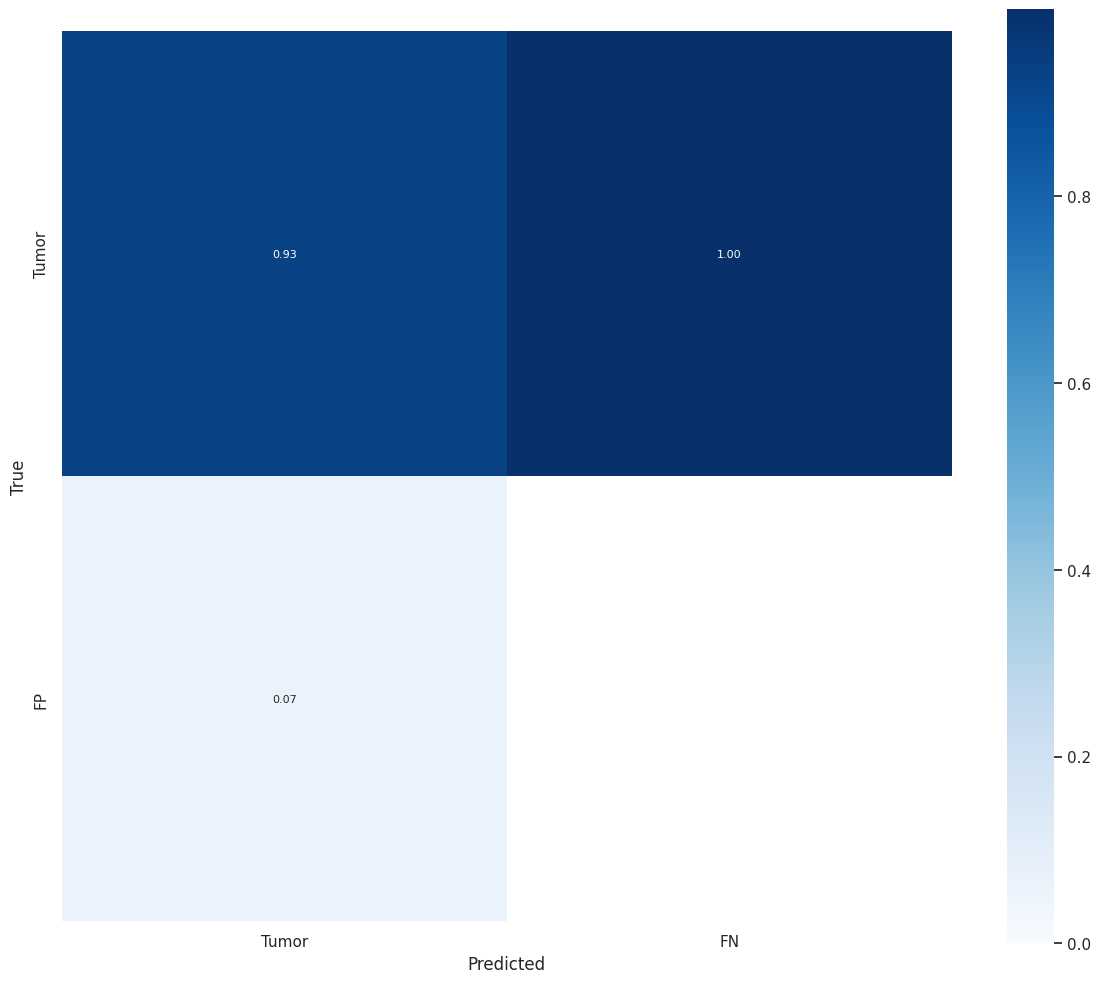

In [ ]:

import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join("/content", "confusion_matrix.png"), class_names=ds.classes)

In [ ]:
import random
import supervision as sv

random.seed(10)

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

In [ ]:
detections_list = []
prediction_list = []
for key in keys:
    # Para anotações
    annotation_detections = ds.annotations[key]
    for detection in annotation_detections:
        detections_list.append(detection[0])

    # Para previsões
    prediction_detections = predictions[key]
    for prediction in prediction_detections:
        prediction_list.append(prediction[0])

In [ ]:
import numpy as np


def iou(box1, box2):
    # Verifica se as bounding boxes são válidas.
    if box1[2] is None or box2[2] is None:
        return 0.0

    # Calcula as interseções das bounding boxes.
    inter_top = np.maximum(box1[0], box2[0])
    inter_bottom = np.minimum(box1[2], box2[2])
    inter_left = np.maximum(box1[1], box2[1])
    inter_right = np.minimum(box1[3], box2[3])
    inter_area = (inter_right - inter_left) * (inter_bottom - inter_top)

    # Calcula as áreas das bounding boxes.
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calcula o IoU.
    iou = inter_area / (box1_area + box2_area - inter_area)

    return iou

for i in range(len(detections_list)):
  iou_score = iou(detections_list[i], prediction_list[i])

  # Imprime o IoU.
  print(iou_score)

0.8873508
0.8898279
0.91539186
0.91630524
0.8592779


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [56]:
!zip -r /content/YoloNas-M.zip /content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch

from google.colab import files
files.download("/content/YoloNas-M.zip")

  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/ (stored 0%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/console_Feb24_00_12_16.txt (deflated 94%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/events.out.tfevents.1708733536.d87d79c68158.876.6 (deflated 75%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/events.out.tfevents.1708752545.d87d79c68158.876.7 (deflated 43%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/testing.txt (deflated 41%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/average_model.pth (deflated 8%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/logs_Feb24_00_12_16.txt (deflated 85%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/ckpt_best.pth (deflated 8%)
  adding: content/checkpoints/csilab-braintumor-detection/YoloNas-M-32Batch/ckpt_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


In [55]:
from google.colab import files
files.download("/content/YoloNas-L.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
from google.colab import drive
drive.mount('/content/drive')


In [59]:
%cp -av "/content/YoloNas-M.zip" "/content/drive/MyDrive/YoloNasBrainTumor"

'/content/YoloNas-M.zip' -> '/content/drive/MyDrive/YoloNasBrainTumor/YoloNas-M.zip'
